In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
import numpy
import pandas as pd
import ast
from datetime import datetime
from collections import Counter
import torch
from transformers import AutoTokenizer, AutoModel, BertModel
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import re               # Obtain expressions
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions
import numpy as np
#Plot helpers
import matplotlib
import matplotlib.pyplot as plt
#Enable matplotlib to be interactive (zoom etc)
import ast

#new ones_collected by passing through the emobert
# df = pd.read_csv(r'/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/embeddings.csv')
# df = pd.read_csv(r'/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_emb_emobert_new_vocab.csv')
# df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_emb_goemotions_new_vocab.csv")
# df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_emo_simple_new_vocab.csv")
# df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_emb_emobert_new_vocab_refined.csv")
df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_emb_goemotions_new_vocab_refined.csv")
emos_in_a = ['sadness' ,'joy_ecstasy']
df = df[df.fourteen_label.isin(emos_in_a)]
df['embedding'] = [ast.literal_eval(i) for i in df['embedding'].values.tolist()]





# print(df.head())
# print(df.columns)
df = df.dropna()

In [ ]:
negations = ['never','not', 'no', 'didn', "didn't", 'didnt', 'didn t','doesn t', 'doesnt', "doesn't", "won't", 'won t', 'wont', "isn't","isnt","isn t", "aren't", 'aren t', 'arent', 'don t', "don't", 'dont',"haven't","haven t","havent",'weren t', "weren't", 'werent', "wasn't", 'wasn t', 'wasnt', 'wouldn t', "wouldn't", 'wouldnt', "can't", 'can t', 'couldn t',"couldn't", 'cant', 'cannot', 'couldnt', 'shouldnt', "shouldn't", 'shouldn t', 'neither', 'impossible', 'didn', 'wasn', 'weren', 'aren', 'don', 'doesn', 'couldn', 'shouldn', 'wouldn', 'won','nothing']

intensity_modifiers=      ['absolutely:B_INCR:0.9', 'almost:B_DECR:0.2', 'always:B_INCR:0.9', 'amazingly:B_INCR:0.8', 'awfully:B_INCR:0.8',
      'completely:B_INCR:0.9', 'considerable:B_INCR:0.6', 'considerably:B_INCR:0.6', 'decidedly:B_INCR:0.6', 'deeply:B_INCR:0.9',
      'effing:B_INCR:0.7', 'enormous:B_INCR:0.8', 'enormously:B_INCR:0.8', 'entirely:B_INCR:0.9', 'especially:B_INCR:0.8', 'exceptional:B_INCR:0.8',
      'exceptionally:B_INCR:0.8', 'extreme:B_INCR:0.9', 'extremely:B_INCR:0.9', 'fabulously:B_INCR:0.8', 'flippin:B_INCR:0.6', 'flipping:B_INCR:0.6',
      'frackin:B_INCR:0.6', 'fracking:B_INCR:0.6', 'frickin:B_INCR:0.7', 'fricking:B_INCR:0.7', 'friggin:B_INCR:0.7', 'frigging:B_INCR:0.7', 'fully:B_INCR:0.9',
      'greatly:B_INCR:0.8', 'hella:B_INCR:0.8','bloody:B_INCR:0.8', 'highly:B_INCR:0.9', 'hugely:B_INCR:0.9', 'incredible:B_INCR:0.9', 'incredibly:B_INCR:0.9', 'intensely:B_INCR:0.9',
      'just enough:B_DECR:0.4', 'kind of:B_DECR:0.3', 'kinda:B_DECR:0.3', 'kindof:B_DECR:0.3', 'kind-of:B_DECR:0.3', 'less:B_DECR:0.3', 'little:B_DECR:0.3', 'major:B_INCR:0.6',
      'majorly:B_INCR:0.6', 'marginal:B_DECR:0.3', 'marginally:B_DECR:0.3', 'more:B_INCR:0.6', 'most:B_INCR:0.8', 'not much:B_DECR:0.2', 'occasional:B_DECR:0.6',
      'occasionally:B_DECR:0.6', 'particularly:B_INCR:0.7', 'partly:B_DECR:0.3','partially:B_DECR:0.5', 'purely:B_INCR:0.9', 'quite:B_INCR:0.6', 'really:B_INCR:0.8', 'remarkably:B_INCR:0.9',
      'slight:B_DECR:0.3', 'slightly:B_DECR:0.6','barely:B_DECR:0.7', 'so:B_INCR:0.8', 'somewhat:B_DECR:0.4', 'soo:B_INCR:0.9', 'sort of:B_DECR:0.4', 'sorta:B_DECR:0.4', 'sortof:B_DECR:0.4',
      'sort-of:B_DECR:0.4', 'substantially:B_INCR:0.7', 'super:B_INCR:0.8', 'thoroughly:B_INCR:0.8', 'total:B_INCR:0.8', 'totally:B_INCR:0.9', 'tremendous:B_INCR:0.8',
      'tremendously:B_INCR:0.8', 'truly:B_INCR:0.9', 'unbelievably:B_INCR:0.9', 'unusually:B_INCR:0.7', 'utter:B_INCR:0.8', 'utterly:B_INCR:0.8', 'very:B_INCR:0.8',
      'not very:B_DECR:0.7']





In [ ]:
for each_in in intensity_modifiers:
  if('B_DECR' in each_in):
    print(each_in)

In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    # print('ime',input_mask_expanded)
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    # print('se',sum_embeddings)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [ ]:

def map_opposite_emotions(emo_dict):
  opposite_emotions = {'anticipation': 'surprise',
                       'anger': 'joy',
                       'fear': 'trust',
                       'sadness': 'joy',
                       'trust': 'fear',
                       'joy': 'sadness',
                       'surprise': 'anticipation',
                       'disgust': 'joy',
                        'senerity':'distraction',
                        'joy_ecstasy':'sadness',
                        'sad':'joy',
                        'admire':'disgust',
                        'acceptance':'disgust',
                        'amazement_surprise':'anticipation',
                        'distraction':'senerity',
                        'boredom':'interest_vigilance',
                        'disgust_loathing':'joy',
                        'interest_vigilance':'boredom'
                       }
  opposed_dict = {}

  for each_key in emo_dict.keys():
    opposite_emo = opposite_emotions[each_key]
    if(opposite_emo in opposed_dict):
      opposed_dict[opposite_emo] = opposed_dict[opposite_emo]+emo_dict[each_key]
    else:
      opposed_dict[opposite_emo] = emo_dict[each_key]

  print(opposed_dict)

  return opposed_dict


# map_opposite_emotions({'anger': 0.353, 'disgust': 0.688,'anticipation':0.009})



In [ ]:

def visualize_embs(labels,embs,words):
    #fourteen 2 colors
    label_color_dict = {'input':'black',
                        'anticipation':'green','anger':'red','disgust':'red',
                        'fear':'red','sadness':'red','sad':'red','joy':'green','surprise':'green',
                        'trust':'green','senerity':'green',
                        'joy_ecstasy':'green',
                        'admire':'green',
                        'acceptance':'green',
                        'amazement_surprise':'green',
                        'distraction':'red',
                        'boredom':'red',
                        'disgust_loathing':'red',
                        'interest_vigilance':'green',
                        'positive':'black',
                        'negative':'blue'}

    # #vocabulary_visualization_8_colors
    # label_color_dict = {'anticipation':'green','anger':'red','disgust':'orange',
    #                     'fear':'brown','sadness':'black','joy':'yellow','surprise':'purple',
    #                     'trust':'gray'}

    # #vocabulary_visualization_2_colors
    # label_color_dict = {'anticipation':'green','anger':'red','disgust':'red',
    #                     'fear':'red','sadness':'red','joy':'green','surprise':'green',
    #                     'trust':'green'}
    X = embs
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # print(len(result))
    # print(len(words))
    # print(len(labels))
    # print(len(embs))
    filtered_words = []
    filtered_emb = []
    filtered_label = []
    for i,j in enumerate(result):
        if(j[0] < 1 and labels[i] in ['positive','joy','anticipation','distraction','trust','surprise','joy_ecstasy','admire','acceptance','interest_vigilance','amazement_surprise','input']):
            filtered_emb.append(j)
            filtered_label.append(labels[i])

            filtered_words.append(words[i])

        if (j[0] > -1 and labels[i] in ['negative','sadness','disgust','anger','fear','disgust_loathing','boredom','input']):
            filtered_emb.append(j)
            filtered_label.append(labels[i])
            filtered_words.append(words[i])
    result = np.array([x for x in filtered_emb])
    labels = filtered_label
    words = filtered_words

    cvec = [label_color_dict[label] for label in labels]
    # print('filtered words')
    # print(filtered_words)
    # print('filtered labels')
    # print(filtered_label)
    # fig, ax = plt.subplots()
    # ax.plot(result[:, 0], result[:, 1], 'o')
    # ax.set_title('Tweets')
    # plt.show()



    # Create the scatter plot
    plt.figure(figsize=(8,8))
    plt.scatter(result[:,0], result[:,1],c=cvec, edgecolor='', alpha=0.5)

    # selected_names = ['joy']
    # names = ['sadness','joy','surprise','trust','anticipation','anger','disgust','fear']
    # some_labels = []
    # for ll in ['joy','anticipation','distraction','trust','surprise','joy_ecstasy','admire','acceptance','interest_vigilance','amazement_surprise','sadness','disgust','anger','fear','disgust_loathing','boredom']:
    #   some_labels.extend([i for i in labels if i==ll])
    # names = labels
    # random.shuffle(words)
    names = words
    selected_names = ['sentence']
    # selected_names = words
    # names = words
    # Add the labels
    # for name in names:
    # #
    # #     # Get the index of the name
    #     i = names.index(name)
    # #
    #     # Add the text label
    #     labelpad = 0.01   # Adjust this based on your dataset
    #     plt.text(result[i,0]+labelpad, result[i,1]+labelpad, name, fontsize=8)
    #     # plt.text(result[i,0]+labelpad, result[i,1]+labelpad, labels[i], fontsize=8)

    #     # Mark the labeled observations with a star marker
    #     if(name in selected_names):
    #       plt.scatter(result[i,0], result[i,1],
    #                   c=cvec[i], vmin=min(cvec), vmax=max(cvec),
    #                   edgecolor='', marker='*', s=100)



    # Add the labels vocabulary
    # names = words
    # selected_names = names

    # for i in range(0,len(names),50):
    # #
    # #     # Get the index of the name
    #     name = names[i]
    # #
    #     # Add the text label
    #     labelpad = 0.01   # Adjust this based on your dataset
    #     # plt.text(result[i,0]+labelpad, result[i,1]+labelpad, name, fontsize=8)
    #     plt.text(result[i,0]+labelpad, result[i,1]+labelpad, labels[i], fontsize=8)

    #     # Mark the labeled observations with a star marker
    #     if(name in selected_names):
    #       plt.scatter(result[i,0], result[i,1],
    #                   c=cvec[i], vmin=min(cvec), vmax=max(cvec),
    #                   edgecolor='', marker='*', s=100)

    # Add the axis labels
    plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
    plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
    plt.title('Embedding Space')
    # Done
    plt.show()

emo 1341
   Unnamed: 0      token  ... eight_label fourteen_label
0           0       warn  ...         joy       senerity
1           1      pause  ...         joy       senerity
2           2        now  ...         joy       senerity
3           3  quietness  ...         joy       senerity
4           4   quietude  ...         joy       senerity

[5 rows x 5 columns]
lmn 720
   Unnamed: 0         token  ... eight_label fourteen_label
0           1       absolve  ...   litigious      litigious
1           3        acquit  ...   litigious      litigious
2           5  acquittance   ...   litigious      litigious
3           7       adjudge  ...   litigious      litigious
4           9  adjudicatory  ...   litigious      litigious

[5 rows x 5 columns]
2061


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


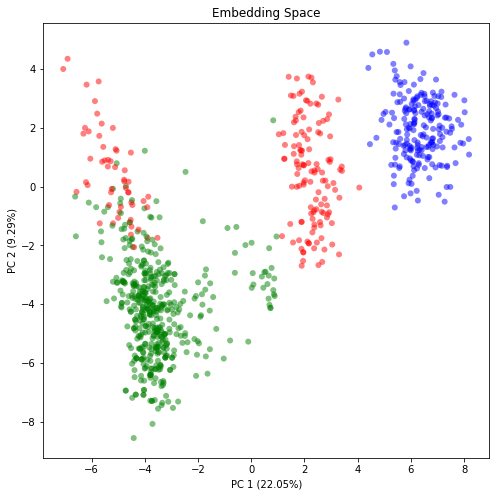

In [ ]:
#plot the vocabulary
import ast
import random
# vocab_df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_emb_emobert_new_vocab_refined.csv")
vocab_df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/vocabs/mean_pooling_emb_goemotions_new_vocab.csv")
print('emo',len(vocab_df))
print(vocab_df.head())
lnm_df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/vocabs/lnm_vocab_even.csv")
print('lmn',len(lnm_df))
print(lnm_df.head())
# vocab_df = pd.DataFrame()
# df =  pd.concat([vocab_df, lnm_df])
# print(len(df))
# vocab_df = df
words = vocab_df['token'].tolist()
embeddings = [ast.literal_eval(i) for i in vocab_df['embedding'].tolist()]
eight_label = vocab_df['fourteen_label'].tolist()

visualize_embs(eight_label,embeddings,words)

In [ ]:
import ast

def get_nearest_neighbours(embeding):
    t1 = datetime.now()
    tuples = []

    for i,row_e in df.iterrows():

        dis = cosine_similarity([row_e['embedding']], embeding)
        # print([row_e['tokens'],row_d['tokens'],dis])
        tuples.append([row_e['token'],row_e['fourteen_label'],dis,row_e['embedding']])

    s_tup = sorted(tuples, key=lambda x: x[2])#sort tuples based on the cosine distance
    neaarest_neighbs_words = []
    neaarest_neighbs_embs = []
    neaarest_neighbs_labels = []
    for i,m in enumerate(s_tup[::-1]):
        # print(m)
        if(i<50):#getting the nearest 100 neighbours
            neaarest_neighbs_words.append(m[0])
            neaarest_neighbs_embs.append(m[3])
            neaarest_neighbs_labels.append(m[1])
    n_score_dict = calculate_scores(neaarest_neighbs_words,neaarest_neighbs_labels)
    # print(numpy.shape(numpy.array(embeding[0])))
    # print(numpy.shape(neaarest_neighbs_embs[0]))
    # neaarest_neighbs_words.append('sentence')
    # neaarest_neighbs_embs.append(numpy.array(embeding[0]))
    # neaarest_neighbs_labels.append('input')
    t2 = datetime.now()
    diff = t2-t1
    print('time',diff)
    print(Counter(neaarest_neighbs_labels))
    # print(neaarest_neighbs_words)
    # print(neaarest_neighbs_labels)
    # for neighbour,label in zip(neaarest_neighbs_words,neaarest_neighbs_labels):
    #   print(neighbour,label)
    # print(neaarest_neighbs_embs)

    #visualize the neighbours in 2d space
    # visualize_embs(neaarest_neighbs_labels,neaarest_neighbs_embs,neaarest_neighbs_words)
    return [n_score_dict,{'words':neaarest_neighbs_words,'embs':neaarest_neighbs_embs,'labels':neaarest_neighbs_labels}]

def calculate_scores(neaarest_neighbs_words,neaarest_neighbs_labels):
  score_dict = {
              'anticipation':0,
              'anger':0,
              'fear':0,
              'sadness':0,
              'trust':0,
              'senerity':0,
              'joy_ecstasy':0,
              'joy':0,
              'sad':0,
              'admire':0,
              'acceptance':0,
              'amazement_surprise':0,
              'surprise':0,
              'distraction':0,
              'boredom':0,
              'disgust_loathing':0,
              'disgust':0,
              'interest_vigilance':0}

  for i in range(0,len(neaarest_neighbs_words)):
    score = 50-i
    # print(score,neaarest_neighbs_words[i],neaarest_neighbs_labels[i])
    score_dict[neaarest_neighbs_labels[i]]=score_dict[neaarest_neighbs_labels[i]]+score

  score_max = (len(neaarest_neighbs_words)*(len(neaarest_neighbs_words)-1))/2
  normalized_score_dict = score_dict.copy()
  for k in score_dict.keys():
    if score_dict[k] ==0:
      del normalized_score_dict[k]
    else:
      normalized_score_dict[k] = round((score_dict[k]/score_max),3)

  # print(score_dict)
  print(normalized_score_dict)

  return normalized_score_dict


# def get_nn_from_vocab(embedding):
#   t1 = datetime.now()
#   tuples = []
#   df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/mean_pooling_embeddings_emo_bert.csv")
#   # print(df.head())
#   df = df.dropna()
#   term_vec = embedding
#   for j,row_d in df.iterrows():
#       # print(row_d)
#       if(('[PAD]' in row_d['token']) or ('#' in row_d['token']) or ('unused' in row_d['token']) or (len(row_d['token'])==1) or (row_d['token'].isnumeric())): continue
#       dis = cosine_similarity(term_vec, [ast.literal_eval(row_d['embedding'])])
#       # print([row_e['tokens'],row_d['tokens'],dis])
#       tuples.append(['input_term',row_d['token'],dis])
#   print('ok')
#   s_tup = sorted(tuples, key=lambda x: x[2])
#   neaarest_neighbs = []
#   for i,m in enumerate(s_tup[::-1]):
#       # print(m)
#       if(i<30):
#           neaarest_neighbs.append(m[1])

#   t2 = datetime.now()
#   diff = t2-t1
#   print('time',diff)
#   print(neaarest_neighbs)
# sentence = "hias nasb adfas jsa"
# window_size = 2
# sentence_tokens = sentence.split(' ')
# # print(sentence_tokens)
# sentence_pieces = [sentence]
# for i in range(0,len(sentence_tokens)+1-window_size):
#   sliding_piece = ' '.join(sentence_tokens[i:i+window_size])
#   # print(sliding_piece)
#   sentence_pieces.append(sliding_piece)
# import ast
# # print(sentence_pieces)
# sentence_emb = get_mean_pooling_emb(sentence_pieces)
# print(sentence_emb[0])
# get_nearest_neighbours([sentence_emb[0]])

In [ ]:

def ft_to_et(emo_dict):

    eight_dict = {'sadness': 0, 'anger': 0, 'joy': 0, 'anticipation': 0, 'fear': 0, 'surprise': 0, 'disgust': 0,
                  'trust': 0}

    if ('anticipation' in emo_dict.keys()):
        eight_dict['anticipation'] += emo_dict['anticipation']
    if ('amazement_surprise' in emo_dict.keys()):
        eight_dict['surprise'] += emo_dict['amazement_surprise']
    if ('distraction' in emo_dict.keys()):
        eight_dict['surprise'] += emo_dict['distraction']
    if ('fear' in emo_dict.keys()):
        eight_dict['fear'] += emo_dict['fear']
    if ('trust' in emo_dict.keys()):
        eight_dict['trust'] += emo_dict['trust']
    if ('interest_vigilance' in emo_dict.keys()):
        eight_dict['anticipation'] += emo_dict['interest_vigilance']
    if ('anger' in emo_dict.keys()):
        eight_dict['anger'] += emo_dict['anger']
    if ('disgust_loathing' in emo_dict.keys()):
        eight_dict['disgust'] += emo_dict['disgust_loathing']
    if ('senerity' in emo_dict.keys()):
        eight_dict['joy'] += emo_dict['senerity']
    if ('boredom' in emo_dict.keys()):
        eight_dict['disgust'] += emo_dict['boredom']
    if ('acceptance' in emo_dict.keys()):
        eight_dict['trust'] += emo_dict['acceptance']
    if ('joy_ecstasy' in emo_dict.keys()):
        eight_dict['joy'] += emo_dict['joy_ecstasy']
    if ('admire' in emo_dict.keys()):
        eight_dict['trust'] += emo_dict['admire']
    if ('sadness' in emo_dict.keys()):
        eight_dict['sadness'] += emo_dict['sadness']

    # print(eight_dict)
    return eight_dict

In [ ]:
!pip install colour
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.core.display import display, HTML
from colour import Color
from matplotlib.colors import LinearSegmentedColormap






def make_Ramp( ramp_colors ):
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    return color_ramp



def eight_col(emo_dict):



  emo_dict = {k: v for k, v in sorted(emo_dict.items(), key=lambda item: item[1])}
  color_lists = []
  highest_emo = list(emo_dict)[-1]
  if(highest_emo in ['anger']):
    custom_ramp = make_Ramp(['#FFFFFF','#990000' ])
  elif(highest_emo in ['disgust']):
    custom_ramp = make_Ramp(['#FFFFFF','#FC0808' ])
  elif(highest_emo in ['fear']):
    custom_ramp = make_Ramp(['#FFFFFF','#ff5c33' ])
  elif(highest_emo in ['sadness']):
    custom_ramp = make_Ramp(['#FFFFFF','#FEAD39' ])
  elif(highest_emo in ['surprise']):
    custom_ramp = make_Ramp(['#FFFFFF','#b3ff99' ])
  elif(highest_emo in ['anticipation']):
    custom_ramp = make_Ramp(['#FFFFFF','#79ff4d' ])
  elif(highest_emo in ['trust']):
    custom_ramp = make_Ramp(['#FFFFFF','#33cc00' ])
  elif(highest_emo in ['joy']):
    custom_ramp = make_Ramp(['#FFFFFF','#1a6600' ])

  mymap =custom_ramp
  return mymap


def pos_neg_col(emo_dict):
  emo_dict = {k: v for k, v in sorted(emo_dict.items(), key=lambda item: item[1])}
  color_lists = []
  highest_emo = list(emo_dict)[-1]
  if(highest_emo in ['sadness','anger','disgust','fear']):

    color_lists.append(plt.cm.Reds(np.linspace(0., emo_dict[highest_emo], 128)))
  elif(highest_emo in ['joy','trust','anticipation','surprise']):
    color_lists.append(plt.cm.Greens(np.linspace(0., emo_dict[highest_emo], 128)))

  colors = np.vstack(tuple(np.array(color_lists)))
  mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
  return mymap

# emo_dict = {'acceptance': 0.037,'anger': 0.019,'boredom': 0.331,'disgust_loathing': 0.059,'fear': 0.01,'sadness': 0.585}
# emo_dict_to_c_maps(emo_dict)

def colorize(sentences, color_arrays, emo_dicts):
    # colors1 = plt.cm.Blues(np.linspace(0., 0.585, 128))
    # # mymap = colors1
    # colors2 = plt.cm.Reds(np.linspace(0, 0.331, 128))
    # colors = np.vstack((colors1, colors2))
    # colors = tuple(np.array(emo_dict_to_c_maps(emo_dict)))
    f_color_string = ''
    for words,color_array,emo_dict in zip(sentences,color_arrays,emo_dicts):
      mymap = pos_neg_col(emo_dict)
      # mymap = eight_col(emo_dict)
      template = '<span class="barcode"; style="color: black; background-color: {};display: inline-block;">{}</span>'
      colored_string = ''
      for word, color in zip(words, color_array):
          color = matplotlib.colors.rgb2hex(mymap(color)[:3])
          # print(color)
          colored_string += template.format(color, '&nbsp' + word + '&nbsp')
      f_color_string+=colored_string
    return f_color_string

# x = = 'The quick brown fox jumps over the lazy dog'.split()

def plot_paragraph(sentences,scores,emo_dict_list):
  color_arrays = []
  for each_yl in scores:
    color_array = np.array([i[0] for i in each_yl])
    color_arrays.append(color_array)
  s = colorize(sentences, color_arrays, emo_dict_list)
  # s = s[:20]+'</br>'+s[20:]
  # print(HTML(s))
  print(s)
  ss = """<div style="width: 500px;">"""+s+"""</div>"""
  print(ss)
  print(HTML(ss))

  display(HTML(ss))

  # or simply save in an html file and open in browser
  # with open('colorize.html', 'w') as f:
  #     f.write(s)

sentences =  [['I can', 'can kill', 'kill him', 'him and', 'and iam', 'iam so', 'so angry'],['Srilanka', 'is', 'a', 'beautiful', 'country', 'that', 'is', 'ruined', 'by', 'politicians'],['This is', 'is good.', 'good. And', 'And it', 'it is', 'is anticipated', 'anticipated totally.', 'totally. It', 'It helped', 'helped us', 'us to', 'to trust', 'trust him']]
scores =  [[[0.3744099221595089], [0.7002682285652779], [0.7608698932553926], [0.55863437774331], [0.5088178771027723], [0.4981902889500965], [0.9732918850323876]],[[0.36019073229576537], [0.3007115641872409], [0.30299748669879484], [0.39827378285158865], [0.26182668146560384], [0.303684031723546], [0.3007115641872409], [0.8428669352516664], [0.2971656227406666], [0.27657020690446865]],[[0.5399753427293827], [0.9099033747687806], [0.8461436613241728], [0.5003118554955207], [0.509717136736035], [0.6934702264520791], [0.7483976213376097], [0.7169592868690018], [0.7796496839475942], [0.6836142053451734], [0.44178627932054915], [0.6957015923763581], [0.8189624181575017]]]
emo_dict_list = [{'anger': 0.65, 'boredom': 0.322, 'disgust_loathing': 0.069},{'acceptance': 0.037,'anger': 0.019,'joy': 0.331,'disgust_loathing': 0.059,'fear': 0.01,'sadness': 0.585},{'anticipation': 0.013, 'anger': 0.007, 'trust': 0.197, 'senerity': 0.034, 'joy': 0.547, 'admire': 0.006, 'acceptance': 0.226, 'interest_vigilance': 0.011}]

plot_paragraph(sentences,scores,emo_dict_list)

<span class="barcode"; style="color: black; background-color: #fcbea5;display: inline-block;">&nbspI can&nbsp</span><span class="barcode"; style="color: black; background-color: #fb7858;display: inline-block;">&nbspcan kill&nbsp</span><span class="barcode"; style="color: black; background-color: #fb6c4c;display: inline-block;">&nbspkill him&nbsp</span><span class="barcode"; style="color: black; background-color: #fc9576;display: inline-block;">&nbsphim and&nbsp</span><span class="barcode"; style="color: black; background-color: #fca082;display: inline-block;">&nbspand iam&nbsp</span><span class="barcode"; style="color: black; background-color: #fca386;display: inline-block;">&nbspiam so&nbsp</span><span class="barcode"; style="color: black; background-color: #ec382b;display: inline-block;">&nbspso angry&nbsp</span><span class="barcode"; style="color: black; background-color: #fdc7b0;display: inline-block;">&nbspSrilanka&nbsp</span><span class="barcode"; style="color: black; background-

In [ ]:
neighbour_dict = {'words': ['hated', 'loathing', 'hating', 'despised', 'disdain', 'disgust', 'resented', 'resented', 'spoiled', 'bitterness', 'bitterness', 'racist', 'resentment', 'selfish', 'condemning', 'hate', 'disliked', 'hates', 'abusive', 'complaining', 'hatred', 'criticizing', 'oppressive', 'harshly', 'bitterly', 'unfair', 'sneered', 'dissatisfaction', 'disapproval', 'ugly', 'criticize', 'insults', 'cursing', 'resent', 'offended', 'ignoring', 'annoying', 'vengefulness', 'murderous', 'cruelty', 'apologetic', 'whore', 'bitter', 'criticisms', 'greasy', 'ignored', 'frustration', 'annoyance', 'annoyance', 'cynical'], 'embs': [[0.727336585521698, 0.9809212684631348, -0.6603742241859436, -0.6547248959541321, -0.380001038312912, 0.7205812335014343, -0.6406331658363342, 0.6083243489265442, 0.5270848870277405, -0.2990257441997528, 0.36871257424354553, -0.17642538249492645, -0.6110778450965881, -0.0482429675757885, 0.11419817805290222, -0.1958438903093338, 0.01768537424504757, 0.5671407580375671, -0.49720585346221924, 0.07932686060667038, 0.2692790925502777, 0.33713826537132263, -0.21014542877674103, 0.006040106061846018, -0.5529407262802124, -0.05742326006293297, 0.2807808816432953, -0.1582266241312027, 0.8607909083366394, -0.6104126572608948, 1.169913411140442, -0.8651193976402283, 0.8739892840385437, 0.3063642680644989, -0.4056166708469391, -0.6889715790748596, -1.0191556215286255, 0.15818212926387787, 0.14008468389511108, -0.6413028240203857, -1.4243448972702026, 0.4508931636810303, -0.2731565535068512, 0.6842800974845886, -0.2655913531780243, 0.2635122835636139, 0.21151922643184662, -0.05519509315490723, 0.7216227650642395, -0.8004873394966125, 0.3990582525730133, 0.9495475888252258, 0.3794519603252411, -0.457230806350708, 0.4101637303829193, 0.6052636504173279, -0.5003644824028015, 0.09984388202428818, -0.25701406598091125, -0.5356071591377258, -0.043341029435396194, 0.8123013973236084, 0.6508253216743469, 0.12795951962471008, 0.521061360836029, 0.05849875137209892, -0.5070781111717224, -0.7337120175361633, -0.7625188827514648, 0.584966242313385, 0.17465786635875702, -0.039389755576848984, 0.32933202385902405, 0.8048437237739563, 0.3305765688419342, -0.5693019032478333, -0.6572343111038208, 0.5586764216423035, -0.04776729270815849, -0.46350744366645813, -0.37914204597473145, -0.6933942437171936, -0.8229255676269531, 0.4879293143749237, -0.17348241806030273, -0.4414617121219635, 0.8119533658027649, 1.1448243856430054, 0.17778009176254272, 0.7133457660675049, 0.3331364393234253, -0.3322480618953705, 1.5513253211975098, -0.7879425883293152, 0.7162078022956848, -0.38787591457366943, 0.9114381670951843, 0.2508091926574707, -0.2889988124370575, 0.22412556409835815, -1.4507743120193481, 0.4732673168182373, 0.8447864651679993, 0.04163678362965584, -0.8923346996307373, -0.49773263931274414, 0.16496850550174713, -0.021222153678536415, 0.1170417070388794, -0.12343091517686844, 0.0001324862241744995, -0.8428213000297546, 0.3788350522518158, 0.11097525805234909, -1.4546127319335938, -0.3549686372280121, 0.03083941340446472, -0.7085599899291992, 0.05273035541176796, 0.19450442492961884, 0.6850255131721497, -0.5378959774971008, -0.24788706004619598, 0.8660961985588074, -0.3785715103149414, -1.167515754699707, 0.6872428059577942, 0.12543083727359772, 0.8002399802207947, 0.22827063500881195, 0.05966022610664368, -0.6067259907722473, -0.07093507796525955, 0.20495961606502533, 0.14741060137748718, -0.0723675861954689, 0.21869690716266632, -0.0030651986598968506, 0.6353557705879211, 0.47821536660194397, 0.40919435024261475, -0.7153599262237549, 0.15951575338840485, 0.3495428264141083, -0.1473279744386673, 1.0433989763259888, 1.6089997291564941, 0.30361902713775635, 0.3251798450946808, -0.22754275798797607, 0.17529745399951935, -0.17628158628940582, -0.6795472502708435, -0.2914697229862213, 0.10510612279176712, 0.6109756827354431, 0.3796186149120331, -0.6761654019355774, -0.5231183171272278, 0.10714473575353622, 0.5413115620613098, -0.5381907820701599, -0.5554054379463196, 0.54183429479599, 0.7121502757072449, 0.07190272212028503, 0.7189197540283203, -0.31097885966300964, -0.3529231548309326, -0.2411457747220993, -0.4582984447479248, 0.06600867956876755, 0.5343098044395447, -0.05070143938064575, -1.0551971197128296, -0.0058882287703454494, 0.9208319783210754, -0.38419294357299805, 0.19015546143054962, 0.7462863922119141, -0.3036442697048187, -0.4541666507720947, -0.1294717639684677, -0.07319953292608261, 0.20404618978500366, 0.7905591130256653, -0.1418129950761795, -0.651232898235321, 0.3805229961872101, 0.8467402458190918, -1.0027951002120972, 0.4428194463253021, 0.5342625975608826, 0.6781061291694641, 0.36219045519828796, -0.5610857009887695, -1.0488322973251343, -0.4174978733062744, 0.005293155554682016, -0.40894457697868347, -0.3984791040420532, -0.5958411693572998, 0.22925186157226562, 0.6414946913719177, -0.7971372604370117, -0.48463109135627747, -0.6837067008018494, -1.137925148010254, 0.2668520510196686, 0.26928630471229553, -0.026003757491707802, -0.2799876928329468, -0.6340380311012268, -0.66696697473526, 0.5989549160003662, -0.25811341404914856, -0.1356622874736786, 0.7159876823425293, -0.816058337688446, -0.4145487844944, 0.23755717277526855, 0.4027688503265381, -1.2383579015731812, -0.12862049043178558, -0.023889608681201935, 0.5070310831069946, 0.5991182923316956, 0.857079267501831, 0.11689981073141098, 0.3696816861629486, -0.031365301460027695, 0.4779914915561676, 0.23501378297805786, -0.5408175587654114, 0.39977598190307617, 0.03510313853621483, -0.7853228449821472, -0.16214795410633087, -0.48976707458496094, 0.5162158012390137, -0.367910772562027, 0.2987973988056183, 0.22964298725128174, -1.0752919912338257, -0.8574506640434265, 0.7048348784446716, -0.5035039782524109, 0.4058229625225067, -0.21598124504089355, 1.2531110048294067, -0.12090376019477844, -0.4853065013885498, -0.11505117267370224, 0.6386945843696594, 0.6873539090156555, -0.006699260324239731, -0.7333986163139343, 1.5492215156555176, -0.4485476016998291, 0.587380588054657, 0.6299977898597717, 0.3309275209903717, 0.49400004744529724, 0.5117027759552002, -0.6270617842674255, 0.23042206466197968, -0.9543347954750061, 0.363341361284256, -0.7049505114555359, 0.3141671419143677, -0.1888875812292099, -0.3036281168460846, 0.35071659088134766, 0.09364622086286545, -0.33638110756874084, 0.14282016456127167, 0.4224584996700287, 0.2687318027019501, -0.19237945973873138, -0.5505488514900208, -0.8677909970283508, 0.47265395522117615, -0.5762466788291931, -0.6534838080406189, 0.81730717420578, -0.054695263504981995, -0.35143375396728516, -0.3683339059352875, -0.09790003299713135, 0.5809683799743652, -0.4008190929889679, 1.154398798942566, 0.46324142813682556, 0.09417315572500229, 0.04837973788380623, -0.7295134663581848, 0.016923725605010986, -0.27053302526474, -0.2300453633069992, -0.30102312564849854, -0.0827232077717781, 0.0992606058716774, -0.6391837000846863, -0.8475527763366699, -0.3808523714542389, -0.37516042590141296, -1.346427321434021, -0.19773058593273163, 0.9407930374145508, 0.1838321089744568, -0.49008727073669434, -0.17391200363636017, 0.9075310826301575, -0.6337923407554626, 0.5409908294677734, -0.13311032950878143, -0.8566370010375977, -0.16505306959152222, -0.3576939105987549, -1.1131283044815063, 0.9555141925811768, 0.021285342052578926, -0.3447912633419037, -0.5637826323509216, -0.4899221658706665, -1.49728524684906, -0.16831158101558685, 0.18905533850193024, -1.1484194993972778, -0.005728570278733969, 0.3923972547054291, -0.5117368698120117, 0.49081411957740784, 0.896507978439331, -0.6780546307563782, -0.5382283329963684, 0.56535404920578, -0.9130414128303528, -0.9881978631019592, 0.8352289199829102, -0.9400405287742615, 0.07144717127084732, 0.6247044205665588, -0.5394054651260376, -0.21558888256549835, -0.21505816280841827, -0.18681840598583221, 0.10237893462181091, 0.28978025913238525, -0.6143216490745544, -1.2377703189849854, 1.028265118598938, 0.021522045135498047, -0.34277281165122986, 0.44270503520965576, -0.5780676007270813, -0.6586294174194336, 0.4412907063961029, -0.6164892911911011, -0.6610561013221741, 0.2563939392566681, -0.43618640303611755, -0.2844720780849457, -0.6704584956169128, -0.03876097872853279, -0.6383370757102966, -0.44292518496513367, -0.8491265177726746, -0.2999229431152344, 1.3731975555419922, -1.3443328142166138, 1.030312418937683, -0.2519221901893616, -0.1939728707075119, -0.8237736821174622, -1.0784746408462524, 0.25412148237228394, -0.25232210755348206, -0.22336840629577637, 0.3414994478225708, -0.9557721018791199, -0.05126771703362465, -0.21467043459415436, 0.21606004238128662, -0.7954752445220947, 0.7071772217750549, -0.22694407403469086, 0.4275868833065033, 0.027020491659641266, -0.03112431801855564, 0.05805592238903046, 0.6173692345619202, 0.16658487915992737, 0.14593400061130524, -0.4853692948818207, -0.5378566980361938, -0.09416893124580383, 0.37610042095184326, 0.7288284301757812, 0.23307682573795319, 1.4037727117538452, 0.7173070907592773, 1.0197850465774536, -0.4510996639728546, 1.3821502923965454, 0.20401793718338013, 0.2374698370695114, 0.20122481882572174, -0.016233226284384727, -0.4956803619861603, 0.37210941314697266, 0.1678200215101242, 1.1382253170013428, 0.5232254862785339, -0.2983750104904175, 0.22947247326374054, -0.6277679800987244, 0.7896327972412109, 0.49502527713775635, -0.8248646855354309, 0.566741406917572, -1.0327249765396118, -0.6882055401802063, -0.1884620636701584, -1.0502675771713257, 1.3582488298416138, 0.1486489176750183, 0.12820464372634888, -0.41918882727622986, 0.3348621129989624, -0.72283536195755, 0.16912110149860382, 1.5302385091781616, -0.32934436202049255, -0.16800881922245026, -0.6641290187835693, 0.2521737217903137, -0.5695129632949829, -0.6898107528686523, -0.9508125185966492, -0.5045759677886963, -0.8786243796348572, 0.7904688715934753, 0.2595917880535126, 0.26956379413604736, -0.7373595237731934, -0.6826009154319763, -0.45917367935180664, -0.5315544009208679, 0.4850497245788574, -0.3500182330608368, -0.5242609977722168, -0.564171552658081, 0.13668186962604523, -0.10866144299507141, 0.5845972299575806, 0.4282684624195099, -0.11003489047288895, 1.1152228116989136, 0.27647116780281067, 0.0859704315662384, -0.6181659698486328, 0.052106428891420364, 0.26089954376220703, -0.07780183106660843, 0.42799532413482666, -0.06810232251882553, 0.4571281373500824, -1.0179595947265625, 0.45782604813575745, -0.731797456741333, -0.20665402710437775, 0.5848938822746277, 0.4935489892959595, 0.12676577270030975, 0.7425764203071594, -0.7665700316429138, 0.12604598701000214, 0.46427711844444275, -0.8794846534729004, 0.28585925698280334, 0.31014928221702576, -0.3873535692691803, 0.8816154599189758, -0.09064475446939468, 0.109798364341259, 0.21162287890911102, 0.4502839148044586, -0.04154485464096069, 0.3001190423965454, -0.2463308423757553, 0.4235992431640625, -0.29826048016548157, 0.012805064208805561, -0.6090960502624512, -0.48971542716026306, 0.01790492981672287, 0.7384345531463623, 0.24098946154117584, 0.4590461254119873, 0.16995084285736084, 0.658465564250946, -0.537717878818512, -0.5453776121139526, 0.0018284618854522705, 0.04414896294474602, 1.1531165838241577, 0.5035796165466309, -0.6182345151901245, 0.592474639415741, 0.7379202246665955, -0.34603676199913025, -0.05475206300616264, 0.13972412049770355, 1.396016240119934, -0.08704712241888046, -0.33033129572868347, 1.5555448532104492, -0.6044088006019592, -0.6259526610374451, -0.769605815410614, 0.4525458812713623, 0.5203607082366943, -0.8502848148345947, 0.7170857787132263, -0.262160986661911, -0.046338457614183426, -0.13247369229793549, -0.35969921946525574, -0.2875466048717499, -1.0141664743423462, 0.26983746886253357, 0.5329419374465942, 0.8310278058052063, 0.51772540807724, -0.2608332931995392, 1.017979621887207, 0.42303621768951416, 1.0334240198135376, -0.27792787551879883, 0.9666300415992737, 0.900503396987915, 0.6869627833366394, -0.4856508672237396, -0.5079377889633179, 0.811322033405304, -0.5931828618049622, 0.38670215010643005, -0.4502548277378082, -0.4637789726257324, -0.985704243183136, 0.29502618312835693, 0.3222532570362091, -0.12132488936185837, -0.7401809096336365, 0.26822805404663086, 0.315000981092453, -0.7058756947517395, -0.5434989929199219, -0.30647003650665283, -0.45366501808166504, -0.11256855726242065, 0.02368941903114319, -1.0669935941696167, -1.0603293180465698, 0.5558592677116394, -0.20627836883068085, -0.5761024355888367, -0.1448720246553421, 0.5846675634384155, 0.5586144328117371, 0.17195598781108856, -0.10448639839887619, 0.1960933953523636, 0.8617367744445801, 0.0779464840888977, -0.6933832168579102, 0.9291019439697266, -0.23189549148082733, -0.3127095699310303, 0.29804977774620056, -0.6303533315658569, 0.36281874775886536, -0.08964959532022476, -0.15286962687969208, 0.29136407375335693, -0.5589740872383118, 0.0014168123016133904, -0.42943429946899414, 0.45374295115470886, -0.4985799789428711, -0.19706277549266815, 1.1468815803527832, -0.8990623950958252, 0.2905883491039276, 0.1114969477057457, -0.6680629253387451, 0.9704857468605042, 0.04435427859425545, -0.3252566158771515, -0.5306890606880188, 0.08779013901948929, 0.7531228065490723, 0.44535115361213684, 0.11616381257772446, -0.3121541738510132, 0.5776435732841492, -0.07735379785299301, 0.4155918061733246, 1.1608680486679077, 0.649880588054657, -0.19794778525829315, -0.08205682039260864, -0.005112901329994202, -0.016796132549643517, 0.0882880687713623, -0.1332094669342041, 0.1795763373374939, -0.19817252457141876, -0.3401695191860199, 0.6144084930419922, 0.34323713183403015, -0.19786183536052704, 0.46685901284217834, -0.015335887670516968, -0.5157749056816101, 0.2270277887582779, -0.6095246076583862, -0.14352069795131683, -1.0335241556167603, -0.9800884127616882, 0.1704784482717514, 0.20142237842082977, -0.26224276423454285, -1.5694278478622437, 0.3651144802570343, 0.3022729158401489, 0.3988494575023651, -1.2540693283081055, -0.32248547673225403, -0.09180604666471481, 0.10147708654403687, 0.6343080997467041, -0.34165969491004944, -0.18246503174304962, 0.15913966298103333, 0.16458384692668915, -0.08024904876947403, -0.3717339038848877, 0.08215158432722092, 0.1924751251935959, 0.9776235222816467, 0.6685967445373535, -0.3255307972431183, -0.6324219703674316, -0.925230085849762, 0.9707580208778381, -0.04930207133293152, 0.7420212626457214, 0.3694860637187958, -0.17161774635314941, 0.18134182691574097, 0.26197168231010437, 0.2767217457294464, 0.08366812020540237, -0.1649804562330246, 0.2435823231935501, -0.09974419325590134, 0.1885005682706833, -0.0017651095986366272, -0.6598794460296631, -0.6424668431282043, 0.2418278306722641, -0.6890113353729248, -0.39201590418815613, -0.2326771467924118, -0.22430141270160675, -0.3500487506389618, 0.028714627027511597, -0.15588261187076569, -0.3884998857975006, -0.8375771641731262, -0.546730101108551, 0.15959270298480988, 0.5906276106834412, -0.5716245770454407, -0.5483566522598267, -0.19989287853240967, 0.020202934741973877, 0.5761530995368958, -1.0568629503250122, 0.02045520208775997, -1.36328125, 0.16113634407520294, -0.16691835224628448, 0.2556309700012207, 0.4534245431423187, 0.07393554598093033, -0.8610029220581055, 0.6161314845085144, -0.6258354187011719, 0.41081318259239197, 0.20077843964099884, -0.18324220180511475, -0.6616896986961365, -0.3748057186603546, -0.9836285710334778, -0.5654330849647522, 0.6519293189048767, 0.9515318870544434, -0.29507407546043396, 0.7004554867744446, -0.3962939977645874, 0.19319097697734833, 0.19269438087940216, -0.23196129500865936, -0.034228190779685974, -0.23805910348892212, 0.11007487773895264, -0.9105445742607117, -0.7899531722068787, -0.7908571362495422, 0.1931711584329605, -0.3164447247982025, 0.5926827788352966, 0.0034826796036213636, 0.7215869426727295, 0.21124903857707977, 0.601182222366333, 0.30843350291252136, 0.177497997879982, 0.5441333651542664, 0.007709433790296316, -0.08577033132314682, 0.2606051564216614, 0.39945337176322937, 0.8019631505012512, 0.09336470812559128, -0.07390549033880234, -0.05001940205693245, -0.028836727142333984, 0.914056122303009, -0.2521154284477234, -0.31221744418144226, -0.6235306859016418, 0.38737067580223083, 0.3089284598827362, -0.2780517041683197, -0.1263142079114914, -0.8042414784431458, -0.8041843771934509, 0.14751635491847992, 0.21965380012989044, 0.1822415143251419, -0.7857120633125305, -1.2970865964889526, 0.033996906131505966, 0.31720438599586487, 0.36716654896736145, -0.13408900797367096, -0.01455655973404646, -0.6437230706214905, 0.039507534354925156, -1.1255682706832886, -0.5308987498283386, 0.6474809050559998, 0.5063340067863464, -0.45045268535614014], [1.0611984729766846, 0.8133680820465088, -0.7070351243019104, -0.979707658290863, 0.0029297620058059692, 0.4515269994735718, -0.4860064685344696, 0.44571253657341003, 0.6288791298866272, -0.3886902332305908, 0.26310065388679504, -0.2949465215206146, -0.6544691324234009, -0.056183792650699615, 0.3019174039363861, 0.004769541323184967, -0.10224389284849167, 0.2563907206058502, -0.6951347589492798, -0.24105647206306458, 0.21947698295116425, -0.10982641577720642, -0.08393347263336182, 0.24128217995166779, -0.51703941822052, -0.12364889681339264, 0.14194053411483765, -0.276563435792923, 0.9215377569198608, -0.2345922589302063, 1.4231959581375122, -0.41921693086624146, 0.6369493007659912, 0.3262059986591339, -0.15269216895103455, -0.31688058376312256, -1.105357050895691, -0.100862056016922, -0.021132275462150574, -0.5033262372016907, -1.088979959487915, 0.4903218746185303, -0.3367438316345215, 0.9483634829521179, -0.4882052540779114, -0.0918225347995758, 0.32708874344825745, -0.08098796755075455, 0.7177073359489441, -0.5778083205223083, 0.271783709526062, 0.6472557187080383, 0.14316615462303162, -0.3472224473953247, 0.00820925459265709, 0.670802116394043, -0.201332688331604, 0.15659573674201965, -0.06891915202140808, -0.4173778295516968, 0.069346584379673, 0.6691484451293945, 0.368039608001709, 0.15043699741363525, -0.1258014291524887, 0.520369827747345, -0.6902804374694824, -0.7316123843193054, -0.8569793105125427, 0.4936828911304474, -0.0986456647515297, -0.26878222823143005, 0.4859641194343567, 0.3858012557029724, -0.07275460660457611, -0.2908039391040802, -0.508269190788269, 0.7181416749954224, -0.5193929672241211, -0.4710436463356018, -0.34829139709472656, -0.6602522134780884, -0.808387815952301, 0.29766565561294556, 0.05497169494628906, -0.7449254393577576, 0.8692643046379089, 0.7934712171554565, 0.09723453223705292, 0.9796606302261353, 0.5729027390480042, -0.2537086009979248, 1.462689757347107, -0.26368170976638794, 1.0362077951431274, -0.5765411853790283, 0.8030231595039368, 0.6346673965454102, -0.3897348642349243, 0.2295367419719696, -1.1133086681365967, 0.8997820019721985, 0.6763683557510376, 0.29279226064682007, -0.8106335401535034, -0.19579163193702698, 0.34917569160461426, -0.03907344490289688, 0.35756534337997437, -0.11391396820545197, 0.37130826711654663, -0.6586300730705261, 0.04857904091477394, -0.03105270117521286, -1.1416341066360474, -0.787397027015686, 0.04626569151878357, -0.15208828449249268, 0.5132616758346558, -0.30580735206604004, 0.753459632396698, -0.5810961127281189, -0.3501877188682556, 0.7432394623756409, -0.2973344027996063, -0.9922093152999878, 0.2876873016357422, -0.13524731993675232, 0.5411089062690735, 0.3194926977157593, 0.24237509071826935, -0.035359255969524384, -0.012277975678443909, 0.11507552862167358, 0.009535908699035645, 0.28148457407951355, 0.10456500947475433, -0.14331060647964478, 0.49362972378730774, 0.23062589764595032, 0.20177125930786133, -1.0102382898330688, 0.24401995539665222, 0.43117427825927734, -0.08025048673152924, 0.5742242336273193, 1.037714958190918, 0.06729491800069809, 0.43541431427001953, -0.18523196876049042, 0.16017912328243256, -0.4478612542152405, -0.7929366827011108, -0.5176141858100891, 0.3809693455696106, 0.16618125140666962, 0.2761046588420868, -0.2672729790210724, -0.45280811190605164, 0.04704377427697182, 0.02653849869966507, -0.5605648159980774, -0.5432705879211426, 0.9241183996200562, 0.7274108529090881, -0.04935143515467644, 0.275962769985199, -0.4980340003967285, -0.06603517383337021, -0.46737247705459595, -0.32207199931144714, 0.12629438936710358, 0.527560830116272, 0.03214270621538162, -0.9212448000907898, -0.17098946869373322, 0.8352524638175964, 0.115672767162323, 0.218415766954422, 0.6027700304985046, -1.029976725578308, -0.4414691925048828, 0.2164973020553589, 0.4237024188041687, 0.40175068378448486, 0.572117805480957, -0.39821165800094604, -0.7838549613952637, 0.1723078489303589, 0.815957248210907, -1.0175269842147827, 0.10008649528026581, 0.2797357738018036, 0.3752360939979553, 0.34703418612480164, -0.7591198086738586, -0.637136697769165, -0.27027058601379395, -0.30414479970932007, -0.2844911813735962, -0.5785447955131531, -0.5769866108894348, 0.17534688115119934, 0.8701615929603577, -0.5713958740234375, -0.3401830196380615, -0.6214689612388611, -0.9985224604606628, -0.10140950232744217, 0.0507526621222496, -0.15019237995147705, -0.1417834609746933, -0.8546088337898254, -0.010356202721595764, 0.5188238620758057, -0.18802422285079956, 0.10335865616798401, 0.6010249257087708, -0.7252786159515381, -0.12863847613334656, 0.12660109996795654, 0.41237226128578186, -1.1482160091400146, -0.050057195127010345, -0.2593526840209961, 0.5749319791793823, 0.02542036771774292, 0.6874498128890991, 0.19097334146499634, 0.3509567379951477, 0.04696617275476456, 0.6703411936759949, 0.4519561231136322, -0.2715575098991394, 0.40580177307128906, -0.1217191070318222, -0.7147988677024841, 0.18998174369335175, -0.33603155612945557, 0.3612067997455597, -0.7103152275085449, 0.011017948389053345, 0.22993215918540955, -0.6503018736839294, -0.8732701539993286, 0.56642085313797, -0.5536025166511536, 0.7000352740287781, -0.4301624894142151, 1.0588394403457642, 0.062482111155986786, -0.6552799940109253, -0.08738794177770615, 0.4668514132499695, 0.20964117348194122, -0.019892320036888123, -0.7449227571487427, 1.0043028593063354, 0.02021673321723938, 0.4566618800163269, 0.5447426438331604, 0.11443951725959778, 0.7753170132637024, 0.36051884293556213, -0.517129123210907, 0.2906286418437958, -0.7860585451126099, 0.3099399507045746, -0.39965641498565674, 0.48836296796798706, -0.18928192555904388, 0.1748914122581482, 0.0368584468960762, 0.325867235660553, -0.5208295583724976, -0.23661726713180542, 0.6534388065338135, 0.09314974397420883, -0.22221314907073975, -0.14690935611724854, -0.7037772536277771, 0.2630295157432556, -0.4779784679412842, -0.5317250490188599, 0.6794672608375549, -0.22042272984981537, 0.019159793853759766, -0.04825187474489212, -0.28073850274086, 0.17659929394721985, 0.06603754311800003, 1.0818604230880737, 0.07199956476688385, 0.17526671290397644, -0.01672547310590744, -0.43094128370285034, 0.23688583076000214, -0.18400758504867554, 0.06520836055278778, -0.38407498598098755, -0.0793595165014267, -0.024824365973472595, -0.3363797962665558, -0.21060523390769958, -0.3245418965816498, -0.2001502364873886, -0.7618574500083923, -0.411395788192749, 0.6067605018615723, 0.28051793575286865, -0.2783108353614807, -0.01656287908554077, 0.6922079920768738, -0.7222432494163513, 0.03857293725013733, 0.06907616555690765, -0.9848009347915649, -0.14730167388916016, -0.27258098125457764, -1.2337675094604492, 1.0639089345932007, -0.4697321057319641, -0.011309608817100525, -0.6529225707054138, -0.3366241455078125, -0.8214757442474365, -0.30400753021240234, 0.2345554530620575, -1.4403009414672852, 0.12783099710941315, 0.34450089931488037, -0.31177088618278503, 0.3207153379917145, 0.6613725423812866, -0.7552093267440796, -0.4956772029399872, 0.15036627650260925, -1.130600929260254, -0.68218594789505, 0.2962896227836609, -0.6762396693229675, 0.34104692935943604, 0.8423481583595276, -0.13807304203510284, -0.025673210620880127, -0.252006471157074, -0.7318587303161621, -0.2059153914451599, 0.30627575516700745, -0.4263386130332947, -0.9203376770019531, 0.9006454944610596, 0.44989722967147827, -0.6225789785385132, 0.7569169998168945, -0.5646356344223022, -0.5432739853858948, 0.4438706636428833, -0.32101476192474365, -0.5148940682411194, 0.10508478432893753, 0.0716714859008789, 0.12542343139648438, -0.47295165061950684, -0.15108618140220642, -0.5153399705886841, -0.7139894366264343, -1.0993586778640747, -0.2901051938533783, 1.0940659046173096, -1.2475236654281616, 0.9511309266090393, -0.016739675775170326, -0.08002619445323944, -0.7825587391853333, -0.9129930138587952, 0.3559316396713257, -0.2324206829071045, -0.44379979372024536, 0.12482833862304688, -0.7204020023345947, -0.06366103887557983, -0.25600093603134155, 0.12015961855649948, -1.0782859325408936, 0.6255035996437073, -0.20139244198799133, 0.31981080770492554, -0.13786639273166656, -0.06463825702667236, -0.01583101600408554, 0.3026098608970642, 0.40365058183670044, -0.12572957575321198, -0.4169195890426636, -0.23597866296768188, -0.027378574013710022, 0.24973854422569275, 0.7803177833557129, 0.8545109033584595, 1.217169165611267, 0.5159831643104553, 1.2482270002365112, -0.528129518032074, 1.1812677383422852, 0.054388027638196945, 0.16931870579719543, 0.3788909614086151, -0.0025772228837013245, -0.3380301296710968, 0.452664852142334, -0.2743575870990753, 0.803900420665741, 0.558253288269043, -0.15320193767547607, 0.6037635803222656, -0.5083194971084595, 0.32905104756355286, 0.7841280102729797, -0.49449843168258667, 0.5165908932685852, -1.0784986019134521, -0.7929980754852295, -0.06843168288469315, -0.7651165723800659, 1.2124500274658203, 0.15724389255046844, 0.15319973230361938, -0.13839435577392578, 0.011556558310985565, -0.9078711271286011, 0.04583021253347397, 0.8371788263320923, -0.2519116699695587, -0.26937243342399597, -0.39266300201416016, 0.06095064803957939, -0.6488543748855591, -0.6116564869880676, -0.7160630226135254, -0.674330472946167, -0.8966772556304932, 0.7845420837402344, 0.32875871658325195, 0.272139310836792, -0.41504308581352234, -0.6911428570747375, -0.02323085069656372, -0.2885064482688904, -0.010391317307949066, 0.1349601298570633, -0.6009995937347412, -0.5714125633239746, 0.13756799697875977, -0.20925097167491913, 0.5469183921813965, 0.10274465382099152, -0.3822186589241028, 0.8186469078063965, 0.06251439452171326, 0.03199782967567444, -0.4612518548965454, -0.04479086399078369, 0.0851730927824974, -0.06816485524177551, 0.37394052743911743, 0.016509488224983215, 0.14324915409088135, -0.7487290501594543, 0.6100590229034424, -0.4406878352165222, -0.5087377429008484, 0.5329622626304626, 0.6683759689331055, 0.37914127111434937, 0.7324236631393433, -0.6566125750541687, 0.001157313585281372, 0.3646092414855957, -1.1988314390182495, 0.2855157256126404, 0.2775478661060333, -0.4468247890472412, 0.6455219388008118, -0.37832769751548767, -0.5868480205535889, -0.14914414286613464, 0.3618599772453308, 0.05908263474702835, 0.18094739317893982, -0.19543519616127014, 0.11170390248298645, -0.1808483600616455, -0.30989086627960205, -0.6119598150253296, -0.6532080173492432, 0.039461564272642136, 0.5917918086051941, 0.14438866078853607, 0.01412857323884964, 0.5163344144821167, 0.6569150686264038, -0.7616351246833801, -0.689433217048645, 0.07687026262283325, -0.25711700320243835, 0.8232021331787109, 0.850740373134613, -0.3074260354042053, 0.994247555732727, 0.389110267162323, -0.12372259795665741, -0.12126146256923676, 0.24415042996406555, 1.0342742204666138, 0.15207085013389587, -0.8723984956741333, 0.998902440071106, -0.40267515182495117, -0.858434796333313, -0.9953947067260742, 0.5204405784606934, 0.46755844354629517, -0.6507513523101807, 0.27682238817214966, -0.23327228426933289, -0.0247461199760437, -0.014046182855963707, -0.4031809866428375, -0.37590616941452026, -0.37444862723350525, -0.0859231948852539, 0.1820186972618103, 0.7730931043624878, 0.2650696039199829, 0.09792228788137436, 0.46181586384773254, 0.39100027084350586, 0.7776296734809875, 0.3407665491104126, 0.6720013618469238, 0.8113906979560852, 0.5726906061172485, -0.3599584698677063, -0.3247106671333313, 0.6839743256568909, -0.528530478477478, 0.6623502373695374, -0.3426457941532135, -0.31954848766326904, -0.6549286842346191, 0.367636501789093, 0.2905823588371277, 0.027034077793359756, -0.6030754446983337, 0.47266751527786255, 0.0764324963092804, -0.7981264591217041, -0.17459018528461456, -0.5742005109786987, -0.22756925225257874, -0.2507357895374298, -0.09215760231018066, -0.7446643114089966, -1.1411691904067993, 0.09698547422885895, -0.39036744832992554, 0.1953911930322647, -0.17724086344242096, 0.09616890549659729, 0.3471391797065735, 0.4146314561367035, 0.21758493781089783, 0.4273492693901062, 0.965916097164154, -0.04482858628034592, -0.3101809620857239, 0.8956034183502197, -0.13918563723564148, 0.024332154542207718, 0.1942945122718811, -0.40245917439460754, 0.6989114284515381, 0.027976948767900467, -0.3795379400253296, 0.2080368846654892, -0.7928224802017212, -0.47544971108436584, -0.19968809187412262, 0.21625138819217682, -0.33988437056541443, -0.20102530717849731, 0.9617174863815308, -0.7784676551818848, 0.07415807247161865, 0.012700796127319336, -0.6583325862884521, 0.44104593992233276, 0.414972186088562, -0.28932222723960876, -0.3671843111515045, 0.04411868005990982, 0.6426825523376465, 0.4608004093170166, 0.1484680324792862, -0.2700861990451813, 0.6000140309333801, -0.15675517916679382, 0.5836900472640991, 1.3532915115356445, 0.6749362349510193, -0.0400206595659256, -0.18182571232318878, -0.3491525650024414, -0.02026517502963543, 0.2883217930793762, -0.10173708200454712, -0.3217959403991699, -0.1680845320224762, -0.14703422784805298, 0.3651622235774994, 0.47082048654556274, -0.45260271430015564, 0.8429871201515198, 0.5391985177993774, -0.3822281062602997, -0.1774718165397644, -0.7792450785636902, -0.16901259124279022, -0.8419203758239746, -0.6414291262626648, 0.39213669300079346, 0.11833330988883972, -0.4080398976802826, -1.8183023929595947, 0.375675767660141, 0.2512456476688385, 0.2629827558994293, -1.055871844291687, -0.26854509115219116, -0.022799335420131683, 0.2869267463684082, 0.7021559476852417, -0.317643404006958, 0.06080552563071251, -0.013530001044273376, 0.6605640053749084, 0.014980588108301163, -0.17877843976020813, -0.029133889824151993, -0.06951256096363068, 0.8591898679733276, 0.8957521915435791, -0.1565568447113037, -0.2594510018825531, -0.8103607892990112, 0.602394163608551, 0.1539922058582306, 0.6816732883453369, 0.2115248590707779, 0.053855784237384796, 0.13851630687713623, 0.2045133411884308, 0.21281233429908752, 0.09284529834985733, 0.1679990142583847, -0.049577996134757996, -0.03208969533443451, 0.07793867588043213, 0.14757496118545532, -0.4605003595352173, -0.9138588905334473, 0.2539292871952057, -0.517344057559967, -0.48944973945617676, -0.2991928160190582, -0.19222921133041382, -0.38300594687461853, -0.01689133048057556, -0.07171113789081573, -0.31880849599838257, -0.47303760051727295, -0.2866012752056122, 0.4481629729270935, 0.5445253252983093, -0.6535592675209045, -0.5668031573295593, -0.017672481015324593, -0.13530057668685913, 0.6379381418228149, -0.9762246012687683, -0.4100116789340973, -0.9079567790031433, 0.07209043204784393, -0.07552380114793777, 0.14382995665073395, 0.8400991559028625, -0.3128412365913391, -0.423803448677063, 0.6696203947067261, -0.487599641084671, 0.25494179129600525, -0.12953801453113556, -0.24916432797908783, -0.6080853343009949, -0.252413272857666, -0.7412272095680237, -0.4416636824607849, 0.5079218149185181, 0.8119819760322571, -0.3113798499107361, 0.818958044052124, -0.2749383747577667, -0.05752527713775635, 0.10872793197631836, 0.024177199229598045, -0.015260092914104462, -0.057537175714969635, 0.19959673285484314, -0.7119385600090027, -1.0088772773742676, -0.050898268818855286, 0.2667974531650543, 0.03352115675806999, 0.5043308734893799, 0.005450576543807983, 0.5090711712837219, -0.023751776665449142, 0.43879711627960205, 0.1602538675069809, 0.361418217420578, 0.7780045866966248, 0.173834890127182, -0.17652615904808044, -0.31017711758613586, 0.28998368978500366, 0.8661081194877625, -0.058720458298921585, 0.025203675031661987, 0.10323428362607956, 0.14126582443714142, 0.8629797697067261, -0.06790133565664291, -0.26740795373916626, -0.703239381313324, 0.27078482508659363, -0.013151394203305244, -0.07984985411167145, -0.5296340584754944, -0.5842843055725098, -0.5248957872390747, 0.307888001203537, 0.2970234155654907, 0.528977632522583, -0.8354765176773071, -1.143096685409546, -0.28737279772758484, 0.41417282819747925, 0.4859324097633362, -0.3640343248844147, -0.2828484773635864, -0.5006802082061768, 0.08078157156705856, -1.0070399045944214, -0.6514866352081299, 0.4776129126548767, 0.5373832583427429, -0.4069387912750244], [0.5119684338569641, 0.975743293762207, -0.3112318515777588, -0.6613376140594482, -0.3181590139865875, 0.7634682059288025, -0.6872785091400146, 0.6052723526954651, 0.8052792549133301, -0.2620210349559784, 0.2896484434604645, 0.2372756153345108, -0.6451391577720642, -0.05793703719973564, 0.074919693171978, -0.2177678346633911, -0.286452054977417, 0.644655168056488, -0.30802223086357117, -0.023578057065606117, 0.31072771549224854, 0.3093474209308624, -0.3374135494232178, -0.20149445533752441, -0.5710433721542358, -0.03621668368577957, 0.49091002345085144, -0.182373046875, 1.254278540611267, -0.5290441513061523, 1.2490065097808838, -0.7728181481361389, 0.7119925618171692, 0.07258512079715729, -0.5230972766876221, -0.35179921984672546, -0.8797098994255066, 0.5249781608581543, 0.21928560733795166, -0.5947676301002502, -0.9937654137611389, 0.5194523930549622, -0.28579679131507874, 0.42041444778442383, -0.1441275030374527, 0.3693198263645172, 0.4310062825679779, -0.1453176885843277, 0.4743330776691437, -0.9668810367584229, 0.5955213904380798, 0.8269183039665222, 0.1916114240884781, -0.35816025733947754, 0.24890637397766113, 0.7423270344734192, -0.49688687920570374, 0.20342707633972168, -0.41720476746559143, -0.9342329502105713, -0.02433161996304989, 0.9359273314476013, 0.7841261029243469, 0.050280969589948654, 0.5213256478309631, -0.051838189363479614, -0.5012944340705872, -0.8326457142829895, -0.38489246368408203, 0.6642951369285583, 0.37103644013404846, 0.020245783030986786, 0.33333519101142883, 0.8128525614738464, 0.24484479427337646, -0.28804031014442444, -0.7878668308258057, 0.6817979216575623, -0.1161755695939064, -0.3045995235443115, -0.27677252888679504, -0.9254099726676941, -0.8079721331596375, 0.45367076992988586, -0.13390043377876282, -0.6786777377128601, 0.8755600452423096, 1.2370750904083252, 0.3243746757507324, 1.0635672807693481, 0.5112996697425842, -0.25755205750465393, 1.7510271072387695, -0.9011840224266052, 0.7206423282623291, -0.3390766680240631, 0.73716139793396, 0.1323268562555313, -0.2765662372112274, 0.17006760835647583, -1.4784669876098633, 0.4807875156402588, 0.5833969712257385, -0.00981477927416563, -0.7979898452758789, -0.7298930287361145, 0.06445175409317017, -0.11937979608774185, 0.2742464244365692, 0.05218392610549927, 0.4025496244430542, -0.8119938969612122, 0.40867212414741516, 0.13283632695674896, -1.4108123779296875, -0.4071871042251587, 0.25038793683052063, -1.087945818901062, 0.15293413400650024, 0.23099714517593384, 0.6991819739341736, -0.3962062895298004, -0.30641892552375793, 0.7937831878662109, -0.2625206410884857, -0.9257607460021973, 0.6561642289161682, 0.10837336629629135, 0.45718833804130554, 0.03267715498805046, -0.22775781154632568, -0.40661320090293884, -0.2294788509607315, -0.11774209141731262, 0.23744361102581024, 0.08543483167886734, 0.26510384678840637, -0.0007052421569824219, 0.9191825985908508, 0.37785258889198303, 0.2814420163631439, -0.708726704120636, 0.31910666823387146, 0.4058702886104584, 0.05986843630671501, 1.0701937675476074, 1.4273642301559448, 0.11955573409795761, 0.20451730489730835, -0.6014677882194519, 0.17095829546451569, -0.17165644466876984, -0.5550187826156616, -0.03927399590611458, 0.39521506428718567, 0.6134658455848694, 0.5245895981788635, -0.6212795376777649, -0.835099995136261, 0.11160445213317871, 0.5101004242897034, -0.6420199275016785, -0.47761693596839905, 0.34675469994544983, 0.6233801245689392, -0.1294444352388382, 0.9090874791145325, -0.45258447527885437, -0.45189929008483887, -0.30628666281700134, -0.28800228238105774, -0.09088342636823654, 0.5362215638160706, 0.10172340273857117, -0.8987972140312195, -0.07728149741888046, 0.8778948783874512, -0.36558565497398376, 0.39922988414764404, 0.8166277408599854, -0.38130584359169006, -0.4658869206905365, -0.19012463092803955, -0.23110352456569672, 0.35541412234306335, 0.8978659510612488, -0.5503043532371521, -0.5479450821876526, 0.5971113443374634, 0.7677337527275085, -0.8783714175224304, 0.707944393157959, 0.7520977854728699, 0.7579119205474854, 0.22912466526031494, -0.5378286242485046, -1.1252779960632324, -0.4597620666027069, 0.12942029535770416, -0.43184950947761536, -0.17688947916030884, -0.5488083362579346, 0.449199914932251, 0.8169071078300476, -0.5923505425453186, -0.4412109851837158, -0.6659042239189148, -1.3050540685653687, 0.22728095948696136, -0.13392038643360138, -0.056068867444992065, -0.17734263837337494, -0.7172303795814514, -0.6344354748725891, 0.5348170399665833, -0.5649778246879578, -0.012366965413093567, 0.43455806374549866, -1.0381019115447998, -0.3921792507171631, 0.07069285959005356, 0.35867395997047424, -1.034934401512146, -0.04678863286972046, -0.17077495157718658, 0.15476514399051666, 0.7069497108459473, 1.0061043500900269, 0.1669696420431137, 0.7093179821968079, -0.09065326303243637, 0.5493342876434326, 0.31932422518730164, -0.37649640440940857, 0.6490892767906189, -0.2980171740055084, -0.7688047289848328, 0.05821257829666138, -0.4793921709060669, 0.6890590190887451, -0.3577512502670288, 0.25419798493385315, 0.2356760948896408, -1.1089178323745728, -0.7707953453063965, 0.7493627667427063, -0.24431951344013214, 0.00836828351020813, -0.24971866607666016, 1.124057412147522, -0.3671186864376068, -0.5377354621887207, -0.18406043946743011, 0.5792438983917236, 0.32444801926612854, -0.07771408557891846, -0.8670516014099121, 1.3542083501815796, -0.517611026763916, 0.37850847840309143, 0.6963022351264954, 0.33539116382598877, 0.3126985728740692, 0.5693764090538025, -0.38922205567359924, 0.44737014174461365, -1.0688027143478394, 0.3653954267501831, -0.6738035678863525, 0.11311378329992294, -0.1515975147485733, -0.1148812472820282, 0.35722625255584717, 0.09441699832677841, -0.47737744450569153, 0.09023270756006241, 0.37175223231315613, 0.28066182136535645, -0.2584964334964752, -0.5703972578048706, -0.8794844150543213, 0.28515681624412537, -0.5307602882385254, -1.096178412437439, 0.9137172102928162, -0.10986737161874771, -0.12685756385326385, -0.4660128057003021, -0.23948919773101807, 0.47696495056152344, -0.2632559537887573, 1.1436386108398438, 0.7653117179870605, -0.1874978393316269, 0.1330709606409073, -0.4360017776489258, -0.12239128351211548, -0.07146701961755753, -0.31179502606391907, -0.33065858483314514, -0.03317074477672577, -0.06703551858663559, -0.13533122837543488, -0.9071325659751892, -0.5864216685295105, -0.4576765298843384, -1.3120975494384766, -0.27565452456474304, 0.6788128018379211, -0.04635864868760109, -0.6413867473602295, -0.056586746126413345, 1.0716814994812012, -0.660687267780304, 0.6672022342681885, -0.08963161706924438, -0.8466362953186035, -0.058840036392211914, -0.43527403473854065, -1.1848293542861938, 1.0507307052612305, 0.013835914433002472, -0.2787792384624481, -0.6305084824562073, -0.6059714555740356, -1.263085961341858, -0.3865281641483307, 0.30006465315818787, -1.1710447072982788, -0.16135524213314056, 0.5781523585319519, -0.5314471125602722, 0.35749173164367676, 0.6749489307403564, -0.6476671695709229, -0.5504004955291748, 0.4884791672229767, -1.0396655797958374, -1.148819088935852, 1.0270742177963257, -0.854503870010376, -0.02441973052918911, 0.4602140486240387, -0.4301239252090454, -0.25478920340538025, -0.42692670226097107, -0.25619685649871826, 0.3194553554058075, 0.45271769165992737, -0.22095908224582672, -1.2197303771972656, 0.948729932308197, -0.07190018892288208, -0.7119088172912598, 0.3909265100955963, -0.6657028198242188, -0.521030604839325, 0.4187861680984497, -0.8008340001106262, -0.4264737665653229, 0.11281042546033859, -0.505858838558197, -0.3063947856426239, -0.7209039330482483, 0.1975383162498474, -0.5116390585899353, -0.1752440184354782, -1.0106850862503052, -0.6924307942390442, 1.1564594507217407, -1.2853012084960938, 0.9342140555381775, -0.29786351323127747, -0.021491318941116333, -0.7341054081916809, -0.8034712672233582, 0.09804534912109375, -0.48709121346473694, 0.04202143847942352, 0.5252966284751892, -0.48841819167137146, -0.09827109426259995, -0.02313643880188465, 0.10231044143438339, -0.9163667559623718, 0.7523489594459534, -0.23081614077091217, 0.6805168986320496, 0.1473298817873001, 0.10685955733060837, 0.07905054837465286, 0.418867826461792, 0.04737955704331398, 0.2333558052778244, -0.2342185378074646, -0.40751418471336365, 0.10942967981100082, 0.3091115653514862, 0.6731083989143372, 0.4205362796783447, 1.1393545866012573, 0.7795450687408447, 1.3672423362731934, -0.5702515244483948, 1.227347731590271, 0.35755690932273865, -0.028983188793063164, 0.20214970409870148, -0.04456214979290962, -0.7036946415901184, 0.41594645380973816, -0.11486858129501343, 1.056413173675537, 0.6062573790550232, 0.21351183950901031, 0.41910913586616516, -0.1413108855485916, 0.727186381816864, 0.5229931473731995, -0.7617180943489075, 0.5282022953033447, -0.9782584309577942, -0.9187561869621277, -0.247878298163414, -1.2416281700134277, 1.1780415773391724, 0.10222812741994858, 0.26299145817756653, -0.30079886317253113, 0.3190460801124573, -0.6215585470199585, 0.324074387550354, 1.5061287879943848, -0.4854139983654022, -0.2275853008031845, -0.7604020237922668, 0.3108038604259491, -0.5503990650177002, -0.8737761378288269, -0.9833416938781738, -0.4339669644832611, -1.0083149671554565, 0.7705366015434265, 0.4874759018421173, 0.38239362835884094, -0.6589204668998718, -0.6016355752944946, -0.399308443069458, -0.32342615723609924, 0.6422827243804932, -0.09831294417381287, -0.48930302262306213, -0.7962644696235657, 0.07221615314483643, -0.2033059000968933, 0.511630117893219, 0.3989085257053375, 0.11550223082304001, 1.210997462272644, 0.261825293302536, 0.12900103628635406, -0.6784957051277161, 0.07562843710184097, 0.15228235721588135, 0.09435787051916122, 0.4222305715084076, -0.025827953591942787, 0.4878675639629364, -0.8344273567199707, 0.30926021933555603, -0.5531260967254639, -0.35946059226989746, 0.5646513104438782, 0.6609310507774353, 0.13698558509349823, 0.7310931086540222, -0.9319284558296204, 0.15290333330631256, 0.39395013451576233, -1.0701688528060913, -0.0008370541036128998, 0.1605617254972458, -0.5844957232475281, 1.0084736347198486, -0.09844249486923218, 0.4140010178089142, 0.03252333775162697, 0.4135883152484894, -0.1795870065689087, 0.2459108829498291, -0.20102737843990326, 0.3218557834625244, -0.4891500174999237, -0.14446772634983063, -0.6053301692008972, -0.7625734210014343, -0.019864993169903755, 0.5677316784858704, 0.13306207954883575, 0.4028000831604004, 0.2173389345407486, 0.6219208240509033, -0.23544049263000488, -0.648979127407074, -0.05952645465731621, -0.16353338956832886, 0.9233114123344421, 0.2958616614341736, -0.5366965532302856, 0.6570619940757751, 0.5726576447486877, -0.16614235937595367, -0.14271622896194458, 0.13896097242832184, 1.2001742124557495, 0.10195516794919968, -0.21567468345165253, 1.5544458627700806, -0.39835986495018005, -0.7729825973510742, -0.6358485817909241, 0.39498457312583923, 0.37058067321777344, -0.692039966583252, 0.7600527405738831, 0.174258753657341, -0.14098285138607025, -0.251316636800766, -0.24106848239898682, -0.3056756556034088, -0.8048400282859802, 0.3684177100658417, 0.6313257813453674, 1.0292974710464478, 0.38714608550071716, 0.05965295433998108, 1.000290036201477, 0.42137154936790466, 0.9438416957855225, -0.32404226064682007, 0.9116591811180115, 0.7744271755218506, 0.5460888743400574, -0.5082334280014038, -0.669111430644989, 0.8269107937812805, -0.5168803334236145, 0.406514972448349, -0.5543026328086853, -0.6644230484962463, -0.8789808750152588, 0.3003412187099457, -0.014008750207722187, -0.08248571306467056, -0.6332275867462158, 0.07363131642341614, 0.16454815864562988, -0.9769107699394226, -0.6352970600128174, -0.4926348626613617, -0.48125481605529785, 0.02828584797680378, 0.3846730887889862, -0.7082148194313049, -1.1287320852279663, 0.6357220411300659, -0.4053889214992523, -0.6246451139450073, 0.19138438999652863, 0.41469553112983704, 0.6530528664588928, -0.15388123691082, -0.09540451318025589, 0.10658365488052368, 0.8394699692726135, 0.10400138050317764, -1.1483861207962036, 0.9487333297729492, 0.16529607772827148, -0.36829864978790283, 0.35234951972961426, -0.5057098865509033, 0.24463051557540894, 0.27323126792907715, -0.1199553906917572, 0.5380887389183044, -0.45885583758354187, 0.0858001708984375, -0.3513118028640747, 0.4740564525127411, -0.5182955861091614, -0.24351544678211212, 0.9521536827087402, -1.1217221021652222, 0.183244526386261, 0.24597080051898956, -0.5571403503417969, 0.7816023826599121, -0.03910088539123535, -0.1701819747686386, -0.6045029759407043, 0.0563393197953701, 0.6374756693840027, 0.3935163915157318, -0.0448024719953537, -0.32501938939094543, 0.6482043266296387, 0.025257214903831482, 0.13981065154075623, 1.2321281433105469, 0.4393301010131836, -0.15945781767368317, -0.4230574369430542, -0.05913949012756348, 0.16467328369617462, 0.17580626904964447, -0.32063212990760803, 0.10410997271537781, -0.23979149758815765, -0.2494465857744217, 0.8389859199523926, 0.4274439811706543, -0.13278748095035553, 0.6433253288269043, -0.021578967571258545, -0.4315549433231354, -0.039497245103120804, -0.36607837677001953, -0.14597409963607788, -1.0139769315719604, -0.9131595492362976, -0.1073998510837555, 0.35301855206489563, -0.31508520245552063, -1.5360528230667114, 0.4568977355957031, 0.1598803997039795, 0.6431373953819275, -1.3786386251449585, -0.5033594965934753, -0.16063399612903595, 0.0447315089404583, 0.5240074992179871, -0.06811585277318954, -0.15634755790233612, 0.20140278339385986, -0.07397258281707764, 0.11422723531723022, -0.5446334481239319, 0.07759024947881699, 0.05318145453929901, 0.9528203010559082, 0.6708140969276428, -0.3679964542388916, -0.796328067779541, -0.8580308556556702, 0.7883092761039734, -0.12209903448820114, 0.6683301329612732, 0.32973238825798035, -0.28418198227882385, 0.18108294904232025, 0.26872721314430237, 0.31935998797416687, -0.05254356935620308, -0.1875683218240738, 0.46408286690711975, 0.0012847160687670112, 0.23578520119190216, 0.04155442491173744, -0.5447248816490173, -0.8825985789299011, 0.36032113432884216, -0.9287094473838806, -0.35880526900291443, -0.18534640967845917, -0.23286159336566925, -0.19433850049972534, 0.0416598804295063, -0.22892148792743683, -0.40527117252349854, -0.6401199698448181, -0.46906375885009766, 0.11770955473184586, 0.6964786648750305, -0.33343565464019775, -0.5137627720832825, -0.6456010937690735, 0.1468898206949234, 0.6267306208610535, -1.2883490324020386, 0.03303872048854828, -1.2331509590148926, 0.16746316850185394, 0.09581273794174194, 0.4451029300689697, 0.42523321509361267, -0.04049226641654968, -0.8280001282691956, 0.4879913032054901, -0.7182226181030273, 0.46969565749168396, 0.10783340781927109, -0.29284244775772095, -0.5884618163108826, -0.14512087404727936, -0.7599673271179199, -0.6228587627410889, 0.6146869659423828, 0.9457182884216309, -0.16337361931800842, 0.6293484568595886, -0.26585525274276733, -0.015569170005619526, 0.43379542231559753, -0.45714983344078064, 0.17455732822418213, -0.44586458802223206, 0.2904059886932373, -1.0400601625442505, -0.7284080386161804, -0.5727652907371521, 0.04781929776072502, -0.48025941848754883, 0.4367334842681885, -0.23339952528476715, 1.0039057731628418, -0.11764200776815414, 0.7868686318397522, 0.07386437058448792, 0.3095605671405792, 0.45691540837287903, -0.12837810814380646, 0.023080646991729736, 0.21081076562404633, 0.42668309807777405, 1.0313153266906738, 0.39951038360595703, 0.012965291738510132, 0.07615241408348083, -0.05016550421714783, 0.9160635471343994, -0.22875387966632843, -0.5732593536376953, -0.8475220799446106, 0.17554813623428345, 0.5306557416915894, -0.26959428191185, -0.17407135665416718, -0.7663030028343201, -0.9321864247322083, -0.06728218495845795, 0.3713057041168213, 0.07350665330886841, -0.5904460549354553, -0.9992437362670898, -0.11702654510736465, 0.44086411595344543, 0.23640801012516022, 0.021248264238238335, -0.21888023614883423, -0.7367337346076965, 0.07126563787460327, -1.222983479499817, -0.4567418396472931, 0.7828869819641113, 0.47218433022499084, -0.28150203824043274], [0.9493064880371094, 1.0408645868301392, -0.33604469895362854, -0.5290441513061523, -0.3388019800186157, 0.7574140429496765, -0.6460270285606384, 0.5625317096710205, 0.8333236575126648, -0.28625065088272095, 0.110379159450531, -0.017909610643982887, -0.6048438549041748, 0.17110846936702728, -0.13909274339675903, -0.43324029445648193, 0.2415419965982437, 0.7639036774635315, -0.4706146717071533, -0.3246467411518097, 0.2894867956638336, 0.029550248757004738, -0.40685907006263733, -0.22876136004924774, -0.6673197746276855, -0.007032131310552359, 0.2693449556827545, -0.06260655075311661, 0.9014482498168945, -0.1902702897787094, 1.3606771230697632, -0.7001068592071533, 0.9316377639770508, 0.12434804439544678, -0.49407514929771423, -0.7232195734977722, -0.8328234553337097, 0.4232490062713623, 0.31073197722435, -0.4808713495731354, -1.288978099822998, 0.4854706823825836, -0.1416361927986145, 0.6407086849212646, -0.1580989807844162, 0.38928183913230896, 0.19472111761569977, -0.2036672681570053, 0.39048489928245544, -0.5947754383087158, 0.6130833029747009, 0.6191058158874512, -0.04755362868309021, -0.4954587519168854, 0.20168794691562653, 0.46517178416252136, -0.4031585454940796, 0.14971013367176056, -0.12248283624649048, -0.5817986726760864, 0.14228789508342743, 1.032468318939209, 0.8602566719055176, 0.19073013961315155, 0.6639875769615173, -0.1410045474767685, -0.16188360750675201, -0.32581570744514465, -0.7668083310127258, 0.8094514012336731, 0.6298067569732666, 0.416582852602005, -0.025082478299736977, 1.0211114883422852, 0.18961358070373535, -0.8148642182350159, -0.6232776641845703, 0.6726844310760498, -0.2298077940940857, -0.3459033966064453, -0.2769816219806671, -0.6582529544830322, -0.4485931396484375, 0.8215230107307434, -0.18593637645244598, -0.4131896495819092, 0.5052887201309204, 1.249078392982483, 0.1202462688088417, 0.7957556843757629, 0.6262998580932617, -0.16686958074569702, 1.339194416999817, -0.8072995543479919, 0.8159019947052002, -0.12834914028644562, 0.7809086441993713, 0.05088932439684868, -0.2553432285785675, 0.01310864556580782, -1.4530197381973267, 0.5150545835494995, 0.7792413830757141, -0.3036353290081024, -0.541835606098175, -0.3851083219051361, 0.15770752727985382, -0.14478552341461182, 0.3601242005825043, -0.34612441062927246, 0.2475728988647461, -0.510702908039093, 0.6648640036582947, 0.24499690532684326, -1.2423845529556274, -0.49697422981262207, 0.32611963152885437, -0.4399358332157135, -0.1976001113653183, 0.10447313636541367, 0.6864736080169678, -0.46966102719306946, -0.47387048602104187, 1.2427922487258911, -0.21652548015117645, -1.1729563474655151, 0.9318466782569885, 0.33432579040527344, 0.637483537197113, -0.07032155990600586, -0.27653074264526367, -0.48957669734954834, -0.314836710691452, 0.16673295199871063, 0.15826205909252167, 0.47231388092041016, 0.4166077673435211, -0.0249533299356699, 0.7147624492645264, 0.45266222953796387, 0.14820259809494019, -0.44861671328544617, 0.31462764739990234, 0.4110506474971771, -0.022313037887215614, 1.3609164953231812, 1.4566000699996948, 0.1605745106935501, -0.05110017582774162, -0.5125226974487305, 0.5611451268196106, -0.26694756746292114, -0.6494382619857788, 0.08678257465362549, 0.2682217061519623, 0.5286218523979187, 0.7544117569923401, -0.5187199115753174, -0.45005905628204346, 0.24214105308055878, 0.3269907236099243, -0.49502721428871155, -0.6128556132316589, 0.29890894889831543, 0.2906882166862488, 0.034671083092689514, 0.704240083694458, -0.5621697902679443, -0.4890788495540619, -0.04948439076542854, -0.5046833157539368, -0.09716532379388809, 0.4777257740497589, 0.08891294151544571, -1.046291708946228, 0.08810903877019882, 0.5334026217460632, -0.5299824476242065, 0.33054617047309875, 0.7069858908653259, -0.19035060703754425, -0.5699102878570557, -0.22762423753738403, -0.19553939998149872, 0.32436439394950867, 1.082133412361145, -0.03103485144674778, -0.6176111102104187, 0.5435909628868103, 0.8634899258613586, -1.0977768898010254, 0.7230213284492493, 0.6771366596221924, 0.9142786860466003, 0.3718373477458954, -0.25110289454460144, -1.2705029249191284, -0.43498358130455017, 0.022171204909682274, -0.43614888191223145, -0.21499526500701904, -0.2636781334877014, 0.273663192987442, 0.5083532333374023, -0.995774507522583, -0.3708113729953766, -0.6372142434120178, -1.3564735651016235, 0.3899672031402588, -0.12055882066488266, -0.10377255827188492, -0.3004760146141052, -0.5547342896461487, -0.9205347895622253, 0.7953173518180847, -0.4776093065738678, 0.2027679681777954, 0.5309637784957886, -0.8139835000038147, -0.27769723534584045, 0.18451695144176483, 0.3483973443508148, -1.043901801109314, -0.19059480726718903, -0.0325501449406147, 0.14811904728412628, 0.9082036018371582, 1.2565335035324097, 0.10860046744346619, 0.3643079698085785, -0.018252061679959297, 0.10867015272378922, 0.5305969715118408, -0.3395519256591797, 0.16156558692455292, 0.06001980975270271, -0.8954305648803711, -0.11750706285238266, -0.5612450242042542, 0.43953731656074524, -0.2941291630268097, 0.9046620726585388, 0.13123714923858643, -0.627658486366272, -0.7868948578834534, 0.7772251963615417, -0.3675418198108673, -0.21414010226726532, -0.2770983576774597, 0.9767369627952576, -0.42454877495765686, -0.6379995942115784, -0.35640954971313477, 0.4033287763595581, 1.1438581943511963, -0.36244598031044006, -0.6243337988853455, 1.4886325597763062, -0.6579288840293884, 0.19085370004177094, 0.847649872303009, -0.032343316823244095, 0.13017302751541138, 0.5396358966827393, -0.7348513603210449, 0.24758630990982056, -0.8219520449638367, 0.4879227578639984, -0.7654407620429993, 0.4768144190311432, 0.031864624470472336, -0.37437185645103455, 0.49543747305870056, -0.0720977708697319, 0.020932145416736603, 0.3583931624889374, 0.36516645550727844, -0.09779437631368637, -0.4171872138977051, -0.8085730075836182, -0.9033930897712708, 0.13230200111865997, -0.7038248181343079, -0.9486879706382751, 0.9921830296516418, 0.18280518054962158, -0.3021945655345917, -0.5450047850608826, -0.4710911810398102, 0.33334851264953613, -0.5102019906044006, 1.2790279388427734, 0.5508527755737305, -0.09893950074911118, 0.16847668588161469, -0.49270638823509216, -0.03170717880129814, -0.04847114160656929, -0.5055367350578308, -0.09943505376577377, -0.017626576125621796, -0.0280469860881567, -0.5210167765617371, -0.8614432215690613, -0.41333451867103577, -0.4378247559070587, -1.04617178440094, -0.060895755887031555, 0.6838400363922119, -0.018977979198098183, -0.37757042050361633, 0.27383917570114136, 0.9254544377326965, -1.0779386758804321, 0.5341671109199524, -0.3797646760940552, -0.6357136964797974, -0.12171853333711624, -0.3485747277736664, -0.9622556567192078, 0.879666268825531, -0.022885626181960106, -0.38449057936668396, -0.6699314117431641, -0.22225911915302277, -1.6378248929977417, -0.17249469459056854, 0.15837392210960388, -1.1861339807510376, 0.035827115178108215, 0.26106640696525574, -0.5319727659225464, 0.29039430618286133, 0.5873189568519592, -0.609311580657959, -0.6897172331809998, 0.5115867853164673, -1.1694440841674805, -1.1975865364074707, 0.6877158284187317, -1.0757516622543335, -0.008758465759456158, 0.36266374588012695, -0.5481881499290466, -0.4099651277065277, -0.23128658533096313, -0.07925529778003693, 0.20380811393260956, 0.42353856563568115, -0.45526397228240967, -1.3155015707015991, 1.1060234308242798, 0.03973211720585823, -0.32899877429008484, 0.3006567060947418, -0.6369876861572266, -0.4314022958278656, 0.4358065128326416, -0.9454756379127502, -0.3040357530117035, 0.23300623893737793, -0.46279606223106384, -0.4341178238391876, -0.8100655674934387, 0.15430665016174316, -0.3224489986896515, -0.10855930298566818, -0.9923531413078308, -0.21605844795703888, 0.8465027809143066, -1.1829999685287476, 1.2405800819396973, 0.051324814558029175, -0.2332320660352707, -0.5900819301605225, -0.7947397232055664, 0.1773485690355301, -0.7837581634521484, -0.02722681500017643, 0.7282733917236328, -0.8962737917900085, -0.04682409390807152, -0.09648734331130981, 0.39806175231933594, -0.6538048982620239, 0.6547741293907166, -0.1742394119501114, 0.4205590486526489, -0.15842269361019135, -0.025676222518086433, 0.14864499866962433, 0.4512900114059448, 0.13976694643497467, 0.2696823179721832, 0.1242755651473999, -0.36546286940574646, -0.2149912565946579, 0.050221990793943405, 0.17803549766540527, 0.15340039134025574, 1.2908869981765747, 0.7449930310249329, 1.146720290184021, -0.6716995239257812, 1.245381236076355, 0.3202724754810333, 0.11516618728637695, 0.39687538146972656, -0.26089420914649963, -0.9069390296936035, 0.6404004096984863, 0.1970227211713791, 1.0245379209518433, 0.5708425641059875, 0.1485753208398819, -0.19561822712421417, -0.09925881028175354, 1.2594388723373413, 0.47027555108070374, -0.7694165110588074, 0.5576775670051575, -1.0479577779769897, -0.42243918776512146, -0.207219660282135, -0.9413173794746399, 1.0903805494308472, 0.09782484918832779, 0.37686583399772644, -0.3968077600002289, 0.28714534640312195, -0.5715606808662415, 0.1918240785598755, 1.769490361213684, -0.6339388489723206, -0.24988394975662231, -0.4454265832901001, 0.24406875669956207, -0.7249703407287598, -0.718128502368927, -0.6600715517997742, -0.688825786113739, -1.2098480463027954, 0.7314768433570862, 0.4882209599018097, 0.10304459184408188, -0.8979980945587158, -0.46363916993141174, -0.1875619888305664, -0.6246907114982605, 0.9142044186592102, -0.4810701906681061, -0.3377196788787842, -0.8854193687438965, -0.022039875388145447, -0.014252394437789917, 0.6471901535987854, 0.3950565755367279, -0.10806059092283249, 1.3562265634536743, 0.025567689910531044, 0.1605999767780304, -0.7423954010009766, 0.06480398029088974, 0.0779307410120964, 0.24720661342144012, 0.531559407711029, 0.21301011741161346, 0.2820700705051422, -0.7928031086921692, 0.3905746042728424, -0.8802309632301331, -0.18024282157421112, 0.7171356081962585, 0.7026582360267639, 0.05877868831157684, 0.7507107257843018, -1.005646824836731, 0.20451577007770538, 0.4888465106487274, -1.0574978590011597, 0.1417710930109024, -0.038625575602054596, -0.6238946318626404, 1.0281442403793335, 0.11010369658470154, 0.7712560296058655, 0.3796655833721161, 0.4248476028442383, 0.0029583212453871965, 0.5222947001457214, -0.5202533602714539, 0.5191931128501892, -0.41770219802856445, -0.5100769996643066, -0.788395881652832, -0.23744253814220428, 0.32608604431152344, 0.7608422636985779, 0.12985791265964508, 0.6034497618675232, -0.07582419365644455, 0.6116931438446045, -0.9447040557861328, -0.5007092356681824, -0.31643688678741455, 0.1211710274219513, 1.1495152711868286, 0.4724021852016449, -0.5119426846504211, 0.6333507895469666, 0.7267017960548401, -0.030816635116934776, 0.03315195068717003, 0.13076965510845184, 1.2660988569259644, -0.2482934594154358, -0.5859059691429138, 1.351740837097168, -0.8023991584777832, -0.8419448733329773, -0.8399267196655273, 0.19363920390605927, 0.6498786807060242, -0.7889041900634766, 0.6226630210876465, -0.06570891290903091, -0.042473435401916504, -0.22866368293762207, -0.14741961658000946, -0.2423996776342392, -1.1050186157226562, 0.23689644038677216, 0.7006351351737976, 0.6229121685028076, 0.4460252523422241, -0.380102276802063, 1.5005449056625366, 0.11353375762701035, 0.8080126643180847, -0.3775026500225067, 0.6781692504882812, 0.5681554675102234, 0.49469438195228577, -0.6767826676368713, -0.47541818022727966, 0.5060840845108032, -0.35993972420692444, 0.2487626075744629, -0.19583941996097565, 0.2386072725057602, -1.0115430355072021, 0.24545924365520477, 0.23363900184631348, -0.3227112293243408, -0.6387795209884644, 0.29540127515792847, 0.4240184724330902, -0.7584779262542725, -0.6832723021507263, -0.22878585755825043, -0.3794328272342682, -0.015679433941841125, 0.11744629591703415, -0.5837447047233582, -0.5938951373100281, 0.4880957305431366, -0.20621077716350555, -0.7261300086975098, -0.24407093226909637, 0.41979050636291504, 0.206692174077034, -0.013043980114161968, -0.3574393689632416, -0.3148614168167114, 0.8514321446418762, -0.21462757885456085, -0.8052924275398254, 0.6748806834220886, 0.047614723443984985, -0.4628574848175049, 0.45259198546409607, -0.38437142968177795, 0.40551936626434326, 0.057457227259874344, -0.05689484253525734, 0.3529050350189209, -0.6899047493934631, 0.15201781690120697, -0.05684484913945198, 0.6395426988601685, -0.5069617629051208, -0.20412588119506836, 0.9490466713905334, -0.9573404788970947, 0.2418910413980484, 0.014456902630627155, -0.6282779574394226, 0.9438104629516602, -0.09261401742696762, -0.39151060581207275, -0.21891534328460693, 0.1758500188589096, 0.7345454692840576, 0.28390005230903625, 0.36359915137290955, -0.308127760887146, 0.4596109390258789, 0.015379038639366627, 0.1084308996796608, 0.8971419930458069, 0.733525276184082, -0.4530174434185028, 0.22819237411022186, -0.27152714133262634, -0.28069815039634705, 0.26633211970329285, -0.2397029995918274, 0.3319613039493561, -0.10640499740839005, -0.5548246502876282, 0.2957713305950165, 0.2933875322341919, -0.32928410172462463, 0.5147528052330017, -0.06613417714834213, -0.5763433575630188, 0.18884237110614777, -0.5823505520820618, -0.36501264572143555, -1.024359107017517, -0.5053010582923889, 0.12129249423742294, 0.0252807829529047, -0.06535231322050095, -1.3577035665512085, 0.11703595519065857, 0.23750896751880646, 0.6195850372314453, -1.1908925771713257, -0.6593970656394958, -0.4329104423522949, -0.04045472666621208, 0.5438607335090637, -0.27514079213142395, -0.24130795896053314, 0.14001154899597168, -0.13659267127513885, 0.2632525861263275, -0.4328018128871918, 0.3141358196735382, 0.14871399104595184, 1.1845113039016724, 0.6047167181968689, -0.7369430065155029, -0.6722402572631836, -0.7484753727912903, 0.5279635787010193, -0.1244724914431572, 1.0541023015975952, 0.2851077616214752, -0.226865753531456, 0.3527041971683502, 0.5029721856117249, 0.25195959210395813, -0.14533884823322296, -0.1896604746580124, -0.02697470597922802, -0.22744882106781006, -0.013852451927959919, 0.20383550226688385, -0.24600271880626678, -0.7515562176704407, 0.18675391376018524, -0.7528071403503418, -0.5148288011550903, -0.0677553340792656, -0.09723003953695297, -0.1537996232509613, 0.4260741174221039, -0.08520755171775818, -0.7529826164245605, -0.8551018834114075, -0.3190905749797821, 0.2225784808397293, 0.6527300477027893, -0.5628976225852966, -0.3279975950717926, -0.5114309191703796, -0.2738647162914276, 0.40793558955192566, -0.9633787274360657, 0.009063627570867538, -1.0717841386795044, 0.3540569245815277, -0.3856593072414398, 0.10790260881185532, 0.6124745011329651, -0.06685899943113327, -0.5505945682525635, 0.5291473865509033, -0.444225549697876, 1.0282849073410034, 0.12044283747673035, -0.34720706939697266, -0.5946282744407654, -0.1299351304769516, -1.1184310913085938, -0.5000881552696228, 0.7391667366027832, 0.8401248455047607, -0.3221481740474701, 0.8643715977668762, -0.17084111273288727, 0.145345538854599, 0.2015722244977951, -0.27389004826545715, -0.07197508960962296, -0.7648863196372986, 0.06440463662147522, -0.9808826446533203, -0.7450340390205383, -0.5708072185516357, 0.1962168663740158, -0.4934943616390228, 0.4978930950164795, 0.5094519257545471, 0.9852385520935059, -0.20399491488933563, 0.3100205957889557, 0.36589598655700684, 0.32386574149131775, -0.15024560689926147, -0.27888545393943787, 0.12775608897209167, 0.15369702875614166, 0.5060256123542786, 0.8082766532897949, 0.4406862258911133, 0.12147710472345352, 0.2538752257823944, -0.08334503322839737, 1.0081425905227661, -0.4914935529232025, -0.7856712937355042, -0.49966979026794434, 0.18833236396312714, 0.652468204498291, -0.6213229298591614, -0.17355048656463623, -0.7255609631538391, -1.0981413125991821, -0.1839032918214798, 0.1291651725769043, -0.15900933742523193, -0.5668482184410095, -1.0558475255966187, 0.16184352338314056, 0.13283611834049225, 0.4424128234386444, -0.12051451206207275, 0.006140279117971659, -0.7013483047485352, -0.329768568277359, -1.0664358139038086, -0.6534451842308044, 0.5034304857254028, 0.41652119159698486, -0.20367054641246796], [0.974977433681488, 1.004949927330017, -0.3644064962863922, -0.5564356446266174, -0.3162367343902588, 0.6942613124847412, -0.8102622032165527, 0.6102094054222107, 0.5829689502716064, -0.28495118021965027, -0.0036440689582377672, -0.10686170309782028, -0.6980403065681458, -0.11505532264709473, 0.007933597080409527, -0.40472689270973206, 0.05256528779864311, 0.6985976696014404, -0.38836562633514404, -0.3243403136730194, 0.45664823055267334, 0.16616688668727875, -0.31757429242134094, -0.4793965816497803, -0.7676299214363098, -0.0655326321721077, 0.14085854589939117, 0.07300379872322083, 0.6456919312477112, -0.03621918335556984, 1.09237802028656, -0.8028131127357483, 0.7405197620391846, -0.007271329406648874, -0.6059141159057617, -0.465311199426651, -0.5970094203948975, 0.5595206618309021, 0.02242410182952881, -0.3406427800655365, -1.1367379426956177, 0.6221354007720947, -0.11748024076223373, 0.6518986821174622, -0.2312806397676468, 0.6263027787208557, 0.29951465129852295, -0.2162422090768814, 0.8331813216209412, -0.6108282208442688, 0.6902171969413757, 0.8796414732933044, -0.33710137009620667, -0.43237900733947754, 0.16026851534843445, 0.6922574043273926, -0.5339998602867126, -0.007681414484977722, -0.17813050746917725, -0.6253083348274231, 0.09424779564142227, 1.016888976097107, 0.660920262336731, 0.20933975279331207, 0.6392439603805542, 0.14993876218795776, -0.28431281447410583, -0.5601605772972107, -0.6152591109275818, 1.0176516771316528, 0.17807334661483765, 0.15630286931991577, 0.2406894564628601, 1.0116339921951294, 0.3107165992259979, -0.7142205238342285, -0.42530038952827454, 0.807152271270752, -0.6174860596656799, -0.006311108823865652, -0.17607800662517548, -0.9827156066894531, -0.4856615364551544, 0.8915688395500183, -0.242320716381073, -0.5436952710151672, 0.6480090618133545, 0.8893323540687561, -0.006054103374481201, 0.6560884118080139, 0.8673761487007141, -0.2500118911266327, 1.5034891366958618, -0.6592175960540771, 0.7838335037231445, -0.5446407198905945, 0.8280120491981506, 0.2905943691730499, -0.3493816554546356, 0.26778528094291687, -1.3092517852783203, 0.7058212161064148, 0.810982882976532, -0.14904142916202545, -0.7575488686561584, -0.5723312497138977, 0.3426264822483063, -0.13377471268177032, 0.3542616367340088, 0.09884300082921982, 0.4436916410923004, -0.8078990578651428, 0.5398281216621399, 0.16596601903438568, -1.017820954322815, -0.4515796899795532, 0.3695200979709625, -0.5748099684715271, -0.037285711616277695, 0.09203257411718369, 0.5316140651702881, -0.3823116719722748, -0.2370951920747757, 1.044167160987854, -0.42688247561454773, -0.939498245716095, 0.7112902998924255, 0.11563798785209656, 0.7325813174247742, 0.0674014464020729, -0.49088749289512634, -0.5360410809516907, -0.3046845495700836, 0.32938501238822937, 0.0941305160522461, 0.4898804724216461, 0.5448687672615051, 0.20637400448322296, 0.487324595451355, 0.41013744473457336, 0.3308374583721161, -0.17639678716659546, 0.2322191596031189, 0.07640228420495987, 0.1006816029548645, 1.1695232391357422, 1.4445263147354126, 0.15311576426029205, -0.012388636358082294, -0.12664316594600677, 0.2043784111738205, -0.24781174957752228, -0.7517600059509277, 0.07010877877473831, 0.2423824816942215, 0.4270325005054474, 0.67451411485672, -0.06822092831134796, -0.5606354475021362, 0.1675158590078354, 0.052918095141649246, -0.7075681090354919, -0.5678136944770813, 0.8112037777900696, 0.510443925857544, 0.13781726360321045, 0.7015027403831482, -0.7123516201972961, -0.35933277010917664, -0.19721151888370514, -0.3266763687133789, -0.44257187843322754, 0.7448927760124207, -0.03341001272201538, -0.8721656203269958, 0.08971374481916428, 0.6155607104301453, -0.5043945908546448, 0.16084544360637665, 0.5706338882446289, -1.03409743309021, -0.36670050024986267, 0.2603037357330322, -0.19721530377864838, 0.37473729252815247, 0.7127293944358826, -0.1947522908449173, -0.6453762650489807, 0.10012814402580261, 0.8991098403930664, -0.9232396483421326, 0.8404785990715027, 0.27450886368751526, 0.7010095715522766, 0.5359167456626892, -0.32342007756233215, -0.9997241497039795, -0.16208721697330475, -0.273959755897522, -0.44164857268333435, -0.20577196776866913, -0.5568022131919861, 0.21922700107097626, 0.7519041895866394, -0.8041524887084961, -0.50335294008255, -0.652793824672699, -1.116824746131897, 0.3559328615665436, 0.2784382402896881, -0.32435083389282227, -0.3373631238937378, -0.7392454743385315, -0.8741334080696106, 0.2868432402610779, -0.28688952326774597, 0.212332621216774, 0.48260053992271423, -0.744009792804718, -0.4347313940525055, -0.014679987914860249, 0.5035141706466675, -0.9669224619865417, -0.26800134778022766, -0.21538400650024414, 0.08056074380874634, 0.5513443946838379, 1.054902195930481, -0.1040923222899437, 0.38120293617248535, -0.025585690513253212, 0.2685643136501312, 0.7055146098136902, -0.26592761278152466, 0.29176065325737, 0.08230385929346085, -0.5637249946594238, 0.09673557430505753, -0.2873828411102295, 0.31192800402641296, -0.7057495713233948, 0.2764700949192047, 0.40444454550743103, -0.5339202880859375, -0.6629015803337097, 0.7636489868164062, -0.2373093217611313, 0.06713312864303589, -0.24513238668441772, 1.0549968481063843, -0.3054358959197998, -0.7897883057594299, -0.013872742652893066, 0.2956068813800812, 1.0430635213851929, -0.4082547426223755, -0.9605300426483154, 1.2525304555892944, -0.5125039219856262, 0.20646540820598602, 0.8249616622924805, 0.0956636592745781, 0.4892794191837311, 0.7218912243843079, -0.8630867004394531, 0.3552576005458832, -0.8251087069511414, 0.48565077781677246, -0.6876450181007385, 0.37184417247772217, -0.10355188697576523, -0.20104257762432098, 0.24039296805858612, 0.05414004251360893, -0.5379394888877869, 0.1808197945356369, 0.2580144703388214, -0.09067133814096451, -0.4775145947933197, -0.5013247132301331, -0.8382573127746582, 0.2795911729335785, -0.6966040134429932, -0.6244824528694153, 0.7652308940887451, -0.09751280397176743, -0.10552116483449936, -0.46364355087280273, -0.4608265161514282, 0.49825242161750793, -0.5532487034797668, 1.0427900552749634, 0.6174638867378235, 0.2207137793302536, 0.011794909834861755, -0.09246379137039185, 0.015486687421798706, -0.1398429125547409, -0.47922465205192566, -0.2203827053308487, 0.030880071222782135, -0.057893648743629456, -0.648509681224823, -0.7497896552085876, -0.6474976539611816, -0.357418417930603, -0.8823182582855225, -0.3730245530605316, 0.8342940807342529, 0.1359676718711853, -0.2800006866455078, -0.21313512325286865, 0.9944526553153992, -0.8235493302345276, 0.4078930616378784, -0.2262280434370041, -0.6775922775268555, 0.11131229996681213, -0.5474168062210083, -1.2698814868927002, 0.9545195698738098, 0.03870035707950592, -0.03430603817105293, -0.31046509742736816, -0.32798829674720764, -1.3649511337280273, -0.348909854888916, -0.04767768085002899, -0.7820420861244202, -0.07167608290910721, 0.5684357285499573, -0.4649374783039093, 0.4444870948791504, 0.5012815594673157, -0.49714913964271545, -0.6872530579566956, 0.2669692635536194, -0.9333446621894836, -0.694794237613678, 0.48037099838256836, -0.9126322865486145, 0.019164538010954857, 0.49456605315208435, -0.5310274958610535, -0.3954566419124603, -0.22143588960170746, 0.08144442737102509, 0.2369261384010315, 0.2607586085796356, 0.01689436100423336, -1.1357859373092651, 0.8879826664924622, 0.0269570741802454, -0.17280137538909912, -0.02219848893582821, -0.6822900772094727, -0.3858899772167206, 0.44037362933158875, -0.6339819431304932, -0.2952684462070465, 0.008059571497142315, -0.15713883936405182, -0.207907035946846, -0.739079475402832, 0.17894917726516724, -0.47820380330085754, -0.5312643647193909, -1.3200730085372925, -0.15098150074481964, 0.8813589215278625, -0.9073025584220886, 1.2997570037841797, -0.27078449726104736, -0.15015928447246552, -0.7851543426513672, -0.3977656662464142, 0.35978591442108154, -0.8006294369697571, -0.04857739433646202, 0.5456110835075378, -0.8845362663269043, -0.217818483710289, 0.005501645151525736, 0.20696811378002167, -0.8583957552909851, 0.6497669816017151, -0.1569981426000595, 0.661562979221344, 0.19443340599536896, -0.03745659813284874, -0.18022845685482025, 0.19574354588985443, 0.14573657512664795, 0.19955964386463165, -0.23160868883132935, -0.6481152176856995, -0.19471602141857147, -0.1746409386396408, 0.3376852571964264, 0.32248878479003906, 0.9048414826393127, 0.6799376606941223, 0.9220647811889648, -0.3723551034927368, 1.16305410861969, 0.11637071520090103, 0.36296144127845764, 0.09802884608507156, -0.13374625146389008, -0.7961397171020508, 0.6757792830467224, 0.18288373947143555, 0.6730833649635315, 0.8620303273200989, -0.0219801664352417, -0.10124105215072632, -0.24685297906398773, 1.0387192964553833, 0.6750890612602234, -0.8251813054084778, 0.5606924891471863, -1.0728790760040283, -0.5702612996101379, -0.07182516902685165, -1.0682687759399414, 0.9947533011436462, 0.1970360428094864, 0.17175351083278656, -0.043083369731903076, 0.32321861386299133, -0.7977185845375061, 0.18411190807819366, 1.417286992073059, -0.5303021669387817, -0.4418078362941742, -0.49415478110313416, 0.14846515655517578, -0.5163373947143555, -0.7203536629676819, -0.620710015296936, -0.637919008731842, -1.1349735260009766, 0.7476456761360168, 0.38095709681510925, 0.018627842888236046, -0.8141481280326843, -0.6043060421943665, -0.21031151711940765, -0.6337440609931946, 0.5790526866912842, -0.15438689291477203, -0.11576282978057861, -0.7698823809623718, 0.17032963037490845, 0.026938408613204956, 0.6570926308631897, 0.40626201033592224, -0.0542428083717823, 1.3887995481491089, 0.1846219152212143, -0.12403294444084167, -1.0458320379257202, 0.266758531332016, 0.06641680002212524, 0.051187772303819656, 0.5390539169311523, 0.5688371062278748, 0.17250798642635345, -0.752566397190094, 0.38334688544273376, -0.5642324090003967, -0.35951676964759827, 0.4540165364742279, 0.3731398284435272, 0.06926360726356506, 0.5016949772834778, -0.8339584469795227, 0.11197730153799057, 0.5707731246948242, -1.0025506019592285, 0.15688347816467285, -0.10131621360778809, -0.8630824685096741, 1.1269216537475586, 0.14872051775455475, 0.30535873770713806, 0.13564622402191162, 0.29043373465538025, -0.09705749154090881, 0.3400740325450897, -0.2460741549730301, 0.3851756751537323, -0.3814758360385895, -0.6101271510124207, -0.6798194050788879, -0.4126040041446686, 0.19855590164661407, 0.6232641339302063, 0.2989351749420166, 0.7558629512786865, -0.22605590522289276, 0.7891790270805359, -1.0297771692276, -0.5294038653373718, -0.05865662172436714, 0.3200359642505646, 0.6731807589530945, 0.1676313281059265, -0.3952159881591797, 0.43668031692504883, 0.532490074634552, 0.41253045201301575, 0.009106275625526905, 0.036186911165714264, 1.090917944908142, -0.319214403629303, -0.382869154214859, 1.3793667554855347, -0.7158868908882141, -0.6662508845329285, -0.8984398245811462, -0.0400911308825016, 0.8567542433738708, -1.042728066444397, 0.34853532910346985, 0.028730100020766258, -0.1588292270898819, -0.21292848885059357, -0.23674994707107544, -0.3524225652217865, -1.1526226997375488, 0.21140854060649872, 0.5986406803131104, 0.5153788924217224, 0.08294051140546799, -0.1498255580663681, 0.9089301228523254, 0.20543737709522247, 0.7578919529914856, -0.6093948483467102, 0.7608137726783752, 0.6816117763519287, 0.43805888295173645, -0.17545141279697418, -0.5975636839866638, 0.5298680663108826, -0.34136971831321716, 0.3790378272533417, -0.26672565937042236, -0.05548490956425667, -1.003022313117981, 0.14006711542606354, 0.08747178316116333, -0.47883403301239014, -0.5302212834358215, 0.42682981491088867, 0.3267269432544708, -0.7036781907081604, -0.42478063702583313, -0.34932413697242737, -0.04938073828816414, -0.12943097949028015, -0.01595505140721798, -0.6313874125480652, -1.1051496267318726, 0.3062863051891327, -0.27582797408103943, -0.5046518445014954, -0.10066211968660355, 0.45365282893180847, 0.44757041335105896, 0.21439170837402344, -0.41222238540649414, -0.2456575483083725, 0.5496631264686584, -0.16570837795734406, -0.6390731930732727, 0.5494703650474548, 0.1317969262599945, -0.25751158595085144, 0.6690012812614441, -0.18288524448871613, 0.13489903509616852, 0.17673607170581818, 0.009468208067119122, 0.4385592043399811, -0.8645078539848328, -0.10647336393594742, -0.06684719771146774, 0.47767916321754456, -0.490358829498291, -0.05182109400629997, 0.9797783493995667, -1.0690596103668213, 0.15231497585773468, 0.04724641516804695, -0.6378976702690125, 0.95472651720047, -0.07984506338834763, 0.007427731994539499, -0.29033738374710083, 0.07737475633621216, 0.6493309140205383, 0.5639557242393494, 0.41162797808647156, -0.18096518516540527, 0.4388059079647064, -0.025627970695495605, 0.09289959073066711, 0.8851447105407715, 0.685594379901886, -0.14410783350467682, -0.04810216650366783, -0.26863858103752136, -0.0965966284275055, 0.23377497494220734, -0.28143027424812317, -0.009663124568760395, -0.27381089329719543, -0.3971971273422241, 0.5056613087654114, 0.30797919631004333, -0.16555561125278473, 0.4529170095920563, -0.1952049732208252, -0.2192419022321701, 0.17721302807331085, -0.510575532913208, -0.3772389590740204, -0.8346934914588928, -0.5306321978569031, 0.029352078214287758, 0.33630335330963135, -0.2807973325252533, -1.6436859369277954, 0.2084370255470276, 0.4171511232852936, 0.46527957916259766, -0.9288971424102783, -0.26202133297920227, -0.21019597351551056, -0.15495732426643372, 0.4987245500087738, -0.33099454641342163, -0.3275523781776428, 0.20420654118061066, -0.13060583174228668, 0.37083712220191956, -0.20126289129257202, 0.3124951720237732, 0.19910447299480438, 1.0771839618682861, 0.6727535128593445, -0.3871498107910156, -0.6476261615753174, -0.5497695803642273, 0.8157106041908264, 0.20576949417591095, 0.6816944479942322, 0.33922651410102844, -0.09467031806707382, 0.726209819316864, 0.25488582253456116, 0.2731403112411499, -0.351676344871521, -0.05234808102250099, -0.37989458441734314, -0.11201383918523788, 0.2569831311702728, 0.0632382407784462, -0.6082552075386047, -0.9949304461479187, 0.18291206657886505, -0.7229282259941101, -0.38818374276161194, -0.3307563364505768, -0.14737391471862793, -0.1963018923997879, 0.41470909118652344, 0.03303149715065956, -0.5941941142082214, -0.5168083310127258, -0.6311253905296326, 0.18675820529460907, 0.4815034568309784, -0.718994140625, -0.034241437911987305, -0.13851778209209442, -0.15033219754695892, 0.8455953001976013, -1.0618727207183838, -0.0028440766036510468, -1.2227576971054077, 0.12052332609891891, -0.4139655530452728, 0.1442221999168396, 0.47866225242614746, -0.30641457438468933, -0.7549681663513184, 0.36480727791786194, -0.6891103386878967, 0.4851261079311371, 0.26820388436317444, -0.41260161995887756, -0.17013461887836456, -0.16153590381145477, -0.9053533673286438, -0.8440289497375488, 0.35971274971961975, 0.7797994613647461, 0.22649915516376495, 0.7505701184272766, -0.08463866263628006, 0.2175578624010086, 0.3538036048412323, -0.24943895637989044, 0.03691640496253967, -0.40188995003700256, 0.2627711296081543, -0.5662100315093994, -1.2087769508361816, -0.6263381242752075, 0.09650658816099167, -0.5649701952934265, 0.40429726243019104, 0.4389404356479645, 0.871101438999176, -0.5969253778457642, 0.3920494616031647, 0.21376854181289673, 0.4427063465118408, 0.040809404104948044, 0.04462552070617676, 0.0991123616695404, 0.10711450129747391, 0.5273551344871521, 0.986236572265625, 0.2963743507862091, 0.3242194354534149, -0.025565266609191895, -0.0459299273788929, 0.8890196681022644, -0.36610114574432373, -0.5876433253288269, -0.4087007939815521, 0.13437329232692719, 0.6577802300453186, -0.42016032338142395, -0.6167839169502258, -0.7005948424339294, -0.36944064497947693, 0.05752814933657646, -0.13240404427051544, 0.23190122842788696, -0.49584683775901794, -1.079469919204712, -0.04598589241504669, 0.4070187509059906, 0.18388669192790985, 0.06479462236166, -0.025817329064011574, -0.8169386982917786, 0.006482330616563559, -1.0759868621826172, -0.3837096393108368, 0.7851513028144836, 0.5221945643424988, -0.2584177553653717], [1.132179617881775, 1.0440192222595215, -0.4037787914276123, -0.6094186902046204, -0.18137627840042114, 0.4585331380367279, -0.8010551333427429, 0.32137811183929443, 0.5578153729438782, -0.17371828854084015, 0.15556858479976654, -0.36047253012657166, -0.6805244088172913, -0.05250583961606026, 0.05473300814628601, -0.2183399647474289, 0.08250617235898972, 0.38924872875213623, -0.5022774338722229, -0.3069286644458771, 0.4488885700702667, 0.032552678138017654, -0.28739669919013977, -0.19286441802978516, -0.623176097869873, -0.09859820455312729, 0.12875665724277496, -0.22550207376480103, 0.5614215135574341, -0.0840362012386322, 1.1213090419769287, -0.7717633843421936, 0.8898383975028992, 0.3789820671081543, -0.5297086238861084, -0.36062121391296387, -0.46063756942749023, 0.4463597536087036, 0.014254887588322163, -0.45668911933898926, -1.183424711227417, 0.47557923197746277, -0.15809181332588196, 0.7645435929298401, -0.44268688559532166, 0.4501368999481201, 0.2727636396884918, -0.24514853954315186, 0.5190125703811646, -0.3943531811237335, 0.5116217732429504, 0.5898664593696594, -0.17028827965259552, -0.2738296687602997, 0.054882269352674484, 0.695164144039154, -0.24843542277812958, -0.006285481154918671, -0.17826123535633087, -0.30118879675865173, 0.14657612144947052, 0.8962704539299011, 0.5256003737449646, 0.017298847436904907, 0.33462560176849365, 0.1182728111743927, -0.48265090584754944, -0.6206425428390503, -0.96089106798172, 0.6487314105033875, -0.2147396355867386, -0.14399413764476776, 0.3077569305896759, 0.7112655639648438, 0.3096792697906494, -0.6389612555503845, -0.13474397361278534, 0.6325067281723022, -0.3799867331981659, -0.009486575610935688, -0.20582805573940277, -0.8566663861274719, -0.5568510890007019, 0.42708516120910645, -0.034843746572732925, -0.47294697165489197, 0.43880555033683777, 0.6177064776420593, 0.004419349133968353, 0.9449756741523743, 0.646023690700531, -0.16304974257946014, 1.3259211778640747, -0.6152676939964294, 0.9610419869422913, -0.5452960133552551, 0.9732646942138672, 0.4734255373477936, -0.33408892154693604, 0.024346917867660522, -1.1231635808944702, 0.6418283581733704, 0.6585467457771301, 0.1561281681060791, -0.7494370341300964, -0.4510616362094879, 0.43502935767173767, 0.07395625114440918, 0.3684755861759186, 0.15463435649871826, 0.6410780549049377, -0.788811445236206, 0.7461283206939697, 0.05722357705235481, -1.0356584787368774, -0.5255842208862305, 0.44688811898231506, -0.0969940647482872, 0.23507611453533173, 0.09178294986486435, 0.38779640197753906, -0.5782928466796875, -0.07156755775213242, 0.9226827621459961, -0.29301944375038147, -0.9166753888130188, 0.6706857681274414, 0.1479586660861969, 0.6193491220474243, -0.08266529440879822, -0.14954110980033875, -0.5155991911888123, -0.07340625673532486, 0.4697291851043701, -0.08307108283042908, 0.5598921179771423, 0.41738513112068176, -0.11409828811883926, 0.1683809757232666, 0.35298481583595276, 0.31739330291748047, -0.2674473822116852, -0.11762701719999313, -0.044682323932647705, -0.16896145045757294, 0.8279637694358826, 0.9511964917182922, 0.07154958695173264, 0.32931986451148987, 0.17850583791732788, 0.30928513407707214, -0.34960436820983887, -0.6822473406791687, -0.24736814200878143, 0.2145605832338333, 0.4998129606246948, 0.6690071225166321, 0.011392776854336262, -0.31385278701782227, 0.12303093820810318, -0.031934697180986404, -0.6015300750732422, -0.6940820813179016, 0.6496630311012268, 0.5395421385765076, -0.09428653866052628, 0.2544739544391632, -0.6398473381996155, -0.17847077548503876, -0.4544638395309448, -0.3066582977771759, -0.32928580045700073, 0.729299783706665, -0.09193718433380127, -0.8783332705497742, -0.09989411383867264, 0.6667333245277405, -0.4356238842010498, 0.07490119338035583, 0.38773608207702637, -1.3181500434875488, -0.34415075182914734, 0.27185285091400146, -0.05971270427107811, 0.2969209849834442, 0.7008643746376038, -0.06714963167905807, -0.7234110236167908, 0.1950872391462326, 0.8076493144035339, -0.7321736812591553, 0.5761699676513672, 0.27596405148506165, 0.4797306954860687, 0.5676253437995911, -0.1150786280632019, -0.980626106262207, -0.08175691217184067, -0.2243238091468811, -0.579994261264801, -0.23318229615688324, -0.36901530623435974, 0.32784125208854675, 0.6456151008605957, -0.9481730461120605, -0.4693259298801422, -0.6695829033851624, -1.110939621925354, 0.24748116731643677, 0.3723468482494354, -0.4056335389614105, -0.07326347380876541, -0.6411139369010925, -0.8460066914558411, 0.19441364705562592, -0.25765955448150635, 0.2040209025144577, 0.43158969283103943, -0.6685722470283508, -0.4178454577922821, -0.25013449788093567, 0.6697010397911072, -1.150557041168213, -0.19576109945774078, -0.09466459602117538, 0.26669731736183167, 0.15325002372264862, 0.8856737017631531, 0.16774940490722656, 0.389494389295578, -0.2285783886909485, 0.374368280172348, 0.7932078242301941, -0.251469224691391, 0.5657081007957458, 0.28627243638038635, -0.641478419303894, 0.14305926859378815, -0.39047953486442566, 0.23175080120563507, -0.7182523608207703, 0.43497148156166077, 0.23432917892932892, -0.7470893859863281, -0.7221189141273499, 0.8078715205192566, -0.24783700704574585, 0.4367101192474365, -0.6330692768096924, 0.8567886352539062, -0.2016933113336563, -0.7430925369262695, -0.14573335647583008, 0.21794664859771729, 0.8622167706489563, -0.38790521025657654, -0.8282413482666016, 0.988910436630249, -0.23937273025512695, 0.1584995836019516, 1.0180810689926147, 0.11146795749664307, 0.4971283972263336, 0.7950963973999023, -0.9756401181221008, 0.1821689009666443, -0.74616938829422, 0.3789243698120117, -0.7417065501213074, 0.5544326901435852, -0.036401163786649704, -0.3661700487136841, 0.10994880646467209, -0.005720267537981272, -0.5438888669013977, 0.15724168717861176, 0.4575386941432953, -0.15429776906967163, -0.5422138571739197, -0.5195704698562622, -0.7193352580070496, 0.2081068754196167, -0.34578895568847656, -0.6147682070732117, 0.5839841961860657, -0.00974553544074297, -0.3348798453807831, -0.2918943166732788, -0.44941022992134094, 0.0499429889023304, -0.285429447889328, 0.9258114695549011, 0.5740846991539001, 0.22856372594833374, -0.014943995513021946, -0.4184379577636719, 0.25704535841941833, -0.1412288099527359, -0.2931426763534546, -0.505719006061554, 0.10513380914926529, -0.04743610695004463, -0.6951517462730408, -0.6568405032157898, -0.4688129425048828, -0.45250844955444336, -0.8363178372383118, -0.3847103416919708, 0.705924928188324, -0.13454747200012207, -0.3309093415737152, -0.13891379535198212, 0.8226971626281738, -0.8835403919219971, 0.3017883598804474, -0.14973904192447662, -0.8031847476959229, -0.14195284247398376, -0.41770926117897034, -1.453254222869873, 0.9753592610359192, -0.02970987558364868, 0.05792401358485222, -0.38945484161376953, -0.06401924043893814, -1.3763046264648438, -0.3016842305660248, 0.146958589553833, -1.000858187675476, -0.19807176291942596, 0.3489258289337158, -0.21804344654083252, 0.3869647979736328, 0.40776848793029785, -0.7683665156364441, -0.612514317035675, -0.11572874337434769, -0.6584987640380859, -0.5892186760902405, 0.30369874835014343, -0.9348198771476746, 0.3769780695438385, 0.457526296377182, -0.13382793962955475, -0.37647294998168945, 0.002926170825958252, -0.0021756563801318407, -0.06646565347909927, 0.264444500207901, -0.02756776474416256, -1.0821870565414429, 0.8262646794319153, -0.04946361109614372, -0.4083194434642792, 0.28617802262306213, -0.5090527534484863, -0.556961715221405, 0.24069206416606903, -0.36087286472320557, -0.227170929312706, 0.0008761187200434506, 0.29820868372917175, -0.11057762056589127, -0.5794147849082947, 0.0901520848274231, -0.16053904592990875, -0.3841395676136017, -1.2978993654251099, -0.08507118374109268, 0.6264863014221191, -0.814156711101532, 1.112712025642395, -0.06284862756729126, 0.05144931748509407, -0.8805372714996338, -0.5288920402526855, 0.22595179080963135, -0.6084489822387695, -0.16853304207324982, 0.5245855450630188, -0.8510308265686035, -0.37863120436668396, -0.171272873878479, 0.34860071539878845, -0.9348545074462891, 0.7071206569671631, 0.06503386050462723, 0.7352871894836426, 0.03497764840722084, -0.10308287292718887, -0.12241265177726746, 0.33219704031944275, -0.02807134948670864, -0.002449542284011841, 0.020187726244330406, -0.4745279848575592, -0.11834830045700073, -0.11109507083892822, 0.23165909945964813, 0.4295003116130829, 1.095999836921692, 0.6613187193870544, 0.8921439051628113, -0.5499687790870667, 1.3849316835403442, 0.14174681901931763, 0.5738555788993835, -0.04306918382644653, -0.13017968833446503, -0.9338552355766296, 0.8846579194068909, 0.16052430868148804, 0.5300632119178772, 0.7474276423454285, -0.317088782787323, -0.12725088000297546, -0.06105266883969307, 1.1404343843460083, 0.629278838634491, -0.991391122341156, 0.6314228773117065, -0.9942224025726318, -0.44096627831459045, -0.08830049633979797, -0.9249105453491211, 1.1877247095108032, 0.03136606141924858, 0.3159778416156769, 0.12001577764749527, 0.4122667610645294, -0.79488605260849, 0.18600936233997345, 1.5705947875976562, -0.36946263909339905, -0.4169815480709076, -0.43792226910591125, 0.38208964467048645, -0.5211817622184753, -0.7888221740722656, -0.4543680250644684, -0.6326228380203247, -1.0007529258728027, 0.809480607509613, 0.4240644872188568, 0.06642033904790878, -0.7425174117088318, -0.4636852741241455, -0.19924555718898773, -0.49577808380126953, 0.39927682280540466, -0.15104790031909943, -0.2385646551847458, -0.9104614853858948, 0.1270206719636917, -0.10684264451265335, 0.5858799815177917, 0.22557978332042694, -0.11128955334424973, 0.8466148972511292, 0.16901881992816925, -0.05208001658320427, -0.6412139534950256, 0.14004112780094147, -0.06991321593523026, 0.15997762978076935, 0.6767613887786865, 0.4773169755935669, -0.07559799402952194, -0.8622462153434753, 0.3778945505619049, -0.41586101055145264, -0.42056548595428467, 0.3794449269771576, 0.7125124931335449, 0.1720789670944214, 0.43638181686401367, -0.6989484429359436, 0.04186997190117836, 0.5284704566001892, -0.9584819674491882, 0.2533189356327057, -0.14802570641040802, -0.8417252898216248, 0.959293782711029, -0.0025555219035595655, 0.0038705964107066393, 0.13578416407108307, 0.47168636322021484, -0.1352640837430954, 0.2279392033815384, -0.3825681209564209, 0.18898391723632812, -0.6617408394813538, -0.35768720507621765, -0.6794044375419617, -0.39288339018821716, 0.10384827852249146, 0.6051517724990845, 0.15919114649295807, 0.6165509819984436, -0.10288389772176743, 0.864613950252533, -0.7582740783691406, -0.3677349090576172, 0.09284564107656479, 0.1356440633535385, 0.7964046597480774, 0.48991915583610535, -0.11015433073043823, 0.8273361325263977, 0.5377995371818542, 0.26801905035972595, 0.22884874045848846, 0.28140780329704285, 1.0094945430755615, -0.4002958834171295, -0.6492953300476074, 1.0285173654556274, -0.4176884591579437, -0.7792343497276306, -0.9454423785209656, 0.17574799060821533, 0.7750639319419861, -0.9137274622917175, 0.2945864200592041, -0.26079094409942627, 0.029194345697760582, 0.16603143513202667, -0.7049074769020081, -0.4909394085407257, -1.236657738685608, 0.022469058632850647, 0.45039132237434387, 0.4801797866821289, 0.3357860743999481, -0.1710866093635559, 0.7689058780670166, 0.1894567459821701, 0.643677830696106, -0.11781684309244156, 0.5158712267875671, 0.7842382788658142, 0.8442875742912292, -0.27337950468063354, -0.2862204611301422, 0.6537970900535583, -0.27794572710990906, 0.5521087646484375, -0.11985322088003159, 0.2745164930820465, -0.8301655650138855, 0.1462792605161667, 0.549631655216217, -0.16178254783153534, -0.466554194688797, 0.5621439814567566, 0.018815621733665466, -0.7630620002746582, -0.13514192402362823, -0.6633453965187073, -0.12338417023420334, -0.14937259256839752, -0.09487515687942505, -0.4836643636226654, -1.0233532190322876, 0.3339332044124603, -0.4719569683074951, -0.48251572251319885, -0.20833487808704376, 0.3257739245891571, 0.42043396830558777, 0.09214285761117935, -0.3831448554992676, -0.06827466189861298, 0.6715521216392517, 0.0038119505625218153, -0.37667226791381836, 0.5277220606803894, 0.16607226431369781, -0.3637606203556061, 0.43793389201164246, -0.07525453716516495, 0.4158956706523895, 0.0965062752366066, -0.009736073203384876, 0.38157975673675537, -0.7675714492797852, -0.13526305556297302, 0.0775676891207695, 0.6076052784919739, -0.3932443857192993, -0.16655783355236053, 1.1148601770401, -0.7555620074272156, -0.040726978331804276, -0.03803688660264015, -0.6540957093238831, 0.8035628795623779, 0.21252794563770294, 0.07703004777431488, -0.25610196590423584, 0.1491822898387909, 0.43945980072021484, 0.5811817049980164, 0.7712140679359436, 0.14574319124221802, 0.44441595673561096, -0.16310274600982666, 0.16481776535511017, 1.0345306396484375, 0.5921687483787537, -0.10197430104017258, -0.022002197802066803, -0.5084865093231201, -0.20373542606830597, 0.5899669528007507, 0.0009379635448567569, -0.35874155163764954, 0.13619865477085114, -0.2583690285682678, 0.4124586880207062, 0.4269413948059082, -0.2687584459781647, 0.19660358130931854, 0.03263791278004646, -0.21700024604797363, -0.0808013305068016, -0.6526113152503967, -0.4737046957015991, -0.7858545184135437, -0.4078384339809418, 0.08187401294708252, 0.573557436466217, -0.4339897334575653, -1.8623766899108887, 0.3824270963668823, 0.501090407371521, 0.3448773920536041, -0.7797940373420715, -0.30238601565361023, -0.23215079307556152, 0.11981156468391418, 0.39398863911628723, -0.4354853332042694, -0.24680669605731964, 0.16216696798801422, -0.036942124366760254, 0.08100927621126175, -0.11018773168325424, 0.3543141186237335, -0.11523660272359848, 1.1070901155471802, 0.5841608643531799, -0.2679612636566162, -0.6832365393638611, -0.9633705019950867, 0.5848471522331238, 0.1531703919172287, 0.6564156413078308, 0.4468340575695038, 0.038017090409994125, 0.6899948120117188, 0.42489638924598694, 0.6158850789070129, -0.2014005184173584, -0.047257453203201294, -0.6998024582862854, 0.09649687260389328, -0.20726706087589264, 0.1584627479314804, -0.4298875331878662, -1.1150695085525513, 0.15856076776981354, -0.3559047281742096, -0.486488938331604, -0.37655624747276306, -0.1375114470720291, -0.3104657828807831, 0.5787851214408875, -0.03747627139091492, -0.4954180419445038, -0.3902073800563812, -0.6463792324066162, 0.4223453104496002, 0.5318117737770081, -0.2907469570636749, -0.1647816151380539, -0.09321650117635727, -0.38917744159698486, 0.7613329887390137, -0.8197638988494873, -0.16669617593288422, -1.0901074409484863, -0.043226342648267746, -0.21021495759487152, 0.19585637748241425, 0.45300793647766113, -0.19622774422168732, -0.6618139147758484, 0.2634187936782837, -0.612485945224762, 0.35532188415527344, 0.15036442875862122, -0.5443023443222046, -0.044972557574510574, -0.3762563169002533, -0.6327248215675354, -0.6342841982841492, 0.26819634437561035, 0.6870835423469543, 0.024731874465942383, 0.9332004189491272, -0.06208126246929169, 0.17446458339691162, 0.3222597539424896, -0.16553394496440887, -0.041608620434999466, -0.2573809325695038, -0.0723533108830452, -0.5042371153831482, -1.2011427879333496, -0.5650625824928284, -0.042754337191581726, -0.28955087065696716, 0.4165489971637726, 0.2775786221027374, 0.6450626254081726, -0.43760260939598083, 0.14632242918014526, 0.5248530507087708, 0.5574726462364197, 0.10641414672136307, 0.18969352543354034, 0.3357198238372803, -0.06931731849908829, 0.4767000675201416, 0.6759445071220398, 0.1574351042509079, 0.015780100598931313, -0.04493418335914612, 0.03131638094782829, 1.034665584564209, -0.510053813457489, -0.5076103210449219, -0.2505049407482147, 0.13737672567367554, 0.4200986325740814, -0.42761459946632385, -0.5842709541320801, -0.7962056994438171, -0.3058697283267975, 0.16115351021289825, -0.2210943102836609, 0.30359578132629395, -0.34529146552085876, -1.0788848400115967, -0.14064058661460876, 0.441891074180603, 0.40449047088623047, -0.16869677603244781, -0.19201207160949707, -0.9493646025657654, -0.12190979719161987, -1.0140737295150757, -0.340192049741745, 0.40287110209465027, 0.7128464579582214, -0.22505156695842743], [0.9483005404472351, 0.8788231015205383, -0.5648279786109924, -0.8108794689178467, -0.6740775108337402, 0.5759093165397644, -0.8146089911460876, 0.10550088435411453, 0.5319921374320984, -0.4003326892852783, 0.2498828023672104, -0.1802094578742981, -0.5918779969215393, -0.08434890955686569, 0.09980914741754532, -0.41610583662986755, 0.4588591158390045, 0.8965988159179688, -0.6000562310218811, -0.31036850810050964, 0.36628174781799316, 0.1934717893600464, -0.2487320750951767, -0.4316020905971527, -0.6452057957649231, -0.23906080424785614, 0.30628669261932373, -0.16854506731033325, 0.8305013179779053, -0.37638863921165466, 0.9228240847587585, -0.607633113861084, 0.9601578712463379, 0.249741792678833, -0.29687225818634033, -0.4400367736816406, -0.9022994041442871, 0.23049123585224152, 0.22972731292247772, -0.8291831612586975, -1.3274130821228027, 0.706301748752594, -0.2611510753631592, 0.8449707627296448, -0.2384830266237259, 0.7872371077537537, -0.07921145111322403, -0.5618181228637695, 0.6712415218353271, -0.5591933727264404, 0.3408569097518921, 0.9845917224884033, 0.26455917954444885, -0.7677949070930481, -0.09622353315353394, 0.5990166068077087, -0.3798454701900482, 0.04517827555537224, 0.09961829334497452, -0.6045174598693848, -0.010749747045338154, 0.6536920666694641, 0.7369677424430847, 0.27526065707206726, 0.5673558712005615, -0.00032855072640813887, -0.3527003228664398, -0.7341682314872742, -0.7531101107597351, 0.8677711486816406, 0.18283022940158844, 0.44711971282958984, 0.07836801558732986, 0.8332224488258362, 0.29107868671417236, -1.06090247631073, -0.3232652544975281, 0.8326175808906555, -0.5160188674926758, -0.24786637723445892, -0.3259292542934418, -0.8765909075737, -0.7304360866546631, 0.45099350810050964, 0.05567072704434395, -0.4687783718109131, 0.5068493485450745, 1.0985418558120728, 0.23099344968795776, 0.9374377131462097, 0.7512962222099304, -0.3406170904636383, 1.3306535482406616, -0.5874295234680176, 0.7534472942352295, -0.24136333167552948, 0.958463191986084, -0.011402140371501446, -0.2975691854953766, 0.18202434480190277, -1.42185640335083, 0.9308972358703613, 0.9492926597595215, 0.09918513149023056, -0.4389374256134033, -0.42994824051856995, 0.12645162642002106, -0.25882941484451294, 0.051893945783376694, -0.23990941047668457, 0.3797718584537506, -0.6212422251701355, 0.8728601932525635, 0.040638405829668045, -1.5418658256530762, -0.5196653604507446, 0.5315783023834229, -0.5218173861503601, -0.029400378465652466, 0.3741159439086914, 0.6487252116203308, -0.46672675013542175, -0.4642089307308197, 1.3219927549362183, -0.30594348907470703, -1.0669599771499634, 1.0708290338516235, -0.10276895016431808, 0.6644627451896667, -0.2562187612056732, -0.3951345384120941, -0.5957834124565125, -0.06611525267362595, 0.5753058791160583, 0.15206284821033478, 0.4028470814228058, 0.6489452719688416, -0.0852552279829979, 0.45201051235198975, 0.3473469316959381, 0.5740565657615662, -0.3643920421600342, 0.259825736284256, 0.09548751264810562, -0.3905791938304901, 1.1315747499465942, 1.3089429140090942, 0.1367662101984024, 0.22324202954769135, -0.34866416454315186, 0.2544027864933014, -0.4024384319782257, -0.7323405146598816, 0.09439629316329956, -0.00714285159483552, 0.3620482385158539, 0.5069802403450012, -0.339217871427536, -0.583740770816803, 0.16389019787311554, 0.3306696116924286, -0.5057711005210876, -0.7315805554389954, 0.47978755831718445, 0.5799440741539001, 0.19672845304012299, 0.8621618151664734, -0.5999301075935364, -0.04043081775307655, 0.07540803402662277, -0.46406665444374084, 0.19246959686279297, 0.5918000936508179, -0.09977339953184128, -0.8815758228302002, -0.02875964157283306, 0.5276923775672913, -0.4098043441772461, 0.27983972430229187, 0.5494874119758606, -0.9795600771903992, -0.6691340804100037, 0.0598757378757, 0.0858209952712059, 0.26219794154167175, 1.0113863945007324, -0.3919427692890167, -0.7453641891479492, 0.3722973167896271, 0.7418429255485535, -0.6710548400878906, 0.5184375643730164, 0.5565714836120605, 0.9050189852714539, 0.06756120175123215, -0.2991853356361389, -0.9050822854042053, -0.5253196358680725, 0.06107782945036888, -0.561275064945221, -0.30631622672080994, -0.24255286157131195, 0.0006228176061995327, 0.7135997414588928, -0.8234418034553528, -0.3750667870044708, -0.6868950724601746, -0.9183807969093323, 0.3590680658817291, 0.15645433962345123, -0.05442523583769798, -0.2516927421092987, -0.5558347702026367, -1.0523781776428223, 0.6175966262817383, -0.33262237906455994, 0.22576628625392914, 0.6186290383338928, -0.9947733283042908, -0.1523401290178299, 0.0675475001335144, 0.5037373900413513, -1.0585129261016846, -0.029695287346839905, -0.1597050279378891, 0.030387600883841515, 0.5530915856361389, 1.2484208345413208, -0.11934888362884521, 0.23667819797992706, -0.11004171520471573, 0.019966602325439453, 0.5821220874786377, -0.4136533737182617, 0.21348939836025238, -0.029019063338637352, -0.8108003735542297, 0.15201681852340698, -0.40935373306274414, 0.07764195650815964, -0.5272641777992249, 0.44800958037376404, 0.060942549258470535, -0.47956693172454834, -0.8990490436553955, 0.690889298915863, -0.46395155787467957, 0.17194950580596924, -0.1474865823984146, 0.9426515698432922, -0.49624428153038025, -0.879382848739624, -0.3090841472148895, 0.338619202375412, 0.7369294762611389, -0.10474147647619247, -0.5518301129341125, 1.1036717891693115, -0.25194814801216125, 0.40028074383735657, 0.9637882113456726, 0.2822844088077545, 0.4427419602870941, 0.5990708470344543, -0.6277866363525391, 0.06951037049293518, -0.6997070908546448, 0.3818364441394806, -0.7849240303039551, 0.45123162865638733, -0.12040632963180542, -0.2746225595474243, 0.2002500295639038, -0.019158899784088135, -0.14994844794273376, 0.3639812171459198, 0.19013845920562744, 0.0651995912194252, -0.6563559174537659, -0.48155418038368225, -0.8514688611030579, 0.08320482820272446, -0.7826716899871826, -0.6276676058769226, 0.7616145014762878, 0.2304009646177292, -0.22296588122844696, -0.7563727498054504, -0.2667215168476105, 0.44289517402648926, -0.32337814569473267, 1.1925292015075684, 0.48143962025642395, 0.25637006759643555, 0.1860012263059616, -0.48445573449134827, 0.22727887332439423, 0.07881774753332138, 0.10203471779823303, -0.3273601830005646, 0.29116591811180115, 0.21121716499328613, -0.719989001750946, -0.8057432174682617, -0.5211089253425598, -0.25771018862724304, -1.3107614517211914, -0.2771707773208618, 0.32605549693107605, -0.00661197304725647, -0.26269856095314026, 0.08203017711639404, 0.7841923832893372, -0.9767177104949951, 0.527635395526886, -0.47754406929016113, -0.830539882183075, -0.197604700922966, -0.35476115345954895, -1.412253737449646, 0.6036366820335388, -0.17352938652038574, -0.315480500459671, -0.6388903260231018, -0.022935211658477783, -1.4283822774887085, -0.38227006793022156, -0.12738566100597382, -1.1526150703430176, -0.30034303665161133, 0.08559108525514603, -0.2934427261352539, 0.322702020406723, 0.42548811435699463, -0.5077975988388062, -0.7463688850402832, 0.13418246805667877, -1.2319947481155396, -0.9020125269889832, 0.5375738739967346, -0.8009267449378967, 0.14203454554080963, 0.3011164963245392, -0.4002849757671356, -0.24645613133907318, -0.4010061025619507, 0.18412058055400848, 0.34217366576194763, 0.15461088716983795, -0.41280362010002136, -1.025917887687683, 1.0299583673477173, -0.1672315150499344, -0.2768348753452301, 0.42289841175079346, -1.0099350214004517, -0.5169972777366638, 0.12420856952667236, -0.5938881039619446, -0.42455926537513733, -0.20289145410060883, -0.07336973398923874, -0.30257222056388855, -0.5847468972206116, 0.08753285557031631, -0.7744066119194031, -0.4501117765903473, -1.0112851858139038, 0.0028507958631962538, 1.0230427980422974, -1.160756230354309, 1.2243788242340088, 0.08587589114904404, -0.40509501099586487, -0.8151681423187256, -0.6032044291496277, 0.461988240480423, -0.7735252380371094, -0.004036466125398874, 0.3923304080963135, -0.6881632804870605, -0.19820983707904816, -0.12187560647726059, 0.42502400279045105, -1.0144506692886353, 0.7650880217552185, -0.24150077998638153, 0.4265241324901581, -0.13493333756923676, 0.09192905575037003, -0.09563561528921127, 0.6614528298377991, 0.07646653056144714, 0.24834804236888885, 0.0650482326745987, -0.6247342824935913, -0.5426906943321228, 0.2161257117986679, 0.5395417213439941, 0.5043590664863586, 1.085626244544983, 0.7097639441490173, 1.0694679021835327, -0.6071470379829407, 1.2967795133590698, 0.1215713620185852, 0.3514108955860138, 0.22914259135723114, -0.0341823510825634, -0.6675465703010559, 0.23725688457489014, 0.09730824083089828, 1.0780470371246338, 0.5996549129486084, -0.1258733868598938, -0.061842840164899826, -0.17698770761489868, 1.1122431755065918, 0.5962561964988708, -0.7540231347084045, 0.4082944393157959, -1.210330843925476, -0.522022545337677, -0.19702404737472534, -1.1740773916244507, 0.9387770295143127, 0.03881412371993065, 0.3890574276447296, -0.5952655673027039, 0.1978674978017807, -0.6145390868186951, 0.4236259460449219, 1.3181438446044922, -0.4390634000301361, -0.2876306474208832, -0.7617009282112122, 0.11872115731239319, -0.6222031712532043, -0.6382903456687927, -0.8489120602607727, -0.4864919185638428, -1.0483393669128418, 0.428606241941452, 0.4097681939601898, 0.26742348074913025, -0.7834511399269104, -0.495739609003067, -0.2818100154399872, -0.8217889666557312, 0.43152788281440735, -0.21944476664066315, -0.3137862980365753, -0.6242168545722961, 0.11714872717857361, 0.09660521894693375, 0.638205885887146, 0.32722893357276917, -0.013276100158691406, 1.670901894569397, 0.13452942669391632, 0.17904631793498993, -0.7939724326133728, -0.038961753249168396, 0.2920783460140228, 0.08231814205646515, 0.2709197998046875, 0.42687952518463135, 0.41706764698028564, -0.6474244594573975, 0.41868719458580017, -0.4643073081970215, -0.2790203392505646, 0.6700120568275452, 0.6660863757133484, 0.08455953747034073, 0.5420628786087036, -1.0438672304153442, 0.5334866642951965, 0.42996278405189514, -1.051417350769043, 0.4095529019832611, -0.24469256401062012, -0.4125497341156006, 0.950084388256073, -0.00097619992448017, 0.12012314796447754, 0.3536926209926605, 0.39214766025543213, 0.08757305890321732, 0.6978971362113953, -0.37628230452537537, 0.8624779582023621, -0.5015057921409607, -0.6556053757667542, -0.671821653842926, -0.4520013630390167, 0.04427193105220795, 0.6106066107749939, 0.44814828038215637, 0.4688144624233246, -0.012518078088760376, 0.5879620313644409, -0.8272495269775391, -0.33983221650123596, -0.010504573583602905, 0.06116104498505592, 0.6814053654670715, 0.5026444792747498, -0.5286257266998291, 0.7931874394416809, 0.6439768075942993, -0.038897816091775894, -0.047426074743270874, 0.4365489184856415, 1.1398686170578003, -0.5455760359764099, -0.22655701637268066, 1.3492908477783203, -0.3317273259162903, -0.5714345574378967, -0.7578434348106384, 0.16382625699043274, 0.97195965051651, -0.924142062664032, 0.5562450885772705, -0.2523139417171478, 0.2801591157913208, 0.009006987325847149, -0.32008740305900574, -0.558419406414032, -0.9629656672477722, 0.19029079377651215, 0.6687393188476562, 0.5349614024162292, 0.39986881613731384, -0.3239334523677826, 1.4975954294204712, 0.3875003755092621, 0.9834411144256592, -0.24230867624282837, 0.6817004680633545, 0.9249231815338135, 0.5441992282867432, -0.5062242150306702, -0.736086368560791, 0.55743008852005, -0.194050133228302, 0.477310448884964, -0.30720433592796326, 0.1252453625202179, -0.9788930416107178, 0.1889413744211197, 0.1796727329492569, -0.35858389735221863, -0.6395130753517151, 0.41241273283958435, 0.3698185682296753, -0.5190463662147522, -0.3213217556476593, -0.14233727753162384, -0.13559122383594513, -0.15144138038158417, -0.2203114628791809, -0.6261518001556396, -0.6498860716819763, 0.8069712519645691, -0.38124775886535645, -0.6199653148651123, -0.11323264986276627, 0.3269554078578949, 0.4991336762905121, 0.3437032401561737, -0.23223347961902618, -0.06502612680196762, 0.891846239566803, -0.23619067668914795, -0.6619895100593567, 0.850457489490509, -0.40972867608070374, -0.6710847020149231, 0.39926132559776306, -0.43215715885162354, 0.25951603055000305, -0.18523931503295898, 0.05570422112941742, 0.14125476777553558, -0.5818289518356323, -0.045101527124643326, -0.1060304045677185, 0.5629805326461792, -0.6184725165367126, -0.186870276927948, 1.106935739517212, -0.7729085087776184, -0.19696348905563354, 0.05712766945362091, -0.8014777302742004, 0.9573686718940735, -0.14479202032089233, -0.03441576287150383, -0.4231348931789398, 0.21125249564647675, 0.816811740398407, 0.6052347421646118, 0.698316752910614, 0.04610024765133858, 0.3143118619918823, -0.24456529319286346, 0.14757139980793, 0.9179787039756775, 0.942419707775116, -0.2570514380931854, -0.08368247002363205, -0.021114131435751915, -0.04169705882668495, -0.0588032491505146, -0.26447248458862305, -0.14654193818569183, -0.2708451747894287, -0.2020677924156189, 0.6531147360801697, 0.35812267661094666, -0.11444896459579468, 0.5745860934257507, 0.0519668348133564, -0.42105579376220703, -0.06911873072385788, -0.5973169207572937, -0.43871593475341797, -0.9762914776802063, -0.9178959727287292, -0.07637501507997513, 0.19008584320545197, -0.23884274065494537, -1.3831582069396973, 0.37664100527763367, -0.12721097469329834, 0.6579324007034302, -1.1370737552642822, -0.1371954381465912, -0.30002668499946594, -0.10009399801492691, 0.6437309980392456, -0.1838749647140503, 0.08908697217702866, 0.24303092062473297, 0.07555751502513885, 0.23229916393756866, -0.15238040685653687, 0.3190077841281891, 0.3176496624946594, 0.9503005146980286, 0.6419779658317566, -0.6044896841049194, -0.7315142750740051, -0.9570817947387695, 0.6433058381080627, 0.39400041103363037, 1.0649380683898926, 0.4790933132171631, -0.19817382097244263, 0.1750812977552414, 0.3623596429824829, 0.49382004141807556, -0.1314963549375534, -0.14787326753139496, -0.06624247878789902, 0.0855373665690422, 0.05337510630488396, 0.16757728159427643, -0.5283649563789368, -0.8652046322822571, 0.04455413296818733, -0.31349948048591614, -0.17933665215969086, 0.07339312881231308, 0.03200355917215347, -0.3489914834499359, 0.5817405581474304, -0.16467460989952087, -0.7397463917732239, -0.5080223679542542, -0.37245598435401917, 0.03556947037577629, 0.5779189467430115, -0.6192328333854675, -0.28292104601860046, -0.07785839587450027, -0.3347282111644745, 0.6068249344825745, -0.8141682744026184, -0.31852224469184875, -1.1861168146133423, 0.45048877596855164, -0.282247930765152, 0.15821343660354614, 0.48601022362709045, -0.04816595837473869, -0.7457437515258789, 0.5510441660881042, -0.7458270192146301, 0.6600889563560486, -0.13898998498916626, -0.23109066486358643, -0.5242810845375061, -0.21765322983264923, -0.966743528842926, -0.6341017484664917, 0.37613096833229065, 1.0525461435317993, 0.06609440594911575, 0.8811903595924377, -0.17465080320835114, 0.21743007004261017, 0.45678582787513733, 0.011758700013160706, 0.1037173867225647, -0.4441967010498047, 0.002645472763106227, -0.6368910670280457, -0.7842679023742676, -0.4019331932067871, 0.13570410013198853, -0.6596623659133911, 0.8182589411735535, -0.0028852075338363647, 0.878452479839325, 0.03165585175156593, 0.5458260774612427, 0.12160596996545792, 0.4609808027744293, 0.3070383369922638, -0.05486685037612915, -0.04283246397972107, -0.06250401586294174, 0.34708383679389954, 0.7171841263771057, 0.42643943428993225, -0.10143083333969116, 0.2679281234741211, 0.22923851013183594, 1.066385269165039, -0.23766572773456573, -0.5328091979026794, -0.5530643463134766, 0.21061058342456818, 0.8418130874633789, -0.5607982277870178, -0.23156684637069702, -0.9906876087188721, -0.7027686238288879, -0.04891790449619293, 0.1114276647567749, 0.4816683232784271, -0.4919222295284271, -0.9157335162162781, 0.015693336725234985, -0.13105615973472595, 0.20209820568561554, -0.302802711725235, -0.30969709157943726, -0.48476457595825195, -0.30088433623313904, -1.336229681968689, -0.6515300869941711, 0.6950082182884216, 0.38757026195526123, -0.2621062099933624], [0.9483005404472351, 0.8788231015205383, -0.5648279786109924, -0.8108794689178467, -0.6740775108337402, 0.5759093165397644, -0.8146089911460876, 0.10550088435411453, 0.5319921374320984, -0.4003326892852783, 0.2498828023672104, -0.1802094578742981, -0.5918779969215393, -0.08434890955686569, 0.09980914741754532, -0.41610583662986755, 0.4588591158390045, 0.8965988159179688, -0.6000562310218811, -0.31036850810050964, 0.36628174781799316, 0.1934717893600464, -0.2487320750951767, -0.4316020905971527, -0.6452057957649231, -0.23906080424785614, 0.30628669261932373, -0.16854506731033325, 0.8305013179779053, -0.37638863921165466, 0.9228240847587585, -0.607633113861084, 0.9601578712463379, 0.249741792678833, -0.29687225818634033, -0.4400367736816406, -0.9022994041442871, 0.23049123585224152, 0.22972731292247772, -0.8291831612586975, -1.3274130821228027, 0.706301748752594, -0.2611510753631592, 0.8449707627296448, -0.2384830266237259, 0.7872371077537537, -0.07921145111322403, -0.5618181228637695, 0.6712415218353271, -0.5591933727264404, 0.3408569097518921, 0.9845917224884033, 0.26455917954444885, -0.7677949070930481, -0.09622353315353394, 0.5990166068077087, -0.3798454701900482, 0.04517827555537224, 0.09961829334497452, -0.6045174598693848, -0.010749747045338154, 0.6536920666694641, 0.7369677424430847, 0.27526065707206726, 0.5673558712005615, -0.00032855072640813887, -0.3527003228664398, -0.7341682314872742, -0.7531101107597351, 0.8677711486816406, 0.18283022940158844, 0.44711971282958984, 0.07836801558732986, 0.8332224488258362, 0.29107868671417236, -1.06090247631073, -0.3232652544975281, 0.8326175808906555, -0.5160188674926758, -0.24786637723445892, -0.3259292542934418, -0.8765909075737, -0.7304360866546631, 0.45099350810050964, 0.05567072704434395, -0.4687783718109131, 0.5068493485450745, 1.0985418558120728, 0.23099344968795776, 0.9374377131462097, 0.7512962222099304, -0.3406170904636383, 1.3306535482406616, -0.5874295234680176, 0.7534472942352295, -0.24136333167552948, 0.958463191986084, -0.011402140371501446, -0.2975691854953766, 0.18202434480190277, -1.42185640335083, 0.9308972358703613, 0.9492926597595215, 0.09918513149023056, -0.4389374256134033, -0.42994824051856995, 0.12645162642002106, -0.25882941484451294, 0.051893945783376694, -0.23990941047668457, 0.3797718584537506, -0.6212422251701355, 0.8728601932525635, 0.040638405829668045, -1.5418658256530762, -0.5196653604507446, 0.5315783023834229, -0.5218173861503601, -0.029400378465652466, 0.3741159439086914, 0.6487252116203308, -0.46672675013542175, -0.4642089307308197, 1.3219927549362183, -0.30594348907470703, -1.0669599771499634, 1.0708290338516235, -0.10276895016431808, 0.6644627451896667, -0.2562187612056732, -0.3951345384120941, -0.5957834124565125, -0.06611525267362595, 0.5753058791160583, 0.15206284821033478, 0.4028470814228058, 0.6489452719688416, -0.0852552279829979, 0.45201051235198975, 0.3473469316959381, 0.5740565657615662, -0.3643920421600342, 0.259825736284256, 0.09548751264810562, -0.3905791938304901, 1.1315747499465942, 1.3089429140090942, 0.1367662101984024, 0.22324202954769135, -0.34866416454315186, 0.2544027864933014, -0.4024384319782257, -0.7323405146598816, 0.09439629316329956, -0.00714285159483552, 0.3620482385158539, 0.5069802403450012, -0.339217871427536, -0.583740770816803, 0.16389019787311554, 0.3306696116924286, -0.5057711005210876, -0.7315805554389954, 0.47978755831718445, 0.5799440741539001, 0.19672845304012299, 0.8621618151664734, -0.5999301075935364, -0.04043081775307655, 0.07540803402662277, -0.46406665444374084, 0.19246959686279297, 0.5918000936508179, -0.09977339953184128, -0.8815758228302002, -0.02875964157283306, 0.5276923775672913, -0.4098043441772461, 0.27983972430229187, 0.5494874119758606, -0.9795600771903992, -0.6691340804100037, 0.0598757378757, 0.0858209952712059, 0.26219794154167175, 1.0113863945007324, -0.3919427692890167, -0.7453641891479492, 0.3722973167896271, 0.7418429255485535, -0.6710548400878906, 0.5184375643730164, 0.5565714836120605, 0.9050189852714539, 0.06756120175123215, -0.2991853356361389, -0.9050822854042053, -0.5253196358680725, 0.06107782945036888, -0.561275064945221, -0.30631622672080994, -0.24255286157131195, 0.0006228176061995327, 0.7135997414588928, -0.8234418034553528, -0.3750667870044708, -0.6868950724601746, -0.9183807969093323, 0.3590680658817291, 0.15645433962345123, -0.05442523583769798, -0.2516927421092987, -0.5558347702026367, -1.0523781776428223, 0.6175966262817383, -0.33262237906455994, 0.22576628625392914, 0.6186290383338928, -0.9947733283042908, -0.1523401290178299, 0.0675475001335144, 0.5037373900413513, -1.0585129261016846, -0.029695287346839905, -0.1597050279378891, 0.030387600883841515, 0.5530915856361389, 1.2484208345413208, -0.11934888362884521, 0.23667819797992706, -0.11004171520471573, 0.019966602325439453, 0.5821220874786377, -0.4136533737182617, 0.21348939836025238, -0.029019063338637352, -0.8108003735542297, 0.15201681852340698, -0.40935373306274414, 0.07764195650815964, -0.5272641777992249, 0.44800958037376404, 0.060942549258470535, -0.47956693172454834, -0.8990490436553955, 0.690889298915863, -0.46395155787467957, 0.17194950580596924, -0.1474865823984146, 0.9426515698432922, -0.49624428153038025, -0.879382848739624, -0.3090841472148895, 0.338619202375412, 0.7369294762611389, -0.10474147647619247, -0.5518301129341125, 1.1036717891693115, -0.25194814801216125, 0.40028074383735657, 0.9637882113456726, 0.2822844088077545, 0.4427419602870941, 0.5990708470344543, -0.6277866363525391, 0.06951037049293518, -0.6997070908546448, 0.3818364441394806, -0.7849240303039551, 0.45123162865638733, -0.12040632963180542, -0.2746225595474243, 0.2002500295639038, -0.019158899784088135, -0.14994844794273376, 0.3639812171459198, 0.19013845920562744, 0.0651995912194252, -0.6563559174537659, -0.48155418038368225, -0.8514688611030579, 0.08320482820272446, -0.7826716899871826, -0.6276676058769226, 0.7616145014762878, 0.2304009646177292, -0.22296588122844696, -0.7563727498054504, -0.2667215168476105, 0.44289517402648926, -0.32337814569473267, 1.1925292015075684, 0.48143962025642395, 0.25637006759643555, 0.1860012263059616, -0.48445573449134827, 0.22727887332439423, 0.07881774753332138, 0.10203471779823303, -0.3273601830005646, 0.29116591811180115, 0.21121716499328613, -0.719989001750946, -0.8057432174682617, -0.5211089253425598, -0.25771018862724304, -1.3107614517211914, -0.2771707773208618, 0.32605549693107605, -0.00661197304725647, -0.26269856095314026, 0.08203017711639404, 0.7841923832893372, -0.9767177104949951, 0.527635395526886, -0.47754406929016113, -0.830539882183075, -0.197604700922966, -0.35476115345954895, -1.412253737449646, 0.6036366820335388, -0.17352938652038574, -0.315480500459671, -0.6388903260231018, -0.022935211658477783, -1.4283822774887085, -0.38227006793022156, -0.12738566100597382, -1.1526150703430176, -0.30034303665161133, 0.08559108525514603, -0.2934427261352539, 0.322702020406723, 0.42548811435699463, -0.5077975988388062, -0.7463688850402832, 0.13418246805667877, -1.2319947481155396, -0.9020125269889832, 0.5375738739967346, -0.8009267449378967, 0.14203454554080963, 0.3011164963245392, -0.4002849757671356, -0.24645613133907318, -0.4010061025619507, 0.18412058055400848, 0.34217366576194763, 0.15461088716983795, -0.41280362010002136, -1.025917887687683, 1.0299583673477173, -0.1672315150499344, -0.2768348753452301, 0.42289841175079346, -1.0099350214004517, -0.5169972777366638, 0.12420856952667236, -0.5938881039619446, -0.42455926537513733, -0.20289145410060883, -0.07336973398923874, -0.30257222056388855, -0.5847468972206116, 0.08753285557031631, -0.7744066119194031, -0.4501117765903473, -1.0112851858139038, 0.0028507958631962538, 1.0230427980422974, -1.160756230354309, 1.2243788242340088, 0.08587589114904404, -0.40509501099586487, -0.8151681423187256, -0.6032044291496277, 0.461988240480423, -0.7735252380371094, -0.004036466125398874, 0.3923304080963135, -0.6881632804870605, -0.19820983707904816, -0.12187560647726059, 0.42502400279045105, -1.0144506692886353, 0.7650880217552185, -0.24150077998638153, 0.4265241324901581, -0.13493333756923676, 0.09192905575037003, -0.09563561528921127, 0.6614528298377991, 0.07646653056144714, 0.24834804236888885, 0.0650482326745987, -0.6247342824935913, -0.5426906943321228, 0.2161257117986679, 0.5395417213439941, 0.5043590664863586, 1.085626244544983, 0.7097639441490173, 1.0694679021835327, -0.6071470379829407, 1.2967795133590698, 0.1215713620185852, 0.3514108955860138, 0.22914259135723114, -0.0341823510825634, -0.6675465703010559, 0.23725688457489014, 0.09730824083089828, 1.0780470371246338, 0.5996549129486084, -0.1258733868598938, -0.061842840164899826, -0.17698770761489868, 1.1122431755065918, 0.5962561964988708, -0.7540231347084045, 0.4082944393157959, -1.210330843925476, -0.522022545337677, -0.19702404737472534, -1.1740773916244507, 0.9387770295143127, 0.03881412371993065, 0.3890574276447296, -0.5952655673027039, 0.1978674978017807, -0.6145390868186951, 0.4236259460449219, 1.3181438446044922, -0.4390634000301361, -0.2876306474208832, -0.7617009282112122, 0.11872115731239319, -0.6222031712532043, -0.6382903456687927, -0.8489120602607727, -0.4864919185638428, -1.0483393669128418, 0.428606241941452, 0.4097681939601898, 0.26742348074913025, -0.7834511399269104, -0.495739609003067, -0.2818100154399872, -0.8217889666557312, 0.43152788281440735, -0.21944476664066315, -0.3137862980365753, -0.6242168545722961, 0.11714872717857361, 0.09660521894693375, 0.638205885887146, 0.32722893357276917, -0.013276100158691406, 1.670901894569397, 0.13452942669391632, 0.17904631793498993, -0.7939724326133728, -0.038961753249168396, 0.2920783460140228, 0.08231814205646515, 0.2709197998046875, 0.42687952518463135, 0.41706764698028564, -0.6474244594573975, 0.41868719458580017, -0.4643073081970215, -0.2790203392505646, 0.6700120568275452, 0.6660863757133484, 0.08455953747034073, 0.5420628786087036, -1.0438672304153442, 0.5334866642951965, 0.42996278405189514, -1.051417350769043, 0.4095529019832611, -0.24469256401062012, -0.4125497341156006, 0.950084388256073, -0.00097619992448017, 0.12012314796447754, 0.3536926209926605, 0.39214766025543213, 0.08757305890321732, 0.6978971362113953, -0.37628230452537537, 0.8624779582023621, -0.5015057921409607, -0.6556053757667542, -0.671821653842926, -0.4520013630390167, 0.04427193105220795, 0.6106066107749939, 0.44814828038215637, 0.4688144624233246, -0.012518078088760376, 0.5879620313644409, -0.8272495269775391, -0.33983221650123596, -0.010504573583602905, 0.06116104498505592, 0.6814053654670715, 0.5026444792747498, -0.5286257266998291, 0.7931874394416809, 0.6439768075942993, -0.038897816091775894, -0.047426074743270874, 0.4365489184856415, 1.1398686170578003, -0.5455760359764099, -0.22655701637268066, 1.3492908477783203, -0.3317273259162903, -0.5714345574378967, -0.7578434348106384, 0.16382625699043274, 0.97195965051651, -0.924142062664032, 0.5562450885772705, -0.2523139417171478, 0.2801591157913208, 0.009006987325847149, -0.32008740305900574, -0.558419406414032, -0.9629656672477722, 0.19029079377651215, 0.6687393188476562, 0.5349614024162292, 0.39986881613731384, -0.3239334523677826, 1.4975954294204712, 0.3875003755092621, 0.9834411144256592, -0.24230867624282837, 0.6817004680633545, 0.9249231815338135, 0.5441992282867432, -0.5062242150306702, -0.736086368560791, 0.55743008852005, -0.194050133228302, 0.477310448884964, -0.30720433592796326, 0.1252453625202179, -0.9788930416107178, 0.1889413744211197, 0.1796727329492569, -0.35858389735221863, -0.6395130753517151, 0.41241273283958435, 0.3698185682296753, -0.5190463662147522, -0.3213217556476593, -0.14233727753162384, -0.13559122383594513, -0.15144138038158417, -0.2203114628791809, -0.6261518001556396, -0.6498860716819763, 0.8069712519645691, -0.38124775886535645, -0.6199653148651123, -0.11323264986276627, 0.3269554078578949, 0.4991336762905121, 0.3437032401561737, -0.23223347961902618, -0.06502612680196762, 0.891846239566803, -0.23619067668914795, -0.6619895100593567, 0.850457489490509, -0.40972867608070374, -0.6710847020149231, 0.39926132559776306, -0.43215715885162354, 0.25951603055000305, -0.18523931503295898, 0.05570422112941742, 0.14125476777553558, -0.5818289518356323, -0.045101527124643326, -0.1060304045677185, 0.5629805326461792, -0.6184725165367126, -0.186870276927948, 1.106935739517212, -0.7729085087776184, -0.19696348905563354, 0.05712766945362091, -0.8014777302742004, 0.9573686718940735, -0.14479202032089233, -0.03441576287150383, -0.4231348931789398, 0.21125249564647675, 0.816811740398407, 0.6052347421646118, 0.698316752910614, 0.04610024765133858, 0.3143118619918823, -0.24456529319286346, 0.14757139980793, 0.9179787039756775, 0.942419707775116, -0.2570514380931854, -0.08368247002363205, -0.021114131435751915, -0.04169705882668495, -0.0588032491505146, -0.26447248458862305, -0.14654193818569183, -0.2708451747894287, -0.2020677924156189, 0.6531147360801697, 0.35812267661094666, -0.11444896459579468, 0.5745860934257507, 0.0519668348133564, -0.42105579376220703, -0.06911873072385788, -0.5973169207572937, -0.43871593475341797, -0.9762914776802063, -0.9178959727287292, -0.07637501507997513, 0.19008584320545197, -0.23884274065494537, -1.3831582069396973, 0.37664100527763367, -0.12721097469329834, 0.6579324007034302, -1.1370737552642822, -0.1371954381465912, -0.30002668499946594, -0.10009399801492691, 0.6437309980392456, -0.1838749647140503, 0.08908697217702866, 0.24303092062473297, 0.07555751502513885, 0.23229916393756866, -0.15238040685653687, 0.3190077841281891, 0.3176496624946594, 0.9503005146980286, 0.6419779658317566, -0.6044896841049194, -0.7315142750740051, -0.9570817947387695, 0.6433058381080627, 0.39400041103363037, 1.0649380683898926, 0.4790933132171631, -0.19817382097244263, 0.1750812977552414, 0.3623596429824829, 0.49382004141807556, -0.1314963549375534, -0.14787326753139496, -0.06624247878789902, 0.0855373665690422, 0.05337510630488396, 0.16757728159427643, -0.5283649563789368, -0.8652046322822571, 0.04455413296818733, -0.31349948048591614, -0.17933665215969086, 0.07339312881231308, 0.03200355917215347, -0.3489914834499359, 0.5817405581474304, -0.16467460989952087, -0.7397463917732239, -0.5080223679542542, -0.37245598435401917, 0.03556947037577629, 0.5779189467430115, -0.6192328333854675, -0.28292104601860046, -0.07785839587450027, -0.3347282111644745, 0.6068249344825745, -0.8141682744026184, -0.31852224469184875, -1.1861168146133423, 0.45048877596855164, -0.282247930765152, 0.15821343660354614, 0.48601022362709045, -0.04816595837473869, -0.7457437515258789, 0.5510441660881042, -0.7458270192146301, 0.6600889563560486, -0.13898998498916626, -0.23109066486358643, -0.5242810845375061, -0.21765322983264923, -0.966743528842926, -0.6341017484664917, 0.37613096833229065, 1.0525461435317993, 0.06609440594911575, 0.8811903595924377, -0.17465080320835114, 0.21743007004261017, 0.45678582787513733, 0.011758700013160706, 0.1037173867225647, -0.4441967010498047, 0.002645472763106227, -0.6368910670280457, -0.7842679023742676, -0.4019331932067871, 0.13570410013198853, -0.6596623659133911, 0.8182589411735535, -0.0028852075338363647, 0.878452479839325, 0.03165585175156593, 0.5458260774612427, 0.12160596996545792, 0.4609808027744293, 0.3070383369922638, -0.05486685037612915, -0.04283246397972107, -0.06250401586294174, 0.34708383679389954, 0.7171841263771057, 0.42643943428993225, -0.10143083333969116, 0.2679281234741211, 0.22923851013183594, 1.066385269165039, -0.23766572773456573, -0.5328091979026794, -0.5530643463134766, 0.21061058342456818, 0.8418130874633789, -0.5607982277870178, -0.23156684637069702, -0.9906876087188721, -0.7027686238288879, -0.04891790449619293, 0.1114276647567749, 0.4816683232784271, -0.4919222295284271, -0.9157335162162781, 0.015693336725234985, -0.13105615973472595, 0.20209820568561554, -0.302802711725235, -0.30969709157943726, -0.48476457595825195, -0.30088433623313904, -1.336229681968689, -0.6515300869941711, 0.6950082182884216, 0.38757026195526123, -0.2621062099933624], [0.7818023562431335, 0.8058662414550781, -0.1360933631658554, -0.5219703316688538, -0.08830561488866806, 0.31994035840034485, -0.5952939987182617, 0.24742232263088226, 0.027819642797112465, -0.3003189265727997, 0.5979151725769043, -0.3215136229991913, -0.15977124869823456, -0.22291617095470428, 0.19433791935443878, -0.4428553581237793, 0.5202975869178772, 0.5923002362251282, -0.6240324974060059, -0.011913548223674297, 0.57208651304245, 0.2567078769207001, -0.06541454792022705, -0.11332658678293228, -0.35468804836273193, -0.11189460754394531, 0.11839049309492111, -0.19469378888607025, 0.6220018267631531, -0.4960353672504425, 0.9680566787719727, -0.9579145908355713, 0.8507363796234131, 0.15508976578712463, -0.539854109287262, -0.3202485740184784, -0.7476652264595032, -0.18174989521503448, -0.1563492715358734, -0.7527024745941162, -1.1875578165054321, 0.6435330510139465, -0.43661725521087646, 0.9048017859458923, -0.4243418276309967, 0.13585126399993896, -0.23885755240917206, -0.2017495185136795, 0.9946369528770447, -0.7790204882621765, -0.05242010951042175, 0.5573427081108093, 0.25702807307243347, -0.5667474865913391, 0.17371344566345215, 0.5008400678634644, -0.2906489968299866, -0.004774235188961029, 0.06506308168172836, 0.005591228604316711, 0.17410361766815186, 0.9358437657356262, 0.33178994059562683, 0.11722623556852341, 0.34409722685813904, -0.13090963661670685, -0.4789827764034271, -0.6834375262260437, -0.5723100304603577, 0.21419751644134521, -0.4486348628997803, -0.1680629998445511, 0.38393187522888184, 0.7558116912841797, 0.37182891368865967, -0.5781580805778503, -0.20383159816265106, 0.717193603515625, -0.26425161957740784, -0.0879591628909111, -0.5824801921844482, -0.44596096873283386, -0.524351179599762, 0.526607871055603, -0.2009793370962143, -0.16728603839874268, 0.7068461775779724, 1.150967001914978, -0.14508239924907684, 0.40787485241889954, 0.6576854586601257, -0.3166072368621826, 1.3897162675857544, -0.6298800110816956, 0.9565890431404114, -0.4444645643234253, 0.8800042271614075, 0.04277094081044197, -0.06473599374294281, 0.14185947179794312, -1.0430277585983276, 0.625377357006073, 0.7155926823616028, 0.4494461715221405, -1.1230241060256958, -0.2902795076370239, 0.3586084842681885, -0.06007496640086174, -0.10695502161979675, 0.12405296415090561, 0.41971898078918457, -0.8888187408447266, 0.21260742843151093, -0.16366158425807953, -1.0494223833084106, -0.22467432916164398, 0.2748938202857971, 0.023200087249279022, 0.2842857539653778, 0.11832645535469055, 0.2236870527267456, -0.2697606384754181, -0.20529372990131378, 0.9135447144508362, 0.00228998064994812, -0.8950329422950745, 0.22834308445453644, -0.26021015644073486, 1.1477874517440796, 0.43142005801200867, -0.05407704785466194, -0.06403523683547974, 0.334451824426651, 0.038805048912763596, -0.17317993938922882, 0.2716546058654785, 0.008556772954761982, 0.3812016248703003, 0.44854816794395447, -0.29227951169013977, 0.026405999436974525, -0.1172904372215271, -0.13115687668323517, -0.14379093050956726, 0.20399022102355957, 1.2036840915679932, 1.19058096408844, 0.6730697751045227, 0.1966249942779541, -0.0850692093372345, 0.04694525524973869, -0.8532436490058899, -0.8635018467903137, -0.23063711822032928, 0.06509891152381897, 0.07907427102327347, 0.28578636050224304, -0.2637791931629181, -0.8267491459846497, 0.5557493567466736, 0.3838289976119995, -0.5056986212730408, -0.8942232131958008, 1.0135807991027832, 0.4296630322933197, -0.22356672585010529, 1.0356899499893188, -0.08418687433004379, -0.043350983411073685, -0.38694289326667786, 0.22118599712848663, -0.38622501492500305, 0.6780860424041748, 0.0628509595990181, -0.607414722442627, -0.10437347739934921, 1.0712907314300537, -0.5518702864646912, 0.429410457611084, 0.8806900382041931, -1.5100983381271362, -0.5880470871925354, 0.522365152835846, 0.0865698754787445, 0.3641788065433502, 0.7656000256538391, -0.4869407117366791, -0.47525227069854736, 0.0250603798776865, 0.780351459980011, -0.4254674017429352, 0.5561689734458923, 0.23262052237987518, 0.7039034962654114, 0.6392890810966492, -0.0520903654396534, -0.7369330525398254, -0.41287627816200256, -0.2741997241973877, -0.31859269738197327, -0.19704902172088623, -0.40148305892944336, 0.053423553705215454, 0.9021806716918945, -0.7460058331489563, -0.05532441660761833, -0.4112417995929718, -0.4159530699253082, 0.0555872768163681, 0.22940212488174438, -0.4749884605407715, -0.0459882915019989, -0.46727442741394043, -0.6656240224838257, -0.04223443940281868, -0.023720839992165565, -0.1650877147912979, 0.5005009770393372, -0.6205540895462036, -0.3499394357204437, 0.18973445892333984, 0.6845530867576599, -1.1528058052062988, -0.09498146921396255, 0.0610479898750782, 0.30512282252311707, 0.4392010271549225, 0.6408489346504211, 0.43377432227134705, 0.5570775866508484, -0.23048345744609833, 0.07043266296386719, 0.5149953961372375, -0.41493770480155945, 0.6785114407539368, -0.1149049624800682, -1.0933904647827148, -0.002486184239387512, 0.19051991403102875, 0.1723577380180359, -0.792805016040802, 0.416672021150589, -0.12161660939455032, -0.7800822257995605, -0.9858666062355042, 0.779122531414032, -0.1904582381248474, 0.9135039448738098, -0.2263370305299759, 0.9004147052764893, -0.4158095419406891, -0.6096846461296082, -0.17775730788707733, 0.013642380945384502, 0.5566727519035339, -0.29760536551475525, -1.0418857336044312, 1.158029317855835, -0.04024761915206909, 0.6047113537788391, 0.686066210269928, 0.599423348903656, 0.5227867960929871, 0.5913134217262268, -0.6101278066635132, -0.25319457054138184, -1.036262035369873, 0.23600155115127563, -0.7084023952484131, 0.027881674468517303, -0.0937589481472969, -0.4555639326572418, -0.03415115550160408, -0.01833692193031311, -0.1568020135164261, -0.17784477770328522, 0.6104505062103271, 0.47455939650535583, -0.5388866662979126, -0.9881622195243835, -0.8591139912605286, 0.9568514823913574, -0.9642257690429688, -0.014808659441769123, 0.4269319474697113, -0.04822815582156181, -0.15862134099006653, -0.18556348979473114, 0.06927990168333054, 0.03170669078826904, -0.24004505574703217, 0.6706735491752625, 0.09173992276191711, 0.11434223502874374, 0.003784696338698268, -0.5405840277671814, 0.10828084498643875, -0.1316891759634018, -0.09676728397607803, -0.4024505615234375, -0.022928496822714806, 0.666487991809845, -0.33091095089912415, -0.6455042362213135, -0.5177416801452637, 0.11921900510787964, -0.8340862393379211, -0.34539976716041565, 0.5314026474952698, 0.23592334985733032, 0.04611806198954582, -0.28142526745796204, 0.5967200398445129, -0.9843459129333496, 0.14257004857063293, -0.1800469160079956, -0.42940473556518555, 0.027363283559679985, -0.3457700312137604, -1.2219510078430176, 0.8113831877708435, -0.004038587212562561, 0.01835918426513672, -0.8679912686347961, 0.23832376301288605, -1.208645224571228, -0.32256874442100525, -0.12614846229553223, -1.101621150970459, 0.04210693761706352, 0.5938392281532288, -0.4832894802093506, 0.26980316638946533, 0.9048175811767578, -0.3992093801498413, -0.6513134837150574, -0.06410566717386246, -0.7140260338783264, -0.7374737858772278, 0.40603557229042053, -0.42622998356819153, 0.16907469928264618, 0.7553277611732483, -0.021779686212539673, 0.24235092103481293, 0.2091691493988037, -0.3371597230434418, 0.022372743114829063, 0.3892342746257782, -0.4886809289455414, -1.210666298866272, 0.8408482670783997, -0.13782605528831482, 0.06337296962738037, 0.32918262481689453, -0.8994801640510559, -0.25502637028694153, 0.303422212600708, -0.27460065484046936, -0.16881485283374786, 0.153802290558815, -0.4210292398929596, -0.22397565841674805, -0.435762882232666, 0.2677370607852936, -0.31972846388816833, -0.9056053757667542, -1.3870716094970703, -0.12116952985525131, 1.1035020351409912, -0.8198497891426086, 1.1737924814224243, 0.10226014256477356, -0.35158392786979675, -0.7271797060966492, -0.48380720615386963, 0.18978263437747955, -0.3482409715652466, -0.3228841722011566, -0.4114854633808136, -0.9140709042549133, -0.21400077641010284, -0.463876873254776, 0.3756260871887207, -0.6484516263008118, 0.5216235518455505, -0.04975451901555061, -0.02887987159192562, 0.07766691595315933, -0.49518799781799316, -0.18309558928012848, 0.6243955492973328, 0.052840325981378555, 0.11693402379751205, -0.5147746205329895, -0.5931478142738342, -0.01998470164835453, 0.4157428443431854, 0.9757190346717834, 0.8875022530555725, 1.1043986082077026, 0.6900201439857483, 0.7057033181190491, -0.33235445618629456, 0.9486057162284851, 0.19173802435398102, -0.007066955324262381, -0.14373010396957397, -0.5595429539680481, -0.2949007451534271, 0.18747925758361816, 0.1857885867357254, 0.49593615531921387, 0.7436683773994446, -0.5519148707389832, 0.44252756237983704, -0.5356196761131287, 0.5708949565887451, 0.5861822962760925, -0.5076990723609924, 0.42790594696998596, -0.8245393633842468, 0.13169749081134796, 0.12466660887002945, -1.0797009468078613, 1.538801670074463, 0.19189153611660004, 0.4001469612121582, -0.11927270889282227, 0.6369628310203552, -0.7261667251586914, 0.1458921581506729, 0.5579075813293457, -0.36030343174934387, -0.4357602596282959, -0.3583395183086395, 0.3549838066101074, -0.7119726538658142, -0.6010556221008301, -0.8395113945007324, -0.5223492980003357, -1.122243046760559, 0.5710932612419128, -0.03959469124674797, 0.3195369839668274, -0.3440079391002655, -0.7444639205932617, -0.6674623489379883, -0.8656376004219055, -0.1072600707411766, -0.4540833532810211, -0.6209037899971008, -0.8152959942817688, 0.3137340843677521, 0.035962145775556564, 0.4434078633785248, 0.3960689604282379, 0.29082512855529785, 1.208910584449768, 0.24331164360046387, 0.2829991579055786, -0.5743311047554016, -0.37853893637657166, -0.1236167773604393, -0.4360380172729492, 0.21917159855365753, 0.7147655487060547, 0.34034428000450134, -0.8407260775566101, 0.4360785484313965, -0.5112642645835876, -0.39193272590637207, 0.7243302464485168, 0.41302499175071716, 0.2690853476524353, 0.1257128268480301, -1.038267731666565, 0.18143083155155182, 0.6578914523124695, -0.7090184092521667, 0.5364319086074829, 0.27148404717445374, -0.32959499955177307, 0.8161759376525879, 0.10514745116233826, -0.45795688033103943, 0.04187830910086632, 0.26078853011131287, 0.22799541056156158, -0.27448347210884094, -0.3433838188648224, 0.5223979353904724, -0.3890540897846222, -0.5318508148193359, -0.792229950428009, -0.22570443153381348, -0.16198569536209106, 0.5863912105560303, 0.17680616676807404, 0.27227431535720825, 0.39268362522125244, 0.911670446395874, -1.0149050951004028, -0.5616901516914368, 0.0004692673683166504, 0.46053346991539, 0.7829510569572449, 0.6587839126586914, -0.9642966389656067, 0.4491283893585205, 0.45492780208587646, -0.26016563177108765, 0.333833247423172, 0.3422952890396118, 1.0404490232467651, 0.3661433756351471, -0.5825729370117188, 1.4192215204238892, -0.45603033900260925, -0.9664295315742493, -0.8311737179756165, 0.11166735738515854, 0.6355854868888855, -1.2730712890625, 0.7751460671424866, -0.0928860530257225, -0.19170457124710083, 0.2125677466392517, -0.32559290528297424, -0.22732843458652496, -0.5188854336738586, 0.33048558235168457, 0.8791808485984802, 0.28216707706451416, -0.04425464943051338, -0.20916642248630524, 0.7480236887931824, 0.47103753685951233, 0.979080855846405, -0.4188654124736786, 0.7662236094474792, 0.9919250011444092, 0.529503345489502, -0.5852158069610596, -0.41588354110717773, 0.8170073628425598, -0.533599853515625, 0.5236828923225403, -0.7202090620994568, -0.5629546642303467, -0.5976787805557251, 0.47014275193214417, 0.11894354969263077, -0.2131473571062088, -0.8751006126403809, 0.5029834508895874, 0.4612736999988556, -0.7755849957466125, 0.07753624767065048, -0.2222640961408615, 0.014288604259490967, -0.27075326442718506, -0.3040345311164856, -1.3642849922180176, -1.2650166749954224, -0.06004985049366951, -0.27968505024909973, -0.22864031791687012, -0.1446034163236618, 0.4936425983905792, 0.7086185812950134, 0.09468760341405869, 0.14014090597629547, 0.5038482546806335, 0.26994505524635315, 0.11616126447916031, -0.23792318999767303, 0.6859378218650818, -0.3757365643978119, -0.03863672539591789, 0.3327614963054657, -0.8213581442832947, 0.3437459170818329, -0.2211272120475769, 0.049868788570165634, 0.06959975510835648, -0.8523614406585693, -0.23139119148254395, -0.728417694568634, 0.7334692478179932, -0.5050675868988037, -0.33343222737312317, 0.7186556458473206, -0.8155472874641418, -0.024078110232949257, 0.2000914216041565, -0.6379500031471252, 0.9711093306541443, 0.21952617168426514, 0.4240337908267975, -1.0159006118774414, -0.058188650757074356, 0.8010998368263245, 0.4035371243953705, 0.36337828636169434, -0.08193113654851913, 0.4126388728618622, -0.14073266088962555, 0.48046863079071045, 0.9555428624153137, 0.5908302664756775, 0.2751697897911072, -0.2800845205783844, -0.05213993415236473, -0.12505076825618744, 0.13457457721233368, -0.4592525064945221, 0.05558906868100166, -0.49730968475341797, 0.03215639665722847, 0.2100331038236618, 0.44603338837623596, -0.7594090104103088, 0.614036500453949, 0.2673596441745758, 0.0005880892276763916, -0.2457743138074875, -0.6103039383888245, -0.10278195142745972, -1.145102858543396, -0.6609104871749878, 0.5414183735847473, 0.4231854975223541, -0.15589460730552673, -1.401391625404358, 0.41843220591545105, 0.39212486147880554, 0.019025618210434914, -0.7913336157798767, 0.0723533034324646, 0.245949387550354, 0.24381329119205475, 0.6428199410438538, -0.46087846159935, -0.036274682730436325, -0.3583540916442871, 0.13820940256118774, -0.02902992069721222, -0.2041202038526535, 0.052670758217573166, 0.01983126811683178, 0.5739812254905701, 0.568509042263031, -0.15137715637683868, -0.4632006585597992, -1.0598469972610474, 0.7175818085670471, 0.19983069598674774, 0.5250052809715271, 0.1102537140250206, 0.25385740399360657, 0.12625423073768616, 0.4207829236984253, 0.10197621583938599, -0.28995612263679504, -0.4000381529331207, -0.2847069203853607, 0.052230820059776306, -0.23883812129497528, -0.14381499588489532, -1.236696720123291, -0.8562125563621521, 0.44991859793663025, -0.42037293314933777, 0.16245557367801666, 0.0985112264752388, -0.3106514513492584, -0.10464299470186234, 0.7237040400505066, -0.3029632568359375, -0.44056329131126404, 0.01716017723083496, -0.1522296667098999, 0.43705427646636963, 0.47924527525901794, -0.41957738995552063, -0.04971304163336754, -0.051039427518844604, 0.2618536055088043, 0.6873750686645508, -1.3303595781326294, -0.1361522525548935, -1.0740103721618652, -0.07993311434984207, -0.6048912405967712, 0.25201037526130676, 0.4985083341598511, -0.17338423430919647, -1.0080676078796387, 0.04017762467265129, -0.6354326605796814, 0.626639723777771, -0.429492324590683, 0.152882918715477, -0.5306015014648438, -0.45558619499206543, -0.8353270888328552, -1.012477993965149, 0.5702800154685974, 0.6403486728668213, -0.1918257474899292, 1.0272959470748901, -0.16426655650138855, 0.2421850562095642, 0.3764317035675049, 0.16605180501937866, 0.24133093655109406, -0.010510802268981934, 0.26405489444732666, -0.48804613947868347, -1.2776533365249634, -0.4972468316555023, 0.318376749753952, -0.40598759055137634, 0.5708403587341309, 0.1817769557237625, 0.42978718876838684, -0.415848970413208, 0.7750269770622253, -0.02383340150117874, 0.34870997071266174, 0.1400587260723114, 0.2437330037355423, -0.26348817348480225, 0.04665935039520264, 0.5402494072914124, 0.6413901448249817, -0.31531932950019836, -0.2683277428150177, -0.14810602366924286, -0.0209952499717474, 0.36778950691223145, -0.2323925495147705, -0.09749364852905273, -0.6441410183906555, 0.12769578397274017, 0.7584225535392761, -0.4985324442386627, -0.43082964420318604, -0.3182150423526764, -0.08346114307641983, 0.328731894493103, 0.11000073701143265, 0.4422123432159424, -0.2545642554759979, -0.9309580326080322, 0.18869848549365997, 0.28154829144477844, -0.08130595088005066, 0.10000980645418167, -0.19058416783809662, -0.49690064787864685, 0.16759388148784637, -1.3213223218917847, -0.28433045744895935, 0.47678494453430176, 0.448600172996521, -0.322147935628891], [0.800040066242218, 1.0192842483520508, -0.47041916847229004, -0.7265095114707947, -0.44483980536460876, 0.5266915559768677, -0.5398527383804321, 0.11016664654016495, 0.4923088550567627, -0.41094645857810974, 0.46976208686828613, 0.08988389372825623, -0.5591591596603394, -0.16654421389102936, 0.2219601720571518, -0.036857087165117264, 0.12794020771980286, 0.4707343876361847, -0.2761284112930298, -0.22747337818145752, 0.389993280172348, 0.3882235586643219, -0.30528223514556885, -0.3381596505641937, -0.526155412197113, 0.14155304431915283, 0.0015162080526351929, -0.15357831120491028, 0.8502535820007324, -0.23037469387054443, 1.3815873861312866, -0.6246417760848999, 0.7418208122253418, 0.18189167976379395, -0.3764343559741974, -0.36632370948791504, -0.5873071551322937, 0.4550555646419525, -0.08638278394937515, -0.6197543740272522, -0.9803768992424011, 0.8361919522285461, -0.3428041636943817, 0.5406478047370911, -0.016753720119595528, 0.719989001750946, -0.17140771448612213, -0.2547043263912201, 0.8015972971916199, -0.7268338203430176, 0.3892042636871338, 0.7317290306091309, 0.22581934928894043, -0.612260103225708, 0.11204862594604492, 0.6733918190002441, -0.4323849678039551, 0.04380423203110695, 0.06261219829320908, -0.7519190311431885, 0.0419081412255764, 1.0144567489624023, 0.6322402358055115, 0.06595998257398605, 0.6538063883781433, 0.014280716888606548, -0.401190847158432, -0.6476870775222778, -0.6545534729957581, 0.6921151280403137, -0.03747589886188507, 0.0011190176010131836, 0.3328371047973633, 0.8535585999488831, 0.3503851890563965, -0.6391385793685913, -0.5011059641838074, 0.7170935273170471, -0.4389409124851227, -0.21533198654651642, -0.24277643859386444, -1.0434309244155884, -1.0589346885681152, 0.4417480230331421, 0.03700573369860649, -0.5487797260284424, 0.8356007933616638, 0.820758044719696, -0.051549941301345825, 0.8726835250854492, 0.5753257870674133, -0.40688928961753845, 1.4385348558425903, -0.5055189728736877, 0.41070640087127686, -0.6047397255897522, 1.1132545471191406, 0.24004006385803223, -0.25802120566368103, 0.25167834758758545, -1.2160691022872925, 1.0457425117492676, 1.001490592956543, 0.44081783294677734, -0.7845373749732971, -0.32627585530281067, 0.20616202056407928, -0.30886635184288025, 0.20904873311519623, 0.20632807910442352, 0.4030267298221588, -0.7153789401054382, 0.3683229386806488, 0.22180241346359253, -1.4674720764160156, -0.39846763014793396, 0.5469016432762146, -0.6207138895988464, 0.22280026972293854, 0.21385224163532257, 0.5149652361869812, -0.3017778694629669, -0.5219175219535828, 0.9699029922485352, -0.39239799976348877, -0.7525689005851746, 0.43253859877586365, -0.31534507870674133, 0.502597987651825, 0.03922012448310852, -0.22877193987369537, -0.23336756229400635, -0.33730530738830566, 0.17304272949695587, 0.19037199020385742, 0.49102380871772766, 0.6516566872596741, 0.25079670548439026, 0.6124395728111267, 0.22781579196453094, 0.27742961049079895, -0.14055033028125763, 0.2996364235877991, 0.14091354608535767, -0.0498313270509243, 1.1529513597488403, 1.2320002317428589, 0.060357701033353806, 0.33122876286506653, -0.26932039856910706, 0.3157864511013031, -0.22150194644927979, -0.6985505223274231, 0.07222429662942886, 0.11064961552619934, 0.36020568013191223, 0.5404680371284485, -0.3819027245044708, -0.908869206905365, 0.14547370374202728, 0.19991426169872284, -0.48830869793891907, -0.4919777810573578, 0.6506944298744202, 0.437174916267395, 0.017355596646666527, 0.6368696093559265, -0.44160255789756775, -0.1612638235092163, -0.03231958672404289, -0.16184653341770172, -0.03905423358082771, 0.8132129311561584, -0.12340131402015686, -0.8074395060539246, 0.11315563321113586, 0.5367316603660583, -0.22967545688152313, 0.26629188656806946, 0.5873094201087952, -1.7935905456542969, -0.567679762840271, 0.1833515614271164, 0.10816635936498642, 0.3508618175983429, 0.7951443791389465, -0.6423096060752869, -0.7198481559753418, 0.2879578769207001, 0.6002659797668457, -0.8478748202323914, 0.16967333853244781, 0.21205194294452667, 0.6630105376243591, 0.35938748717308044, -0.5310736298561096, -0.7652247548103333, -0.5737767815589905, 0.2338026762008667, -0.6341177821159363, -0.3519423305988312, -0.5878319144248962, 0.34929823875427246, 0.9604336619377136, -0.8512077331542969, -0.3654506206512451, -0.8327139019966125, -1.0899704694747925, 0.2832956314086914, 0.2797090411186218, -0.29789629578590393, -0.33223196864128113, -0.8678193092346191, -0.8580872416496277, 0.2017933577299118, -0.4558548927307129, 0.14094071090221405, 0.16154925525188446, -0.7156816124916077, -0.378841757774353, -0.10875234752893448, 0.5512566566467285, -0.7412735819816589, -0.033658117055892944, -0.1218540370464325, 0.17519868910312653, 0.21153293550014496, 0.9322495460510254, 0.12037479877471924, 0.5330286622047424, -0.11179229617118835, 0.37817707657814026, 0.6951512694358826, -0.4660724103450775, 0.34119081497192383, -0.06556317955255508, -0.7641450762748718, 0.20129425823688507, -0.24859480559825897, 0.2716203033924103, -0.6032724976539612, -0.14569924771785736, 0.2461681365966797, -0.520638644695282, -0.7806969285011292, 0.6204802989959717, -0.46978142857551575, 0.3002041280269623, -0.4368055760860443, 0.8666202425956726, -0.39019155502319336, -0.7098150849342346, -0.13379280269145966, 0.31280186772346497, 0.7115671038627625, 0.012362550012767315, -0.708084762096405, 1.0188692808151245, -0.25363513827323914, 0.4814945161342621, 0.5803505778312683, 0.5585680603981018, 0.35099396109580994, 0.7132490277290344, -0.8177416920661926, 0.4387458860874176, -0.8692694306373596, 0.3429555892944336, -0.34250199794769287, 0.25839442014694214, -0.09719207137823105, -0.10800337046384811, 0.28626248240470886, 0.043477654457092285, -0.6496942639350891, -0.006105457898229361, 0.6516931056976318, 0.09363898634910583, -0.5488326549530029, -0.6821584701538086, -0.7369949221611023, 0.20537810027599335, -0.6556075215339661, -0.5686772465705872, 0.5086984038352966, -0.24505829811096191, -0.08451876789331436, -0.37478816509246826, -0.09121572971343994, 0.44708624482154846, -0.4094865620136261, 0.8189201354980469, 0.7166382670402527, 0.12300223112106323, 0.017720848321914673, -0.26842179894447327, 0.2783365249633789, -0.08826297521591187, -0.1481560319662094, -0.33392956852912903, 0.2748798727989197, -0.013097484596073627, -0.5206001400947571, -0.7473689913749695, -0.42889466881752014, -0.041790444403886795, -1.123357892036438, -0.2671378552913666, 0.4816049635410309, -0.058594297617673874, -0.42751869559288025, -0.218355193734169, 0.9796192646026611, -0.6887598633766174, 0.5516451001167297, -0.3171249330043793, -0.7878039479255676, -0.24840641021728516, -0.44424355030059814, -1.2804878950119019, 0.9276869893074036, -0.14223863184452057, -0.04363388940691948, -0.7730713486671448, -0.37073588371276855, -1.2904094457626343, -0.4913444519042969, -0.08474793285131454, -0.9442853331565857, -0.08552440255880356, 0.2805374562740326, -0.4243199825286865, 0.2462369054555893, 0.6541953086853027, -0.5016422867774963, -0.6991389393806458, 0.010690984316170216, -0.9273278117179871, -0.6985275745391846, 0.5209645628929138, -0.7741879820823669, 0.08331408351659775, 0.20529861748218536, -0.544523298740387, -0.5518290400505066, -0.34049203991889954, -0.07718086242675781, 0.04805685579776764, 0.2192324846982956, 0.12919771671295166, -0.7369343638420105, 0.93234783411026, 0.06290847063064575, -0.30076858401298523, 0.2760562002658844, -0.7106208801269531, -0.33332741260528564, 0.49637994170188904, -0.38746413588523865, -0.334052711725235, -0.3515665829181671, -0.07256356626749039, -0.06487148255109787, -0.5140237212181091, 0.24174773693084717, -0.5725404620170593, -0.38660097122192383, -1.1457370519638062, -0.3012549877166748, 0.809145450592041, -0.9869206547737122, 0.9847502708435059, -0.39001035690307617, -0.23395878076553345, -0.8993051052093506, -0.33055487275123596, 0.1650003343820572, -0.5717254281044006, -0.0803699716925621, 0.34182843565940857, -0.5547391772270203, -0.27518677711486816, -0.1219993531703949, 0.3896036446094513, -1.115425944328308, 0.6519804000854492, -0.067781962454319, 0.6516576409339905, 0.2565997540950775, 0.037166398018598557, -0.06435095518827438, 0.2823643088340759, -0.04436333104968071, 0.14470969140529633, -0.41092994809150696, -0.46284857392311096, -0.20365910232067108, 0.16520477831363678, 0.6115365028381348, 0.4872494041919708, 0.9366541504859924, 0.5889202952384949, 1.014319896697998, -0.28752127289772034, 1.0896979570388794, 0.039729949086904526, 0.2504078447818756, 0.1364402025938034, 0.00777047872543335, -0.6463691592216492, 0.5050424933433533, 0.15013675391674042, 0.6868426203727722, 0.7092714309692383, -0.3099803626537323, 0.10760530829429626, -0.30417102575302124, 0.7815263271331787, 0.9054486155509949, -0.707397997379303, 0.5488374829292297, -1.0859440565109253, -0.5730106830596924, -0.1389106661081314, -1.1017823219299316, 1.12062406539917, 0.22454975545406342, 0.372437983751297, -0.08253952115774155, 0.3392196595668793, -0.478131502866745, 0.4487070143222809, 1.0673452615737915, -0.1431942582130432, -0.21457266807556152, -0.7537155747413635, -0.01506727933883667, -0.7004702687263489, -0.5923666954040527, -0.8114905953407288, -0.33111849427223206, -0.8422026634216309, 0.6871557235717773, 0.26926514506340027, 0.2775944173336029, -0.60134357213974, -0.6832678914070129, -0.3502672612667084, -0.46811601519584656, 0.3467191755771637, 0.11178948730230331, -0.3512401580810547, -0.6375165581703186, 0.11768718808889389, -0.3843185007572174, 0.6711106896400452, 0.4761379063129425, 0.03586307540535927, 1.0345479249954224, 0.0811983048915863, -0.0968441590666771, -0.8835046887397766, 0.02685668133199215, 0.20935165882110596, -0.1791541427373886, 0.6299582719802856, 0.41193458437919617, 0.39561066031455994, -0.6582770943641663, 0.512961208820343, -0.23027247190475464, -0.3872866928577423, 0.4021012485027313, 0.4719259440898895, 0.3381402790546417, 0.19362707436084747, -0.9632939696311951, 0.23964746296405792, 0.44415798783302307, -1.0098505020141602, 0.28396329283714294, -0.06137140467762947, -0.6218884587287903, 1.264955997467041, -0.09087880700826645, 0.029122838750481606, 0.04639942944049835, 0.3625631034374237, -0.06349516659975052, 0.2672167718410492, -0.39341655373573303, 0.4570298492908478, -0.3080654442310333, -0.5629953742027283, -0.5482643246650696, -0.6725338101387024, 0.1860807090997696, 0.3713896572589874, 0.14365004003047943, 0.362394779920578, -0.08611730486154556, 0.8341135382652283, -0.8835085034370422, -0.5309322476387024, 0.17411558330059052, 0.0031137168407440186, 0.5344856381416321, 0.23543226718902588, -0.14746329188346863, 0.6125962138175964, 0.6897805333137512, 0.2043432593345642, 0.04318039491772652, 0.16524536907672882, 1.035666584968567, -0.08278451859951019, -0.6302505135536194, 1.412106990814209, -0.32918480038642883, -0.9972748756408691, -0.8018794059753418, 0.11500191688537598, 0.9079973697662354, -0.8069776892662048, 0.5209650993347168, -0.0016879091272130609, -0.018106738105416298, 0.024091938510537148, -0.45941439270973206, -0.5131266713142395, -0.9400627613067627, 0.03894484415650368, 0.6302634477615356, 0.6386963725090027, 0.033751070499420166, -0.22931982576847076, 0.994767963886261, 0.2977968156337738, 0.7389389872550964, -0.2774064242839813, 0.8699812293052673, 0.9839935302734375, 0.7000012397766113, -0.14695768058300018, -0.5092005133628845, 0.6052009463310242, -0.2709847688674927, 0.4505533277988434, -0.2728617489337921, -0.2600070834159851, -0.6080614924430847, 0.28884729743003845, 0.051534127444028854, -0.4380805790424347, -0.4531906545162201, 0.47549328207969666, 0.23884062469005585, -0.7818372845649719, -0.2848869860172272, -0.34486865997314453, -0.2625040113925934, -0.22699283063411713, 0.185791477560997, -0.4730722904205322, -0.9097992777824402, 0.39335712790489197, -0.34222230315208435, -0.5032430291175842, 0.012541621923446655, 0.3099140524864197, 0.6760569214820862, -0.026396969333291054, 0.016805483028292656, 0.13814443349838257, 0.7573687434196472, -0.29904136061668396, -0.6250050067901611, 0.630989134311676, 0.06415959447622299, -0.1818501502275467, 0.4107567071914673, -0.5901771783828735, 0.2741505801677704, 0.23116141557693481, 0.10010889917612076, 0.31491997838020325, -0.9454591870307922, -0.04015530273318291, -0.07275404781103134, 0.3000718653202057, -0.8458511233329773, -0.26023611426353455, 0.9164206385612488, -0.9022636413574219, 0.0753728523850441, 0.08535611629486084, -0.684019148349762, 0.9156542420387268, 0.18726861476898193, 0.12955284118652344, -0.4413110911846161, 0.48933055996894836, 0.4428366422653198, 0.38931724429130554, 0.18381403386592865, 0.05570031329989433, 0.2540774941444397, 0.23598138988018036, 0.2588498592376709, 1.1766024827957153, 0.6544127464294434, -0.16265608370304108, -0.004956620279699564, -0.18390996754169464, 0.07911282777786255, 0.12556113302707672, 0.2127126306295395, -0.2972813546657562, -0.0771087035536766, -0.2373894304037094, 0.6960065960884094, 0.3861650228500366, -0.14026492834091187, 0.36699485778808594, 0.06832028180360794, -0.30671507120132446, -0.012304805219173431, -0.3713320791721344, -0.23691661655902863, -0.871379554271698, -0.6762549877166748, 0.04591165855526924, 0.5299769043922424, -0.31571492552757263, -1.602697491645813, 0.4493107795715332, 0.10049287229776382, 0.451278418302536, -1.0708417892456055, 0.05476139113306999, -0.15519408881664276, 0.06596816331148148, 0.3943195641040802, -0.2925492823123932, -0.11955689638853073, 0.002574622631072998, -0.22811968624591827, 0.10658004134893417, -0.06132078170776367, 0.16080188751220703, 0.1363149881362915, 0.8653495907783508, 0.5566665530204773, -0.537858247756958, -0.6067742705345154, -0.5262814164161682, 0.7621080875396729, -0.10974841564893723, 0.7976881861686707, 0.625049352645874, -0.018416574224829674, 0.26108619570732117, 0.27147170901298523, 0.38742783665657043, -0.23755265772342682, -0.2085614949464798, -0.44596657156944275, 0.31145474314689636, 0.09748747199773788, 0.051062118262052536, -0.7284683585166931, -0.8406659960746765, 0.10836151987314224, -0.20177197456359863, -0.00722754979506135, -0.3479842245578766, -0.14585617184638977, -0.0879070833325386, 0.5574478507041931, -0.07031223922967911, -0.46145299077033997, -0.46095529198646545, -0.45763877034187317, 0.2003515213727951, 0.3353343904018402, -0.4578387439250946, -0.08161916583776474, -0.04124593362212181, -0.01767968200147152, 0.9396554827690125, -1.0462607145309448, -0.294704407453537, -0.8377317786216736, 0.15418098866939545, -0.02197962999343872, 0.2135370820760727, 0.4350678622722626, -0.18700318038463593, -0.7360147833824158, 0.27880263328552246, -0.8243810534477234, 0.3464847505092621, 0.1437322348356247, -0.2967858612537384, -0.2470306158065796, -0.30959638953208923, -0.9083039164543152, -0.7615141868591309, 0.29977378249168396, 0.766167163848877, 0.19725944101810455, 0.8904016613960266, -0.05799570679664612, -0.0050213634967803955, 0.3476705551147461, -0.2488071471452713, 0.22032146155834198, -0.03460245206952095, 0.14238184690475464, -0.7508427500724792, -1.1141334772109985, -0.6387729048728943, -0.0883229672908783, -0.7476386427879333, 0.5308860540390015, -0.0230281800031662, 0.6008414626121521, -0.41303300857543945, 0.5988189578056335, 0.24645119905471802, 0.38094964623451233, 0.6639023423194885, -0.01832902431488037, -0.20635811984539032, -0.1779923439025879, 0.6234477758407593, 0.8822436332702637, 0.10732948780059814, -0.13661763072013855, -0.14731185138225555, 0.019985636696219444, 0.7657272219657898, -0.1135048046708107, -0.5914856791496277, -0.5275968909263611, -0.1099063977599144, 0.4144681990146637, -0.27137985825538635, -0.46981391310691833, -0.7607448697090149, -0.1797189861536026, 0.2881205976009369, 0.17836099863052368, 0.29736843705177307, -0.5672696232795715, -1.0025835037231445, -0.15778155624866486, 0.06919942796230316, 0.2268715500831604, -0.004278550390154123, -0.37901410460472107, -0.7750003933906555, 0.08447783440351486, -1.3586992025375366, -0.5550594925880432, 0.7391020655632019, 0.34336185455322266, -0.44299817085266113], [0.800040066242218, 1.0192842483520508, -0.47041916847229004, -0.7265095114707947, -0.44483980536460876, 0.5266915559768677, -0.5398527383804321, 0.11016664654016495, 0.4923088550567627, -0.41094645857810974, 0.46976208686828613, 0.08988389372825623, -0.5591591596603394, -0.16654421389102936, 0.2219601720571518, -0.036857087165117264, 0.12794020771980286, 0.4707343876361847, -0.2761284112930298, -0.22747337818145752, 0.389993280172348, 0.3882235586643219, -0.30528223514556885, -0.3381596505641937, -0.526155412197113, 0.14155304431915283, 0.0015162080526351929, -0.15357831120491028, 0.8502535820007324, -0.23037469387054443, 1.3815873861312866, -0.6246417760848999, 0.7418208122253418, 0.18189167976379395, -0.3764343559741974, -0.36632370948791504, -0.5873071551322937, 0.4550555646419525, -0.08638278394937515, -0.6197543740272522, -0.9803768992424011, 0.8361919522285461, -0.3428041636943817, 0.5406478047370911, -0.016753720119595528, 0.719989001750946, -0.17140771448612213, -0.2547043263912201, 0.8015972971916199, -0.7268338203430176, 0.3892042636871338, 0.7317290306091309, 0.22581934928894043, -0.612260103225708, 0.11204862594604492, 0.6733918190002441, -0.4323849678039551, 0.04380423203110695, 0.06261219829320908, -0.7519190311431885, 0.0419081412255764, 1.0144567489624023, 0.6322402358055115, 0.06595998257398605, 0.6538063883781433, 0.014280716888606548, -0.401190847158432, -0.6476870775222778, -0.6545534729957581, 0.6921151280403137, -0.03747589886188507, 0.0011190176010131836, 0.3328371047973633, 0.8535585999488831, 0.3503851890563965, -0.6391385793685913, -0.5011059641838074, 0.7170935273170471, -0.4389409124851227, -0.21533198654651642, -0.24277643859386444, -1.0434309244155884, -1.0589346885681152, 0.4417480230331421, 0.03700573369860649, -0.5487797260284424, 0.8356007933616638, 0.820758044719696, -0.051549941301345825, 0.8726835250854492, 0.5753257870674133, -0.40688928961753845, 1.4385348558425903, -0.5055189728736877, 0.41070640087127686, -0.6047397255897522, 1.1132545471191406, 0.24004006385803223, -0.25802120566368103, 0.25167834758758545, -1.2160691022872925, 1.0457425117492676, 1.001490592956543, 0.44081783294677734, -0.7845373749732971, -0.32627585530281067, 0.20616202056407928, -0.30886635184288025, 0.20904873311519623, 0.20632807910442352, 0.4030267298221588, -0.7153789401054382, 0.3683229386806488, 0.22180241346359253, -1.4674720764160156, -0.39846763014793396, 0.5469016432762146, -0.6207138895988464, 0.22280026972293854, 0.21385224163532257, 0.5149652361869812, -0.3017778694629669, -0.5219175219535828, 0.9699029922485352, -0.39239799976348877, -0.7525689005851746, 0.43253859877586365, -0.31534507870674133, 0.502597987651825, 0.03922012448310852, -0.22877193987369537, -0.23336756229400635, -0.33730530738830566, 0.17304272949695587, 0.19037199020385742, 0.49102380871772766, 0.6516566872596741, 0.25079670548439026, 0.6124395728111267, 0.22781579196453094, 0.27742961049079895, -0.14055033028125763, 0.2996364235877991, 0.14091354608535767, -0.0498313270509243, 1.1529513597488403, 1.2320002317428589, 0.060357701033353806, 0.33122876286506653, -0.26932039856910706, 0.3157864511013031, -0.22150194644927979, -0.6985505223274231, 0.07222429662942886, 0.11064961552619934, 0.36020568013191223, 0.5404680371284485, -0.3819027245044708, -0.908869206905365, 0.14547370374202728, 0.19991426169872284, -0.48830869793891907, -0.4919777810573578, 0.6506944298744202, 0.437174916267395, 0.017355596646666527, 0.6368696093559265, -0.44160255789756775, -0.1612638235092163, -0.03231958672404289, -0.16184653341770172, -0.03905423358082771, 0.8132129311561584, -0.12340131402015686, -0.8074395060539246, 0.11315563321113586, 0.5367316603660583, -0.22967545688152313, 0.26629188656806946, 0.5873094201087952, -1.7935905456542969, -0.567679762840271, 0.1833515614271164, 0.10816635936498642, 0.3508618175983429, 0.7951443791389465, -0.6423096060752869, -0.7198481559753418, 0.2879578769207001, 0.6002659797668457, -0.8478748202323914, 0.16967333853244781, 0.21205194294452667, 0.6630105376243591, 0.35938748717308044, -0.5310736298561096, -0.7652247548103333, -0.5737767815589905, 0.2338026762008667, -0.6341177821159363, -0.3519423305988312, -0.5878319144248962, 0.34929823875427246, 0.9604336619377136, -0.8512077331542969, -0.3654506206512451, -0.8327139019966125, -1.0899704694747925, 0.2832956314086914, 0.2797090411186218, -0.29789629578590393, -0.33223196864128113, -0.8678193092346191, -0.8580872416496277, 0.2017933577299118, -0.4558548927307129, 0.14094071090221405, 0.16154925525188446, -0.7156816124916077, -0.378841757774353, -0.10875234752893448, 0.5512566566467285, -0.7412735819816589, -0.033658117055892944, -0.1218540370464325, 0.17519868910312653, 0.21153293550014496, 0.9322495460510254, 0.12037479877471924, 0.5330286622047424, -0.11179229617118835, 0.37817707657814026, 0.6951512694358826, -0.4660724103450775, 0.34119081497192383, -0.06556317955255508, -0.7641450762748718, 0.20129425823688507, -0.24859480559825897, 0.2716203033924103, -0.6032724976539612, -0.14569924771785736, 0.2461681365966797, -0.520638644695282, -0.7806969285011292, 0.6204802989959717, -0.46978142857551575, 0.3002041280269623, -0.4368055760860443, 0.8666202425956726, -0.39019155502319336, -0.7098150849342346, -0.13379280269145966, 0.31280186772346497, 0.7115671038627625, 0.012362550012767315, -0.708084762096405, 1.0188692808151245, -0.25363513827323914, 0.4814945161342621, 0.5803505778312683, 0.5585680603981018, 0.35099396109580994, 0.7132490277290344, -0.8177416920661926, 0.4387458860874176, -0.8692694306373596, 0.3429555892944336, -0.34250199794769287, 0.25839442014694214, -0.09719207137823105, -0.10800337046384811, 0.28626248240470886, 0.043477654457092285, -0.6496942639350891, -0.006105457898229361, 0.6516931056976318, 0.09363898634910583, -0.5488326549530029, -0.6821584701538086, -0.7369949221611023, 0.20537810027599335, -0.6556075215339661, -0.5686772465705872, 0.5086984038352966, -0.24505829811096191, -0.08451876789331436, -0.37478816509246826, -0.09121572971343994, 0.44708624482154846, -0.4094865620136261, 0.8189201354980469, 0.7166382670402527, 0.12300223112106323, 0.017720848321914673, -0.26842179894447327, 0.2783365249633789, -0.08826297521591187, -0.1481560319662094, -0.33392956852912903, 0.2748798727989197, -0.013097484596073627, -0.5206001400947571, -0.7473689913749695, -0.42889466881752014, -0.041790444403886795, -1.123357892036438, -0.2671378552913666, 0.4816049635410309, -0.058594297617673874, -0.42751869559288025, -0.218355193734169, 0.9796192646026611, -0.6887598633766174, 0.5516451001167297, -0.3171249330043793, -0.7878039479255676, -0.24840641021728516, -0.44424355030059814, -1.2804878950119019, 0.9276869893074036, -0.14223863184452057, -0.04363388940691948, -0.7730713486671448, -0.37073588371276855, -1.2904094457626343, -0.4913444519042969, -0.08474793285131454, -0.9442853331565857, -0.08552440255880356, 0.2805374562740326, -0.4243199825286865, 0.2462369054555893, 0.6541953086853027, -0.5016422867774963, -0.6991389393806458, 0.010690984316170216, -0.9273278117179871, -0.6985275745391846, 0.5209645628929138, -0.7741879820823669, 0.08331408351659775, 0.20529861748218536, -0.544523298740387, -0.5518290400505066, -0.34049203991889954, -0.07718086242675781, 0.04805685579776764, 0.2192324846982956, 0.12919771671295166, -0.7369343638420105, 0.93234783411026, 0.06290847063064575, -0.30076858401298523, 0.2760562002658844, -0.7106208801269531, -0.33332741260528564, 0.49637994170188904, -0.38746413588523865, -0.334052711725235, -0.3515665829181671, -0.07256356626749039, -0.06487148255109787, -0.5140237212181091, 0.24174773693084717, -0.5725404620170593, -0.38660097122192383, -1.1457370519638062, -0.3012549877166748, 0.809145450592041, -0.9869206547737122, 0.9847502708435059, -0.39001035690307617, -0.23395878076553345, -0.8993051052093506, -0.33055487275123596, 0.1650003343820572, -0.5717254281044006, -0.0803699716925621, 0.34182843565940857, -0.5547391772270203, -0.27518677711486816, -0.1219993531703949, 0.3896036446094513, -1.115425944328308, 0.6519804000854492, -0.067781962454319, 0.6516576409339905, 0.2565997540950775, 0.037166398018598557, -0.06435095518827438, 0.2823643088340759, -0.04436333104968071, 0.14470969140529633, -0.41092994809150696, -0.46284857392311096, -0.20365910232067108, 0.16520477831363678, 0.6115365028381348, 0.4872494041919708, 0.9366541504859924, 0.5889202952384949, 1.014319896697998, -0.28752127289772034, 1.0896979570388794, 0.039729949086904526, 0.2504078447818756, 0.1364402025938034, 0.00777047872543335, -0.6463691592216492, 0.5050424933433533, 0.15013675391674042, 0.6868426203727722, 0.7092714309692383, -0.3099803626537323, 0.10760530829429626, -0.30417102575302124, 0.7815263271331787, 0.9054486155509949, -0.707397997379303, 0.5488374829292297, -1.0859440565109253, -0.5730106830596924, -0.1389106661081314, -1.1017823219299316, 1.12062406539917, 0.22454975545406342, 0.372437983751297, -0.08253952115774155, 0.3392196595668793, -0.478131502866745, 0.4487070143222809, 1.0673452615737915, -0.1431942582130432, -0.21457266807556152, -0.7537155747413635, -0.01506727933883667, -0.7004702687263489, -0.5923666954040527, -0.8114905953407288, -0.33111849427223206, -0.8422026634216309, 0.6871557235717773, 0.26926514506340027, 0.2775944173336029, -0.60134357213974, -0.6832678914070129, -0.3502672612667084, -0.46811601519584656, 0.3467191755771637, 0.11178948730230331, -0.3512401580810547, -0.6375165581703186, 0.11768718808889389, -0.3843185007572174, 0.6711106896400452, 0.4761379063129425, 0.03586307540535927, 1.0345479249954224, 0.0811983048915863, -0.0968441590666771, -0.8835046887397766, 0.02685668133199215, 0.20935165882110596, -0.1791541427373886, 0.6299582719802856, 0.41193458437919617, 0.39561066031455994, -0.6582770943641663, 0.512961208820343, -0.23027247190475464, -0.3872866928577423, 0.4021012485027313, 0.4719259440898895, 0.3381402790546417, 0.19362707436084747, -0.9632939696311951, 0.23964746296405792, 0.44415798783302307, -1.0098505020141602, 0.28396329283714294, -0.06137140467762947, -0.6218884587287903, 1.264955997467041, -0.09087880700826645, 0.029122838750481606, 0.04639942944049835, 0.3625631034374237, -0.06349516659975052, 0.2672167718410492, -0.39341655373573303, 0.4570298492908478, -0.3080654442310333, -0.5629953742027283, -0.5482643246650696, -0.6725338101387024, 0.1860807090997696, 0.3713896572589874, 0.14365004003047943, 0.362394779920578, -0.08611730486154556, 0.8341135382652283, -0.8835085034370422, -0.5309322476387024, 0.17411558330059052, 0.0031137168407440186, 0.5344856381416321, 0.23543226718902588, -0.14746329188346863, 0.6125962138175964, 0.6897805333137512, 0.2043432593345642, 0.04318039491772652, 0.16524536907672882, 1.035666584968567, -0.08278451859951019, -0.6302505135536194, 1.412106990814209, -0.32918480038642883, -0.9972748756408691, -0.8018794059753418, 0.11500191688537598, 0.9079973697662354, -0.8069776892662048, 0.5209650993347168, -0.0016879091272130609, -0.018106738105416298, 0.024091938510537148, -0.45941439270973206, -0.5131266713142395, -0.9400627613067627, 0.03894484415650368, 0.6302634477615356, 0.6386963725090027, 0.033751070499420166, -0.22931982576847076, 0.994767963886261, 0.2977968156337738, 0.7389389872550964, -0.2774064242839813, 0.8699812293052673, 0.9839935302734375, 0.7000012397766113, -0.14695768058300018, -0.5092005133628845, 0.6052009463310242, -0.2709847688674927, 0.4505533277988434, -0.2728617489337921, -0.2600070834159851, -0.6080614924430847, 0.28884729743003845, 0.051534127444028854, -0.4380805790424347, -0.4531906545162201, 0.47549328207969666, 0.23884062469005585, -0.7818372845649719, -0.2848869860172272, -0.34486865997314453, -0.2625040113925934, -0.22699283063411713, 0.185791477560997, -0.4730722904205322, -0.9097992777824402, 0.39335712790489197, -0.34222230315208435, -0.5032430291175842, 0.012541621923446655, 0.3099140524864197, 0.6760569214820862, -0.026396969333291054, 0.016805483028292656, 0.13814443349838257, 0.7573687434196472, -0.29904136061668396, -0.6250050067901611, 0.630989134311676, 0.06415959447622299, -0.1818501502275467, 0.4107567071914673, -0.5901771783828735, 0.2741505801677704, 0.23116141557693481, 0.10010889917612076, 0.31491997838020325, -0.9454591870307922, -0.04015530273318291, -0.07275404781103134, 0.3000718653202057, -0.8458511233329773, -0.26023611426353455, 0.9164206385612488, -0.9022636413574219, 0.0753728523850441, 0.08535611629486084, -0.684019148349762, 0.9156542420387268, 0.18726861476898193, 0.12955284118652344, -0.4413110911846161, 0.48933055996894836, 0.4428366422653198, 0.38931724429130554, 0.18381403386592865, 0.05570031329989433, 0.2540774941444397, 0.23598138988018036, 0.2588498592376709, 1.1766024827957153, 0.6544127464294434, -0.16265608370304108, -0.004956620279699564, -0.18390996754169464, 0.07911282777786255, 0.12556113302707672, 0.2127126306295395, -0.2972813546657562, -0.0771087035536766, -0.2373894304037094, 0.6960065960884094, 0.3861650228500366, -0.14026492834091187, 0.36699485778808594, 0.06832028180360794, -0.30671507120132446, -0.012304805219173431, -0.3713320791721344, -0.23691661655902863, -0.871379554271698, -0.6762549877166748, 0.04591165855526924, 0.5299769043922424, -0.31571492552757263, -1.602697491645813, 0.4493107795715332, 0.10049287229776382, 0.451278418302536, -1.0708417892456055, 0.05476139113306999, -0.15519408881664276, 0.06596816331148148, 0.3943195641040802, -0.2925492823123932, -0.11955689638853073, 0.002574622631072998, -0.22811968624591827, 0.10658004134893417, -0.06132078170776367, 0.16080188751220703, 0.1363149881362915, 0.8653495907783508, 0.5566665530204773, -0.537858247756958, -0.6067742705345154, -0.5262814164161682, 0.7621080875396729, -0.10974841564893723, 0.7976881861686707, 0.625049352645874, -0.018416574224829674, 0.26108619570732117, 0.27147170901298523, 0.38742783665657043, -0.23755265772342682, -0.2085614949464798, -0.44596657156944275, 0.31145474314689636, 0.09748747199773788, 0.051062118262052536, -0.7284683585166931, -0.8406659960746765, 0.10836151987314224, -0.20177197456359863, -0.00722754979506135, -0.3479842245578766, -0.14585617184638977, -0.0879070833325386, 0.5574478507041931, -0.07031223922967911, -0.46145299077033997, -0.46095529198646545, -0.45763877034187317, 0.2003515213727951, 0.3353343904018402, -0.4578387439250946, -0.08161916583776474, -0.04124593362212181, -0.01767968200147152, 0.9396554827690125, -1.0462607145309448, -0.294704407453537, -0.8377317786216736, 0.15418098866939545, -0.02197962999343872, 0.2135370820760727, 0.4350678622722626, -0.18700318038463593, -0.7360147833824158, 0.27880263328552246, -0.8243810534477234, 0.3464847505092621, 0.1437322348356247, -0.2967858612537384, -0.2470306158065796, -0.30959638953208923, -0.9083039164543152, -0.7615141868591309, 0.29977378249168396, 0.766167163848877, 0.19725944101810455, 0.8904016613960266, -0.05799570679664612, -0.0050213634967803955, 0.3476705551147461, -0.2488071471452713, 0.22032146155834198, -0.03460245206952095, 0.14238184690475464, -0.7508427500724792, -1.1141334772109985, -0.6387729048728943, -0.0883229672908783, -0.7476386427879333, 0.5308860540390015, -0.0230281800031662, 0.6008414626121521, -0.41303300857543945, 0.5988189578056335, 0.24645119905471802, 0.38094964623451233, 0.6639023423194885, -0.01832902431488037, -0.20635811984539032, -0.1779923439025879, 0.6234477758407593, 0.8822436332702637, 0.10732948780059814, -0.13661763072013855, -0.14731185138225555, 0.019985636696219444, 0.7657272219657898, -0.1135048046708107, -0.5914856791496277, -0.5275968909263611, -0.1099063977599144, 0.4144681990146637, -0.27137985825538635, -0.46981391310691833, -0.7607448697090149, -0.1797189861536026, 0.2881205976009369, 0.17836099863052368, 0.29736843705177307, -0.5672696232795715, -1.0025835037231445, -0.15778155624866486, 0.06919942796230316, 0.2268715500831604, -0.004278550390154123, -0.37901410460472107, -0.7750003933906555, 0.08447783440351486, -1.3586992025375366, -0.5550594925880432, 0.7391020655632019, 0.34336185455322266, -0.44299817085266113], [0.7041277289390564, 0.9762080311775208, -0.8073980808258057, -0.7489421367645264, -0.49390503764152527, 0.2898228168487549, -0.48731184005737305, 0.5127686262130737, 0.6027637124061584, -0.4362458288669586, 0.40617498755455017, -0.3046017587184906, -0.9111816883087158, -0.2361600399017334, -0.20045237243175507, -0.3348066508769989, 0.1537192463874817, 0.5795837044715881, -0.692084014415741, -0.12162492424249649, 0.38177379965782166, 0.2928113043308258, -0.2911997139453888, -0.11699744313955307, -0.5934192538261414, -0.022195667028427124, 0.0103168785572052, -0.09124449640512466, 0.3732302486896515, -0.20418258011341095, 0.8644574284553528, -0.43086615204811096, 0.8316279053688049, 0.33666300773620605, -0.1311386078596115, -0.4101715385913849, -0.878993034362793, 0.46902915835380554, 0.2616952359676361, -0.5690518617630005, -1.4832305908203125, 0.5317265391349792, 0.13137014210224152, 0.8795159459114075, -0.07830348610877991, 0.3800850212574005, 0.32117128372192383, -0.46678245067596436, 0.5449771285057068, -0.5796375870704651, 0.3098466098308563, 0.6296196579933167, -0.1408894956111908, -0.11906441301107407, 0.2886009216308594, 0.7963902354240417, -0.49830618500709534, 0.03303947672247887, 0.13853345811367035, -0.8313273787498474, 0.3755556643009186, 1.0047023296356201, 0.4837316572666168, 0.12482792884111404, 0.787621796131134, -0.17598910629749298, -0.6201497912406921, -0.6943278312683105, -0.717207670211792, 0.7706260681152344, 0.44678232073783875, 0.1715199500322342, 0.30915603041648865, 0.5633552074432373, 0.3799835741519928, -0.8508115410804749, -0.45185694098472595, 0.8602709174156189, -0.6571022868156433, -0.15676839649677277, -0.13280431926250458, -0.9296321868896484, -0.44065356254577637, 0.6256731152534485, 0.05747321620583534, -0.26021477580070496, 0.4216597080230713, 0.5303806662559509, -0.21443195641040802, 0.6989675164222717, 0.5699670314788818, -0.15501056611537933, 1.3456403017044067, -0.5837199687957764, 0.6711282730102539, -0.46851465106010437, 0.936738908290863, 0.19712136685848236, -0.21141915023326874, 0.3128545582294464, -1.4802945852279663, 0.4513378143310547, 1.0012450218200684, 0.2406875640153885, -0.39209485054016113, -0.38884150981903076, 0.03862759470939636, 0.08317877352237701, 0.15286770462989807, -0.016393840312957764, 0.631929337978363, -0.6270652413368225, 0.6258308291435242, 0.14168712496757507, -0.9987707138061523, -0.27328523993492126, 0.156707301735878, -0.2663029432296753, -0.04551886022090912, 0.20245355367660522, 0.3170427978038788, -0.26940643787384033, -0.6482255458831787, 1.422141432762146, -0.7291266322135925, -0.8017070889472961, 0.7288338541984558, 0.24442125856876373, 0.6396539807319641, -0.30649158358573914, -0.32355719804763794, -0.4067244529724121, -0.2045547217130661, 0.564199686050415, -0.06633492559194565, 0.4584965705871582, 0.4241558611392975, 0.07217913866043091, 0.3934282958507538, 0.15131068229675293, 0.45670902729034424, -0.14588068425655365, 0.23540538549423218, 0.06371138244867325, -0.34027382731437683, 1.1075607538223267, 1.4175785779953003, 0.2918234169483185, 0.4424566328525543, -0.1484198123216629, 0.20337438583374023, -0.16205264627933502, -0.5338930487632751, 0.0442969910800457, 0.13469672203063965, 0.5277013778686523, 0.3309427499771118, -0.32044902443885803, -0.211281880736351, 0.4251558780670166, 0.20285777747631073, -0.7201483845710754, -0.864971399307251, 0.600894033908844, 0.11869901418685913, 0.17752306163311005, 0.4696650207042694, -0.47483667731285095, 0.04338466748595238, -0.3210746943950653, -0.20422649383544922, -0.24970956146717072, 0.7314032912254333, -0.12621694803237915, -0.8035003542900085, -0.09269174188375473, 0.8843287825584412, -0.29867973923683167, 0.2612129747867584, 0.5712382197380066, -1.8349107503890991, -0.19637008011341095, 0.050744932144880295, 0.32460716366767883, 0.18273800611495972, 0.9195790886878967, -0.1447082906961441, -0.5516517758369446, 0.43748581409454346, 0.645413875579834, -0.48778119683265686, 0.300792396068573, 0.3501240015029907, 0.5095659494400024, 0.3787806034088135, 0.05888459086418152, -0.7624527812004089, -0.39403247833251953, -0.13802684843540192, -0.3696252107620239, -0.17884962260723114, -0.49060821533203125, 0.1387009620666504, 0.5357168316841125, -1.1236796379089355, -0.14354968070983887, -0.7667891979217529, -1.0861191749572754, 0.48959288001060486, 0.014325499534606934, -0.22693608701229095, 0.03756358101963997, -0.7939741015434265, -0.8799982070922852, 0.5420111417770386, -0.1365840882062912, 0.27243027091026306, 0.3943992853164673, -1.1710439920425415, -0.3221891224384308, 0.20729012787342072, 0.42792272567749023, -0.7661306262016296, -0.016657531261444092, -0.09453486651182175, -0.032819073647260666, 0.306922048330307, 1.3566051721572876, 0.21675288677215576, 0.21256716549396515, 0.04282492399215698, 0.05066943168640137, 0.7829821705818176, -0.1671038717031479, 0.21987397968769073, 0.20997069776058197, -0.8210042119026184, -0.1190442219376564, -0.2358483523130417, 0.33852899074554443, -0.544292688369751, 0.727820098400116, 0.22637148201465607, -0.7206964492797852, -1.036058783531189, 0.5189712643623352, -0.2565874755382538, 0.06205135956406593, -0.10357093065977097, 0.9498860836029053, -0.49069371819496155, -0.6251983046531677, -0.30637791752815247, 0.247097447514534, 1.3297988176345825, 0.26337185502052307, -0.7620232701301575, 0.9766883254051208, -0.25904497504234314, 0.025443008169531822, 1.0426875352859497, 0.14426647126674652, 0.3798626661300659, 0.6749060750007629, -0.8052917122840881, 0.18539518117904663, -0.5763525366783142, 0.7133376002311707, -0.6330515742301941, 0.1465151160955429, 0.013368179090321064, -0.18034140765666962, -0.0578070729970932, 0.06445631384849548, -0.01680016703903675, -0.09585008770227432, 0.41815805435180664, -0.05681447312235832, -0.39098525047302246, -0.40155231952667236, -0.9573656916618347, 0.23293177783489227, -0.9140382409095764, -0.29560235142707825, 0.670116662979126, 0.1021222472190857, -0.22659511864185333, -0.31588053703308105, -0.4302147328853607, 0.5521784424781799, -0.6850888133049011, 1.3358354568481445, 0.176532581448555, -0.19261610507965088, 0.02654089592397213, -0.048684436827898026, 0.37250450253486633, -0.13753658533096313, -0.18210738897323608, -0.5554158091545105, 0.13886083662509918, 0.2807565927505493, -0.8317796587944031, -0.802211344242096, -0.21895019710063934, -0.23483610153198242, -1.0786417722702026, -0.22704564034938812, 0.8869609236717224, 0.39650407433509827, -0.4523298740386963, -0.009128868579864502, 0.9858588576316833, -0.8495840430259705, 0.17602096498012543, -0.25801876187324524, -0.7946186661720276, -0.5028829574584961, -0.29760611057281494, -0.9919793009757996, 0.8755850195884705, 0.07323899120092392, -0.2693095803260803, -0.6134412884712219, -0.09461691975593567, -1.5152391195297241, -0.2705923020839691, -0.055921345949172974, -0.8604555726051331, 0.08994185924530029, 0.2734214663505554, -0.4502379596233368, 0.358439177274704, 0.5933341383934021, -0.8327176570892334, -0.3127654790878296, -0.22177748382091522, -0.929032027721405, -0.7658541202545166, 0.5836596488952637, -0.8242235779762268, 0.19981633126735687, 0.5266352891921997, -0.20315782725811005, -0.4462709128856659, -0.14218281209468842, -0.0010575255146250129, -0.12902192771434784, 0.06719435006380081, -0.11488446593284607, -1.1061426401138306, 0.9572413563728333, -0.12566715478897095, -0.16015270352363586, 0.24676541984081268, -1.0425337553024292, -0.4864201247692108, 0.3294984996318817, -0.4490179121494293, -0.1738118976354599, 0.03491273894906044, 0.08560194820165634, -0.1712474375963211, -0.7552747130393982, 0.019963210448622704, -0.05647110566496849, -0.36666205525398254, -1.260770559310913, -0.13944894075393677, 0.7474560141563416, -1.0447579622268677, 0.8609810471534729, -0.01620457135140896, -0.12535034120082855, -0.9644069075584412, -0.628765881061554, 0.30279505252838135, -0.5711174607276917, -0.0738382339477539, 0.3331947922706604, -1.007574439048767, -0.2559572160243988, -0.5620537400245667, 0.3814753592014313, -0.8747134804725647, 0.388855904340744, 0.017747176811099052, 0.47388437390327454, -0.06790724396705627, -0.22051791846752167, 0.15827518701553345, 0.3255009353160858, 0.23278360068798065, 0.00280192494392395, -0.11896174401044846, -0.40817031264305115, -0.33885836601257324, -0.05509765073657036, 0.6223136782646179, 0.46061214804649353, 0.9700586199760437, 0.5139042735099792, 0.9031798243522644, -0.7471572756767273, 1.3102164268493652, 0.12926234304904938, 0.46956801414489746, 0.28837287425994873, -0.18342487514019012, -0.7453716397285461, 0.7028904557228088, 0.08919540792703629, 0.6915977597236633, 0.717486560344696, -0.31899404525756836, -0.029765883460640907, -0.3906254470348358, 0.8330897688865662, 0.5461379885673523, -0.8063158988952637, 0.6777282357215881, -0.7741658091545105, -0.297254353761673, -0.028177326545119286, -1.0102909803390503, 1.2378300428390503, 0.24670052528381348, 0.7794761061668396, -0.1816433221101761, 0.6429142355918884, -0.9787757396697998, 0.17200422286987305, 0.9602282047271729, -0.6192587018013, -0.40058282017707825, -0.44660893082618713, -0.10398349165916443, -0.4686378538608551, -0.5137584209442139, -0.6668992042541504, -0.686174213886261, -0.9172704815864563, 0.7985506057739258, 0.3688197135925293, 0.14656569063663483, -0.6782800555229187, -0.18650870025157928, -0.0374511294066906, -0.3600510060787201, 0.4936797618865967, 0.1700095683336258, -0.20991019904613495, -0.818810224533081, 0.011612381786108017, -0.27528807520866394, 0.4111844599246979, 0.3767779767513275, -0.1522696614265442, 1.249617099761963, 0.021666428074240685, -0.04173862934112549, -0.6873976588249207, 0.1983686238527298, 0.09145178645849228, 0.2663291394710541, 0.26717284321784973, 0.16731201112270355, 0.05445200204849243, -0.9028956294059753, 0.45337483286857605, -0.6202003359794617, -0.3110908269882202, 0.6049526929855347, 0.5640665888786316, -0.017421752214431763, 0.37212935090065, -0.9457810521125793, 0.11316769570112228, 0.7742484211921692, -0.8784535527229309, 0.2152595967054367, -0.04326407238841057, -0.6938229203224182, 0.9593662619590759, 0.022164294496178627, 0.6000267863273621, 0.12200941890478134, 0.41883039474487305, 0.0023371123243123293, 0.26178616285324097, -0.6257907748222351, 0.1663128286600113, -0.6308599710464478, -0.26358601450920105, -0.763411819934845, -0.31610390543937683, 0.2217855453491211, 0.6655825972557068, 0.06736502796411514, 0.43043088912963867, -0.14593255519866943, 0.7445712089538574, -0.934252917766571, -0.13067783415317535, -0.27125394344329834, -0.004417856689542532, 0.6226208806037903, 0.4154876172542572, -0.44951656460762024, 0.6492456793785095, 0.6316540837287903, 0.258271187543869, -0.13505302369594574, 0.1888560652732849, 0.9172212481498718, -0.5301490426063538, -0.5449425578117371, 1.2806944847106934, -0.6564217209815979, -0.865393877029419, -0.673463761806488, 0.08851099014282227, 0.6808947920799255, -0.6899346709251404, 0.10035421699285507, -0.197744682431221, 0.18101631104946136, -0.10980149358510971, -0.45566582679748535, -0.5204911828041077, -0.934597909450531, 0.5091047286987305, 0.6208897829055786, 0.22608469426631927, -0.07493695616722107, -0.28613725304603577, 1.20362389087677, 0.08165230602025986, 0.7758941650390625, -0.194455087184906, 0.4641786515712738, 0.7715744376182556, 0.8381297588348389, -0.18017758429050446, -0.4707358777523041, 0.6620499491691589, -0.12798242270946503, 0.11724557727575302, -0.06918103992938995, 0.1656457781791687, -1.1160513162612915, 0.06926883012056351, 0.4994543790817261, -0.12711931765079498, -0.6624516844749451, 0.6358677744865417, 0.14095012843608856, -0.4972240924835205, -0.37572360038757324, -0.26383814215660095, -0.10863149166107178, -0.22020764648914337, -0.016313990578055382, -0.697617769241333, -0.8583075404167175, 0.32130786776542664, -0.060937803238630295, -0.6124125123023987, -0.004699071403592825, 0.06114122271537781, 0.3942751884460449, -0.29446712136268616, -0.44020214676856995, 0.1629926562309265, 0.8549306392669678, -0.1318308413028717, -0.693713903427124, 0.7456151843070984, -0.27026110887527466, -0.46030256152153015, 0.6085132956504822, -0.11933339387178421, 0.3408469259738922, 0.10818123072385788, 0.2404729574918747, 0.12873123586177826, -0.9384816288948059, 0.15067873895168304, -0.21014229953289032, 0.5327649116516113, -0.4844326972961426, -0.018899062648415565, 0.7250283360481262, -0.9139626026153564, 0.37463775277137756, 0.18591074645519257, -0.6457533836364746, 0.4221837520599365, 0.047972243279218674, 0.09671226143836975, -0.3061160147190094, 0.1765972375869751, 0.28740036487579346, 0.6691257357597351, 0.42784130573272705, 0.07490513473749161, 0.30909743905067444, -0.32911014556884766, -0.003022919176146388, 1.171773076057434, 0.7264483571052551, -0.19379828870296478, -0.0047220587730407715, -0.35761165618896484, 0.14346711337566376, -0.08203935623168945, 0.13511362671852112, -0.12909375131130219, -0.4609188139438629, -0.34600940346717834, 0.21010436117649078, 0.49340948462486267, -0.31881430745124817, 0.34847477078437805, 0.07182995229959488, -0.3388781249523163, 0.25715360045433044, -0.5763381123542786, -0.1738877147436142, -0.8779788613319397, -0.5617113709449768, 0.0872337594628334, 0.24604378640651703, 0.16514058411121368, -1.7855478525161743, 0.25430816411972046, 0.5163888335227966, 0.48833218216896057, -0.7451792359352112, -0.12054731696844101, -0.2398042231798172, -0.013861149549484253, 0.40514400601387024, -0.3713494837284088, -0.22051815688610077, 0.07789664715528488, -0.10538887977600098, 0.3001614511013031, -0.21128880977630615, 0.5964594483375549, -0.25776955485343933, 1.1373518705368042, 0.739912748336792, -0.6209824085235596, -0.8932252526283264, -0.6386973857879639, 0.2957460880279541, 0.2275255173444748, 0.8391872048377991, 0.42452502250671387, -0.41474196314811707, 0.5803719758987427, 0.5860703587532043, 0.5943335890769958, 0.15130607783794403, 0.14833146333694458, -0.1814323514699936, -0.009380416013300419, -0.0601646788418293, -0.25012776255607605, -0.2630201578140259, -1.0574653148651123, 0.28422215580940247, -0.5281187295913696, -0.386224627494812, -0.4098110496997833, -0.024416305124759674, -0.03125594183802605, 0.30172818899154663, -0.3406927287578583, -0.8304268717765808, -0.8154106140136719, -0.3015866279602051, 0.3216002881526947, 0.317577987909317, -0.6762301325798035, -0.1865902692079544, 0.12898580729961395, -0.2347973734140396, 0.4994750916957855, -0.9767932295799255, -0.35185369849205017, -0.8638489246368408, 0.28454169631004333, -0.5984372496604919, 0.27141863107681274, 0.2041994333267212, 0.08654453605413437, -0.5970256328582764, 0.32945382595062256, -0.7061648368835449, 0.6129867434501648, 0.21985244750976562, -0.42098066210746765, -0.4369570016860962, -0.28671935200691223, -1.217384696006775, -0.0737059935927391, 0.8184893727302551, 0.6195128560066223, 0.1291402280330658, 0.7925145030021667, 0.09891477972269058, -0.010818670503795147, 0.050074994564056396, -0.1036744937300682, 0.015411932952702045, -0.6366854310035706, -0.0993354544043541, -0.9099205136299133, -1.0550556182861328, -0.7277000546455383, 0.43581661581993103, -0.2805824279785156, 0.47089195251464844, 0.3456096649169922, 0.6976475715637207, -0.08737226575613022, 0.2565613090991974, 0.1480790078639984, 0.3133307695388794, 0.04354579746723175, -0.27526339888572693, 0.3485812246799469, 0.16805966198444366, 0.5919913649559021, 0.665023922920227, 0.3705141544342041, -0.06730229407548904, 0.26433202624320984, 0.07593575865030289, 0.5490714907646179, -0.31190159916877747, -0.48612308502197266, -0.2812263071537018, 0.35767996311187744, 0.5536999106407166, -0.691840648651123, -0.44606176018714905, -0.6834364533424377, -0.18110044300556183, -0.1261618286371231, 0.008124232292175293, 0.31463396549224854, -0.31116822361946106, -1.0252069234848022, -0.057905733585357666, 0.4018530547618866, 0.3231792449951172, -0.2450226992368698, -0.3562494218349457, -0.7015383839607239, 0.151776984333992, -0.8607129454612732, -0.2524857819080353, 0.22294050455093384, 0.22939389944076538, -0.34281161427497864], [1.099943995475769, 0.8655944466590881, -0.6235933303833008, -0.727767288684845, -0.4676433503627777, 0.5560119152069092, -0.7548827528953552, 0.32090115547180176, 0.20076699554920197, -0.3840024769306183, 0.30931946635246277, -0.07939564436674118, -0.6293440461158752, -0.09239736944437027, 0.011350010521709919, -0.30917051434516907, 0.145152285695076, 0.6114199757575989, -0.5145258903503418, -0.18172745406627655, 0.3413454592227936, 0.37356099486351013, -0.10343436151742935, -0.35526585578918457, -0.5985103249549866, -0.05104508996009827, -0.021869661286473274, -0.2097354382276535, 0.5874199271202087, -0.12082652002573013, 0.9505391716957092, -0.7754227519035339, 1.0671696662902832, 0.19339217245578766, -0.23872721195220947, -0.41214993596076965, -0.808099091053009, 0.36975231766700745, -0.06352806091308594, -0.6257324814796448, -1.2485628128051758, 0.6799536347389221, -0.0853966698050499, 0.743255615234375, -0.08488505333662033, 0.7185709476470947, -0.11466424912214279, -0.5462262630462646, 0.7193800806999207, -0.5994470715522766, 0.28174448013305664, 0.9970515370368958, 0.19828160107135773, -0.4863508939743042, 0.17769871652126312, 0.5503391623497009, -0.3494451940059662, 0.05458266660571098, 0.1323443353176117, -0.6922242045402527, 0.09802410751581192, 0.9578782916069031, 0.42879506945610046, 0.03475948050618172, 0.6310941576957703, 0.22327889502048492, -0.44262829422950745, -0.5239083170890808, -0.7973862290382385, 0.7427895069122314, -0.08970677852630615, 0.14159183204174042, 0.23760659992694855, 0.8727903962135315, 0.265718936920166, -0.6119069457054138, -0.1685113161802292, 0.7905502319335938, -0.6694268584251404, -0.1516994833946228, -0.3286657929420471, -0.9520474076271057, -0.657646119594574, 0.5283756256103516, 0.023260677233338356, -0.45315292477607727, 0.4935157299041748, 0.945850670337677, 0.012189868837594986, 0.8860669136047363, 0.651112973690033, -0.2838951051235199, 1.2951316833496094, -0.47637954354286194, 0.4608704149723053, -0.5899320244789124, 1.1873620748519897, 0.2443089634180069, -0.19337685406208038, 0.2371128648519516, -1.2670478820800781, 0.8347365260124207, 0.9456303715705872, 0.42206788063049316, -0.5995301008224487, -0.40353092551231384, 0.16778045892715454, -0.2928179204463959, 0.11765497177839279, -0.0687556266784668, 0.5052809715270996, -0.716576337814331, 0.6519492268562317, 0.013941138982772827, -1.3040156364440918, -0.38264915347099304, 0.3061227798461914, -0.2770167291164398, 0.10337039083242416, 0.25398722290992737, 0.39325377345085144, -0.45535650849342346, -0.45908474922180176, 1.2050226926803589, -0.4042068421840668, -0.9161621928215027, 0.4811229705810547, -0.1297944188117981, 0.6139969825744629, -0.0989271029829979, -0.25098302960395813, -0.3409707248210907, -0.1530950963497162, 0.4574894905090332, 0.05535264313220978, 0.45223522186279297, 0.711951494216919, 0.13512594997882843, 0.46794429421424866, 0.3175105154514313, 0.39141979813575745, -0.010296851396560669, 0.27681490778923035, 0.03409190848469734, -0.2855987250804901, 1.0064083337783813, 1.102138876914978, 0.1929638832807541, 0.25441959500312805, -0.2033231407403946, 0.14544330537319183, -0.3095798194408417, -0.6860844492912292, -0.14454208314418793, 0.03693002462387085, 0.3809249699115753, 0.6049241423606873, -0.22539930045604706, -0.6251422166824341, 0.23257572948932648, 0.30415037274360657, -0.491886168718338, -0.5722237825393677, 0.8357253074645996, 0.4494192600250244, 0.19300799071788788, 0.5453882813453674, -0.3903307616710663, 0.013488705269992352, 0.07120422273874283, -0.220536470413208, 0.15372440218925476, 0.8003215193748474, -0.011690099723637104, -0.8739250302314758, 0.39230141043663025, 0.2504909038543701, -0.19149136543273926, 0.30833181738853455, 0.49998709559440613, -1.7961457967758179, -0.4681752622127533, 0.34447935223579407, 0.22811192274093628, 0.15807896852493286, 0.9245491027832031, -0.5062400698661804, -0.7812628149986267, 0.32161930203437805, 0.5788338780403137, -0.8239397406578064, 0.4546082317829132, 0.30710265040397644, 0.6506561636924744, 0.3869504928588867, -0.31948378682136536, -0.6754097938537598, -0.4473933279514313, -0.0804702639579773, -0.5614311695098877, -0.3861530125141144, -0.43108248710632324, 0.12659193575382233, 0.9111798405647278, -0.8854928016662598, -0.3634438216686249, -0.7944266200065613, -0.8217385411262512, 0.45101892948150635, 0.2506026029586792, -0.21933747828006744, -0.3510054349899292, -0.6529180407524109, -0.8530347347259521, 0.13452337682247162, -0.19126467406749725, 0.17031824588775635, 0.3286778926849365, -0.9968783259391785, -0.3888421952724457, -0.14203482866287231, 0.4802880585193634, -0.8450889587402344, -0.05807118117809296, -0.11369675397872925, 0.2092159539461136, 0.32443657517433167, 1.0230411291122437, -0.012175723910331726, 0.3076727092266083, -0.11656477302312851, 0.32961562275886536, 0.6616981625556946, -0.36860308051109314, 0.3206501305103302, 0.012195444665849209, -0.6716229319572449, 0.0464993417263031, -0.41437992453575134, 0.14975295960903168, -0.7456197142601013, 0.1798507422208786, 0.25998255610466003, -0.547759473323822, -0.8446529507637024, 0.5346531271934509, -0.3619880676269531, 0.11371302604675293, -0.1464562863111496, 0.9751728177070618, -0.2129966765642166, -0.6970758438110352, -0.22821788489818573, 0.1574869453907013, 0.9469479918479919, -0.20778991281986237, -0.5828197002410889, 0.9701792597770691, -0.17076118290424347, 0.42711731791496277, 0.9218819737434387, 0.32485392689704895, 0.41768452525138855, 0.6281841993331909, -0.8204103112220764, 0.2600894272327423, -0.7245013117790222, 0.16439403593540192, -0.6153551936149597, 0.35747209191322327, -0.21546292304992676, -0.14116650819778442, 0.18957562744617462, 0.09323406219482422, -0.4685038626194, 0.0848509892821312, 0.38061046600341797, -0.10890867561101913, -0.4060719907283783, -0.7068510055541992, -0.9277500510215759, 0.13066478073596954, -0.6845297813415527, -0.2882515788078308, 0.6020475029945374, -0.06277924031019211, -0.14137034118175507, -0.3807542026042938, -0.2773885428905487, 0.35478195548057556, -0.4386165142059326, 0.8664609789848328, 0.4337385892868042, 0.2893073558807373, 0.011746697127819061, -0.448978453874588, 0.3060344159603119, -0.10340454429388046, 0.03934386372566223, -0.5516541600227356, 0.17127875983715057, 0.13417817652225494, -0.7553175091743469, -0.725041389465332, -0.45759251713752747, -0.16266387701034546, -1.1092075109481812, -0.3391317129135132, 0.5572887063026428, 0.21774666011333466, -0.3447570502758026, -0.15251030027866364, 0.8347180485725403, -0.9401244521141052, 0.2437986582517624, -0.4280773401260376, -0.6119118332862854, -0.4759373366832733, -0.47552523016929626, -1.3150252103805542, 0.756396472454071, -0.12825867533683777, -0.2760156989097595, -0.5645451545715332, -0.00243658316321671, -1.311009407043457, -0.3291756808757782, -0.136077418923378, -1.054681658744812, -0.08393800258636475, 0.22868020832538605, -0.28705552220344543, 0.4016174376010895, 0.40705612301826477, -0.7638869285583496, -0.7572760581970215, -0.04841656610369682, -0.8591577410697937, -0.5421974658966064, 0.4438111484050751, -0.8412108421325684, 0.2659003436565399, 0.19469191133975983, -0.5033394694328308, -0.4086359441280365, -0.42545029520988464, -0.03499248996376991, 0.08059308677911758, 0.10745743662118912, -0.09703719615936279, -0.9844891428947449, 0.9836952090263367, 0.0240157637745142, -0.23478931188583374, 0.21580366790294647, -0.7691614031791687, -0.5409062504768372, 0.2591811716556549, -0.39074626564979553, -0.3886030912399292, -0.2532477378845215, -0.10108000040054321, -0.294757217168808, -0.3718216121196747, 0.20014679431915283, -0.5215557813644409, -0.5392184853553772, -1.1091644763946533, -0.17874328792095184, 0.8827511668205261, -0.9954574108123779, 1.0647095441818237, -0.2975199222564697, -0.4165797531604767, -1.1110725402832031, -0.3299151360988617, 0.40523967146873474, -0.804909884929657, -0.1026545986533165, 0.5439104437828064, -0.7334978580474854, -0.32831496000289917, -0.18144375085830688, 0.2784937918186188, -0.9546232223510742, 0.7078580856323242, -0.21471889317035675, 0.647156298160553, 0.05542145296931267, -0.0260479599237442, -0.13988007605075836, 0.2663355767726898, 0.052656520158052444, 0.1997862011194229, -0.23772287368774414, -0.4795152246952057, -0.3734794557094574, 0.3023016154766083, 0.5862975120544434, 0.38956859707832336, 1.101080298423767, 0.5723755955696106, 1.143647313117981, -0.5625909566879272, 1.2863808870315552, 0.04765850305557251, 0.39172089099884033, 0.11598183959722519, -0.09006337076425552, -0.7144768834114075, 0.31421613693237305, 0.3628450930118561, 0.8838827013969421, 0.6177242398262024, -0.3241797983646393, -0.040268223732709885, -0.25616589188575745, 0.877772331237793, 0.8547918200492859, -0.8713281750679016, 0.555863618850708, -1.0411852598190308, -0.420109361410141, -0.07233044505119324, -1.0365524291992188, 1.0536882877349854, 0.1911211758852005, 0.29604342579841614, -0.22905342280864716, 0.28005722165107727, -0.7066946625709534, 0.2165982574224472, 1.061967134475708, -0.24166877567768097, -0.3686577379703522, -0.7697670459747314, 0.16727511584758759, -0.5810070633888245, -0.5580145716667175, -0.7891013026237488, -0.6116661429405212, -0.8559365272521973, 0.5535829067230225, 0.36618462204933167, 0.23624344170093536, -0.7222752571105957, -0.5985671877861023, -0.21476028859615326, -0.43902620673179626, 0.28112804889678955, 0.011016279458999634, -0.21570588648319244, -0.44610509276390076, 0.22479987144470215, -0.17932380735874176, 0.7465125918388367, 0.3536592423915863, 0.09925054758787155, 1.3703866004943848, 0.1864989548921585, -0.16925178468227386, -0.7658424377441406, 0.1454734355211258, 0.2830852270126343, 0.011084496974945068, 0.3606724441051483, 0.42698386311531067, 0.19179648160934448, -0.730196475982666, 0.5306627750396729, -0.3104817569255829, -0.4170962870121002, 0.33442285656929016, 0.6036946177482605, 0.21593381464481354, 0.320315420627594, -0.8447089791297913, 0.14613428711891174, 0.4891871511936188, -0.9985232353210449, 0.5297391414642334, -0.1805446892976761, -0.5132622718811035, 0.9131312370300293, 0.09316989779472351, 0.07621153444051743, 0.2596772015094757, 0.21024630963802338, 0.03593945503234863, 0.34719428420066833, -0.47740688920021057, 0.5214698314666748, -0.37587568163871765, -0.4831818640232086, -0.511370062828064, -0.641495406627655, 0.21599681675434113, 0.5516178607940674, 0.3294127881526947, 0.447045236825943, -0.15551628172397614, 0.9123192429542542, -0.9284302592277527, -0.4812045097351074, 0.05692248418927193, 0.01853516697883606, 0.4889025390148163, 0.4518222510814667, -0.3984762728214264, 0.5619626045227051, 0.5568497180938721, 0.05411997437477112, -0.05082990601658821, 0.3921848237514496, 0.9199917316436768, -0.42321693897247314, -0.5551230907440186, 1.1782944202423096, -0.516052782535553, -0.6943190693855286, -0.8295905590057373, 0.35593804717063904, 1.0646814107894897, -0.9642813205718994, 0.37087932229042053, -0.11781566590070724, 0.12263220548629761, -0.01917700469493866, -0.5734942555427551, -0.45191875100135803, -0.9212048649787903, 0.2183198481798172, 0.7206544876098633, 0.5777247548103333, -0.006358181592077017, -0.17223209142684937, 1.1023889780044556, 0.3528968393802643, 0.7947508692741394, -0.11507206410169601, 0.6084826588630676, 1.092217206954956, 0.7763093113899231, -0.09745913743972778, -0.5996827483177185, 0.4419558346271515, 0.04878465458750725, 0.4960801601409912, -0.3438757359981537, -0.15576446056365967, -0.8667673468589783, -0.02438598871231079, 0.16777463257312775, -0.28467240929603577, -0.4883967638015747, 0.4577134847640991, 0.3690762519836426, -0.4751215875148773, -0.12304242700338364, -0.16374735534191132, -0.11327234655618668, -0.3000507652759552, -0.08338147401809692, -0.7382768988609314, -0.7821806073188782, 0.35054540634155273, -0.44905543327331543, -0.7119882106781006, -0.09346366673707962, 0.3538494110107422, 0.6746478080749512, 0.20035798847675323, -0.0714692622423172, 0.008714144118130207, 0.9244615435600281, -0.22365999221801758, -0.45971742272377014, 0.7272989153862, -0.13921178877353668, -0.46931037306785583, 0.40392443537712097, -0.4360809028148651, 0.4728562831878662, 0.1020059660077095, 0.11518105864524841, 0.07750781625509262, -1.1085293292999268, -0.017920827493071556, -0.03688618913292885, 0.4000731408596039, -0.6638776659965515, -0.23177702724933624, 1.0585112571716309, -0.6324331164360046, -0.0008940001134760678, 0.029558708891272545, -0.8790342807769775, 0.8755192756652832, 0.07503854483366013, 0.05983150005340576, -0.34426578879356384, 0.1963566094636917, 0.5928660035133362, 0.47937503457069397, 0.5119838714599609, 0.03618530556559563, 0.24361556768417358, -0.10085151344537735, 0.20729459822177887, 1.0840343236923218, 0.7583493590354919, -0.26586011052131653, 0.08344116061925888, -0.1594146341085434, -0.08747746795415878, 0.010199408046901226, -0.06005099043250084, -0.40955278277397156, -0.10694489628076553, -0.1391512155532837, 0.5648893713951111, 0.28307631611824036, -0.12721914052963257, 0.4128004014492035, -0.06904973089694977, -0.36183738708496094, -0.11985035985708237, -0.6378018260002136, -0.21505121886730194, -0.7491641044616699, -0.5437692999839783, 0.039933670312166214, 0.4488102197647095, -0.2968806326389313, -1.5576115846633911, 0.37734687328338623, 0.03366555646061897, 0.37300607562065125, -1.0774744749069214, 0.025345465168356895, -0.2097851037979126, 0.12060344219207764, 0.7724370360374451, -0.4193894863128662, -0.05133401229977608, 0.05471114441752434, -0.04342310503125191, 0.04588310047984123, -0.01642407663166523, 0.4346116781234741, 0.2615099251270294, 0.7628317475318909, 0.5034590363502502, -0.4699922502040863, -0.7808086276054382, -0.7406814098358154, 0.7535406947135925, 0.26904189586639404, 0.8365150094032288, 0.6845099925994873, -0.03151107206940651, 0.4202979505062103, 0.3682609796524048, 0.46916094422340393, -0.07146234810352325, -0.12285185605287552, -0.2953745424747467, 0.2345254272222519, 0.0941418930888176, 0.05645596981048584, -0.6228041648864746, -0.9325026869773865, 0.11494585126638412, -0.230424702167511, -0.21167127788066864, -0.29245081543922424, -0.10861394554376602, -0.2818330228328705, 0.5591990351676941, -0.08222263306379318, -0.5478233695030212, -0.43777725100517273, -0.5104475021362305, 0.30172982811927795, 0.2290247231721878, -0.42863866686820984, -0.16230614483356476, 0.10337244719266891, 0.05719378963112831, 0.8641074299812317, -0.74748295545578, -0.29493680596351624, -1.0477789640426636, 0.27177685499191284, -0.2570938766002655, 0.17504315078258514, 0.4233741760253906, -0.05735914036631584, -0.7006081938743591, 0.32078903913497925, -0.6066031455993652, 0.5806806683540344, 0.26621827483177185, -0.3307483196258545, -0.3753248155117035, -0.07003811746835709, -0.7803961634635925, -0.5953959226608276, 0.43640995025634766, 0.8246986269950867, 0.23738615214824677, 0.7864387631416321, -0.051795732229948044, 0.13622382283210754, 0.3236481547355652, 0.004949510097503662, -0.019482633098959923, -0.20644809305667877, -0.1548791080713272, -0.572932243347168, -1.1314735412597656, -0.5905880331993103, -0.02543521113693714, -0.4508562982082367, 0.6422005295753479, 0.24966470897197723, 0.47514352202415466, -0.46038818359375, 0.5646904706954956, 0.2675933539867401, 0.5330114960670471, 0.23534147441387177, 0.11027578264474869, -0.09394697099924088, -0.08349635452032089, 0.45173823833465576, 0.822993814945221, 0.18312771618366241, -0.17750246822834015, 0.017654934898018837, -0.04135270044207573, 1.0139466524124146, -0.31444743275642395, -0.5445519089698792, -0.35166457295417786, 0.032682355493307114, 0.5017114281654358, -0.4436735212802887, -0.38845959305763245, -0.9935436248779297, -0.25973162055015564, 0.008173932321369648, 0.08098937571048737, 0.4051114320755005, -0.4865412712097168, -1.008164882659912, -0.06259778887033463, -0.04231768846511841, 0.34112441539764404, -0.1957237273454666, -0.2834753692150116, -0.8475338816642761, 0.041971344500780106, -1.1185969114303589, -0.6017627120018005, 0.6140835881233215, 0.364400714635849, -0.4426480233669281], [0.7547762393951416, 0.7669106125831604, -0.3981131315231323, -0.6705074310302734, -0.4448608458042145, 0.2692122161388397, -0.7952864170074463, 0.46646225452423096, 0.6387650966644287, -0.3636673390865326, 0.3229840099811554, -0.12310079485177994, -0.9862578511238098, -0.2729259431362152, -0.44199085235595703, -0.48099634051322937, 0.32072940468788147, 0.6359257102012634, -0.3861757218837738, -0.23731566965579987, 0.41042360663414, 0.1817440539598465, -0.545740008354187, -0.22239498794078827, -0.5874636173248291, -0.07734045386314392, -0.034477125853300095, 0.03215567767620087, 0.6124065518379211, -0.2410142868757248, 1.0432875156402588, -0.41942593455314636, 0.756004273891449, 0.19902729988098145, -0.24604910612106323, -0.4579838812351227, -0.6099892258644104, 0.45120251178741455, -0.09860549122095108, -0.0780683159828186, -1.3094172477722168, 0.21862764656543732, -0.07144541293382645, 0.815422773361206, -0.4501405656337738, 0.31973111629486084, 0.18429367244243622, -0.19510269165039062, 0.9165788292884827, -0.486276775598526, 0.5522329211235046, 0.5809032320976257, -0.4312995970249176, -0.3531522750854492, 0.08562924712896347, 0.9169108867645264, -0.400275856256485, -0.14273324608802795, -0.1303599625825882, -0.5641198754310608, 0.12832261621952057, 0.9517105221748352, 0.827174723148346, 0.04221390560269356, 0.5603286623954773, -0.13452544808387756, -0.5378586649894714, -0.4573655128479004, -0.6054717898368835, 0.9137089848518372, -0.06699243932962418, 0.24584472179412842, 0.2566719353199005, 0.8439885973930359, 0.19294293224811554, -0.8260846734046936, -0.6453917622566223, 0.7123220562934875, -0.394746869802475, -0.0431983657181263, -0.05908239260315895, -0.5892467498779297, -0.5255888104438782, 0.7120655179023743, -0.30781927704811096, -0.33086150884628296, 0.42268452048301697, 0.9353691935539246, -0.2080678939819336, 0.3333199918270111, 0.7739993929862976, -0.5143201947212219, 1.3039929866790771, -0.7180191874504089, 0.8441295623779297, -0.21797305345535278, 0.6231467723846436, -0.0827363058924675, -0.35113680362701416, 0.4891405999660492, -1.4496937990188599, 0.32707610726356506, 0.7159566283226013, -0.07901642471551895, -0.6745491623878479, -0.39346715807914734, 0.28405746817588806, -0.09460675716400146, 0.26384666562080383, 0.11077641695737839, 0.4908827841281891, -0.9886943697929382, 0.6475241184234619, 0.10662978887557983, -1.1156877279281616, -0.17496873438358307, 0.3465687036514282, -0.12100490182638168, -0.11969950050115585, 0.13264510035514832, 0.7173065543174744, -0.19068001210689545, -0.45290708541870117, 1.3726528882980347, -0.20632942020893097, -1.1846843957901, 0.8706488609313965, 0.3221656382083893, 0.8533952236175537, -0.17682866752147675, 0.023694077506661415, -0.6173624992370605, -0.3154734969139099, 0.32528284192085266, 0.002215918153524399, 0.5076947212219238, 0.3643151819705963, 0.10600107908248901, 0.25975272059440613, 0.18494410812854767, 0.3544536530971527, -0.1388666331768036, 0.27984797954559326, 0.07160600274801254, -0.1190953478217125, 1.2988057136535645, 1.5761709213256836, 0.2530582547187805, 0.04164038226008415, -0.25172552466392517, 0.5037519335746765, -0.1791001409292221, -0.4970037043094635, -0.11935272812843323, 0.40580907464027405, 0.5929624438285828, 0.44367384910583496, -0.08295569568872452, -0.32794189453125, 0.663274347782135, 0.07482566684484482, -0.5856215357780457, -0.9020871520042419, 0.5604062080383301, 0.358616441488266, -0.202009916305542, 1.1443852186203003, -0.5401954054832458, -0.16879113018512726, -0.25507065653800964, -0.0725560113787651, -0.47597646713256836, 0.832896888256073, 0.09251468628644943, -0.7854034304618835, -0.18224553763866425, 0.7042837142944336, -0.7106452584266663, 0.17333173751831055, 0.7148273587226868, -1.060404658317566, -0.10597694665193558, 0.15318763256072998, -0.11996074765920639, 0.28730833530426025, 0.9188439846038818, -0.06969624012708664, -0.5916141867637634, 0.1304582953453064, 0.7008575797080994, -0.6567121148109436, 0.8214921951293945, 0.4162330627441406, 0.9198207855224609, 0.4201003611087799, 0.031944554299116135, -0.8987298607826233, -0.2818593978881836, -0.12214573472738266, -0.40117159485816956, -0.22645898163318634, -0.5443602204322815, 0.022494865581393242, 0.6238729953765869, -1.1670507192611694, -0.27737271785736084, -0.4715745747089386, -1.0274951457977295, 0.22032487392425537, 0.21015630662441254, -0.30060264468193054, 0.027000049129128456, -0.6204239726066589, -0.9734037518501282, 0.46961918473243713, -0.23199810087680817, 0.16958123445510864, 0.8152905106544495, -0.598818838596344, -0.29464319348335266, 0.0952996239066124, 0.8286122679710388, -1.0258842706680298, -0.12450385838747025, 0.08530502766370773, 0.08164554834365845, 0.8379195332527161, 0.9129768013954163, 0.12772655487060547, 0.3174826204776764, -0.29857659339904785, -0.047061752527952194, 0.7368250489234924, -0.22499756515026093, 0.22798274457454681, 0.21266962587833405, -1.0928040742874146, 0.28223323822021484, -0.2733798325061798, 0.10421855002641678, -0.4520716369152069, 0.832228422164917, 0.3049127757549286, -0.6250765323638916, -0.7478284239768982, 0.9995315670967102, -0.5046995282173157, 0.08710253238677979, -0.053416937589645386, 0.690589964389801, -0.4241195619106293, -0.5858361721038818, -0.16896402835845947, 0.38402804732322693, 1.2633190155029297, -0.34422531723976135, -0.7777900099754333, 1.3403593301773071, -0.34700360894203186, 0.3045516908168793, 0.7885323166847229, 0.16445353627204895, 0.4834449291229248, 0.5903006792068481, -1.1440163850784302, 0.08230651915073395, -0.7603536248207092, 0.5858543515205383, -0.9417219758033752, 0.3116370439529419, -0.2488398402929306, -0.2267819195985794, -0.1316709667444229, 0.14154763519763947, -0.03200545534491539, 0.2833617627620697, 0.33810317516326904, -0.054590482264757156, -0.5612049698829651, -0.6584634780883789, -0.4391583204269409, 0.15471245348453522, -0.783940851688385, -0.4966295063495636, 0.9182903170585632, 0.07051213085651398, 0.013635128736495972, -0.21436114609241486, -0.19684098660945892, 0.40119707584381104, -0.7897230982780457, 1.059335470199585, 0.39343318343162537, -0.05777706205844879, 0.2739267945289612, -0.2731563448905945, 0.19917237758636475, -0.07687201350927353, -0.45158135890960693, -0.4039231836795807, -0.09742245823144913, -0.029517224058508873, -0.6436179280281067, -0.9731101393699646, -0.21421301364898682, -0.10094773769378662, -0.7960479259490967, 0.02812448889017105, 0.860390841960907, 0.11675611138343811, -0.38246336579322815, 0.05921996757388115, 1.0147711038589478, -0.9707362651824951, 0.13646744191646576, -0.23346751928329468, -0.8987758755683899, -0.1689964085817337, -0.38724982738494873, -1.2469340562820435, 1.0225857496261597, -0.05073545500636101, -0.018120398744940758, -0.44396844506263733, -0.10047626495361328, -0.9622350335121155, -0.24347837269306183, 0.04828310385346413, -0.9469308853149414, -0.2117670774459839, 0.21991489827632904, -0.5027036070823669, 0.4166971445083618, 0.353854775428772, -0.3527609407901764, -0.6672510504722595, -0.06379815936088562, -1.0673824548721313, -0.8546351790428162, 0.3840329945087433, -0.9458024501800537, 0.05645188316702843, 0.5397211909294128, -0.4562060832977295, -0.16334983706474304, -0.021902089938521385, 0.12017417699098587, 0.5395844578742981, 0.2356153279542923, -0.2739091217517853, -1.1944197416305542, 1.352399230003357, -0.01310159731656313, -0.2483121007680893, 0.22317393124103546, -0.6286253929138184, -0.5327560305595398, 0.29733386635780334, -0.5102844834327698, -0.060293421149253845, 0.2800617814064026, -0.25132182240486145, -0.11767152696847916, -0.46243295073509216, 0.39870205521583557, -0.1600063145160675, -0.7838966250419617, -1.0999177694320679, -0.18218295276165009, 0.8206248879432678, -1.1566920280456543, 1.2021892070770264, -0.02806628681719303, -0.20633991062641144, -0.8307258486747742, -0.8963736891746521, 0.1584022492170334, -0.7545596957206726, -0.3424243628978729, 0.6525702476501465, -0.7410707473754883, -0.024351149797439575, -0.33925697207450867, 0.2029637098312378, -0.868442714214325, 0.6556001305580139, -0.09096943587064743, 0.6930601596832275, -0.027752073481678963, -0.12921427190303802, 0.034532174468040466, 0.43379881978034973, 0.48393502831459045, 0.1609654426574707, 0.09578225016593933, -0.5859919190406799, -0.16787277162075043, 0.01417358685284853, 0.2727455198764801, 0.16245505213737488, 0.9570476412773132, 0.6411274075508118, 1.0533312559127808, -0.5371467471122742, 0.9811521172523499, 0.1390671730041504, 0.2623870372772217, -0.12882299721240997, -0.29107698798179626, -0.7779625058174133, 0.7821059823036194, 0.28306034207344055, 0.5880609154701233, 0.7163586616516113, -0.2548152804374695, -0.03280786797404289, -0.33180585503578186, 1.1193631887435913, 0.43121853470802307, -0.7707657217979431, 0.8556769490242004, -1.2364696264266968, -0.20861148834228516, -0.08726418018341064, -1.0617029666900635, 1.2123702764511108, 0.48047006130218506, 0.5191203355789185, -0.18736886978149414, 0.6218886971473694, -0.9913926124572754, -0.1579137146472931, 1.2594308853149414, -0.4920719563961029, -0.4357130825519562, -0.35367098450660706, 0.2403419017791748, -0.45302093029022217, -0.6426451802253723, -0.7038331031799316, -0.6275231242179871, -1.2004843950271606, 0.97710782289505, 0.3335472643375397, 0.042061012238264084, -0.8871298432350159, -0.5158379673957825, -0.27614739537239075, -0.5969074964523315, 0.5125650763511658, -0.21862368285655975, -0.27013179659843445, -0.9422898888587952, 0.11584511399269104, 0.06784018874168396, 0.6208747625350952, 0.3260134160518646, -0.15444499254226685, 1.1051478385925293, -0.21180212497711182, 0.11509837955236435, -1.034387469291687, 0.4547704756259918, 0.17720343172550201, -0.08605452626943588, 0.6500446796417236, 0.284067839384079, 0.2872577905654907, -0.824779212474823, 0.36198270320892334, -0.2583366930484772, -0.33413946628570557, 0.47834596037864685, 0.8276892304420471, -0.3527328670024872, 0.2924827039241791, -1.0801979303359985, 0.2781620919704437, 0.5210620760917664, -0.9367163777351379, 0.17868536710739136, -0.042025018483400345, -0.5303452014923096, 1.149308204650879, 0.1717514991760254, 0.3943752348423004, 0.04300827905535698, 0.3124053478240967, 0.12841640412807465, 0.20114387571811676, -0.30531659722328186, 0.20285069942474365, -0.40701428055763245, -0.4879399240016937, -0.6475344300270081, -0.26047950983047485, 0.08205407857894897, 0.6284163594245911, 0.04474848508834839, 1.030107021331787, 0.1557176113128662, 0.8419635891914368, -0.8956508040428162, -0.5135819911956787, -0.3483229875564575, -0.017948037013411522, 0.7501600384712219, 0.17524099349975586, -0.6896195411682129, 0.46118438243865967, 0.4667337238788605, 0.11707613617181778, -0.171591654419899, 0.05299130082130432, 1.113950252532959, -0.14518935978412628, -0.10949888080358505, 1.4081112146377563, -0.914110004901886, -0.694465160369873, -0.6972167491912842, -0.27394241094589233, 0.725291907787323, -0.8236588835716248, 0.28684911131858826, 0.08303418755531311, -0.22292201220989227, -0.34945595264434814, -0.14719469845294952, -0.6799100041389465, -1.1237118244171143, 0.2890649437904358, 0.44671735167503357, 0.018376894295215607, 0.16291198134422302, -0.4337253272533417, 1.2619991302490234, 0.007795289158821106, 0.6880288124084473, -0.6653873324394226, 0.5794565081596375, 0.9163195490837097, 0.3992033898830414, -0.1554291695356369, -0.1670674830675125, 0.6954700350761414, -0.420004278421402, 0.25774556398391724, -0.12591244280338287, 0.28768718242645264, -1.0076848268508911, -0.0419161319732666, 0.31300798058509827, -0.09020322561264038, -0.704797089099884, 0.5166308283805847, 0.10980754345655441, -0.7303361892700195, -0.4597790539264679, -0.20728112757205963, -0.057146284729242325, 0.051349688321352005, -0.1960100531578064, -1.1302424669265747, -0.95743727684021, 0.3945143520832062, -0.13502417504787445, -0.6833452582359314, -0.2511895000934601, 0.09302570670843124, 0.3431495726108551, 0.04880642890930176, -0.3901808261871338, -0.15747781097888947, 0.47348642349243164, -0.26598474383354187, -0.5219531655311584, 0.29955461621284485, -0.002938508987426758, -0.2852462828159332, 0.45368635654449463, -0.2169017642736435, 0.3855424225330353, 0.28196313977241516, 0.41796883940696716, 0.177393838763237, -0.5395435690879822, -0.29132893681526184, -0.22320182621479034, 0.4391067922115326, -0.362908273935318, -0.13469944894313812, 0.9366479516029358, -1.1525660753250122, 0.07545413821935654, 0.05501750111579895, -0.6816585063934326, 0.5133948922157288, -0.10212943702936172, 0.17739933729171753, -0.1580933928489685, -0.1321127563714981, 0.6082567572593689, 0.6537031531333923, 0.41796472668647766, -0.0387965627014637, 0.7422930598258972, -0.1405375450849533, 0.22734500467777252, 0.7236273884773254, 0.5094959735870361, -0.22905872762203217, -0.15900945663452148, -0.45045217871665955, -0.0757068321108818, 0.09038952738046646, -0.0610676147043705, 0.2076677531003952, -0.3282425105571747, -0.23271329700946808, 0.3162558078765869, 0.403642863035202, -0.2581915855407715, 0.2489190250635147, -0.09718278795480728, -0.36319175362586975, 0.4727367162704468, -0.24069064855575562, -0.498483270406723, -1.051520586013794, -0.6636962294578552, 0.014771263115108013, 0.3676331043243408, -0.20513683557510376, -1.5739755630493164, 0.29254528880119324, 0.5419039130210876, 0.5307633876800537, -0.7671372890472412, -0.5040505528450012, -0.32202592492103577, 0.05048646405339241, 0.4822993278503418, -0.20037101209163666, -0.09608244895935059, -0.14274746179580688, 0.041354093700647354, 0.494696706533432, -0.022968431934714317, 0.06303949654102325, -0.20149464905261993, 1.1519969701766968, 0.7595949172973633, -0.5444681644439697, -0.6425656676292419, -0.636054515838623, 0.22887998819351196, 0.21639907360076904, 0.7288543581962585, 0.3615629971027374, 0.09625431895256042, 0.6842530369758606, 0.2593967020511627, 0.4538230001926422, -0.2394898384809494, -0.15508493781089783, -0.21971361339092255, -0.10793108493089676, 0.17513370513916016, -0.3559424877166748, -0.36875811219215393, -0.8545199036598206, 0.2769346237182617, -0.3458077609539032, -0.33377155661582947, -0.45263171195983887, -0.1358499974012375, 0.03661908581852913, 0.575305163860321, -0.06657832115888596, -0.674510657787323, -0.703296959400177, -0.6219629645347595, 0.2781643867492676, 0.6530821919441223, -0.7044045329093933, -0.49437856674194336, -0.24322719871997833, -0.35656794905662537, 0.7591285705566406, -1.2000592947006226, 0.023981424048542976, -1.1683744192123413, 0.006315559148788452, -0.4093724191188812, 0.13847143948078156, 0.33527496457099915, -0.22030210494995117, -0.959815502166748, 0.40757644176483154, -0.7528893947601318, 0.5407957434654236, 0.04418697953224182, -0.2778821289539337, -0.3552454710006714, -0.3189256489276886, -0.7437124252319336, -0.6992025971412659, 0.48396098613739014, 0.7777237892150879, 0.23201662302017212, 0.8177713751792908, 0.15409262478351593, 0.26210662722587585, 0.2426411658525467, -0.09230632334947586, -0.031103214249014854, -0.7890738844871521, -0.09343477338552475, -0.7956638336181641, -1.0554200410842896, -0.4838600158691406, 0.30023249983787537, -0.3669837713241577, 0.5671193599700928, 0.4015525281429291, 0.909824788570404, -0.4982939064502716, 0.2615315616130829, 0.26561474800109863, 0.32691022753715515, -0.03746297210454941, -0.366365522146225, 0.36605143547058105, 0.17935843765735626, 0.5536553263664246, 0.6027427315711975, 0.15333722531795502, -0.1290232390165329, -0.16993044316768646, -0.12981672585010529, 0.6094101667404175, -0.376255065202713, -0.309874951839447, -0.4828280508518219, 0.2643257677555084, 0.8071067929267883, -0.44126638770103455, -0.5174880027770996, -0.5403158664703369, -0.47264012694358826, 0.14735174179077148, 0.3318273723125458, 0.49986252188682556, -0.41095730662345886, -1.1321662664413452, 0.1349896341562271, 0.3848412036895752, 0.1667736917734146, -0.11756380647420883, -0.06521182507276535, -0.6939892768859863, -0.04688394442200661, -0.8631443977355957, -0.07048826664686203, 0.4539625346660614, 0.30498501658439636, -0.21106629073619843], [1.0249840021133423, 0.9771692752838135, -0.28770747780799866, -0.8900746703147888, -0.46026182174682617, 0.41200366616249084, -0.3195480704307556, 0.6663101315498352, 0.5589353442192078, -0.4895906448364258, -0.012539796531200409, -0.21886558830738068, -0.789741039276123, 0.1650848686695099, -0.10607685893774033, -0.17553429305553436, -0.3771763741970062, 1.082703709602356, -0.691007137298584, -0.29214784502983093, 0.453645795583725, 0.1434781402349472, 0.16971172392368317, -0.2917674779891968, -0.7247522473335266, -0.08853962272405624, 0.5334382653236389, 0.3340921700000763, 0.4825981855392456, -0.21408797800540924, 0.8796834945678711, -0.4904092252254486, 0.8592111468315125, -0.001271923421882093, -0.28388333320617676, -0.41813501715660095, -0.6425793766975403, 0.6822664141654968, 0.20975400507450104, -0.6195953488349915, -1.380052924156189, 0.3508753478527069, -0.12215790897607803, 0.6395823955535889, 0.3352525532245636, 0.3890722095966339, 0.27381691336631775, -0.26651597023010254, 0.7420487403869629, -0.5268157720565796, 0.5995481014251709, 0.9437587261199951, -0.23960530757904053, -0.2083575576543808, 0.23273439705371857, 0.559889018535614, -0.6259599328041077, -0.05730224773287773, -0.12737664580345154, -0.852408230304718, 0.12132903933525085, 0.8894514441490173, 0.7400040626525879, -0.17020376026630402, 0.8929362297058105, 0.10129628330469131, -0.6174954771995544, -0.22116219997406006, -1.02924644947052, 0.9333205819129944, 0.5123265385627747, 0.2632371783256531, 0.02787414751946926, 0.8028685450553894, 0.4342275857925415, -0.6590805053710938, -0.6947000026702881, 0.5311514735221863, -0.5966141819953918, -0.08223778009414673, 0.18789899349212646, -1.1721118688583374, -0.5933972001075745, 0.840256929397583, -0.22296124696731567, -0.6796364784240723, 0.5860844850540161, 0.6932072639465332, 0.29585328698158264, 1.1041855812072754, 0.7541980743408203, 0.0012849271297454834, 1.4393011331558228, -0.44532206654548645, 0.7137247920036316, -0.4177052974700928, 0.8372731804847717, 0.09072669595479965, -0.4451080560684204, 0.469870001077652, -1.3832192420959473, 0.22463278472423553, 1.0608164072036743, 0.043609362095594406, -0.6005200743675232, -0.21474529802799225, 0.05983838438987732, -0.10325852036476135, 0.2612341642379761, -0.12259886413812637, 0.6388536095619202, -0.37058091163635254, 0.8271424174308777, 0.008627290837466717, -0.9215869307518005, -0.16894961893558502, -0.014289677143096924, -0.5217458605766296, -0.13950693607330322, 0.009118069894611835, 0.8562760353088379, -0.4407554566860199, -0.5571472644805908, 1.1107834577560425, -0.528286874294281, -0.8915255069732666, 0.8003692030906677, 0.1871677190065384, 0.4021798074245453, -0.3069230616092682, -0.1395270675420761, -0.5817832350730896, -0.1371331810951233, 0.36804988980293274, 0.011726204305887222, 0.32352912425994873, 0.742600679397583, -0.13166160881519318, 0.532505214214325, 0.4891403615474701, 0.4113381803035736, -0.34568384289741516, 0.36942601203918457, 0.16072702407836914, 0.17470215260982513, 1.0929292440414429, 1.4179943799972534, 0.342029333114624, 0.2582337260246277, -0.5485174655914307, 0.3524581491947174, 0.020394163206219673, -0.8628697395324707, -0.06686723977327347, 0.0718887448310852, 0.5084196925163269, 0.7138135433197021, -0.2833646237850189, -0.3631941080093384, 0.3883885443210602, 0.36471787095069885, -0.5840331315994263, -0.6788057684898376, 0.5221129059791565, 0.7026100754737854, 0.030743733048439026, 0.19226211309432983, -0.3568364679813385, -0.12208249419927597, -0.3274882137775421, -0.14068572223186493, -0.17716874182224274, 0.729896605014801, -0.09812440723180771, -0.5493513941764832, -0.30052343010902405, 0.6235803961753845, -0.49207523465156555, -0.005685438867658377, 0.5624327063560486, -1.3839373588562012, -0.6323181986808777, 0.3459184169769287, 0.24828602373600006, 0.4066261351108551, 0.9592531323432922, -0.3928135931491852, -0.663281261920929, 0.43280863761901855, 0.885547399520874, -0.4571712911128998, 0.31765952706336975, 0.45453763008117676, 0.7222884297370911, 0.49188289046287537, -0.35750317573547363, -0.8502777218818665, -0.21826665103435516, 0.02954845130443573, -0.5499716401100159, -0.384873628616333, -0.21370792388916016, 0.05421019718050957, 0.3417392671108246, -0.9739327430725098, 0.011981467716395855, -0.7011318802833557, -1.2126113176345825, 0.18084973096847534, 0.37138351798057556, -0.18723969161510468, -0.06416716426610947, -0.7702195644378662, -0.6569221019744873, 0.38087084889411926, -0.7754809260368347, 0.3150928020477295, 0.4746576249599457, -1.337843894958496, -0.2221383899450302, -0.23076945543289185, 0.526682436466217, -1.0871940851211548, -0.39049777388572693, -0.25500723719596863, -0.08458846807479858, 0.4325183928012848, 1.4881621599197388, -0.1744479537010193, 0.31107428669929504, -0.10705830901861191, 0.22803325951099396, 0.5699935555458069, -0.11665204912424088, 0.12646858394145966, 0.1534026563167572, -0.8164607882499695, -0.10693875700235367, -0.4767935276031494, 0.3263116180896759, -0.5271124243736267, 0.7730402946472168, -0.028390536084771156, -0.5551950931549072, -0.6902595162391663, 0.6700170636177063, -0.32925939559936523, 0.08489016443490982, -0.15795288980007172, 0.7974125742912292, -0.30433323979377747, -0.9455621838569641, -0.3664586544036865, 0.05156118795275688, 1.0593537092208862, 0.0329509936273098, -0.7209193110466003, 1.1440373659133911, -0.1668044775724411, -0.012418180704116821, 1.0189805030822754, 0.1821434497833252, 0.23514313995838165, 0.5596494078636169, -0.7348577380180359, 0.36766064167022705, -0.7234733700752258, 0.33558762073516846, -0.6258929371833801, 0.5755050778388977, -0.09409909695386887, -0.13557259738445282, 0.4694107472896576, 0.20756609737873077, -0.332616925239563, 0.11995597928762436, 0.3977455198764801, -0.061984043568372726, -0.4862798750400543, -0.24254433810710907, -1.045343041419983, 0.06197940185666084, -0.5034059882164001, -0.6066367030143738, 0.9824042320251465, 0.1924447864294052, 0.38363340497016907, -0.7164134979248047, -0.5567638278007507, 0.4413357675075531, -0.37571942806243896, 1.2147870063781738, 0.7568023204803467, -0.18530245125293732, -0.0187976211309433, -0.10186485201120377, 0.21824981272220612, 0.11580222100019455, -0.2663026750087738, -0.5348076224327087, 0.07742167264223099, -0.11404675245285034, -0.6641679406166077, -0.7904279232025146, -0.4654165506362915, -0.14278165996074677, -0.9725882411003113, -0.3813023567199707, 0.21303188800811768, 0.17026287317276, -0.46776285767555237, 0.16986648738384247, 0.8667965531349182, -0.6482494473457336, 0.37262776494026184, -0.3097771108150482, -1.0189961194992065, -0.03296375647187233, -0.46112117171287537, -1.2269598245620728, 1.0321584939956665, -0.3362816572189331, -0.20908887684345245, -0.5391311049461365, -0.1900615245103836, -1.3658885955810547, -0.21702516078948975, 0.2507728636264801, -0.9556464552879333, -0.22312688827514648, 0.33484145998954773, -0.3777559995651245, 0.3227914869785309, 0.3295421600341797, -0.8417356610298157, -0.6517960429191589, 0.32104113698005676, -1.1033525466918945, -0.8393505215644836, 0.3986283838748932, -0.9074192643165588, -0.08999661356210709, 0.10897299647331238, -0.5301551222801208, -0.4011077582836151, -0.24641375243663788, 0.049044083803892136, 0.26644569635391235, 0.05846136808395386, -0.5948744416236877, -1.261742115020752, 1.2004450559616089, -0.19430340826511383, -0.4552817642688751, 0.5237845182418823, -0.7478275299072266, -0.6965813636779785, 0.26681554317474365, -0.6427502036094666, -0.3277137279510498, 0.08995607495307922, -0.1933823823928833, -0.16476808488368988, -0.7500500679016113, 0.20482151210308075, -0.5703616738319397, -0.12815925478935242, -1.4944735765457153, -0.2432832568883896, 0.991555392742157, -1.3216534852981567, 1.0084987878799438, -0.1864098310470581, -0.4148879051208496, -0.8208778500556946, -0.6541017293930054, 0.13242045044898987, -0.9203603863716125, 0.12464985996484756, 0.6674572825431824, -0.6715992093086243, -0.35238850116729736, 0.03682012856006622, 0.2141450196504593, -0.9539122581481934, 0.2953418493270874, -0.356233686208725, 0.4508121907711029, 0.20914773643016815, -0.023907989263534546, 0.20535625517368317, 0.4403611123561859, 0.3019145727157593, 0.09524693340063095, 0.13306404650211334, -0.2837015688419342, -0.08188120275735855, -0.014102975837886333, 0.4987938404083252, 0.06408443301916122, 1.0980497598648071, 0.639127254486084, 1.0280866622924805, -0.6353173851966858, 1.3851836919784546, -0.07409242540597916, 0.4501573145389557, 0.24058584868907928, 0.09778118878602982, -0.6108923554420471, 0.45336678624153137, 0.0936385989189148, 0.41791072487831116, 0.8261300921440125, 0.050191015005111694, -0.10200965404510498, -0.15561480820178986, 1.2064194679260254, 0.7440142631530762, -0.7920090556144714, 0.9294528961181641, -0.9720385670661926, -0.5859641432762146, -0.28193143010139465, -1.1182276010513306, 0.6656887531280518, 0.27945488691329956, 0.7185757756233215, -0.1815333366394043, 0.20135031640529633, -0.9871008396148682, 0.07769094407558441, 1.0402612686157227, -0.22840534150600433, -0.2712450921535492, -0.441021203994751, 0.03764023259282112, -0.6728937029838562, -0.625251054763794, -1.0163109302520752, -0.5090996623039246, -0.8321666717529297, 1.1348772048950195, 0.41952720284461975, 0.09727612882852554, -0.8214187026023865, -0.42265990376472473, -0.17736877501010895, -0.45702505111694336, 0.7965299487113953, 0.07835786789655685, -0.21219228208065033, -0.37166038155555725, 0.2672308683395386, 0.2939044237136841, 0.678914487361908, 0.11344528198242188, -0.07053486257791519, 1.5674405097961426, 0.05699978396296501, 0.15468479692935944, -1.0015064477920532, 0.09592946618795395, 0.1798372119665146, 0.13315419852733612, 0.7644338607788086, 0.24104487895965576, -0.038883354514837265, -0.8118889927864075, 0.48513874411582947, -0.6447946429252625, -0.3553788661956787, 0.7814698219299316, 0.6512169241905212, 0.07849058508872986, 0.7449398040771484, -1.1991034746170044, 0.05663536861538887, 0.4984928071498871, -0.9234305024147034, 0.3536170721054077, 0.11075568944215775, -0.5905237793922424, 0.8170869946479797, -0.11937545984983444, 0.4710058271884918, 0.05242636799812317, 0.10597547888755798, -0.23573647439479828, 0.31591394543647766, -0.3888843059539795, 0.36019039154052734, -0.43143439292907715, -0.42338550090789795, -0.7720792293548584, -0.509784460067749, 0.47465261816978455, 0.5939798355102539, 0.19839449226856232, 0.4561181366443634, -0.32538720965385437, 0.6585955023765564, -0.8845836520195007, -0.6662634015083313, -0.0046074590645730495, -0.2139192819595337, 0.4973149001598358, 0.47223663330078125, -0.13882282376289368, 0.7531755566596985, 0.25996389985084534, 0.2593671977519989, -0.7001040577888489, 0.21439512073993683, 0.9468124508857727, -0.3126715123653412, -0.3253227770328522, 1.1773933172225952, -0.9011955857276917, -0.5620983242988586, -0.46152937412261963, 0.28278157114982605, 0.4107782542705536, -1.0034743547439575, 0.5237235426902771, 0.003432339057326317, 0.011182676069438457, -0.5436157584190369, -0.324545294046402, -0.46947288513183594, -0.8979811668395996, 0.38452044129371643, 0.6029295921325684, 0.7341851592063904, 0.08554331213235855, 0.08560887724161148, 0.992652416229248, 0.12789934873580933, 0.9303178787231445, 0.10240720957517624, 0.5417513251304626, 0.902850866317749, 0.4216074049472809, -0.43142589926719666, -0.5801988244056702, 0.48054948449134827, -0.3620862662792206, 0.3420940339565277, -0.2607291638851166, -0.018156001344323158, -0.9832910895347595, 0.16234131157398224, -9.328126907348633e-06, -0.6851553916931152, -0.5440716743469238, 0.5705997347831726, 0.11716222763061523, -0.4675113260746002, -0.5626615881919861, -0.23450972139835358, -0.2514120638370514, -0.37237706780433655, -0.08305490761995316, -0.8640612959861755, -0.5203532576560974, 0.3710451126098633, -0.08641836047172546, -0.6488454937934875, -0.0024829234462231398, 0.1283419281244278, 0.4217107594013214, -0.057623546570539474, -0.3934203088283539, -0.11276032775640488, 0.8239728808403015, -0.3229082524776459, -0.800016462802887, 0.8131486773490906, -0.07260394096374512, -0.41243839263916016, 0.44595417380332947, -0.15535590052604675, 0.3300112187862396, 0.4677666425704956, 0.08754583448171616, 0.13402535021305084, -0.7819512486457825, 0.1739906519651413, 0.01709023304283619, 0.4167664051055908, -0.5787648558616638, -0.2013906091451645, 1.198309302330017, -0.9879469275474548, 0.46406471729278564, 0.33675435185432434, -0.9043348431587219, 0.43789657950401306, 0.08798099309206009, -0.19637538492679596, -0.2393602579832077, 0.46478164196014404, 0.5839846730232239, 0.7918073534965515, 0.5593816637992859, -0.3159787356853485, 0.33368030190467834, -0.34668031334877014, 0.13863737881183624, 0.9266043305397034, 0.7490771412849426, -0.5771066546440125, 0.030766686424613, -0.12041499465703964, 0.12774716317653656, -0.013816465623676777, -0.3933403491973877, 0.23859350383281708, -0.3864186108112335, -0.3598853051662445, 0.6948005557060242, 0.5274065136909485, -0.3818087875843048, 0.6709879040718079, 0.04500781372189522, -0.41750988364219666, 0.027967384085059166, -0.6645804643630981, -0.3439582288265228, -0.9109248518943787, -0.974288284778595, 0.09876533597707748, 0.1597805917263031, -0.1756746917963028, -1.4729557037353516, 0.21296028792858124, 0.359825998544693, 0.6159026622772217, -1.2287565469741821, -0.14075495302677155, -0.10818799585103989, -0.1628900021314621, 0.4929392337799072, -0.0363781712949276, -0.2560984790325165, -0.018010864034295082, -0.0069619291462004185, 0.042938556522130966, -0.02244519256055355, 0.17289988696575165, -0.2166167050600052, 0.9058060646057129, 0.6434590816497803, -0.5097463726997375, -0.9003219604492188, -0.49104657769203186, 0.6840205192565918, 0.437957763671875, 0.8639125823974609, 0.4667588770389557, -0.05456487834453583, 0.19691546261310577, 0.6271515488624573, 0.3968079090118408, 0.12585344910621643, -0.10135451704263687, 0.09807214140892029, 0.0896429643034935, 0.111923448741436, 0.1599755883216858, -0.0844239890575409, -0.7672627568244934, 0.3003242313861847, -0.3921549320220947, -0.3259299695491791, -0.05900130048394203, -0.24960292875766754, -0.19172143936157227, 0.2733331620693207, -0.30785757303237915, -0.5987423062324524, -0.6292993426322937, -0.421239972114563, 0.12248507887125015, 0.494556188583374, -0.45717859268188477, -0.14883200824260712, -0.07594498991966248, -0.3228060305118561, 0.5328993201255798, -1.1429461240768433, 0.05638507008552551, -0.7335860133171082, 0.39002469182014465, -0.24617083370685577, -0.002453017281368375, 0.48674681782722473, -0.1350793093442917, -0.615279495716095, 0.4856302738189697, -0.5826494097709656, 0.8062372207641602, -0.027380013838410378, -0.18337126076221466, -0.5762514472007751, -0.16412903368473053, -1.147727608680725, -0.197404682636261, 0.5800730586051941, 0.38186314702033997, -0.12807632982730865, 0.6861845850944519, 0.04384751245379448, 0.03478555753827095, 0.4893135130405426, -0.2983754277229309, -0.26727452874183655, -0.42957568168640137, 0.013468106277287006, -0.671603262424469, -0.7922411561012268, -0.48302045464515686, -0.032663989812135696, -0.44648876786231995, 0.6837889552116394, 0.18561077117919922, 0.9581024050712585, -0.25889846682548523, 0.5880632400512695, -0.12766583263874054, 0.42768219113349915, 0.037357959896326065, -0.4835660457611084, -0.03533054515719414, -0.05040733516216278, 0.5688992142677307, 0.6804150938987732, 0.24988408386707306, 0.10747125744819641, 0.03685453534126282, -0.011387844569981098, 0.8911274075508118, 0.0159272700548172, -0.42328324913978577, -0.6939690709114075, -0.0013761172303929925, 0.5936957001686096, -0.6577370762825012, -0.2579590976238251, -0.7536372542381287, -0.7546689510345459, -0.15684957802295685, -0.06041254475712776, 0.4163800776004791, -0.49071741104125977, -1.1351135969161987, 0.02670452557504177, 0.7105175852775574, 0.33610621094703674, 0.20182901620864868, -0.4381316602230072, -0.4037698805332184, -0.16618508100509644, -0.9013975262641907, -0.3239518702030182, 0.6165619492530823, 0.13421495258808136, -0.36636483669281006], [1.0462130308151245, 0.7274153828620911, -0.5399152040481567, -0.8309682011604309, -0.3371783196926117, 0.3201678693294525, -0.30915534496307373, 0.7197694182395935, 0.6025118827819824, -0.3344492018222809, 0.17590713500976562, -0.27186575531959534, -0.7226201891899109, -0.07286209613084793, 0.05604833364486694, -0.32490724325180054, -0.39499950408935547, 0.49170124530792236, -0.30279362201690674, 0.014771427027881145, 0.4531993865966797, 0.18873734772205353, 0.12000846862792969, -0.08666834235191345, -0.5095589756965637, -0.189785897731781, 0.307900607585907, -0.20863337814807892, 0.9228324890136719, -0.30322784185409546, 1.1514266729354858, -0.5703995823860168, 0.46051740646362305, -0.10155876725912094, -0.3675684928894043, -0.1095314621925354, -0.7092674374580383, 0.41627755761146545, -0.04991747811436653, -0.5866551399230957, -1.0198293924331665, 0.47687920928001404, -0.3497931957244873, 0.6622125506401062, -0.15270420908927917, 0.11103083938360214, 0.13966597616672516, -0.14863817393779755, 0.47119975090026855, -0.4090521037578583, 0.5061834454536438, 0.6201476454734802, 0.05019325017929077, -0.060602784156799316, 0.15784093737602234, 0.5383285880088806, -0.39126595854759216, 0.014422793872654438, -0.17239217460155487, -0.4233384430408478, 0.09844314306974411, 0.7173201441764832, 0.6579868197441101, 0.0800074115395546, 0.48345455527305603, 0.018708040937781334, -0.3955864906311035, -0.5245785117149353, -1.2108644247055054, 0.5805416703224182, 0.17345976829528809, -0.050904542207717896, 0.3059439957141876, 0.7273516654968262, 0.05419177934527397, -0.18587839603424072, -0.5275371670722961, 0.6464386582374573, -0.3055635392665863, -0.25007739663124084, -0.21062330901622772, -0.7646477222442627, -0.6770277619361877, 0.8177375793457031, -0.006477793678641319, -0.5661545395851135, 0.6721574664115906, 0.9004870057106018, 0.37204504013061523, 1.2650104761123657, 0.4451793134212494, -0.17863936722278595, 1.3173836469650269, -0.5150009989738464, 0.983401358127594, -0.5762144923210144, 0.9480626583099365, 0.37302958965301514, -0.4820411205291748, 0.1012478768825531, -1.1727776527404785, 0.2491310089826584, 0.8548471927642822, 0.058216989040374756, -0.7238566279411316, -0.5852422118186951, 0.3947320282459259, 0.01141500473022461, 0.6433034539222717, -0.13929879665374756, 0.7243056893348694, -0.6763226389884949, 0.5015766620635986, -0.09684567898511887, -1.1464354991912842, -0.3295958936214447, 0.13798587024211884, -0.3178528845310211, 0.2746848165988922, 0.36827385425567627, 0.08034373819828033, -0.5948459506034851, -0.1985083967447281, 0.9527400135993958, -0.5605071783065796, -0.614437997341156, 0.4034311771392822, 0.15028882026672363, 0.5288103222846985, -0.14043043553829193, -0.08316861838102341, -0.38123539090156555, -0.008724023588001728, 0.08654123544692993, 0.08085939288139343, 0.28750893473625183, 0.4973250925540924, -0.18926294147968292, 0.6322157979011536, 0.3258173167705536, 0.34092333912849426, -0.4298642575740814, 0.027140865102410316, 0.21802939474582672, 0.15008500218391418, 1.0801745653152466, 0.8494207262992859, 0.07511640340089798, 0.37868252396583557, -0.15642215311527252, 0.18913491070270538, -0.36836138367652893, -0.4925049841403961, -0.10918533056974411, 0.2807033956050873, 0.5341667532920837, 0.3579885959625244, -0.24887733161449432, -0.3094233274459839, 0.15089064836502075, 0.36326444149017334, -0.6575702428817749, -0.49916890263557434, 0.59876948595047, 0.49513670802116394, 0.007114189211279154, 0.4478187561035156, -0.3039720356464386, -0.26513850688934326, -0.5124253034591675, -0.5628188252449036, -0.18509478867053986, 0.8076267838478088, 0.2830841839313507, -0.5064706206321716, -0.09493415802717209, 0.5451812744140625, -0.4886147081851959, 0.0998091995716095, 0.2990766763687134, -1.2671337127685547, -0.6159271597862244, 0.11588647216558456, 0.12487584352493286, 0.12046271562576294, 0.7609993815422058, -0.1948879212141037, -0.5533140301704407, 0.2965981662273407, 0.8057058453559875, -0.5360087752342224, 0.26665088534355164, 0.5358638167381287, 0.4445286691188812, 0.21501393616199493, -0.42790302634239197, -0.9163779616355896, -0.46572431921958923, -0.09566571563482285, -0.5717805027961731, -0.24278725683689117, -0.4509809911251068, 0.4223860204219818, 0.46473732590675354, -0.895279586315155, -0.20953886210918427, -0.5650988221168518, -1.140551209449768, 0.27785587310791016, -0.009781360626220703, -0.3915989398956299, -0.13154803216457367, -0.4649459421634674, -0.5614599585533142, 0.4695451557636261, -0.47416380047798157, 0.35181617736816406, 0.2807556986808777, -0.8482446074485779, -0.27807459235191345, -0.18157093226909637, 0.3392049968242645, -1.0947353839874268, -0.30564090609550476, -0.5669602751731873, 0.16963450610637665, 0.48656144738197327, 0.9456078410148621, 0.2829066216945648, 0.33978724479675293, -0.24571049213409424, 0.7870522141456604, 0.4679640233516693, 0.03033924102783203, 0.5050491690635681, 0.1443120688199997, -0.5699971318244934, 0.09339046478271484, -0.5157395601272583, 0.3735257387161255, -0.5784956812858582, 0.5457351207733154, 0.17403544485569, -0.8149001002311707, -0.856854259967804, 0.5753045082092285, -0.008647754788398743, 0.06884772330522537, -0.1396244764328003, 0.9091281890869141, -0.08142570406198502, -0.6686657071113586, -0.2865750789642334, 0.062056392431259155, 0.6338053345680237, -0.12676657736301422, -0.821786642074585, 1.0380297899246216, -0.09628745168447495, 0.22188924252986908, 0.6478404998779297, 0.26225611567497253, 0.44836509227752686, 0.8038859963417053, -0.7203746438026428, 0.12366032600402832, -0.7109196186065674, 0.5004581212997437, -0.8174521327018738, 0.30660733580589294, -0.18369419872760773, -0.14286169409751892, 0.07870090007781982, -0.03098583221435547, -0.35561826825141907, 0.06517593562602997, 0.5640903115272522, -0.0556681752204895, -0.1324182152748108, -0.6610844135284424, -0.9822480082511902, 0.5132192969322205, -0.5468472242355347, -0.6922667026519775, 0.857416570186615, 0.17320311069488525, -0.04208623245358467, -0.34388360381126404, -0.17891740798950195, 0.46647945046424866, -0.3113497197628021, 0.6358242034912109, 0.5439127087593079, -0.19181866943836212, 0.042499542236328125, -0.3901854455471039, 0.09425201267004013, 0.1472858339548111, -0.36656618118286133, -0.5074127316474915, 0.3463553488254547, -0.14356671273708344, -0.6775379776954651, -0.5347078442573547, -0.3189432919025421, -0.5400918126106262, -1.1247848272323608, -0.33352145552635193, 0.7438542246818542, 0.1371237188577652, -0.08470964431762695, -0.16562525928020477, 0.8458168506622314, -0.8173403143882751, 0.29377973079681396, -0.027348389849066734, -0.6652669310569763, -0.27303728461265564, -0.1856095790863037, -1.2089934349060059, 0.8648095726966858, -0.09305337816476822, -0.17619894444942474, -0.5017015337944031, -0.21684999763965607, -1.2289958000183105, -0.47055867314338684, 0.1444491147994995, -1.017114520072937, 0.012457825243473053, 0.5754525065422058, -0.3410029709339142, 0.6650091409683228, 0.7675151228904724, -0.8504604697227478, -0.7241167426109314, 0.2512251138687134, -0.72792649269104, -0.8576765060424805, 0.5415840148925781, -1.1701240539550781, 0.036957997828722, 0.36542263627052307, -0.3572370111942291, -0.08400174975395203, -0.49056124687194824, -0.06681911647319794, 0.22060956060886383, 0.06213608384132385, -0.4194807708263397, -1.1075159311294556, 0.6508222222328186, -0.023247579112648964, -0.5216085314750671, 0.20796018838882446, -0.6533179879188538, -0.7603151202201843, 0.4527493417263031, -0.4747532606124878, -0.40552687644958496, -0.11124521493911743, -0.33204659819602966, -0.14469027519226074, -0.5781266689300537, 0.019178194925189018, -0.18077261745929718, -0.35891398787498474, -1.0043468475341797, -0.12146835774183273, 0.9145020842552185, -0.827836275100708, 0.6982761025428772, -0.13496467471122742, -0.30141690373420715, -0.5554109215736389, -0.49426212906837463, 0.16577240824699402, -0.48170211911201477, 0.012135597877204418, 0.797741174697876, -0.886833131313324, -0.29461026191711426, 0.03509894013404846, 0.4806014597415924, -1.0518304109573364, 0.4855261743068695, -0.1025545597076416, 0.3589658737182617, 0.021948525682091713, 0.10514622926712036, 0.15390820801258087, 0.3781372308731079, 0.29165029525756836, 0.21745556592941284, -0.03617122769355774, -0.5839210152626038, -0.1410190314054489, 0.3629209101200104, 0.3543279469013214, 0.2384815216064453, 1.0604594945907593, 0.546769380569458, 1.1663795709609985, -0.5822744965553284, 1.1939603090286255, -0.05656525492668152, 0.31822386384010315, 0.2383393794298172, 0.11490502208471298, -0.4654529094696045, 0.4356325566768646, -0.19358229637145996, 0.9093484282493591, 0.4811258614063263, -0.0030144054908305407, 0.25207433104515076, -0.44423332810401917, 0.9149718284606934, 0.636782705783844, -1.131940484046936, 0.4330611228942871, -0.7658674716949463, -0.793630063533783, -0.2443743497133255, -0.9977685809135437, 1.0741702318191528, 0.1543399840593338, 0.37801864743232727, -0.07049573212862015, 0.38160860538482666, -0.5734049677848816, -0.060915056616067886, 1.2282048463821411, -0.7120463252067566, -0.528374969959259, -0.42249801754951477, 0.11787924915552139, -0.3858472406864166, -0.6674800515174866, -0.8524557948112488, -0.3736076354980469, -1.2225087881088257, 0.7284740805625916, 0.263156920671463, 0.330710232257843, -0.525824785232544, -0.7567877769470215, -0.21917223930358887, -0.3601435124874115, 0.7556576728820801, -0.15326760709285736, -0.200495645403862, -0.582303524017334, 0.24357014894485474, -0.3325757086277008, 0.44523191452026367, 0.4727952480316162, 0.14272834360599518, 0.8555911183357239, 0.035366714000701904, 0.14822916686534882, -0.6633962988853455, 0.3555527627468109, -0.05850924924015999, 0.16408990323543549, 0.4750933349132538, -0.048829007893800735, 0.09661170095205307, -0.739588737487793, 0.4134942591190338, -0.653472363948822, -0.12385036796331406, 0.27450844645500183, 0.6912899017333984, 0.28503453731536865, 0.4989105761051178, -1.0283398628234863, 0.016822734847664833, 0.41528889536857605, -1.2371785640716553, 0.2593925893306732, -0.08796074986457825, -0.7395599484443665, 0.5972983837127686, 0.013486326672136784, 0.004636833909898996, 0.19497258961200714, 0.27283158898353577, -0.07637063413858414, 0.14988689124584198, -0.3035884499549866, 0.27093327045440674, -0.4076150953769684, -0.24057917296886444, -0.47523990273475647, -0.8187610507011414, 0.11659229546785355, 0.5655106902122498, 0.08508148044347763, 0.2567616403102875, -0.177249014377594, 0.5755975842475891, -0.5260767340660095, -0.4863320291042328, 0.24150879681110382, 0.016875863075256348, 0.7814158797264099, 0.7013757824897766, -0.12905444204807281, 0.9282242655754089, 0.1059960126876831, -0.15037648379802704, -0.048536092042922974, 0.272548109292984, 0.7544758319854736, -0.3445444107055664, -0.2201419323682785, 1.208876609802246, -0.5432206988334656, -0.6806914806365967, -0.665615439414978, 0.24449408054351807, 0.45159223675727844, -0.836152970790863, 0.4250698387622833, -0.10818930715322495, 0.11776051670312881, -0.14634749293327332, -0.4792609214782715, -0.14334842562675476, -0.7679901719093323, 0.3951633870601654, 0.6031718254089355, 0.8061162829399109, 0.02079690992832184, -0.19480854272842407, 0.5752455592155457, 0.3885824382305145, 0.778836727142334, -0.26396122574806213, 0.5008059144020081, 0.9817607998847961, 0.7909080386161804, -0.34223875403404236, -0.42861637473106384, 0.7106536030769348, -0.45349159836769104, 0.3923630714416504, -0.35124456882476807, -0.4354143440723419, -1.0340908765792847, 0.3005172908306122, 0.17045362293720245, -0.20529265701770782, -0.48798084259033203, 0.4841253459453583, 0.15813027322292328, -0.800574779510498, -0.3482385575771332, -0.2650827169418335, -0.32949140667915344, -0.35531339049339294, 0.0780738964676857, -0.854123055934906, -0.8678647875785828, 0.5400147438049316, -0.21863894164562225, -0.42506417632102966, 0.18989066779613495, 0.3767791986465454, 0.5214113593101501, -0.05302828550338745, -0.14705221354961395, 0.11687306314706802, 0.8695297837257385, 0.049081627279520035, -0.8135945200920105, 0.9028530716896057, -0.043842852115631104, -0.4904930293560028, 0.20499642193317413, -0.13060422241687775, 0.061268508434295654, 0.2798685133457184, -0.04572451487183571, 0.08231522887945175, -0.6922563910484314, -0.0792219340801239, -0.02988809533417225, 0.5855937600135803, -0.4727752208709717, -0.30054187774658203, 1.086908221244812, -0.9084427356719971, 0.2740637958049774, -0.006635008845478296, -0.5108451843261719, 0.5420635342597961, 0.1461501270532608, -0.08494213968515396, -0.3664964735507965, 0.1688278466463089, 0.5217628479003906, 0.6451308131217957, 0.08512771874666214, -0.10449538379907608, 0.37227168679237366, -0.0895785316824913, 0.26630252599716187, 1.1285125017166138, 0.5268529057502747, -0.09538674354553223, -0.22758682072162628, -0.19858591258525848, 0.008924618363380432, 0.273084819316864, -0.25906267762184143, 0.1645965725183487, -0.22913402318954468, 0.054815053939819336, 0.6223297119140625, 0.48353561758995056, -0.4492259919643402, 0.5061252117156982, 0.10080074518918991, -0.49362894892692566, -0.12988907098770142, -0.7179915308952332, -0.32492494583129883, -0.7265832424163818, -0.6191800236701965, 0.15090994536876678, 0.29453834891319275, -0.26742348074913025, -1.611275315284729, 0.32059231400489807, 0.22891275584697723, 0.43124762177467346, -0.9631703495979309, -0.3083392381668091, -0.15671557188034058, 0.3209094703197479, 0.5472227931022644, -0.2600516080856323, -0.12252069264650345, -0.030205031856894493, 0.036631230264902115, 0.07207327336072922, -0.173225536942482, 0.21250881254673004, 0.11649952083826065, 0.9648739695549011, 0.7581140398979187, -0.4101944863796234, -0.56392902135849, -0.8240501880645752, 0.6860854029655457, 0.1322373002767563, 0.8671438097953796, 0.36070123314857483, -0.15787743031978607, 0.4400828778743744, 0.5131670236587524, 0.43901023268699646, 0.08956225961446762, -0.2698851227760315, 0.02283742092549801, -0.22289256751537323, 0.1568702608346939, 0.044003963470458984, -0.4176495373249054, -0.779549777507782, 0.3852657973766327, -0.49909400939941406, -0.5987884402275085, -0.22368627786636353, -0.26264694333076477, -0.12180917710065842, 0.29948946833610535, -0.1778537482023239, -0.5527524948120117, -0.7131648063659668, -0.6444891691207886, 0.3003070652484894, 0.5861629247665405, -0.3868260383605957, -0.5682517886161804, -0.328097403049469, -0.2709205150604248, 0.6764857769012451, -1.0211923122406006, 0.16605745255947113, -1.0795820951461792, -0.23186589777469635, -0.09688916057348251, 0.3254947364330292, 0.5114973187446594, -0.04154615476727486, -0.3501376807689667, 0.42126619815826416, -0.8675381541252136, 0.5915679931640625, 0.1039329245686531, -0.5070289969444275, -0.3408782482147217, -0.11241409927606583, -0.8558260798454285, -0.2886565029621124, 0.6820177435874939, 0.8001852035522461, -0.41140565276145935, 0.7210065722465515, -0.04454189911484718, 0.11190620809793472, 0.4183444082736969, -0.28475484251976013, 0.34201741218566895, -0.2881726324558258, 0.4548255503177643, -0.8045145869255066, -0.9350901246070862, -0.3302125632762909, 0.08016335219144821, -0.4044089615345001, 0.25513604283332825, -0.2085644155740738, 0.6451736688613892, -0.06443963199853897, 0.6509740948677063, 0.3520447313785553, 0.25459566712379456, 0.6824919581413269, -0.2192419022321701, -0.048999037593603134, -0.16997647285461426, 0.3406773507595062, 0.8006294369697571, 0.20404255390167236, 0.21003030240535736, 0.19481261074543, 0.09102710336446762, 0.7502234578132629, -0.3323480188846588, -0.2648283541202545, -0.47270694375038147, 0.049029599875211716, 0.4288647472858429, -0.46589478850364685, -0.021937916055321693, -0.8726487755775452, -0.6319932341575623, 0.03166593611240387, -0.6101707816123962, 0.03461962938308716, -0.16684214770793915, -0.9353739619255066, 0.3023684024810791, 0.193561851978302, 0.4516141712665558, -0.20091645419597626, -0.13105261325836182, -0.5333078503608704, 0.22906649112701416, -0.8743076324462891, -0.30811524391174316, 0.46499204635620117, 0.31365182995796204, 0.0015409588813781738], [0.9368967413902283, 0.922783374786377, -0.3810133934020996, -0.6553977131843567, -0.36305463314056396, 0.5904821753501892, -0.58221834897995, -0.15561290085315704, 0.5158565640449524, -0.20099671185016632, 0.29277747869491577, -0.2964353859424591, -0.14598239958286285, -0.4251742362976074, 0.21861499547958374, -0.11017495393753052, 0.057040706276893616, 0.7352825999259949, -0.4239141047000885, 0.31740573048591614, 0.08146080374717712, 0.08148061484098434, -0.13337856531143188, -0.023806119337677956, -0.5674422383308411, -0.17455492913722992, 0.6382248997688293, -0.1995266228914261, 1.0632939338684082, -0.6969324946403503, 1.5346647500991821, -0.5609429478645325, 0.9912398457527161, 0.03134104609489441, -0.560691773891449, -0.3213285207748413, -0.8257299065589905, 0.4536185562610626, -0.04596932604908943, -1.038723349571228, -1.1807235479354858, 0.6799384951591492, -0.4211767613887787, 0.6953379511833191, 0.0592343807220459, 0.5259482264518738, -0.09206677228212357, -0.20025278627872467, 0.6701542735099792, -0.5520647168159485, -0.15362940728664398, 1.0202640295028687, 0.9718594551086426, -0.5599847435951233, 0.10873597860336304, 0.5714433789253235, -0.18886423110961914, 0.15190230309963226, -0.3474753201007843, -0.5853245854377747, -0.2616642117500305, 0.37684687972068787, 0.31868690252304077, 0.408845454454422, 0.19437718391418457, -0.3939090669155121, -0.6663124561309814, -0.7340641021728516, -0.6655634045600891, 0.7615744471549988, 0.3889894187450409, -0.2055477648973465, 0.4296196699142456, 0.8542032837867737, 0.5897688269615173, -0.6207448840141296, -0.11299463361501694, 0.6697235107421875, -0.5332649350166321, -0.3525562286376953, -0.483683317899704, -0.5810699462890625, -0.7047212719917297, 0.3568028211593628, -0.1602969914674759, -0.9307236671447754, 0.8365920186042786, 0.6767047047615051, 0.07122641056776047, 1.155286431312561, 0.6368595361709595, 0.03706558048725128, 1.4543838500976562, -0.9522908329963684, 0.8980101943016052, -0.7566975951194763, 1.033604383468628, 0.30699244141578674, -0.2648575007915497, -0.41568657755851746, -1.277023434638977, 0.9874558448791504, 0.4956221878528595, 0.38193854689598083, -0.729433000087738, -0.4397049844264984, 0.3844536542892456, -0.3762909173965454, -0.027217095717787743, 0.3751121461391449, -0.06963666528463364, -0.3221903443336487, 0.23391640186309814, -0.27286967635154724, -1.6833654642105103, -0.35888954997062683, 0.13797810673713684, -0.2493172138929367, 0.1686670333147049, 0.14074896275997162, 0.7485758662223816, -0.2387726753950119, -0.5397313833236694, 0.5530383586883545, -0.13533176481723785, -0.8428590893745422, 0.7392416000366211, -0.6820972561836243, 0.5949476957321167, 0.070131316781044, -0.0944381058216095, -0.19910390675067902, -0.08709853887557983, 0.06311652809381485, -0.2114408165216446, 0.015944400802254677, 0.15710709989070892, 0.03307154402136803, 0.6128949522972107, 0.15238644182682037, 0.0863657295703888, -0.5426750779151917, 0.16824372112751007, 0.324882835149765, -0.01163607370108366, 1.0905394554138184, 1.2739335298538208, 0.4313174784183502, 0.41818535327911377, -0.33287614583969116, -0.12527154386043549, -0.14474338293075562, -0.7060508131980896, -0.027768636122345924, -0.0449858196079731, 0.679755687713623, 0.4930260181427002, -0.6988103985786438, -0.8218345642089844, 0.05005238950252533, 0.9846508502960205, -0.5659306049346924, -0.6776600480079651, 0.4981748163700104, 0.9478523135185242, 0.062001634389162064, 0.6780362129211426, -0.08672133833169937, -0.07933814823627472, -0.04676315188407898, -0.09063468128442764, 0.01718476414680481, 0.5647072792053223, -0.13852380216121674, -0.7593674659729004, 0.027816420421004295, 0.6509946584701538, -0.3782780170440674, -0.1057673990726471, 0.6489463448524475, -1.4259339570999146, -0.8010347485542297, -0.013709691353142262, 0.19405581057071686, 0.3976106345653534, 0.82525634765625, -1.0537854433059692, -0.8170081973075867, 0.42489078640937805, 0.9270371794700623, -1.133103847503662, -0.06110893562436104, 0.3504105806350708, 0.7025414109230042, 0.5622809529304504, -0.8572995662689209, -0.8997413516044617, -0.416568398475647, -0.03165685757994652, -0.7542176842689514, -0.2133597582578659, -0.6823632717132568, 0.6410087943077087, 1.155954122543335, -0.34151220321655273, -0.5609410405158997, -0.7645249366760254, -0.6850987076759338, 0.21615822613239288, 0.22835929691791534, -0.2488807886838913, -0.5226613879203796, -0.7221980690956116, -0.5886611938476562, 0.5347244739532471, -0.20268601179122925, 0.14408087730407715, -0.030745944008231163, -1.341025471687317, -0.07907486706972122, -0.1544332057237625, 0.3420766592025757, -1.0992027521133423, 0.4452231824398041, -0.12180600315332413, 0.4023113250732422, 0.20422065258026123, 0.9089922904968262, -0.12456091493368149, 0.32389363646507263, 0.0032210946083068848, 0.34811869263648987, 0.27338001132011414, -0.5116497874259949, 0.3722268044948578, -0.1809321641921997, -0.652424693107605, 0.5426214337348938, -0.41662564873695374, 0.3260445296764374, -0.6390098929405212, 0.3855770528316498, 0.18138910830020905, -0.4586161673069, -1.0620810985565186, 0.352220743894577, -0.4766675531864166, 0.7781700491905212, -0.07359860092401505, 1.3679555654525757, -0.057627927511930466, -0.1543276458978653, -0.393038272857666, 0.2856345474720001, 0.7533127665519714, 0.10902001708745956, -0.5925227403640747, 1.2541322708129883, 0.3049461543560028, 0.40287676453590393, 0.3856336772441864, 0.5397638082504272, 0.3554812967777252, 0.5381242632865906, -0.4559280574321747, -0.05356219410896301, -0.8598594665527344, 0.13069069385528564, -0.5774649977684021, 0.24835942685604095, -0.1263967752456665, -0.4811229407787323, 0.2786330580711365, 0.10855446010828018, -0.4758809804916382, -0.08914091438055038, 0.806523323059082, 0.03815075755119324, -0.09928330034017563, -0.5104467272758484, -0.9747834205627441, 0.4145379960536957, -0.4974175989627838, -0.6077980399131775, 0.44638383388519287, -0.21466882526874542, -0.3329002559185028, -0.22544808685779572, 0.22952012717723846, 0.34512877464294434, -0.24153006076812744, 0.6331028342247009, 0.376910537481308, 0.5117451548576355, 0.06672019511461258, -0.6606140732765198, -0.2643604278564453, 0.40050289034843445, -0.13243253529071808, -0.06151218339800835, 0.2639217972755432, 0.3770805299282074, -0.4396587610244751, -0.8966013789176941, -0.7044426798820496, -0.2648547291755676, -1.599907398223877, -0.015923233702778816, 0.7304308414459229, -0.08277630805969238, -0.2814442813396454, -0.48224934935569763, 0.30282866954803467, -0.5690692067146301, 0.6120110154151917, -0.06313729286193848, -0.6549363732337952, -0.02144826389849186, 0.031336892396211624, -0.8853766918182373, 0.8180018067359924, -0.018631374463438988, -0.16722989082336426, -0.8362868428230286, -0.43085888028144836, -1.6617048978805542, -0.6187147498130798, 0.18489842116832733, -1.2874641418457031, -0.03434396907687187, 0.26269784569740295, -0.4290846288204193, 0.30300000309944153, 0.7770206332206726, -0.5881109237670898, -0.5733721256256104, 0.458577960729599, -0.679304301738739, -0.8312859535217285, 0.7818941473960876, -0.5484804511070251, 0.24473173916339874, 0.21029002964496613, -0.278083473443985, -0.0762750431895256, -0.5465942025184631, -0.45948266983032227, 0.19790343940258026, 0.13913987576961517, -0.09449581056833267, -0.9195476174354553, 0.95896977186203, -0.0339733362197876, -0.2853299677371979, 0.9159342646598816, -0.8772852420806885, -0.3326887786388397, 0.5000049471855164, -0.5727108120918274, -0.5715004205703735, -0.22851896286010742, -0.20742060244083405, -0.13678789138793945, -0.2111908197402954, 0.30516520142555237, -0.7017006874084473, -0.7065250277519226, -1.189642071723938, -0.2211921215057373, 1.0149424076080322, -1.0938609838485718, 0.9460250735282898, -0.5053964257240295, -0.424596905708313, -0.6514027118682861, -0.6291359066963196, 0.2829939126968384, -0.4063301384449005, -0.37826940417289734, 0.029898405075073242, -0.28001999855041504, -0.3545067310333252, -0.2703436613082886, 0.18328632414340973, -0.927021324634552, 0.806633472442627, -0.2638093829154968, 0.2712014615535736, -0.06152784824371338, -0.05040286108851433, -0.09837064892053604, 0.7651847004890442, -0.05672726035118103, 0.44267022609710693, -0.1915062814950943, -0.527230441570282, -0.12534122169017792, 0.7982378005981445, 1.245466947555542, 0.5173326134681702, 1.0298709869384766, 0.9747808575630188, 1.1186645030975342, -0.655032217502594, 1.4058723449707031, 0.06840670853853226, 0.3098888099193573, 0.4278179109096527, 0.26911619305610657, -0.17293745279312134, -0.11774555593729019, -0.3450784683227539, 0.8877372145652771, 0.5079284310340881, -0.27830708026885986, 0.2588858902454376, -0.36593127250671387, 0.5765583515167236, 1.0395668745040894, -0.5582956671714783, 0.15530243515968323, -1.2952748537063599, -0.34249642491340637, 0.06188017129898071, -0.9484820365905762, 0.9733906388282776, -0.05917784571647644, 0.08673497289419174, -0.2547464668750763, 0.002417768118903041, -0.576612651348114, 0.5324903130531311, 1.0411208868026733, -0.27866777777671814, -0.24021993577480316, -1.069605827331543, -0.13680751621723175, -0.6869584918022156, -0.5463146567344666, -1.2237666845321655, -0.5223818421363831, -0.8740038871765137, 0.5700262188911438, 0.32314345240592957, 0.49449244141578674, -0.4483799934387207, -0.3719424903392792, -0.3989856243133545, -0.6388415694236755, 0.1312481164932251, -0.6197589039802551, -0.36759182810783386, -0.4787708520889282, 0.16556929051876068, -0.06379850953817368, 0.7353445887565613, 0.4111136496067047, 0.25958916544914246, 0.8729684948921204, -0.04254813864827156, 0.02947556972503662, -0.48944351077079773, -0.434502512216568, 0.1322600096464157, -0.05789265036582947, 0.47717705368995667, 0.44443461298942566, 0.542538583278656, -0.8995063900947571, 0.39944377541542053, -0.6950333714485168, -0.5557016730308533, 0.8531424403190613, 0.5090551376342773, 0.42299625277519226, 0.5816253423690796, -0.8304265141487122, 0.1761794537305832, 0.36322376132011414, -0.7507219314575195, 0.4614979326725006, 0.29716455936431885, -0.14648763835430145, 0.5784818530082703, -0.34903064370155334, -0.488422155380249, 0.30420634150505066, 0.4057527482509613, -0.19599153101444244, -0.14743606746196747, -0.4047797620296478, 0.6239713430404663, -0.36736881732940674, -0.3555853068828583, -0.7999157905578613, -0.5916679501533508, 0.21283580362796783, 0.5570096373558044, 0.1756414771080017, -0.3127989172935486, 0.23861704766750336, 0.7561634182929993, -0.46136757731437683, -0.34378114342689514, -0.03933193162083626, 0.1281689554452896, 0.90998774766922, 0.845583975315094, -0.7443649768829346, 0.6471560597419739, 0.6728121638298035, -0.4149445593357086, 0.36320146918296814, 0.4793330132961273, 1.3222357034683228, -0.16067832708358765, -0.874354362487793, 0.9721283912658691, 0.019156765192747116, -0.8103035092353821, -0.683813750743866, -0.049841683357954025, 0.2282889485359192, -0.6099360585212708, 0.5666866302490234, -0.09166926145553589, -0.044327568262815475, 0.03040916472673416, -0.626746654510498, -0.4939540922641754, -0.5720205307006836, 0.031281765550374985, 0.7792008519172668, 0.9780238270759583, 0.48944994807243347, -0.2370554804801941, 0.8023588061332703, 0.4286586344242096, 0.8824966549873352, 0.09500998258590698, 0.9342978000640869, 1.0845732688903809, 0.6327654719352722, -0.7143924236297607, -0.5770401358604431, 0.8181211352348328, -0.19694054126739502, 0.44844016432762146, -0.24044083058834076, -0.46415939927101135, -0.7921234965324402, 0.10614488273859024, 0.2939107418060303, -0.11548370122909546, -0.3636673390865326, 0.2551271617412567, 0.3239005208015442, -0.9268661141395569, 0.34997034072875977, -0.3213866055011749, -0.27967962622642517, 0.0996660366654396, -0.1136382445693016, -0.8385701179504395, -0.5535798072814941, 0.1382899284362793, -0.5822712779045105, 0.03233581408858299, 0.11274099349975586, 0.7737850546836853, 0.7539007663726807, 0.3170197606086731, -0.008443539030849934, 0.7345409989356995, 0.8823719024658203, -0.13766102492809296, -0.6734380722045898, 1.0902177095413208, -0.3568178713321686, 0.0012497355928644538, 0.6260035634040833, -0.6716060042381287, 0.27617305517196655, -0.25756171345710754, -0.2714664936065674, 0.3613502085208893, -0.8859636187553406, -0.23265133798122406, -0.029698848724365234, 0.5659441351890564, -0.5048056840896606, -0.09100417047739029, 1.075215458869934, -1.1578580141067505, 0.10555388778448105, -0.03145891800522804, -0.76519376039505, 0.7925944924354553, 0.22555476427078247, -0.005939016584306955, -0.7952418327331543, -0.13214199244976044, 0.6383708119392395, 0.21627451479434967, -0.23030976951122284, -0.5626643300056458, -0.013184611685574055, 0.19384045898914337, 0.11842306703329086, 1.058463215827942, 0.688853919506073, 0.02249022386968136, -0.07663077861070633, 0.2906120717525482, 0.1413527876138687, -0.07471779733896255, -0.2900911867618561, -0.2807302176952362, -0.1824529767036438, -0.1014944314956665, 0.6560096144676208, 0.3313271701335907, -0.47734570503234863, 0.48310598731040955, -0.1037202998995781, -0.530285656452179, -0.12037519365549088, -0.5799747705459595, 0.05982630327343941, -0.9493417739868164, -0.8390944004058838, -0.05392700806260109, 0.14979568123817444, -0.1579311341047287, -0.9331586956977844, 0.48364293575286865, -0.11844015121459961, 0.38526901602745056, -1.2383579015731812, -0.232810378074646, 0.19131307303905487, 0.17810659110546112, 0.6436484456062317, -0.620387852191925, 0.10587969422340393, 0.0023863911628723145, -0.07844112068414688, -0.3267352283000946, -0.38227084279060364, 0.0681825503706932, 0.2208675593137741, 0.7096254825592041, 0.5844539403915405, -0.20165403187274933, -0.7343102097511292, -0.8669299483299255, 1.014255404472351, -0.14005759358406067, 0.938863217830658, 0.5245063900947571, -0.27120712399482727, 0.013233467005193233, 0.16765694320201874, 0.3756239712238312, 0.1212245300412178, -0.3390599191188812, -0.21574561297893524, 0.19085949659347534, -0.008429870009422302, 0.19506467878818512, -1.1138216257095337, -0.9841359257698059, 0.5509607791900635, -0.30148985981941223, -0.10732749104499817, -0.05634523555636406, -0.06716453284025192, -0.08778086304664612, 0.368850439786911, 0.11068185418844223, -0.307155042886734, -0.6567323803901672, -0.045678045600652695, 0.30650725960731506, 0.9042143821716309, -0.33116260170936584, 0.022281279787421227, -0.19452130794525146, -0.07102327793836594, 0.4274873435497284, -0.8344955444335938, -0.07248028367757797, -1.1507511138916016, 0.007326155435293913, -0.32482388615608215, 0.2538926899433136, 0.6503229141235352, -0.06105931103229523, -1.1069682836532593, 0.47107037901878357, -0.8711707592010498, 0.45720574259757996, -0.04714670404791832, 0.08007379621267319, -0.5292990207672119, -0.02925712801516056, -0.7355837225914001, -0.6869857907295227, 0.5156766772270203, 0.9757254719734192, 0.07438304275274277, 0.8851141929626465, -0.38114798069000244, 0.22951048612594604, 0.665523111820221, -0.11316800117492676, 0.08650179952383041, -0.03680015727877617, -0.3491424322128296, -0.7233635783195496, -0.7653504014015198, -0.43746447563171387, 0.03761916235089302, -0.2264740914106369, 0.39242568612098694, -0.38459908962249756, 0.3709384500980377, -0.25887736678123474, 0.7219904065132141, 0.02758927084505558, 0.36411044001579285, 0.6139274835586548, 0.0521533377468586, -0.3795933425426483, -0.4065340459346771, 0.24520711600780487, 0.8076693415641785, 0.1549319475889206, -0.3471308946609497, -0.10980671644210815, 0.2468380182981491, 0.5094984769821167, 0.11123193055391312, -0.23158593475818634, -0.34942880272865295, 0.26661714911460876, 0.4861544668674469, -0.19697988033294678, -0.3804464638233185, -0.8742168545722961, -0.021480105817317963, 0.20773153007030487, 0.3107225000858307, 0.3265000581741333, -0.4461660087108612, -1.0327496528625488, -0.2778579294681549, -0.09513210505247116, 0.3399885594844818, -0.6046304106712341, -0.45217910408973694, -0.5834687352180481, 0.19303768873214722, -1.5403846502304077, -0.6861942410469055, 1.0388436317443848, 0.4053627550601959, -0.2162802666425705], [0.8807336688041687, 0.8410826325416565, -0.3266863524913788, -0.6267256140708923, -0.4027102291584015, 0.15578986704349518, -0.3223125636577606, 0.6780292391777039, 0.5523317456245422, -0.0420362651348114, 0.24272936582565308, -0.43420031666755676, -0.4461464583873749, -0.3959130346775055, -0.036592353135347366, -0.37114545702934265, -0.2873726785182953, 0.6919593214988708, -0.5266685485839844, 0.17427699267864227, 0.4655543565750122, 0.22036777436733246, 0.15999911725521088, 0.1734253615140915, -0.2257000356912613, -0.06811799108982086, 0.5017468333244324, -0.33107855916023254, 1.0241984128952026, -0.6040973663330078, 1.1928669214248657, -0.5273410081863403, 0.5993339419364929, -0.03285275772213936, -0.3575923442840576, -0.2568584382534027, -0.8390836715698242, 0.5606078505516052, 0.11272674798965454, -0.9330913424491882, -0.9565933346748352, 0.616554319858551, -0.5852007865905762, 0.5811704397201538, -0.04211217164993286, 0.11118767410516739, 0.17328588664531708, -0.0027313281316310167, 0.3721422851085663, -0.6070957779884338, 0.11116573214530945, 0.5508363246917725, 0.28767064213752747, -0.09784358739852905, -0.1864553838968277, 0.3970496952533722, -0.31553277373313904, 0.1318076103925705, -0.1498725265264511, -0.31273066997528076, 0.05192369222640991, 0.7349390983581543, 0.4183427393436432, 0.44028353691101074, 0.2623154819011688, -0.14384138584136963, -0.7067113518714905, -0.5470308661460876, -1.160957932472229, 0.6205994486808777, 0.3430967628955841, -0.09559443593025208, 0.34731611609458923, 0.9069259166717529, 0.24307763576507568, 0.1332053542137146, -0.42698919773101807, 0.4600870609283447, -0.21409599483013153, -0.24433504045009613, -0.23972512781620026, -0.9198597073554993, -0.5478585958480835, 0.6051359176635742, -0.11010503023862839, -0.5217064023017883, 0.6142685413360596, 1.1201835870742798, 0.4047757089138031, 1.3841127157211304, 0.5806567072868347, -0.14582423865795135, 1.5572915077209473, -0.9545750617980957, 0.9213933944702148, -0.3594032824039459, 0.7636381983757019, 0.18437516689300537, -0.27617764472961426, -0.19240720570087433, -1.3813657760620117, 0.44691798090934753, 0.5047438144683838, 0.02399001456797123, -0.8204919695854187, -0.5141915082931519, 0.27956417202949524, -0.05989839509129524, 0.17264319956302643, 0.10434631258249283, 0.41031885147094727, -0.8927677273750305, 0.5649259090423584, -0.07900482416152954, -1.3563004732131958, -0.34086474776268005, -0.1534988433122635, -0.3673148453235626, 0.22288383543491364, 0.3980136811733246, 0.40759387612342834, -0.9060186743736267, -0.3716280162334442, 0.6237155199050903, -0.33107563853263855, -0.631692111492157, 0.41838154196739197, -0.0756620392203331, 0.893349826335907, -0.07633902877569199, 0.037286531180143356, -0.20868928730487823, 0.14685964584350586, -0.1186840757727623, 0.14767761528491974, -0.019218584522604942, 0.254719078540802, -0.10121645778417587, 0.5934155583381653, 0.23330695927143097, 0.6230366230010986, -0.5225813984870911, -0.029391637071967125, 0.26958993077278137, 0.04610103368759155, 0.8190191388130188, 1.0240774154663086, 0.0979391559958458, 0.40927061438560486, -0.35242199897766113, 0.1051085814833641, -0.33343902230262756, -0.7016478180885315, -0.26301926374435425, 0.2955254018306732, 0.6161664724349976, 0.5306796431541443, -0.41733798384666443, -0.23785607516765594, 0.20304381847381592, 0.635258138179779, -0.6714321970939636, -0.42273232340812683, 0.5241448879241943, 0.7554399967193604, -0.06559184193611145, 0.37802550196647644, -0.30300721526145935, -0.20173127949237823, -0.30270442366600037, -0.3103366196155548, 0.0857110247015953, 0.6848062872886658, 0.05808017775416374, -0.24424581229686737, -0.006215840578079224, 0.8187740445137024, -0.7935265898704529, 0.1628924459218979, 0.423266738653183, -0.8874897956848145, -0.8770135045051575, -0.05362202599644661, 0.17114007472991943, 0.1660667210817337, 0.6316362023353577, -0.3979202210903168, -0.6073833107948303, 0.7149314284324646, 0.6799798011779785, -0.69709712266922, 0.6569495797157288, 0.8516722321510315, 0.5749689936637878, 0.2550499737262726, -0.42238155007362366, -0.7032087445259094, -0.36841094493865967, 0.06447979062795639, -0.7406381964683533, -0.08940797299146652, -0.6375415921211243, 0.4883275032043457, 0.6740356087684631, -0.4558790624141693, -0.4231882095336914, -0.49362197518348694, -1.2309695482254028, 0.43589362502098083, 0.06839355826377869, -0.31602275371551514, -0.4326084554195404, -0.5161648392677307, -0.5367974638938904, 0.5307413935661316, -0.4263707399368286, 0.059616077691316605, -0.011640965938568115, -0.9718770384788513, -0.22156043350696564, -0.32483193278312683, 0.3494126796722412, -1.1808346509933472, -0.3157239258289337, -0.285957008600235, 0.29542747139930725, 0.6904633045196533, 0.6982696652412415, 0.30632153153419495, 0.18861238658428192, -0.4710671007633209, 0.6930814385414124, 0.2904786765575409, -0.19004149734973907, 0.575061023235321, -0.18893389403820038, -0.7908869385719299, 0.07778362184762955, -0.6900561451911926, 0.34579911828041077, -0.6534193754196167, 0.6779734492301941, 0.08547139912843704, -1.2686940431594849, -0.8254513740539551, 0.43436112999916077, -0.23118680715560913, 0.31469032168388367, -0.057445090264081955, 1.1916983127593994, -0.1815553456544876, -0.5459192395210266, -0.3919565677642822, 0.30307695269584656, 0.5654156804084778, -0.21566075086593628, -0.6577007174491882, 1.1551768779754639, 0.07192019373178482, 0.3128008246421814, 0.8815963864326477, 0.0999787226319313, 0.3356519639492035, 0.7699601054191589, -0.6540924906730652, -0.029054069891572, -0.7161194682121277, 0.5855308175086975, -0.9205039143562317, 0.17320168018341064, 0.010813936591148376, -0.27861347794532776, 0.4426054060459137, 0.45444583892822266, -0.36190465092658997, -0.023462584242224693, 0.558623731136322, 0.15987814962863922, -0.12367629259824753, -0.48533734679222107, -1.0569993257522583, 0.7650885581970215, -0.41074490547180176, -0.6928508281707764, 0.5336335301399231, -0.03411300107836723, -0.1426829844713211, -0.15855853259563446, -0.1687973290681839, 0.3246373236179352, -0.1289767175912857, 0.6638051271438599, 0.764650285243988, -0.04549402371048927, 0.05428139865398407, -0.7197754979133606, 0.1111258864402771, 0.2652464210987091, -0.4486961364746094, -0.38000449538230896, 0.24389183521270752, 0.11344441771507263, -0.6429929733276367, -0.7492175102233887, -0.30893415212631226, -0.585375189781189, -1.24171781539917, -0.24153031408786774, 0.54305499792099, -0.061416417360305786, -0.23267294466495514, 0.18504245579242706, 1.0682553052902222, -0.7416562438011169, 0.5292590856552124, -0.19005651772022247, -0.5811079144477844, 0.003642375348135829, -0.07754848152399063, -1.1881171464920044, 0.7202660441398621, -0.3562628924846649, -0.23288141191005707, -0.7531082034111023, -0.3319399356842041, -1.3182004690170288, -0.15447492897510529, 0.22563482820987701, -1.221238613128662, -0.13234533369541168, 0.49231934547424316, -0.4000544250011444, 0.6295676827430725, 0.6535103917121887, -0.9130846858024597, -0.4801177978515625, 0.40679454803466797, -0.9115409851074219, -1.0461995601654053, 0.7232398986816406, -0.9224849343299866, 0.3454735279083252, 0.24264484643936157, -0.1731501668691635, 0.1014244481921196, -0.6215507388114929, -0.37675169110298157, 0.29973551630973816, 0.36024031043052673, -0.3883642256259918, -1.2688895463943481, 0.8757929801940918, -0.11238984018564224, -0.2512117922306061, 0.6646777987480164, -0.9703974723815918, -0.510763943195343, 0.43158993124961853, -0.5815756916999817, -0.514621913433075, -0.46963605284690857, -0.6467686295509338, -0.194522425532341, -0.7217307686805725, 0.016621991991996765, -0.11895937472581863, -0.510736882686615, -1.1320112943649292, -0.16436609625816345, 1.1694411039352417, -0.9465629458427429, 0.9146292209625244, -0.05017746612429619, -0.2409597635269165, -0.9639489054679871, -0.7767162919044495, 0.172734335064888, -0.5592439770698547, 0.014526384882628918, 0.4965093433856964, -0.7509391903877258, -0.46526774764060974, 0.011476066894829273, 0.5462992787361145, -0.8518419861793518, 0.47450318932533264, 0.10011901706457138, 0.3671037256717682, 0.20613078773021698, 0.09714112430810928, 0.0589166097342968, 0.5755919814109802, 0.059604477137327194, 0.3079693615436554, -0.10976257175207138, -0.6169092655181885, 0.03427873179316521, 0.7214117646217346, 0.7844231724739075, 0.5304170250892639, 1.3198776245117188, 0.932342529296875, 1.3020660877227783, -0.7368047833442688, 1.25592041015625, 0.12944550812244415, 0.42153605818748474, 0.3620351254940033, 0.21896912157535553, -0.24808067083358765, 0.19800670444965363, -0.119087815284729, 0.9094011187553406, 0.384403258562088, -0.09917934983968735, 0.4806603491306305, -0.3182825744152069, 0.8347727656364441, 0.46174097061157227, -1.14035165309906, 0.0608222670853138, -0.7824791073799133, -0.6382356286048889, -0.33080658316612244, -0.8639389872550964, 1.0956770181655884, -0.19987869262695312, 0.35129284858703613, -0.46566057205200195, 0.03542047739028931, -0.4957481622695923, 0.32958781719207764, 0.9626155495643616, -0.6183038353919983, -0.37675294280052185, -0.6900454163551331, 0.37390410900115967, -0.6101132035255432, -0.8373023867607117, -0.9765152931213379, -0.21133317053318024, -1.1104880571365356, 0.7073152661323547, 0.5376822352409363, 0.584445059299469, -0.40291234850883484, -0.582919180393219, -0.3761357069015503, -0.474524587392807, 0.3926805555820465, -0.3220846354961395, -0.4371007978916168, -0.6659231185913086, 0.18740437924861908, -0.2071285843849182, 0.5466951131820679, 0.4052516520023346, 0.22002094984054565, 0.734865665435791, 0.19358186423778534, 0.18547816574573517, -0.4461946487426758, -0.11804038286209106, 0.017836226150393486, 0.1491488218307495, 0.1474757194519043, 0.2779083251953125, 0.179237961769104, -1.040390133857727, 0.22163993120193481, -0.7356658577919006, -0.20358513295650482, 0.41083845496177673, 0.4493279457092285, 0.12610457837581635, 0.7174589037895203, -1.0882822275161743, -0.006297995802015066, 0.1483534425497055, -1.1274991035461426, 0.262644499540329, 0.306176096200943, -0.2337370663881302, 0.6268988251686096, 0.07376447319984436, -0.19737763702869415, 0.40649399161338806, 0.4889443814754486, -0.03036578930914402, -0.02533385157585144, -0.4621436297893524, 0.18535363674163818, -0.39004597067832947, -0.29934239387512207, -0.4382553994655609, -0.5204512476921082, -0.22167019546031952, 0.6548553109169006, 0.18145686388015747, 0.017836451530456543, -0.12402943521738052, 0.8548836708068848, -0.19543571770191193, -0.5275700688362122, 0.3347764015197754, 0.22965829074382782, 0.8110591769218445, 0.9642572402954102, -0.5005665421485901, 1.0343799591064453, 0.3763870894908905, -0.4958198070526123, -0.13247272372245789, 0.3877052068710327, 0.7502639293670654, 0.07504365593194962, -0.13523179292678833, 1.1049506664276123, 0.15810106694698334, -0.5938679575920105, -0.6085856556892395, 0.3049582540988922, 0.4175662696361542, -0.8553295135498047, 0.8280751705169678, -0.32715144753456116, 0.052545785903930664, -0.3270324468612671, -0.8190217018127441, -0.22227655351161957, -0.49017858505249023, 0.25468137860298157, 0.7566305994987488, 0.8327620029449463, 0.32536551356315613, -0.0037850241642445326, 0.867920458316803, 0.40221619606018066, 1.094584584236145, -0.2213834524154663, 0.8049440383911133, 1.2288647890090942, 0.533270001411438, -0.2621666193008423, -0.7842261791229248, 0.697088897228241, -0.3181430995464325, 0.46252596378326416, -0.5112919807434082, -0.4790402948856354, -0.8805409073829651, 0.3397507965564728, 0.2981454133987427, -0.2897597551345825, -0.12478242069482803, 0.11661901324987411, 0.18872301280498505, -0.9149317145347595, 0.06262130290269852, -0.361920565366745, -0.4732361137866974, -0.14758093655109406, -0.10197561979293823, -0.9455597996711731, -1.0978885889053345, 0.3521030843257904, -0.4004646837711334, -0.3427857458591461, 0.054250314831733704, 0.43881654739379883, 0.556861400604248, -0.020744821056723595, -0.0525774247944355, 0.1108008548617363, 0.6178282499313354, 0.10991022735834122, -0.6204982995986938, 0.946984589099884, -0.09973672032356262, -0.31309282779693604, 0.3837798535823822, -0.3900759220123291, 0.2554972767829895, -0.06156948581337929, -0.18399260938167572, 0.489481657743454, -0.8033435940742493, 0.055291011929512024, -0.3939070999622345, 0.8851212859153748, -0.6893581748008728, -0.30270659923553467, 0.9836757779121399, -0.7229740023612976, 0.36435356736183167, 0.17448700964450836, -0.46752557158470154, 1.0497468709945679, 0.12121525406837463, -0.1644839644432068, -0.5827392339706421, -0.0714200958609581, 0.6816110610961914, 0.4893169403076172, 0.10699611157178879, -0.17711825668811798, 0.5479723811149597, -0.14022916555404663, 0.12103710323572159, 1.2994282245635986, 0.5818500518798828, -0.2724795341491699, -0.2960532605648041, -0.06832081824541092, -0.0009994307765737176, 0.16824500262737274, -0.48090341687202454, -0.08917052298784256, -0.4006460905075073, 0.013926188461482525, 0.6113022565841675, 0.5001855492591858, -0.67902010679245, 0.8510538935661316, -0.09911184757947922, -0.6483578681945801, -0.19800855219364166, -0.480623722076416, -0.3647695481777191, -0.8019161820411682, -1.1713396310806274, -0.024742772802710533, 0.4254700839519501, -0.17865179479122162, -1.354655385017395, 0.37787115573883057, -0.06797979027032852, 0.4309854507446289, -1.104570984840393, 0.02914859913289547, 0.08935282379388809, 0.27247461676597595, 0.8320639133453369, -0.24857859313488007, -0.07463913410902023, -0.05089743062853813, 0.1425953358411789, -0.34445324540138245, -0.3987973630428314, -0.058705080300569534, 0.19857262074947357, 0.7809903025627136, 0.5590810179710388, -0.4581453800201416, -0.5257866978645325, -1.1804118156433105, 0.49057093262672424, 0.01106289029121399, 0.8799788355827332, 0.11991051584482193, -0.3006899356842041, 0.14686326682567596, 0.6587064862251282, 0.2999955713748932, -0.06480292230844498, -0.3908255100250244, 0.21469803154468536, -0.11311683058738708, 0.030279921367764473, 0.2503489851951599, -0.5234022736549377, -0.7992804646492004, 0.47538864612579346, -0.4859934151172638, -0.4426816403865814, -0.18822801113128662, -0.14941294491291046, -0.03440496325492859, 0.22826945781707764, -0.2770262360572815, -0.5769713521003723, -0.4576011598110199, -0.08659670501947403, 0.24327385425567627, 0.7754307389259338, -0.1325080245733261, -0.804984986782074, -0.19248835742473602, -0.22148461639881134, 0.5403555035591125, -1.0895237922668457, 0.23779259622097015, -1.1286977529525757, -0.1315862387418747, -0.0010259648552164435, 0.2988433539867401, 0.3132767379283905, -0.014146775007247925, -0.700255811214447, 0.30549243092536926, -0.6288697123527527, 0.5471230149269104, 0.013393223285675049, -0.27493953704833984, -0.6117092967033386, -0.07139860838651657, -0.8265604972839355, -0.3473682701587677, 0.8618336319923401, 0.7409989237785339, -0.3475102484226227, 1.034384846687317, -0.11869577318429947, 0.0790029987692833, 0.6116880774497986, -0.22445495426654816, -0.014569659717381, -0.361367791891098, 0.15944717824459076, -0.6604723334312439, -0.6515015363693237, -0.5449628233909607, 0.0013886988162994385, -0.22227807343006134, 0.48266562819480896, -0.5042797923088074, 0.545061469078064, 0.2790184020996094, 0.8005974292755127, 0.3255394399166107, 0.42719075083732605, 0.46316489577293396, -0.3855447769165039, -0.12066193670034409, -0.09413328021764755, 0.2774052321910858, 0.573674201965332, 0.1606721132993698, -0.13743926584720612, 0.32469141483306885, 0.10410953313112259, 0.799616813659668, -0.3395775258541107, -0.42185425758361816, -0.7816426753997803, -0.01817367412149906, 0.4758412539958954, -0.6768996119499207, 0.0010747959604486823, -0.8169591426849365, -0.5842787623405457, -0.17787481844425201, -0.06976260989904404, 0.362964391708374, -0.5533812642097473, -0.7237207889556885, 0.2853942811489105, -0.007554173469543457, -0.05372091010212898, -0.4776274263858795, -0.3243929445743561, -0.4347504675388336, 0.3345451354980469, -1.3158050775527954, -0.16665512323379517, 0.4764126241207123, 0.5816075205802917, -0.028260817751288414], [0.5825848579406738, 0.888225257396698, -0.8048812747001648, -0.9744080901145935, -0.5682307481765747, 0.3795807659626007, -0.8552185893058777, 0.12334565073251724, 0.8393363952636719, -0.2790972888469696, 0.1052662655711174, -0.15365879237651825, -0.7170126438140869, 0.03989575430750847, 0.14788253605365753, -0.19098491966724396, 0.45069214701652527, 0.403507798910141, -0.48609697818756104, -0.23712976276874542, 0.3114679455757141, 0.022053128108382225, -0.17244063317775726, -0.31732282042503357, -0.0944337472319603, 0.057464808225631714, 0.2679227292537689, -0.022205287590622902, 1.1937223672866821, -0.8255535960197449, 0.8367167115211487, -0.4737706184387207, 0.4462665021419525, 0.1554715931415558, -0.5537068843841553, -0.29280033707618713, -0.8344743847846985, 0.22897082567214966, -0.21562139689922333, -0.8269262313842773, -1.0681368112564087, 0.666080117225647, -0.5999577641487122, 0.6481208801269531, -0.05084940791130066, 0.5072465538978577, 0.3336910903453827, -0.3245989680290222, 0.2472514659166336, -0.9224631786346436, 0.19983269274234772, 0.5736662745475769, 0.4666551351547241, -0.49073243141174316, -0.018873879685997963, 0.484489768743515, -0.4323255121707916, -0.17929232120513916, 0.08406749367713928, -0.2896544933319092, 0.26632973551750183, 0.846091091632843, 0.9086664319038391, 0.10290347784757614, 0.19677090644836426, -0.34719181060791016, -0.5616827011108398, -0.9045600295066833, -0.6773236393928528, 0.5735262036323547, 0.27932730317115784, 0.2626520097255707, 0.25940096378326416, 0.3676544427871704, 0.356346994638443, -0.8173239231109619, -0.1293727606534958, 0.7263368964195251, -0.1960141658782959, -0.2309211641550064, -0.4367332458496094, -0.523370087146759, -0.853421688079834, 0.17412738502025604, -0.15101906657218933, -0.3384232521057129, 0.48513364791870117, 1.0068353414535522, 0.3398071825504303, 0.6759396195411682, 0.8407647013664246, -0.3436933755874634, 1.6980277299880981, -0.8146069645881653, 0.7778295874595642, -0.03407369181513786, 0.7848107218742371, -0.1899779587984085, -0.3452742099761963, 0.2534085810184479, -1.3211759328842163, 1.0032669305801392, 0.8653135299682617, 0.07690016180276871, -0.6221622824668884, -0.5460359454154968, 0.45161357522010803, -0.19743351638317108, -0.01791522465646267, -0.18202431499958038, 0.2224465161561966, -0.8146829605102539, 0.8122472167015076, 0.11222196370363235, -1.5545400381088257, -0.5288644433021545, 0.8026507496833801, -0.2667454481124878, -0.05481116473674774, 0.5882019996643066, 0.6599918007850647, -0.3074932396411896, -0.4346034824848175, 0.8450247645378113, -0.582889974117279, -1.0369362831115723, 1.3019747734069824, -0.2679215371608734, 0.7686887383460999, -0.20390839874744415, -0.18330349028110504, -0.3576529920101166, -0.19577039778232574, 0.47313234210014343, 0.061430949717760086, 0.39486852288246155, 0.31131139397621155, 0.0671079233288765, 0.17904718220233917, 0.4290415942668915, 0.377865195274353, -0.6631419062614441, 0.19187133014202118, 0.09711488336324692, -0.2993142902851105, 1.1703397035598755, 1.5833460092544556, 0.03351662680506706, 0.5690532326698303, -0.3960384130477905, 0.09100008010864258, -0.13045920431613922, -0.7497369647026062, 0.2643945515155792, 0.3094903826713562, 0.20921947062015533, 0.5505995154380798, -0.3967348039150238, -0.4143557548522949, 0.07295466214418411, 0.1917681097984314, -0.6707649230957031, -0.44013404846191406, 0.3791952133178711, 0.4119812548160553, 0.09923488646745682, 1.0920566320419312, -0.4952700138092041, -0.2506102919578552, -0.4565989077091217, -0.3568406105041504, -0.2480497807264328, -0.022022472694516182, -0.19126950204372406, -0.8634681701660156, 0.00865414272993803, 0.7382997870445251, -0.38968217372894287, 0.19105122983455658, 0.45493587851524353, -0.9228773713111877, -0.3727078437805176, -0.3413006067276001, -0.14853687584400177, 0.18611161410808563, 0.9586995244026184, -0.22888696193695068, -0.49350523948669434, 0.05642525479197502, 0.68606036901474, -0.7472121715545654, 0.40039876103401184, 0.9136486649513245, 1.0158315896987915, 0.1892939805984497, -0.4226200580596924, -0.7930194735527039, -0.41095247864723206, 0.007858410477638245, -0.45064759254455566, -0.14925454556941986, -0.40230703353881836, -0.022405249997973442, 0.7741981148719788, -0.7164052128791809, -0.5541667938232422, -0.5971145033836365, -1.3634458780288696, 0.2509894371032715, -0.0243366789072752, -0.16355466842651367, -0.1587885171175003, -0.7210243344306946, -0.8822247385978699, 0.7371664047241211, -0.14428196847438812, 0.4609919786453247, 0.4229089021682739, -0.6611838936805725, -0.251347154378891, -0.2379351407289505, 0.5083088874816895, -0.950120747089386, -0.20151056349277496, -0.253019779920578, -0.07551831007003784, 0.8093552589416504, 1.4000593423843384, -0.09165873378515244, 0.2630203664302826, 0.06030292436480522, 0.07671060413122177, 0.23017244040966034, -0.22842009365558624, 0.4097006022930145, -0.3300698697566986, -0.8242279887199402, 0.11970684677362442, -0.45692217350006104, 0.3097551763057709, 0.04037535563111305, 0.4051946699619293, -0.018949264660477638, -0.7005250453948975, -0.7463286519050598, 0.5553001761436462, -0.5397762656211853, 0.357220858335495, -0.3564845025539398, 1.062013030052185, -0.8017368316650391, -0.9405038952827454, -0.24520166218280792, 0.607125461101532, 0.5996317267417908, 0.2768512964248657, -1.0307258367538452, 1.4288653135299683, -0.2131723165512085, 0.1730225831270218, 1.1059093475341797, 0.37886378169059753, 0.4838017523288727, 0.44777634739875793, -0.7692170739173889, 0.16057540476322174, -0.6069561243057251, 0.485156387090683, -1.0006645917892456, 0.198176309466362, 0.10026028007268906, -0.2671549618244171, 0.23814092576503754, 0.02384153939783573, -0.5579540133476257, 0.24105918407440186, 0.4763777256011963, 0.04274041950702667, -0.4946964979171753, -0.23673784732818604, -0.9690027236938477, 0.32460299134254456, -0.2791602909564972, -0.9523031711578369, 0.7343082427978516, 0.055363405495882034, -0.41004952788352966, -0.6111359596252441, -0.16108112037181854, 0.7777294516563416, -0.6666417717933655, 0.8136463761329651, 0.30294638872146606, 0.09109323471784592, 0.16332609951496124, -0.6327508091926575, 0.3439970016479492, -0.0258925911039114, 0.015981430187821388, -0.12141009420156479, -0.02232840657234192, 0.11526953428983688, -0.542767345905304, -0.8011921048164368, -0.5073100924491882, -0.16919352114200592, -1.2072869539260864, -0.06287438422441483, 0.9356843829154968, -0.09294968098402023, -0.7038204073905945, 0.2699684202671051, 0.758764922618866, -0.5831014513969421, 0.37935304641723633, -0.07550854980945587, -1.1304091215133667, 0.14501576125621796, -0.12217652797698975, -0.7362780570983887, 0.6505833268165588, 0.02157118171453476, -0.40147316455841064, -0.7101433277130127, -0.21495585143566132, -1.6045490503311157, -0.009079152718186378, -0.0989549532532692, -1.4016213417053223, -0.3594892919063568, 0.29646599292755127, -0.5742153525352478, 0.24259227514266968, 0.7285411953926086, 0.1283334344625473, -0.27071085572242737, 0.29012754559516907, -1.0285255908966064, -1.2988594770431519, 0.6292418837547302, -0.8193955421447754, 0.02020811103284359, 0.08087138086557388, 0.03388194367289543, -0.12824596464633942, -0.030470246449112892, -0.02080395817756653, 0.10644984245300293, 0.5788658261299133, -0.11368533223867416, -0.9568924903869629, 0.8463764190673828, -0.07924791425466537, -0.22430391609668732, 0.5842399001121521, -0.8753708004951477, -0.3765263557434082, 0.3466224670410156, -0.5217304825782776, -0.4188617467880249, -0.07470997422933578, -0.07476815581321716, -0.29927992820739746, -0.5886281132698059, 0.006201631855219603, -0.6330118775367737, -0.48514923453330994, -1.11436927318573, -0.39509665966033936, 1.0347024202346802, -1.23883056640625, 0.8077797889709473, 0.2965284287929535, 0.3795750141143799, -0.5336989164352417, -0.8012352585792542, 0.6057732701301575, -0.6106290221214294, -0.024164894595742226, 0.1661895513534546, -0.8947625756263733, 0.007140974048525095, -0.5512871146202087, 0.2036844938993454, -0.7392310500144958, 0.5605340600013733, -0.12084152549505234, 0.3091381788253784, -0.33762601017951965, -0.18660028278827667, -0.1439981311559677, 0.8794763684272766, 0.0956965908408165, 0.4053983688354492, 0.030933255329728127, -0.6845462322235107, 0.0037361581344157457, 0.22214162349700928, 0.6865860819816589, 0.45290765166282654, 1.1069899797439575, 1.036346435546875, 1.1182023286819458, -0.2556484639644623, 1.1682993173599243, 0.2164507508277893, 0.30126601457595825, -0.23954755067825317, -0.026722664013504982, -0.572363018989563, 0.6041750311851501, -0.26815035939216614, 1.1419512033462524, 0.7951211929321289, -0.3352355659008026, -0.2736067771911621, -0.6441167593002319, 0.801483154296875, 0.5178790092468262, -0.6263886094093323, 0.687760591506958, -1.2406988143920898, -0.7696864604949951, 0.2814294993877411, -1.3653723001480103, 1.3669910430908203, 0.10992465168237686, 0.4683758318424225, -0.5040906071662903, 0.031240621581673622, -0.5243135690689087, 0.38703200221061707, 1.4066781997680664, -0.6090895533561707, -0.11386076360940933, -0.538422167301178, -0.042330559343099594, -0.5739094614982605, -0.5492426753044128, -0.9458031058311462, -0.4310237169265747, -1.1875853538513184, 0.6673914790153503, 0.4662492275238037, 0.5080545544624329, -0.552243173122406, -0.2585345506668091, -0.1379069685935974, -0.8658380508422852, 0.4045049250125885, -0.3319868743419647, -0.7004890441894531, -0.5293471217155457, -0.3634505271911621, -0.20405447483062744, 0.3130253255367279, 0.39171433448791504, 0.024619286879897118, 1.4629260301589966, 0.1504041999578476, 0.539189338684082, -0.7450177669525146, 0.3022902011871338, 0.34029778838157654, -0.021241595968604088, 0.2423265427350998, 0.33148616552352905, 0.45107293128967285, -0.998595654964447, 0.5230505466461182, -0.5278664231300354, -0.2739467918872833, 0.46827927231788635, 0.5129349231719971, -0.1809064894914627, 0.6097218990325928, -1.0028716325759888, 0.5826470255851746, 0.54936283826828, -1.0706983804702759, -0.03935451805591583, 0.04417700693011284, -0.2340366244316101, 1.0817664861679077, -0.33429160714149475, 0.36419227719306946, 0.1287846565246582, 0.6668970584869385, -0.06449893116950989, 0.37166330218315125, -0.05452506244182587, 0.5510579943656921, -0.5635268688201904, -0.1858573704957962, -0.7650418877601624, -0.4297916889190674, -0.09118205308914185, 0.9053402543067932, 0.39908042550086975, 0.18380077183246613, 0.35109683871269226, 1.0147565603256226, -0.23809516429901123, -0.30926498770713806, 0.012109498493373394, -0.30676767230033875, 0.734075129032135, 0.2459688037633896, -0.5024392008781433, 0.9157528877258301, 0.6510393023490906, 0.002561653731390834, 0.0471152625977993, 0.3417230546474457, 1.1341418027877808, -0.3153591454029083, -0.35970497131347656, 1.525520920753479, -0.1260925531387329, -0.6359407901763916, -0.9607861638069153, 0.3079778254032135, 0.710860013961792, -1.0328377485275269, 0.4230271875858307, -0.08253592252731323, 0.18494682013988495, 0.11959594488143921, -0.4860548675060272, -0.4365657866001129, -1.1558547019958496, 0.2673061192035675, 0.8357296586036682, 0.7389562129974365, 0.42776480317115784, -0.44288575649261475, 1.4338244199752808, 0.09522673487663269, 0.7946434020996094, -0.1676958054304123, 0.7078351974487305, 0.9747881889343262, 0.502941906452179, -0.4517052471637726, -0.5220620036125183, 0.6389750838279724, -0.4806611239910126, 0.5937996506690979, -0.06451073288917542, 0.010967056266963482, -0.8255952000617981, 0.17408569157123566, 0.3330744206905365, -0.3414573669433594, -0.5745832920074463, 0.45483753085136414, 0.33031609654426575, -0.7621714472770691, -0.26270270347595215, -0.43038249015808105, -0.29308533668518066, 0.3015790283679962, -0.09677731245756149, -0.7052350044250488, -0.7526723742485046, 0.8306041359901428, -0.6194795966148376, -0.5453643202781677, 0.028103014454245567, 0.23881904780864716, 0.3578304946422577, -0.14552132785320282, 0.054944928735494614, 0.15584053099155426, 0.6130072474479675, -0.26813367009162903, -0.4292689263820648, 1.2542825937271118, -0.40271154046058655, -0.680446445941925, 0.6003909111022949, -0.4176342487335205, 0.06848543137311935, -0.3902948796749115, 0.29590925574302673, 0.5443978309631348, -0.5066542029380798, 0.05365106463432312, -0.13621819019317627, 0.7237858176231384, -0.7352649569511414, -0.04105154052376747, 0.7759211659431458, -0.9480074048042297, -0.1051250472664833, 0.3445684611797333, -0.28188619017601013, 0.6634933352470398, 0.19894646108150482, 0.00551701569929719, -0.8142468333244324, 0.335690975189209, 0.4626024067401886, 0.41781938076019287, 0.6281790137290955, 0.11187388747930527, 0.5096215605735779, -0.1144363209605217, 0.09757962822914124, 1.3542704582214355, 0.44729313254356384, -0.28670671582221985, -0.2830720543861389, -0.36301031708717346, -0.12412337213754654, 0.1671903133392334, 0.03542635217308998, -0.3874408006668091, -0.14736931025981903, -0.2314043492078781, 0.8281052708625793, 0.3957984745502472, -0.022294675931334496, 0.5783930420875549, 0.3254331946372986, -0.3703615963459015, 0.01232533436268568, -0.4417400360107422, -0.20351122319698334, -0.9260285496711731, -0.9953921437263489, -0.11038250476121902, 0.029334550723433495, -0.26445356011390686, -1.345666527748108, 0.25469157099723816, -0.05608667433261871, 0.5346474051475525, -0.8273908495903015, -0.4132750332355499, -0.21689988672733307, 0.0892438292503357, 0.23101069033145905, -0.032182514667510986, 0.11131265759468079, 0.10778510570526123, -0.10749540477991104, -0.002740624127909541, -0.5259189605712891, 0.33466580510139465, -0.005398015026003122, 0.7182909846305847, 0.6014807820320129, -0.5463950634002686, -0.4929984509944916, -0.9283089637756348, 0.5278656482696533, -0.1273125559091568, 0.8657112121582031, 0.3060983717441559, 0.036177635192871094, 0.2299254983663559, -0.1792953610420227, 0.30258452892303467, -0.033338356763124466, -0.19477669894695282, -0.11107084900140762, -0.18302620947360992, -0.1469588726758957, -0.10514416545629501, -0.31071388721466064, -0.9738678932189941, 0.13269777595996857, -0.4015817642211914, -0.3222850263118744, -0.14670594036579132, -0.22270004451274872, -0.228589728474617, 0.425091415643692, -0.29697391390800476, -0.32775840163230896, -0.9160978198051453, -0.22790706157684326, 0.1952439695596695, 0.4921704828739166, -0.8161063194274902, -0.1770377904176712, -0.047052282840013504, -0.0777159258723259, 0.7194916605949402, -1.1549898386001587, -0.3554837703704834, -1.1503204107284546, 0.22299160063266754, -0.03796616569161415, 0.4576493203639984, 0.4439096748828888, -0.19070638716220856, -0.7804916501045227, 0.6420347094535828, -0.4768029451370239, 0.6063747406005859, 0.2500171959400177, -0.2782675325870514, -0.3791041076183319, -0.199659064412117, -1.0112141370773315, -0.9030098915100098, 0.5650208592414856, 1.227657437324524, -0.3681109845638275, 0.6823448538780212, -0.21154296398162842, 0.11617740243673325, 0.29135802388191223, 0.09934663027524948, 0.2086338996887207, -0.6874043345451355, 0.31775638461112976, -0.7770077586174011, -1.1021746397018433, -0.40792885422706604, 0.36080804467201233, -0.39792701601982117, 0.47246232628822327, -0.04156552255153656, 0.8717658519744873, -0.07197845727205276, 0.38893571496009827, 0.18713511526584625, 0.570031464099884, 0.5357792377471924, -0.25396522879600525, 0.1680968552827835, -0.18017785251140594, 0.39079999923706055, 0.8134476542472839, 0.5195887684822083, -0.0017409026622772217, 0.05008906126022339, -0.04901628568768501, 1.1651164293289185, -0.20371763408184052, -0.1971963793039322, -0.6849969029426575, 0.5330896973609924, 1.189703106880188, -0.5892731547355652, -0.21285831928253174, -1.2373181581497192, -0.6903960704803467, 0.1834021657705307, -0.16919897496700287, 0.2006264179944992, -0.7185932993888855, -0.9755808711051941, 0.0669500008225441, 0.04529115930199623, 0.30928516387939453, -0.5608622431755066, 0.01610833778977394, -1.052886724472046, 0.009542807005345821, -1.5043611526489258, -0.3856559693813324, 0.4324984550476074, 0.4283626973628998, -0.28977808356285095], [1.1159769296646118, 1.142724633216858, -0.18972349166870117, -0.8762485384941101, -0.5784555673599243, 0.2315017580986023, -0.857168972492218, 0.3179124593734741, 0.4403882324695587, -0.35168853402137756, 0.12113761901855469, -0.2527149021625519, -0.57973712682724, -0.20319212973117828, -0.2065872699022293, -0.30091652274131775, 0.2260880470275879, 0.5537737011909485, -0.7871410250663757, -0.3181166648864746, 0.49089404940605164, 0.1792360544204712, 0.01592557691037655, -0.04434537887573242, -0.15429793298244476, -0.21135814487934113, 0.15777535736560822, 0.05203652381896973, 0.540505051612854, -0.5562625527381897, 0.7700559496879578, -0.45101454854011536, 1.0140427350997925, 0.21548807621002197, -0.3667182922363281, -0.23840801417827606, -0.5592727661132812, 0.6036298871040344, -0.16962802410125732, -1.009138584136963, -1.0908375978469849, 0.8722068667411804, -0.3235279619693756, 0.456582635641098, 0.1159726157784462, 0.7405340671539307, 0.1677180379629135, -0.3036022186279297, 0.6593695282936096, -0.6281275153160095, 0.13630960881710052, 0.7791928648948669, 0.4536813199520111, -0.1845741868019104, -0.022113680839538574, 0.6201292872428894, -0.40886473655700684, -0.0037680352106690407, -0.2595963180065155, -0.2279285043478012, 0.19256173074245453, 0.7967260479927063, 0.16710026562213898, 0.21976368129253387, 0.31027477979660034, 0.08582194894552231, -0.5487349629402161, -0.5645841956138611, -0.9072710871696472, 0.8881826400756836, -0.06442558020353317, -0.021327385678887367, 0.017500722780823708, 0.6862373948097229, 0.44580188393592834, -0.7418314814567566, 0.08177172392606735, 0.933831512928009, -0.4799855947494507, -0.029374629259109497, -0.2631363570690155, -0.5425937175750732, -0.7521035075187683, 0.2751196026802063, -0.18357251584529877, -0.6285191178321838, 0.2251487374305725, 0.8352866768836975, 0.023733558133244514, 0.9174668788909912, 0.8238045573234558, -0.3781512677669525, 1.0695732831954956, -0.6291875839233398, 0.7840538024902344, -0.44419074058532715, 0.9165449738502502, 0.007294595241546631, -0.1511792093515396, 0.09893858432769775, -1.3442654609680176, 0.6907057762145996, 1.1669942140579224, 0.2959553003311157, -0.3737660348415375, -0.3485821485519409, 0.5025396943092346, -0.1864197701215744, 0.031956955790519714, 0.03642072156071663, 0.529177188873291, -0.8317690491676331, 1.1550554037094116, -0.29553425312042236, -1.1197820901870728, -0.37979021668434143, 0.42002058029174805, -0.05580737069249153, -0.08282669633626938, 0.2284403294324875, 0.38172516226768494, -0.5610213875770569, -0.5126887559890747, 1.0997940301895142, -0.19626283645629883, -0.8164809346199036, 0.7646241784095764, -0.5982985496520996, 0.7019844651222229, -0.2073742300271988, -0.05265457555651665, -0.14944903552532196, -0.15286093950271606, 0.3637094497680664, -0.020018460229039192, 0.6202640533447266, 0.35367730259895325, 0.1692882627248764, 0.1627671867609024, 0.0366826094686985, 0.67036372423172, -0.12469334155321121, -0.012552887201309204, 0.37709394097328186, -0.5063115954399109, 0.9009794592857361, 1.0303728580474854, 0.5452995300292969, 0.4886665642261505, -0.2806914150714874, 0.03378060460090637, -0.26702430844306946, -0.715177059173584, 0.04804101958870888, 0.02020486257970333, 0.2024107724428177, 0.4447932243347168, -0.21243250370025635, -0.2751029431819916, 0.41312456130981445, 0.08257738500833511, -0.5572646856307983, -1.009224534034729, 0.7007462382316589, 0.5908228754997253, 0.1958378553390503, 0.6615443229675293, -0.5453521609306335, 0.13215290009975433, 0.05861257389187813, -0.14947861433029175, -0.261403352022171, 0.5817229151725769, -0.05392839014530182, -0.7422986626625061, 0.24146169424057007, 0.9622655510902405, -0.7281984686851501, 0.22098584473133087, 0.6782552599906921, -1.4391857385635376, -0.4504781663417816, 0.3180144131183624, 0.3121809661388397, 0.317595511674881, 0.9908239245414734, -0.3771752417087555, -1.089434266090393, 0.49345481395721436, 0.6675042510032654, -0.28619441390037537, 0.42652297019958496, 0.8883311152458191, 0.6166263222694397, 0.23104631900787354, 0.005921363830566406, -0.7732494473457336, -0.44963207840919495, -0.06950658559799194, -0.785250186920166, -0.04818769916892052, -0.05923786386847496, 0.22384066879749298, 0.7877628803253174, -0.6003821492195129, -0.42268192768096924, -0.935253381729126, -1.0804048776626587, 0.25949540734291077, 0.3814127445220947, -0.0732262060046196, 0.05363532900810242, -0.7301168441772461, -0.9189724922180176, 0.3394075334072113, -0.09669829159975052, 0.4853599965572357, 0.05599750950932503, -0.8790455460548401, -0.2407379150390625, -0.14176654815673828, 0.4902277886867523, -1.053977608680725, 0.21101076900959015, -0.28753456473350525, 0.1704922914505005, 0.3589508533477783, 1.1435810327529907, 0.264567106962204, 0.03813406825065613, -0.6074530482292175, 0.21597544848918915, 0.4972188472747803, -0.418273001909256, 0.44976508617401123, -0.04289181903004646, -0.8531341552734375, 0.243056058883667, -0.36455345153808594, -0.09241936355829239, -1.0735944509506226, 0.7915382981300354, 0.06382369995117188, -0.7038035988807678, -0.7107200026512146, 0.6689818501472473, -0.44528481364250183, 0.5681301951408386, -0.1285688281059265, 0.7632136344909668, -0.3234848082065582, -0.9328137040138245, -0.40177464485168457, 0.28437235951423645, 0.693991482257843, -0.10482785850763321, -0.7794971466064453, 1.0423294305801392, 0.08414972573518753, 0.2229948490858078, 1.1659032106399536, 0.25796934962272644, 0.38814520835876465, 0.8001605868339539, -0.766827404499054, -0.07704710215330124, -0.4967688322067261, 0.573470950126648, -0.8759092688560486, 0.022953351959586143, -0.16543720662593842, -0.2522118389606476, 0.2319287806749344, 0.3332809507846832, -0.17861366271972656, 0.5175560116767883, 0.4826637804508209, 0.0414370596408844, -0.44217658042907715, -0.7330930233001709, -0.7960265278816223, 0.5473949909210205, -0.7045724987983704, -0.39447519183158875, 0.6186455488204956, 0.2910459339618683, -0.3159017264842987, -0.3620089292526245, -0.26774874329566956, 0.38422226905822754, -0.6392286419868469, 0.6368434429168701, 0.364236980676651, 0.1348227858543396, -0.08269480615854263, -0.5224637389183044, 0.1478417068719864, -0.03996415063738823, -0.09959889203310013, -0.231222465634346, 0.6486613750457764, 0.28832611441612244, -0.6676616668701172, -0.8394253849983215, -0.7338795065879822, -0.16110070049762726, -1.0906347036361694, 0.014439254999160767, 0.4519437849521637, 0.00939107034355402, -0.3311876952648163, 0.020502137020230293, 0.3906181752681732, -0.9138712286949158, -0.045306116342544556, -0.13721562922000885, -0.925731360912323, 0.06911609321832657, -0.43250706791877747, -1.230542540550232, 0.8159074783325195, 0.14038144052028656, -0.123966746032238, -0.511745035648346, 0.054361145943403244, -1.4579554796218872, -0.16376902163028717, -0.19494567811489105, -1.0064187049865723, -0.3849548399448395, -0.17190046608448029, -0.3856218159198761, 0.2648673951625824, 0.11733323335647583, -0.5124461650848389, -0.6707165241241455, -0.14182917773723602, -0.9277315139770508, -0.7115705609321594, 0.2517237961292267, -0.8874245285987854, 0.3158470094203949, -0.15568633377552032, -0.20631079375743866, -0.21283328533172607, -0.5760474801063538, 0.05761979892849922, 0.24713949859142303, 0.06204119324684143, -0.3648820221424103, -1.053519368171692, 1.014810562133789, 0.06605514138936996, -0.277392715215683, 0.38404688239097595, -1.0711815357208252, -0.4271596372127533, 0.052672963589429855, -0.26280322670936584, -0.15632154047489166, -0.4033382833003998, 0.27875468134880066, 0.009886105544865131, -0.38249707221984863, 0.0782516822218895, -0.22011514008045197, -0.6424162983894348, -1.3716007471084595, -0.025958895683288574, 0.764869213104248, -1.2281694412231445, 1.165336012840271, -0.10787404328584671, -0.25009047985076904, -0.8879850506782532, -0.1632147878408432, 0.484688401222229, -0.966694176197052, -0.05580936744809151, 0.30274513363838196, -0.6960466504096985, -0.722320020198822, -0.3804986774921417, 0.4854182004928589, -0.8871267437934875, 0.7829591631889343, 0.15976566076278687, -0.10910329967737198, -0.09291378408670425, -0.2641432583332062, -0.3014354407787323, 0.37428411841392517, -0.2896641194820404, -0.005605379585176706, 0.0035774235147982836, -0.6723945140838623, 0.035949766635894775, 0.20967233180999756, 0.6017948985099792, 0.5477956533432007, 0.9939126372337341, 1.101798415184021, 1.3049181699752808, -0.7364971041679382, 1.3085113763809204, 0.33583864569664, 0.5391338467597961, 0.26442065834999084, 0.004926892463117838, -0.7156398892402649, 0.3318714201450348, 0.4483879804611206, 0.7502622008323669, 0.8712272644042969, -0.6288570761680603, -0.2186126708984375, 0.22203397750854492, 1.2512333393096924, 0.6124187111854553, -0.9649888873100281, 0.6705474257469177, -1.480368733406067, -0.5362206101417542, -0.04935009405016899, -0.759113073348999, 1.2248469591140747, -0.09941133856773376, 0.5393064618110657, -0.19882149994373322, 0.24531441926956177, -0.5931745767593384, -0.004057258367538452, 1.1007975339889526, -0.08298031240701675, -0.659967303276062, -0.9468727111816406, -0.1329057365655899, -0.6014160513877869, -0.7811283469200134, -1.0734951496124268, -0.20684105157852173, -1.0806523561477661, 0.7703900337219238, 0.4830297529697418, 0.40317198634147644, -0.42054009437561035, -0.07257778942584991, -0.07075782865285873, -0.7728894352912903, 0.016224801540374756, -0.03229719400405884, -0.2919602692127228, -0.4661599099636078, 0.08016008138656616, 0.032908011227846146, 0.4563322961330414, 0.3455747663974762, 0.17845654487609863, 1.319528579711914, 0.07403991371393204, 0.25702527165412903, -0.49620357155799866, -0.22686509788036346, 0.13912548124790192, -0.09636815637350082, 0.5116046071052551, 0.8872119784355164, -0.23261548578739166, -0.8163344264030457, 0.39911672472953796, -0.22269415855407715, -0.2833481729030609, 0.8577207922935486, 0.8912399411201477, 0.2662810683250427, -0.02470414899289608, -0.8220426440238953, 0.16723662614822388, 0.5071691274642944, -0.8618916869163513, 0.31973913311958313, 0.03438941016793251, -0.3296256959438324, 0.7875387072563171, -0.14012086391448975, -0.15239594876766205, 0.4820185601711273, 0.7292929291725159, 0.12404653429985046, 0.05770839750766754, -0.43995848298072815, 0.3044458329677582, -0.5336303114891052, -0.6302013993263245, -0.5040457248687744, -0.5555793046951294, -0.028325466439127922, 0.45159921050071716, 0.36914992332458496, 0.558307945728302, -0.009233851917088032, 1.0369497537612915, -0.7358171939849854, -0.2905009686946869, 0.015299906022846699, -0.2551840841770172, 0.28775882720947266, 0.46771517395973206, -0.6275007724761963, 0.846040666103363, 0.4224224090576172, 0.16422241926193237, -0.05658743157982826, 0.6339985132217407, 0.5836082696914673, -0.4555334150791168, -0.07660970836877823, 1.3297173976898193, -0.3297503888607025, -0.4924997389316559, -0.664017379283905, 0.1621406078338623, 0.7421112656593323, -1.2639039754867554, 0.38666126132011414, -0.00032751759863458574, 0.09433364868164062, -0.0034325073938816786, -0.9760991930961609, -0.7346184849739075, -1.1612921953201294, 0.39787042140960693, 0.4418594539165497, 0.3115386664867401, 0.1308773010969162, -0.3059847354888916, 1.267638087272644, 0.09330616146326065, 0.8112802505493164, -0.096437007188797, 0.6368027329444885, 1.0750774145126343, 0.3087528645992279, 0.1324724406003952, -0.7312286496162415, 0.6894848346710205, -0.20004098117351532, 0.49241217970848083, 0.11217401176691055, -0.0116088492795825, -1.0621811151504517, 0.07556555420160294, 0.40560755133628845, -0.09859020262956619, -0.5350543260574341, 0.41339215636253357, 0.09514256566762924, -0.7486367225646973, 0.12701618671417236, -0.2625114917755127, -0.24484793841838837, 0.027150144800543785, -0.3280744254589081, -0.8546218872070312, -0.8469409346580505, 0.5204022526741028, -0.5377065539360046, -0.7410919070243835, -0.03853059932589531, 0.1310807317495346, 0.48049211502075195, -0.3914898931980133, -0.14893485605716705, 0.41197511553764343, 0.6305918097496033, -0.09533414989709854, -0.5321484208106995, 0.7102017998695374, -0.2678748071193695, -0.6680043339729309, 0.48266860842704773, -0.30225545167922974, 0.3212074339389801, 0.11409958451986313, 0.13904033601284027, 0.18820999562740326, -0.8014050126075745, -0.1411925107240677, -0.02692587487399578, 0.6828222274780273, -0.8754289746284485, -0.050018977373838425, 1.1588045358657837, -0.5849526524543762, 0.1064319908618927, 0.11194267123937607, -0.7264119982719421, 0.7118600010871887, -0.16818702220916748, 0.4966520369052887, -0.6966190934181213, 0.25026896595954895, 0.512735903263092, 0.3879469335079193, 0.8602352142333984, 0.12830844521522522, 0.32168689370155334, -0.6068462133407593, -0.06490231305360794, 0.6254659295082092, 1.1625326871871948, -0.6434226036071777, 0.09254937618970871, -0.2730564773082733, -0.01937069557607174, 0.2565668821334839, 0.0376286506652832, -0.5999967455863953, -0.10508310794830322, -0.20544596016407013, 0.565037190914154, 0.6445510983467102, 0.25571417808532715, 0.5250324010848999, -0.04402546584606171, -0.2790224254131317, -0.28192928433418274, -0.6173482537269592, -0.37185463309288025, -0.8885726928710938, -0.8483930230140686, 0.09120166301727295, 0.20348668098449707, -0.3417830765247345, -1.5195685625076294, 0.11447641253471375, -0.04128385707736015, 0.49321070313453674, -0.8053567409515381, 0.020030954852700233, -0.23850588500499725, -0.07969772815704346, 0.7700998187065125, -0.3473432958126068, 0.07633017003536224, -0.06000195071101189, 0.12095146626234055, -0.0010967490961775184, 0.05842025950551033, 0.22090788185596466, 0.06123839691281319, 1.1076717376708984, 0.36585962772369385, -0.36567214131355286, -0.6096150279045105, -1.0439881086349487, 0.612429678440094, 0.16795723140239716, 0.7767131924629211, 0.6329273581504822, 0.13363488018512726, 0.09543433040380478, 0.23903031647205353, 0.528556764125824, -0.2196081429719925, -0.4510410726070404, -0.43707528710365295, 0.2131807804107666, -0.049385298043489456, -0.06784459948539734, -0.6623354554176331, -0.9310042262077332, 0.22074170410633087, 0.17068074643611908, -0.1181672215461731, -0.2380392700433731, 0.01017065066844225, -0.3293318748474121, 1.0222443342208862, 0.14007367193698883, -0.6323725581169128, -0.326569139957428, -0.17562611401081085, 0.2938143014907837, 0.6164600253105164, -0.5148591995239258, -0.09175527095794678, 0.3129914104938507, -0.5012604594230652, 0.8214230537414551, -0.6902472972869873, -0.14770233631134033, -0.9914898872375488, 0.14255176484584808, -0.18099653720855713, 0.3123875558376312, 0.4889053404331207, -0.3484477996826172, -1.022664189338684, 0.41441285610198975, -0.5411711931228638, 0.4152415990829468, -0.2339000105857849, -0.29541948437690735, 0.01907128095626831, -0.07173723727464676, -1.0158756971359253, -0.12277082353830338, 0.70074462890625, 0.49426963925361633, 0.4439244270324707, 0.7732526659965515, -0.16200917959213257, 0.3452533185482025, 0.4809326231479645, -0.18572182953357697, 0.06394826620817184, -0.6409914493560791, 0.01666204072535038, -0.5521165728569031, -0.802873432636261, -0.7227349877357483, -0.07944104820489883, -0.5624585151672363, 0.667823076248169, -0.19869865477085114, 0.5898020267486572, -0.4051339626312256, 0.24546201527118683, 0.39891597628593445, 0.30258044600486755, -0.16813354194164276, -0.0455540232360363, 0.016716867685317993, -0.2474335879087448, 0.5000097155570984, 0.5872761607170105, 0.19478918612003326, -0.1841401308774948, 0.08761212974786758, 0.1261802613735199, 0.7019641995429993, -0.056787922978401184, -0.5703781247138977, -0.4498559236526489, -0.050606559962034225, 0.9113967418670654, -0.6670843958854675, -0.30438780784606934, -0.8713340759277344, -0.18035030364990234, 0.05903031304478645, -0.10123435407876968, 0.5478011965751648, -0.15723185241222382, -0.6732613444328308, 0.2426290363073349, -0.052948642522096634, 0.07138759642839432, -0.6857913136482239, -0.3924323320388794, -0.6965158581733704, 0.025757884606719017, -1.1531904935836792, -0.5472089648246765, 0.5049451589584351, 0.40505990386009216, -0.21282760798931122], [1.1745392084121704, 0.8239628672599792, -0.4120924770832062, -0.5655351281166077, -0.23155082762241364, 0.23629625141620636, -0.44945812225341797, 0.7363185286521912, 0.601371705532074, -0.36468327045440674, 0.13714633882045746, -0.2893168032169342, -0.732170581817627, 0.13382993638515472, 0.028872907161712646, -0.390458345413208, -0.37330177426338196, 0.44963979721069336, -0.38007524609565735, -0.03343859314918518, 0.36373838782310486, 0.1677968055009842, 0.008674214594066143, -0.09699464589357376, -0.5987462997436523, 0.21598400175571442, 0.14853227138519287, -0.25747808814048767, 0.7299816012382507, 0.04019511863589287, 1.3860077857971191, -0.6383259892463684, 0.6397821307182312, 0.1188780665397644, -0.20985360443592072, -0.3778134882450104, -0.651886522769928, 0.36012014746665955, 0.01386078167706728, -0.4658767282962799, -1.2209423780441284, 0.6741696000099182, 0.0028267402667552233, 0.6346274018287659, -0.15415309369564056, 0.3269014358520508, 0.07046856731176376, -0.19238793849945068, 0.5956339240074158, -0.49182987213134766, 0.6543019413948059, 0.6091488003730774, -0.2588948905467987, -0.228054478764534, 0.17747199535369873, 0.7563297748565674, -0.3613227307796478, 0.17160362005233765, -0.1620461791753769, -0.5424597859382629, 0.17426063120365143, 0.8677021861076355, 0.5810834765434265, 0.22819185256958008, 0.6872353553771973, 0.09302088618278503, -0.33975425362586975, -0.2688350975513458, -1.2152743339538574, 0.615180253982544, 0.04682411625981331, 0.2951411306858063, 0.37790215015411377, 0.9218041896820068, 0.04051721468567848, -0.2582201063632965, -0.49618279933929443, 0.6165158152580261, -0.38289010524749756, -0.19765357673168182, -0.05868126079440117, -0.9609675407409668, -0.6326685547828674, 0.8294997215270996, 0.011309015564620495, -0.6005396246910095, 0.6339929103851318, 0.6999133229255676, 0.06344617158174515, 1.11724054813385, 0.6705617308616638, -0.3647087514400482, 1.2502365112304688, -0.4917934834957123, 0.8376814723014832, -0.5707130432128906, 1.2437821626663208, 0.4743051528930664, -0.5598998069763184, -0.03116828203201294, -1.2271171808242798, 0.5068932771682739, 0.8933282494544983, 0.10742983967065811, -0.8865018486976624, -0.3633534610271454, 0.39767900109291077, -0.1081283688545227, 0.6584942936897278, 0.009237687103450298, 0.5906614065170288, -0.47589072585105896, 0.6716113686561584, 0.028599610552191734, -1.05095636844635, -0.39978060126304626, 0.17674021422863007, -0.17940206825733185, 0.29187819361686707, 0.13206623494625092, 0.40911149978637695, -0.5575151443481445, -0.24803684651851654, 0.8687002062797546, -0.5497669577598572, -0.6647341251373291, 0.43012264370918274, 0.25208666920661926, 0.4786105155944824, -0.2713946998119354, 0.03481687977910042, -0.4014706313610077, -0.010200321674346924, 0.20522809028625488, 0.18796773254871368, 0.5760033130645752, 0.5435104966163635, -0.1263761669397354, 0.49042201042175293, 0.3723720610141754, 0.3752727806568146, -0.3173065483570099, 0.15186707675457, 0.19401855766773224, -0.01857183314859867, 1.0364928245544434, 0.8925201296806335, 0.006318885833024979, 0.39373454451560974, -0.22353225946426392, 0.4555946886539459, -0.22213809192180634, -0.6323149800300598, -0.12041012197732925, 0.11928343772888184, 0.3590766191482544, 0.49758267402648926, -0.23355227708816528, -0.3977847993373871, 0.13472408056259155, 0.29602113366127014, -0.7051147818565369, -0.41077902913093567, 0.5822456479072571, 0.620212733745575, 0.04253572225570679, 0.2594209313392639, -0.43319281935691833, -0.22754926979541779, -0.3941704034805298, -0.5640127658843994, -0.13660591840744019, 0.8999626040458679, 0.1147783175110817, -0.5364158749580383, 0.21086357533931732, 0.26809272170066833, -0.3248482644557953, 0.22095917165279388, 0.2455291748046875, -1.631717324256897, -0.8396194577217102, 0.05176958441734314, 0.08113972097635269, 0.15141154825687408, 0.7832484841346741, -0.3181355893611908, -0.5658792853355408, 0.3360849916934967, 0.7592096924781799, -0.9240307807922363, 0.31588688492774963, 0.4057295322418213, 0.5502070188522339, 0.6229057908058167, -0.4124976396560669, -0.8162229061126709, -0.40245985984802246, -0.06169310584664345, -0.6295605301856995, -0.27253642678260803, -0.6060580611228943, 0.216329887509346, 0.759145200252533, -1.1583285331726074, -0.3670631945133209, -0.5011151432991028, -1.195581316947937, 0.35636386275291443, 0.08373472839593887, -0.3983381688594818, -0.2510279715061188, -0.641876757144928, -0.5092407464981079, 0.07405930012464523, -0.441286563873291, 0.0875449851155281, 0.25245368480682373, -0.5275014042854309, -0.329435795545578, -0.1980239301919937, 0.4352709949016571, -0.9357660412788391, -0.2888360321521759, -0.4035080373287201, 0.21970564126968384, 0.4426708221435547, 0.9436419606208801, 0.35100021958351135, 0.37483131885528564, -0.28435686230659485, 0.5842753052711487, 0.5920745730400085, -0.19274897873401642, 0.5241426825523376, 0.13005875051021576, -0.608701765537262, -0.06517493724822998, -0.5834285020828247, 0.3008855879306793, -0.7026388645172119, 0.4463289678096771, 0.11474452167749405, -0.5842651128768921, -0.5903260707855225, 0.6856409907341003, -0.32591012120246887, 0.021879881620407104, -0.31354281306266785, 0.8455670475959778, -0.2842538058757782, -0.6718990206718445, 0.00738468999043107, 0.029985418543219566, 0.9032972455024719, -0.30851224064826965, -0.8078809380531311, 0.969501793384552, -0.24041438102722168, 0.1786811202764511, 0.6312835216522217, 0.1472044587135315, 0.48822465538978577, 0.6803224682807922, -0.8342404365539551, 0.16107821464538574, -0.6983063220977783, 0.372734397649765, -0.44085922837257385, 0.45832619071006775, 0.04794458672404289, -0.09276487678289413, 0.34340670704841614, 0.0848812535405159, -0.47585007548332214, -0.04873061552643776, 0.5067209601402283, -0.12731997668743134, -0.23816049098968506, -0.5522013306617737, -0.9003583788871765, 0.3270971179008484, -0.7164457440376282, -0.7138987183570862, 0.5484405159950256, -0.1514539122581482, -0.009383082389831543, -0.40666088461875916, -0.34128665924072266, 0.3003636598587036, -0.2572524845600128, 0.8549367785453796, 0.7773892283439636, -0.05980955436825752, -0.066907599568367, -0.31522080302238464, 0.10524696111679077, 0.1561528891324997, -0.2637382447719574, -0.7218563556671143, 0.15490920841693878, -0.2160465121269226, -0.8724210262298584, -0.6972225308418274, -0.5479149222373962, -0.29985207319259644, -0.9985957145690918, -0.4262383282184601, 0.7091724276542664, 0.12486231327056885, -0.29126623272895813, -0.03429873660206795, 0.9906355738639832, -0.9215164184570312, 0.24573814868927002, -0.3051038980484009, -0.6174939274787903, -0.3307565748691559, -0.3529682457447052, -1.2045828104019165, 0.9187657833099365, -0.4779260456562042, -0.2682476043701172, -0.7326017022132874, -0.2915407121181488, -1.2007653713226318, -0.4803919792175293, 0.11896703392267227, -0.8180120587348938, 0.1054380014538765, 0.4086247384548187, -0.3541589677333832, 0.49808523058891296, 0.47620686888694763, -0.6737229228019714, -0.8298185467720032, 0.1123482808470726, -0.7293341159820557, -0.8323833346366882, 0.2675786018371582, -0.9970331192016602, 0.22597664594650269, 0.4207960069179535, -0.5511791706085205, -0.4064401686191559, -0.5012434720993042, -0.055813923478126526, 0.14865900576114655, 0.20403532683849335, -0.27724578976631165, -1.1053649187088013, 0.580097496509552, -0.05888720229268074, -0.4280576705932617, 0.3521169424057007, -0.503574788570404, -0.7160384654998779, 0.38864779472351074, -0.612146258354187, -0.1657024770975113, -0.16781561076641083, -0.20704974234104156, -0.275469034910202, -0.46338534355163574, 0.23687545955181122, -0.306506484746933, -0.26345351338386536, -1.2772430181503296, 0.030652323737740517, 0.7001674175262451, -0.9749820232391357, 0.9277019500732422, -0.14881043136119843, -0.2073383778333664, -0.8923479914665222, -0.566628634929657, 0.06387682259082794, -0.7199013829231262, -0.024354716762900352, 0.6311081051826477, -0.9212449193000793, -0.3357861042022705, 0.038554847240448, 0.26745104789733887, -0.76423579454422, 0.4653042256832123, -0.03666700795292854, 0.3802379071712494, 0.21710598468780518, 0.15069471299648285, 0.0032147665042430162, 0.25701409578323364, 0.04303428530693054, 0.10823559761047363, -0.08292651921510696, -0.32036468386650085, -0.20078980922698975, -0.006163676735013723, 0.3397093713283539, 0.18921704590320587, 0.8988308906555176, 0.6010974645614624, 1.0723215341567993, -0.5838643312454224, 1.0559808015823364, -0.025523068383336067, 0.4829545319080353, 0.06388002634048462, 0.20078836381435394, -0.7439653277397156, 0.5783480405807495, -0.048454221338033676, 0.6087915301322937, 0.660819947719574, 0.0034340620040893555, 0.031039157882332802, -0.40231406688690186, 0.7033526301383972, 0.6148722767829895, -1.1219215393066406, 0.6631887555122375, -0.7319040894508362, -0.6879726052284241, -0.32253989577293396, -1.0029743909835815, 1.1208983659744263, -0.013055448420345783, 0.1527422070503235, 0.19445551931858063, 0.2612561881542206, -0.7500200867652893, 0.1112348809838295, 1.2739955186843872, -0.33253803849220276, -0.2940787076950073, -0.38463398814201355, 0.17653541266918182, -0.47147855162620544, -0.6915523409843445, -0.6099792122840881, -0.4865882694721222, -0.9962146878242493, 0.9023528695106506, 0.5124790072441101, 0.2437446564435959, -0.7046143412590027, -0.791844367980957, -0.2229582816362381, -0.37720489501953125, 0.6750597953796387, 0.07331392914056778, -0.22550146281719208, -0.6135834455490112, 0.18521076440811157, -0.2649732530117035, 0.5692678689956665, 0.39445555210113525, 0.11532473564147949, 0.8378999829292297, 0.16739441454410553, -0.03013337217271328, -0.7529115676879883, 0.26880505681037903, 0.21484173834323883, 0.2901886999607086, 0.6922416090965271, 0.3718980848789215, -0.03744224086403847, -0.600865364074707, 0.414277583360672, -0.47518599033355713, -0.20993314683437347, 0.20194263756275177, 0.6912333965301514, 0.4423978328704834, 0.5684773921966553, -1.0961511135101318, 0.019934093579649925, 0.40560266375541687, -0.9705913066864014, 0.129303440451622, -0.2507716715335846, -0.7163136601448059, 0.8595144152641296, 0.0351635105907917, 0.08741406351327896, 0.17818164825439453, 0.3354851007461548, -0.16502779722213745, 0.1599980592727661, -0.4443032443523407, 0.007115744054317474, -0.3514777719974518, -0.5020355582237244, -0.5426064133644104, -0.6491236686706543, 0.2635285258293152, 0.5552060008049011, 0.13859814405441284, 0.3094184696674347, -0.4481823146343231, 0.6681890487670898, -0.8577943444252014, -0.5394349694252014, 0.13088911771774292, -0.022061685100197792, 0.5147398114204407, 0.5699592232704163, -0.11814471334218979, 0.868182361125946, 0.41657891869544983, 0.12395638227462769, -0.1646207720041275, 0.15365631878376007, 0.6039935946464539, -0.3782899081707001, -0.7098891735076904, 1.1045328378677368, -0.6065787672996521, -0.9032788276672363, -0.7766084671020508, 0.28491854667663574, 0.8731346130371094, -0.6900624632835388, 0.3886428773403168, -0.1689579337835312, -0.1112576499581337, -0.12419456988573074, -0.5516065359115601, -0.3671950399875641, -0.8416988849639893, 0.03577486798167229, 0.5950655341148376, 0.9029870629310608, 0.004040916915982962, 0.11586927622556686, 0.8893308639526367, 0.19134773313999176, 0.614036500453949, -0.21717900037765503, 0.5134169459342957, 0.9362993240356445, 0.7390151023864746, -0.25686147809028625, -0.46162840723991394, 0.431949257850647, -0.003951042890548706, 0.13425259292125702, -0.13173691928386688, -0.012437204830348492, -0.8030478954315186, 0.3402829170227051, 0.26679882407188416, -0.4655807912349701, -0.36262616515159607, 0.5269421935081482, 0.248596653342247, -0.8067519068717957, -0.5705419182777405, -0.2992948889732361, -0.06804624944925308, -0.32397139072418213, 0.1754216104745865, -0.3943599760532379, -0.7087957262992859, 0.24227625131607056, -0.2463364154100418, -0.5490084290504456, -0.09892785549163818, 0.2586100399494171, 0.3797365128993988, 0.12278258800506592, -0.1520058512687683, 0.05975742265582085, 0.8354968428611755, -0.24672019481658936, -0.6089560389518738, 0.8926336765289307, 0.3798850476741791, -0.4028593599796295, 0.4512545168399811, -0.1848251223564148, 0.21732671558856964, 0.43031665682792664, -0.22951672971248627, 0.2682739496231079, -1.1067194938659668, 0.11289791017770767, 0.09464597702026367, 0.4945676624774933, -0.44992831349372864, -0.2539442479610443, 1.011633276939392, -0.6787247061729431, 0.23006999492645264, 0.01772264949977398, -0.5039471387863159, 0.5889671444892883, 0.1482924520969391, 0.010321606881916523, -0.12212437391281128, 0.31141197681427, 0.47869792580604553, 0.5004838109016418, 0.2949736416339874, -0.053038209676742554, 0.39749082922935486, -0.0562225766479969, 0.37842121720314026, 1.0517598390579224, 0.6396781802177429, -0.29037266969680786, 0.05433047190308571, -0.2939482033252716, -0.1857672929763794, 0.28067055344581604, -0.16849376261234283, -0.16550147533416748, 0.0788787305355072, -0.047410428524017334, 0.5314832329750061, 0.39578166604042053, -0.46909603476524353, 0.4460349977016449, -0.03579193353652954, -0.3921363055706024, 0.016134299337863922, -0.5000157952308655, -0.32865801453590393, -0.80804842710495, -0.2174074798822403, 0.06460049748420715, 0.2885902225971222, -0.2249259501695633, -1.8094444274902344, 0.2964279055595398, 0.24460835754871368, 0.3539527356624603, -1.1110976934432983, -0.2414853721857071, -0.09191292524337769, 0.1481354981660843, 0.4880489408969879, -0.4282148778438568, -0.23472857475280762, 0.043493520468473434, 0.07919159531593323, 0.3542512357234955, 0.12490870803594589, 0.3581904172897339, 0.14986161887645721, 0.9411594271659851, 0.6756396293640137, -0.5457976460456848, -0.6210089325904846, -0.47353336215019226, 0.5002034306526184, 0.020127734169363976, 0.8327796459197998, 0.6576427221298218, -0.06430912762880325, 0.4087279736995697, 0.6668621897697449, 0.3277536630630493, -0.06645090132951736, -0.14967209100723267, -0.200730100274086, 0.13215142488479614, 0.20911796391010284, 0.1000514104962349, -0.38048413395881653, -1.0112107992172241, 0.20615367591381073, -0.4427814781665802, -0.6298733949661255, -0.12476149946451187, -0.14262650907039642, -0.15787334740161896, 0.3073650002479553, -0.06897874921560287, -0.5359304547309875, -0.6530617475509644, -0.4756907522678375, 0.29379117488861084, 0.5061507821083069, -0.13846515119075775, -0.1609046906232834, -0.26073750853538513, -0.2767372727394104, 0.727165937423706, -0.9687643647193909, -0.0774262398481369, -0.8662688136100769, -0.001214106916449964, -0.10787232965230942, 0.17095507681369781, 0.40586021542549133, -0.17626893520355225, -0.5062930583953857, 0.19623877108097076, -0.585644543170929, 0.6383528709411621, 0.5286223292350769, -0.7760511040687561, -0.23328526318073273, -0.2163504809141159, -0.8632926344871521, -0.34841179847717285, 0.6294261813163757, 0.6237702965736389, -0.03641905263066292, 0.9882245063781738, -0.06790950894355774, -0.07032819837331772, 0.28544870018959045, -0.259384423494339, 0.0842316746711731, -0.20060241222381592, -0.1233339011669159, -0.7359135746955872, -0.9499723315238953, -0.5776652693748474, 0.06326358765363693, -0.5137906670570374, 0.20877514779567719, 0.19955043494701385, 0.4607198238372803, -0.389772891998291, 0.4880758225917816, 0.30836495757102966, 0.4265991449356079, 0.4756127893924713, -0.14394061267375946, 0.13268156349658966, -0.2527010142803192, 0.45747801661491394, 0.7404978275299072, 0.27983978390693665, -0.08009152859449387, 0.05742023512721062, -0.12195507436990738, 1.041900396347046, -0.2578558921813965, -0.38127219676971436, -0.3865254819393158, -0.15022896230220795, 0.39547082781791687, -0.49942120909690857, -0.28007569909095764, -0.7236905097961426, -0.32077333331108093, -0.02213902771472931, -0.15858295559883118, 0.07308721542358398, -0.41615137457847595, -0.9356184601783752, 0.22449654340744019, 0.3763785660266876, 0.35463663935661316, -0.04188242554664612, -0.12296605110168457, -0.5695295333862305, 0.19101309776306152, -0.7413128018379211, -0.4006696045398712, 0.3235718309879303, 0.3954332768917084, -0.22289295494556427], [0.6482587456703186, 0.7784178256988525, -0.7753058075904846, -0.8004938960075378, -0.6058774590492249, 0.2629269063472748, -0.6512743234634399, 0.40588024258613586, 0.6167760491371155, -0.3427600860595703, 0.16733777523040771, -0.21096937358379364, -0.5144943594932556, -0.2332429140806198, -0.350189208984375, -0.14702339470386505, -0.19239367544651031, 0.7893447875976562, -0.7267984747886658, -0.05354294180870056, 0.6117332577705383, 0.12848354876041412, 0.004710266832262278, -0.2757711410522461, -0.42209872603416443, -0.10401476174592972, 0.20228362083435059, 0.18859697878360748, 0.3069759011268616, -0.2744807302951813, 0.6572756171226501, -0.46728983521461487, 0.7034990191459656, -0.015353013761341572, -0.2422228902578354, -0.21304841339588165, -0.6721052527427673, 0.65265291929245, 0.2394278645515442, -0.7993752360343933, -1.3056806325912476, 0.45849013328552246, -0.15380774438381195, 0.8374509811401367, 0.16019506752490997, 0.5713029503822327, 0.19446046650409698, -0.3727785050868988, 0.48720958828926086, -0.48388099670410156, 0.514014482498169, 1.1496620178222656, -0.1006530299782753, -0.06889411062002182, 0.13345247507095337, 0.6263917088508606, -0.6302235722541809, -0.24482814967632294, -0.13985535502433777, -0.5330603122711182, 0.014037728309631348, 0.7720983624458313, 0.3477722704410553, -0.04354441165924072, 0.7175524830818176, 0.08700430393218994, -0.6499091982841492, -0.6103329658508301, -0.8857597708702087, 0.9563736319541931, 0.2933465540409088, 0.0029043853282928467, 0.146120086312294, 0.7509932518005371, 0.5296046137809753, -0.5415678024291992, -0.3299540579319, 0.892436683177948, -0.5703820586204529, -0.0855841413140297, -0.14838428795337677, -0.9378423690795898, -0.30559486150741577, 0.5243498682975769, -0.2082085758447647, -0.5595402121543884, 0.287052184343338, 0.791484534740448, 0.04464748129248619, 0.791635274887085, 0.781167209148407, -0.013150572776794434, 1.3759212493896484, -0.3391623795032501, 0.61187744140625, -0.5997637510299683, 0.8798380494117737, 0.10687732696533203, -0.47468486428260803, 0.6627569794654846, -1.1633492708206177, 0.281928151845932, 1.0993951559066772, 0.3967907726764679, -0.4188970625400543, -0.3372053802013397, 0.13718457520008087, -0.021436691284179688, 0.03525976464152336, 0.02585655450820923, 0.7819318175315857, -0.5467895865440369, 0.9425403475761414, 0.04222840443253517, -0.8317824006080627, -0.2927004098892212, 0.1567428857088089, -0.38357093930244446, -0.2822004556655884, 0.1106591448187828, 0.6236410737037659, -0.4536270201206207, -0.6684960722923279, 1.1600298881530762, -0.4208836853504181, -0.5226134657859802, 0.7543213963508606, 0.006899366620928049, 0.7398596405982971, -0.10154355317354202, -0.020322898402810097, -0.41098544001579285, -0.04755773767828941, 0.4001266658306122, -0.21802584826946259, 0.2917327582836151, 0.7675363421440125, -0.005168010946363211, 0.18820710480213165, 0.509162425994873, 0.5783736109733582, -0.16884846985340118, 0.1947380155324936, -0.05400468781590462, 0.19377700984477997, 1.055219292640686, 1.4500726461410522, 0.38373497128486633, 0.5060381293296814, -0.43750977516174316, 0.04709383845329285, -0.04556373134255409, -0.8222108483314514, -0.09804528206586838, 0.13420389592647552, 0.3594529926776886, 0.4094495475292206, -0.17884187400341034, -0.0392904095351696, 0.5210232138633728, 0.40602025389671326, -0.614676296710968, -0.9226672649383545, 0.6145262718200684, 0.6262197494506836, 0.2094031572341919, 0.5046245455741882, -0.4046061038970947, 0.2020033448934555, -0.06542447954416275, -0.0441117025911808, -0.30562910437583923, 0.6352325081825256, -0.24510210752487183, -0.4816528260707855, -0.08086511492729187, 0.887946367263794, -0.48918747901916504, 0.2514006793498993, 0.9016576409339905, -1.8205780982971191, -0.5092657208442688, 0.5428479909896851, 0.338442325592041, 0.4538303315639496, 0.6935510635375977, -0.369651198387146, -0.6686941981315613, 0.13182222843170166, 0.8235900402069092, -0.272869348526001, 0.35615047812461853, 0.6890985369682312, 0.6783371567726135, 0.3900035321712494, -0.08507610112428665, -0.5565405488014221, -0.4714493751525879, -0.23645345866680145, -0.6369321346282959, -0.49051132798194885, -0.12428494542837143, -0.2816866934299469, 0.546356737613678, -0.6750479340553284, 0.03571021556854248, -0.6446700692176819, -1.2181289196014404, 0.249298095703125, 0.4285975396633148, -0.27727630734443665, 0.0517592690885067, -0.7208369374275208, -0.7659123539924622, 0.20825348794460297, -0.4671589434146881, 0.4717831611633301, 0.5235047340393066, -1.3893508911132812, -0.044558268040418625, -0.18739676475524902, 0.4502185881137848, -0.8752336502075195, -0.0343216173350811, -0.24233488738536835, -0.03492770716547966, 0.4476034641265869, 1.5372623205184937, -0.020710637792944908, 0.14520420134067535, -0.20868933200836182, 0.396685928106308, 0.5751351714134216, -0.28157269954681396, 0.04227162525057793, 0.04437757655978203, -0.9382575154304504, 0.017020899802446365, -0.21401798725128174, 0.037897929549217224, -0.8910738825798035, 0.5637388229370117, -0.0939193069934845, -0.589770495891571, -0.7526320815086365, 0.5505702495574951, -0.18738366663455963, 0.3287317752838135, -0.11492464691400528, 1.004798412322998, -0.41461244225502014, -0.9805493950843811, -0.4283693730831146, 0.08703423291444778, 0.9066027998924255, 0.0207119882106781, -0.9275032877922058, 1.033420443534851, -0.08261509984731674, 0.029997119680047035, 1.0649242401123047, 0.3694815933704376, 0.6278402209281921, 0.6544443964958191, -0.8338760733604431, 0.23577462136745453, -0.5362066626548767, 0.4110621511936188, -0.7108284831047058, 0.3049388825893402, -0.3203742802143097, -0.08626323193311691, 0.10610612481832504, 0.3395892083644867, -0.4586726427078247, 0.0721927359700203, 0.3969291150569916, -0.05181475356221199, -0.29661503434181213, -0.4259280860424042, -1.1254113912582397, 0.3164980411529541, -0.7427709698677063, -0.3576129376888275, 0.7190540432929993, 0.22510384023189545, 0.1369328647851944, -0.49368491768836975, -0.34560489654541016, 0.2779068946838379, -0.5808318853378296, 0.9163205623626709, 0.3580828011035919, 0.012245014309883118, -0.05241234973073006, -0.1194831058382988, 0.3407362997531891, -0.27678436040878296, -0.10991987586021423, -0.39125680923461914, 0.19256903231143951, 0.21610970795154572, -0.5354577898979187, -0.6171305775642395, -0.5904514193534851, 0.04498447850346565, -0.9588768482208252, -0.2589421570301056, 0.4031355082988739, 0.3970348834991455, -0.2095203846693039, 0.15596775710582733, 0.7496954798698425, -0.7478318810462952, 0.010784571059048176, -0.3951409161090851, -1.009098768234253, -0.19035948812961578, -0.5667498111724854, -1.20439875125885, 0.8182666897773743, 0.1378355622291565, -0.06267400830984116, -0.5585924983024597, 0.11268124729394913, -1.5078059434890747, -0.24404709041118622, -0.19394385814666748, -0.8764312267303467, -0.3681888282299042, 0.32204046845436096, -0.46288713812828064, 0.582022488117218, 0.49340930581092834, -0.5710787773132324, -0.484057754278183, 0.17361001670360565, -1.0110868215560913, -0.5370586514472961, 0.565553605556488, -0.6930186748504639, 0.010482151992619038, 0.1827598363161087, -0.5301809906959534, -0.25578927993774414, -0.36399516463279724, 0.3303363025188446, 0.2083156555891037, -0.03819006308913231, -0.31368327140808105, -1.028602123260498, 0.9534546732902527, -0.10678950697183609, -0.12135740369558334, 0.44426798820495605, -0.8381058573722839, -0.6152530312538147, 0.26043859124183655, -0.311343252658844, -0.2498302310705185, -0.22286637127399445, 0.09438931196928024, -0.03980797529220581, -0.6886453628540039, 0.26271626353263855, -0.4784219563007355, -0.6340356469154358, -1.5357533693313599, -0.2242247611284256, 1.0547738075256348, -1.22238028049469, 1.2637385129928589, -0.2121410369873047, -0.4572654068470001, -0.9321267008781433, -0.26785990595817566, 0.1973469853401184, -0.7871789932250977, -0.12658989429473877, 0.5089730620384216, -0.7567901611328125, -0.38695576786994934, -0.08392342180013657, 0.25215569138526917, -1.1440883874893188, 0.2400362342596054, -0.02243921160697937, 0.3698512613773346, 0.2237490862607956, -0.20216727256774902, 0.022315040230751038, 0.25890135765075684, 0.38530686497688293, -0.15779335796833038, -0.10595855116844177, -0.3209701478481293, -0.1583186239004135, 0.14216069877147675, 0.5061259865760803, 0.5647496581077576, 1.106153130531311, 0.824912965297699, 0.9108424186706543, -0.5905418395996094, 1.3047655820846558, 0.058096993714571, 0.5943858623504639, 0.08335263282060623, 0.08344606310129166, -0.5917361378669739, 0.4689275920391083, 0.32809969782829285, 0.6316747665405273, 0.7811160087585449, -0.39198949933052063, -0.2395322322845459, -0.14292608201503754, 0.9665009379386902, 0.7609382271766663, -0.8099882006645203, 0.6184942722320557, -0.8591548800468445, -0.5507171750068665, -0.053872257471084595, -1.0694166421890259, 0.9183494448661804, 0.3633030354976654, 0.6287762522697449, -0.32162001729011536, 0.23347055912017822, -0.9210731387138367, 0.06824619323015213, 0.7061349749565125, -0.4815575182437897, -0.6118090748786926, -0.7020158171653748, 0.03084900975227356, -0.340359091758728, -0.3432614803314209, -1.0743837356567383, -0.5298816561698914, -1.0658282041549683, 0.9722042083740234, 0.40473708510398865, 0.06386751681566238, -0.7224147319793701, -0.2012939453125, -0.0329594686627388, -0.33417725563049316, 0.3401869237422943, -0.10608240216970444, -0.15369382500648499, -0.2117992490530014, 0.4070705473423004, 0.35396018624305725, 0.46939852833747864, 0.31609228253364563, 0.14096377789974213, 1.3720521926879883, 0.23484496772289276, -0.03771210089325905, -0.7210745215415955, 0.04825105890631676, 0.0718812569975853, 0.13338817656040192, 0.3852108418941498, 0.08494264632463455, 0.05138126388192177, -0.9255273938179016, 0.6580604910850525, -0.42191532254219055, -0.5032936930656433, 0.7217581868171692, 0.430124968290329, -0.07319372147321701, 0.435067743062973, -1.170394778251648, 0.018539592623710632, 0.6241055130958557, -0.8129115700721741, 0.4474496841430664, 0.09899968653917313, -0.6623901128768921, 0.7021172642707825, 0.033483829349279404, 0.1548195630311966, 0.18402642011642456, 0.13272948563098907, -0.07992676645517349, 0.2352195382118225, -0.15727545320987701, 0.40974918007850647, -0.48817574977874756, -0.7749732136726379, -0.8515991568565369, -0.4012700319290161, 0.1861438751220703, 0.6142813563346863, 0.42968717217445374, 0.494169145822525, -0.06873352080583572, 0.858050525188446, -0.8263313174247742, -0.2359015941619873, 0.14763279259204865, -0.1665196567773819, 0.4943125247955322, 0.4182625710964203, -0.14835716784000397, 0.7107216715812683, 0.13230524957180023, 0.1382681131362915, -0.4964655935764313, 0.350238561630249, 0.9205563068389893, -0.22759611904621124, -0.15849564969539642, 1.1505945920944214, -0.5768385529518127, -0.3653065264225006, -0.5545740127563477, -0.07427259534597397, 0.6774361729621887, -1.0086525678634644, 0.3816394805908203, -0.061992909759283066, 0.17662270367145538, -0.3343249261379242, -0.8404452204704285, -0.5207164883613586, -0.8331334590911865, 0.36757397651672363, 0.595451295375824, 0.40617990493774414, 0.06466793268918991, 0.09083930402994156, 0.7907857894897461, 0.1351936161518097, 0.8480667471885681, -0.17750906944274902, 0.6770486831665039, 1.1944631338119507, 0.5614442229270935, 0.04040386155247688, -0.7955642342567444, 0.5280689001083374, -0.27469581365585327, 0.4545605480670929, -0.2821404039859772, -0.27069294452667236, -0.9972030520439148, 0.05656343698501587, 0.16571080684661865, -0.4888502061367035, -0.5531584620475769, 0.606299102306366, 0.029569491744041443, -0.5458241701126099, -0.08102208375930786, -0.2890312969684601, -0.2901500165462494, -0.268830806016922, -0.2717638313770294, -1.2108641862869263, -0.945342481136322, 0.3434576094150543, -0.3460244834423065, -0.665531575679779, -0.07256943732500076, 0.11925148218870163, 0.541865885257721, 0.024955570697784424, -0.14416223764419556, 0.0868041142821312, 0.6676267981529236, -0.08776389807462692, -0.39373183250427246, 0.5831909775733948, -0.254558801651001, -0.2926751375198364, 0.18772490322589874, -0.3619338274002075, 0.11971846222877502, 0.05466468259692192, 0.22615166008472443, -0.1918010711669922, -0.7696172595024109, 0.028998756781220436, -0.16233284771442413, 0.556842565536499, -0.823228120803833, -0.11822832375764847, 1.1364079713821411, -0.9484653472900391, 0.26304498314857483, 0.45478197932243347, -0.9614129066467285, 0.43708476424217224, 0.04772575572133064, -0.07414910942316055, -0.5239319801330566, 0.4205709397792816, 0.5114440321922302, 0.892419159412384, 0.5438031554222107, -0.22816027700901031, 0.16840821504592896, -0.49061819911003113, 0.0053240410052239895, 0.8573343753814697, 0.7581247687339783, -0.518878161907196, -0.26367029547691345, -0.047933537513017654, -0.05267368629574776, -0.24049855768680573, -0.12706072628498077, -0.13037307560443878, -0.7141618132591248, -0.2545298635959625, 0.648890495300293, 0.5743323564529419, -0.36038365960121155, 0.5108661651611328, 0.05924228951334953, -0.37877094745635986, -0.012124774046242237, -0.41299310326576233, -0.20791037380695343, -0.933368980884552, -1.077094554901123, 0.04387562349438667, 0.2752567231655121, -0.1337333768606186, -1.8285304307937622, -0.009835474193096161, 0.2881346046924591, 0.544788658618927, -0.7984104752540588, 0.2144179344177246, -0.11746903508901596, -0.25105932354927063, 0.6682915687561035, -0.27161839604377747, 0.0031203925609588623, 0.10540180653333664, 0.04695449769496918, -0.18415617942810059, -0.052260469645261765, 0.3830423355102539, -0.13695530593395233, 1.1282602548599243, 0.3951871395111084, -0.36938008666038513, -0.7822239995002747, -0.7360744476318359, 0.23705904185771942, 0.3532785475254059, 0.7279086709022522, 0.47726571559906006, 0.044335007667541504, 0.2734527885913849, 0.5482529401779175, 0.3541465103626251, 0.017785824835300446, -0.0063263773918151855, -0.15919539332389832, -0.06398547440767288, 0.030955860391259193, 0.057657670229673386, -0.29976239800453186, -0.9524226784706116, 0.30375924706459045, -0.21498452126979828, 0.1174323782324791, -0.21834664046764374, -0.11824122816324234, -0.2890046536922455, 0.474158376455307, -0.421236515045166, -0.6044221520423889, -0.5803778767585754, -0.3266892731189728, 0.28889384865760803, 0.6453392505645752, -0.64207923412323, -0.24562740325927734, 0.3141515552997589, -0.07220382243394852, 0.9457462430000305, -0.9463788866996765, -0.07352611422538757, -0.773259162902832, 0.29210373759269714, -0.21163444221019745, -0.033761363476514816, 0.41816285252571106, -0.29772356152534485, -0.5814489722251892, 0.422342449426651, -0.5503506660461426, 0.5425369143486023, -0.007855813018977642, 0.12485610693693161, -0.49037113785743713, -0.1322329044342041, -1.0386595726013184, -0.1455913633108139, 0.3999854326248169, 0.41056394577026367, 0.3235580027103424, 0.7149016857147217, -0.07945039868354797, 0.09378018975257874, 0.46526169776916504, -0.2062806338071823, 0.16212309896945953, -0.5839276909828186, -0.045824628323316574, -0.4514218866825104, -1.0028241872787476, -0.6468549966812134, -0.11505693942308426, -0.48585715889930725, 0.6238837838172913, 0.16247163712978363, 0.9982881546020508, -0.4529118835926056, 0.5484086871147156, -0.07475302368402481, 0.5624089241027832, 0.0754895880818367, -0.3607921302318573, 0.09732705354690552, -0.010275701992213726, 0.38857007026672363, 0.7326629757881165, 0.1630740910768509, -0.0031869113445281982, 0.07581371814012527, -0.02289719320833683, 0.6752740740776062, -0.14730459451675415, -0.5019884705543518, -0.4673936665058136, 0.40064406394958496, 0.843402624130249, -0.7878096699714661, -0.5944570899009705, -0.858649730682373, -0.5037334561347961, -0.1773633360862732, -0.40579989552497864, 0.5588462352752686, -0.2716987133026123, -0.9217478632926941, 0.08417483419179916, 0.28316137194633484, 0.16087175905704498, -0.2575465142726898, -0.43319401144981384, -0.622261106967926, 0.22921840846538544, -1.1043906211853027, -0.1816403865814209, 0.5485358834266663, 0.17180633544921875, -0.25322425365448], [1.2965550422668457, 1.0874407291412354, -0.7830083966255188, -0.991345226764679, -0.41870760917663574, 0.24573242664337158, -0.5628385543823242, -0.12346154451370239, 0.4211932122707367, -0.34219980239868164, 0.23849470913410187, -0.48388299345970154, -0.8750991225242615, 0.09421306848526001, 0.02205847203731537, -0.46783411502838135, 0.2334686517715454, 0.47581779956817627, -1.089699387550354, -0.3326687812805176, 0.6494393944740295, 0.09089704602956772, 0.3938562572002411, -0.28154948353767395, -0.2450839728116989, -0.2712748944759369, 0.2735168933868408, 0.2654974162578583, 0.4985293447971344, -0.5754334330558777, 0.8924325108528137, -0.4827699661254883, 0.8391892313957214, 0.2009616643190384, -0.22089707851409912, -0.5452688336372375, -0.7494625449180603, 0.16643255949020386, 0.12046756595373154, -1.1371968984603882, -1.0807360410690308, 0.3889438211917877, -0.6166164875030518, 0.7632402777671814, -0.052599165588617325, 0.41180503368377686, 0.27674219012260437, -0.397832989692688, 0.22546744346618652, -0.695568323135376, -0.09270284324884415, 0.5398210883140564, 0.5989411473274231, -0.4691890776157379, 0.43853655457496643, 0.2019292116165161, -0.29961156845092773, 0.10601726919412613, 0.4600638449192047, -0.09630361944437027, 0.09682510048151016, 0.6493355631828308, 0.44961532950401306, 0.11808214336633682, 0.03312280774116516, -0.18158191442489624, -0.7896480560302734, -0.7857702374458313, -0.7897987961769104, 0.38844192028045654, 0.009038560092449188, -0.1929219514131546, 0.23748259246349335, 0.5320306420326233, 0.163005068898201, -0.7354223132133484, -0.21180875599384308, 0.4920712411403656, -0.45930853486061096, 0.03311740979552269, -0.21466022729873657, -0.6055991053581238, -0.6579903960227966, 0.439121812582016, 0.18145231902599335, -0.1823769360780716, 0.3529246151447296, 0.587205708026886, 0.3125903308391571, 0.8527195453643799, 0.6693844795227051, -0.21550320088863373, 1.4297443628311157, -0.3512748181819916, 0.7430432438850403, -0.48400965332984924, 0.6656174659729004, 0.08387889713048935, -0.30776700377464294, 0.23842239379882812, -1.0831400156021118, 0.8088443875312805, 0.9961736798286438, 0.4942726194858551, -0.29492008686065674, 0.06625161319971085, 0.3159714639186859, 0.029678622260689735, -0.31539031863212585, -0.423008531332016, 0.215891495347023, -0.48309460282325745, 0.5393685698509216, -0.20132511854171753, -1.2252938747406006, -0.46510329842567444, 0.2531222403049469, -0.013450533151626587, 0.20676739513874054, 0.3207075297832489, 0.39375266432762146, -0.3846839666366577, -0.40507447719573975, 1.0825995206832886, -0.49776843190193176, -0.8972038626670837, 0.5732958912849426, -0.3410750925540924, 0.706319272518158, -0.12884989380836487, -0.2131444215774536, -0.1414659470319748, 0.25478363037109375, 0.45174431800842285, -0.40959790349006653, 0.18759751319885254, 0.39232292771339417, 0.07730931788682938, 0.367048054933548, 0.2711205780506134, 0.5496690273284912, -0.4287518262863159, 0.30752792954444885, 0.018837949261069298, -0.3056573271751404, 0.7758793830871582, 1.4404116868972778, 0.2214679718017578, 0.6043276190757751, -0.0854874849319458, 0.3729747533798218, -0.45350804924964905, -0.9296435713768005, -0.18084858357906342, 0.2592617869377136, 0.12521542608737946, 0.6467853784561157, -0.5760906338691711, -0.3741689622402191, -0.1312108039855957, 0.08330929279327393, -0.49319764971733093, -0.5493691563606262, 0.5431048274040222, 0.6269441246986389, 0.2007591277360916, 0.40030646324157715, -0.17070160806179047, 0.47416868805885315, -0.64378422498703, -0.06979434192180634, 0.0769650936126709, 0.08112519979476929, 0.10490721464157104, -1.1142213344573975, -0.17447642982006073, 0.7914701104164124, -0.17186863720417023, 0.275143027305603, 0.6392921805381775, -1.6300249099731445, -0.33734703063964844, 0.1803940087556839, 0.36474013328552246, 0.21541328728199005, 0.9447097778320312, -0.43927201628685, -0.5832750797271729, 0.26950550079345703, 0.6668272018432617, -0.44268742203712463, 0.5259280800819397, 0.33945000171661377, 0.6722673773765564, 0.6056897640228271, -0.2477632761001587, -0.5879070162773132, -0.2923610806465149, -0.2468147724866867, -0.4737854301929474, -0.32619932293891907, -0.18673796951770782, 0.0750054270029068, 0.4808979332447052, -0.8633225560188293, -0.43575355410575867, -0.5253949165344238, -0.984858512878418, -0.27527809143066406, 0.40590572357177734, -0.15258249640464783, -0.2989501953125, -0.6358875632286072, -0.7730790972709656, 0.40388059616088867, -0.18546350300312042, 0.15267008543014526, 0.4076208770275116, -1.0118176937103271, -0.25808361172676086, 0.08639895915985107, 0.42937126755714417, -1.0711040496826172, 0.00494055962190032, -0.2618335783481598, 0.1304314136505127, 0.2519789934158325, 1.1534861326217651, 0.014972279779613018, -0.1761794090270996, 0.21376685798168182, 0.02283007837831974, 0.4060324728488922, -0.2322968691587448, 0.3497946560382843, 0.2372318059206009, -0.5641747117042542, 0.19427920877933502, -0.41992297768592834, 0.17630840837955475, -0.7268414497375488, 0.5373247265815735, -0.017458906397223473, -0.41780170798301697, -0.9824531078338623, 0.3924097716808319, -0.4755387306213379, 0.42442989349365234, -0.34485629200935364, 1.1585354804992676, -0.22384615242481232, -0.7586767077445984, -0.20070840418338776, 0.11942543834447861, 0.6628293991088867, 0.22394943237304688, -0.7640128135681152, 0.9069070219993591, 0.20371420681476593, 0.12487678974866867, 0.5938341021537781, 0.041537512093782425, 0.5618739128112793, 0.3740626275539398, -0.7792837023735046, -0.042762041091918945, -0.6633341312408447, 0.0896628275513649, -0.5925838351249695, 0.24667596817016602, -0.15567408502101898, -0.3866359293460846, 0.017056912183761597, 0.04826712608337402, -0.04781872034072876, -0.4949943721294403, 0.611490786075592, -0.15445928275585175, -0.2506987154483795, -0.28982868790626526, -0.8264610767364502, 0.36989209055900574, -0.2280009239912033, -0.31241390109062195, 0.6664804220199585, 0.010004584677517414, 0.006534765008836985, -0.6208963990211487, -0.0007652242784388363, 0.5938829183578491, -0.5947648882865906, 1.1479071378707886, -0.028941631317138672, 0.2580113112926483, -0.06448382884263992, -0.2938951551914215, 0.43856164813041687, 0.059399981051683426, -0.0052456981502473354, -0.5141335129737854, 0.07177717238664627, 0.22569189965724945, -0.8374410271644592, -0.3329767882823944, -0.36397385597229004, -0.34335389733314514, -1.0895332098007202, -0.3377247154712677, 0.1330743283033371, 0.10437057167291641, -0.6176618337631226, 0.3231399953365326, 0.346102237701416, -0.37800249457359314, -0.1063276007771492, -0.12590037286281586, -0.8442885279655457, -0.2608965337276459, 0.14107798039913177, -0.8815982937812805, 0.7429187893867493, -0.1791996955871582, -0.5719910264015198, -0.5447242856025696, 0.01761358045041561, -1.3342809677124023, -0.07287707179784775, -0.26878196001052856, -1.2525984048843384, -0.06982255727052689, 0.24755579233169556, -0.6408268213272095, 0.3603992760181427, 0.1476135402917862, -0.5220363736152649, -0.6007036566734314, 0.04831407591700554, -0.8342025876045227, -0.7695984244346619, 0.09114866703748703, -0.6445176601409912, 0.005260065197944641, 0.2546152174472809, 0.06625396013259888, -0.1250709593296051, -0.07733217626810074, -0.31151261925697327, -0.008541993796825409, 0.1887284517288208, -0.37092646956443787, -0.857739269733429, 0.6044231057167053, 0.0847182497382164, -0.1675686240196228, 0.6863617300987244, -1.234455943107605, -0.543422281742096, 0.6006355881690979, -0.24334120750427246, -0.24069325625896454, 0.17991119623184204, 0.2592821419239044, 0.013361692428588867, -0.42684221267700195, -0.14940626919269562, -0.43217048048973083, -0.6033548712730408, -1.2251664400100708, -0.20111370086669922, 1.0673357248306274, -1.0947142839431763, 0.75787752866745, 0.05930214002728462, 0.1062866821885109, -1.0211354494094849, -0.5234325528144836, 0.6541614532470703, -0.5403072834014893, 0.23952607810497284, -0.10672345012426376, -0.7207431197166443, -0.37255609035491943, -0.510955274105072, 0.23173223435878754, -0.6438679099082947, 0.6520018577575684, -0.11576429754495621, 0.11794322729110718, -0.36353257298469543, 0.0037075032014399767, -0.19002611935138702, 0.4665168821811676, 0.4100482165813446, 0.05354516580700874, -0.1033698320388794, -0.4539113938808441, -0.18790684640407562, 0.3001713752746582, 0.9348060488700867, 0.5522271990776062, 1.383858323097229, 0.6970756649971008, 1.1832698583602905, -0.485807865858078, 1.4930100440979004, 0.043888285756111145, 0.6015809774398804, 0.15936313569545746, -0.06937968730926514, -0.3495219051837921, 0.25347021222114563, -0.37443065643310547, 0.9718701243400574, 0.5971589684486389, -0.3760735094547272, 0.2525196373462677, -0.535390317440033, 0.36616250872612, 0.6598654985427856, -0.6566520929336548, 0.4961734712123871, -1.2088627815246582, -0.09120825678110123, -0.07493626326322556, -1.1276730298995972, 1.517210841178894, 0.08625614643096924, 0.7231181263923645, -0.5497618317604065, 0.151991605758667, -0.8018816113471985, 0.2940143048763275, 0.542991578578949, -0.30544689297676086, -0.3042794466018677, -0.4532826244831085, -0.291986882686615, -0.8963367342948914, -0.7217287421226501, -0.8258190155029297, -0.41139671206474304, -1.0784025192260742, 0.5407760143280029, 0.28999659419059753, 0.1643831878900528, -0.3305259048938751, -0.19355256855487823, -0.07229683548212051, -0.6479945778846741, 0.10220643132925034, 0.037376731634140015, -0.7253976464271545, -0.7437723278999329, 0.02062162570655346, -0.19806991517543793, 0.6186018586158752, 0.11525317281484604, 0.2747657001018524, 1.5115619897842407, 0.23869852721691132, 0.5036989450454712, -0.4558156430721283, -0.15045128762722015, -0.0030295078177005053, -0.047218453139066696, 0.18982361257076263, 0.6693877577781677, 0.02243129350244999, -1.0057697296142578, 0.44461682438850403, -0.4424408972263336, -0.4747484624385834, 0.8960121273994446, 0.5568104386329651, 0.04001186415553093, 0.6643385291099548, -1.3212436437606812, 0.20829510688781738, 0.7281865477561951, -0.7959831357002258, 0.17291967570781708, -0.008276845328509808, -0.5395148396492004, 0.791766881942749, -0.24912017583847046, -0.034403908997774124, 0.22312207520008087, 0.764502227306366, -0.05087556317448616, 0.3379601538181305, -0.3523331880569458, 0.2574213743209839, -0.5957385897636414, -0.216119185090065, -0.6141019463539124, -0.33148738741874695, 0.20013253390789032, 0.5334897041320801, 0.5217026472091675, -0.17025065422058105, 0.24800272285938263, 0.7616429328918457, -0.6926419138908386, -0.28395259380340576, -0.2758896052837372, 0.14115560054779053, 0.3659152686595917, 0.7222409248352051, -0.3782336711883545, 1.0922799110412598, 0.3261817395687103, 0.03365436568856239, 0.1600397229194641, 0.2951200306415558, 0.9566494822502136, -0.4975832402706146, -0.8026595115661621, 1.0717846155166626, -0.35057058930397034, -0.5085614323616028, -0.9272481799125671, 0.6192371249198914, 0.13089808821678162, -1.0103572607040405, 0.22762717306613922, -0.27482783794403076, 0.3038792312145233, -0.0964997187256813, -0.4254188537597656, -0.47130680084228516, -0.4042087495326996, 0.153286412358284, 0.89187091588974, 0.41583213210105896, 0.28829559683799744, -0.5674886107444763, 1.1826363801956177, 0.40910041332244873, 0.9134497046470642, 0.7433366179466248, 0.48700153827667236, 0.7873761057853699, 0.38058027625083923, -0.29513004422187805, -0.4646514654159546, 0.7707052826881409, -0.020906707271933556, 0.5921591520309448, -0.35667428374290466, -0.012521237134933472, -1.0143297910690308, 0.237801656126976, 0.48865199089050293, 0.010344773530960083, -0.7017711997032166, 0.6203156113624573, 0.2752666175365448, -0.9258497357368469, -0.16738034784793854, -0.32906967401504517, -0.17189931869506836, -0.029144009575247765, -0.379795640707016, -0.8466551899909973, -0.44001051783561707, 0.4756763279438019, -0.30346569418907166, -0.3830414116382599, -0.010339468717575073, 0.23012401163578033, 0.38109883666038513, -0.08975962549448013, -0.19261832535266876, 0.6279857754707336, 0.7716662287712097, 0.18682660162448883, -0.42644619941711426, 1.2790673971176147, -0.5528731346130371, -0.41063037514686584, 0.4343397319316864, -0.5364649891853333, 0.5082579255104065, -0.2141287922859192, 0.19204141199588776, 0.37425175309181213, -0.8453789353370667, 0.04816649481654167, -0.0915377140045166, 0.5262131690979004, -0.4759199321269989, -0.201213538646698, 1.1079072952270508, -0.6234098076820374, 0.21012841165065765, 0.2789030075073242, -0.5190356373786926, 0.4806022644042969, 0.26444724202156067, 0.013406753540039062, -0.6343031525611877, 0.18290181457996368, 0.444997638463974, 0.6739211678504944, 0.8339194655418396, -0.20674800872802734, 0.35610678791999817, -0.4783671200275421, 0.08562454581260681, 1.147743582725525, 0.7865180373191833, -0.15381918847560883, -0.03829669579863548, -0.2570964992046356, -0.0055012828670442104, 0.16841989755630493, -0.3254774808883667, -0.43013814091682434, -0.15457211434841156, -0.28482577204704285, 0.5307887196540833, 0.6674280762672424, -0.5417869687080383, 0.6428572535514832, 0.5119840502738953, -0.1881890892982483, -0.0674833133816719, -0.7902938723564148, -0.41835153102874756, -0.703559160232544, -0.8845648765563965, 0.3396029770374298, 0.05668133869767189, 0.01074566412717104, -1.642269253730774, 0.2710135281085968, 0.006370494607836008, 0.051989808678627014, -0.6675741076469421, -0.23104441165924072, -0.15372055768966675, 0.07983241975307465, 0.6156944036483765, -0.1986730545759201, 0.31643834710121155, 0.08063194900751114, 0.18548665940761566, -0.05248246714472771, -0.34349560737609863, 0.4606827199459076, -0.0644494816660881, 0.5583308935165405, 0.605126678943634, -0.5651971101760864, -0.9060021042823792, -1.0978498458862305, 0.5127835273742676, 0.31212475895881653, 0.9369649887084961, 0.4785107672214508, -0.08635204285383224, 0.02059021405875683, 0.14826463162899017, 0.10865921527147293, 0.27173781394958496, -0.03824850916862488, -0.10634517669677734, -0.33314839005470276, 0.013789703138172626, -0.018748849630355835, -0.8789889812469482, -0.8692949414253235, 0.4918590486049652, -0.17639289796352386, -0.18946383893489838, 0.008335836231708527, -0.19750253856182098, -0.4770605266094208, 0.3106054961681366, -0.4656136929988861, -0.37518179416656494, -0.6009232401847839, 0.27140769362449646, 0.3560088574886322, 0.5375147461891174, -0.5383303165435791, -0.2521836459636688, 0.0946492850780487, 0.038871560245752335, 0.43174922466278076, -0.5856189131736755, -0.7049551010131836, -0.7975476384162903, 0.31054267287254333, -0.02046605758368969, 0.3968656361103058, 0.5177500247955322, 0.03662003204226494, -0.685535192489624, 0.7248618006706238, -0.6040576100349426, 0.5842875838279724, -0.2805527150630951, -0.24881736934185028, -0.658939778804779, 0.0034201715607196093, -1.255602240562439, -0.6232945919036865, 0.7467749714851379, 0.9151464104652405, -0.09301233291625977, 0.5733367800712585, -0.47322162985801697, 0.14300043880939484, 0.05662506818771362, 0.280104398727417, -0.2977413535118103, -0.23434244096279144, 0.1686306744813919, -0.9150101542472839, -0.818249523639679, -0.32071852684020996, 0.5051568150520325, -0.059625979512929916, 0.30699336528778076, 0.04018508270382881, 0.7123146057128906, 0.24496297538280487, 0.4321306049823761, 0.14688740670681, 0.7413931488990784, 0.5121658444404602, -0.1930171102285385, -0.014256328344345093, -0.3267817497253418, 0.2904939353466034, 0.6901631951332092, 0.3581099808216095, -0.1682637333869934, 0.1992931365966797, 0.07736486196517944, 0.8969857096672058, 0.10332122445106506, 0.19494622945785522, -0.47156739234924316, 0.1341453492641449, 0.889102041721344, -0.42805060744285583, -0.3537856638431549, -0.9464316964149475, -0.2478378564119339, 0.14477722346782684, -0.36203721165657043, 0.5095478892326355, -0.32934680581092834, -0.5914396643638611, -0.1212291419506073, 0.10174278169870377, 0.1382850557565689, -0.5391354560852051, -0.2890654504299164, -0.5373970866203308, 0.00992441177368164, -0.8827514052391052, -0.16109472513198853, 0.5096480846405029, 0.24707429111003876, -0.2693469822406769], [1.1186097860336304, 0.69349604845047, -0.6623474955558777, -0.9792677760124207, -0.4047583341598511, 0.34328827261924744, -0.3005765676498413, 0.3992070257663727, 0.3753957450389862, -0.24954652786254883, 0.2762012779712677, -0.11740779876708984, -0.6726367473602295, -0.22815541923046112, 0.16615216434001923, -0.222558856010437, 0.04915726184844971, 0.5789896845817566, -0.6311913132667542, -0.18789391219615936, 0.7240384221076965, 0.03197726979851723, 0.04209086298942566, -0.1638370305299759, -0.37167850136756897, -0.2536187767982483, 0.15382295846939087, 0.3611646592617035, 0.4739868640899658, -0.605613648891449, 0.9359137415885925, -0.135287806391716, 0.7080254554748535, 0.10434869676828384, -0.11608610302209854, -0.3203345239162445, -0.6745319366455078, 0.28294500708580017, -0.1168968454003334, -0.8633737564086914, -1.2735124826431274, 0.6312997341156006, -0.3078104555606842, 0.7503905296325684, 0.1274719089269638, 0.575181782245636, 0.1639356017112732, -0.44542932510375977, 0.28039833903312683, -0.2964617609977722, -0.052797749638557434, 0.5628947615623474, 0.23226796090602875, -0.49327123165130615, -0.02512359619140625, 0.2943371534347534, -0.15987302362918854, -0.0563998706638813, 0.029402771964669228, -0.21438069641590118, 0.13524304330348969, 0.582744836807251, 0.664940357208252, -0.07691142708063126, 0.488041490316391, 0.05053463578224182, -0.4491845369338989, -0.5814891457557678, -1.5985342264175415, 0.5474147200584412, 0.017719976603984833, -0.04622581601142883, 0.08545776456594467, 0.8442605137825012, 0.1567022204399109, -0.7584721446037292, -0.08939006179571152, 0.40015432238578796, -0.6577103734016418, 0.11435005813837051, -0.5079612135887146, -0.8137063980102539, -0.41636335849761963, 0.5276928544044495, 0.07909975200891495, -0.282317191362381, 0.34456703066825867, 0.9242064356803894, 0.4043295681476593, 0.9469252228736877, 0.7456059455871582, -0.09089548140764236, 0.9614126682281494, -0.35896578431129456, 0.8482825756072998, -0.20165903866291046, 0.9813037514686584, 0.023290544748306274, -0.5293777585029602, 0.5330365300178528, -1.40305757522583, 0.6728360652923584, 1.1872787475585938, 0.23558038473129272, -0.49894070625305176, 0.07871797680854797, 0.43256255984306335, 0.022725054994225502, 0.22174154222011566, -0.2263810783624649, 0.7687661647796631, -0.46638223528862, 0.6479201316833496, -0.1779310554265976, -1.0170271396636963, -0.40069448947906494, 0.3163623809814453, 0.40139421820640564, -0.03431764617562294, 0.20518207550048828, 0.5014936327934265, -0.788628339767456, -0.25297313928604126, 1.0805577039718628, -0.3346583843231201, -0.7349396347999573, 0.732424795627594, -0.35671234130859375, 0.7868553996086121, -0.13165685534477234, -0.11932794004678726, -0.3053543269634247, 0.2141064554452896, 0.26254335045814514, -0.1377965360879898, 0.356220006942749, 0.5436550974845886, -0.18431347608566284, -0.02212955616414547, 0.2019338756799698, 0.2576271891593933, -0.140251025557518, 0.4168424606323242, 0.11245113611221313, -0.24925564229488373, 0.7538288235664368, 1.064179539680481, 0.28463295102119446, 0.5719658136367798, -0.09655877202749252, 0.35374781489372253, -0.3521784245967865, -0.7364439368247986, -0.048536766320466995, 0.0821407362818718, 0.15486593544483185, 0.553748369216919, -0.29857689142227173, -0.385545015335083, 0.04297954961657524, 0.2384912520647049, -0.36416366696357727, -0.5667427182197571, 0.37351489067077637, 0.4749296009540558, 0.33235087990760803, 0.3879556953907013, -0.29500773549079895, 0.3091830313205719, -0.16580148041248322, -0.31492486596107483, -0.041128356009721756, 0.5996213555335999, 0.0073768398724496365, -0.6640592217445374, -0.15743225812911987, 0.47292256355285645, -0.30838972330093384, 0.1989702582359314, 0.149534210562706, -1.6849066019058228, -0.8020941615104675, 0.38186779618263245, 0.23016655445098877, 0.40866604447364807, 0.8189257979393005, -0.22948932647705078, -0.6563896536827087, 0.09307757019996643, 0.8911226391792297, -0.5063173770904541, 0.38332971930503845, 0.4902608394622803, 0.6044098734855652, 0.18805576860904694, -0.32277780771255493, -0.8412113189697266, -0.3420366942882538, 0.16350801289081573, -0.8509913086891174, -0.3742867410182953, -0.1520034819841385, 0.02419152297079563, 0.3799854815006256, -1.025478720664978, -0.28375253081321716, -0.3573695719242096, -1.098176121711731, 0.1820775419473648, 0.31981202960014343, -0.3032122552394867, 0.05652763321995735, -0.671220064163208, -0.7339151501655579, 0.5844994783401489, -0.25228413939476013, 0.47566747665405273, 0.35845354199409485, -0.7288127541542053, -0.21597833931446075, -0.2601155936717987, 0.43483296036720276, -1.1823705434799194, -0.2186570167541504, -0.4682033360004425, 0.48304471373558044, 0.32206404209136963, 1.374257206916809, 0.01394683588296175, 0.05204203724861145, -0.3472398519515991, -0.053049247711896896, 0.38444602489471436, -0.005847314838320017, 0.29561206698417664, 0.16246068477630615, -1.064050316810608, 0.10172733664512634, -0.33343061804771423, -0.2369633913040161, -0.5371317863464355, 0.7442685961723328, -0.06480032950639725, -0.26147422194480896, -0.4285614490509033, 0.5694593787193298, -0.6129963994026184, 0.6276580691337585, -0.2802719175815582, 0.8244399428367615, -0.4992643892765045, -1.2219077348709106, -0.3253307640552521, 0.011854499578475952, 0.6129655241966248, 0.1055062785744667, -0.8335687518119812, 1.0383174419403076, 0.05879998207092285, 0.23261658847332, 1.0831233263015747, 0.20819216966629028, 0.25139638781547546, 0.6793562769889832, -0.6733010411262512, 0.06664147973060608, -0.18088741600513458, 0.4684394299983978, -0.6712203025817871, 0.5259726643562317, -0.07756806910037994, -0.33992695808410645, 0.03925101086497307, 0.11150401830673218, -0.14733891189098358, 0.22482724487781525, 0.4819882810115814, -0.050270989537239075, -0.5172812938690186, -0.2955278158187866, -1.020496129989624, 0.14444078505039215, -0.3490981161594391, -0.6742973327636719, 0.7438542246818542, 0.007923646830022335, 0.007595174014568329, -0.34310027956962585, -0.2313801795244217, 0.44395580887794495, -0.44771823287010193, 0.5274017453193665, 0.3335671126842499, 0.09087122231721878, 0.23155681788921356, -0.3955150842666626, 0.28389760851860046, 0.5661458373069763, -0.049121689051389694, -0.5133077502250671, 0.22691018879413605, 0.3536985218524933, -0.9793338775634766, -0.659493625164032, -0.48331591486930847, -0.09200339764356613, -1.0481297969818115, -0.22301244735717773, 0.32048001885414124, 0.15014998614788055, -0.1410662680864334, 0.2117222547531128, 0.6308990120887756, -0.6483760476112366, 0.04914399981498718, -0.2848837375640869, -0.8932373523712158, -0.09825824946165085, 0.14430658519268036, -1.0245195627212524, 0.593804121017456, -0.34456029534339905, -0.22512035071849823, -0.740378201007843, -0.1405927538871765, -1.2861491441726685, -0.49967098236083984, -0.09110352396965027, -0.9472706317901611, -0.14174401760101318, 0.08892414718866348, -0.41892552375793457, 0.17640191316604614, 0.31521815061569214, -0.35266146063804626, -0.7494868636131287, -0.18855543434619904, -1.2574986219406128, -0.8836705088615417, -0.03570275381207466, -0.9225218892097473, 0.03364328667521477, 0.20519137382507324, -0.042289137840270996, -0.25724759697914124, -0.19425733387470245, 0.14467239379882812, 0.032470498234033585, 0.141150563955307, -0.9029483199119568, -0.864429235458374, 0.776521623134613, -0.0012477835407480597, -0.3084360659122467, 0.5540986061096191, -0.968639075756073, -0.5135372877120972, 0.42150402069091797, -0.21949072182178497, -0.3194058835506439, -0.2729468047618866, -0.0982212945818901, -0.20914326608181, -0.34500852227211, 0.3194277584552765, -0.4467485845088959, -0.48798656463623047, -1.5007586479187012, 0.11510679125785828, 1.0549449920654297, -1.2939000129699707, 0.9403324127197266, 0.24757082760334015, -0.46875476837158203, -0.6845223903656006, -0.5004557967185974, 0.5327591300010681, -0.5958343148231506, 0.02893393486738205, 0.3237381875514984, -0.8037154674530029, -0.12008607387542725, -0.2231282740831375, 0.5240404009819031, -1.1500706672668457, 0.47048673033714294, -0.047495827078819275, -0.038589656352996826, -0.2707159221172333, -0.031175754964351654, 0.05386551097035408, 0.3460347354412079, 0.3120509684085846, 0.06210735812783241, 0.21505343914031982, -0.19702209532260895, -0.10359060019254684, 0.24963729083538055, 0.5252933502197266, 0.4543861150741577, 0.7632849216461182, 0.9075940251350403, 0.9036438465118408, -0.3413203954696655, 1.1893181800842285, 0.06533356755971909, 0.5311673283576965, 0.10318159312009811, -0.287171334028244, -0.8385950922966003, 0.5232387185096741, -0.08597368746995926, 0.6816520690917969, 0.8926901817321777, -0.6684773564338684, -0.009173333644866943, -0.44353213906288147, 0.9381160140037537, 0.7627550959587097, -0.782526969909668, 0.6702383160591125, -1.0997185707092285, -0.1013469323515892, -0.16851305961608887, -0.8479376435279846, 1.149715781211853, 0.1916135549545288, 0.5370365977287292, -0.40931811928749084, 0.08648266643285751, -0.5299784541130066, 0.008379146456718445, 1.1596730947494507, -0.4948926866054535, -0.05552847310900688, -0.37642884254455566, -0.2813834249973297, -0.7670691013336182, -0.7298991084098816, -0.9162044525146484, -0.581767737865448, -0.8800362944602966, 0.502164900302887, 0.5115457773208618, 0.1701200157403946, -0.5548643469810486, -0.25816094875335693, 0.04243534803390503, -0.6265395879745483, 0.5262749791145325, -0.30503544211387634, -0.4113709628582001, -0.48871859908103943, 0.2679044306278229, -0.32357776165008545, 0.581994354724884, 0.25532832741737366, 0.02286204695701599, 1.1963658332824707, -0.19777746498584747, -0.03541910648345947, -0.9086316227912903, 0.26429426670074463, 0.10562203079462051, -0.2312610149383545, 0.6083711385726929, 0.5356503129005432, 0.02815213054418564, -0.44390377402305603, 0.6253280639648438, -0.506019651889801, -0.205003559589386, 0.6284500360488892, 0.5926811099052429, 0.15471656620502472, 0.5737300515174866, -1.3024264574050903, 0.40467485785484314, 0.49683821201324463, -1.1618237495422363, 0.41304540634155273, 0.014510269276797771, -0.4119621217250824, 0.9556668400764465, -0.23516054451465607, 0.028077298775315285, 0.42440831661224365, 0.2886437475681305, 0.22598695755004883, 0.15030719339847565, -0.1773977130651474, 0.4147292673587799, -0.2494022399187088, -0.4708733558654785, -0.5758635401725769, -0.2891198694705963, 0.3968777656555176, 0.6159823536872864, 0.09912315756082535, 0.00864514708518982, -0.1550205498933792, 1.203620433807373, -0.7774260640144348, -0.5438879132270813, 0.2849327623844147, -0.14699813723564148, 0.655696451663971, 1.0804991722106934, -0.47741463780403137, 0.6168344616889954, 0.567314624786377, -0.10990273952484131, -0.0393332801759243, 0.4474153220653534, 0.3934189975261688, -0.303490549325943, -0.6694276928901672, 1.0220341682434082, -0.566938579082489, -0.7847967147827148, -0.8856773972511292, 0.3061400353908539, 0.40449774265289307, -1.1620370149612427, 0.47174596786499023, -0.17669467628002167, 0.23644286394119263, 0.12372183799743652, -0.591541051864624, -0.38186535239219666, -0.723712682723999, 0.1516619324684143, 0.6725866198539734, 0.6417529582977295, 0.06191951036453247, -0.32537758350372314, 1.2342485189437866, 0.21872468292713165, 0.6963085532188416, 0.20383290946483612, 0.6512362360954285, 0.9509086012840271, 0.24622608721256256, -0.44543126225471497, -0.43489280343055725, 0.5393669009208679, -0.14606261253356934, 0.6637430191040039, -0.19389308989048004, 0.2531704008579254, -0.9997940063476562, 0.3405449688434601, 0.39449170231819153, -0.4562661945819855, -0.4740520715713501, 0.7235462069511414, 0.36277902126312256, -0.6982529759407043, -0.007249198853969574, -0.30355092883110046, -0.4416283369064331, -0.28661999106407166, -0.5993775725364685, -0.8966860175132751, -0.40677013993263245, 0.45035645365715027, -0.09584929794073105, -0.24426501989364624, -0.22202040255069733, 0.09879080206155777, 0.4948563575744629, -0.1368740200996399, -0.000746511563193053, -0.01134858001023531, 0.6198292374610901, -0.2671392560005188, -0.28598752617836, 1.04254150390625, -0.49167752265930176, -0.6189575791358948, 0.43070176243782043, -0.2775465250015259, 0.32120922207832336, 0.014188985340297222, 0.09662047773599625, 0.061573326587677, -0.49455389380455017, -0.20021045207977295, 0.0029894139152020216, 0.5671884417533875, -0.5121785998344421, -0.369361013174057, 1.0600510835647583, -0.6034311652183533, 0.047911595553159714, 0.04648974537849426, -0.7614337801933289, 0.5724442005157471, 0.021944761276245117, 0.08386630564928055, -0.2735850512981415, 0.31653550267219543, 0.42854762077331543, 0.5373967289924622, 0.8476471304893494, 0.1510903537273407, 0.3031705617904663, -0.35627707839012146, 0.36208605766296387, 1.0441557168960571, 0.8604199886322021, -0.36596986651420593, 0.0823741927742958, -0.3219485878944397, 0.023237427696585655, 0.3177069127559662, -0.09674664586782455, -0.22408072650432587, -0.35548245906829834, 0.015318095684051514, 0.5272628664970398, 0.43964648246765137, -0.5018911361694336, 0.37858477234840393, 0.5550985932350159, -0.6148561239242554, 0.04003942385315895, -0.7074859142303467, -0.44467219710350037, -0.8590620160102844, -0.9205916523933411, 0.309943825006485, -0.05680282786488533, 0.056673210114240646, -1.5345183610916138, 0.13698960840702057, 0.02367517352104187, 0.32236719131469727, -0.8036696314811707, -0.18397082388401031, -0.13674141466617584, -0.09069034457206726, 0.4758772850036621, -0.3166724443435669, 0.19426389038562775, -0.042851757258176804, 0.22930769622325897, -0.029369056224822998, 0.269907146692276, 0.07175949960947037, 0.1128346249461174, 0.9493194222450256, 0.6683985590934753, -0.43451225757598877, -0.4408072531223297, -0.6345339417457581, 0.4759325683116913, 0.05466226860880852, 1.0242019891738892, 0.4393615424633026, 0.2204522341489792, 0.03091498650610447, 0.5594662427902222, 0.45320868492126465, -0.06952023506164551, -0.25437986850738525, -0.6879180073738098, 0.2987748086452484, -0.02677341364324093, 0.11908334493637085, -0.4481554925441742, -0.7866618037223816, 0.08105489611625671, 0.10384178161621094, -0.3037107288837433, 0.17986361682415009, -0.3232157528400421, -0.35643601417541504, 0.6856788992881775, -0.19007126986980438, -0.5517988204956055, -0.8722741007804871, -0.27072688937187195, 0.06297879666090012, 0.44708871841430664, -0.5989251732826233, -0.059459686279296875, 0.22985400259494781, -0.4895169734954834, 0.6675887703895569, -0.755563497543335, -0.2761757969856262, -1.0439257621765137, 0.04661192372441292, -0.12894220650196075, -0.04256140813231468, 0.43825483322143555, -0.2742548882961273, -0.5072327256202698, 0.3194829523563385, -0.3990977704524994, 0.7657201886177063, -0.26837682723999023, -0.2856810986995697, -0.4749670922756195, -0.2749852240085602, -1.1430474519729614, -0.4645092785358429, 0.5651387572288513, 0.8550803661346436, -0.176141619682312, 0.9869413375854492, -0.33683618903160095, 0.26771965622901917, 0.15553294122219086, -0.2493477612733841, -0.10505203157663345, -0.3714325428009033, -0.04141150042414665, -0.49038419127464294, -0.9965591430664062, -0.435790091753006, 0.18074931204319, -0.210369274020195, 0.3395594358444214, 0.25215911865234375, 0.8054390549659729, 0.032270416617393494, 0.4671536684036255, -0.01602276600897312, 0.5425039529800415, 0.32157328724861145, -0.20666325092315674, -0.0028107117395848036, -0.24740509688854218, 0.5092190504074097, 0.7223356366157532, 0.2684284448623657, -0.31682488322257996, 0.36290860176086426, 0.12844140827655792, 0.8513572216033936, 0.2143239974975586, -0.6007059216499329, -0.6191880106925964, 0.13768385350704193, 0.6646258234977722, -0.7208083271980286, -0.2480064034461975, -0.7630903720855713, -0.45140981674194336, 0.05519183352589607, -0.18212920427322388, 0.4875998795032501, -0.453259140253067, -0.7679740786552429, 0.3267362117767334, 0.13056395947933197, 0.5262971520423889, -0.4987013041973114, -0.30805039405822754, -0.5136809349060059, -0.07622142136096954, -1.2211401462554932, -0.49425336718559265, 0.44456008076667786, 0.13652609288692474, -0.45455774664878845], [1.0332216024398804, 0.8536927700042725, -0.42217764258384705, -0.6980497241020203, -0.29915037751197815, 0.39843085408210754, -0.615748941898346, 0.49034690856933594, 0.4676447808742523, -0.36545148491859436, 0.28068670630455017, 0.0508110411465168, -0.543733537197113, 0.10628083348274231, 0.2738267779350281, -0.13042408227920532, -0.17010457813739777, 0.4483432471752167, -0.35769495368003845, -0.2044040560722351, 0.4759620726108551, 0.2879166603088379, -0.1825798749923706, -0.27347755432128906, -0.6808221340179443, 0.0339135080575943, -0.02524571120738983, -0.045845746994018555, 0.39940038323402405, -0.3082100450992584, 0.8886917233467102, -0.5832180380821228, 0.7430146336555481, -0.004722048994153738, -0.08956330269575119, -0.34172019362449646, -0.5490513443946838, 0.49032387137413025, -0.18162943422794342, -0.6261509656906128, -1.152910590171814, 0.8305690884590149, 0.014075119979679585, 0.46769437193870544, 0.10336794704198837, 0.6282931566238403, 0.15317879617214203, -0.45735931396484375, 0.33519473671913147, -0.7088287472724915, 0.4259030520915985, 0.5322234630584717, -0.07607652992010117, -0.5107805728912354, -0.04049492999911308, 0.6342105269432068, -0.30642184615135193, 0.06928223371505737, -0.25102367997169495, -0.4324665069580078, 0.16675980389118195, 0.36509206891059875, 0.6176037788391113, 0.15203379094600677, 0.5083816647529602, 0.04367818310856819, -0.25256410241127014, -0.6668868660926819, -1.3341268301010132, 0.779829740524292, 0.10440939664840698, 0.17155659198760986, 0.00862033199518919, 1.106795310974121, 0.14599889516830444, -0.5262523293495178, -0.38242462277412415, 0.6122786998748779, -0.44011738896369934, -0.0774715468287468, -0.3691147267818451, -0.9986050724983215, -0.5501574277877808, 0.5216771364212036, 0.043977972120046616, -0.5054723024368286, 0.3413405120372772, 0.9682241082191467, 0.0264616459608078, 0.7528983950614929, 0.7127140164375305, -0.3457857668399811, 1.243198037147522, -0.633267343044281, 0.4211309850215912, -0.2854452133178711, 0.9642739295959473, 0.3313629627227783, -0.502157986164093, 0.32461079955101013, -1.347671627998352, 0.7866778373718262, 1.100259780883789, 0.2312810868024826, -0.9000733494758606, -0.08329465240240097, 0.09873044490814209, -0.10871227830648422, 0.4642433226108551, 0.09552332013845444, 0.4134577512741089, -0.4841822683811188, 0.9264376163482666, 0.09016621112823486, -1.3267940282821655, -0.5620275139808655, 0.5598356127738953, -0.20103971660137177, 0.06206837296485901, 0.36884284019470215, 0.35311058163642883, -0.7432994842529297, -0.4795289933681488, 1.3517051935195923, -0.335447758436203, -0.9515307545661926, 0.5821608304977417, -0.21404391527175903, 0.44424566626548767, -0.17555923759937286, -0.2271883338689804, -0.3830871880054474, -0.016574298962950706, 0.3123897612094879, 0.07655035704374313, 0.517758846282959, 0.682352602481842, -0.1417350023984909, 0.37518230080604553, 0.3385816514492035, 0.23540474474430084, -0.19177603721618652, 0.323274165391922, 0.10456424951553345, -0.35780784487724304, 1.137531042098999, 0.9825084209442139, 0.04680754244327545, 0.5554099678993225, -0.3539966642856598, 0.3746906816959381, -0.23176193237304688, -0.5430871844291687, 0.0707138255238533, -0.14918336272239685, 0.47335800528526306, 0.3980015516281128, -0.27481094002723694, -0.1428202986717224, 0.24347400665283203, 0.2816321551799774, -0.4529595673084259, -0.526759922504425, 0.46567198634147644, 0.5122582316398621, 0.17546527087688446, 0.465182900428772, -0.4219043254852295, 0.04764558747410774, 0.20598618686199188, -0.47736454010009766, -0.0007184147834777832, 0.677778959274292, -0.12103431671857834, -0.6711544990539551, -0.10851248353719711, 0.6532911658287048, -0.3254653811454773, 0.42242398858070374, 0.2760070264339447, -1.4752744436264038, -0.8418825268745422, 0.16525648534297943, 0.1395602971315384, 0.3617047071456909, 0.844081699848175, -0.4341542422771454, -0.7056000232696533, 0.3919859826564789, 0.7719981074333191, -0.7376416325569153, 0.29110369086265564, 0.463961124420166, 0.6510424017906189, 0.18927709758281708, -0.12901465594768524, -1.0790144205093384, -0.6537294983863831, -0.06122244521975517, -1.0459508895874023, -0.08142334222793579, -0.21346068382263184, 0.1414574533700943, 0.47719478607177734, -1.0038394927978516, -0.2718444764614105, -0.6678216457366943, -1.2577576637268066, 0.21776314079761505, 0.26052215695381165, -0.3212377727031708, -0.21805375814437866, -0.7310861945152283, -0.6351000666618347, 0.534048318862915, -0.7902424335479736, 0.21229314804077148, 0.14096786081790924, -0.5324275493621826, -0.37723490595817566, -0.09006696939468384, 0.41304895281791687, -0.9844212532043457, -0.4089580476284027, -0.40626218914985657, 0.13175539672374725, 0.30083754658699036, 1.190966010093689, 0.2560424506664276, 0.2069125920534134, -0.2603154182434082, 0.2892082631587982, 0.49925854802131653, -0.33661094307899475, 0.5040708184242249, -0.0961516872048378, -0.8554984927177429, 0.042188357561826706, -0.452757328748703, 0.10752890259027481, -0.8490405082702637, 0.425277978181839, 0.24624808132648468, -0.4444393217563629, -0.3788907527923584, 0.8013235926628113, -0.48943817615509033, 0.15543778240680695, -0.21446390450000763, 0.7031072974205017, -0.4027252197265625, -0.9116246700286865, -0.5089755058288574, 0.07661648839712143, 0.6027330756187439, -0.1572715789079666, -0.7419145703315735, 0.9577677845954895, -0.1334749460220337, 0.13220006227493286, 1.0579949617385864, 0.2088186889886856, 0.3584233820438385, 0.7720348238945007, -0.5956631302833557, 0.3576800525188446, -0.5875509977340698, 0.48373696208000183, -0.7132571339607239, 0.5893924832344055, 0.004131036344915628, -0.0801999568939209, 0.14780861139297485, 0.08111978322267532, -0.25746193528175354, 0.4384409487247467, 0.42949581146240234, -0.07998189330101013, -0.6227356791496277, -0.48686954379081726, -0.7944169044494629, 0.2376355528831482, -0.6746107935905457, -0.728526771068573, 0.7496625781059265, -0.01662634126842022, -0.08287094533443451, -0.26010215282440186, -0.28446897864341736, 0.3381814956665039, -0.43521109223365784, 0.8292785286903381, 0.832659900188446, -0.08331871032714844, 0.3423553705215454, -0.3810337483882904, 0.1882694512605667, 0.20418931543827057, -0.039289724081754684, -0.5515896677970886, 0.34387901425361633, -0.006697455886751413, -0.7443811893463135, -0.7688233852386475, -0.40535497665405273, -0.27937236428260803, -1.1112242937088013, -0.26407983899116516, 0.5288637280464172, -0.11200341582298279, -0.1217423751950264, 0.22346264123916626, 1.1752198934555054, -0.7278963923454285, 0.10654109716415405, -0.3393678665161133, -0.8391966223716736, -0.3100990056991577, -0.23436765372753143, -1.1993480920791626, 0.796984851360321, -0.1726052314043045, -0.22785906493663788, -0.7297160625457764, -0.13415727019309998, -1.287423014640808, -0.7153392434120178, -0.1913742572069168, -0.8199660181999207, -0.29181137681007385, 0.2352880984544754, -0.14541806280612946, 0.2657240331172943, 0.572516143321991, -0.5316857099533081, -0.6994502544403076, -0.08767273277044296, -0.9742429852485657, -0.9680141806602478, 0.24900615215301514, -0.8982345461845398, -0.054957315325737, 0.2149403840303421, -0.4022458791732788, -0.2843610942363739, -0.3691103160381317, 0.2713751494884491, 0.2783485949039459, 0.16727757453918457, -0.5122293829917908, -0.9992946982383728, 0.6397510766983032, -0.08617480844259262, -0.3707892596721649, -0.05122293904423714, -0.5893856883049011, -0.5809988379478455, 0.14340420067310333, -0.5368168354034424, -0.1586403101682663, -0.15415526926517487, -0.11885958164930344, -0.22613854706287384, -0.35737109184265137, 0.4103173017501831, -0.45458030700683594, -0.18241311609745026, -1.2671188116073608, 0.17124034464359283, 0.5788475871086121, -1.1803103685379028, 1.0258042812347412, 0.011769655160605907, -0.41589751839637756, -0.7669010162353516, -0.3471015989780426, 0.2577090859413147, -0.7093579173088074, 0.029106752946972847, 0.6001704931259155, -0.7645530700683594, -0.2317773550748825, 0.0034160315990448, 0.6053385734558105, -1.101242184638977, 0.6357944011688232, -0.07789276540279388, 0.21500779688358307, 0.1104622408747673, 0.05768563225865364, 0.20155149698257446, 0.02886909246444702, 0.1644475907087326, 0.11453401297330856, 0.23483972251415253, -0.48431333899497986, -0.11813045293092728, 0.13008151948451996, 0.3221267759799957, 0.45671841502189636, 0.7144253849983215, 0.6641994118690491, 1.1912347078323364, -0.43340328335762024, 0.8332168459892273, -0.021435609087347984, 0.4152891933917999, 0.29900264739990234, -0.04402225837111473, -0.956963837146759, 0.41996216773986816, 0.12217742949724197, 0.7262635231018066, 0.7773561477661133, -0.4049781262874603, 0.002437422750517726, -0.2671980559825897, 1.0583492517471313, 0.48533567786216736, -0.8469209671020508, 0.5795711874961853, -1.0469495058059692, -0.4966731071472168, -0.3063680827617645, -0.8258194923400879, 1.0179637670516968, -0.050903793424367905, 0.3969346284866333, -0.14427463710308075, 0.5395984649658203, -0.4260964095592499, 0.06326239556074142, 1.308504581451416, -0.39696094393730164, -0.13291987776756287, -0.5605766773223877, -0.061362653970718384, -0.6552559733390808, -0.9368550181388855, -0.9343137741088867, -0.3384465277194977, -0.946546733379364, 0.6185920834541321, 0.3857082426548004, 0.2838974595069885, -0.9655036926269531, -0.6010310053825378, -0.01405505370348692, -0.35663461685180664, 0.7148802876472473, 0.00801423192024231, -0.43778011202812195, -0.7121300101280212, 0.059417277574539185, -0.2689749002456665, 0.7003282904624939, 0.6037052273750305, 0.2488042265176773, 1.0841830968856812, 0.0064286887645721436, 0.024931343272328377, -0.7708645462989807, 0.1538493037223816, 0.25204333662986755, -0.018566468730568886, 0.5849247574806213, 0.48853206634521484, 0.1691543310880661, -0.43790844082832336, 0.3241780698299408, -0.3842531740665436, -0.10960543900728226, 0.2056322544813156, 0.6889744400978088, 0.31409648060798645, 0.2765193283557892, -1.0941894054412842, 0.44794145226478577, 0.25525742769241333, -0.9622323513031006, 0.44053927063941956, -0.18874911963939667, -0.6749448180198669, 1.1661328077316284, 0.04543093219399452, 0.2663689851760864, 0.3918818533420563, 0.24715304374694824, 0.20587410032749176, 0.3087756335735321, -0.45953086018562317, 0.29662173986434937, -0.1822805255651474, -0.8350601196289062, -0.48378539085388184, -0.7049193382263184, 0.16025696694850922, 0.5674008727073669, 0.36228466033935547, 0.4779193103313446, -0.134690061211586, 0.792256772518158, -0.9144513010978699, -0.5141512751579285, 0.2810344994068146, 0.0015826622257009149, 0.5255069136619568, 0.580223023891449, -0.14745360612869263, 0.5277833342552185, 0.5169975161552429, 0.12881644070148468, -0.21353191137313843, 0.22203783690929413, 0.4126664698123932, -0.3614175319671631, -0.5077345967292786, 1.2123953104019165, -0.5392183661460876, -0.6882964968681335, -0.5887736678123474, 0.08249648660421371, 0.6978986263275146, -0.9428872466087341, 0.6416146159172058, -0.050120238214731216, 0.19137664139270782, -0.0007597059011459351, -0.40124747157096863, -0.39649221301078796, -0.9766194820404053, 0.10835375636816025, 0.3705768287181854, 0.7304074168205261, 0.06819169968366623, -0.08572390675544739, 1.0878268480300903, 0.29608607292175293, 0.556537389755249, -0.4252905547618866, 0.5953294634819031, 0.8140081763267517, 0.582407534122467, -0.20957978069782257, -0.3426807224750519, 0.4694465398788452, -0.12098196893930435, 0.4680830240249634, -0.2535869777202606, 0.20600758492946625, -0.719695508480072, 0.34985002875328064, 0.3592841625213623, -0.30743029713630676, -0.3494514524936676, 0.46142372488975525, 0.3099253475666046, -0.9059187769889832, -0.35840749740600586, -0.38508522510528564, -0.2879008948802948, -0.3854182958602905, -0.05084075406193733, -0.4497663676738739, -0.6662335395812988, 0.6248356699943542, -0.1636117547750473, -0.4881730079650879, -0.2075490802526474, 0.021043425425887108, 0.604616105556488, -0.21146397292613983, -0.03851265087723732, -0.1181667149066925, 0.8218004703521729, -0.11298740655183792, -0.5058673620223999, 0.7738870978355408, 0.0615360252559185, -0.6285415291786194, 0.7205939292907715, -0.33952048420906067, 0.2499183863401413, 0.3877538740634918, -0.09510618448257446, 0.16197063028812408, -0.6525021195411682, -0.12348289042711258, 0.08767496794462204, 0.4537621736526489, -0.9330832958221436, -0.29290109872817993, 0.9915122985839844, -0.7954020500183105, 0.18103891611099243, -0.012089957483112812, -0.5556128621101379, 0.6704794764518738, -0.027220120653510094, 0.31375589966773987, -0.2650584280490875, 0.4287533462047577, 0.4917682409286499, 0.29078972339630127, 0.628237247467041, 0.19563961029052734, 0.26593583822250366, 0.12258154153823853, 0.09060762077569962, 1.0848859548568726, 0.8506346344947815, -0.5509067177772522, 0.13896755874156952, -0.22092348337173462, 0.10816500335931778, 0.09459269046783447, 0.2392817735671997, -0.14259979128837585, -0.11422083526849747, 0.18092910945415497, 0.5033016204833984, 0.5268910527229309, -0.1299699991941452, 0.2981875240802765, 0.05496207997202873, -0.6580223441123962, 0.12805266678333282, -0.598759114742279, -0.3977030813694, -1.0078688859939575, -0.6223125457763672, 0.05808368697762489, 0.35501089692115784, -0.0733603835105896, -1.4604830741882324, 0.301025390625, 0.006812945008277893, 0.47050419449806213, -0.953280508518219, -0.32286232709884644, -0.041818708181381226, -0.04528824985027313, 0.3673016130924225, -0.02927183359861374, 0.03244851902127266, -0.10555841773748398, -0.03407711163163185, 0.20209263265132904, 0.2600196897983551, 0.2887977361679077, 0.09228851646184921, 1.0479850769042969, 0.5126500725746155, -0.5451908707618713, -0.6009094715118408, -0.42793187499046326, 0.5220040678977966, 0.05546050891280174, 0.988426685333252, 0.3705414831638336, -0.05358000472187996, 0.23487889766693115, 0.5342310070991516, 0.42974913120269775, -0.3917429745197296, -0.2798851728439331, -0.4797384738922119, 0.295987069606781, 0.12539033591747284, 0.12063693255186081, -0.27980658411979675, -0.8661150932312012, 0.023432552814483643, -0.10862967371940613, -0.3058208227157593, -0.1430865377187729, -0.08470863103866577, -0.18433643877506256, 0.718945324420929, 0.05079573020339012, -0.5633940696716309, -0.8408905863761902, -0.4942896068096161, 0.11247110366821289, 0.3071242868900299, -0.4362953007221222, -0.11830085515975952, -0.09386628866195679, -0.6431496739387512, 0.9228690266609192, -0.7768412232398987, -0.13891273736953735, -0.9054796099662781, 0.15559832751750946, -0.0983026996254921, 0.02832362800836563, 0.6287689805030823, -0.3259284496307373, -0.3244553804397583, 0.16712038218975067, -0.6295796036720276, 0.4927425682544708, 0.3585761487483978, -0.5719721913337708, -0.1838809698820114, -0.256947785615921, -0.9337397217750549, -0.4136008322238922, 0.5263465642929077, 0.6752021312713623, 0.15317994356155396, 1.0394210815429688, -0.17644011974334717, 0.1292911022901535, 0.3618250787258148, -0.2416241317987442, 0.14196933805942535, -0.3042885959148407, -0.07571335881948471, -0.5981025099754333, -0.9330045580863953, -0.5296075940132141, -0.1596873551607132, -0.7696792483329773, 0.5468751192092896, 0.044580090790987015, 0.8502627015113831, -0.21847045421600342, 0.3085690140724182, 0.24483901262283325, 0.4925979673862457, 0.12701602280139923, -0.023595601320266724, -0.23136651515960693, -0.053714264184236526, 0.5208232402801514, 0.7130640149116516, 0.48409953713417053, 0.14667610824108124, 0.32077816128730774, 0.25628894567489624, 0.8326744437217712, 0.059993669390678406, -0.3901948928833008, -0.5857482552528381, -0.12885107100009918, 0.5564833283424377, -0.8808991312980652, -0.14562012255191803, -0.752002477645874, -0.23783445358276367, -0.20909880101680756, -0.008663778193295002, 0.1001792922616005, -0.5861557722091675, -0.8101666569709778, 0.13681697845458984, -0.006325379014015198, 0.304497629404068, 0.022587379440665245, -0.189907506108284, -0.5402424931526184, 0.08808911591768265, -1.1085726022720337, -0.638031005859375, 0.3639068901538849, 0.11982855945825577, -0.3649352788925171], [1.1622108221054077, 0.8969665169715881, -0.5615317225456238, -0.7483237385749817, -0.4173943102359772, 0.008075992576777935, -0.6588525176048279, 0.26057377457618713, 0.36425578594207764, -0.5042349100112915, 0.48777350783348083, -0.2589060962200165, -0.6311492919921875, -0.4266779124736786, -0.2861231565475464, -0.16262619197368622, 0.06478189677000046, 0.3665439784526825, -0.8528807759284973, -0.4696052074432373, 0.5312078595161438, 0.19779367744922638, 0.05049724504351616, 0.03777420148253441, -0.32923442125320435, -0.03340825065970421, -0.011680636554956436, 0.17016386985778809, 0.3391178548336029, -0.5078458786010742, 0.7725780606269836, -0.5968407988548279, 0.6333028674125671, 0.15852008759975433, -0.2634555399417877, -0.47192156314849854, -0.8556118607521057, 0.19078660011291504, -0.37454935908317566, -0.829380214214325, -1.2203270196914673, 0.44312265515327454, -0.49592065811157227, 0.8002505898475647, 0.037540145218372345, 0.691023588180542, -0.1896316558122635, -0.1969742327928543, 0.9070435166358948, -0.11610033363103867, 0.16578347980976105, 0.16306014358997345, 0.26528453826904297, -0.29602423310279846, 0.20722931623458862, 0.9592738747596741, -0.18309400975704193, -0.06891626864671707, -0.10068874806165695, -0.3245459794998169, 0.3026755750179291, 0.7771393656730652, 0.5972123146057129, 0.017722001299262047, 0.4512670040130615, 0.18245083093643188, -0.5586400628089905, -0.8206737041473389, -0.8477734923362732, 0.43709006905555725, 0.035717930644750595, -0.30131077766418457, 0.2619270086288452, 0.6134743690490723, 0.3287443220615387, -0.6888247132301331, -0.335005521774292, 0.5675401091575623, -0.5033148527145386, -0.10431449860334396, -0.10006511956453323, -0.7007768750190735, -0.4821595251560211, 0.5082278251647949, -0.1161578893661499, -0.47482141852378845, 0.317915678024292, 0.7652799487113953, -0.306047260761261, 0.5486046671867371, 0.6655667424201965, -0.44439697265625, 1.0857211351394653, -0.3047166168689728, 0.8418643474578857, -0.6485049724578857, 0.8163972496986389, 0.10701639205217361, -0.16759999096393585, 0.5153738856315613, -1.2710142135620117, 0.5983534455299377, 1.0643932819366455, 0.5055384635925293, -0.3785216510295868, -0.23053519427776337, 0.3705562651157379, -0.06336414068937302, 0.0951547846198082, 0.08124043792486191, 0.5634451508522034, -0.7880932688713074, 0.8926644325256348, -0.18849851191043854, -1.1014204025268555, -0.2009807974100113, 0.2094699740409851, 0.3432140648365021, 0.08229412138462067, 0.206256702542305, 0.8099153637886047, -0.3360048830509186, -0.16930367052555084, 0.8479512333869934, -0.23096096515655518, -0.8143556118011475, 0.6624171137809753, -0.20370729267597198, 0.7969579696655273, -0.2771805226802826, -0.14528043568134308, -0.3744999170303345, -0.07608137279748917, 0.5682839751243591, -0.2858549654483795, 0.24405741691589355, 0.42124268412590027, -0.0075795152224600315, -0.010567049495875835, 0.20567387342453003, 0.4187864363193512, -0.08355281502008438, -0.011402557604014874, -0.07894197851419449, -0.23857097327709198, 0.9159927368164062, 1.222354769706726, 0.3213760554790497, 0.4365032911300659, -0.12055987119674683, 0.20638276636600494, -0.5344610810279846, -0.5820980668067932, -0.04046817496418953, 0.2126293182373047, 0.15728940069675446, 0.3887368440628052, -0.31715694069862366, -0.3773171603679657, 0.505307137966156, -0.05860121175646782, -0.5796223282814026, -0.7609302401542664, 0.7490364909172058, 0.15112274885177612, 0.08875161409378052, 0.46991702914237976, -0.39456164836883545, 0.39783334732055664, -0.2305617332458496, -0.37426114082336426, -0.35803237557411194, 0.8638721108436584, -0.150335893034935, -0.764838457107544, -0.17661990225315094, 0.7174389362335205, -0.2481635957956314, 0.2567991614341736, 0.49481549859046936, -2.0811450481414795, -0.4897187054157257, 0.5347813963890076, 0.4121592342853546, 0.14255861937999725, 0.8857610821723938, -0.22629909217357635, -0.5237203240394592, 0.3543863594532013, 0.752796471118927, -0.394082635641098, -0.03125333786010742, 0.16172121465206146, 0.5690264105796814, 0.5757420659065247, -0.09783796221017838, -0.5629820227622986, -0.38191404938697815, -0.2589658796787262, -0.6167175769805908, -0.22589510679244995, -0.2862111032009125, 0.1844921112060547, 0.6944454312324524, -1.0713977813720703, -0.24645954370498657, -0.46406614780426025, -1.1350923776626587, -0.13839757442474365, 0.37078920006752014, -0.47878655791282654, 0.10696855932474136, -0.6301899552345276, -0.819693386554718, 0.11819875240325928, -0.02668841741979122, 0.4931783676147461, 0.4823852479457855, -0.7422950267791748, -0.36224666237831116, 0.14296381175518036, 0.4376363754272461, -0.7988182902336121, 0.20704805850982666, -0.2650928199291229, 0.17413084208965302, 0.5098357796669006, 1.0338901281356812, 0.355278879404068, 0.0908161923289299, -0.27697327733039856, 0.056487102061510086, 0.7968483567237854, 0.05975298583507538, 0.6156662702560425, 0.27533528208732605, -1.0164028406143188, 0.3115209639072418, -0.25709590315818787, 0.07714426517486572, -0.6666535139083862, 0.8012499809265137, 0.2648543417453766, -0.6914627552032471, -0.6004933714866638, 0.7162995934486389, -0.7378017902374268, 0.653846025466919, -0.21715658903121948, 0.8420937657356262, -0.20963473618030548, -0.9238967895507812, -0.2991066575050354, -0.009149451740086079, 0.6184179186820984, -0.05101209878921509, -0.8556162714958191, 0.9429411888122559, 0.1921393722295761, -0.04503213241696358, 0.812189519405365, 0.1239381656050682, 0.6505257487297058, 0.5409063100814819, -0.7098827958106995, 0.10776672512292862, -0.7225451469421387, 0.16788627207279205, -0.8017382621765137, 0.24173231422901154, -0.12340082973241806, -0.33650830388069153, -0.15502162277698517, 0.22467739880084991, -0.22011728584766388, -0.017699947580695152, 0.64278644323349, -0.24002422392368317, -0.3632790148258209, -0.4276236295700073, -0.7214639782905579, 0.346505731344223, -0.6424781680107117, -0.2707759439945221, 0.8261283040046692, -0.10542070865631104, 0.12626874446868896, -0.4996015727519989, -0.4112062454223633, 0.48342379927635193, -0.6397214531898499, 0.9444289803504944, 0.10378074645996094, 0.07782801240682602, 0.30733367800712585, -0.40428754687309265, 0.33226990699768066, 0.07390943914651871, -0.025391558185219765, -0.8392888903617859, 0.10213495045900345, 0.21201030910015106, -0.884108304977417, -0.9639924168586731, -0.23891448974609375, -0.20455224812030792, -0.8691990971565247, -0.19533145427703857, 0.3629928529262543, 0.24648578464984894, -0.21648694574832916, 0.06101422384381294, 0.39625847339630127, -0.7000953555107117, -0.19035494327545166, 0.03625570610165596, -0.9699421525001526, -0.2863767743110657, 0.24415719509124756, -1.017456293106079, 0.8282060623168945, 0.11786329001188278, -0.19108454883098602, -0.49726036190986633, -0.043358832597732544, -1.3461947441101074, -0.009483173489570618, -0.26707395911216736, -1.01278817653656, -0.24916112422943115, 0.2638636529445648, -0.5372502207756042, 0.29082682728767395, 0.4727531969547272, -0.47207167744636536, -0.8168464303016663, -0.11729258298873901, -0.9985361695289612, -0.7458686828613281, -0.004225952550768852, -0.8194987773895264, 0.16615256667137146, 0.2756669521331787, -0.07702869176864624, -0.17380470037460327, -0.38059887290000916, 0.08791006356477737, -0.13132523000240326, 0.02597113884985447, -0.5520498156547546, -1.0771679878234863, 0.9490153789520264, -0.050083160400390625, -0.22687847912311554, 0.1273944079875946, -0.6388291716575623, -0.5431415438652039, 0.2757367789745331, -0.006607238203287125, -0.024604201316833496, 0.06699328869581223, 0.3035857379436493, -0.3460632860660553, -0.36646565794944763, 0.20967918634414673, -0.1355944275856018, -0.7084662914276123, -1.3183844089508057, 0.12276744097471237, 0.7034270763397217, -1.1337496042251587, 0.9780338406562805, 0.4839582145214081, -0.22537411749362946, -0.7621033191680908, -0.5907158851623535, 0.3238977789878845, -0.7152674198150635, -0.19421465694904327, 0.14894618093967438, -0.5928619503974915, -0.3710193336009979, -0.46983757615089417, 0.29149332642555237, -0.9665421843528748, 0.44714951515197754, 0.08470481634140015, 0.34076640009880066, -0.07335073500871658, -0.4134064018726349, -0.018927475437521935, 0.6022316813468933, 0.2909298241138458, -0.30976006388664246, 0.19724301993846893, -0.48876312375068665, 0.1856786012649536, 0.46543940901756287, 0.698411226272583, 0.5340918898582458, 1.1209824085235596, 0.8643091320991516, 0.6541098952293396, -0.27454420924186707, 1.2020347118377686, 0.3118438124656677, 0.555935800075531, 0.014617860317230225, -0.25961363315582275, -0.36497119069099426, 0.6935396194458008, -0.036692071706056595, 0.6092151403427124, 0.7070836424827576, -0.5450097918510437, -0.12409523874521255, -0.29697364568710327, 0.6863330006599426, 0.9024026393890381, -0.7560829520225525, 0.9751706123352051, -0.9179744124412537, -0.21028077602386475, -0.32861819863319397, -1.0302742719650269, 1.4705113172531128, 0.12248649448156357, 0.9082959294319153, -0.11529392004013062, 0.1273384392261505, -0.7424886226654053, 0.010687063448131084, 0.8533057570457458, -0.3616587221622467, -0.3174271881580353, -0.39965566992759705, -0.11028314381837845, -0.3626677095890045, -0.7635688185691833, -0.8119586110115051, -0.6831467747688293, -1.243780493736267, 0.642676830291748, 0.423193097114563, 0.29515278339385986, -0.2205398827791214, -0.06269880384206772, 0.16850312054157257, -0.3431686460971832, 0.3092598021030426, -0.05097009614109993, -0.49078723788261414, -0.47614577412605286, 0.26801544427871704, 0.1058279499411583, 0.27230286598205566, 0.3999815881252289, 0.1392904818058014, 0.9722777009010315, -0.03348364308476448, 0.12745214998722076, -0.7544291615486145, 0.09590309113264084, 0.02754434011876583, 0.0459158755838871, 0.5039317607879639, 0.3922386169433594, 0.0450284481048584, -0.7982935905456543, 0.27070721983909607, -0.1998695582151413, -0.4861166477203369, 0.4939225912094116, 0.39178407192230225, 0.11885404586791992, 0.09437289834022522, -1.1168954372406006, 0.3612407147884369, 0.7068507671356201, -0.7479329705238342, 0.2694586515426636, 0.06439897418022156, -0.5554026961326599, 0.8197337985038757, -0.22762006521224976, -0.09629803150892258, 0.151302769780159, 0.44220319390296936, 0.1796116828918457, 0.11139854788780212, -0.456650048494339, 0.11229449510574341, -0.7256508469581604, -0.6620131134986877, -0.7549863457679749, -0.32806482911109924, -0.005855821073055267, 0.4589795768260956, -0.01262493897229433, 0.2560223639011383, 0.12140641361474991, 1.0880616903305054, -0.921555757522583, -0.3430505096912384, 0.10113946348428726, -0.21202142536640167, 0.5665717124938965, 0.5836095213890076, -0.4769105613231659, 0.5994139313697815, 0.3454713523387909, 0.04961593076586723, -0.29422104358673096, 0.14278548955917358, 0.7124398350715637, -0.313371866941452, -0.2988467812538147, 1.0064775943756104, -0.8805363774299622, -0.644008994102478, -0.7851797938346863, 0.2891211211681366, 0.4159277379512787, -0.8902629017829895, 0.3960747718811035, -0.21068443357944489, -0.07584886997938156, -0.14164675772190094, -0.5918638110160828, -0.6386909484863281, -0.9518770575523376, 0.19114196300506592, 0.10820931196212769, -0.08894725888967514, 0.054980337619781494, -0.3618454933166504, 0.9711419939994812, 0.31406399607658386, 0.8490098118782043, -0.09453286975622177, 0.5267934799194336, 1.1594747304916382, 0.4154338836669922, -0.37709519267082214, -0.1503681093454361, 0.54770427942276, -0.13052648305892944, 0.364942342042923, -0.08288385719060898, 0.4768786132335663, -1.0372231006622314, 0.35224220156669617, 0.8697009682655334, 0.029519492760300636, -0.7946003079414368, 0.6000918745994568, 0.14993149042129517, -0.38924160599708557, -0.07315145432949066, -0.380871444940567, -0.11039099842309952, -0.32158830761909485, -0.5240162014961243, -0.8972472548484802, -0.6017476916313171, 0.292953759431839, -0.26163825392723083, -0.2700005769729614, -0.2234031707048416, 0.21856240928173065, 0.8460466265678406, -0.4425034523010254, -0.2967260181903839, 0.38981735706329346, 0.8758509755134583, -0.1964239627122879, -0.3783855736255646, 0.6527784466743469, -0.1705925464630127, -0.3267170488834381, 0.3828359842300415, -0.43471524119377136, 0.5651378035545349, 0.340205579996109, 0.22532136738300323, 0.18607419729232788, -0.543324887752533, -0.33079755306243896, -0.10103259235620499, 0.6061499118804932, -0.5091517567634583, -0.2682367265224457, 0.8756446838378906, -0.8017374873161316, 0.16470198333263397, 0.0123574985191226, -0.3954516649246216, 0.6366310715675354, 0.05096413567662239, 0.47149237990379333, -0.4838515520095825, 0.4806358814239502, 0.17487020790576935, 0.46449604630470276, 0.5440395474433899, 0.027738353237509727, 0.603064239025116, -0.48352423310279846, 0.22681207954883575, 0.8038776516914368, 0.700171172618866, -0.22979354858398438, -0.1544211059808731, -0.3209296762943268, 0.05559669807553291, -0.06853402405977249, 0.22873543202877045, -0.2868889272212982, 0.0008525289595127106, 0.01572338677942753, 0.5320224165916443, 0.3939873278141022, -0.37327370047569275, 0.5897300243377686, 0.26705464720726013, -0.17987793684005737, 0.13080158829689026, -0.7233332991600037, -0.33101576566696167, -0.634547770023346, -0.6952752470970154, 0.20688851177692413, 0.3059072196483612, -0.22822903096675873, -1.6538801193237305, 0.15867263078689575, 0.29720500111579895, 0.635046660900116, -0.4007021188735962, 0.018717745319008827, -0.21100163459777832, -0.046531643718481064, 0.5751697421073914, -0.3221910893917084, 0.007416225969791412, -0.049373555928468704, 0.2934349775314331, -0.03008740209043026, 0.10057953000068665, 0.12780185043811798, 0.1553841084241867, 0.7923040986061096, 0.7290998101234436, -0.24343959987163544, -0.6079887747764587, -0.8261629939079285, 0.2794089615345001, 0.19478033483028412, 0.6141266226768494, 0.5358245968818665, 0.1549571305513382, 0.25801387429237366, 0.06327090412378311, 0.6589780449867249, -0.15637385845184326, 0.0628710463643074, -0.5810084342956543, 0.5507760643959045, 0.02361094020307064, -0.5664165019989014, -0.841972827911377, -0.8206908106803894, 0.2226228266954422, 0.17175601422786713, -0.20515741407871246, -0.1877608746290207, -0.09392056614160538, -0.27560123801231384, 0.44593992829322815, -0.291136234998703, -0.41115614771842957, -0.618887722492218, -0.4182201325893402, 0.4798143208026886, 0.5442419648170471, -0.48049697279930115, -0.1971573829650879, 0.3102242946624756, -0.47629615664482117, 0.6323577761650085, -0.7625582814216614, -0.59757399559021, -0.9979193806648254, 0.18894724547863007, -0.33452773094177246, 0.6754111647605896, 0.31491324305534363, -0.06531140208244324, -0.8469368815422058, 0.22330836951732635, -0.8655962944030762, 0.5569209456443787, 0.14765609800815582, -0.19866065680980682, -0.14169006049633026, -0.5060312151908875, -0.9688870906829834, -0.24768920242786407, 0.6706950664520264, 0.5998299717903137, 0.30381155014038086, 0.7104781270027161, -0.30442488193511963, 0.22859890758991241, 0.05920187756419182, -0.1856217235326767, 0.14727464318275452, -0.3482908010482788, 0.23459945619106293, -0.44971275329589844, -1.1187214851379395, -0.7405970692634583, 0.2745511531829834, -0.30281147360801697, 0.3228072226047516, 0.1611812859773636, 0.668144702911377, -0.031085984781384468, 0.4284445345401764, 0.1068396270275116, 0.333114355802536, 0.23282571136951447, -0.02722764015197754, 0.07271650433540344, 0.058978382498025894, 0.7875800132751465, 0.7762771248817444, 0.42352405190467834, -0.5116934776306152, -0.12103451043367386, 0.040914833545684814, 0.8250325322151184, 0.1008143201470375, -0.16570653021335602, -0.41769465804100037, 0.20950740575790405, 0.8088605999946594, -0.6524971127510071, -0.5282019972801208, -0.7398383617401123, -0.19419652223587036, 0.2512260973453522, -0.013079171068966389, 0.3022662103176117, -0.3369283378124237, -0.7848729491233826, 0.10305606573820114, 0.3248511254787445, 0.10435593128204346, -0.5378910303115845, -0.5855429768562317, -0.6041627526283264, 0.24512679874897003, -0.8822519779205322, -0.4638318121433258, 0.21266783773899078, 0.019162630662322044, -0.3456086814403534], [1.209169864654541, 0.9080672264099121, -0.1577952653169632, -1.0003970861434937, -0.21540828049182892, 0.6485819220542908, -0.71328204870224, 0.4592075049877167, 0.3469223082065582, -0.370859295129776, 0.12424114346504211, -0.6354299187660217, -0.8531964421272278, 0.0328393317759037, 0.17201657593250275, -0.41343629360198975, 0.07968459278345108, 0.5520797371864319, -0.47809815406799316, -0.4484017789363861, 0.7412930130958557, 0.31092941761016846, 0.11885011196136475, -0.5937580466270447, -0.5272974371910095, -0.17527097463607788, 0.15957872569561005, 0.16490115225315094, 0.16269448399543762, -0.15586255490779877, 0.7488176226615906, -0.7259630560874939, 0.7491891384124756, 0.01231932919472456, -0.34425854682922363, -0.47955837845802307, -0.5673736929893494, 0.39259788393974304, 0.08436831831932068, -0.5203626155853271, -1.4298348426818848, 0.5458140969276428, -0.14653265476226807, 0.6897889971733093, -0.41184863448143005, 0.4622817933559418, 0.12823332846164703, -0.42224621772766113, 0.5633115172386169, -0.4711180627346039, 0.45341983437538147, 0.6220248341560364, -0.24612724781036377, -0.3446756899356842, 0.005862394813448191, 0.46871721744537354, -0.3635514974594116, -0.3254445493221283, 0.14735740423202515, -0.2531304955482483, 0.08444750308990479, 0.7496204972267151, 0.6495404243469238, 0.09939233213663101, 0.4019301235675812, 0.1300785094499588, -0.4177161753177643, -0.5648043751716614, -1.3070186376571655, 0.9194644093513489, -0.11880026012659073, 0.3601326048374176, -0.14934329688549042, 1.0777899026870728, 0.37533196806907654, -0.7875925898551941, 0.06150531768798828, 0.6803922653198242, -0.7938811182975769, 0.13089022040367126, -0.32857227325439453, -0.9141953587532043, -0.41900989413261414, 0.7528908252716064, -0.06987118721008301, -0.3496154844760895, 0.3362952172756195, 1.0012584924697876, 0.13507364690303802, 0.9680672287940979, 0.5063846111297607, -0.38963255286216736, 1.0953290462493896, -0.4055205285549164, 0.8983973860740662, -0.2987113893032074, 1.1194876432418823, 0.3638305962085724, -0.3265756666660309, 0.3860597610473633, -1.368613839149475, 0.4609023630619049, 1.1372400522232056, -0.13413961231708527, -0.7058689594268799, -0.038649629801511765, 0.40252408385276794, 0.06128612160682678, 0.38669082522392273, -0.26936572790145874, 0.6880008578300476, -0.8671135902404785, 1.0523802042007446, 0.11992356926202774, -0.686352014541626, -0.3338390290737152, 0.4985523223876953, -0.0061759352684021, -0.03411024436354637, 0.3901621103286743, 0.5007736086845398, -0.5511546730995178, -0.26040539145469666, 1.1027510166168213, -0.48092952370643616, -0.8177357316017151, 0.7181777358055115, 0.3250592052936554, 0.9005241394042969, -0.17811799049377441, -0.3164614140987396, -0.5836502313613892, -0.07350445538759232, 0.3395942151546478, -0.1344481259584427, 0.14517201483249664, 0.6481384634971619, -0.20972411334514618, 0.1743900030851364, 0.2263535112142563, 0.34445425868034363, -0.12057045102119446, -0.06048159673810005, -0.09933286905288696, -0.30985936522483826, 0.9872052073478699, 1.362343192100525, 0.24915818870067596, 0.3651477098464966, 0.09447797387838364, 0.3857112228870392, -0.561427652835846, -0.7960464954376221, 0.09691808372735977, 0.11676295846700668, 0.2615157663822174, 0.498651385307312, -0.16955824196338654, 0.1117730513215065, 0.20712144672870636, -0.033125992864370346, -0.45537078380584717, -0.8072726130485535, 0.5489206910133362, 0.6420006155967712, 0.22659188508987427, 0.22097931802272797, -0.6572440266609192, -0.11517459154129028, -0.4347626268863678, -0.631013810634613, -0.44240427017211914, 0.9113265872001648, -0.15734480321407318, -0.6449723839759827, -0.2640804946422577, 0.6008923649787903, -0.6965495944023132, 0.07874834537506104, 0.4237808883190155, -0.9541472792625427, -0.8193010687828064, 0.37731027603149414, -0.022765830159187317, 0.14948999881744385, 0.6111149787902832, 0.357747346162796, -0.5346583724021912, 0.28263843059539795, 0.8116990923881531, -0.47139573097229004, 0.8617238402366638, 0.6043577194213867, 0.5285253524780273, 0.4990972578525543, 0.24367272853851318, -1.2962249517440796, -0.2996615469455719, -0.16733109951019287, -0.6900560259819031, -0.1196180060505867, -0.14704328775405884, 0.14100408554077148, 0.1699010580778122, -0.9665953516960144, -0.26241135597229004, -0.49953892827033997, -1.1422098875045776, 0.3590123653411865, 0.7078464031219482, -0.07598727196455002, -0.25830724835395813, -0.7926397919654846, -1.026721477508545, 0.45173314213752747, -0.1522878259420395, 0.41945162415504456, 0.782038152217865, -0.6082696318626404, 0.06771369278430939, -0.010211408138275146, 0.6716780662536621, -0.9892433285713196, -0.3456888198852539, -0.13109882175922394, 0.012565980665385723, 0.41815921664237976, 0.9311372637748718, 0.09184080362319946, 0.06564195454120636, -0.1779354363679886, -0.10395737737417221, 0.7765018343925476, -0.2907056510448456, 0.3878200948238373, 0.4488252103328705, -0.9256598353385925, -0.14708758890628815, -0.322485089302063, -0.021382838487625122, -0.7739612460136414, 0.6901895403862, -0.049366891384124756, -0.6814584732055664, -0.49427103996276855, 0.8772814869880676, -0.2699569761753082, 0.2994925081729889, -0.6044278740882874, 0.5675320625305176, -0.5803752541542053, -0.957526445388794, -0.3970085382461548, 0.2292642742395401, 1.2170225381851196, -0.2968687415122986, -0.7366206049919128, 1.1240341663360596, -0.22470389306545258, -0.11217263340950012, 1.2614755630493164, 0.09452199935913086, 0.4558762013912201, 0.9157360196113586, -1.0485763549804688, 0.1304652839899063, -0.5533998608589172, 0.6838007569313049, -0.849019467830658, 0.4108848571777344, 0.13784874975681305, -0.5956421494483948, 0.18332131206989288, 0.0853804349899292, 0.15340791642665863, 0.3439224064350128, 0.2329985648393631, -0.17972703278064728, -0.8016760945320129, -0.31941497325897217, -0.7951900362968445, 0.33550477027893066, -0.5819094777107239, -0.5404433012008667, 0.9160187244415283, 0.3194596469402313, -0.16227591037750244, -0.4003554880619049, -0.5851110816001892, 0.382978230714798, -0.3124174177646637, 1.0718013048171997, 0.4499298334121704, 0.07204845547676086, 0.0494268536567688, -0.49497613310813904, 0.3873741328716278, 0.07742054015398026, -0.10997503995895386, -0.5258579254150391, 0.1982937604188919, 0.016446977853775024, -1.205450415611267, -0.7868728041648865, -0.7567019462585449, -0.3967268466949463, -0.8384581208229065, -0.42655739188194275, 0.39311257004737854, 0.21414655447006226, -0.1233428493142128, 0.16573099792003632, 0.7398130893707275, -0.8301010727882385, 0.09926535934209824, -0.39023923873901367, -0.8505612015724182, -0.0910034105181694, -0.2723407447338104, -1.6299705505371094, 0.4981352388858795, -0.2497253566980362, -0.2760990262031555, -0.2855725884437561, 0.03302958607673645, -1.4382308721542358, -0.2594713270664215, -0.18702931702136993, -0.6149885058403015, -0.4070127010345459, 0.06820660084486008, -0.10489678382873535, 0.4047352373600006, 0.36509084701538086, -0.6080149412155151, -0.8397858738899231, -0.00153384602162987, -1.1934031248092651, -0.8270809054374695, 0.1402941793203354, -1.034334659576416, 0.05090272054076195, 0.32366102933883667, -0.024012645706534386, -0.1827007532119751, -0.10104742646217346, 0.4716993570327759, 0.14678992331027985, 0.08413293957710266, -0.5416461825370789, -1.3413957357406616, 1.1497282981872559, 0.016568630933761597, -0.22996081411838531, -0.002576202154159546, -0.9761443138122559, -0.8330705761909485, 0.1950146108865738, -0.2648450434207916, -0.057050347328186035, -0.11419137567281723, 0.05519625544548035, -0.1022256389260292, -0.749372661113739, 0.04133033752441406, -0.3906418979167938, -0.6106044054031372, -1.4976307153701782, 0.11486306041479111, 0.6526284217834473, -1.074942946434021, 1.1066546440124512, 0.14942170679569244, -0.200097918510437, -0.7786256670951843, -0.2621147632598877, 0.559572160243988, -0.9724429249763489, 0.0011869719019159675, 0.8187747001647949, -1.185322642326355, -0.19935429096221924, -0.0389803908765316, 0.6823892593383789, -0.8303284645080566, 0.45234981179237366, 0.053456615656614304, 0.26996099948883057, 0.14328444004058838, 0.047159984707832336, 0.013508490286767483, 0.43862366676330566, 0.11995457857847214, -0.006134748458862305, 0.1675271987915039, -0.6530894041061401, -0.39328762888908386, -0.1604846864938736, 0.11035427451133728, 0.3217620849609375, 0.8945541381835938, 0.6872881054878235, 0.6876294612884521, -0.5127567648887634, 1.3298943042755127, 0.06667940318584442, 0.41817566752433777, 0.13396745920181274, -0.1222141906619072, -0.7626376152038574, 0.5706095099449158, 0.2958526015281677, 0.5865822434425354, 1.0636016130447388, -0.5654093623161316, -0.21693241596221924, -0.3864119052886963, 1.3993630409240723, 0.43212103843688965, -1.0625532865524292, 0.5501163601875305, -0.8491597175598145, -0.3618898093700409, -0.17267544567584991, -1.1134052276611328, 1.0709956884384155, 0.08304118365049362, 0.35524532198905945, -0.2444579154253006, 0.3145507574081421, -0.5985472202301025, -0.07836002856492996, 1.344064712524414, -0.5343401432037354, -0.49223029613494873, -0.129794180393219, 0.0820901095867157, -0.6978902220726013, -1.0331134796142578, -0.6215185523033142, -0.7200444340705872, -1.090760588645935, 0.8083920478820801, 0.2879077196121216, -0.13105328381061554, -1.0455296039581299, -0.23278065025806427, -0.1294623613357544, -0.9216337203979492, 0.6693280339241028, 0.05414314940571785, -0.06277389079332352, -0.48541197180747986, 0.10952398180961609, 0.18608279526233673, 0.5759761929512024, 0.4157165288925171, 0.05816729739308357, 1.2738105058670044, 0.054698646068573, -0.11511549353599548, -0.9963036179542542, 0.33295127749443054, 0.018924951553344727, 0.027414949610829353, 0.46595367789268494, 0.6961421966552734, -0.13075128197669983, -0.37748274207115173, 0.2850864827632904, -0.46091747283935547, -0.10023641586303711, 0.28474313020706177, 0.5479073524475098, 0.27763938903808594, 0.36100926995277405, -0.9089317321777344, 0.24558423459529877, 0.44744646549224854, -1.170723557472229, 0.46091899275779724, -0.1406949758529663, -0.47251763939857483, 1.0008364915847778, 0.10035309195518494, 0.04760304093360901, 0.579326331615448, 0.3054220974445343, 0.10718536376953125, 0.5391164422035217, -0.6256739497184753, 0.08248233795166016, -0.274570494890213, -0.6900747418403625, -0.3516314923763275, -0.1913943737745285, 0.3136652708053589, 0.5545430779457092, 0.27385827898979187, 0.6877991557121277, -0.1933128833770752, 0.9054338932037354, -0.9119532108306885, -0.622742235660553, 0.22055059671401978, 0.3555474579334259, 0.45016929507255554, 0.5876665711402893, -0.12144631147384644, 0.7675291895866394, 0.308072030544281, 0.32876473665237427, -0.002316514728590846, 0.4109557569026947, 0.3925038278102875, -0.785729169845581, -0.22912250459194183, 1.3010269403457642, -0.4492816627025604, -0.45476973056793213, -0.8371128439903259, 0.2948685586452484, 1.1102948188781738, -1.2889189720153809, 0.3309025764465332, -0.09478779882192612, -0.06288180500268936, 0.03461374714970589, -0.3147275745868683, -0.4909462034702301, -1.4368085861206055, 0.2764310836791992, 0.3078411817550659, 0.41674602031707764, -0.05631383880972862, -0.14772944152355194, 1.2965484857559204, -0.060630232095718384, 0.7841430306434631, -0.6185418963432312, 0.5349592566490173, 0.9052929282188416, 0.46630334854125977, -0.06035004183650017, -0.5459542870521545, 0.6018852591514587, -0.27166879177093506, 0.5840853452682495, -0.29864874482154846, 0.6511061191558838, -1.0687222480773926, -0.0750904381275177, 0.30646899342536926, -0.4632530212402344, -0.44278812408447266, 0.662924587726593, 0.08720167726278305, -0.6702797412872314, -0.4102671146392822, -0.3371206820011139, -0.14020998775959015, -0.3189413547515869, -0.33547261357307434, -0.6959352493286133, -0.6789162755012512, 0.5935578942298889, 0.0069115557707846165, -0.6745508313179016, -0.26559317111968994, 0.22122789919376373, 0.21179263293743134, -0.13327959179878235, -0.1573622077703476, -0.2382015734910965, 0.7700594067573547, -0.30425745248794556, -0.08464530855417252, 0.6949708461761475, -0.1507217139005661, -0.5640952587127686, 0.6164286732673645, -0.06060019135475159, -0.0948706641793251, 0.005277499556541443, 0.004163727164268494, 0.5268890857696533, -0.46928438544273376, -0.17249487340450287, 0.04251934960484505, 0.8101801872253418, -0.42015138268470764, -0.03922279179096222, 1.1668133735656738, -0.6178909540176392, 0.2501358091831207, -0.03848761320114136, -0.6097378730773926, 1.00486421585083, -0.08710995316505432, -0.002818961860612035, -0.15879420936107635, 0.20450864732265472, 0.5594297051429749, 0.9602752327919006, 1.1080291271209717, 0.37579917907714844, 0.45957136154174805, -0.36179256439208984, 0.204620361328125, 0.5311799049377441, 1.1997982263565063, -0.3851098120212555, 0.061379533261060715, -0.595975399017334, -0.04191349446773529, 0.042882442474365234, -0.224713996052742, -0.05786094442009926, -0.2322658747434616, -0.1402372270822525, 0.5695765614509583, 0.33105340600013733, -0.17206235229969025, 0.22963373363018036, -0.024381279945373535, -0.31586018204689026, 0.10733190923929214, -0.69624263048172, -0.8546163439750671, -0.9137825965881348, -0.5693489909172058, 0.09028979390859604, 0.22916017472743988, 0.009612048976123333, -1.6622270345687866, 0.18308281898498535, 0.3522879183292389, 0.36719927191734314, -0.910294234752655, -0.09035837650299072, 0.04927840456366539, -0.06555270403623581, 0.641146719455719, -0.16713356971740723, 0.04181848466396332, 0.14706557989120483, -0.11379367113113403, 0.4196091592311859, 0.250591516494751, 0.3832820951938629, -0.10709047317504883, 1.1822937726974487, 0.5767877697944641, -0.43894925713539124, -0.6142552495002747, -0.8500308394432068, 0.26123273372650146, 0.5443459749221802, 0.7604637742042542, 0.5798932313919067, 0.010157356970012188, 0.6417614817619324, 0.7941938042640686, 0.41760385036468506, -0.4965730905532837, -0.1455974131822586, -0.556306779384613, -0.044254619628190994, -0.15331031382083893, 0.28493547439575195, -0.26353296637535095, -0.8827764391899109, -0.0918927788734436, -0.3894549608230591, -0.7401869297027588, -0.19781243801116943, 0.0095005352050066, -0.4259549379348755, 0.8083818554878235, -0.04204218089580536, -0.8780553340911865, -0.6412973403930664, -0.6054778099060059, 0.3614335060119629, 0.3576224744319916, -0.35622110962867737, -0.3087838888168335, 0.3086860477924347, -0.6379230618476868, 0.9323670268058777, -0.9950516819953918, 0.11809413880109787, -1.2229171991348267, 0.20126734673976898, -0.2772165834903717, 0.17327307164669037, 0.3390747606754303, -0.0895320400595665, -0.4397055208683014, 0.2841632068157196, -0.5823627710342407, 0.94537752866745, -0.09361705183982849, -0.6094951033592224, -0.2187863439321518, -0.2713818848133087, -1.061059832572937, -0.4863143265247345, 0.43645861744880676, 0.6757943630218506, 0.14543473720550537, 1.0491347312927246, -0.05952770635485649, 0.36735641956329346, 0.288239985704422, -0.3290499746799469, 0.063966765999794, -0.31971582770347595, 0.17942149937152863, -0.6248334050178528, -0.8023605942726135, -0.644688606262207, -0.13176769018173218, -0.5933974385261536, 0.47723230719566345, 0.46665263175964355, 0.8247500061988831, -0.0993083193898201, 0.25454044342041016, 0.41736695170402527, 0.3967636525630951, -0.12529420852661133, -0.3109266459941864, 0.1456814557313919, -0.12276896834373474, 0.3952181041240692, 0.6198061108589172, 0.2941354215145111, 0.24730168282985687, 0.2880399823188782, 0.06649687141180038, 0.8549106121063232, -0.4485853910446167, -0.46845129132270813, -0.39547839760780334, 0.1871660202741623, 0.7692523002624512, -0.6488670706748962, -0.4851479232311249, -0.6344659328460693, -0.3581136167049408, -0.17270825803279877, -0.3696209192276001, 0.39451050758361816, -0.4176662862300873, -1.0013841390609741, 0.21941857039928436, 0.23090201616287231, 0.043232787400484085, -0.04471151903271675, -0.19884194433689117, -0.4159151315689087, -0.20046210289001465, -0.9258190989494324, -0.28240877389907837, 0.29882532358169556, 0.19521580636501312, -0.3658103048801422], [1.0799344778060913, 0.8165488243103027, -0.5536168217658997, -0.7140728831291199, -0.3140420913696289, 0.5309503674507141, -0.8743317723274231, 0.09837615489959717, 0.34425997734069824, -0.3822971284389496, 0.0891650840640068, 0.06374011188745499, -0.6243661046028137, 0.029810497537255287, 0.2030869722366333, -0.04728158190846443, 0.10048393160104752, 0.6177986264228821, -0.7259988784790039, -0.2574252188205719, 0.33362099528312683, 0.037710413336753845, 0.09994078427553177, -0.42093074321746826, -0.5144752860069275, -0.3096621036529541, 0.16070488095283508, -0.04587152227759361, 0.44253119826316833, -0.14543578028678894, 0.7823305130004883, -0.7202422022819519, 1.3348127603530884, 0.07708806544542313, -0.39272961020469666, -0.20566315948963165, -0.6518056392669678, 0.4621773064136505, -0.1773090809583664, -0.7199306488037109, -1.1700778007507324, 0.5221794247627258, -0.25653067231178284, 0.6802672743797302, 0.11443835496902466, 0.5799121260643005, -0.1886594444513321, -0.4211503565311432, 0.3712513744831085, -0.542511522769928, 0.0963534489274025, 1.1254934072494507, 0.2526281177997589, -0.31632184982299805, 0.10474908351898193, 0.14912651479244232, -0.2195999175310135, -0.24355728924274445, 0.024954119697213173, -0.6651703715324402, 0.07499953359365463, 0.7614496350288391, 0.3794574439525604, 0.06682074069976807, 0.2996130883693695, 0.1814204901456833, -0.3936774730682373, -0.6295345425605774, -0.9906256198883057, 0.7578622698783875, -0.0540325827896595, 0.08552845567464828, 0.26421162486076355, 0.9270777702331543, 0.2789401710033417, -0.753489077091217, -0.06659901142120361, 0.8614201545715332, -0.785679817199707, -0.1601138859987259, -0.24861180782318115, -0.8343474864959717, -0.5626294612884521, 0.23613154888153076, 0.07631788402795792, -0.6549010872840881, 0.6122291684150696, 0.7908216118812561, 0.37036848068237305, 0.9321238994598389, 0.8644425272941589, -0.17366528511047363, 1.2608610391616821, -0.48687615990638733, 0.6458386778831482, -0.8213904500007629, 0.8657427430152893, 0.315279483795166, -0.41907480359077454, 0.06003717705607414, -0.9087874293327332, 1.1013842821121216, 0.9254207611083984, 0.4699071943759918, -0.5362029671669006, -0.35918697714805603, 0.2644366919994354, -0.2814364731311798, 0.10923764109611511, 0.021148681640625, 0.5418374538421631, -0.4034459590911865, 0.7181625366210938, 0.040216848254203796, -1.0472428798675537, -0.46074509620666504, 0.28903093934059143, -0.030793121084570885, 0.13038784265518188, 0.412455290555954, 0.43818971514701843, -0.3777150809764862, -0.6086462140083313, 1.3757027387619019, -0.19268815219402313, -0.8821101188659668, 0.6399043202400208, -0.35061272978782654, 0.41870662569999695, -0.13106365501880646, -0.26048263907432556, -0.30975955724716187, -0.13646821677684784, 0.38817718625068665, 0.24517695605754852, 0.26937931776046753, 0.9058077335357666, 0.07685986161231995, 0.39589688181877136, 0.28387004137039185, 0.17165835201740265, -0.14754880964756012, 0.28268420696258545, -0.01298059057444334, -0.3249151110649109, 1.1124292612075806, 1.0593129396438599, 0.14510469138622284, 0.2981404960155487, -0.20692576467990875, 0.17464326322078705, -0.43787869811058044, -0.5102022290229797, -0.24004779756069183, 0.18219338357448578, 0.34542739391326904, 0.6304808855056763, -0.14843879640102386, -0.7229321599006653, 0.38285723328590393, 0.14371387660503387, -0.14708717167377472, -0.8476317524909973, 0.5801159739494324, 0.5689288973808289, -0.08124556392431259, 0.22332163155078888, -0.283298522233963, 0.26602378487586975, 0.007744064088910818, -0.18308933079242706, 0.12237944453954697, 0.5788056254386902, -0.15781880915164948, -0.8477503657341003, 0.19746185839176178, 0.4362500011920929, -0.05056824907660484, 0.048874348402023315, 0.6718074679374695, -1.8010101318359375, -0.36634036898612976, 0.10914944857358932, 0.13460230827331543, 0.26459506154060364, 1.0564287900924683, -0.2962535619735718, -0.9772002100944519, 0.36566293239593506, 0.42387649416923523, -0.5852711796760559, 0.3259371221065521, 0.4289196729660034, 0.6334808468818665, 0.27537330985069275, -0.03241819515824318, -0.831889808177948, -0.5185263156890869, -0.14388076961040497, -0.7099935412406921, -0.40479883551597595, -0.14043398201465607, 0.061338040977716446, 0.7179988026618958, -0.7598095536231995, -0.43605443835258484, -1.0366240739822388, -0.7598788142204285, 0.3085538446903229, 0.37307605147361755, -0.31937775015830994, -0.5208579897880554, -0.6901097893714905, -1.1293331384658813, 0.16898344457149506, -0.28547167778015137, 0.5316236615180969, 0.03588326647877693, -0.9604580998420715, -0.27974775433540344, -0.13599969446659088, 0.3250027894973755, -1.041265606880188, 0.11825999617576599, 0.027836382389068604, 0.2023436576128006, 0.270840048789978, 1.101048469543457, -0.1117960512638092, 0.5374338626861572, -0.032321613281965256, 0.564568042755127, 0.5611212849617004, -0.18497233092784882, 0.26880964636802673, -0.0927954688668251, -0.6570597290992737, 0.11380550265312195, -0.267495721578598, -0.11406970769166946, -0.8094961047172546, 0.2731287479400635, 0.1675543338060379, -0.3883182108402252, -0.8558775782585144, 0.568842887878418, -0.39577141404151917, 0.27303531765937805, -0.19100143015384674, 1.0479265451431274, -0.07909979671239853, -0.615067183971405, -0.3941812813282013, 0.0917564257979393, 0.7278008460998535, -0.14455266296863556, -0.6420702338218689, 0.879917562007904, -0.03211059048771858, 0.23995567858219147, 0.9641144871711731, 0.28289636969566345, 0.2681257426738739, 0.5596430897712708, -0.6504537463188171, 0.08282184600830078, -1.081147313117981, 0.15819157660007477, -0.8117520809173584, 0.34640488028526306, -0.24515335261821747, -0.1763707399368286, -0.01798369735479355, 0.03242267295718193, -0.18910090625286102, 0.30323219299316406, 0.3652765452861786, -0.5401446223258972, -0.5554394721984863, -0.8680657744407654, -0.7383176684379578, 0.007571926340460777, -0.5756821036338806, -0.29757872223854065, 0.870596170425415, 0.4358823001384735, -0.25213655829429626, -0.1728663444519043, -0.13664215803146362, 0.2945230007171631, -0.2884384095668793, 0.6587699055671692, 0.32173216342926025, 0.23760747909545898, 0.39742329716682434, -0.6062658429145813, 0.4137659966945648, 0.28546616435050964, -0.05776842311024666, -0.27483996748924255, 0.3194127678871155, 0.2557128965854645, -0.8127095103263855, -0.8988716006278992, -0.36969661712646484, -0.28313305974006653, -0.7529911398887634, -0.06788346916437149, 0.027343353256583214, 0.140973761677742, -0.3352350890636444, -0.14128027856349945, 0.597165048122406, -0.8751296401023865, 0.1997637152671814, -0.329166978597641, -0.620978057384491, -0.49865996837615967, -0.5996336936950684, -1.3642829656600952, 1.0217077732086182, 0.01674397848546505, -0.20146377384662628, -0.5246790051460266, 0.40000292658805847, -1.3059297800064087, -0.15061241388320923, -0.4008225202560425, -1.2232458591461182, -0.31833913922309875, 0.18841701745986938, -0.05536091700196266, 0.31621238589286804, 0.31431546807289124, -0.6156678795814514, -0.8724097609519958, 0.10354850441217422, -0.7017740607261658, -0.5137974619865417, 0.5699679255485535, -0.9782729744911194, 0.22366464138031006, 0.01320653036236763, -0.33863744139671326, -0.3378499448299408, -0.2782929837703705, 0.13268248736858368, 0.07369150966405869, -0.01152119506150484, 0.016708990558981895, -0.8051020503044128, 0.8757875561714172, 0.065518319606781, 0.023985890671610832, 0.18859858810901642, -0.6429333090782166, -0.7968876957893372, 0.41080769896507263, -0.2657424509525299, -0.5210100412368774, -0.18984131515026093, -0.15334995090961456, -0.2687194347381592, -0.17805524170398712, 0.42883625626564026, -0.21875624358654022, -0.48181042075157166, -1.269859790802002, 0.04240499809384346, 0.7831037044525146, -0.9607977867126465, 1.1106425523757935, -0.2651028633117676, -0.2834450602531433, -0.9131523966789246, -0.057809051126241684, 0.29159995913505554, -0.7338183522224426, -0.1841219812631607, 0.42738959193229675, -0.9656839370727539, -0.3308860659599304, -0.24298961460590363, 0.27571046352386475, -1.320571780204773, 0.7384652495384216, -0.1972312182188034, 0.4529777467250824, -0.11046085506677628, -0.027617156505584717, 0.035071954131126404, 0.3395087718963623, 0.1492578238248825, 0.0844692811369896, -0.028024444356560707, -0.4327967166900635, -0.35727497935295105, 0.6312617659568787, 0.2263195961713791, 0.38766899704933167, 1.1948686838150024, 0.406695693731308, 1.4249175786972046, -0.8281448483467102, 1.4097257852554321, 0.10690752416849136, 0.43249282240867615, 0.20405852794647217, -0.0592934787273407, -0.6308550834655762, 0.09099706262350082, 0.4537491500377655, 0.7337737083435059, 0.4822652339935303, -0.29926979541778564, -0.2764667272567749, -0.08266333490610123, 0.9012346267700195, 0.9632874131202698, -0.8732803463935852, 0.6608180403709412, -1.2173839807510376, -0.36352014541625977, -0.012821279466152191, -0.8632786870002747, 1.0966342687606812, 0.11895352602005005, 0.37818169593811035, -0.3533191382884979, 0.2668875753879547, -0.678615391254425, 0.16908903419971466, 1.1462560892105103, -0.25200530886650085, -0.3241012394428253, -0.6165582537651062, 0.17738254368305206, -0.6534509658813477, -0.41348162293434143, -0.9924615025520325, -0.6793468594551086, -1.0556966066360474, 0.4987143576145172, 0.2843068540096283, 0.39044010639190674, -0.6352972388267517, -0.4122045934200287, -0.06253412365913391, -0.4455280601978302, 0.45350274443626404, -0.20178216695785522, -0.2501105070114136, -0.35240569710731506, 0.2891807556152344, -0.11188942193984985, 0.8826441168785095, 0.27486294507980347, 0.1838413029909134, 1.40168297290802, -0.04494263604283333, 0.07677512615919113, -0.5965321660041809, -0.012816977687180042, 0.2540628910064697, -0.25609710812568665, 0.4910450875759125, 0.5630391240119934, 0.09008419513702393, -0.5274358987808228, 0.4421346187591553, -0.4403926134109497, -0.4484756886959076, 0.2208264321088791, 0.8309715390205383, 0.303918719291687, 0.09968779236078262, -0.9834925532341003, 0.18604618310928345, 0.4642794132232666, -1.0870375633239746, 0.785045862197876, -0.11620385199785233, -0.602242648601532, 0.7730273604393005, 0.08643659204244614, -0.07245030999183655, 0.3872140645980835, 0.2876565158367157, -0.15907125174999237, 0.22504465281963348, -0.34231260418891907, 0.5222696661949158, -0.6056671738624573, -0.6300464868545532, -0.623221755027771, -0.7500452995300293, 0.15566641092300415, 0.5559454560279846, 0.3640963137149811, 0.7713170051574707, 0.07073209434747696, 0.9993834495544434, -0.9671249389648438, -0.14222432672977448, 0.16217806935310364, -0.19956517219543457, 0.6071061491966248, 0.7625794410705566, -0.1445731669664383, 0.5349860191345215, 0.43189191818237305, 0.09175679087638855, -0.1449175328016281, 0.6089493632316589, 0.9812093377113342, -0.6834979057312012, -0.8534695506095886, 1.0206338167190552, -0.4982093870639801, -0.4785052239894867, -0.6370723247528076, 0.5111513137817383, 0.5986658930778503, -1.1191420555114746, 0.2853780686855316, -0.13435666263103485, 0.28480544686317444, 0.13208912312984467, -0.6527393460273743, -0.4464854896068573, -0.9880537390708923, 0.2388862818479538, 0.5477896928787231, 0.40434756875038147, 0.28090429306030273, -0.2710741460323334, 1.2545890808105469, 0.4260328710079193, 0.6841947436332703, -0.07531025260686874, 0.40919408202171326, 0.9849044680595398, 1.0449556112289429, -0.07758145779371262, -0.7442123293876648, 0.22584140300750732, -0.008039926178753376, 0.5302323698997498, -0.49934056401252747, 0.18035762012004852, -0.729574978351593, -0.11747049540281296, 0.06083214282989502, -0.09301698952913284, -0.5303372740745544, 0.41657117009162903, 0.20435233414173126, -0.7655086517333984, 0.16198313236236572, -0.16752612590789795, -0.2392602413892746, -0.19939571619033813, -0.11389387398958206, -0.652314305305481, -0.44523510336875916, 0.5074898600578308, -0.588663637638092, -0.7338652610778809, -0.07284710556268692, 0.35994553565979004, 0.5508518815040588, -0.036025602370500565, -0.037935759872198105, 0.16715961694717407, 0.9562974572181702, -0.14479678869247437, -0.3666556775569916, 0.6887316703796387, -0.3541480600833893, -0.4567836821079254, 0.21432603895664215, -0.4871504008769989, 0.5472731590270996, 0.08091574907302856, 0.1394021213054657, -0.161942258477211, -0.765835702419281, -0.22137117385864258, 0.1877167969942093, 0.6215255856513977, -0.6776029467582703, -0.09706554561853409, 1.2278608083724976, -0.5553061962127686, 0.10380653291940689, -0.20772022008895874, -1.08234441280365, 0.9025601744651794, 0.06346040219068527, -0.03290599584579468, -0.22746872901916504, 0.2804180681705475, 0.5613968372344971, 0.6420275568962097, 0.9540503025054932, 0.07484134286642075, -0.08876743167638779, -0.21160931885242462, 0.08196991682052612, 1.0173041820526123, 0.8293071389198303, -0.04370485246181488, 0.29856255650520325, -0.13769595324993134, -0.19982211291790009, -0.09493304044008255, -0.04260574281215668, -0.4976825714111328, -0.05543602630496025, 0.018679579719901085, 0.38751158118247986, 0.298491507768631, -0.10318881273269653, 0.29035794734954834, 0.1787945032119751, -0.4592011868953705, -0.249124214053154, -0.7300360798835754, -0.20070785284042358, -0.8036262392997742, -0.571108877658844, 0.3045845627784729, 0.6095671057701111, -0.43583807349205017, -1.4299750328063965, 0.434175968170166, 0.1544187366962433, 0.2840224802494049, -1.0626193284988403, -0.1881919950246811, 0.016185810789465904, 0.25363072752952576, 0.4622410535812378, -0.44711363315582275, 0.11574485898017883, -0.02508706785738468, -0.30469071865081787, -0.1458977609872818, 0.05489514768123627, 0.47890734672546387, 0.23935121297836304, 0.83184415102005, 0.655938446521759, -0.4175443649291992, -0.8396595120429993, -0.9451665282249451, 0.5422230362892151, 0.21534086763858795, 0.744121789932251, 0.6513569951057434, -0.18638594448566437, 0.1682441234588623, 0.4169713258743286, 0.34030213952064514, 0.02889854647219181, -0.1801670789718628, -0.4649336338043213, 0.31983500719070435, -0.266794890165329, 0.48633018136024475, -0.3512626588344574, -1.0363415479660034, 0.05757318064570427, -0.18187135457992554, -0.09111040830612183, -0.31379416584968567, 0.07558649033308029, -0.17197485268115997, 0.8371787667274475, 0.0004918451304547489, -0.8327429890632629, -0.5249509811401367, -0.5404700636863708, 0.20736105740070343, 0.322417289018631, -0.15633676946163177, 0.038972288370132446, 0.04909830912947655, -0.05645253136754036, 0.7353167533874512, -0.4130645990371704, -0.2431727647781372, -0.7742220759391785, 0.3646280765533447, -0.2812413275241852, 0.19833801686763763, 0.7689173817634583, 0.12048972398042679, -0.6018437743186951, 0.40603911876678467, -0.8445477485656738, 0.6096901297569275, 0.16384439170360565, -0.10404568910598755, -0.4229990541934967, -0.16000163555145264, -0.720425546169281, -0.523265540599823, 0.4834001064300537, 0.8387954235076904, 0.3165636360645294, 0.951939046382904, -0.024508873000741005, -0.10243406891822815, 0.255109578371048, -0.06971945613622665, -0.08473441004753113, -0.298284649848938, -0.31704381108283997, -0.5509236454963684, -1.019243597984314, -0.2760617434978485, -0.08259054273366928, -0.5939852595329285, 0.7020642161369324, 0.05715736746788025, 0.4751148223876953, -0.638702392578125, 0.31007057428359985, 0.08817829936742783, 0.543735146522522, 0.12323769181966782, 0.045145828276872635, -0.14841090142726898, -0.18401533365249634, 0.3019637167453766, 0.7107924818992615, 0.3279130160808563, 0.07709590345621109, 0.023397862911224365, 0.2743853032588959, 0.907637894153595, -0.2619010806083679, -0.5028302669525146, -0.44249531626701355, 0.3592093884944916, 0.4690222442150116, -0.5700828433036804, -0.534678041934967, -1.3152559995651245, -0.2395431250333786, -0.1607886701822281, 0.054279569536447525, 0.26466795802116394, -0.19173568487167358, -0.9081587791442871, -0.4199882447719574, -0.35486459732055664, 0.41583988070487976, -0.15057434141635895, -0.3871597349643707, -0.8622617125511169, -0.2801888883113861, -1.1658614873886108, -0.7718238234519958, 0.603393018245697, 0.16611246764659882, -0.24058006703853607], [1.2852720022201538, 0.9061155319213867, -0.1751546412706375, -0.6358980536460876, -0.11213579773902893, 0.6037503480911255, -0.6234519481658936, 0.37387892603874207, 0.17412489652633667, -0.16562961041927338, 0.01114769745618105, 0.10222438722848892, -0.7078747749328613, -0.33378347754478455, 0.029272422194480896, -0.3423124849796295, -0.4030973017215729, 1.0246723890304565, -0.3058803975582123, -0.3378417491912842, 0.5111278891563416, 0.024391263723373413, -0.16782768070697784, -0.5839906334877014, -0.5791255831718445, -0.10029105097055435, 0.46277499198913574, -0.02409990131855011, 0.6762571930885315, -0.1563388854265213, 1.1049219369888306, -0.5264978408813477, 0.8374137282371521, 0.0729653462767601, -0.5133848190307617, -0.2496170997619629, -0.4954230487346649, 0.744012176990509, 0.15953855216503143, -0.520170271396637, -1.0492982864379883, 0.4687470495700836, -0.1584113985300064, 0.7130950093269348, -0.09206023067235947, 0.7671772837638855, 0.04974742233753204, -0.5037654042243958, 0.7327902913093567, -0.5729453563690186, 0.4217166602611542, 1.0402915477752686, -0.26413020491600037, -0.34559881687164307, 0.22589540481567383, 0.5081855654716492, -0.20563508570194244, -0.06705622375011444, -0.18467439711093903, -0.7441427111625671, -0.09812060743570328, 0.7075515389442444, 0.525129497051239, 0.2697773277759552, 0.5368176102638245, 0.010885804891586304, -0.6612164974212646, -0.4788497984409332, -0.9645270705223083, 0.996309757232666, 0.03858758136630058, 0.22172270715236664, 0.22570614516735077, 0.945957362651825, 0.31571298837661743, -0.5894927382469177, -0.3897320032119751, 0.8000516891479492, -0.7826775908470154, -0.17295636236667633, -0.052796870470047, -0.9564754366874695, -0.4272923469543457, 0.7817299365997314, -0.09700006246566772, -0.5260555744171143, 0.6808902621269226, 0.8295676112174988, 0.3636441230773926, 0.8291084170341492, 0.7643254399299622, -0.14680860936641693, 1.0984828472137451, -0.5533704161643982, 0.7419773936271667, -0.6213503479957581, 0.6314235329627991, 0.38108301162719727, -0.42155882716178894, -0.12026558071374893, -1.232818603515625, 0.7737337946891785, 0.9000792503356934, 0.12662748992443085, -0.6640232801437378, -0.6044198274612427, 0.2124478667974472, -0.07241213321685791, 0.23763136565685272, 0.23334479331970215, 0.6881950497627258, -0.44775471091270447, 0.5673601031303406, -0.06869664043188095, -1.1230820417404175, -0.4191567599773407, 0.0846337080001831, -0.24452202022075653, 0.08779174834489822, 0.24304057657718658, 0.5244123339653015, -0.44129475951194763, -0.3348604738712311, 1.1265558004379272, -0.19060514867305756, -0.782815158367157, 0.6148998141288757, -0.0751357153058052, 0.4920400083065033, -0.18096892535686493, -0.3616284430027008, -0.6930063366889954, -0.16485494375228882, 0.36426207423210144, -0.10910771042108536, 0.3237093687057495, 0.6335746645927429, -0.08192505687475204, 0.4156194031238556, 0.5074928402900696, 0.24557776749134064, -0.12504632771015167, 0.38787388801574707, -0.12997643649578094, 0.10365605354309082, 1.2097111940383911, 1.1916121244430542, 0.18891853094100952, 0.07643841952085495, -0.25896313786506653, 0.1566157042980194, -0.18212424218654633, -0.4954492151737213, -0.13537006080150604, -0.06554795801639557, 0.3829003572463989, 0.795786440372467, 0.11305902153253555, -0.6406429409980774, 0.35640668869018555, 0.2910323441028595, -0.5364583134651184, -0.8002845644950867, 0.6670873165130615, 0.9494614005088806, 0.09501349180936813, 0.6453629732131958, -0.5590019822120667, -0.04325619339942932, -0.2854118347167969, -0.09648153930902481, -0.2554820775985718, 0.5534951686859131, -0.08051729202270508, -0.480679988861084, 0.14282989501953125, 0.6251586079597473, -0.4569806158542633, -0.006414612289518118, 0.370659202337265, -1.4603549242019653, -0.6189201474189758, 0.2768333852291107, -0.007882182486355305, 0.2913206219673157, 0.9298006892204285, -0.38189494609832764, -0.9335475564002991, 0.23275597393512726, 0.622708261013031, -0.4439071714878082, 0.6881406903266907, 0.38034048676490784, 0.7895898222923279, 0.46722885966300964, -0.2612472474575043, -0.7638254165649414, -0.32307353615760803, -0.2532733678817749, -0.5892450213432312, -0.19758398830890656, -0.37075868248939514, 0.2285771369934082, 0.7523916363716125, -0.6524307131767273, -0.14866133034229279, -0.6725587844848633, -0.7299105525016785, 0.41544219851493835, 0.3767041265964508, -0.3452725410461426, -0.23417209088802338, -0.6849676966667175, -0.8250122666358948, 0.19752489030361176, -0.4779261350631714, 0.2602938711643219, 0.35474058985710144, -1.019469976425171, -0.21030135452747345, -0.4145629405975342, 0.4728681147098541, -1.0848227739334106, -0.2342028170824051, -0.22816956043243408, -0.10227438062429428, 0.39745208621025085, 0.9065530896186829, -0.24872219562530518, 0.37883010506629944, 0.1328321397304535, 0.4349965751171112, 0.6976428031921387, -0.2383713573217392, 0.24574297666549683, 0.18063707649707794, -0.6247532367706299, 0.35106930136680603, -0.6401360630989075, 0.014733660034835339, -0.6954007148742676, 0.26343628764152527, 0.07437319308519363, -0.38340601325035095, -0.8287453651428223, 0.6696662306785583, -0.09938456863164902, 0.11630991846323013, -0.13571318984031677, 1.1040312051773071, -0.38039255142211914, -1.032466173171997, -0.2013189047574997, 0.17789559066295624, 0.9679548740386963, -0.6462722420692444, -0.7646989226341248, 1.0349360704421997, -0.1281537264585495, 0.29643890261650085, 0.9059745669364929, 0.18607890605926514, 0.503075897693634, 0.6517661213874817, -0.7115931510925293, 0.07625681906938553, -0.6818514466285706, 0.3117663860321045, -0.8469693064689636, 0.42986729741096497, -0.3122122287750244, -0.24861212074756622, 0.26514407992362976, 0.11150103807449341, -0.3283674716949463, 0.24025414884090424, 0.1793614774942398, -0.21338117122650146, -0.4251054525375366, -0.3964780569076538, -0.9536793828010559, 0.236843541264534, -0.5175477862358093, -0.5597267746925354, 0.6460676789283752, 0.09724849462509155, 0.020821580663323402, -0.6416210532188416, -0.31841662526130676, 0.29719898104667664, -0.1442689746618271, 0.7327883243560791, 0.6390131711959839, 0.11760637909173965, -0.1095208153128624, -0.22966136038303375, 0.24118542671203613, 0.17039687931537628, -0.24079518020153046, -0.23807476460933685, 0.29546234011650085, -0.11377718299627304, -0.5772714614868164, -0.5113053917884827, -0.6377080082893372, -0.3977872431278229, -1.0243985652923584, -0.31184718012809753, 0.47945305705070496, 0.0874246284365654, -0.24986623227596283, -0.15013043582439423, 0.9496856331825256, -0.5350797772407532, 0.6673221588134766, -0.3194624185562134, -0.5093684792518616, -0.061760883778333664, -0.4207305908203125, -1.5677086114883423, 0.7417232394218445, -0.07142897695302963, 0.023362675681710243, -0.43287229537963867, 0.047497183084487915, -1.3706269264221191, -0.4116106927394867, -0.0034878056030720472, -0.9409988522529602, -0.14887206256389618, 0.36399245262145996, -0.4800366461277008, 0.5139756798744202, 0.2572510540485382, -0.8096327781677246, -0.8437976837158203, 0.1483403593301773, -0.8233550190925598, -0.7492569088935852, 0.5861316323280334, -0.9042059779167175, -0.053839776664972305, 0.07951179146766663, -0.3222177028656006, -0.03159284591674805, -0.49836215376853943, 0.15130391716957092, 0.5185076594352722, 0.2306729555130005, -0.16434092819690704, -1.0649689435958862, 0.9473123550415039, -0.14904487133026123, 0.061171066015958786, 0.3068290948867798, -0.9314845204353333, -0.6331415176391602, 0.31107860803604126, -0.5103424191474915, -0.41939273476600647, -0.14672748744487762, -0.1876193732023239, -0.1882907897233963, -0.6465776562690735, 0.2777242362499237, -0.5476701855659485, -0.4723590612411499, -1.4437341690063477, -0.2214755415916443, 0.8206866383552551, -0.8935372233390808, 1.3097127676010132, -0.10634785890579224, -0.41699814796447754, -0.9552069306373596, -0.0779937282204628, 0.28406792879104614, -1.1770797967910767, 0.09788467735052109, 0.5216994881629944, -0.648041844367981, -0.16416649520397186, 0.07047363370656967, 0.1503240317106247, -0.9712929129600525, 0.465187668800354, -0.17614692449569702, 0.5506550669670105, 0.17107081413269043, 0.24562157690525055, 0.024764982983469963, 0.635429859161377, 0.19418154656887054, 0.2741369307041168, 0.19745920598506927, -0.5951296091079712, -0.47100839018821716, 0.27102217078208923, 0.5598430633544922, 0.6237215995788574, 0.7528967261314392, 0.7343034148216248, 1.124313235282898, -0.49272552132606506, 1.4285656213760376, -0.1970987319946289, 0.6595916152000427, 0.018709274008870125, 0.013506010174751282, -0.7082148194313049, 0.15618324279785156, 0.057572055608034134, 0.6997807621955872, 0.6100813746452332, -0.21520739793777466, 0.1556919813156128, -0.27771857380867004, 0.9521822929382324, 0.8052735328674316, -0.8525896072387695, 0.5946376919746399, -1.1244856119155884, -0.4560573399066925, -0.1053447350859642, -0.993971049785614, 1.0123740434646606, 0.24025334417819977, 0.23681747913360596, -0.3656001091003418, 0.17937028408050537, -1.0376908779144287, 0.18555986881256104, 1.035304069519043, -0.49597272276878357, -0.4645245373249054, -0.767467737197876, 0.13161873817443848, -0.558356523513794, -0.6982534527778625, -0.9596818089485168, -0.48730579018592834, -1.0147501230239868, 0.7734119296073914, 0.3326866328716278, 0.15570804476737976, -0.7475822567939758, -0.5536412596702576, -0.27530935406684875, -0.8064307570457458, 0.4292347729206085, -0.25115370750427246, 0.0017888695001602173, -0.4209528863430023, 0.3378821611404419, 0.10989289730787277, 0.9614872932434082, 0.27634337544441223, -0.043804269284009933, 1.3374786376953125, 0.02028498984873295, -0.04607497528195381, -0.917367160320282, 0.11482200771570206, 0.15702368319034576, 0.20624156296253204, 0.5033115148544312, 0.7258211970329285, -0.052090227603912354, -0.7298080325126648, 0.5369197726249695, -0.37783077359199524, -0.5206456184387207, 0.3671598434448242, 0.46188437938690186, 0.07308387756347656, 0.5286198258399963, -1.298898696899414, -0.03791707009077072, 0.3174002468585968, -1.0068124532699585, 0.25490376353263855, -0.07103589922189713, -0.616778552532196, 1.0139662027359009, -0.048550695180892944, -0.24770478904247284, 0.1946038454771042, 0.27241867780685425, -0.225692018866539, 0.23384679853916168, -0.3072425127029419, 0.4379623234272003, -0.6159289479255676, -0.5033122897148132, -0.7316944003105164, -0.5555329322814941, 0.343929260969162, 0.6438307166099548, 0.4097299873828888, 0.36033451557159424, -0.2472463697195053, 0.8619709014892578, -1.0077623128890991, -0.43847694993019104, 0.05624072626233101, 0.07269161939620972, 0.6987028121948242, 0.5469281673431396, -0.26567986607551575, 0.6303644180297852, 0.2894537150859833, 0.1100655198097229, -0.22474777698516846, 0.3558070957660675, 0.9360939860343933, -0.4503786265850067, -0.42048144340515137, 1.1498287916183472, -0.4462188184261322, -0.6024652123451233, -0.5935932993888855, 0.28670114278793335, 0.7198668122291565, -1.2299312353134155, 0.5324283242225647, 0.03316217660903931, -0.07105546444654465, -0.09734099358320236, -0.5782269835472107, -0.564490020275116, -0.9871990084648132, 0.16011351346969604, 0.7180013656616211, 0.7953644394874573, -0.08882763236761093, -0.05944323539733887, 0.8975222706794739, 0.059113066643476486, 0.7210339903831482, -0.36400675773620605, 0.6901313662528992, 0.9843809008598328, 0.4951228201389313, -0.23956966400146484, -0.8885440826416016, 0.6212530732154846, -0.08677033334970474, 0.7639454007148743, -0.329460471868515, 0.010185976512730122, -0.8657786846160889, -0.03867676854133606, -0.039883971214294434, -0.4196012318134308, -0.6628788113594055, 0.5390932559967041, 0.29966744780540466, -0.5525876879692078, 0.09602910280227661, -0.20906247198581696, -0.046727877110242844, -0.3501342833042145, -0.01265523862093687, -0.7890508770942688, -0.7484368681907654, 0.6179179549217224, -0.4102555513381958, -0.4633617401123047, -0.03656555339694023, 0.4411189556121826, 0.398343950510025, 0.08360618352890015, -0.3660873472690582, -0.03952265903353691, 0.7902653217315674, -0.3054981529712677, -0.6119817495346069, 0.5325976014137268, -0.24152164161205292, -0.38095197081565857, 0.5643901228904724, -0.1835881620645523, 0.18265008926391602, 0.0465049184858799, 0.07214271277189255, 0.2127406746149063, -0.9255327582359314, -0.14079560339450836, -0.20002400875091553, 0.6202313303947449, -0.31666356325149536, -0.000110626220703125, 1.0744484663009644, -1.0311737060546875, -0.08649629354476929, 0.125589057803154, -1.0215660333633423, 0.7747998237609863, 0.05370965600013733, -0.03676989674568176, -0.3910754919052124, 0.04906834661960602, 0.7644445300102234, 0.8192344307899475, 0.4732239246368408, 0.015703121200203896, 0.28045853972435, -0.12754225730895996, 0.08030562102794647, 1.0131535530090332, 0.8229997754096985, -0.16385406255722046, -0.13890570402145386, -0.09127994626760483, -0.03995465859770775, -0.12278860807418823, -0.4145035743713379, 0.032437410205602646, -0.3517495393753052, -0.10505446046590805, 0.6483411192893982, 0.36650335788726807, -0.4698399603366852, 0.453633576631546, -0.25752922892570496, -0.0896759033203125, -0.10061365365982056, -0.5972180962562561, -0.4038475751876831, -0.9021236896514893, -0.7849769592285156, 0.113160140812397, 0.5127619504928589, -0.39390823245048523, -1.4024080038070679, 0.5550925731658936, 0.11269664019346237, 0.40176376700401306, -0.9848239421844482, -0.04204563423991203, 0.008640989661216736, -0.025230221450328827, 0.554922342300415, -0.2816634476184845, 0.01982276886701584, 0.22241266071796417, -0.05804285407066345, 0.07343793660402298, 0.06790197640657425, 0.3510105311870575, 0.16804899275302887, 0.9393553137779236, 0.5814375877380371, -0.44753792881965637, -0.8866488933563232, -0.8300861716270447, 0.6931836605072021, 0.41828131675720215, 0.8209419846534729, 0.5207710862159729, 0.06144564971327782, 0.2639341652393341, 0.49659398198127747, 0.4317905008792877, 0.12752704322338104, -0.04834304377436638, -0.2629410922527313, 0.09933838993310928, 0.05420844256877899, 0.3433074653148651, -0.44193947315216064, -0.8846752047538757, 0.05359344556927681, -0.3859904110431671, -0.2388329952955246, -0.09964991360902786, -0.2658839523792267, -0.17768365144729614, 0.5983605980873108, -0.15131063759326935, -0.5266517996788025, -0.19587849080562592, -0.6597885489463806, 0.3912738561630249, 0.6491815447807312, -0.5796456336975098, -0.07611564546823502, 0.07567694038152695, -0.24280239641666412, 0.7686379551887512, -0.9909757971763611, -0.20852087438106537, -1.0924702882766724, 0.045029208064079285, -0.27850857377052307, -0.011708512902259827, 0.3510470688343048, -0.1285262107849121, -0.736396312713623, 0.41485831141471863, -0.5960637331008911, 0.605644941329956, -0.1130838617682457, -0.4610837399959564, -0.2146904468536377, -0.2138453722000122, -0.9312484264373779, -0.8012294769287109, 0.4281039237976074, 0.8793396949768066, 0.13665978610515594, 0.8204765319824219, 0.09345776587724686, 0.22780410945415497, 0.42634502053260803, -0.03208547830581665, 0.07937581092119217, -0.28286775946617126, -0.15327663719654083, -0.4776580333709717, -1.2588101625442505, -0.443515419960022, -0.21762792766094208, -0.5763899683952332, 0.40156880021095276, 0.11526939272880554, 0.7802045941352844, -0.6983776688575745, 0.4316793978214264, 0.08769557625055313, 0.5831214785575867, 0.28074559569358826, -0.046566467732191086, -0.08450696617364883, -0.300909161567688, 0.24915461242198944, 0.7138140201568604, 0.3445359766483307, 0.22127534449100494, -0.07200609892606735, 0.007142812013626099, 0.9580356478691101, -0.3267401158809662, -0.4909670650959015, -0.3857104480266571, 0.12397605925798416, 0.9535003304481506, -0.5609357953071594, -0.5567228198051453, -0.961094856262207, -0.30778273940086365, -0.22647817432880402, -0.11710384488105774, 0.5311160683631897, -0.5226114392280579, -1.0391161441802979, -0.0029885072726756334, 0.13796308636665344, 0.24582670629024506, -0.002749502658843994, -0.14837224781513214, -0.7331503033638, 0.046761855483055115, -1.2770315408706665, -0.43877649307250977, 0.7851712107658386, 0.4899508059024811, -0.02574833296239376], [0.8392518162727356, 0.9375659823417664, -0.3543660640716553, -1.1112397909164429, -0.0878400206565857, 0.7825304865837097, -0.53653484582901, -0.12084797024726868, 0.4483768939971924, -0.4207124710083008, 0.6114458441734314, -0.5270062685012817, 0.11238471418619156, 0.0647900253534317, 0.44448551535606384, 0.08837857097387314, 0.10799194127321243, 0.12590564787387848, -0.6850900053977966, 0.28186050057411194, -0.08173342049121857, 0.44595006108283997, 0.1467442363500595, 0.17174983024597168, -0.3394874036312103, -0.0017947269370779395, 0.20347799360752106, -0.32474204897880554, 0.5395167469978333, -1.0893484354019165, 1.2126120328903198, -0.9436700940132141, 0.6249337196350098, -0.013727049343287945, -0.3959428071975708, -0.2599013149738312, -0.8229935169219971, -0.21263951063156128, -0.18333971500396729, -1.3385305404663086, -1.0074056386947632, 0.39363768696784973, -0.3546588122844696, 0.5032722353935242, -0.19793419539928436, -0.2960667610168457, -0.27599582076072693, -0.212638258934021, 0.6273095011711121, -0.6117223501205444, -0.3403026759624481, 0.5002266764640808, 1.0727769136428833, -0.10579472035169601, 0.18377447128295898, 0.3629013001918793, -0.022098608314990997, -0.32677963376045227, -0.13164085149765015, 0.2877711057662964, 0.158681720495224, 0.5341207981109619, 0.04223017394542694, -0.01357628870755434, -0.3205048739910126, 0.1648227721452713, -0.7045751214027405, -0.7070958018302917, -1.1435316801071167, 0.23346012830734253, -0.21697978675365448, -0.5889876484870911, 0.7363895773887634, 0.5613438487052917, 0.46348223090171814, -0.4620242118835449, -0.3087623119354248, 0.6437554955482483, -0.14269761741161346, -0.10612771660089493, -0.29137176275253296, -0.15444232523441315, -0.3734603822231293, 0.21647727489471436, -0.16146811842918396, -0.5089766383171082, 0.6420093178749084, 0.7845215201377869, 0.016831884160637856, 0.866825520992279, 0.28880009055137634, -0.4118168354034424, 1.454117774963379, -0.5763285756111145, 0.6180023550987244, -1.0003894567489624, 1.176255226135254, 0.38648542761802673, 0.06760206818580627, 0.22735287249088287, -0.4928860664367676, 0.9511508941650391, 0.6211838126182556, 0.6455501914024353, -0.88344806432724, -0.289408802986145, 0.49296244978904724, -0.06530056148767471, -0.4487780034542084, -0.08274463564157486, -0.22643785178661346, -0.6699369549751282, 0.10465296357870102, -0.11103880405426025, -1.2093247175216675, -0.4062800407409668, 0.34750938415527344, -0.21176619827747345, 0.527682900428772, 0.014633695594966412, 0.2475043535232544, -0.4558056592941284, -0.17376090586185455, 0.43597254157066345, -0.14045977592468262, -0.7273460030555725, 0.007665683981031179, -0.7027159333229065, 0.5544071793556213, 0.6281074285507202, 0.018501559272408485, 0.08599615097045898, 0.43294525146484375, -0.06648627668619156, 0.044825512915849686, -0.4605834484100342, -0.13953855633735657, 0.11616426706314087, 0.5109230279922485, -0.20777316391468048, 0.3258783519268036, -0.6570496559143066, -0.05696812644600868, 0.12470486015081406, 0.005735284183174372, 0.49685683846473694, 0.9331240653991699, 0.41178688406944275, 0.85719895362854, -0.062074482440948486, -0.09003005176782608, -0.7761676907539368, -0.5976575016975403, -0.4998277723789215, -0.04307675361633301, -0.06220037117600441, 0.053982291370630264, -0.7657923698425293, -0.37781450152397156, 0.5471895337104797, 0.2897889316082001, -0.37202051281929016, -0.5503580570220947, 0.6687957644462585, 0.5123699307441711, -0.27116909623146057, 0.6699530482292175, -0.1760190725326538, -0.2759045660495758, -0.739656925201416, -0.14556239545345306, -0.15539167821407318, 0.5639958381652832, 0.04076774790883064, -0.6327784657478333, 0.14136409759521484, 1.3769515752792358, -0.3517506420612335, 0.2299216389656067, 0.8054173588752747, -1.3997149467468262, -0.5632012486457825, 0.3268393278121948, 0.7485560774803162, 0.8349549174308777, 0.38438090682029724, -0.7278794646263123, -0.7381934523582458, 0.41333118081092834, 0.7307658791542053, -0.7831966876983643, -0.089255690574646, -0.12027259916067123, 0.16386418044567108, 0.6546649932861328, -0.8310859203338623, -0.9470043778419495, -0.3802945911884308, -0.27198293805122375, -0.6759878993034363, -0.2536323368549347, -0.8286159038543701, 0.29227373003959656, 0.6639941334724426, -0.17676657438278198, -0.4551455080509186, -0.9940791130065918, -0.7172226905822754, 0.2137422114610672, 0.5190495848655701, -0.11351605504751205, -0.42605504393577576, -0.8781786561012268, -0.1605895310640335, 0.20212972164154053, -0.08234941959381104, 0.38542190194129944, -0.22035951912403107, -1.425761342048645, -0.19433969259262085, 0.22602581977844238, 0.4093194007873535, -1.196272850036621, 0.2681436836719513, -0.0796167328953743, 0.5507214069366455, 0.110932357609272, 0.05126176401972771, 0.3460356891155243, 0.5409075617790222, -0.08569864183664322, 0.5517786145210266, 0.022707471624016762, -0.49375244975090027, 0.6728928089141846, -0.30495959520339966, -0.7544408440589905, -0.02627594582736492, 0.020510414615273476, 0.5021268129348755, -0.7646029591560364, -0.03682396933436394, 0.21624799072742462, -0.9828274846076965, -0.8551358580589294, 0.12315613031387329, -0.3494051992893219, 1.403945803642273, -0.5500786900520325, 1.0066272020339966, 0.02357476018369198, -0.12413749098777771, 0.047324493527412415, 0.0402916856110096, 0.013226051814854145, 0.2243008017539978, -0.5331305861473083, 1.2489875555038452, 0.5801501870155334, 0.5021610260009766, 0.17593945562839508, 0.4735221862792969, 0.5039970874786377, 0.4609009027481079, -0.31750690937042236, 0.523891270160675, -0.9325118660926819, 0.0820828452706337, -0.30479347705841064, -0.07732676714658737, 0.13916702568531036, -0.14712978899478912, -0.17763809859752655, 0.26201900839805603, -0.5840449333190918, -0.5143707394599915, 1.1685153245925903, 0.5038591623306274, -0.12184271216392517, -0.5577061772346497, -0.5945183634757996, 1.1142264604568481, -0.3127257823944092, -0.31846123933792114, 0.018801555037498474, -0.40450653433799744, -0.14758028090000153, -0.06667260080575943, 0.012116472236812115, 0.31570443511009216, -0.09713716059923172, 0.8456771969795227, 0.0710248351097107, 0.19013315439224243, -0.12828429043293, -0.6415110230445862, -0.013272762298583984, -0.39748382568359375, 0.035297613590955734, -0.47577986121177673, 0.12370991706848145, 0.2753869295120239, -0.37249282002449036, -0.5826231241226196, -0.34912487864494324, 0.12994007766246796, -1.0950554609298706, -0.2466982752084732, 0.47686973214149475, -0.11977755278348923, -0.15117816627025604, -0.6872722506523132, 0.2957095503807068, -0.42478039860725403, -0.1973116546869278, 0.25804343819618225, -0.7506015300750732, 0.14930255711078644, 0.14890415966510773, -0.5500254034996033, 0.7669256329536438, 0.1718079000711441, -0.17501799762248993, -0.9574283957481384, -0.4538753926753998, -1.1987040042877197, -0.376933217048645, 0.22327785193920135, -1.0818228721618652, 0.21115238964557648, 0.7636505961418152, -0.4717743694782257, 0.09116679430007935, 1.1693364381790161, -0.42150577902793884, -0.5498860478401184, 0.3067237138748169, -0.5046954154968262, -0.5414137244224548, 0.4181694984436035, -0.46878162026405334, 0.13751338422298431, 0.16728012263774872, -0.0762183740735054, 0.1443834900856018, 0.04923315346240997, -0.731520414352417, -0.5744396448135376, -0.014046475291252136, -0.38340556621551514, -0.5453147292137146, 0.23008447885513306, 0.08126737922430038, -0.11092174798250198, 0.643761396408081, -1.1117037534713745, -0.08559984713792801, 0.7764086127281189, -0.027943717315793037, -0.3903592526912689, -0.38141655921936035, -0.26326820254325867, -0.020940154790878296, -0.6290449500083923, -0.1542348712682724, -0.014104430563747883, -0.7631663680076599, -1.2402381896972656, -0.20743697881698608, 1.2415493726730347, -0.9424195289611816, 0.7498332858085632, -0.6533504724502563, -0.20242922008037567, -0.38068887591362, -0.7566349506378174, 0.4388892352581024, 0.24363435804843903, -0.3025800883769989, -0.09680580347776413, -0.9354586601257324, -0.5138983130455017, -0.4680844247341156, 0.24537110328674316, -0.7476651072502136, 0.41366255283355713, -0.0527527779340744, -0.27200210094451904, 0.015218819491565228, -0.1590719372034073, -0.1257355660200119, 0.5248156189918518, -0.16049528121948242, -0.12454712390899658, -0.5189587473869324, -0.19270740449428558, 0.532109797000885, 0.7372670769691467, 1.3430763483047485, 0.7670554518699646, 1.0826603174209595, 0.7643318176269531, 1.0108097791671753, -0.26855629682540894, 1.0699338912963867, 0.1347717046737671, 0.24743139743804932, 0.19707076251506805, 0.06723874062299728, 0.29981687664985657, 0.06844568252563477, -0.08233010023832321, 0.7289822101593018, 0.6838770508766174, -0.8557226061820984, 0.5471659898757935, -0.5831553936004639, -0.015187076292932034, 1.025172233581543, -0.5882746577262878, 0.6609184145927429, -1.027370572090149, -0.3322816491127014, 0.06757252663373947, -0.6993446946144104, 1.401816487312317, -0.1000356674194336, 0.37818774580955505, -0.033779870718717575, 0.38987991213798523, -0.4955115020275116, 0.15441679954528809, 0.608817994594574, 0.24176113307476044, -0.14420299232006073, -0.33789753913879395, -0.3818725049495697, -0.6604232788085938, -0.14088843762874603, -0.9977328777313232, -0.3691692054271698, -0.6185337901115417, 0.3841165602207184, -0.08289084583520889, 0.5158507227897644, 0.21183626353740692, -0.04659716412425041, -0.0769575759768486, -0.26513031125068665, 0.009086052887141705, -0.23981952667236328, -0.939342737197876, -0.5352222919464111, 0.2995699644088745, -0.5085885524749756, 0.4461061954498291, 0.17348669469356537, 0.22003334760665894, 0.6042907238006592, 0.2206270694732666, 0.07032621651887894, 0.09259665757417679, -0.37774857878685, 0.06115336716175079, -0.4998072683811188, 0.025792956352233887, -0.2689962685108185, -0.13273848593235016, -0.9364490509033203, 0.5136311650276184, -0.5808485150337219, -0.3650522232055664, 0.38737979531288147, 0.09342867136001587, 0.4766390323638916, 0.49518856406211853, -0.38510623574256897, -0.1110767126083374, 0.5001088976860046, -0.7591932415962219, 0.47191259264945984, 0.3655123710632324, -0.11198488622903824, 0.803798496723175, -0.43542972207069397, -0.6710643768310547, 0.14445504546165466, 0.5922549366950989, 0.28179553151130676, -0.3044321835041046, -0.047793906182050705, 0.14518174529075623, -0.32062196731567383, -0.09534578770399094, -0.5192729830741882, -0.46975621581077576, -0.5833722949028015, 0.5658290982246399, 0.09726554900407791, -0.2656625807285309, 0.268125981092453, 0.6351580023765564, -0.7608964443206787, -0.11041704565286636, 0.40939316153526306, -0.07554902881383896, 0.9300022125244141, 0.5456387400627136, -0.5089371800422668, 0.6451011300086975, 0.5770149827003479, -0.526561439037323, 0.4144204556941986, 0.1705414205789566, 1.247876763343811, 0.4805475175380707, -1.0776361227035522, 0.5353017449378967, -0.06712571531534195, -0.8177873492240906, -0.5125793814659119, 0.6869673728942871, -0.13960690796375275, -0.660205066204071, 0.6428045630455017, -0.20902784168720245, 0.022191712632775307, 0.09280320256948471, -0.6719120144844055, -0.4180138409137726, -0.17998339235782623, 0.42202362418174744, 0.5571884512901306, 0.772883951663971, -0.18711338937282562, -0.38395142555236816, 0.6925426125526428, 0.5485144257545471, 1.0934197902679443, 0.26680952310562134, 0.4577895402908325, 1.0149706602096558, 0.7116711139678955, -0.5553621649742126, -0.4420691430568695, 0.7326040863990784, -0.5477017760276794, 0.6026262640953064, -0.5311405062675476, -0.7990642189979553, -0.39002904295921326, 0.5604640245437622, 0.3512284755706787, 0.0551077276468277, -0.8130543828010559, 0.5440912246704102, -0.11046349257230759, -0.7390596866607666, 0.24452458322048187, -0.5116892457008362, -0.2592654526233673, -0.19281969964504242, -0.4625011384487152, -0.8778594136238098, -0.827329158782959, 0.019468432292342186, -0.12484291940927505, -0.06866829842329025, -0.030589988455176353, 0.4418397843837738, 0.9093363881111145, -0.05640200898051262, 0.7101709842681885, 1.083935022354126, 0.31007692217826843, 0.42623820900917053, -0.18160675466060638, 1.24933922290802, -0.6449934244155884, 0.19029812514781952, 0.3583391606807709, -1.0172920227050781, 0.138154074549675, -0.33915117383003235, 0.022165903821587563, 0.08538692444562912, -0.7152529358863831, -0.0873766615986824, -0.0978919044137001, 0.6791591644287109, -0.7146416306495667, -0.2864852249622345, 0.8739495277404785, -0.5729801058769226, 0.5599508285522461, 0.008063181303441525, -0.26736003160476685, 0.9816659092903137, 0.5712372660636902, 0.14716851711273193, -0.8835391998291016, -0.07802484929561615, 0.4761260449886322, 0.2268516570329666, 0.002585962414741516, -0.26276370882987976, -0.12645669281482697, -0.18343603610992432, 0.6990625858306885, 1.052483081817627, 0.47794273495674133, 0.4094111919403076, -0.22095072269439697, -0.0929393544793129, 0.14329956471920013, 0.28889021277427673, -0.1025998592376709, -0.2062591314315796, -0.3690434396266937, 0.003907938953489065, 0.48811253905296326, 0.5654632449150085, -0.1721484214067459, 0.38026735186576843, 0.23126572370529175, -0.43041476607322693, -0.10858634114265442, -0.5498764514923096, 0.1499662697315216, -0.966576337814331, -0.938101589679718, 0.6306622624397278, 0.3990015983581543, 0.30832576751708984, -1.3907270431518555, 0.42047008872032166, -0.045309264212846756, 0.0900353193283081, -0.6341530680656433, 0.14244595170021057, -0.09669346362352371, 0.2997790575027466, 0.6508477330207825, -0.7741320729255676, 0.2037152498960495, -0.2821042835712433, 0.3791552782058716, -0.4919678866863251, -0.40676024556159973, 0.1518731564283371, -0.0755562111735344, 0.6007710099220276, 0.6228823065757751, -0.004674732685089111, -0.424775093793869, -1.133437156677246, 0.9473971724510193, -0.29533663392066956, 0.6947504878044128, 0.3330569267272949, 0.29186946153640747, -0.170729398727417, 0.3075161278247833, -0.024904096499085426, -0.09680083394050598, -0.2885392904281616, -0.1839202493429184, 0.5609617829322815, -0.22468549013137817, -0.22090043127536774, -1.4401159286499023, -0.8001540303230286, 0.3166155517101288, -0.1730450987815857, 0.27680113911628723, -0.2995361387729645, -0.02105294167995453, -0.205918550491333, 0.37359070777893066, 0.3295365869998932, -0.28551825881004333, -0.38767412304878235, 0.22781722247600555, 0.44766297936439514, 0.6782827973365784, -0.20003701746463776, -0.37849223613739014, 0.08119762688875198, 0.11634884029626846, 0.46276748180389404, -0.6785362362861633, -0.19011442363262177, -0.6580628156661987, -0.10119762271642685, -0.16802823543548584, 0.6038774847984314, 0.7287502884864807, 0.15056169033050537, -0.8899619579315186, 0.20006950199604034, -0.8481462001800537, 0.21766817569732666, -0.05840453505516052, 0.12515923380851746, -0.4272063672542572, -0.1251833289861679, -0.8919155597686768, -0.5088539719581604, 0.6583556532859802, 0.5267228484153748, -0.30866560339927673, 0.8083066940307617, -0.9153785705566406, -0.15097156167030334, 0.4161086082458496, -0.01494262833148241, 0.05152984336018562, 0.22753910720348358, 0.44250282645225525, -0.423433780670166, -1.0365362167358398, -0.33448314666748047, 0.1935703158378601, -0.38477063179016113, 0.1452830582857132, -0.40559497475624084, 0.026052748784422874, -0.10190460830926895, 0.8653956055641174, -0.04803435876965523, 0.3104701340198517, 0.6976799964904785, 0.05871341750025749, -0.363974004983902, -0.2021142691373825, 0.3181290924549103, 1.0297755002975464, -0.2065442055463791, -0.5732194781303406, 0.10582178831100464, 0.36523380875587463, 0.0892300233244896, 0.4191991090774536, -0.25728127360343933, -0.6871998906135559, 0.1423444002866745, 0.27452126145362854, -0.26999297738075256, -0.31550100445747375, -0.6200847029685974, 0.04248909652233124, 0.4994089603424072, 0.033309392631053925, 0.24884231388568878, -0.30142828822135925, -1.0680304765701294, -0.2997841536998749, -0.04773158207535744, 0.2139451950788498, -0.08106806129217148, -0.6168025732040405, -0.5543188452720642, 0.6051259636878967, -1.1161655187606812, -0.6137228608131409, 0.7481945157051086, 0.32858288288116455, -0.7696475982666016], [0.6893682479858398, 0.8028384447097778, -0.9364669322967529, -0.6588743925094604, -0.39670607447624207, 0.4568055272102356, -0.7931906580924988, 0.357515424489975, 0.9022396802902222, -0.18256649374961853, 0.09467014670372009, -0.0036288639530539513, -0.7028706073760986, -0.031233903020620346, -0.3635518550872803, -0.0069068074226379395, -0.05594952404499054, 0.7663930058479309, -0.5956906080245972, -0.007086552679538727, 0.6878369450569153, 0.10051091015338898, -0.4497033953666687, -0.026889322325587273, -0.5399084687232971, 0.02461649850010872, 0.035523999482393265, 0.14898857474327087, 0.4817143678665161, 0.08437277376651764, 0.58623206615448, -0.22287361323833466, 0.5393509864807129, -0.012711815536022186, -0.41666173934936523, -0.22904910147190094, -0.7280089855194092, 0.5567936897277832, 0.18523380160331726, -0.4084612727165222, -1.109191656112671, 0.44546765089035034, -0.08165086805820465, 0.8868229389190674, -0.29879847168922424, 0.5469968318939209, 0.29423442482948303, -0.5485173463821411, 0.4761238098144531, -0.5323297381401062, 0.4613511264324188, 1.1074281930923462, -0.27273568511009216, 0.10008769482374191, 0.034976717084646225, 0.8952880501747131, -0.47707000374794006, -0.05572793260216713, -0.20704782009124756, -0.7874159812927246, -0.20219624042510986, 1.0463372468948364, 0.640649139881134, -0.10975837707519531, 0.43108507990837097, 0.21527382731437683, -0.3965263366699219, -0.7746513485908508, -1.051307201385498, 1.0140492916107178, 0.13928142189979553, 0.25809910893440247, 0.05364181101322174, 0.47598499059677124, 0.45221811532974243, -0.760282576084137, -0.3735952377319336, 0.7394770383834839, -0.5643395185470581, -0.21269448101520538, -0.2786751389503479, -0.9390019774436951, -0.5472689270973206, 0.5463494658470154, -0.21524913609027863, -0.7442874312400818, 0.11704941838979721, 0.6369839310646057, -0.23258545994758606, 0.49124646186828613, 0.5061800479888916, -0.051165901124477386, 1.4037989377975464, -0.4808792769908905, 0.46382635831832886, -0.4136753976345062, 0.5911224484443665, 0.027781633660197258, -0.4500293433666229, 0.7602099776268005, -1.3907276391983032, 0.19170919060707092, 0.9348865151405334, 0.06260901689529419, -0.45474958419799805, -0.14532986283302307, -0.02149973064661026, 0.04653724282979965, 0.05059918388724327, -0.035458773374557495, 0.6786326766014099, -0.6029261350631714, 0.6399635076522827, 0.12584209442138672, -0.8790425062179565, -0.40601128339767456, 0.23507824540138245, -0.20536260306835175, -0.4421684145927429, 0.027114100754261017, 0.571540892124176, -0.01099453866481781, -0.6788211464881897, 0.9320881366729736, -0.32824259996414185, -0.6064717173576355, 0.91700279712677, 0.12125301361083984, 0.7545637488365173, -0.2136116325855255, -0.08611276745796204, -0.4176775813102722, -0.2605772018432617, 0.33795449137687683, -0.09145289659500122, 0.3244350850582123, 0.9150570034980774, 0.08672582358121872, -0.08939811587333679, 0.7029687762260437, 0.5706803798675537, -0.2302597463130951, 0.20205670595169067, -0.06659755110740662, 0.28658923506736755, 1.0862923860549927, 1.4541234970092773, 0.2397996485233307, 0.6164321899414062, -0.08447857946157455, 0.3803691267967224, 0.1980765461921692, -0.7738132476806641, -0.10424394905567169, 0.2600861191749573, 0.62433922290802, 0.3955836892127991, 0.13727566599845886, 0.3753267526626587, 0.34535694122314453, -0.04160436987876892, -0.5902055501937866, -0.9361200928688049, 0.7236591577529907, 0.4652719497680664, 0.4467591941356659, 0.690229594707489, -0.7148765921592712, -0.020518390461802483, -0.014040529727935791, -0.14043228328227997, -0.3634446859359741, 0.7268586158752441, -0.3138401508331299, -0.5485354065895081, 0.18122598528862, 0.7084985375404358, -0.43810778856277466, 0.0780835896730423, 0.803440511226654, -1.2044212818145752, -0.17591138184070587, 0.23061995208263397, -0.20706062018871307, 0.3400701582431793, 0.8412505388259888, 0.07161428034305573, -0.7811288237571716, -0.08478927612304688, 0.7272329926490784, -0.23121291399002075, 0.2969728708267212, 0.49650120735168457, 0.7848917841911316, 0.3068166971206665, 0.18776732683181763, -0.7517184019088745, -0.6208937764167786, -0.19701367616653442, -0.5701411366462708, -0.26094216108322144, -0.35383009910583496, 0.05959869176149368, 0.5937482118606567, -0.9930952191352844, -0.04469718039035797, -0.4791072607040405, -1.276520013809204, 0.29532337188720703, 0.31760135293006897, -0.26674726605415344, 0.0856139212846756, -0.8851831555366516, -0.808833122253418, 0.3269403278827667, -0.17510563135147095, 0.6882094740867615, 1.0424617528915405, -0.9293674230575562, -0.1331004649400711, 0.05305303633213043, 0.5628119707107544, -0.7570300102233887, -0.07940099388360977, -0.11395693570375443, 0.3689613342285156, 0.512963593006134, 1.1148792505264282, 0.04327430948615074, 0.050587303936481476, -0.41313761472702026, 0.25826698541641235, 0.6468641757965088, -0.3748475909233093, -0.04969213902950287, -0.009953510016202927, -0.9826136827468872, 0.08109594136476517, -0.21939697861671448, 0.06196730211377144, -0.727613091468811, 0.7067935466766357, 0.23621776700019836, -0.40407857298851013, -0.5088604688644409, 0.6172415614128113, -0.3440362513065338, -0.03367448225617409, -0.1790708750486374, 1.0097248554229736, -0.5769960880279541, -0.8035816550254822, -0.5215115547180176, 0.3343307077884674, 1.1541792154312134, -0.3255615830421448, -1.0122836828231812, 1.2038393020629883, -0.24943362176418304, 0.08119286596775055, 0.8198829889297485, 0.24993646144866943, 0.9953012466430664, 0.5468863248825073, -0.763611376285553, 0.013986997306346893, -0.2533732056617737, 0.5940293669700623, -0.7355703115463257, 0.4163852035999298, -0.2672000527381897, -0.2852044105529785, 0.09089095890522003, 0.2969847321510315, -0.4230673313140869, 0.1633787602186203, 0.4374096393585205, -0.08160515129566193, -0.33085906505584717, -0.45470309257507324, -1.1514579057693481, 0.15932145714759827, -0.8135130405426025, -0.5838621258735657, 0.6687637567520142, -0.008240412920713425, -0.1143491119146347, -0.4564914107322693, -0.7065722346305847, 0.38375797867774963, -0.8435053825378418, 1.154794454574585, 0.2825147807598114, -0.04515404254198074, -0.03519321605563164, -0.32862210273742676, 0.3147587776184082, -0.35979634523391724, -0.20465074479579926, -0.3038106858730316, -0.2148527204990387, 0.15298140048980713, -0.5560283064842224, -0.42574888467788696, -0.44650140404701233, -0.15138089656829834, -0.7814427614212036, -0.255903035402298, 0.5612629652023315, 0.2489975392818451, -0.1791660487651825, 0.16119495034217834, 0.7564198970794678, -0.786856472492218, 0.1905549168586731, -0.2765984833240509, -1.0834373235702515, -0.1297340989112854, -0.47507670521736145, -0.939924955368042, 0.7755075693130493, 0.5036178231239319, -0.06029662489891052, -0.2433825433254242, 0.07622897624969482, -1.4543330669403076, -0.31630077958106995, 0.14717987179756165, -0.859810471534729, -0.10869641602039337, 0.22326608002185822, -0.5366984605789185, 0.5718163251876831, 0.7448615431785583, -0.28886470198631287, -0.24943044781684875, 0.1326444149017334, -1.1276161670684814, -0.5312545895576477, 0.656844973564148, -0.8080032467842102, 0.04030913859605789, 0.489428848028183, -0.6719459295272827, -0.35152578353881836, -0.23129408061504364, 0.4974271357059479, 0.039484355598688126, 0.0009765475988388062, -0.13960647583007812, -0.9517320394515991, 1.0380585193634033, -0.14149022102355957, -0.13214057683944702, 0.43739068508148193, -0.586033821105957, -0.550720751285553, 0.15582409501075745, -0.4746444523334503, -0.14262785017490387, 0.15420791506767273, 0.16036157310009003, -0.014154762029647827, -0.6063039302825928, 0.25202834606170654, -0.488521933555603, -0.6732469797134399, -1.2810829877853394, -0.1620630919933319, 0.7794529795646667, -1.2023431062698364, 1.2749898433685303, -0.20893338322639465, -0.4053073525428772, -1.039779782295227, -0.3642563819885254, 0.3658239245414734, -0.7898510694503784, -0.5984718799591064, 0.9212612509727478, -0.8065612316131592, -0.22261515259742737, -0.203569233417511, 0.17683428525924683, -1.2055150270462036, 0.4298349916934967, -0.155924990773201, 0.6689013242721558, -0.42558640241622925, -0.37094053626060486, -0.035188402980566025, 0.46153920888900757, 0.5403851866722107, -0.30685263872146606, -0.04572271555662155, -0.32848653197288513, -0.268819123506546, -0.1773526966571808, 0.4032498598098755, 0.6439787745475769, 0.8276162147521973, 0.7881265878677368, 0.5049409866333008, -0.5719180107116699, 1.2094075679779053, 0.07121428847312927, 0.47681111097335815, -0.04561563581228256, 0.06576262414455414, -0.8293117880821228, 0.7934240102767944, 0.4734554588794708, 0.6599441766738892, 0.8767937421798706, -0.28820526599884033, -0.5086032748222351, -0.35161834955215454, 1.2270677089691162, 0.5864274501800537, -0.906002938747406, 0.5837786197662354, -0.9998546838760376, -0.5573020577430725, 0.1275167316198349, -0.7760536074638367, 0.9526991248130798, 0.42171889543533325, 0.4073773920536041, -0.1848662793636322, 0.2583445906639099, -1.0215153694152832, -0.08312015235424042, 0.9566227793693542, -0.6094496250152588, -0.5272039771080017, -0.6677641868591309, 0.008865036070346832, -0.26610174775123596, -0.4303690493106842, -0.887538731098175, -0.4848514199256897, -1.1734129190444946, 1.1722960472106934, 0.3955051898956299, -0.25458964705467224, -1.043784260749817, -0.3462751805782318, 0.2255307137966156, -0.28298133611679077, 0.25244516134262085, -0.11437536031007767, -0.007421519607305527, -0.30496081709861755, 0.34819236397743225, 0.45833200216293335, 0.4972922205924988, 0.2938578128814697, 0.0468515008687973, 1.0264778137207031, 0.26056042313575745, -0.07417193055152893, -0.8126645684242249, 0.3584255874156952, 0.2554045617580414, 0.3866528272628784, 0.46176445484161377, 0.3039492964744568, 0.1277872622013092, -0.8612804412841797, 0.6533604264259338, -0.2410290688276291, -0.5895677208900452, 0.6850589513778687, 0.43537113070487976, -0.26555389165878296, 0.34778448939323425, -0.9049438238143921, 0.1356586068868637, 0.5556133985519409, -0.7322208881378174, 0.4032468795776367, 0.12633492052555084, -0.670770525932312, 0.8679834604263306, 0.15012164413928986, 0.2719777822494507, 0.08885813504457474, 0.41013604402542114, -0.1819576919078827, 0.19712042808532715, -0.27399593591690063, 0.19197484850883484, -0.2648135721683502, -0.657469630241394, -0.907187819480896, -0.06749121099710464, 0.14180532097816467, 0.749990701675415, 0.5076771974563599, 0.7672674655914307, -0.0024196654558181763, 0.839183509349823, -1.0059897899627686, -0.24089296162128448, 0.07032065838575363, -0.09808386862277985, 0.6962754726409912, 0.1849978119134903, -0.18800988793373108, 0.5830370783805847, 0.29929375648498535, 0.47165656089782715, -0.25665563344955444, -0.049215320497751236, 0.8593190312385559, -0.19911256432533264, -0.05928148329257965, 1.2114050388336182, -0.8609374761581421, -0.6471632122993469, -0.949691653251648, -0.4419330358505249, 1.0285433530807495, -0.8950985670089722, 0.3422026038169861, -0.231040358543396, 0.018285095691680908, -0.3705074191093445, -0.5350068807601929, -0.4715461730957031, -1.0348846912384033, 0.164106085896492, 0.5510979294776917, 0.1522156447172165, 0.1172642931342125, 0.00844266265630722, 0.6142657995223999, 0.1204146146774292, 0.6263369917869568, -0.5836102366447449, 0.9197485446929932, 0.8815218210220337, 0.5525361895561218, 0.1150701642036438, -0.6035672426223755, 0.487980455160141, -0.15533798933029175, 0.5012857913970947, 0.05346682667732239, -0.103652223944664, -1.1175178289413452, -0.11103522032499313, 0.30566611886024475, -0.19647693634033203, -0.39477333426475525, 0.6798900961875916, 0.1331634521484375, -0.4595758616924286, -0.04850960895419121, -0.20503613352775574, -0.39898988604545593, -0.1250181794166565, -0.28706419467926025, -1.0703511238098145, -1.081934928894043, 0.27450990676879883, -0.1736029088497162, -0.6485904455184937, -0.34971362352371216, -0.08719121664762497, 0.5975211262702942, 0.12352201342582703, -0.31960874795913696, 0.013268359936773777, 0.8278103470802307, -0.2532305419445038, -0.34935280680656433, 0.31915342807769775, -0.2861303389072418, -0.20884019136428833, 0.4698439836502075, -0.07448956370353699, 0.40774840116500854, 0.13125257194042206, 0.20848584175109863, -0.42175424098968506, -0.9619040489196777, -0.3147571086883545, -0.11404458433389664, 0.5162856578826904, -0.7641288638114929, -0.10718225687742233, 0.9906527400016785, -0.9940650463104248, -0.23031871020793915, 0.36885958909988403, -0.90970379114151, 0.3578730821609497, -0.12471218407154083, -0.0710245743393898, -0.11557547748088837, 0.28057610988616943, 0.607480525970459, 0.7093667984008789, 0.32263660430908203, 0.039790138602256775, 0.2286217212677002, -0.3187856376171112, 0.18209287524223328, 1.0148590803146362, 0.5502467155456543, -0.8931372165679932, 0.1583259105682373, -0.31266796588897705, -0.052013322710990906, -0.36227840185165405, 0.19563159346580505, -0.143946573138237, -0.3326400816440582, -0.22450347244739532, 0.4694058895111084, 0.415924072265625, -0.05311654508113861, 0.2719613313674927, -0.05265404284000397, -0.7474075555801392, 0.16464078426361084, -0.5339207649230957, -0.059776462614536285, -0.6242442727088928, -0.7904597520828247, 0.09148058295249939, 0.32710564136505127, 0.09519502520561218, -1.60990571975708, -0.09305363148450851, 0.7254155874252319, 0.45633116364479065, -0.7838678359985352, 0.03328593075275421, -0.32809871435165405, -0.20813165605068207, 0.4375350773334503, -0.1984843611717224, 0.003443729132413864, 0.11173908412456512, 0.021144967526197433, 0.04648933932185173, -0.4858793020248413, 0.6216729879379272, 0.07169344276189804, 1.4277228116989136, 0.053305938839912415, -0.5410887002944946, -0.7212269902229309, -0.5458386540412903, 0.4223116338253021, 0.34331607818603516, 0.5997658967971802, 0.35376405715942383, 0.14072425663471222, 0.4175536036491394, 0.3471333980560303, 0.36270010471343994, -0.16960810124874115, 0.3846656084060669, -0.3741792142391205, -0.17244653403759003, 0.11229066550731659, 0.18620985746383667, -0.21305063366889954, -0.830150842666626, 0.2774782180786133, -0.4656769037246704, -0.11433619260787964, -0.4346473813056946, -0.3937596082687378, -0.22976312041282654, 0.35695958137512207, -0.14083735644817352, -0.46822214126586914, -0.5728873610496521, -0.6522296071052551, 0.25484558939933777, 0.641781747341156, -0.8869229555130005, -0.19523222744464874, 0.4142526686191559, -0.18689149618148804, 1.1147475242614746, -1.065146803855896, -0.061629220843315125, -0.8192694187164307, 0.19657734036445618, -0.3461815118789673, 0.020735908299684525, 0.6806220412254333, -0.40404796600341797, -0.5283711552619934, 0.48138952255249023, -0.44938111305236816, 0.4483378827571869, 0.2754460871219635, -0.043640438467264175, -0.24149855971336365, -0.131576269865036, -1.1942200660705566, -0.33848804235458374, 0.2435472160577774, 0.616696298122406, 0.20782631635665894, 0.683379054069519, 0.17495842278003693, 0.26332083344459534, 0.2302301973104477, -0.010578479617834091, 0.07959029823541641, -0.5729808807373047, -0.09014318883419037, -0.36667194962501526, -0.8980867862701416, -0.5321328043937683, 0.04783165827393532, -0.3619678318500519, 0.3695911765098572, 0.45833897590637207, 0.8558909296989441, -0.5554080009460449, 0.24340441823005676, -0.023404119536280632, 0.6349405646324158, -0.24462103843688965, 0.02767154574394226, 0.18958312273025513, -0.1124902293086052, 0.47215473651885986, 0.7834838628768921, -0.016619045287370682, -0.015557795763015747, -0.11137187480926514, -0.16003075242042542, 0.6250829696655273, -0.4169554114341736, -0.6108587980270386, -0.08406610041856766, 0.31075868010520935, 0.7844725251197815, -0.5140495300292969, -0.8128000497817993, -1.0837266445159912, -0.5902940630912781, -0.07529528439044952, -0.3269568085670471, 0.2760123610496521, -0.7709673643112183, -1.1841784715652466, 0.09992016851902008, 0.2720990777015686, 0.4953914284706116, -0.46982207894325256, -0.11792593449354172, -0.8326003551483154, 0.03751195967197418, -1.0278263092041016, -0.4821712374687195, 0.3568626046180725, 0.3629623055458069, -0.2696596682071686], [0.9277603626251221, 1.0159568786621094, -0.3033992052078247, -0.9020547270774841, -0.5855739116668701, 0.333312064409256, -0.5156070590019226, 0.6262442469596863, 0.49368560314178467, -0.2114088535308838, 0.02366354502737522, -0.23747940361499786, -0.5516560673713684, 0.02214837819337845, -0.08183978497982025, -0.43141666054725647, 0.16843022406101227, 0.5028591752052307, -0.48903074860572815, -0.30013301968574524, 0.8439949154853821, 0.2296411544084549, -0.28068289160728455, -0.23097069561481476, -0.2952374517917633, -0.03922153636813164, -0.027651378884911537, 0.16640456020832062, 0.5830966830253601, -0.24999737739562988, 0.7589344382286072, -0.4051360785961151, 0.7068349719047546, 0.0253771785646677, -0.2550005316734314, -0.5357925891876221, -0.4982936382293701, 0.39974114298820496, 0.0638166069984436, -0.5721220374107361, -1.3226755857467651, 0.693490743637085, -0.20352816581726074, 0.4976305067539215, -0.20231489837169647, 0.6628342270851135, 0.2334572672843933, -0.4135291576385498, 0.3350318372249603, -0.5525034070014954, 0.4314638376235962, 0.7392862439155579, -0.13875606656074524, -0.20381486415863037, -0.059269312769174576, 0.5905380249023438, -0.5125219821929932, -0.15187683701515198, -0.09059697389602661, -0.2470925897359848, 0.17095105350017548, 0.9252226948738098, 0.536820650100708, 0.0029341280460357666, 0.5072834491729736, -0.029702603816986084, -0.284290075302124, -0.5594689249992371, -1.115766167640686, 0.808161735534668, 0.22485025227069855, 0.5411697030067444, 0.11089587211608887, 0.7993028163909912, 0.4227583408355713, -0.8529233932495117, -0.05400923267006874, 0.6697986721992493, -0.547561764717102, -0.14271539449691772, -0.3884446918964386, -1.0344762802124023, -0.6847214102745056, 0.5248129963874817, -0.014796051196753979, -0.3134506344795227, 0.29207149147987366, 0.9410789012908936, -0.18388062715530396, 0.5490374565124512, 0.600444495677948, -0.16125570237636566, 1.0317662954330444, -0.5825821757316589, 0.6127249598503113, -0.3246528208255768, 0.9146600365638733, 0.10417821258306503, -0.4786584675312042, 0.31655123829841614, -1.5059772729873657, 0.430110365152359, 1.0402169227600098, -0.011478026397526264, -0.5842029452323914, -0.21629010140895844, 0.3252328336238861, -0.028857966884970665, 0.16393782198429108, -0.14685051143169403, 0.6112176179885864, -0.7585549354553223, 0.8615136742591858, 0.08932846784591675, -0.9360020160675049, -0.4409313499927521, 0.6882092356681824, -0.015176624059677124, -0.19928348064422607, 0.5079306960105896, 0.24560697376728058, -0.45646190643310547, -0.35743165016174316, 1.0854811668395996, -0.4441182315349579, -0.7325751185417175, 0.9038686752319336, 0.07532473653554916, 0.8833487033843994, -0.20273810625076294, -0.4028500020503998, -0.4814530611038208, -0.25576892495155334, 0.4001259505748749, 0.0797465369105339, 0.5896009802818298, 0.7868878841400146, 0.2774495780467987, 0.24872475862503052, 0.4341932237148285, 0.512704074382782, -0.04692694544792175, 0.16387300193309784, 0.137850821018219, -0.2178848832845688, 1.1060186624526978, 1.2338792085647583, 0.05145670101046562, 0.43583163619041443, -0.03462769463658333, 0.5187453627586365, -0.15490061044692993, -0.7953140139579773, 0.33016565442085266, 0.12001970410346985, 0.480536550283432, 0.4643210172653198, -0.21873034536838531, -0.113640695810318, 0.4073830842971802, -0.029984524473547935, -0.6381669044494629, -0.6977254748344421, 0.42614078521728516, 0.36601483821868896, 0.33690693974494934, 0.5863890051841736, -0.7476713061332703, -0.2223159819841385, -0.28127947449684143, -0.5484908223152161, -0.5967390537261963, 0.47658371925354004, -0.10718832165002823, -0.597649335861206, 0.1388198733329773, 0.5750619173049927, -0.42685437202453613, 0.38206997513771057, 0.36250194907188416, -1.2788715362548828, -0.6094220280647278, 0.24007858335971832, 0.08926841616630554, 0.24850969016551971, 0.8256483674049377, -0.051466748118400574, -0.6225032210350037, 0.14187823235988617, 0.8154987692832947, -0.4539659321308136, 0.7817237973213196, 0.5840644240379333, 0.6004002690315247, 0.3789505064487457, 0.04808593913912773, -0.8279838562011719, -0.366800993680954, -0.1767095923423767, -0.5487990975379944, -0.09320780634880066, -0.2880622446537018, 0.10306823998689651, 0.498656302690506, -0.8820646405220032, -0.36254560947418213, -0.5025191307067871, -1.0779999494552612, 0.38613101840019226, 0.29246947169303894, -0.1053435429930687, -0.012928645126521587, -0.7480597496032715, -1.0040792226791382, 0.4243662357330322, -0.14359253644943237, 0.24745506048202515, 0.47157129645347595, -0.5980568528175354, -0.294607937335968, -0.09018059819936752, 0.7022900581359863, -0.7094476819038391, -0.1655949205160141, -0.23948198556900024, 0.12338171154260635, 0.6173489689826965, 1.3443008661270142, 0.09077099710702896, -0.041205357760190964, -0.21791867911815643, 0.0515325665473938, 0.5729359984397888, -0.27120867371559143, 0.12888376414775848, 0.03796982392668724, -0.9311558604240417, -0.13270734250545502, -0.5257701277732849, 0.05100364610552788, -0.771716833114624, 0.5848185420036316, 0.2545526325702667, -0.4915525019168854, -0.5057985186576843, 0.5388075709342957, -0.4370003044605255, 0.03881390765309334, -0.3238588869571686, 0.8671391606330872, -0.6556565165519714, -0.9605414867401123, -0.44075724482536316, 0.4245285987854004, 1.0908961296081543, -0.10063370317220688, -0.8266504406929016, 1.2530620098114014, -0.3298260271549225, -0.016709357500076294, 1.2137346267700195, 0.18456177413463593, 0.6059128046035767, 0.8964452147483826, -1.092161774635315, 0.45975199341773987, -0.21517424285411835, 0.5822603702545166, -0.8847594857215881, 0.39593443274497986, 0.046641845256090164, -0.23985032737255096, 0.26128509640693665, 0.060350317507982254, -0.3006238043308258, 0.33069074153900146, 0.40683653950691223, -0.08854600787162781, -0.4526449739933014, -0.30345380306243896, -0.9419066905975342, 0.3205842077732086, -0.9300496578216553, -0.8195052742958069, 0.6403077840805054, 0.10992121696472168, 0.03419165685772896, -0.5117366909980774, -0.5186192393302917, 0.6337307095527649, -0.6931917667388916, 1.0660749673843384, 0.5036889910697937, 0.007655531167984009, 0.15328942239284515, -0.17039114236831665, 0.18309567868709564, 0.06934065371751785, -0.4277932345867157, -0.25717222690582275, 0.09239107370376587, 0.07604687660932541, -0.8763582706451416, -0.6633484363555908, -0.6975178122520447, -0.03307218477129936, -0.9135603904724121, -0.2647998631000519, 0.43511930108070374, 0.19261391460895538, -0.04320414736866951, 0.17686931788921356, 0.9011285305023193, -0.7680326104164124, 0.2098938673734665, -0.37121328711509705, -1.0062192678451538, 0.024442940950393677, -0.3428982198238373, -1.2315763235092163, 0.30360135436058044, 0.0077802217565476894, -0.3276836574077606, -0.1671021729707718, -0.04294050112366676, -1.5745517015457153, -0.36109355092048645, -0.10127601027488708, -0.5768746733665466, -0.2397773265838623, 0.012041985988616943, -0.4124211370944977, 0.2940015196800232, 0.24812345206737518, -0.18891799449920654, -0.6419662833213806, -0.10144459456205368, -1.0698740482330322, -0.8457813262939453, 0.321667343378067, -0.8738749027252197, 0.040419816970825195, 0.08682951331138611, -0.16356074810028076, -0.34227439761161804, -0.4026954174041748, 0.3641776144504547, 0.18358345329761505, 0.2524219751358032, -0.5552859902381897, -1.1196765899658203, 0.8253922462463379, -0.10410013794898987, -0.25779399275779724, 0.27692973613739014, -0.717411458492279, -0.4990280568599701, 0.12725771963596344, -0.502010703086853, -0.0673084482550621, -0.18396688997745514, 0.06778175383806229, -0.1625048667192459, -0.5469265580177307, 0.14561857283115387, -0.22540335357189178, -0.6023669838905334, -1.380813479423523, -0.027537876740098, 0.5849645137786865, -1.0684672594070435, 1.12135910987854, 0.2491949051618576, -0.030208945274353027, -0.8601332306861877, -0.31752142310142517, 0.4947746992111206, -0.8689144253730774, -0.09984073787927628, 0.5717492699623108, -0.9643566012382507, -0.316100537776947, -0.3114290237426758, 0.4017787277698517, -0.7942007184028625, 0.46841564774513245, 0.02928263507783413, 0.20713172852993011, 0.09898241609334946, -0.12602953612804413, -0.033870842307806015, 0.09579945355653763, 0.17372620105743408, -0.06822383403778076, 0.16250284016132355, -0.6110966801643372, -0.32646578550338745, -0.2963361442089081, 0.32060450315475464, 0.4103882312774658, 0.8691007494926453, 0.7827430367469788, 0.8417627811431885, -0.20151673257350922, 1.088506817817688, 0.031050926074385643, 0.5199136734008789, 0.08718808740377426, -0.12334918975830078, -0.8038508296012878, 0.6421374678611755, 0.18952970206737518, 0.7078661322593689, 0.9814357161521912, -0.5142828822135925, -0.4952402114868164, -0.29801836609840393, 1.176334023475647, 0.44156208634376526, -0.8395221829414368, 0.5078638195991516, -1.021954894065857, -0.5278753638267517, 0.08775679022073746, -0.9830359816551208, 1.1511129140853882, -0.008447244763374329, 0.44270968437194824, -0.15715649724006653, 0.4315981864929199, -0.5324487090110779, 0.10712334513664246, 1.2927114963531494, -0.6698327660560608, -0.48511695861816406, -0.24598447978496552, 0.1229291781783104, -0.6285760402679443, -0.6695225238800049, -0.6522149443626404, -0.5995857119560242, -0.9428596496582031, 0.9586570858955383, 0.5268271565437317, -0.026607373729348183, -0.7606759071350098, -0.26215359568595886, 0.10042240470647812, -0.8520944118499756, 0.36435577273368835, -0.12067264318466187, -0.2431512475013733, -0.5586367249488831, 0.1697918325662613, 0.07692726701498032, 0.552143931388855, 0.3993464410305023, 0.23026299476623535, 1.3274792432785034, 0.03388987109065056, -0.036353595554828644, -0.980755090713501, 0.20701320469379425, 0.3258182108402252, 0.17150287330150604, 0.5474593043327332, 0.5173330307006836, -0.016558188945055008, -0.7565545439720154, 0.214467391371727, -0.2397666573524475, -0.05141477659344673, 0.3729637861251831, 0.421032190322876, 0.0034836281556636095, 0.3279929459095001, -0.9890065789222717, 0.32762637734413147, 0.4840518534183502, -1.0030373334884644, 0.08038324862718582, -0.3268517255783081, -0.5238022208213806, 1.3482369184494019, 0.04168718680739403, 0.29580894112586975, 0.4170782268047333, 0.4705747067928314, 0.007953117601573467, 0.14053712785243988, -0.3523453176021576, 0.3439076244831085, -0.35652026534080505, -0.8603028655052185, -0.5173230767250061, -0.23342017829418182, 0.19093187153339386, 0.4003514349460602, 0.3926882743835449, 0.5100993514060974, -0.27249088883399963, 1.0305109024047852, -0.8829450607299805, -0.40898120403289795, 0.052405912429094315, 0.01569885015487671, 0.6186981797218323, 0.30349433422088623, -0.23971188068389893, 0.7142321467399597, 0.5482400059700012, 0.40971335768699646, -0.02049507200717926, -0.03382715582847595, 0.5476049780845642, -0.6269149780273438, -0.11058435589075089, 1.443813681602478, -0.6026976108551025, -0.7177659869194031, -0.7499642968177795, 0.03941509127616882, 1.163529872894287, -1.0656079053878784, 0.34458446502685547, 0.013813202269375324, -0.06019510701298714, -0.038007188588380814, -0.6279943585395813, -0.4953491687774658, -1.0780805349349976, 0.3871794641017914, 0.5158092379570007, 0.21776176989078522, 0.041206520050764084, -0.2603008449077606, 1.2910089492797852, -0.10048732161521912, 0.7187307476997375, -0.3991696536540985, 0.6832255721092224, 0.8554373383522034, 0.4377330243587494, 0.06262452155351639, -0.5254817008972168, 0.35954904556274414, -0.042473237961530685, 0.5415703654289246, 0.08842220157384872, 0.3923141658306122, -1.042985439300537, 0.08831123262643814, 0.21817515790462494, -0.3782583177089691, -0.3845231533050537, 0.3422147035598755, 0.35769912600517273, -0.8025062680244446, -0.4690970480442047, -0.2148391157388687, -0.2826952338218689, -0.003467356087639928, -0.24348582327365875, -0.6358098983764648, -0.8191287517547607, 0.48799625039100647, -0.2654171288013458, -0.8012856841087341, -0.1192975863814354, 0.05228560045361519, 0.17138127982616425, 0.039844851940870285, -0.2823711335659027, -0.2866506278514862, 0.5180737972259521, -0.19244807958602905, -0.3326156437397003, 0.7213010787963867, 0.17746688425540924, -0.6710789799690247, 0.6054213047027588, -0.019334590062499046, -0.12806053459644318, 0.02985311858355999, 0.1301240473985672, 0.2594086229801178, -0.6979878544807434, -0.24007855355739594, -0.12160011380910873, 0.8059094548225403, -0.607947051525116, -0.17131467163562775, 1.0621322393417358, -0.7193093299865723, -0.11774947494268417, 0.1655704528093338, -0.5474956631660461, 0.6726519465446472, 0.057370852679014206, 0.2102108746767044, -0.4039100706577301, 0.37307342886924744, 0.44158080220222473, 0.5070921182632446, 0.644505500793457, 0.382553368806839, 0.5972562432289124, -0.3047133982181549, 0.03814585134387016, 0.9044016003608704, 0.8465973734855652, -0.8970475196838379, 0.10140589624643326, -0.40295806527137756, 0.06393842399120331, 0.16941554844379425, 0.07564180344343185, -0.28724029660224915, -0.21221154928207397, -0.1542872041463852, 0.5261739492416382, 0.48013344407081604, -0.09167482703924179, 0.3435046672821045, -0.18221132457256317, -0.48454609513282776, 0.2646951973438263, -0.6119624972343445, -0.5277199149131775, -0.8324503898620605, -0.5870577096939087, 0.011149466037750244, 0.18115299940109253, 0.17542974650859833, -1.4980121850967407, 0.04198567196726799, 0.10994955152273178, 0.5161567330360413, -0.7232751846313477, -0.08276472240686417, -0.27128350734710693, -0.17569535970687866, 0.5486403703689575, -0.2020501345396042, 0.03811289742588997, 0.11389487981796265, -0.03523632511496544, 0.3012845814228058, -0.19044184684753418, 0.4994555413722992, -0.1721094697713852, 1.137438178062439, 0.397531658411026, -0.6003159880638123, -0.5779831409454346, -0.45413699746131897, 0.467247873544693, 0.2155512571334839, 0.5864298343658447, 0.46848419308662415, 0.15214020013809204, 0.3959982395172119, 0.526827335357666, 0.4987754821777344, -0.49614810943603516, -0.14390207827091217, -0.5607087016105652, -0.014096513390541077, 0.1879013627767563, -0.0309233907610178, -0.24719317257404327, -0.7361435890197754, 0.08472395688295364, -0.20415209233760834, -0.46064481139183044, -0.1310601830482483, -0.35999950766563416, -0.310383677482605, 0.6864346861839294, -0.0895126685500145, -0.5362030863761902, -0.6483445167541504, -0.7039825320243835, 0.1767844408750534, 0.3089812695980072, -0.6591004729270935, -0.30901408195495605, 0.181889608502388, -0.4195552170276642, 0.8930736184120178, -1.0300894975662231, -0.09468767791986465, -1.0836578607559204, 0.18532156944274902, -0.2446420043706894, 0.46494153141975403, 0.23334164917469025, -0.39371243119239807, -0.4437315762042999, 0.5046544671058655, -0.44597935676574707, 0.6889011263847351, 0.2254234105348587, -0.689635694026947, 0.06809207051992416, -0.07318545132875443, -1.039124608039856, -0.25569596886634827, 0.44843125343322754, 0.7761812210083008, 0.07843977212905884, 1.100758671760559, 0.008062831126153469, 0.3221752345561981, 0.23338711261749268, -0.45398810505867004, 0.3679417669773102, -0.6620449423789978, 0.16837178170681, -0.5975785851478577, -0.8906996846199036, -0.8138165473937988, 0.09191548079252243, -0.7711543440818787, 0.25486651062965393, 0.46374204754829407, 0.7110206484794617, -0.18199843168258667, 0.28184792399406433, 0.18749390542507172, 0.43109259009361267, -0.031909745186567307, -0.14087939262390137, 0.2886376678943634, 0.019932076334953308, 0.5788816809654236, 0.786726713180542, 0.3069645166397095, 0.07632812857627869, 0.2833469808101654, -0.1711718589067459, 0.8926785588264465, -0.436273455619812, -0.7006421089172363, -0.4909963309764862, 0.035537898540496826, 1.0772936344146729, -0.7105081677436829, -0.5485630631446838, -0.8486234545707703, -0.3313584625720978, 0.05236867070198059, -0.4974575936794281, 0.2875112295150757, -0.5468437075614929, -0.770122230052948, 0.41016337275505066, 0.2778342664241791, 0.12328182905912399, -0.2533649802207947, 0.06858504563570023, -0.8386750221252441, -0.023091018199920654, -0.9380360245704651, -0.5042147040367126, 0.28891852498054504, 0.1528112143278122, -0.3229732811450958], [1.1543024778366089, 1.0941578149795532, -0.21942102909088135, -0.9617756009101868, -0.3324982225894928, 0.2067941427230835, -0.5799362659454346, 0.42573538422584534, 0.5318679213523865, -0.3408544957637787, 0.13932275772094727, -0.45126351714134216, -0.7556310296058655, -0.05062633752822876, -0.06506415456533432, -0.23461155593395233, 0.17888127267360687, 0.6612458229064941, -0.5590807199478149, -0.2793346047401428, 0.4413616359233856, 0.07700490206480026, -0.23674173653125763, -0.1842610090970993, -0.18833571672439575, 0.029916072264313698, -0.03565823659300804, -0.0119486628100276, 0.5613840222358704, -0.4410785734653473, 0.9270755648612976, -0.5146327018737793, 0.9044174551963806, 0.3009217083454132, 0.002573758363723755, -0.43943992257118225, -0.47392889857292175, 0.34533753991127014, 0.02629474736750126, -0.35843363404273987, -1.2717047929763794, 0.5497543811798096, -0.018650302663445473, 0.5188496112823486, -0.30968284606933594, 0.4152914583683014, 0.27416762709617615, -0.3312746584415436, 0.4557677209377289, -0.7152585983276367, 0.6659440398216248, 0.7739379405975342, -0.09085548669099808, -0.1946936398744583, 0.016617121174931526, 0.5812188982963562, -0.4266441762447357, -0.09220794588327408, -0.02745024673640728, 0.044076383113861084, 0.12211702018976212, 0.7138922214508057, 0.7077763080596924, 0.01680629514157772, 0.43508175015449524, -0.008977413177490234, -0.3669026792049408, -0.42103302478790283, -1.3860546350479126, 0.7237856388092041, -0.020519359037280083, 0.4919334948062897, -0.1123594418168068, 0.5629436373710632, 0.37604066729545593, -1.060720443725586, -0.09924047440290451, 0.9369688034057617, -0.15718647837638855, -0.24575120210647583, -0.2062811404466629, -0.5263826251029968, -0.6973846554756165, 0.77671217918396, -0.10057568550109863, -0.1130712553858757, 0.15573836863040924, 1.0791646242141724, 0.29808151721954346, 0.7543588280677795, 0.6178455948829651, -0.4470653533935547, 0.8866851329803467, -0.570340096950531, 0.5930778384208679, -0.03898302838206291, 0.8329679369926453, -0.031587231904268265, -0.3004922866821289, 0.2721865475177765, -1.1637017726898193, 0.4155278205871582, 1.3218849897384644, 0.10323240607976913, -0.446290522813797, -0.2212233990430832, 0.4054390490055084, 0.053573548793792725, 0.15021564066410065, -0.2952960431575775, 0.8258747458457947, -0.5022425651550293, 1.091213345527649, 0.04143707826733589, -0.9981645941734314, -0.5949373841285706, 0.6936922073364258, -0.14761237800121307, -0.2510467767715454, 0.25119611620903015, 0.7507962584495544, -0.7198900580406189, -0.37561002373695374, 1.0906572341918945, -0.35132718086242676, -0.8748266100883484, 1.0541437864303589, 0.12975706160068512, 0.6382723450660706, -0.33920562267303467, -0.15781833231449127, -0.5691795349121094, -0.1475772112607956, 0.4714690148830414, -0.033346012234687805, 0.8013879656791687, 0.21907033026218414, 0.2118385285139084, 0.09957877546548843, 0.3152877390384674, 0.3927392065525055, -0.33357036113739014, 0.09119025617837906, 0.257839173078537, -0.44237467646598816, 0.9022100567817688, 0.8917534351348877, 0.17300891876220703, 0.29996371269226074, -0.17967934906482697, 0.3980679512023926, -0.10390887409448624, -0.8385688662528992, 0.269731730222702, 0.0747155249118805, 0.33065804839134216, 0.4526015818119049, -0.2776375114917755, 0.03521391749382019, 0.41234007477760315, -0.12246435135602951, -0.7359099388122559, -0.7524447441101074, 0.3491368293762207, 0.40086829662323, 0.29310423135757446, 0.6030368804931641, -0.7543104290962219, -0.09035328775644302, -0.3406763970851898, -0.5004339814186096, -0.34367313981056213, 0.4165976345539093, -0.25263285636901855, -0.8513545393943787, -0.06549010425806046, 0.9253166317939758, -0.7760658264160156, 0.24226011335849762, 0.2994895279407501, -1.2552326917648315, -0.39444994926452637, 0.30390289425849915, 0.15585871040821075, 0.09437545388936996, 1.03587806224823, 0.06864223629236221, -0.8187729716300964, 0.41579505801200867, 0.6985557675361633, -0.3541988432407379, 0.8000137805938721, 0.9482633471488953, 0.7608277201652527, 0.29861554503440857, 0.1144193634390831, -0.774138867855072, -0.27262750267982483, -0.12922866642475128, -0.612220823764801, -0.22422678768634796, -0.28682684898376465, 0.061115432530641556, 0.2650185525417328, -0.9654109477996826, -0.30227339267730713, -0.665407657623291, -1.2470356225967407, 0.3501332104206085, 0.02580166608095169, -0.06612537056207657, 0.1083311215043068, -0.7566206455230713, -0.8750688433647156, 0.4982927143573761, -0.27282124757766724, 0.15056757628917694, 0.4665498733520508, -0.6311990022659302, -0.35669636726379395, -0.22883455455303192, 0.84134840965271, -1.0150834321975708, -0.19048021733760834, -0.22073352336883545, -0.0023398399353027344, 0.6083884835243225, 1.2424635887145996, 0.25300392508506775, -0.035238444805145264, -0.4956033229827881, 0.19766254723072052, 0.5974931716918945, -0.2969271242618561, 0.2167081981897354, 0.0653662160038948, -0.9591715931892395, 0.14600442349910736, -0.5271671414375305, -0.16386531293392181, -0.4719114303588867, 0.7194147109985352, -0.05746319890022278, -0.7086184024810791, -0.49022600054740906, 0.77406245470047, -0.5440495014190674, 0.12639319896697998, -0.13217385113239288, 0.4559895992279053, -0.4938214123249054, -1.006761908531189, -0.4123651087284088, 0.3360331952571869, 0.9875400066375732, -0.08666213601827621, -0.5848991274833679, 1.397465705871582, -0.08851101249456406, 0.09913323074579239, 1.3104599714279175, 0.10267283767461777, 0.4798133373260498, 0.7246034741401672, -0.8279593586921692, -0.23384709656238556, -0.28415292501449585, 0.5311481952667236, -0.9698526263237, 0.4097341299057007, -0.11350854486227036, -0.31065496802330017, 0.5316770076751709, 0.10037758946418762, -0.1820298582315445, 0.3722275495529175, 0.3659990131855011, -0.07722955197095871, -0.707753598690033, -0.5173295140266418, -0.9817290306091309, 0.31665483117103577, -0.7940373420715332, -0.9496726989746094, 0.5505029559135437, 0.6020814776420593, -0.015300984494388103, -0.607177197933197, -0.4203781187534332, 0.3282490074634552, -0.666570246219635, 0.7757964134216309, 0.4900643825531006, 0.060118064284324646, 0.10620047897100449, -0.4546659290790558, 0.21075749397277832, -0.11268097162246704, -0.44516515731811523, -0.19687481224536896, 0.38529685139656067, -0.06542545557022095, -0.6910312175750732, -0.7831364274024963, -0.6983537673950195, -0.3431762754917145, -0.8931143879890442, -0.15059241652488708, 0.5820693373680115, 0.018178189173340797, -0.2754671275615692, 0.3069285452365875, 0.7651663422584534, -0.9826928973197937, 0.19986484944820404, -0.04499397799372673, -0.9140518307685852, 0.0026407092809677124, -0.5173082947731018, -1.3587433099746704, 0.7273792624473572, -0.20801474153995514, -0.25256845355033875, -0.08029303699731827, 0.1033475399017334, -1.4625648260116577, -0.00045222043991088867, 0.1038106381893158, -0.952596127986908, -0.3260994851589203, -0.20351117849349976, -0.4434696137905121, 0.2139606922864914, 0.09154690057039261, -0.47855058312416077, -0.6771938800811768, -0.018833734095096588, -1.0428214073181152, -0.8063640594482422, 0.3521544933319092, -1.0425454378128052, 0.13951615989208221, -0.14517171680927277, -0.010292927734553814, -0.08663687109947205, -0.2785625457763672, 0.4692882299423218, 0.16940386593341827, 0.4056365489959717, -0.7377355694770813, -1.309409499168396, 1.0722178220748901, -0.10445845872163773, -0.4488247334957123, 0.33657991886138916, -0.8922368884086609, -0.5923188328742981, 0.15322430431842804, -0.6233637928962708, -0.176527738571167, -0.24857039749622345, 0.10249670594930649, -0.07268327474594116, -0.6003681421279907, -0.08614596724510193, -0.10611534863710403, -0.12494492530822754, -1.2660408020019531, -0.1344476193189621, 0.8773729205131531, -1.0708467960357666, 1.232420802116394, 0.19026130437850952, 0.003825545310974121, -0.6513473987579346, -0.6386739611625671, 0.33282163739204407, -0.8406617641448975, -0.044815272092819214, 0.630396842956543, -0.8908326029777527, -0.3527475595474243, -0.37182140350341797, 0.3420349657535553, -0.5523117780685425, 0.47773608565330505, 0.05780606344342232, 0.15086530148983002, -0.16063721477985382, -0.08057558536529541, -0.22436492145061493, 0.42442402243614197, 0.06132321432232857, 0.2325131893157959, 0.38559702038764954, -0.6817271113395691, -0.2542387545108795, -0.45656466484069824, 0.28213903307914734, 0.3173575699329376, 0.978125810623169, 0.7574915885925293, 1.0392603874206543, -0.24427013099193573, 1.1209207773208618, 0.12360552698373795, 0.5864629745483398, 0.09697464108467102, -0.018568217754364014, -0.9763335585594177, 0.5727344155311584, 0.2615857422351837, 0.9947015643119812, 0.9527623057365417, -0.473026841878891, -0.4889090955257416, -0.18494556844234467, 1.4764108657836914, 0.2547365725040436, -0.8013350963592529, 0.6175498962402344, -1.2551329135894775, -0.6202208399772644, -0.25252464413642883, -0.7895053029060364, 1.1546578407287598, -0.17387227714061737, 0.671829879283905, -0.1936372071504593, 0.23750464618206024, -0.34032371640205383, -0.00229964149184525, 1.7284458875656128, -0.3736121952533722, -0.5636464953422546, -0.4331468343734741, 0.3419860899448395, -0.7012189030647278, -0.851407527923584, -0.8822648525238037, -0.48584607243537903, -1.0034817457199097, 0.9844480156898499, 0.5618955492973328, 0.057648103684186935, -0.9103438258171082, -0.2887251377105713, 0.03818800672888756, -0.7191746830940247, 0.40374884009361267, -0.2813061475753784, -0.25985607504844666, -0.5731503367424011, 0.24793247878551483, 0.013014554977416992, 0.5153147578239441, 0.17670495808124542, 0.15009135007858276, 1.1763116121292114, -0.001042822957970202, 0.16435687243938446, -0.9072365164756775, 0.15192702412605286, 0.45044466853141785, 0.28542301058769226, 0.5824086666107178, 0.5939571261405945, -0.2254733294248581, -0.6948133111000061, 0.3499191105365753, -0.4543984830379486, -0.017427507787942886, 0.677793562412262, 0.8109102249145508, -0.08060640096664429, 0.3425719738006592, -1.058127522468567, 0.2863658666610718, 0.3953481614589691, -1.0273995399475098, 0.11704108864068985, -0.22117383778095245, -0.28299590945243835, 1.090545654296875, -0.13962316513061523, 0.4032970368862152, 0.4664616882801056, 0.6425480246543884, 0.005191698204725981, 0.32742980122566223, -0.5254058241844177, 0.31134316325187683, -0.33318665623664856, -0.45548591017723083, -0.5642838478088379, -0.4553358256816864, -0.10209623724222183, 0.47437572479248047, 0.4393273890018463, 0.6605241894721985, -0.39094433188438416, 0.7857754230499268, -0.7626760601997375, -0.5151326060295105, 0.1597391963005066, -0.22159577906131744, 0.5093145966529846, 0.732519805431366, -0.1093606948852539, 0.9814720153808594, 0.43979325890541077, 0.13824070990085602, 0.021745814010500908, 0.24420446157455444, 0.7248089909553528, -0.6493399143218994, -0.23777391016483307, 1.2735562324523926, -0.4732728898525238, -0.5118699669837952, -0.8288836479187012, 0.3220231235027313, 0.9640922546386719, -1.2711800336837769, 0.26231205463409424, -0.035515930503606796, 0.01191776990890503, -0.002714733360335231, -0.8641905784606934, -0.6847407221794128, -1.0773210525512695, 0.38703611493110657, 0.7613911628723145, 0.5282579064369202, 0.28074729442596436, -0.2717338800430298, 1.429200530052185, -0.1584678739309311, 0.49286291003227234, -0.15294340252876282, 0.3999467194080353, 0.9015175700187683, 0.2706468999385834, -0.11966109275817871, -0.5271510481834412, 0.6331667304039001, -0.216518834233284, 0.5881853103637695, 0.07784866541624069, 0.4403025209903717, -0.8591830134391785, -0.11856324225664139, 0.46018561720848083, -0.42412495613098145, -0.4384765326976776, 0.5966384410858154, 0.27581366896629333, -0.6106256246566772, -0.4562931954860687, -0.39180096983909607, -0.27908968925476074, -0.2194126844406128, -0.21202899515628815, -0.5299286246299744, -0.720557689666748, 0.505310595035553, -0.3496403694152832, -0.855563223361969, -0.016566157341003418, -0.2955659329891205, 0.36912640929222107, -0.3251959979534149, -0.20798824727535248, -0.3001305162906647, 0.415339857339859, -0.3618903160095215, -0.37176749110221863, 0.7715241312980652, -0.01997574232518673, -0.6737850308418274, 0.3879047632217407, -0.19777174293994904, -0.011422425508499146, -0.040166791528463364, 0.1751110702753067, 0.271251380443573, -0.6454376578330994, 0.05356450006365776, -0.04446462169289589, 0.6874868273735046, -0.5801251530647278, -0.10960999131202698, 0.8996033072471619, -0.5992164015769958, -0.07912503927946091, 0.15933328866958618, -0.7193543910980225, 0.6926423907279968, -0.1045190617442131, 0.1697767823934555, -0.563302218914032, 0.4466429650783539, 0.4474879205226898, 0.7251386046409607, 0.95879727602005, 0.19403193891048431, 0.6859731674194336, -0.5298414826393127, 0.05602728947997093, 0.9795934557914734, 0.831459105014801, -0.6977712512016296, 0.007326815277338028, -0.5748655200004578, -0.09934312850236893, 0.4976983070373535, -0.04181382432579994, -0.3068999946117401, 0.013128395192325115, -0.1287907361984253, 0.510600745677948, 0.6901615262031555, 0.023772388696670532, 0.34241095185279846, -0.07250956445932388, -0.3671919107437134, -0.027114547789096832, -0.6064651608467102, -0.5437166094779968, -0.9644826054573059, -0.6474002003669739, 0.003669659374281764, -0.007399608846753836, -0.11570480465888977, -1.4741514921188354, 0.26169365644454956, 0.22420251369476318, 0.5612082481384277, -0.7415328621864319, -0.38702502846717834, -0.44036945700645447, -0.01387070957571268, 0.47223809361457825, -0.20078855752944946, -0.005628680344671011, 0.08150875568389893, 0.1606564223766327, 0.0639725849032402, 0.18587906658649445, 0.3603802025318146, -0.10127884894609451, 1.0899536609649658, 0.5858265161514282, -0.5388367176055908, -0.43178120255470276, -0.97182297706604, 0.47246381640434265, 0.032823871821165085, 0.891071617603302, 0.6020873785018921, 0.19651125371456146, 0.24427692592144012, 0.7815642356872559, 0.4968387186527252, -0.11158571392297745, -0.39634284377098083, -0.4163656532764435, 0.05580928921699524, -0.005132228136062622, -0.019804827868938446, -0.08611362427473068, -0.7803784012794495, -0.15964354574680328, -0.0048104324378073215, -0.4705462157726288, -0.1344180703163147, -0.26226484775543213, -0.3863891065120697, 0.9261943697929382, -0.0003279050288256258, -0.7009145617485046, -0.7408643364906311, -0.5684302449226379, 0.21952269971370697, 0.5842858552932739, -0.7957587242126465, -0.36339375376701355, 0.014960614033043385, -0.423641175031662, 0.7657075524330139, -0.9300227165222168, -0.09760699421167374, -1.00503671169281, -0.021888097748160362, -0.20453757047653198, 0.36237582564353943, 0.4696522057056427, -0.06878815591335297, -0.4861419200897217, 0.6573901176452637, -0.28334030508995056, 0.6967827677726746, 0.08375191688537598, -0.6606730818748474, 0.030146270990371704, -0.17800647020339966, -0.8390596508979797, -0.08891868591308594, 0.5169367790222168, 0.8751043677330017, -0.12478697299957275, 0.9848564267158508, 0.09622439742088318, 0.449682354927063, 0.24199606478214264, -0.16545093059539795, 0.15017078816890717, -0.7240263819694519, 0.05456409975886345, -0.51954585313797, -0.9899861812591553, -0.6707528233528137, 0.15918748080730438, -0.7688841819763184, 0.3873544931411743, 0.019692296162247658, 0.880652904510498, -0.2342015951871872, -0.039490412920713425, 0.33925214409828186, 0.3509896695613861, -0.1242533028125763, -0.22481583058834076, 0.47767266631126404, -0.27247586846351624, 0.4197392463684082, 0.5075579881668091, 0.2984693944454193, 0.007421255111694336, 0.2310285121202469, 0.02678869105875492, 0.9786079525947571, -0.36733993887901306, -0.6139240860939026, -0.5803505778312683, -0.018198063597083092, 0.8599832653999329, -0.8217137455940247, -0.19172556698322296, -0.9606415629386902, -0.6808918118476868, 0.18467585742473602, -0.33919382095336914, 0.1595482975244522, -0.3326694667339325, -0.8556142449378967, 0.5163585543632507, 0.41661331057548523, 0.3480577766895294, -0.38588687777519226, 0.12137170881032944, -0.7608620524406433, -0.4497876465320587, -1.1140366792678833, -0.4479317367076874, 0.12170962244272232, 0.3335753381252289, -0.18097811937332153], [0.9739835262298584, 0.7443506121635437, -0.5405610799789429, -0.6902599334716797, -0.34480178356170654, 0.2807627022266388, -0.8044331073760986, 0.534177303314209, 0.6179615259170532, -0.3221415877342224, 0.02629302442073822, -0.3738430440425873, -0.8267607688903809, -0.17030280828475952, -0.2982844114303589, -0.2108951210975647, -0.14641278982162476, 0.875978946685791, -0.5051516890525818, -0.2192385196685791, 0.5912683606147766, -0.11287274211645126, -0.4899163246154785, -0.26845434308052063, -0.6224042177200317, -0.02103397250175476, 0.014341793954372406, 0.15896999835968018, 0.3439653813838959, 0.05167846381664276, 0.7357941269874573, -0.6152890920639038, 0.7801319360733032, -0.042670950293540955, -0.14367569983005524, -0.21934843063354492, -0.7270458936691284, 0.7012131214141846, -0.07032357156276703, -0.2861751317977905, -1.016385793685913, 0.6990267038345337, 0.09400579333305359, 0.76482093334198, -0.13551092147827148, 0.4663035273551941, 0.30971759557724, -0.43551573157310486, 0.7253926992416382, -0.28273677825927734, 0.5009121894836426, 1.2458817958831787, -0.5730507373809814, -0.21845701336860657, -0.0422474667429924, 0.7825276255607605, -0.506283164024353, -0.10080017149448395, -0.12080159038305283, -0.6772241592407227, 0.06893099844455719, 0.966417670249939, 0.5253037214279175, -0.021689943969249725, 0.6981667280197144, 0.17774945497512817, -0.41187867522239685, -0.43079113960266113, -0.9687715768814087, 1.1197130680084229, 0.2887178957462311, 0.4736444652080536, 0.16401265561580658, 0.763974666595459, 0.4795570969581604, -0.7765950560569763, -0.3617045283317566, 0.7809252142906189, -0.8164722323417664, -0.04874666407704353, -0.2509633004665375, -1.0238829851150513, -0.5975776314735413, 0.4923032224178314, -0.2973007261753082, -0.7630564570426941, 0.21800726652145386, 0.633324384689331, -0.13203735649585724, 0.743437647819519, 0.8550710082054138, -0.25179314613342285, 1.2401820421218872, -0.3559027314186096, 0.6169362664222717, -0.7771728038787842, 0.45775794982910156, -0.02895338088274002, -0.22986461222171783, 0.44195953011512756, -1.3835605382919312, 0.29178690910339355, 0.9405350089073181, -0.007716938853263855, -0.43867552280426025, -0.11321312934160233, 0.12641626596450806, 0.012262634932994843, 0.35122668743133545, 0.007202312350273132, 0.41993820667266846, -0.44857341051101685, 0.8765501976013184, 0.01586218550801277, -1.2200160026550293, -0.23026815056800842, 0.06071960926055908, -0.07672754675149918, -0.33359599113464355, 0.05265561491250992, 0.7215902209281921, -0.2545630931854248, -0.519195556640625, 1.139515995979309, -0.32404035329818726, -0.9592451453208923, 0.8466300964355469, 0.21961700916290283, 0.6782060861587524, -0.17575669288635254, -0.191096693277359, -0.5023775100708008, -0.25141197443008423, 0.5984612703323364, -0.1945982724428177, 0.595630407333374, 0.6762158274650574, -0.04896190017461777, 0.08678330481052399, 0.4195813834667206, 0.5276373028755188, -0.25575098395347595, 0.04491530358791351, 0.22387470304965973, 0.012393919751048088, 1.3221278190612793, 1.1554231643676758, 0.305946409702301, 0.30153095722198486, -0.0939587652683258, 0.41304153203964233, -0.01163475587964058, -0.8427320718765259, -0.05598036199808121, -0.052762843668460846, 0.6704150438308716, 0.4778499901294708, 0.13182488083839417, -0.21033960580825806, 0.6256374716758728, -0.09720432013273239, -0.6842100620269775, -1.0944092273712158, 0.8107744455337524, 0.5509358048439026, 0.52549147605896, 0.49715372920036316, -0.6690161228179932, 0.08835550397634506, 0.1689273566007614, -0.26759883761405945, -0.29792118072509766, 0.7049112319946289, -0.44826608896255493, -0.6428837180137634, 0.12240558117628098, 0.5027475357055664, -0.28415462374687195, -0.07739140093326569, 0.5072510242462158, -1.2227814197540283, -0.15083500742912292, 0.3818412721157074, -0.001950383186340332, 0.3345153033733368, 0.9327423572540283, 0.11683905869722366, -0.8454773426055908, -0.07973849773406982, 0.6557309031486511, -0.4945460557937622, 0.5613114237785339, 0.3240233361721039, 0.5477504134178162, 0.25355878472328186, 0.22074931859970093, -0.8787772059440613, -0.4055836498737335, -0.4515771269798279, -0.5851539373397827, -0.23060545325279236, -0.290816992521286, 0.054595183581113815, 0.5804597735404968, -0.7163164019584656, 0.06279900670051575, -0.4195649027824402, -0.9791483879089355, 0.3389981985092163, 0.05985775589942932, -0.36070388555526733, 0.16357745230197906, -0.8285925388336182, -0.8200602531433105, 0.43721532821655273, -0.18612319231033325, 0.4725766181945801, 0.6295194625854492, -0.5559673309326172, -0.24111239612102509, -0.18196116387844086, 0.603681206703186, -1.0774226188659668, -0.062387317419052124, 0.07322119176387787, 0.1986064612865448, 0.46949779987335205, 0.8550083637237549, 0.06313703209161758, 0.2002396285533905, -0.31939154863357544, 0.12589789927005768, 0.8151118755340576, -0.46241477131843567, -0.1350439041852951, 0.04245081916451454, -0.7037657499313354, 0.36134690046310425, -0.3473333716392517, -0.03263008967041969, -0.6581461429595947, 0.6309311985969543, 0.1907321810722351, -0.2972595691680908, -0.8208994269371033, 0.7694101333618164, -0.4944445788860321, 0.3196195960044861, -0.004097282886505127, 1.0146780014038086, -0.22761210799217224, -0.8326275944709778, -0.2728756070137024, 0.3294115960597992, 1.1895118951797485, -0.3227924406528473, -0.9982932806015015, 1.0579241514205933, -0.3314698338508606, 0.2324814647436142, 1.1317168474197388, 0.22564390301704407, 0.8588865995407104, 0.6746716499328613, -0.9008655548095703, 0.10327856242656708, -0.4044349193572998, 0.48094820976257324, -0.944062352180481, 0.4706089198589325, -0.4011622369289398, -0.20289546251296997, 0.19684235751628876, 0.0919281393289566, -0.2030537873506546, 0.3625893294811249, 0.2454637587070465, -0.1658974438905716, -0.3877185881137848, -0.5890768766403198, -0.8005987405776978, 0.18939398229122162, -1.0740896463394165, -0.32410159707069397, 0.8548690676689148, 0.275094598531723, -0.0993545651435852, -0.288951575756073, -0.7785712480545044, 0.385732501745224, -0.5519206523895264, 0.9255528450012207, 0.48475325107574463, 0.11458032578229904, -0.15380620956420898, -0.2175874561071396, 0.3103347718715668, -0.3005076050758362, -0.1489282101392746, -0.2802819013595581, 0.09747911989688873, 0.15477631986141205, -0.6209117770195007, -0.5865232944488525, -0.5014415979385376, -0.17754215002059937, -0.7446092367172241, -0.21298453211784363, 0.8624415397644043, 0.21871252357959747, -0.2541453242301941, 0.07169518619775772, 0.7113556861877441, -0.7261636257171631, 0.2537895441055298, -0.4440854489803314, -1.0209208726882935, 0.00832679495215416, -0.38432827591896057, -1.2572674751281738, 0.8837660551071167, 0.13304615020751953, 0.16998043656349182, -0.47744473814964294, 0.005584254860877991, -1.58517324924469, -0.27063077688217163, 0.08403577655553818, -0.8207773566246033, -0.3721592128276825, -0.011450283229351044, -0.3701644241809845, 0.6074649095535278, 0.532306432723999, -0.5170472860336304, -0.46243488788604736, -0.010281912982463837, -1.094964861869812, -0.5860616564750671, 0.514288604259491, -0.7306426763534546, -0.056570980697870255, 0.17196941375732422, -0.6103397011756897, -0.43016543984413147, -0.6399924159049988, 0.4892248809337616, 0.2512354254722595, 0.036424197256565094, -0.3446006178855896, -0.9531041979789734, 1.1309536695480347, -0.0983804240822792, -0.03489624708890915, 0.2229005992412567, -0.5259105563163757, -0.5201743245124817, 0.195578932762146, -0.36768415570259094, -0.0811178982257843, -0.049281924962997437, 0.003736501559615135, 0.07184615731239319, -0.5829858779907227, 0.3808850646018982, -0.2542036175727844, -0.5097970366477966, -1.057717204093933, 0.026213685050606728, 0.6766595840454102, -1.4022822380065918, 1.2210813760757446, 0.019418522715568542, -0.6101653575897217, -0.8744397759437561, -0.23187866806983948, 0.16377712786197662, -1.1152629852294922, -0.2788850665092468, 0.8054457306861877, -0.8523404002189636, -0.0758453905582428, -0.1882801353931427, 0.3851298391819, -1.3618578910827637, 0.39581167697906494, -0.12609036266803741, 0.5218039751052856, -0.19286705553531647, -0.4924134314060211, -0.22628548741340637, 0.3240410089492798, 0.47602689266204834, 0.0026284530758857727, 0.07130800932645798, -0.545526921749115, -0.5257532000541687, -0.14321368932724, 0.3019886314868927, 0.44960516691207886, 0.9038689136505127, 0.6633973717689514, 0.5827035903930664, -0.7650176286697388, 1.2104798555374146, -0.05347222089767456, 0.5689552426338196, 0.04413168877363205, -0.2309778928756714, -0.6081712245941162, 0.7971065640449524, 0.4064825177192688, 0.6582298874855042, 0.719326913356781, -0.0851602852344513, -0.48047658801078796, -0.2235693484544754, 1.6707987785339355, 0.3615124821662903, -0.7509956359863281, 0.5921787023544312, -1.0483052730560303, -0.5974639654159546, -0.06830321252346039, -0.6668509244918823, 0.8550193905830383, 0.19183705747127533, 0.310971736907959, 0.1440746933221817, 0.23483161628246307, -0.9266903400421143, -0.19887091219425201, 1.134515643119812, -0.5150105357170105, -0.44399720430374146, -0.43833956122398376, 0.15204846858978271, -0.3634720742702484, -0.5675369501113892, -0.6588854789733887, -0.5739251375198364, -1.1817026138305664, 0.9875801205635071, 0.2861742675304413, 0.08630690723657608, -0.9652271866798401, -0.5334579348564148, 0.11172182857990265, -0.6187617182731628, 0.3253835439682007, -0.39420539140701294, 0.203219935297966, -0.6319493055343628, 0.49320992827415466, 0.4681154191493988, 0.5598379373550415, 0.11958546936511993, 0.04053148999810219, 1.261553406715393, 0.12147743999958038, -0.018074490129947662, -1.0715806484222412, 0.3328748941421509, 0.3985048532485962, 0.29889610409736633, 0.5169732570648193, 0.7385051250457764, 0.19763268530368805, -0.630323052406311, 0.4224379360675812, -0.311254620552063, -0.43235012888908386, 0.7257105112075806, 0.6983425617218018, -0.2747054994106293, 0.25171908736228943, -1.0532987117767334, 0.10961925983428955, 0.2105434685945511, -0.895577073097229, 0.15560677647590637, -0.036260224878787994, -0.5397542715072632, 0.8820513486862183, 0.04756675660610199, 0.17588171362876892, 0.3507712781429291, 0.15832871198654175, -0.11123161017894745, 0.35635149478912354, -0.4228169322013855, 0.33006176352500916, -0.33028677105903625, -0.9833838939666748, -0.9205020666122437, -0.4126376211643219, 0.3649160861968994, 0.6641148924827576, 0.3599124252796173, 1.1481907367706299, -0.11941682547330856, 0.9903729557991028, -1.1323237419128418, -0.5482039451599121, -0.1707194447517395, -0.11540950834751129, 0.6699893474578857, 0.457716166973114, -0.47346237301826477, 0.4367808401584625, 0.33268851041793823, 0.4981433153152466, -0.2847803235054016, 0.3159095048904419, 0.9149686694145203, -0.5071241855621338, 0.045994699001312256, 1.2757326364517212, -0.8430425524711609, -0.6867989897727966, -0.8045905232429504, -0.20857921242713928, 1.0393669605255127, -1.10390043258667, 0.4050903022289276, -0.22845520079135895, -0.1633562296628952, -0.3843017816543579, -0.4386271834373474, -0.7076054215431213, -0.9927804470062256, 0.14682069420814514, 0.28084102272987366, -0.030815504491329193, 0.25413790345191956, 0.07759252190589905, 0.7832987904548645, 0.05841647833585739, 0.7377365827560425, -0.7855931520462036, 0.9134758114814758, 0.8759350180625916, 0.5696676969528198, 0.14316673576831818, -0.707595705986023, 0.4000402092933655, -0.16009362041950226, 0.380184143781662, -0.11559377610683441, 0.22556449472904205, -1.0731353759765625, -0.10891702026128769, 0.15823116898536682, -0.30141913890838623, -0.2890506982803345, 0.5626223087310791, 0.17037451267242432, -0.20641812682151794, -0.124222032725811, -0.05858229845762253, -0.17631864547729492, -0.11993127316236496, -0.1536380797624588, -0.757169246673584, -0.8525217771530151, 0.5985026955604553, -0.1471153199672699, -0.660056471824646, -0.2294771373271942, -0.3868022561073303, 0.4834606647491455, 0.26275670528411865, -0.47822004556655884, -0.25559690594673157, 0.7457054257392883, -0.21135325729846954, -0.4272918403148651, 0.10395269095897675, -0.2736676037311554, -0.5201733112335205, 0.4243304431438446, -0.026135150343179703, 0.2846893072128296, 0.13002613186836243, 0.26812484860420227, -0.20796075463294983, -0.8263270854949951, -0.2677430510520935, -0.06841588765382767, 0.5481393337249756, -0.7292704582214355, -0.1981930434703827, 1.1719766855239868, -0.9140866994857788, -0.14009323716163635, -0.052060242742300034, -1.0206414461135864, 0.510811448097229, -0.20502354204654694, 0.06318984925746918, -0.057680197060108185, 0.08389581739902496, 0.6183026432991028, 0.4554275870323181, 0.4180152714252472, 0.09270437061786652, 0.30956581234931946, -0.3324049711227417, 0.2801271975040436, 0.8029934167861938, 0.9785550832748413, -0.7257223129272461, -0.026122204959392548, -0.29508110880851746, -0.11378148198127747, -0.13665521144866943, 0.05992572382092476, -0.12083527445793152, -0.2762545943260193, 0.1438976526260376, 0.4501667022705078, 0.5455595850944519, -0.034955546259880066, 0.3405812382698059, 0.048384279012680054, -0.3620193600654602, 0.012405659072101116, -0.6509814858436584, -0.38011857867240906, -0.7137441635131836, -0.9178889989852905, 0.07780208438634872, 0.26689034700393677, -0.035319983959198, -1.4466023445129395, -0.0342339351773262, 0.49421441555023193, 0.6811738610267639, -1.2011582851409912, 0.1719982624053955, -0.2257324755191803, -0.018050437793135643, 0.43803372979164124, -0.03585033491253853, 0.004925751592963934, 0.05338185653090477, 0.09122040867805481, 0.21187913417816162, -0.1910020411014557, 0.38146504759788513, -0.09283331036567688, 1.3049348592758179, 0.31230294704437256, -0.45518743991851807, -0.7242745161056519, -0.5128860473632812, 0.6072463989257812, 0.550159752368927, 0.5727180242538452, 0.38596171140670776, 0.041750021278858185, 0.4699183404445648, 0.31847766041755676, 0.4129132628440857, -0.30595335364341736, 0.0937122255563736, -0.39202880859375, 0.09654939919710159, 0.15219449996948242, 0.2817269265651703, 0.045705877244472504, -0.8901840448379517, 0.0538066029548645, -0.3865579664707184, -0.22618845105171204, -0.1888543963432312, -0.31662577390670776, 0.023059066385030746, 0.799432098865509, 0.0517415851354599, -0.7025102972984314, -0.2887997627258301, -0.9355268478393555, 0.16112110018730164, 0.6839598417282104, -0.7123319506645203, -0.12802934646606445, 0.2543117105960846, -0.7163076400756836, 0.9060987234115601, -1.0013724565505981, -0.21328559517860413, -1.070048213005066, 0.3595065474510193, -0.4051608443260193, 0.02495260164141655, 0.41375118494033813, -0.39075013995170593, -0.6182637810707092, 0.43092429637908936, -0.5861049890518188, 0.5336035490036011, 0.09296324849128723, -0.34686338901519775, 0.10585135966539383, -0.25677797198295593, -0.9948976039886475, -0.2466159164905548, 0.34012502431869507, 0.7396367788314819, 0.20853522419929504, 0.7137003540992737, 0.3817846477031708, 0.3949796259403229, 0.2039167582988739, -0.12031853199005127, -0.046178221702575684, -0.6620285511016846, -0.12050412595272064, -0.18913377821445465, -0.9386352300643921, -0.5994032025337219, -0.3169134855270386, -0.6142494678497314, 0.6946432590484619, 0.31669291853904724, 0.922490119934082, -0.46773579716682434, 0.26842591166496277, 0.16733388602733612, 0.43523499369621277, -0.19410490989685059, 0.07332637906074524, -0.09725480526685715, 0.004370184615254402, 0.5034906268119812, 0.6392766237258911, -0.0014999248087406158, 0.3514145612716675, -0.12014041841030121, 0.04383382946252823, 1.007959008216858, -0.20010696351528168, -0.5504130721092224, -0.21122698485851288, 0.1866791546344757, 0.7176805138587952, -0.6632335782051086, -0.5435421466827393, -0.8180425763130188, -0.4761262834072113, -0.2416178435087204, -0.39140644669532776, 0.4120454490184784, -0.5774038434028625, -1.33519446849823, 0.3636910915374756, 0.1000649631023407, 0.3460984230041504, -0.33200010657310486, -0.15453781187534332, -0.9088183641433716, -0.004388218745589256, -0.9052785634994507, -0.6131296753883362, 0.6448534727096558, 0.24484969675540924, -0.11747775971889496], [1.0017751455307007, 0.9489263892173767, -0.29677608609199524, -0.7926239967346191, -0.5572020411491394, 0.5565817952156067, -0.8307779431343079, 0.8014266490936279, 0.49675771594047546, -0.37180081009864807, 0.03815549239516258, -0.33203327655792236, -0.6340871453285217, -0.06955964118242264, -0.024930372834205627, -0.2733158767223358, 0.32602858543395996, 0.9017662405967712, -0.7324725985527039, -0.4773472547531128, 0.5784032940864563, -0.012785281054675579, -0.45813000202178955, -0.20141136646270752, -0.34773972630500793, -0.20722807943820953, 0.025083990767598152, 0.31715497374534607, 0.48410215973854065, -0.15154342353343964, 0.6161477565765381, -0.6569782495498657, 0.7983800768852234, -0.023982912302017212, -0.2705654203891754, -0.5058429837226868, -0.6708698868751526, 0.5256271958351135, 0.08903982490301132, -0.2374434471130371, -1.4259346723556519, 0.41682136058807373, -0.2120961993932724, 0.42929592728614807, -0.20826804637908936, 0.9158561825752258, -0.12371646612882614, -0.4204467833042145, 0.6250035166740417, -0.4547136723995209, 0.4396750032901764, 0.84759521484375, -0.04698783531785011, -0.3060937821865082, -0.07701876014471054, 0.8192769885063171, -0.6789298057556152, -0.07396983355283737, -0.10583735257387161, -0.3240746557712555, 0.17460016906261444, 0.7791436314582825, 0.667320728302002, 0.03152492642402649, 0.6279686093330383, -0.13064250349998474, -0.17530734837055206, -0.5698662400245667, -0.8857710957527161, 0.9217656254768372, 0.2853480279445648, 0.4868004322052002, -0.08156752586364746, 0.8354437351226807, 0.504478931427002, -1.1717243194580078, -0.01208480168133974, 0.6198685765266418, -0.589752197265625, -0.002141118049621582, -0.3096584975719452, -0.814709484577179, -0.6420391201972961, 0.6992895007133484, -0.005273530259728432, -0.37988558411598206, 0.12375885248184204, 0.9162256717681885, -0.184073805809021, 0.7381083369255066, 0.7278173565864563, -0.22326691448688507, 1.0245510339736938, -0.37898269295692444, 0.7819762825965881, -0.3676762282848358, 1.0260263681411743, -0.22040848433971405, -0.36001119017601013, 0.30929192900657654, -1.5400605201721191, 0.3970249593257904, 1.0358353853225708, -0.22025664150714874, -0.46089911460876465, -0.15015894174575806, 0.3145948350429535, 0.01918450929224491, 0.08150132745504379, -0.1572139412164688, 0.7170570492744446, -0.7822354435920715, 1.2796248197555542, 0.2258189171552658, -1.0791674852371216, -0.25639426708221436, 0.632732093334198, -0.21313993632793427, -0.31617990136146545, 0.49230122566223145, 0.4584338366985321, -0.4573307931423187, -0.5902830958366394, 1.2543307542800903, -0.21752943098545074, -0.8122968077659607, 1.0597648620605469, 0.15970273315906525, 0.8088202476501465, -0.21038956940174103, -0.25579002499580383, -0.6319772601127625, -0.2466295212507248, 0.47091224789619446, 0.09834355115890503, 0.6376519799232483, 0.8465155959129333, 0.016031354665756226, 0.013104717247188091, 0.3269515335559845, 0.7164218425750732, -0.2532423138618469, 0.1358507126569748, -0.1500793695449829, -0.29978054761886597, 1.2896784543991089, 1.294231653213501, 0.4396858215332031, 0.11988634616136551, -0.1657363474369049, 0.515967845916748, -0.19746725261211395, -0.6873645782470703, 0.2762267291545868, 0.17402280867099762, 0.4856339693069458, 0.5907375812530518, 0.05344219505786896, -0.2857656478881836, 0.7449098229408264, -0.01610746420919895, -0.6730799674987793, -0.9136929512023926, 0.33818474411964417, 0.5195767283439636, 0.2126205712556839, 0.8527793884277344, -0.8549079298973083, -0.04779594764113426, -0.2359033077955246, -0.30714699625968933, -0.6346988081932068, 0.5651111602783203, -0.3285313546657562, -0.5779173374176025, 0.19312579929828644, 0.5926156640052795, -0.5763526558876038, 0.37679383158683777, 0.5464295744895935, -0.4914849102497101, -0.4298909902572632, 0.2846968173980713, 0.0031941633205860853, 0.43275532126426697, 1.1074060201644897, 0.03191300854086876, -0.7517049908638, 0.11472801119089127, 0.8973317742347717, -0.3801787793636322, 0.8134360909461975, 0.5935921669006348, 0.6231938004493713, 0.3272128403186798, 0.3322006165981293, -1.046377182006836, -0.48960375785827637, -0.38593336939811707, -0.5057888627052307, -0.03654719889163971, -0.09102147817611694, 0.11595519632101059, 0.23645548522472382, -0.8380854725837708, -0.4051428735256195, -0.5940864682197571, -1.0299099683761597, 0.19110119342803955, 0.10785090923309326, -0.1452944129705429, 0.14952753484249115, -0.8000296950340271, -1.3204394578933716, 0.4961288273334503, -0.2013942003250122, 0.311532199382782, 0.5365793704986572, -0.5338094234466553, -0.20966984331607819, -0.1592457890510559, 0.7641329765319824, -0.9205036759376526, -0.09343215078115463, -0.40805670619010925, -0.03842829540371895, 0.6034983992576599, 1.3391098976135254, 0.056334469467401505, -0.006704439874738455, -0.3371640741825104, -0.04719450697302818, 0.7101073265075684, -0.42937493324279785, -0.1436079889535904, 0.07567492127418518, -0.8838388323783875, 0.2642403244972229, -0.13128946721553802, -0.07126918435096741, -0.5755036473274231, 0.8462038040161133, 0.09369318932294846, -0.5822644233703613, -0.6824216842651367, 0.7656242847442627, -0.42651501297950745, 0.04681776836514473, -0.16010567545890808, 0.7074006199836731, -0.6420609951019287, -1.1063976287841797, -0.5097343921661377, 0.11267872899770737, 1.107736587524414, -0.3684743344783783, -0.7919794917106628, 1.2839512825012207, -0.49596819281578064, 0.1371735781431198, 1.2735109329223633, 0.2652736306190491, 0.5078760981559753, 0.7088893055915833, -1.063477635383606, -0.128009632229805, -0.36172446608543396, 0.8214203715324402, -1.2152079343795776, 0.4893242418766022, -0.1659824699163437, -0.3630426824092865, 0.23743273317813873, 0.08101018518209457, 0.020084714516997337, 0.6424580216407776, 0.3075757920742035, -0.06886843591928482, -0.5795072317123413, -0.5101573467254639, -0.9338107109069824, 0.18224793672561646, -1.024906039237976, -0.9056668281555176, 0.8607199788093567, 0.5422906875610352, -0.26374009251594543, -0.6068338751792908, -0.7751731872558594, 0.5121446847915649, -0.7065408825874329, 0.926565945148468, 0.4981134831905365, 0.02161259390413761, 0.18735265731811523, -0.3642863929271698, 0.206295445561409, 0.0717526376247406, -0.3040704131126404, -0.0751107856631279, 0.11012927442789078, 0.3335370123386383, -1.0254038572311401, -0.9053950309753418, -0.7616690993309021, -0.10941775888204575, -0.8457512259483337, -0.12069875001907349, 0.8959266543388367, 0.02496214769780636, -0.18380212783813477, 0.5021758675575256, 0.4612620770931244, -1.0617355108261108, 0.3049713373184204, -0.32669374346733093, -0.9494836330413818, 0.22513973712921143, -0.2873392701148987, -1.5307062864303589, 0.5421862006187439, 0.09612974524497986, -0.20141814649105072, -0.12794385850429535, 0.23387296497821808, -1.6519702672958374, -0.2485547810792923, 0.04989445582032204, -0.6794316172599792, -0.5204225182533264, -0.23696066439151764, -0.25253719091415405, 0.46397432684898376, 0.18394984304904938, -0.09986304491758347, -0.7004744410514832, -0.10919064283370972, -1.1475850343704224, -0.7320642471313477, 0.46356022357940674, -0.8737803101539612, 0.05447925999760628, 0.05030123516917229, -0.3026149570941925, -0.25701841711997986, -0.5681461691856384, 0.7081939578056335, 0.48248568177223206, 0.09048617631196976, -0.5739806294441223, -1.1903406381607056, 1.058281660079956, -0.24100704491138458, -0.3777139186859131, 0.18096208572387695, -0.7479454874992371, -0.6388995051383972, -0.2618595063686371, -0.6544007658958435, -0.10581941157579422, -0.1600952297449112, 0.25281134247779846, -0.12458095699548721, -0.4927934408187866, 0.18502724170684814, -0.17138279974460602, -0.4601214826107025, -1.3469682931900024, 0.04157828912138939, 0.6150134205818176, -1.296355128288269, 1.3668805360794067, 0.3762354552745819, -0.0609639473259449, -0.6510257124900818, -0.2228417992591858, 0.3182635009288788, -1.0505071878433228, -0.13025963306427002, 0.6092304587364197, -1.0396794080734253, -0.21166354417800903, -0.47650036215782166, 0.5279204845428467, -0.7901008129119873, 0.4948596954345703, -0.05917457118630409, 0.2512165606021881, 0.020899685099720955, -0.2133903056383133, -0.36181893944740295, 0.385690838098526, 0.25088605284690857, 0.099851094186306, 0.32843008637428284, -0.6085166931152344, -0.398053914308548, -0.38283705711364746, 0.2346702218055725, 0.41061750054359436, 0.7317461967468262, 0.9264782071113586, 0.7615625262260437, -0.5964136719703674, 1.195189118385315, 0.1118752583861351, 0.4542848765850067, 0.005777853075414896, -0.18498708307743073, -1.020777702331543, 0.6111225485801697, 0.3217778205871582, 0.6347193717956543, 1.0108956098556519, -0.4004459083080292, -0.7878902554512024, 0.13573551177978516, 1.5046249628067017, 0.4035424292087555, -0.858458936214447, 0.6390965580940247, -1.343419075012207, -0.3799130916595459, 0.2098153829574585, -0.8839781284332275, 0.8382900357246399, 0.11140186339616776, 0.7712750434875488, -0.25243285298347473, 0.4051423966884613, -0.6389607191085815, -0.0020387370605021715, 1.4705966711044312, -0.6294949054718018, -0.42630982398986816, -0.3270626962184906, 0.21100883185863495, -0.5002216696739197, -0.7988579273223877, -0.8458268046379089, -0.6300690770149231, -1.030169129371643, 0.9204934239387512, 0.41810837388038635, -0.060214582830667496, -0.9663324356079102, -0.15468183159828186, 0.17829275131225586, -0.7640864253044128, 0.501320481300354, -0.37724852561950684, -0.06002339720726013, -0.43306681513786316, 0.2786461114883423, 0.582798957824707, 0.40893450379371643, 0.2393484264612198, 0.20648962259292603, 1.4652328491210938, -0.028140226379036903, 0.2632990777492523, -1.1088253259658813, 0.18298989534378052, 0.2207043170928955, 0.267677903175354, 0.4389066696166992, 0.7031273245811462, -0.013039576821029186, -0.6374538540840149, 0.44758936762809753, -0.2629770040512085, -0.40153980255126953, 0.6070426106452942, 0.65416419506073, -0.3056865632534027, 0.16196675598621368, -1.0988049507141113, 0.19000212848186493, 0.5536636710166931, -1.0267270803451538, 0.2020833045244217, -0.21963869035243988, -0.28233492374420166, 1.1057111024856567, 0.022863855585455894, 0.3152470886707306, 0.31882479786872864, 0.6303934454917908, 0.04131658375263214, 0.4495774507522583, -0.48215851187705994, 0.43013501167297363, -0.5361431241035461, -0.9224923253059387, -0.6973333954811096, -0.03989192843437195, 0.04384291544556618, 0.6370598673820496, 0.3369768559932709, 0.9824475646018982, -0.2830669581890106, 0.9705643653869629, -1.0908303260803223, -0.35324808955192566, -0.14765924215316772, -0.12133842706680298, 0.6748358607292175, 0.16364626586437225, -0.4901355803012848, 0.5900395512580872, 0.5072669386863708, 0.5558692812919617, -0.03442325070500374, 0.22726523876190186, 0.7070704102516174, -0.540973961353302, 0.009448002092540264, 1.4667540788650513, -0.6377479434013367, -0.5344565510749817, -0.7801432609558105, -0.13574106991291046, 1.0466655492782593, -1.2913892269134521, 0.2607077360153198, -0.007603210862725973, -0.23953033983707428, -0.14743749797344208, -0.7847631573677063, -0.6931050419807434, -1.396669864654541, 0.24203269183635712, 0.27873000502586365, -0.08124341815710068, 0.39827004075050354, -0.18337099254131317, 1.1205800771713257, -0.09001147001981735, 0.7538229823112488, -0.4868089258670807, 0.8408651947975159, 0.8223013281822205, 0.2703900635242462, -0.03202110156416893, -0.5731263756752014, 0.19588357210159302, -0.15421952307224274, 0.44220462441444397, 0.3372507095336914, 0.4938301742076874, -1.174556851387024, -0.20683206617832184, 0.4471132755279541, -0.3006167709827423, -0.4299865663051605, 0.3825092017650604, 0.14949150383472443, -0.67535799741745, -0.3895992338657379, -0.33477702736854553, -0.0453689806163311, -0.1532367616891861, -0.30185696482658386, -0.8031065464019775, -0.6608163118362427, 0.8357744812965393, -0.3993453085422516, -0.9570088386535645, -0.26295003294944763, -0.031855370849370956, 0.059791967272758484, -0.08378815650939941, -0.461008220911026, -0.3034055531024933, 0.5080491304397583, -0.3121921718120575, -0.28052544593811035, 0.3703436553478241, -0.11747777462005615, -0.7604331970214844, 0.7899135947227478, -0.1042790412902832, -0.021217718720436096, 0.14866890013217926, 0.13470540940761566, 0.14503851532936096, -0.6807212829589844, -0.2696422338485718, -0.05157887935638428, 0.7920616269111633, -0.5163426995277405, -0.05335487052798271, 1.050665020942688, -0.7848313450813293, -0.24335230886936188, -0.012371460907161236, -0.616191029548645, 0.7380351424217224, -0.5363630652427673, 0.025564774870872498, -0.11851269006729126, 0.3490903675556183, 0.6381650567054749, 0.5904873013496399, 0.9188970923423767, 0.31633517146110535, 0.5879562497138977, -0.5720385909080505, 0.1285795271396637, 0.6127369403839111, 1.0179983377456665, -0.743188202381134, -0.026924123987555504, -0.32334229350090027, -0.18662743270397186, 0.04475134238600731, 0.09728620201349258, -0.22882239520549774, -0.11562462896108627, -0.406607061624527, 0.5029866695404053, 0.6483156085014343, 0.14045365154743195, 0.0415869802236557, -0.13539128005504608, -0.4702455997467041, 0.3056565821170807, -0.6780519485473633, -0.6514232754707336, -0.8326787948608398, -0.8028718829154968, 0.10900791734457016, 0.18639902770519257, -0.04194125533103943, -1.5427039861679077, 0.15856726467609406, 0.3076546788215637, 0.8236629962921143, -0.6363345980644226, -0.09514256566762924, -0.32958316802978516, -0.11006274074316025, 0.40357646346092224, -0.1800810545682907, -0.12569601833820343, 0.3571634292602539, -0.04700036346912384, 0.4006906747817993, -0.06902296096086502, 0.435260146856308, -0.16461524367332458, 1.3155702352523804, 0.46891775727272034, -0.5220779776573181, -0.7142556309700012, -0.6157251000404358, 0.49905744194984436, 0.3850649893283844, 0.5884346961975098, 0.4055107831954956, 0.22911137342453003, 0.6202409863471985, 0.5719090104103088, 0.5560686588287354, -0.40727171301841736, -0.20081675052642822, -0.6522673964500427, 0.11125388741493225, 0.018559465184807777, -0.016918405890464783, 0.012748219072818756, -0.825177013874054, -0.156254842877388, -0.2894149720668793, -0.18775050342082977, -0.012579294852912426, -0.148321732878685, -0.36147579550743103, 0.8935613632202148, -0.15726228058338165, -0.674452006816864, -0.7589587569236755, -0.6281435489654541, 0.19622845947742462, 0.7871081233024597, -0.7148988842964172, -0.1091589704155922, 0.1904454082250595, -0.7055311799049377, 0.787362277507782, -0.8272212147712708, -0.2035360485315323, -1.2272268533706665, 0.3445528745651245, -0.11076638102531433, 0.27505019307136536, 0.2779678404331207, -0.2628858983516693, -0.7287311553955078, 0.4540252685546875, -0.3069922626018524, 0.6232019066810608, 0.06025433912873268, -0.46140193939208984, 0.041599541902542114, -0.34230712056159973, -1.0930532217025757, -0.589650571346283, 0.3986894190311432, 0.7013344764709473, 0.46129676699638367, 1.0658708810806274, 0.0212012380361557, 0.5316372513771057, 0.20846973359584808, -0.3115939497947693, 0.10735970735549927, -0.8357524871826172, 0.23837803304195404, -0.3452378809452057, -0.6423236727714539, -0.7998372912406921, 0.09409985691308975, -0.7324778437614441, 0.5234703421592712, 0.36784622073173523, 0.9319131374359131, -0.24765069782733917, 0.13383494317531586, 0.19149690866470337, 0.3801269233226776, -0.6122055053710938, -0.010824005119502544, 0.3281383216381073, -0.038160692900419235, 0.5984622240066528, 0.7508613467216492, 0.4572698175907135, 0.16154582798480988, 0.3347293436527252, -0.06869412958621979, 1.0925389528274536, -0.420032262802124, -0.9197779297828674, -0.41430237889289856, 0.4677506685256958, 1.3254878520965576, -0.8793743252754211, -0.49135613441467285, -1.0032676458358765, -0.6787061095237732, -0.026062875986099243, -0.26301148533821106, 0.19180496037006378, -0.6332588791847229, -1.0179435014724731, 0.4982454478740692, 0.04459911212325096, 0.18485422432422638, -0.3064796030521393, 0.13944873213768005, -0.9334200024604797, -0.2453862428665161, -0.9754043221473694, -0.4910639524459839, 0.33196958899497986, 0.2871767282485962, -0.11713951826095581], [1.0407671928405762, 0.830493688583374, -0.5787128806114197, -0.7296683192253113, -0.20470666885375977, 0.17572636902332306, -0.5987598896026611, 0.28636470437049866, 0.3544062674045563, -0.25122925639152527, -0.13992053270339966, -0.45079144835472107, -0.746898353099823, -0.4641857445240021, -0.2796693444252014, -0.26710009574890137, 0.29677414894104004, 0.6122719645500183, -0.6934523582458496, -0.2949833869934082, 0.26765838265419006, 0.13353204727172852, -0.1809418648481369, -0.35723623633384705, -0.4862249195575714, -0.2137966901063919, 0.08358639478683472, -0.27338090538978577, 0.6011412143707275, -0.5315600037574768, 1.0231069326400757, -0.5481113791465759, 0.4805696904659271, -0.02573382295668125, -0.3516432046890259, -0.4731553792953491, -0.5976079106330872, 0.539030909538269, 0.16611099243164062, -0.720445454120636, -1.020877480506897, 0.4078703820705414, -0.20259235799312592, 0.8785139918327332, -0.4688585698604584, 0.2937045395374298, 0.016065502539277077, -0.5191102623939514, 0.6736640930175781, -0.3706378936767578, -0.04664594307541847, 0.8545026183128357, 0.006558065768331289, 0.021043559536337852, 0.1733751893043518, 0.4905669689178467, -0.1358877569437027, -0.050068408250808716, -0.03112010657787323, 0.008335272781550884, 0.3400127589702606, 0.5887183547019958, 0.24933861196041107, 0.24450379610061646, 0.28848984837532043, 0.16339890658855438, -0.5161570906639099, -0.427507609128952, -1.0677340030670166, 0.5634037852287292, -0.18830664455890656, 0.05261073634028435, 0.3879140317440033, 0.5813573002815247, 0.43736520409584045, -0.5443552732467651, 0.008814218454062939, 0.6770007610321045, -0.649079442024231, -0.047643497586250305, -0.20102046430110931, -0.2405196875333786, -0.6070029735565186, 0.4313110113143921, -0.3360990583896637, -0.3035988509654999, 0.16194671392440796, 0.8263854384422302, -0.0150654511526227, 0.5292196869850159, 0.5251593589782715, 0.028481295332312584, 1.1268566846847534, -0.7826427817344666, 0.9766575694084167, -0.5491674542427063, 0.5232449769973755, 0.1920018345117569, 0.23334141075611115, 0.30386820435523987, -1.3403992652893066, 0.4522213041782379, 0.759981632232666, -0.013685882091522217, -0.7694845795631409, -0.41241827607154846, 0.24748487770557404, 0.11946908384561539, 0.30521902441978455, -0.19740885496139526, 0.7976861000061035, -0.801941454410553, 0.5931852459907532, -0.2966253161430359, -0.9202348589897156, -0.3231218159198761, 0.16702847182750702, 0.04546556994318962, -0.08193818479776382, 0.28124502301216125, 0.5104597210884094, -0.3778606355190277, -0.0891181007027626, 1.372286319732666, -0.14295043051242828, -0.9239423871040344, 0.6873700022697449, -0.08668305724859238, 0.6864876747131348, -0.1780908852815628, -0.2060462385416031, -0.2120450735092163, 0.004589056130498648, 0.4833497703075409, -0.15532326698303223, 0.42800310254096985, 0.0016839405288919806, -0.1938556432723999, 0.06476482003927231, 0.055129069834947586, 0.37227001786231995, -0.17880500853061676, 0.05713936686515808, 0.0019069114932790399, 0.27875420451164246, 0.886833906173706, 1.1459741592407227, 0.2738261818885803, 0.45808252692222595, -0.13720577955245972, 0.15193937718868256, -0.40059539675712585, -0.7498457431793213, 0.03304588049650192, -0.2167944461107254, 0.14677631855010986, 0.006860354449599981, -0.34875234961509705, -0.13810080289840698, 0.5216538906097412, 0.24139432609081268, -0.663151204586029, -0.9323775172233582, 0.6473516225814819, 0.4130912721157074, 0.2672157287597656, 0.7436540722846985, 0.07794103771448135, 0.13396793603897095, -0.49844297766685486, -0.20973770320415497, -0.5495956540107727, 0.524906575679779, -0.26361897587776184, -0.7980019450187683, -0.3439263105392456, 0.5337913036346436, -0.5006080269813538, 0.056461151689291, 0.4480627477169037, -1.7283498048782349, -0.2732771635055542, 0.44989070296287537, 0.016544150188565254, -0.025462031364440918, 0.9028730392456055, -0.2621559798717499, -0.4240616261959076, 0.009857703931629658, 1.0914663076400757, -0.4807584285736084, 0.9365870356559753, 0.5534800887107849, 0.5318747162818909, 0.47037753462791443, -0.13764049112796783, -0.7648009657859802, -0.08278924971818924, -0.27956414222717285, -0.3590766489505768, -0.06905301660299301, -0.37283268570899963, -0.07150418311357498, 0.7552748322486877, -0.45297667384147644, 0.02246236801147461, -0.19711525738239288, -1.0010486841201782, 0.3736049234867096, 0.2613637149333954, -0.2380002737045288, 0.26800695061683655, -0.41953349113464355, -0.6133506894111633, 0.4239465892314911, -0.04031491279602051, 0.19309748709201813, 0.47017645835876465, -0.8263264298439026, -0.11535730212926865, -0.24182738363742828, 0.3668394088745117, -0.9129746556282043, 0.21190829575061798, -0.006579371634870768, 0.10012581199407578, 0.6302546858787537, 0.8190352916717529, 0.2673968970775604, 0.04423519968986511, -0.10138603299856186, 0.3753302991390228, 0.4492654800415039, -0.15893825888633728, 0.27679404616355896, 0.09017422050237656, -0.614881694316864, 0.39103272557258606, -0.58441561460495, -0.09633154422044754, -0.9004411697387695, 0.6773197054862976, -0.010787527076900005, -0.5479680895805359, -0.9244654178619385, 0.7038009166717529, -0.2577051818370819, 0.4061729609966278, -0.28672662377357483, 0.9913928508758545, -0.24914343655109406, -0.7547563910484314, -0.3043074309825897, 0.2793083190917969, 0.9867351651191711, -0.2545768618583679, -0.7607257962226868, 1.253282070159912, 0.39092302322387695, 0.2694140374660492, 0.8243472576141357, -0.009869913570582867, 0.5851967930793762, 0.7391354441642761, -0.7488471865653992, -0.21018071472644806, -0.22728045284748077, 0.30219921469688416, -0.9886919856071472, 0.10246165841817856, -0.20721720159053802, -0.5190169215202332, 0.2801811993122101, 0.10795804113149643, -0.30177345871925354, 0.1553528904914856, 0.2779051661491394, 0.07604320347309113, -0.5219348073005676, -0.6167409420013428, -1.0035823583602905, 0.23161597549915314, -0.6009806394577026, -0.0038636375684291124, 0.8681838512420654, 0.11808190494775772, -0.05939963459968567, -0.2027737945318222, -0.318391352891922, 0.44618308544158936, -0.39952781796455383, 0.7996163368225098, 0.30370262265205383, 0.07503245025873184, -0.09970710426568985, -0.4634406864643097, 0.30162861943244934, 0.1199127659201622, -0.36353063583374023, -0.39812007546424866, -0.09237974137067795, 0.19988279044628143, -0.37878409028053284, -0.7307353615760803, -0.5900435447692871, -0.07778472453355789, -0.6127820611000061, -0.2633379101753235, 0.5533263087272644, 0.3483858108520508, -0.14059457182884216, 0.09799342602491379, 0.5526516437530518, -0.7370703220367432, -0.08840146660804749, -0.23125819861888885, -0.6324066519737244, -0.04988005384802818, -0.42104241251945496, -1.1308797597885132, 0.6382980942726135, 0.27410179376602173, -0.1709839552640915, -0.292432576417923, 0.17383991181850433, -1.3400325775146484, -0.1391819566488266, 0.07911450415849686, -1.0237929821014404, -0.32804635167121887, 0.18885357677936554, -0.40919947624206543, 0.324529767036438, 0.7652971744537354, -0.6494690179824829, -0.3527233600616455, 0.08478671312332153, -0.8709564805030823, -0.7935141921043396, 0.5275505185127258, -0.7007456421852112, -0.048087816685438156, 0.13193117082118988, 0.37078574299812317, -0.1547258496284485, -0.3100690543651581, 0.11302583664655685, 0.27302610874176025, 0.4568558633327484, -0.39992547035217285, -1.1337696313858032, 0.9357253909111023, -0.055479347705841064, 0.1434924155473709, 0.1926368921995163, -1.0375990867614746, -0.36956343054771423, 0.4032084047794342, -0.28456369042396545, -0.34066930413246155, -0.10301858186721802, -0.17218101024627686, -0.2774885594844818, -0.7990694642066956, 0.03126300871372223, -0.432063490152359, -0.6836678385734558, -1.2859768867492676, 0.01669611968100071, 0.8359181880950928, -0.969831645488739, 1.290127158164978, 0.1539619415998459, -0.4879569709300995, -0.8271253705024719, -0.4690459668636322, 0.4980161190032959, -0.5526401996612549, -0.10596731305122375, 0.3222997486591339, -1.0006297826766968, -0.3190288543701172, -0.6278436183929443, 0.2534679174423218, -0.9265087246894836, 0.3598719835281372, -0.19884616136550903, 0.34284842014312744, 0.08278020471334457, -0.15943369269371033, -0.35945549607276917, 0.5190759301185608, 0.49032166600227356, 0.08838524669408798, 0.31325972080230713, -0.6510413289070129, -0.18693441152572632, 0.13824401795864105, 0.45091304183006287, 0.5593786239624023, 1.2566838264465332, 0.741208553314209, 0.8502090573310852, -0.3817383348941803, 1.2357829809188843, -0.010109588503837585, 0.6028535962104797, 0.19168896973133087, -0.3149011433124542, -0.43142127990722656, 0.4605458676815033, 0.06240662932395935, 0.8244279026985168, 0.7872936129570007, -0.6382163166999817, -0.161874458193779, -0.46839186549186707, 1.1262139081954956, 0.34146925806999207, -0.6474170088768005, 0.7692291140556335, -0.8006720542907715, -0.394540935754776, -0.28685882687568665, -0.7554025650024414, 1.192292332649231, -0.017985837534070015, 0.37847900390625, -0.33765658736228943, 0.33789631724357605, -0.8707175254821777, -0.04596398398280144, 1.0530976057052612, -0.4759255647659302, -0.8324255347251892, -0.4747074544429779, 0.2333896905183792, -0.5069994926452637, -0.7644804120063782, -0.767977774143219, -0.5818021893501282, -1.1627792119979858, 0.6259809732437134, 0.18702156841754913, 0.5659966468811035, -0.44399115443229675, -0.33971667289733887, 0.08493266254663467, -0.5115990042686462, 0.1730153113603592, -0.7009854316711426, 0.04175284877419472, -0.8218806385993958, 0.5361878275871277, -0.18125474452972412, 0.5554376244544983, 0.21625959873199463, 0.4024294316768646, 1.0154820680618286, -0.10558853298425674, 0.16655997931957245, -0.5748250484466553, 0.03239724412560463, 0.07191366702318192, -0.07103387266397476, 0.12067529559135437, 0.7317554354667664, 0.14551381766796112, -0.893914520740509, 0.4222169816493988, -0.303846150636673, -0.37677422165870667, 0.785442054271698, 0.571906328201294, -0.3408675491809845, 0.37204989790916443, -1.1307098865509033, 0.10708823055028915, 0.5535648465156555, -0.9058166146278381, 0.29588326811790466, 0.23785710334777832, -0.32864347100257874, 0.5833596587181091, 0.19022758305072784, -0.03689258173108101, 0.29899072647094727, 0.4758913516998291, -0.020954547449946404, 0.11578800529241562, -0.3764210045337677, 0.4105190336704254, -0.18148429691791534, -0.5661606192588806, -0.6062247157096863, -0.3393949568271637, 0.04059196636080742, 0.41423335671424866, 0.5133695602416992, 0.6142165064811707, -0.23967094719409943, 0.9003481864929199, -0.7088651657104492, -0.5502732396125793, -0.033935289829969406, 0.13114891946315765, 0.5806856751441956, 1.1099720001220703, -0.538040816783905, 0.7596302628517151, 0.36803296208381653, -0.05649670958518982, -0.0038463894743472338, 0.5842874646186829, 0.6521263122558594, -0.5353901386260986, -0.16522853076457977, 1.4892288446426392, -0.47328123450279236, -0.40645208954811096, -0.6380202174186707, -0.02993481419980526, 0.6375578045845032, -0.9540112018585205, 0.560429573059082, 0.09349515289068222, 0.21469072997570038, -0.18000131845474243, -0.6611537337303162, -0.46302270889282227, -0.8738998770713806, 0.28714755177497864, 0.5125170350074768, 0.2118760198354721, 0.3083031475543976, -0.23420818150043488, 0.9838884472846985, 0.24358515441417694, 0.6838410496711731, -0.6383206844329834, 0.7024896740913391, 1.177673578262329, 0.6718041300773621, 0.0033081620931625366, -0.8336625099182129, 0.6737847924232483, -0.23065216839313507, 0.6400445103645325, -0.49360188841819763, -0.2289135903120041, -1.437173843383789, -0.14385120570659637, -0.09388712793588638, -0.30296584963798523, -0.23893938958644867, 0.68412846326828, 0.45615097880363464, -0.7591149210929871, 0.018947629258036613, -0.4137016534805298, 0.36997997760772705, -0.16479089856147766, -0.4256106913089752, -1.0853350162506104, -1.0876305103302002, 0.5512619614601135, -0.2284252643585205, -0.45856547355651855, 0.11937814950942993, 0.11915507167577744, 0.442739337682724, -0.14176933467388153, -0.44845008850097656, 0.3923526704311371, 0.24934057891368866, 0.15764354169368744, -0.22214406728744507, 1.1923919916152954, -0.3037337362766266, -0.21027719974517822, 0.09669258445501328, -0.3159507215023041, 0.05943146347999573, -0.2645252048969269, 0.3917522728443146, 0.37094542384147644, -0.8583362102508545, -0.3475717604160309, -0.18610656261444092, 0.5769030451774597, -0.2904137074947357, -0.26722899079322815, 0.7840628027915955, -0.8694412112236023, 0.1987270563840866, -0.004027336370199919, -0.8167867064476013, 0.4738899767398834, -0.10431023687124252, 0.2838834226131439, -0.6272595524787903, 0.001224574982188642, 0.6693150997161865, 0.6986689567565918, 0.47140851616859436, 0.3251763880252838, 0.5700315833091736, -0.5582955479621887, -0.1646515130996704, 0.6733902096748352, 0.5883778929710388, 0.05205681547522545, -0.3042668402194977, -0.31594371795654297, -0.23791156709194183, 0.26710447669029236, -0.11439035087823868, 0.2890852093696594, -0.3378061354160309, 0.05703749135136604, 0.3104192018508911, 0.232477068901062, -0.4279104769229889, 0.8634156584739685, -0.03939513862133026, -0.1917039304971695, -0.05278553441166878, -0.6283807158470154, -0.5277559161186218, -1.1546489000320435, -1.0422985553741455, -0.10658629983663559, 0.05062493309378624, 0.067349374294281, -1.5964735746383667, 0.16609390079975128, 0.023312876001000404, 0.6444726586341858, -0.7723572850227356, -0.16334593296051025, -0.0721035897731781, 0.14804206788539886, 0.838087260723114, -0.38213491439819336, 0.1373501569032669, 0.014539331197738647, 0.17964643239974976, -0.12138565629720688, 0.19407255947589874, 0.32325804233551025, 0.23270918428897858, 0.7451097369194031, 0.8272502422332764, -0.3362937867641449, -0.4844488799571991, -0.8837241530418396, 0.42743945121765137, 0.298171728849411, 0.8421095013618469, 0.3690858781337738, 0.3681897222995758, 0.4255407750606537, 0.3530435264110565, 0.02318888157606125, -0.17412932217121124, -0.1498459428548813, -0.29223111271858215, -0.33330580592155457, 0.07677828520536423, -0.028447270393371582, -0.4912811517715454, -0.9227700233459473, 0.32162240147590637, -0.1397540420293808, -0.3359147608280182, 0.0877789855003357, -0.13146145641803741, -0.47086724638938904, 0.7030565738677979, -0.2636934816837311, -0.47745808959007263, -0.28713375329971313, -0.296610027551651, 0.2314584106206894, 0.6929990649223328, -0.5306849479675293, -0.2453870326280594, -0.030282950028777122, 0.003829255700111389, 0.7360303401947021, -0.8987672924995422, -0.32895562052726746, -1.0209797620773315, -0.5179039835929871, -0.4018978774547577, 0.3269444406032562, 0.20672769844532013, -0.22570021450519562, -0.48974278569221497, 0.3851170837879181, -0.8372483849525452, 0.5481811761856079, -0.23670578002929688, -0.4710244834423065, 0.08281636238098145, -0.03037000261247158, -0.9032638669013977, -0.4101848602294922, 0.7359431385993958, 0.6947928071022034, 0.13876336812973022, 0.6156344413757324, -0.00020285695791244507, 0.17618446052074432, 0.2266833335161209, -0.06913002580404282, -0.11777538061141968, -0.46719682216644287, 0.15502119064331055, -0.05541686341166496, -1.1336387395858765, -0.49738064408302307, -0.019234050065279007, -0.5028941035270691, 0.5459004044532776, 0.22958509624004364, 0.5571495294570923, -0.09084916114807129, 0.39403143525123596, 0.27651721239089966, 0.34706416726112366, 0.012792527675628662, -0.258634090423584, 0.1218123659491539, 0.052811890840530396, 0.6082375645637512, 0.6984302401542664, 0.054414939135313034, -0.08125137537717819, 0.0397198386490345, 0.05448384955525398, 0.6022828221321106, -0.2861640453338623, -0.36383458971977234, -0.47918805480003357, 0.1414114534854889, 0.7076980471611023, -0.7677984833717346, -0.3632020652294159, -0.38856860995292664, -0.06758939474821091, 0.052999455481767654, -0.6140903234481812, 0.2942573130130768, -0.2616855800151825, -0.8152931332588196, 0.33730170130729675, 0.15399666130542755, 0.18493105471134186, -0.474686861038208, 0.04772809147834778, -0.8513529896736145, 0.11389235407114029, -1.2536367177963257, -0.2018112987279892, 0.7101574540138245, 0.15985597670078278, -0.21528352797031403], [1.0015439987182617, 1.102746605873108, -0.2870190441608429, -0.5895733833312988, -0.476266473531723, 0.0020488400477916002, -0.7458603382110596, 0.4172112047672272, 0.41468092799186707, -0.34635767340660095, 0.12157633155584335, -0.4896073043346405, -0.486539751291275, -0.2612423300743103, -0.42198801040649414, -0.5067654252052307, 0.5212231278419495, 0.5326663255691528, -0.6101157665252686, -0.31776097416877747, 0.2503907382488251, 0.24665218591690063, -0.4079526960849762, -0.02777252532541752, -0.28368809819221497, -0.05653462931513786, -0.15010127425193787, 0.0581878162920475, 0.565013587474823, -0.4514180123806, 0.7476237416267395, -0.5452149510383606, 0.8549957275390625, 0.2165803760290146, 0.0012588152894750237, -0.3293716013431549, -0.42113181948661804, 0.30911120772361755, -0.04456937313079834, -0.49121496081352234, -0.9410517811775208, 0.6650795936584473, -0.16455642879009247, 0.3648132085800171, -0.48745402693748474, 0.5579143166542053, 0.2422577291727066, -0.5333015322685242, 0.7626640200614929, -0.4732491672039032, -0.004172655288130045, 0.9606125354766846, 0.21672339737415314, -0.27821019291877747, 0.0957668200135231, 0.44000229239463806, -0.2474377602338791, 0.026632657274603844, -0.1360681802034378, 0.07638990134000778, 0.15367451310157776, 0.7478283047676086, 0.25415167212486267, 0.28908270597457886, 0.11295653134584427, -0.21071378886699677, -0.6337142586708069, -0.6979129910469055, -0.9981303215026855, 0.8588946461677551, 0.06833522021770477, 0.20519842207431793, 0.025425473228096962, 0.43806782364845276, 0.5664117336273193, -0.7439410090446472, 0.029534315690398216, 0.9015509486198425, -0.32367271184921265, -0.0579894594848156, -0.3105446398258209, -0.40291592478752136, -0.5523576140403748, 0.3335895240306854, -0.34376704692840576, -0.14706657826900482, -0.005473392549902201, 1.0525485277175903, -0.40862032771110535, 0.3839704692363739, 0.34321069717407227, -0.45789721608161926, 1.1101363897323608, -0.6791188716888428, 0.8590071797370911, -0.4040643870830536, 0.821861743927002, -0.11960155516862869, -0.13803435862064362, 0.13825197517871857, -1.414507269859314, 0.5145793557167053, 0.7125201225280762, 0.21442461013793945, -0.32858744263648987, -0.2210133820772171, 0.37718138098716736, 0.2406342774629593, 0.05637313798069954, 0.28204673528671265, 0.3340342342853546, -1.140747308731079, 1.0028409957885742, -0.2737705707550049, -1.142066478729248, -0.06969451159238815, 0.590977132320404, 0.34923234581947327, -0.14489100873470306, 0.5507391095161438, 0.5083461999893188, -0.42858776450157166, -0.09976015239953995, 1.146141767501831, -0.08448605984449387, -0.8967542052268982, 0.7604162096977234, -0.1845332533121109, 1.2095195055007935, -0.09847600013017654, -0.02611083723604679, -0.34021076560020447, -0.004909740295261145, 0.5973041653633118, 0.008761863224208355, 0.34609436988830566, 0.5331278443336487, 0.10328185558319092, 0.08032848685979843, 0.4766722619533539, 0.8341297507286072, -0.0646483525633812, -0.05916614457964897, -0.19219428300857544, -0.2794821560382843, 0.8974650502204895, 1.1128255128860474, 0.6532976627349854, 0.44013628363609314, -0.21223074197769165, 0.13546431064605713, -0.21601413190364838, -0.9559634327888489, 0.04181315377354622, 0.016819963231682777, 0.47382399439811707, 0.12635894119739532, -0.07794163376092911, -0.15088802576065063, 0.7440339922904968, 0.06069323420524597, -0.7073380351066589, -1.099225640296936, 0.3963327407836914, 0.439290851354599, 0.37157192826271057, 1.1088663339614868, -0.7985270619392395, -0.2089167982339859, -0.2891334295272827, -0.16305015981197357, -0.7690815925598145, 0.37164974212646484, 0.03637290000915527, -0.8379910588264465, 0.21913671493530273, 0.7857547402381897, -0.9375702738761902, 0.08295419812202454, 0.3514261245727539, -1.1903976202011108, -0.4711637794971466, 0.23399966955184937, -0.11277902126312256, 0.22954149544239044, 0.922508716583252, 0.01888335309922695, -0.6269392967224121, 0.2858083248138428, 0.6942053437232971, -0.5170831680297852, 0.9937682747840881, 0.9040363430976868, 0.5925722718238831, 0.6984853148460388, 0.3161866366863251, -0.8031811118125916, -0.5127481818199158, -0.21194805204868317, -0.3356187343597412, 0.19821274280548096, -0.31469058990478516, 0.033106010407209396, 0.5882445573806763, -0.6102584004402161, -0.46250391006469727, -0.3647335469722748, -0.73280268907547, 0.10897660255432129, 0.1180977001786232, -0.09535623341798782, 0.12777945399284363, -0.5942065715789795, -0.8171773552894592, 0.49670782685279846, 0.11237555742263794, 0.3706541955471039, 0.26977410912513733, -0.6113091111183167, -0.1642625778913498, -0.00835148524492979, 0.6231327652931213, -0.7874646186828613, 0.3044520318508148, 0.024151338264346123, 0.09240608662366867, 0.7602322101593018, 0.8256437182426453, 0.469746857881546, -0.13431595265865326, -0.4344557821750641, 0.07043469697237015, 0.42713069915771484, -0.5394598841667175, 0.27529314160346985, 0.08376047015190125, -0.9909670948982239, 0.22789233922958374, -0.454730361700058, 0.22499693930149078, -0.9277016520500183, 0.7553728222846985, 0.07533951848745346, -0.8885724544525146, -0.6136602759361267, 0.8165032267570496, -0.5330005288124084, 0.6859569549560547, -0.33820971846580505, 0.7998660206794739, -0.6023592948913574, -0.8072049021720886, -0.24709905683994293, 0.4717470109462738, 1.186396598815918, -0.574792742729187, -0.8658456802368164, 1.173456072807312, -0.134132981300354, 0.1821415275335312, 1.0000381469726562, 0.03197713568806648, 0.8111550211906433, 0.6964560151100159, -1.0519452095031738, -0.11728319525718689, -0.21308349072933197, 0.5527859330177307, -1.0229474306106567, 0.290267676115036, 0.017670543864369392, -0.6791765093803406, 0.13517430424690247, 0.25492075085639954, 0.15155769884586334, 0.3144214153289795, 0.5085353255271912, 0.028079131618142128, -0.3080475628376007, -0.32699447870254517, -0.7306316494941711, 0.7846197485923767, -1.0375144481658936, -0.5557963252067566, 0.5055131316184998, 0.05402005836367607, -0.4302428960800171, -0.39980006217956543, -0.5211204886436462, 0.5301844477653503, -0.8649840354919434, 0.7455474734306335, 0.4343183934688568, 0.387516587972641, -0.2129058837890625, -0.6086093187332153, 0.25583240389823914, 0.012003743089735508, -0.4978084862232208, -0.3236372172832489, -0.024303512647747993, 0.21924905478954315, -0.8159233927726746, -0.8262202143669128, -0.541854202747345, 0.15581469237804413, -1.1949270963668823, -0.24146206676959991, 0.7066015601158142, -0.15698717534542084, -0.33157846331596375, 0.03760165348649025, 0.46157702803611755, -0.9523928165435791, -0.10768487304449081, -0.2778034508228302, -0.7873148918151855, 0.260750412940979, -0.25942113995552063, -1.3984404802322388, 0.4496050775051117, 0.37279012799263, -0.3434584140777588, -0.3268272578716278, 0.24845249950885773, -1.3417119979858398, 0.05668625608086586, -0.25852420926094055, -0.988925039768219, -0.3341550827026367, -0.17479360103607178, -0.4631204903125763, 0.40640127658843994, 0.31773003935813904, -0.24958175420761108, -0.47348955273628235, -0.45972940325737, -0.9155974388122559, -0.7418521046638489, 0.20380383729934692, -0.7387223243713379, 0.09281335026025772, 0.16734500229358673, 0.163153275847435, 0.13926096260547638, -0.2021154761314392, 0.20705384016036987, 0.3791767358779907, 0.43143877387046814, -0.5726829171180725, -1.3133455514907837, 0.9147542119026184, -0.22923779487609863, -0.04238371551036835, 0.4793378412723541, -1.0244723558425903, -0.36058345437049866, -0.05236855149269104, -0.4194377362728119, 0.1922275274991989, -0.15095432102680206, 0.1471535563468933, -0.1045941486954689, -0.4831385910511017, -0.06478428095579147, -0.07223862409591675, -1.2245041131973267, -1.250630259513855, -0.048996299505233765, 1.1154662370681763, -1.2618379592895508, 1.1358410120010376, 0.09533008933067322, 0.04397783800959587, -0.6547351479530334, -0.4363129436969757, 0.3837202787399292, -0.8322288393974304, -0.16035783290863037, 0.46220993995666504, -0.7879078984260559, -0.5843319296836853, -0.40060052275657654, 0.36512935161590576, -0.60622638463974, 0.45027104020118713, 0.20638275146484375, 0.26915833353996277, 0.012353445403277874, -0.3858802616596222, -0.4908999502658844, 0.5740301012992859, 0.25158926844596863, 0.13691118359565735, -0.247578963637352, -0.6863222122192383, -0.1002926155924797, -0.3070586621761322, 0.21002297103405, 0.47340282797813416, 1.0211666822433472, 1.191017746925354, 0.9463884234428406, -0.4608202874660492, 1.0622299909591675, 0.42407312989234924, 0.513492226600647, 0.34680822491645813, -0.19224898517131805, -0.5835965275764465, 0.6949679851531982, 0.2854153513908386, 0.7906697392463684, 0.7663561701774597, -0.6450416445732117, -0.3783133924007416, -0.026717474684119225, 1.2718303203582764, 0.17739014327526093, -0.9840913414955139, 0.2676175832748413, -1.1070505380630493, -0.26180049777030945, 0.3085036277770996, -0.899178683757782, 1.402687668800354, -0.051565974950790405, 0.3845522403717041, -0.3851028382778168, 0.34633171558380127, -0.415831595659256, -0.00815908145159483, 0.9850793480873108, -0.40212273597717285, -0.7611070275306702, -0.4857255518436432, 0.5963432192802429, -0.7268218398094177, -0.7975955605506897, -0.5993186235427856, -0.5032379031181335, -1.0256372690200806, 0.9932372570037842, 0.3008491098880768, 0.09250345081090927, -0.4937202036380768, 0.04426557943224907, -0.13371390104293823, -0.6873270869255066, -0.05185385420918465, -0.3410387933254242, -0.12745101749897003, -0.4761439859867096, 0.2778341472148895, 0.34936031699180603, 0.2915586531162262, 0.31165751814842224, 0.056368082761764526, 1.1361160278320312, 0.10306128859519958, 0.1680203080177307, -0.6271196007728577, 0.10212942212820053, 0.18707235157489777, 0.11811059713363647, 0.26920050382614136, 0.8263877034187317, 0.1183377280831337, -0.9409430623054504, 0.20088255405426025, -0.04426801577210426, -0.4804684817790985, 0.5731664299964905, 0.5157204270362854, -0.3566041886806488, 0.19404570758342743, -0.8027641773223877, 0.030604595318436623, 0.3136821687221527, -0.6436703205108643, 0.13529257476329803, 0.12332596629858017, -0.126383975148201, 0.8170757293701172, 0.1374797374010086, -0.15262025594711304, 0.61981600522995, 0.9101092219352722, 0.013998687267303467, 0.0908893570303917, -0.4652167558670044, 0.3508346974849701, -0.39790359139442444, -0.6887184977531433, -0.284915566444397, 0.02170371077954769, -0.12906666100025177, 0.4774681627750397, 0.6462327241897583, 0.8776106834411621, -0.2844381034374237, 0.8751556873321533, -0.8489431738853455, -0.3711824417114258, -0.29667508602142334, -0.03215573728084564, 0.6695396304130554, 0.30619195103645325, -0.6650976538658142, 0.6055507659912109, 0.30542635917663574, 0.008277692832052708, 0.18824033439159393, 0.36300525069236755, 0.7427425384521484, -0.23543716967105865, 0.059708189219236374, 1.2517846822738647, -0.4631156921386719, -0.48096081614494324, -0.8251772522926331, -0.040183763951063156, 0.985734760761261, -1.1348018646240234, 0.32630252838134766, -0.04470636323094368, -0.17744500935077667, -0.2834806740283966, -0.9271580576896667, -0.6786708831787109, -1.043528437614441, 0.08720479160547256, 0.5982216596603394, -0.19975538551807404, 0.2542528808116913, -0.2533581554889679, 1.0403302907943726, -0.2119731456041336, 0.7476721405982971, -0.6150162816047668, 0.8345920443534851, 0.9722297787666321, 0.18315178155899048, 0.18070168793201447, -0.6438398957252502, 0.6081352829933167, 0.07101859897375107, 0.4011608064174652, 0.046997588127851486, 0.28346872329711914, -1.0997177362442017, 0.03262060880661011, 0.5871984362602234, -0.01658758521080017, -0.4424046576023102, 0.3320865333080292, 0.026510372757911682, -0.9220358729362488, -0.15103618800640106, -0.2507281005382538, 0.09080076217651367, -0.044368598610162735, -0.337554931640625, -1.2087165117263794, -1.2595100402832031, 0.5240367650985718, -0.23304395377635956, -0.9076316356658936, -0.10719809681177139, -0.16474907100200653, 0.3596343994140625, -0.2874699532985687, -0.3978640139102936, 0.1790211945772171, 0.29202577471733093, -0.12329640239477158, -0.13441699743270874, 0.565440833568573, 0.11696933954954147, -0.5101228356361389, 0.672189474105835, -0.10629598051309586, 0.05262188985943794, -0.18421941995620728, 0.22480891644954681, 0.4125876724720001, -0.9147770404815674, -0.15309755504131317, -0.2960500717163086, 0.9616839289665222, -0.5969584584236145, -0.05048267915844917, 1.172621726989746, -0.8333144187927246, -0.22743326425552368, 0.13571998476982117, -0.48862990736961365, 0.8154019713401794, -0.38552114367485046, 0.27440598607063293, -0.4489905834197998, -0.27382972836494446, 0.669349193572998, 0.46696963906288147, 0.4417881965637207, 0.44021883606910706, 0.7319232821464539, -0.6432154178619385, 0.18781094253063202, 0.5805268883705139, 0.9774251580238342, -0.6642963886260986, -0.3013146221637726, -0.37925755977630615, -0.19636671245098114, 0.418222576379776, -0.19800977408885956, -0.4166394770145416, 0.19268099963665009, -0.1343783736228943, 0.2515362799167633, 0.5452658534049988, 0.05809209868311882, 0.2525303363800049, -0.25509247183799744, -0.15532012283802032, 0.1239638552069664, -0.378390908241272, -0.5763929486274719, -0.8904802203178406, -1.0067558288574219, -0.15645043551921844, 0.32842913269996643, -0.039028991013765335, -1.658530592918396, 0.133485808968544, 0.22502140700817108, 0.6650688648223877, -0.5766685605049133, 0.14673714339733124, -0.28203916549682617, -0.17103488743305206, 0.8729879260063171, -0.37604761123657227, 0.30789414048194885, 0.10295917838811874, 0.1185152605175972, 0.29947835206985474, 0.0765361338853836, 0.035502951592206955, 0.019320428371429443, 1.1694920063018799, 0.431062251329422, -0.4647615849971771, -0.6396431922912598, -1.0599067211151123, 0.34036317467689514, 0.04325513541698456, 0.5404262542724609, 0.6906556487083435, 0.34584400057792664, 0.5395063757896423, 0.28967952728271484, 0.3146778345108032, -0.4377691447734833, -0.3223090171813965, -0.345803827047348, 0.06245233118534088, -0.009424586780369282, -0.38741493225097656, -0.4198499917984009, -0.9610927700996399, 0.07956670969724655, -0.10210129618644714, -0.10373697429895401, -0.27458545565605164, -0.09269905090332031, -0.16915829479694366, 0.896284282207489, -0.15446726977825165, -0.4351688623428345, -0.5021811127662659, -0.2149159461259842, 0.384503036737442, 0.9285027384757996, -0.5025057792663574, -0.37296250462532043, 0.3520459234714508, -0.4055056869983673, 1.1488739252090454, -0.8828646540641785, -0.019407808780670166, -1.3633965253829956, -0.1701097935438156, -0.34400296211242676, 0.39670881628990173, 0.0030432313214987516, -0.30132463574409485, -0.9230460524559021, 0.3998265564441681, -0.41129329800605774, 0.2945120334625244, 0.18911196291446686, -0.5023456811904907, 0.1708754301071167, -0.08509378880262375, -1.0026237964630127, -0.5429366827011108, 0.5808828473091125, 0.6810116171836853, 0.43241655826568604, 0.7707211375236511, -0.06223033368587494, 0.3884182870388031, 0.49017202854156494, -0.11811596155166626, 0.09949320554733276, -0.865969181060791, 0.11483478546142578, -0.22993750870227814, -0.9125158190727234, -1.0675784349441528, 0.09965764731168747, -0.6915228962898254, 0.2562781274318695, 0.23105835914611816, 0.5412325263023376, -0.3285839855670929, 0.2536373734474182, 0.5755478739738464, 0.46955016255378723, -0.5779890418052673, 0.08613566309213638, 0.4560798108577728, -0.007832877337932587, 0.3311496675014496, 0.5423393249511719, 0.02399490214884281, -0.4137514531612396, 0.1862776130437851, -0.04654095694422722, 0.5449017882347107, -0.28140535950660706, -0.6819033622741699, -0.48266276717185974, 0.18005935847759247, 1.0707801580429077, -0.7338327765464783, -0.4121505916118622, -0.6498925089836121, -0.3123357892036438, 0.05094612017273903, -0.2863025963306427, 0.3202832341194153, -0.3987010419368744, -0.834693431854248, 0.37168100476264954, 0.015695028007030487, 0.03814195469021797, -0.6196786761283875, 0.00038070976734161377, -1.0130791664123535, 0.4081232249736786, -1.1128908395767212, -0.2110508531332016, 0.3737439811229706, 0.8223361372947693, -0.17874972522258759], [1.2062938213348389, 0.7604678273200989, -0.5459117293357849, -0.6094207167625427, 0.04096980020403862, 0.2375963032245636, -0.7112435102462769, 0.6874321699142456, 0.6255701184272766, -0.28632205724716187, 0.11952288448810577, -0.31021422147750854, -1.1820998191833496, -0.13580796122550964, -0.1289048194885254, -0.35833248496055603, 0.41489115357398987, 0.17746730148792267, -0.43785446882247925, -0.5467514991760254, 0.4297889769077301, 0.03298518434166908, -0.0632624626159668, 0.01661762408912182, -0.43746915459632874, -0.07979020476341248, -0.290366530418396, -0.3012760579586029, 0.7190711498260498, -0.3497374653816223, 1.4466626644134521, -0.5027883648872375, 0.9532970190048218, 0.4011407792568207, -0.12332050502300262, -0.1752675175666809, -0.5073171257972717, 0.28014039993286133, 0.050181351602077484, -0.5261785984039307, -0.6531175374984741, 0.7478889226913452, -0.4345470368862152, 0.6471138000488281, -0.6662435531616211, 0.34358885884284973, 0.21394088864326477, -0.03482259437441826, 0.8812796473503113, -0.4156472682952881, 0.5175314545631409, 0.7710933089256287, 0.04427924007177353, -0.1557135283946991, 0.30863484740257263, 0.6587833166122437, 0.07909795641899109, 0.046304333955049515, 0.29458796977996826, -0.401265949010849, 0.08379636704921722, 0.7802188992500305, 0.5632441639900208, 0.06688301265239716, -0.16466689109802246, 0.35994088649749756, -0.42114514112472534, -0.37650641798973083, -0.8382754325866699, 0.7926962971687317, -0.24040043354034424, -0.006259310059249401, 0.054436229169368744, 0.6577180027961731, -0.033908236771821976, -0.4928523004055023, -0.30740684270858765, 0.5566428303718567, -0.21454839408397675, 0.03052448108792305, -0.30369821190834045, -0.6749074459075928, -0.7056958079338074, -0.04671343415975571, -0.45137470960617065, -0.4282137453556061, 0.31191903352737427, 1.1991417407989502, -0.0008436329662799835, 0.624020516872406, 0.9348101615905762, -0.5653126835823059, 1.1386539936065674, -0.5839014053344727, 0.5830737948417664, -0.4469575881958008, 0.5224120020866394, 0.21965178847312927, -0.2843954563140869, 0.4119441509246826, -1.0275170803070068, 0.8146281242370605, 0.3076499402523041, 0.05330737680196762, -0.43587779998779297, 0.10830479860305786, 0.16722358763217926, -0.18178603053092957, 0.619621992111206, -0.3127979636192322, 0.06284617632627487, -0.5909163355827332, 0.43513742089271545, -0.2536250352859497, -1.0433250665664673, -0.5944815874099731, 0.5793233513832092, 0.31059926748275757, 0.3133523464202881, -0.07629821449518204, 0.6459014415740967, -0.44911783933639526, -0.27715396881103516, 0.7973712682723999, -0.3403986096382141, -1.1048219203948975, 0.6805946230888367, 0.06509499251842499, 1.0195205211639404, 0.025934260338544846, 0.21798205375671387, -0.04892929643392563, -0.0007764458423480392, 0.26167723536491394, -0.1888098269701004, 0.9353939890861511, 0.24870221316814423, 0.15649966895580292, -0.08698288351297379, 0.32785454392433167, 0.5343510508537292, -0.6855717897415161, 0.03540279343724251, 0.180932879447937, -0.16081756353378296, 1.3680158853530884, 1.0349515676498413, 0.680408775806427, 0.2953512668609619, -0.25662776827812195, 0.6162790060043335, -0.30783575773239136, -0.9990411996841431, -0.29186609387397766, 0.4479369521141052, 0.10944779217243195, 0.02479555644094944, -0.22922763228416443, 0.020505497232079506, 0.16611194610595703, -0.3499535918235779, -0.5065571069717407, -0.8052686452865601, 0.7162976264953613, -0.10998942703008652, -0.03933838754892349, 0.7315608859062195, -0.5831822156906128, -0.2990994453430176, -0.397079199552536, -0.4719812273979187, -0.26813334226608276, 0.6502784490585327, -0.10445725917816162, -0.8402226567268372, 0.06149869039654732, 0.3864746689796448, -0.643297016620636, 0.10215012729167938, 0.6354118585586548, -1.4196250438690186, -0.22727544605731964, -0.0974883884191513, 0.12211735546588898, -0.014315253123641014, 0.726998507976532, -0.0843154788017273, -0.8770772814750671, 0.06397636234760284, 0.765207052230835, -0.7714136242866516, 0.3950682282447815, 0.7447372674942017, 0.5642873644828796, 0.45347753167152405, 0.06747279316186905, -0.701788067817688, -0.3246336579322815, -0.09549013525247574, -0.524121105670929, -0.09570854157209396, -0.562973141670227, -0.13377927243709564, 0.8471571207046509, -1.0392956733703613, -0.258131206035614, -0.3807602524757385, -0.9666997194290161, -0.14090770483016968, -0.38285166025161743, -0.3154304027557373, 0.043883390724658966, -0.6446126103401184, -0.5613600015640259, 0.4959114193916321, -0.19100989401340485, 0.10522516816854477, 1.01231050491333, -0.05426671355962753, -0.20106682181358337, -0.3417159914970398, 0.7430427670478821, -1.04184091091156, -0.07878363132476807, -0.19663389027118683, 0.173240065574646, 0.3490521311759949, 0.8612357378005981, 0.24753165245056152, 0.24873003363609314, -0.5152263641357422, 0.3018125891685486, 0.7813044786453247, -0.4815540313720703, 0.1479099541902542, -0.05278385803103447, -1.0152554512023926, 0.5105451345443726, -0.32429927587509155, 0.3103099465370178, -0.8093700408935547, 0.7343300580978394, 0.1173158660531044, -0.5393615961074829, -0.881109893321991, 1.0026344060897827, -0.5850880742073059, 0.43264102935791016, -0.3066132962703705, 0.8089660406112671, -0.051083195954561234, -0.13818486034870148, -0.4379374384880066, 0.25492939352989197, 1.1243712902069092, -0.6257330179214478, -0.6859195828437805, 1.0120885372161865, 0.020125389099121094, 0.5838319659233093, 0.8071132898330688, -0.17319072782993317, 0.8405309915542603, 0.5342949628829956, -0.7626211047172546, -0.13181842863559723, -0.5827699303627014, 0.09813867509365082, -0.8285335302352905, 0.50714510679245, -0.4543631672859192, -0.1427239626646042, -0.09800397604703903, 0.11819001287221909, -0.12425906956195831, 0.27609533071517944, 0.4624921381473541, -0.12068191915750504, -0.387991726398468, -0.9642399549484253, -0.44617176055908203, 0.1043466329574585, -0.6187698841094971, -0.405277818441391, 0.6780378818511963, 0.08213941007852554, -0.054542385041713715, -0.015507983975112438, -0.30311357975006104, 0.16930103302001953, -0.5300042629241943, 0.9980871081352234, 0.19728915393352509, 0.1034659743309021, -0.07253687083721161, -0.5161293745040894, 0.35372042655944824, 0.09052609652280807, -0.27158230543136597, -0.3214890956878662, 0.12443423271179199, 0.234049990773201, -0.7937420606613159, -0.6403690576553345, -0.5787162184715271, -0.19665658473968506, -0.701896071434021, -0.12370026111602783, 0.19740919768810272, -0.08569274097681046, -0.48681455850601196, 0.18351590633392334, 0.5291639566421509, -0.8553476333618164, -0.14630690217018127, 0.15436336398124695, -0.5220234394073486, -0.3603884279727936, -0.08156347274780273, -1.0731147527694702, 1.1313459873199463, -0.15183530747890472, 0.022849559783935547, -0.7403313517570496, 0.2656141221523285, -0.8205602765083313, 0.09455178678035736, -0.09631916880607605, -1.4420816898345947, -0.10763498395681381, -0.02806110307574272, -0.3511875867843628, 0.21096643805503845, 0.5078259110450745, -0.49412497878074646, -0.5938845872879028, -0.19044840335845947, -0.7877654433250427, -0.8192694783210754, 0.3045196533203125, -0.6130704283714294, 0.43282827734947205, 0.598171591758728, -0.05050702020525932, -0.35008805990219116, -0.10690448433160782, 0.09996192157268524, 0.3065585196018219, 0.279114305973053, 0.11017818748950958, -1.0881903171539307, 1.4030683040618896, 0.5633725523948669, -0.24751345813274384, 0.5663626194000244, -0.8470102548599243, -0.4596796929836273, 0.01452777348458767, -0.3675316870212555, -0.2402362823486328, 0.18222321569919586, -0.00022780298604629934, -0.009063268080353737, -0.5099951028823853, 0.22483491897583008, -0.02231878973543644, -0.7111158967018127, -0.9041975140571594, -0.3111090064048767, 0.4490714967250824, -1.0835027694702148, 1.1128885746002197, 0.001894578686915338, 0.10986137390136719, -0.8633257150650024, -0.5647543668746948, 0.23176729679107666, -0.915490448474884, -0.17756341397762299, 0.712174117565155, -0.9475167989730835, -0.020254064351320267, -0.4435104727745056, 0.30692341923713684, -1.2093124389648438, 0.6120680570602417, -0.1773957461118698, 0.3735463619232178, -0.46165379881858826, -0.17908306419849396, -0.13327258825302124, 0.5162925720214844, 0.7252854108810425, 0.1865525245666504, 0.2168639898300171, -0.4571676254272461, -0.2542240023612976, -0.07451710850000381, 0.011584860272705555, 0.43703117966651917, 1.0994714498519897, 0.7727993726730347, 1.1239959001541138, -0.16928133368492126, 1.0362255573272705, -0.04561302810907364, 0.3483293950557709, -0.1860978603363037, -0.3460250198841095, -0.7762870192527771, 0.8540871739387512, 0.09886393696069717, 0.5554565191268921, 0.6538063287734985, -0.08191758394241333, 0.02207915112376213, -0.16645686328411102, 1.0121595859527588, 0.1960436850786209, -0.5405246019363403, 0.7449200749397278, -0.8237811923027039, -0.4965743124485016, -0.22132214903831482, -0.6609892845153809, 1.067360281944275, 0.10547629743814468, 0.2886661887168884, -0.02505088970065117, 0.4753058850765228, -0.7393649220466614, -0.3013685643672943, 0.7490760087966919, -0.2308148592710495, -0.5334092974662781, -0.38752979040145874, 0.10764431953430176, -0.6426286101341248, -0.7836571931838989, -0.1236983984708786, -0.609905481338501, -1.340976595878601, 0.858667254447937, -0.03591245412826538, 0.1511378288269043, -0.5917207598686218, -0.6869418621063232, -0.01178018469363451, -0.6965940594673157, 0.3079896569252014, -0.364973783493042, -0.3332218527793884, -0.5573457479476929, 0.051397938281297684, 0.06449313461780548, 0.3408961892127991, 0.08739165216684341, 0.03061652183532715, 0.7640116810798645, -0.4422937333583832, 0.38439926505088806, -0.97413170337677, 0.3834228515625, 0.07568283379077911, 0.15496864914894104, 0.34375879168510437, 0.4924394190311432, 0.3815712034702301, -0.478837788105011, 0.3357711434364319, -0.24511483311653137, -0.393382728099823, 0.4689709544181824, 1.2815251350402832, -0.14569640159606934, 0.2520887851715088, -1.0238837003707886, 0.21240055561065674, 0.35678520798683167, -1.0639203786849976, 0.3826984763145447, -0.033976200968027115, -0.37941449880599976, 0.7767098546028137, -0.09121525287628174, -0.4369329810142517, -0.0363982729613781, 0.4873061180114746, 0.000976583338342607, 0.2781194746494293, -0.4957160949707031, 0.1897355020046234, 0.11964587867259979, -0.8052932024002075, -0.47723594307899475, -0.3786446452140808, 0.003874388290569186, 0.5584726333618164, 0.21213336288928986, 0.4569629728794098, 0.4800398349761963, 0.7309893369674683, -0.8175228834152222, -0.49938544631004333, -0.22024135291576385, -0.4062718451023102, 0.49685531854629517, 0.7730640172958374, -0.5322965383529663, 1.0012133121490479, -0.054109733551740646, 0.0802762508392334, 0.2000788003206253, 0.5614321231842041, 0.6432430744171143, -0.439750999212265, -0.8010615110397339, 0.9858068227767944, -0.6294740438461304, -0.6418735980987549, -1.0224854946136475, 0.09488949924707413, 0.7939200401306152, -0.9161977767944336, 0.42193955183029175, 0.042914945632219315, -0.3112069070339203, -0.28920239210128784, -0.38297781348228455, -0.5956798791885376, -0.7681289911270142, 0.0594128742814064, 0.3096213638782501, 0.46605151891708374, 0.9664322733879089, -0.4820290207862854, 0.7622429728507996, 0.20982153713703156, 0.4558514654636383, -0.4908403754234314, 0.38354963064193726, 0.7905350923538208, 0.4690139889717102, -0.20448967814445496, 0.11533772945404053, 0.4722665846347809, -0.11877870559692383, 0.5342690944671631, -0.04680655151605606, 0.4903785288333893, -0.9146116375923157, 0.1598052680492401, 0.4429489076137543, 0.0874723345041275, -0.7351152896881104, 0.42640286684036255, 0.5709262490272522, -0.7723478674888611, -0.22379684448242188, 0.0500616654753685, -0.23165282607078552, -0.08018719404935837, -0.27788275480270386, -0.8305021524429321, -0.7318987846374512, 0.30901581048965454, -0.572231650352478, -0.282093346118927, -0.21378198266029358, -0.2338302582502365, 0.12489642947912216, 0.43736428022384644, -0.3615720868110657, 0.06968127191066742, 0.6352759003639221, -0.24353690445423126, -0.12082501500844955, 0.3998761773109436, -0.0889807939529419, -0.14593937993049622, 0.10982920229434967, -0.37510204315185547, 0.42110079526901245, 0.34246236085891724, 0.48757585883140564, 0.36032065749168396, -0.3836670219898224, -0.44722452759742737, 0.30158454179763794, 0.43171292543411255, -0.5175265073776245, 0.11153338104486465, 0.5914931893348694, -0.9363195300102234, 0.02507796324789524, -0.06778702139854431, -0.7274418473243713, 0.1661624163389206, 0.11651064455509186, 0.031622856855392456, -0.07195082306861877, 0.05465862900018692, 0.3780898451805115, 0.831869900226593, 0.667959988117218, 0.026596765965223312, 0.7679055333137512, -0.31154757738113403, 0.2197551429271698, 0.7025580406188965, 0.9268568158149719, -0.3124806880950928, -0.16565655171871185, -0.5020703077316284, -0.4506831765174866, 0.22528842091560364, -0.03813932090997696, -0.7712744474411011, 0.09830780327320099, 0.20875179767608643, 0.44201651215553284, 0.6939753293991089, -0.47799453139305115, 0.6755605936050415, 0.14583620429039001, -0.12512697279453278, -0.17465724050998688, -0.4394347667694092, -0.47707051038742065, -0.8382813334465027, -0.40610724687576294, 0.27904781699180603, 0.4644692838191986, -0.23053017258644104, -1.2490386962890625, 0.23778200149536133, 0.3740002512931824, 0.26950526237487793, -0.9130191802978516, -0.5935482978820801, 0.016263484954833984, 0.24502122402191162, 0.43362078070640564, 0.0578710213303566, 0.6263537406921387, -0.3065517246723175, 0.3386452794075012, 0.05051044747233391, -0.03582822531461716, 0.053214024752378464, -0.13135585188865662, 0.8405872583389282, 0.20943203568458557, -0.5596558451652527, -0.21509075164794922, -0.6728062629699707, 0.05819624662399292, 0.0038168367464095354, 0.8611615896224976, 0.410151869058609, 0.08520609140396118, 0.5004642605781555, 0.192315012216568, -0.1432337760925293, 0.029304077848792076, 0.02440212294459343, -0.6649028658866882, -0.22664515674114227, -0.04195140674710274, 0.03217773512005806, -0.2811209559440613, -1.0065468549728394, 0.323382169008255, 0.04189319536089897, -0.5640299916267395, -0.24557118117809296, 0.1851668804883957, 0.1803683340549469, 0.6072920560836792, 0.04756581038236618, -0.3926539421081543, -0.6425652503967285, -0.3405434191226959, 0.5245550274848938, 0.6288670301437378, -0.575968861579895, -0.45150718092918396, -0.3188098073005676, -0.3518191874027252, 0.7476376295089722, -0.9497227668762207, -0.12762348353862762, -0.9713047742843628, -0.003722250461578369, -0.11658638715744019, -0.030058791860938072, 0.8691720962524414, -0.40107864141464233, -0.6086480617523193, 0.7754796743392944, -0.3505583107471466, 0.34716230630874634, 0.007314241025596857, -0.3990851044654846, -0.16990889608860016, -0.2922261357307434, -0.7898286581039429, -0.2639296352863312, 0.4280146062374115, 0.8526748418807983, -0.24889540672302246, 0.6023036241531372, 0.0054818419739604, 0.3029407262802124, 0.08883954584598541, 0.34601110219955444, -0.24955356121063232, -0.4177747368812561, -0.03424585610628128, -0.6283975839614868, -0.9947835803031921, -0.04498864710330963, 0.10202858597040176, -0.16318748891353607, 0.37895524501800537, 0.43012332916259766, 0.6971240639686584, -0.25126105546951294, 0.20802216231822968, 0.4589388966560364, 0.3969038426876068, 0.2954740822315216, -0.06957311183214188, -0.17250657081604004, -0.2281884253025055, 0.47541022300720215, 0.35283541679382324, -0.18864846229553223, -0.07618613541126251, -0.14993572235107422, 0.45856133103370667, 0.7614806890487671, -0.3218136429786682, -0.376031756401062, -0.4110984802246094, -0.22632412612438202, 0.7674936652183533, -0.5828037261962891, -0.42239293456077576, -0.4955369830131531, -0.4607516825199127, 0.34077149629592896, -0.4709186553955078, 0.22208848595619202, -0.5940020084381104, -1.1327242851257324, -0.07451272755861282, 0.24450567364692688, 0.29998698830604553, -0.6203606724739075, 0.09331382811069489, -0.7153928875923157, -0.10590271651744843, -0.7920228242874146, -0.30504098534584045, 0.26586171984672546, 0.5266324281692505, -0.24896769225597382], [1.2896071672439575, 1.0336252450942993, -0.38530540466308594, -0.737677812576294, -0.34489500522613525, 0.4565639793872833, -0.6360140442848206, 0.664928674697876, 0.533380925655365, -0.24147431552410126, 0.15056324005126953, -0.5669096112251282, -0.8060603737831116, 0.22900962829589844, -0.11246802657842636, -0.4854888617992401, 0.12525998055934906, 0.7675756812095642, -0.5667605996131897, -0.488290935754776, 0.264799565076828, 0.1747807264328003, -0.021680623292922974, -0.2631227970123291, -0.7209414839744568, 0.2237398475408554, -0.05471956729888916, 0.1972758173942566, 0.5328517556190491, -0.33905288577079773, 0.9486543536186218, -0.605013906955719, 0.9050793647766113, 0.36419081687927246, 0.059018075466156006, -0.6806192398071289, -0.35066571831703186, 0.21526430547237396, -0.20331983268260956, 0.11055821180343628, -1.6407099962234497, 0.3683052957057953, -0.131475567817688, 0.6633317470550537, -0.6096221804618835, 0.3010806739330292, 0.01729181967675686, -0.28237560391426086, 0.7524726986885071, -0.4459754228591919, 0.663365364074707, 0.4035370647907257, -0.6380245685577393, -0.4257372319698334, -0.08731556683778763, 0.7451880574226379, -0.24567119777202606, -0.03378143906593323, -0.15455560386180878, -0.12353653460741043, 0.22479014098644257, 0.94222491979599, 1.06717050075531, 0.17350082099437714, 0.7276906967163086, 0.046705108135938644, -0.16681762039661407, -0.3542518615722656, -1.1422185897827148, 0.5282178521156311, -0.052541349083185196, 0.5402567386627197, 0.03673405572772026, 0.7506693005561829, 0.0989324077963829, -1.0466629266738892, -0.4386623799800873, 0.4446958303451538, -0.4545944631099701, -0.1160784587264061, -0.15073083341121674, -0.702634871006012, -0.39508911967277527, 0.7271624207496643, -0.2811068296432495, -0.12919564545154572, 0.12217675894498825, 0.9830941557884216, 0.34255897998809814, 0.7613451480865479, 0.6320855021476746, -0.4366854727268219, 1.2772296667099, -0.4096098840236664, 0.759588897228241, 0.03276823088526726, 0.5323055982589722, -0.036202047020196915, -0.23977766931056976, -0.060775190591812134, -1.4032961130142212, 0.30390211939811707, 0.7451828122138977, -0.2420630306005478, -0.6778598427772522, -0.2515164017677307, 0.2873406708240509, 0.08939535170793533, 0.33005592226982117, -0.09624409675598145, 0.2858767509460449, -0.566256582736969, 0.8839221000671387, 0.08523765206336975, -0.9158012866973877, -0.26200035214424133, 0.591633677482605, 0.3295135796070099, -0.0938066616654396, 0.2528834640979767, 0.7352437973022461, -0.4048488438129425, -0.025140544399619102, 1.135604977607727, -0.4839411675930023, -1.1731934547424316, 0.8833068013191223, 0.338348388671875, 0.8467738032341003, -0.3392900228500366, -0.007463922258466482, -0.8105885982513428, -0.18421585857868195, 0.6949465274810791, 0.19787000119686127, 0.5702146887779236, 0.632409393787384, 0.4481896162033081, 0.02281433343887329, 0.4293055534362793, 0.5937969088554382, -0.7230235934257507, 0.162517711520195, -0.13998132944107056, -0.1206844225525856, 1.3029977083206177, 1.3238407373428345, 0.09911394864320755, 0.17400436103343964, -0.39842090010643005, 0.7249371409416199, -0.1366826742887497, -0.47151854634284973, -0.17335443198680878, 0.16789203882217407, 0.641686737537384, 0.4614543914794922, 0.028631091117858887, -0.07608143985271454, 0.22587144374847412, 0.0559636689722538, -0.5104958415031433, -0.3762134611606598, 0.253704309463501, 0.32783323526382446, -0.16484548151493073, 0.7996473908424377, -0.8481073379516602, -0.4332181513309479, -0.5513142943382263, -0.628589928150177, -0.3686125576496124, 0.3138710856437683, -0.031027600169181824, -0.5129712224006653, -0.1326899528503418, 0.4409177005290985, -1.0792732238769531, 0.1163342297077179, 0.16524574160575867, -0.9694332480430603, -0.38126492500305176, -0.04491328075528145, 0.07340158522129059, -0.04102933034300804, 1.019790768623352, 0.2133622020483017, -0.5286152958869934, 0.22028905153274536, 0.5963416695594788, -0.8479538559913635, 0.6471650004386902, 0.8252049088478088, 0.8688445687294006, 0.680908739566803, 0.015725860372185707, -1.0818190574645996, -0.2671031951904297, -0.27886128425598145, -0.41026923060417175, -0.02811371348798275, -0.42124971747398376, 0.02517794817686081, 0.31503477692604065, -1.4999264478683472, -0.5039110779762268, -0.27909812331199646, -1.0643855333328247, 0.2268252819776535, 0.1266280710697174, -0.08527263253927231, -0.09349367767572403, -0.6675858497619629, -0.7275378704071045, 0.6486833691596985, -0.4091450273990631, -0.02028760500252247, 0.7648912072181702, -0.4352453052997589, -0.4063150882720947, -0.024422982707619667, 0.913892924785614, -1.030697226524353, -0.34646734595298767, -0.308276891708374, -0.2670625150203705, 0.8743114471435547, 1.1969984769821167, 0.19135677814483643, -0.028654487803578377, -0.15004263818264008, 0.1781284064054489, 0.6291019916534424, -0.21180860698223114, 0.1392630636692047, 0.29654574394226074, -1.301619052886963, -0.09256777912378311, -0.7033320069313049, -0.017860764637589455, -0.30130431056022644, 0.8912494778633118, -0.030000150203704834, -0.7038636207580566, -0.46969732642173767, 1.049012303352356, -0.567924439907074, -0.05584932863712311, -0.32083889842033386, 0.729813277721405, -0.49388107657432556, -0.5339834094047546, -0.34891489148139954, 0.2129845768213272, 1.2229284048080444, -0.24657326936721802, -0.6704407334327698, 1.2912508249282837, 0.02145121432840824, 0.1828368753194809, 1.3644737005233765, -0.05770232155919075, 0.5441075563430786, 0.3209499418735504, -1.152781367301941, 0.05375063791871071, -0.8103769421577454, 0.578209638595581, -1.062567114830017, 0.8827276229858398, -0.031561534851789474, -0.32112956047058105, 0.31813758611679077, 0.1626577526330948, -0.036025211215019226, 0.3931945860385895, 0.19933247566223145, -0.23893237113952637, -0.6914629936218262, -0.6040378212928772, -0.9165297150611877, 0.4847770929336548, -0.6524203419685364, -0.7237960696220398, 0.5608966946601868, 0.4982445240020752, -0.051876042038202286, -0.5620920062065125, -0.42758020758628845, 0.3025228977203369, -0.6460385322570801, 1.103417992591858, 0.6375270485877991, -0.050891581922769547, 0.2751065790653229, -0.6951195597648621, 0.11652132123708725, 0.24749374389648438, -0.18379579484462738, -0.36300769448280334, 0.026461655274033546, -0.046108681708574295, -0.7428788542747498, -1.0091968774795532, -0.1464252918958664, -0.29657673835754395, -0.8344540596008301, -0.029064061120152473, 0.9422836899757385, -0.21403904259204865, -0.5719631314277649, 0.5700516104698181, 0.8886730670928955, -0.8282487988471985, 0.09540731459856033, -0.3045763075351715, -0.8073863387107849, 0.06907717883586884, -0.17998917400836945, -1.2942858934402466, 0.6245436072349548, -0.5251319408416748, -0.5398841500282288, -0.3102491796016693, 0.06751140207052231, -1.2196053266525269, -0.05015255883336067, 0.09119538217782974, -0.999241828918457, -0.1075761690735817, 0.20536565780639648, -0.22972559928894043, 0.3918079137802124, 0.36356887221336365, -0.48006463050842285, -0.5795027017593384, 0.012450615875422955, -1.1866674423217773, -1.1929455995559692, 0.21746647357940674, -1.233652949333191, 0.22371548414230347, 0.3216976225376129, -0.268490195274353, 0.10139301419258118, -0.02269417606294155, 0.12967431545257568, 0.37714385986328125, 0.5755524635314941, -0.5651308298110962, -1.710593342781067, 1.127907395362854, -0.0438980869948864, -0.4304218292236328, 0.34722092747688293, -0.8160347938537598, -0.6436778903007507, 0.03195357322692871, -0.6788786053657532, -0.27046725153923035, 0.2636379897594452, -0.25374311208724976, -0.2508251368999481, -0.7548746466636658, 0.09379637241363525, -0.16760246455669403, -0.3308558464050293, -1.0398814678192139, 0.2943805158138275, 0.8387157320976257, -1.095292091369629, 1.148905634880066, 0.32958337664604187, 0.16067872941493988, -0.5464420914649963, -0.918999195098877, 0.07725248485803604, -0.9692952036857605, -0.2058068960905075, 0.45614659786224365, -1.0298386812210083, -0.15996624529361725, -0.4716275632381439, 0.348766565322876, -0.3305246829986572, 0.6978662014007568, -0.16594482958316803, 0.31486472487449646, 0.024332420900464058, -0.11311110109090805, 0.22684013843536377, 0.5761479735374451, 0.4845172166824341, 0.641148030757904, 0.27040910720825195, -0.5503079891204834, -0.1320258229970932, -0.28955698013305664, -0.07346981018781662, 0.010035470128059387, 1.2975469827651978, 0.4852737486362457, 1.2045271396636963, -0.48847877979278564, 0.9951169490814209, -0.18501853942871094, 0.37571343779563904, -0.1653582900762558, -0.19760899245738983, -0.8080360293388367, 0.7589361667633057, -0.004500362556427717, 0.9291185736656189, 0.9210525155067444, -0.18739448487758636, -0.4289610683917999, -0.42742133140563965, 1.3151535987854004, 0.078217513859272, -1.1204026937484741, 0.7953441143035889, -1.213523507118225, -0.51861572265625, -0.2556004822254181, -0.8747348785400391, 1.0580610036849976, 0.19360797107219696, 0.5648764967918396, -0.2242094725370407, 0.40442201495170593, -0.6642813682556152, 0.1597023755311966, 1.7419633865356445, -0.5614479184150696, -0.2324109524488449, -0.11355642229318619, 0.4727988541126251, -0.5443438291549683, -0.8344324231147766, -0.5743099451065063, -0.3835461437702179, -1.1974750757217407, 1.1731088161468506, 0.35118773579597473, -0.21501190960407257, -0.8785364031791687, -0.5870211124420166, -0.1640239804983139, -0.6330201625823975, 0.8055176734924316, -0.277424156665802, -0.17617957293987274, -0.5017587542533875, -0.13639992475509644, 0.28489968180656433, 0.7763672471046448, 0.20904763042926788, -0.2024518847465515, 1.1318475008010864, -0.12584124505519867, 0.5727031230926514, -1.1302043199539185, 0.30605509877204895, 0.22366362810134888, 0.4074930250644684, 0.5689103007316589, 0.34435638785362244, 0.04597368463873863, -0.6248120665550232, 0.465641587972641, -0.4495900571346283, -0.2662604749202728, 0.19915743172168732, 0.8791821002960205, -0.10654479265213013, 0.3515390157699585, -0.8744731545448303, 0.1709505170583725, 0.23687626421451569, -0.9928515553474426, 0.25447094440460205, -0.30701151490211487, -0.2820780873298645, 1.228505253791809, 0.13077794015407562, 0.4525856077671051, 0.05141353979706764, 0.49583181738853455, 0.07538071274757385, 0.42901504039764404, -0.4905869662761688, 0.2766002416610718, -0.4664677381515503, -0.4055759906768799, -0.5388861298561096, -0.47721779346466064, -0.10416299104690552, 0.6135531067848206, 0.49623703956604004, 0.8407973647117615, -0.34793636202812195, 0.6893188953399658, -0.9474368095397949, -0.5422274470329285, -0.12636719644069672, -0.011698603630065918, 0.6020953059196472, 0.6158458590507507, -0.22194747626781464, 0.8657019138336182, 0.3666316568851471, 0.3635269105434418, -0.11444634199142456, 0.19990277290344238, 0.7621123194694519, -0.5221192240715027, -0.49005213379859924, 1.1849117279052734, -0.7600471377372742, -0.5528398156166077, -0.8011645674705505, 0.2722114324569702, 0.8144015669822693, -0.835735559463501, 0.6059556007385254, -0.016609618440270424, -0.42451807856559753, -0.29345664381980896, -0.5199906229972839, -0.4107528626918793, -1.3420804738998413, 0.2786281108856201, 0.6804330945014954, 0.3559695780277252, 0.3448737859725952, -0.3288557827472687, 1.2591086626052856, -0.21161198616027832, 0.5431655049324036, -0.17858636379241943, 0.3582070767879486, 0.7376856207847595, 0.4070914089679718, -0.3149391710758209, -0.22670024633407593, 0.38534101843833923, -0.28938162326812744, 0.3393474519252777, -0.06187896803021431, 0.6722593307495117, -0.8245153427124023, -0.013533562421798706, 0.4133826196193695, -0.17793874442577362, -0.63005131483078, 0.4886212646961212, 0.30745282769203186, -0.8361021876335144, -0.6719505190849304, -0.08496882766485214, -0.013895015232264996, -0.2794981300830841, -0.10154516249895096, -0.7093396782875061, -0.4883604347705841, 0.5765944123268127, -0.405960351228714, -0.6900510191917419, -0.25323644280433655, 0.022915318608283997, 0.17159517109394073, 0.009740372188389301, -0.436039537191391, -0.4237460196018219, 0.5556265711784363, -0.3250507712364197, -0.19428153336048126, 0.6785551905632019, 0.15981809794902802, -0.3794959485530853, 0.6686846613883972, -0.10129431635141373, 0.4199789762496948, 0.26034602522850037, 0.15731030702590942, 0.20788896083831787, -0.8228945732116699, -0.10016880184412003, -0.019699478521943092, 0.7024726867675781, -0.34332677721977234, 0.006395810749381781, 0.8471071720123291, -0.6386054158210754, 0.0625387653708458, 0.161004438996315, -0.5910703539848328, 0.7870339751243591, -0.07803560048341751, -0.0021768708247691393, -0.09222813695669174, 0.3023104965686798, 0.3711090087890625, 0.806082546710968, 0.8055842518806458, 0.17644087970256805, 0.8786328434944153, -0.324968159198761, 0.20383024215698242, 0.8444057106971741, 0.5863068699836731, -0.6845539212226868, -0.1238970085978508, -0.452229380607605, -0.1379207968711853, 0.3308506906032562, -0.20596377551555634, -0.14035837352275848, 0.14557509124279022, 0.0028371016960591078, 0.4397415220737457, 0.6881487369537354, -0.2530643343925476, 0.2374936193227768, -0.15461815893650055, -0.48980334401130676, 0.002706314204260707, -0.4608626663684845, -0.8404296040534973, -0.7752030491828918, -0.37414178252220154, 0.06596124172210693, 0.19403673708438873, -0.2511443793773651, -1.6519556045532227, 0.3120528757572174, 0.3546277582645416, 0.3280172646045685, -0.6906307339668274, -0.26021096110343933, -0.3941071927547455, 0.2507179379463196, 0.3333519697189331, 0.08004216104745865, -0.04352658987045288, -0.14937551319599152, 0.1451122909784317, 0.11598029732704163, 0.0032496724743396044, 0.21682043373584747, -0.12328515201807022, 0.962719738483429, 0.6332172751426697, -0.7233157753944397, -0.4795975387096405, -0.5638545751571655, 0.15848873555660248, 0.09592106938362122, 0.7911100387573242, 0.4878038465976715, 0.16668696701526642, 0.5900334715843201, 0.4685518443584442, 0.16141095757484436, -0.2947053611278534, -0.34868064522743225, -0.34056225419044495, -0.232539102435112, -0.051967769861221313, -0.367000013589859, 0.19313772022724152, -0.6176219582557678, -0.11003405600786209, -0.6135565638542175, -0.8285327553749084, -0.385583758354187, -0.0952940359711647, -0.37330731749534607, 0.5677537322044373, -0.2618173658847809, -0.7555714249610901, -0.9487602710723877, -0.34360459446907043, 0.20940761268138885, 0.8320764899253845, -0.45167216658592224, -0.5568934679031372, -0.38064685463905334, -0.6160830855369568, 0.8476974368095398, -1.2260267734527588, 0.06343504786491394, -0.9165220260620117, -0.09636161476373672, -0.24362212419509888, 0.22422170639038086, 0.46780872344970703, -0.0036989350337535143, -0.4893254339694977, 0.4940554201602936, -0.45455169677734375, 0.9862452149391174, 0.4236351549625397, -0.671457052230835, -0.4144545793533325, -0.4192807674407959, -0.7113625407218933, -0.48500856757164, 0.5916467308998108, 0.8498804569244385, -0.31765082478523254, 0.9737985730171204, 0.1486034244298935, 0.18292248249053955, 0.270023375749588, -0.01574535481631756, -0.07484260201454163, -0.7155315279960632, -0.25265881419181824, -0.8416662812232971, -0.7005457282066345, -0.6069324612617493, 0.39965882897377014, -0.5173064470291138, 0.29635486006736755, 0.39390841126441956, 0.7972416877746582, -0.08373729139566422, 0.0884137749671936, 0.4552183151245117, 0.546396791934967, -0.10650595277547836, -0.22225522994995117, 0.5143241286277771, -0.1394694298505783, 0.13528874516487122, 0.390302449464798, 0.15120358765125275, 0.07912665605545044, 0.2458277940750122, -0.07327760010957718, 1.0531059503555298, -0.5464079976081848, -0.17674259841442108, -0.6153454780578613, 0.24009977281093597, 0.8297422528266907, -0.811711847782135, -0.3543775975704193, -0.8897050023078918, -0.7085151076316833, -0.0749504566192627, -0.16638877987861633, 0.2349148541688919, -0.6687831878662109, -1.098162293434143, 0.543962299823761, 0.5855072736740112, 0.2357766032218933, -0.3020383417606354, 0.17546837031841278, -0.6408933401107788, -0.4262722432613373, -0.639279842376709, -0.28542059659957886, 0.17348885536193848, 0.4991578757762909, -0.42363056540489197], [0.9130973815917969, 0.6150982975959778, -0.2555044889450073, -0.5977542400360107, -0.18419979512691498, 0.2787242531776428, -0.5199679732322693, 0.25403276085853577, 0.44356104731559753, -0.36068955063819885, 0.25152185559272766, -0.14073221385478973, -0.6269261240959167, 0.02600402571260929, 0.035550910979509354, -0.2763019800186157, 0.20457088947296143, 0.14128290116786957, -0.42071473598480225, -0.2115192860364914, 0.20964498817920685, 0.0388583242893219, 0.008151054382324219, -0.12909288704395294, -0.28785601258277893, 0.03572434186935425, 0.3405104875564575, 0.22878529131412506, 0.9350385665893555, -0.4541604220867157, 1.4759788513183594, -0.37545788288116455, 0.3259068727493286, 0.22754491865634918, -0.3908555507659912, -0.6854553818702698, -0.6447231769561768, 0.351141095161438, -0.13372178375720978, -0.772274911403656, -1.1015416383743286, 0.6900538802146912, -0.5187864303588867, 0.408941388130188, 0.12433371692895889, 0.25610730051994324, 0.5040648579597473, 0.14803901314735413, 0.9103527665138245, -0.08007470518350601, 0.6005561351776123, -0.07219084352254868, -0.13701842725276947, -0.38668715953826904, 0.3281429708003998, 0.6071640849113464, 0.027639301493763924, 0.0703442394733429, -0.27336385846138, -0.5018628835678101, 0.26823195815086365, 0.9025748372077942, 0.8029984831809998, 0.18969303369522095, 0.38926517963409424, 0.17334425449371338, -0.19959111511707306, -0.08667812496423721, -0.5754725337028503, 0.054120153188705444, 0.30748286843299866, 0.018970489501953125, 0.18004633486270905, 0.7984141707420349, 0.06277426332235336, -0.7564769387245178, -0.5142071843147278, 0.4288006126880646, -0.11268242448568344, -0.09879181534051895, 0.010826160199940205, -0.42972293496131897, -0.40323054790496826, 0.7773952484130859, 0.19001561403274536, -0.27972522377967834, 0.6846118569374084, 0.7008407711982727, 0.2586260735988617, 0.7725633978843689, 0.6392020583152771, -0.2941463887691498, 1.1631911993026733, -0.6186816096305847, 0.9757895469665527, -0.3679604232311249, 0.7591040730476379, 0.48980680108070374, -0.30959951877593994, 0.1589796096086502, -1.0191773176193237, 0.5272080898284912, 0.7336537837982178, 0.09581955522298813, -0.6064384579658508, -0.37188729643821716, 0.9184331893920898, -0.20725512504577637, 0.3113954961299896, -0.2011888474225998, 0.4563719928264618, -0.722435712814331, 0.45379137992858887, -0.35855743288993835, -1.1095733642578125, -0.34633389115333557, 0.37609848380088806, -0.2510493993759155, 0.005364035721868277, -0.179233118891716, 0.6989002823829651, -0.614349365234375, -0.015573978424072266, 0.47034868597984314, -0.47666069865226746, -0.9813295006752014, 0.6481252312660217, -0.010396461002528667, 0.7165444493293762, -0.12570638954639435, -0.001947641372680664, 0.04186128452420235, -0.02069307304918766, -0.1692074090242386, 0.0879899263381958, 0.8310871720314026, 0.3537827432155609, -0.09923534840345383, 0.07742849737405777, 0.35029473900794983, 0.43784675002098083, -0.3436417579650879, 0.1274261623620987, 0.25374844670295715, -0.14500050246715546, 0.8257319331169128, 1.0170140266418457, 0.1499539464712143, 0.3215142488479614, -0.08663555979728699, 0.5672560930252075, -0.2440273016691208, -0.7122766375541687, 0.30026355385780334, 0.3439704477787018, 0.061004769057035446, 0.6190759539604187, -0.29562368988990784, -0.9110295176506042, 0.12688948214054108, 0.08865263313055038, -0.49672165513038635, -0.4991826117038727, 0.49776187539100647, 0.41281017661094666, -0.27944764494895935, 0.36884942650794983, -0.37879207730293274, -0.36434340476989746, -0.5483431816101074, -0.5881561040878296, -0.19600141048431396, 0.7326900959014893, 0.16765837371349335, -0.6587114334106445, -0.17911724746227264, 0.45737290382385254, -0.4826158583164215, 0.06487395614385605, 0.4005536139011383, -2.0076394081115723, -0.8401203155517578, -0.0905560627579689, 0.20934176445007324, 0.33496472239494324, 0.2778468132019043, -0.14473208785057068, -0.7697577476501465, 0.21960186958312988, 0.5036154389381409, -1.07913339138031, -0.05023150146007538, 0.36900392174720764, 0.6821009516716003, 0.5589460730552673, -0.27856311202049255, -0.5080974698066711, -0.29959893226623535, -0.24170297384262085, -0.5316193699836731, -0.2701554596424103, -0.39178428053855896, 0.22011037170886993, 0.569541871547699, -1.1607173681259155, -0.6242201924324036, -0.48100364208221436, -1.3069617748260498, 0.005234678741544485, 0.25450947880744934, -0.36395934224128723, -0.0007374733686447144, -0.48535820841789246, -0.6428581476211548, 0.2859957218170166, -0.29567965865135193, 0.24282307922840118, -0.009102225303649902, -0.515330970287323, -0.28876325488090515, -0.16389568150043488, 0.3092411458492279, -0.8280251026153564, -0.03620119020342827, -0.37562552094459534, -0.060555774718523026, 0.4002757966518402, 1.281711220741272, 0.1724184900522232, 0.11959400027990341, -0.1880260705947876, 0.39344024658203125, 0.7957308888435364, -0.18938349187374115, 0.6345692276954651, 0.35402488708496094, -0.9181485772132874, 0.29899588227272034, -0.5768957138061523, 0.28631412982940674, -0.2603168189525604, 0.9025247097015381, 0.21971778571605682, -0.44300851225852966, -0.5401538610458374, 0.7115755081176758, -0.5214667320251465, 0.5139850378036499, -0.41016244888305664, 0.6054535508155823, -0.4185527265071869, -0.871311604976654, 0.18857364356517792, -0.06930707395076752, 0.42015257477760315, -0.11327318102121353, -0.8402886390686035, 0.927824079990387, 0.056222397834062576, 0.08459848165512085, 0.3521728515625, -0.16130265593528748, -0.08846575766801834, 0.530033528804779, -0.8630399107933044, 0.05781208351254463, -0.9612534642219543, 0.28985166549682617, -0.27988576889038086, 0.1891181319952011, 0.212300106883049, -0.3078048527240753, 0.16737520694732666, -0.26010408997535706, -0.17157010734081268, -0.06701444834470749, 0.5821696519851685, 0.09531575441360474, -0.4154498279094696, -0.5410001873970032, -0.7819609642028809, 0.3857901990413666, -0.12322446703910828, -0.6812184453010559, 0.9067382216453552, -0.35499346256256104, -0.09222269803285599, -0.607723593711853, -0.15279214084148407, 0.16887156665325165, -0.39197495579719543, 0.8288002014160156, 0.21272896230220795, 0.18825805187225342, -0.04710966721177101, -0.22703073918819427, 0.30814608931541443, 0.4116242825984955, -0.1950238198041916, -0.5748180150985718, 0.2761450707912445, -0.2866072356700897, -0.46975961327552795, -0.7966868281364441, -0.3333154022693634, -0.36692872643470764, -0.6149824857711792, -0.4812406301498413, 0.1441272497177124, -0.2573164999485016, -0.2995857000350952, 0.1673954278230667, 0.6295236349105835, -0.5579881072044373, 0.22675465047359467, 0.06625233590602875, -0.825994074344635, -0.03331683948636055, 0.17761559784412384, -0.9107853770256042, 1.025046467781067, -0.2616700828075409, 0.08928430080413818, -0.6651811003684998, -0.2785303592681885, -1.2114053964614868, -0.2873046398162842, 0.19987434148788452, -1.1378332376480103, 0.20436781644821167, 0.38622045516967773, -0.6754506230354309, 0.059047240763902664, 0.5793002247810364, -0.6324867606163025, -0.8467435836791992, -0.06579975038766861, -0.7415370345115662, -0.8477282524108887, -0.07676856964826584, -0.9602709412574768, -0.02225496433675289, 0.18920846283435822, 0.11250189691781998, -0.5178074836730957, -0.20100903511047363, -0.3012702167034149, -0.011394426226615906, 0.2858598828315735, -0.2987745702266693, -0.8911533355712891, 0.5860579013824463, 0.13164176046848297, -0.6001514196395874, 0.5561614632606506, -0.6788144111633301, -0.40852785110473633, 0.6361504197120667, -0.5584911704063416, 0.03266138955950737, 0.1922721415758133, 0.10464414954185486, -0.3224278390407562, -0.4872856140136719, 0.06267053633928299, -0.018492326140403748, -0.2939012348651886, -1.0294259786605835, -0.156096950173378, 0.6065279841423035, -0.9888744950294495, 0.8324973583221436, 0.13512323796749115, 0.038006167858839035, -0.361049085855484, -0.7323575615882874, 0.019639544188976288, -0.5145745873451233, 0.1282196193933487, 0.1973676234483719, -0.9291882514953613, -0.6206820607185364, -0.26273053884506226, 0.1840529441833496, -1.0720088481903076, 0.512245237827301, 0.1995358020067215, -0.15042802691459656, -0.2964287996292114, -0.194380983710289, 0.018471522256731987, 0.34057989716529846, -0.19999872148036957, 0.11374378949403763, 0.22558511793613434, -0.4831587076187134, -0.055744390934705734, -0.07603618502616882, 0.519929826259613, 0.2812727391719818, 1.0184049606323242, 0.8025128841400146, 0.9776231646537781, -0.44580647349357605, 1.199081540107727, 0.26169541478157043, 0.09618434309959412, 0.0793658196926117, -0.16082899272441864, -0.4828968346118927, 1.0362744331359863, -0.46965205669403076, 0.546775758266449, 0.5961422920227051, -0.031216183677315712, 0.23164282739162445, -0.26718270778656006, 0.6131788492202759, 0.6954946517944336, -0.876674234867096, 0.7573623061180115, -0.6865960955619812, -0.4198015034198761, -0.05892728641629219, -0.8958573937416077, 1.3481696844100952, 0.09506898373365402, 0.38557398319244385, 0.24942712485790253, 0.09550782293081284, -0.5467478036880493, 0.1992276906967163, 1.5469517707824707, -0.5918469429016113, 0.05066071078181267, -0.16288405656814575, -0.006553595419973135, -0.4063087999820709, -0.41863393783569336, -0.3936064541339874, -0.6226773858070374, -1.287345051765442, 0.6568105220794678, 0.761486828327179, 0.40768852829933167, -0.26701050996780396, -0.2709425687789917, -0.2732642590999603, -0.657547116279602, 0.736034095287323, -0.21722786128520966, -0.5838164687156677, -1.165124773979187, -0.058776747435331345, -0.3828957974910736, 0.4649538993835449, 0.23190581798553467, 0.21860678493976593, 0.6347692608833313, -0.0015776356449350715, 0.25358912348747253, -0.4301185607910156, 0.16914308071136475, -0.41033539175987244, 0.05571332946419716, 0.5368771553039551, 0.41203150153160095, 0.00045891571789979935, -0.4906403124332428, 0.804412841796875, -0.7543327808380127, -0.1528235822916031, 0.1543511599302292, 0.3311765491962433, 0.4900582730770111, 0.33629918098449707, -1.011621356010437, 0.2586079239845276, 0.7050761580467224, -1.0761078596115112, -0.13160251080989838, -0.21478760242462158, -0.7923590540885925, 0.5732111930847168, -0.18747933208942413, -0.12477441877126694, -0.07553676515817642, 0.6344663500785828, 0.15188539028167725, -0.05708210542798042, -0.2422645539045334, 0.17443259060382843, -0.6628645062446594, -0.6397292613983154, -0.8539206385612488, -0.2829764783382416, 0.387155681848526, 0.4142186641693115, -0.037903547286987305, -0.0242228414863348, 0.012882987968623638, 0.8327928185462952, -0.9478365778923035, -0.09985726326704025, -0.18445730209350586, -0.1861966848373413, 0.946580708026886, 0.7062332034111023, -0.3691588342189789, 1.0092802047729492, 0.4846043884754181, -0.03771957382559776, 0.11131444573402405, 0.08145443350076675, 0.8970637321472168, 0.06862515211105347, -0.9586432576179504, 1.0167865753173828, -0.6622807383537292, -0.9301803708076477, -0.8062486052513123, 0.3521835505962372, -0.10349294543266296, -0.7954809069633484, 0.7891172766685486, -0.007396608591079712, -0.10959222167730331, -0.04730340838432312, -0.3311416208744049, -0.6308131217956543, -0.844494104385376, 0.004461189266294241, 0.501551628112793, 0.05467207729816437, 0.16303269565105438, -0.32824763655662537, 0.7545514106750488, 0.25788187980651855, 0.7758393883705139, -0.0014751553535461426, 0.3806507885456085, 0.5129583477973938, 0.49593913555145264, -0.4122404158115387, -0.2258811742067337, 0.6272855401039124, -0.19690120220184326, 0.16620990633964539, -0.12476012110710144, 0.6032771468162537, -0.7700202465057373, 0.829509437084198, 0.4141294062137604, -0.28305554389953613, -0.5780929923057556, 0.735170841217041, 0.48766303062438965, -0.8995086550712585, -0.33937788009643555, -0.047662120312452316, -0.08758123964071274, 0.18341262638568878, -0.17836596071720123, -0.3812613785266876, -0.5783494710922241, 0.4169965088367462, -0.2771100103855133, -0.06523562222719193, -0.1767604947090149, 0.551752507686615, 0.23780472576618195, 0.007477442268282175, -0.15844649076461792, 0.4445737898349762, 0.7367355823516846, -0.04410038888454437, -0.6739275455474854, 0.8368577361106873, -0.07909604161977768, -0.4493826925754547, 0.4555339515209198, -0.36611345410346985, 0.1941634863615036, 0.2797113358974457, -0.17145298421382904, 0.4457791745662689, -0.5427120327949524, -0.005633016582578421, 0.4396968185901642, 0.6356166005134583, 0.02873809076845646, -0.5818579792976379, 0.8262994289398193, -0.7384948134422302, 0.26945534348487854, 0.06423542648553848, -0.34162259101867676, 0.6204063296318054, 0.32629719376564026, -0.046312421560287476, -0.3033946752548218, 0.3043632209300995, 0.12337847799062729, 0.5414788126945496, 0.40818870067596436, -0.21439218521118164, 0.693113386631012, -0.1739211082458496, 0.28792643547058105, 0.8622048497200012, 0.4276925325393677, 0.1549406200647354, -0.1718318909406662, -0.5227617621421814, -0.10217759758234024, 0.5508555769920349, -0.15665005147457123, 0.25685638189315796, -0.020484963431954384, -0.2921695113182068, 0.4731687605381012, 0.28074148297309875, -0.5793896317481995, 0.606140673160553, 0.24580824375152588, -0.4067922532558441, 0.04244685173034668, -0.3595461845397949, -0.47083398699760437, -0.7669883370399475, -0.13193440437316895, 0.12015054374933243, 0.08537834137678146, -0.14711785316467285, -1.8519248962402344, 0.05180758237838745, 0.18735289573669434, 0.2405175417661667, -0.581605851650238, -0.25460758805274963, -0.320846289396286, 0.04814804717898369, 0.11953190714120865, -0.22263562679290771, -0.0015768458833917975, 0.15111106634140015, 0.08674625307321548, 0.2552678883075714, -0.27683350443840027, -0.1040683314204216, 0.10540053993463516, 0.6587558388710022, 0.8769019246101379, -0.6101146340370178, -0.25468096137046814, -0.6739222407341003, 0.5490527749061584, -0.269195020198822, 1.0344172716140747, 0.1917007714509964, -0.0008082191343419254, 0.310012549161911, 0.2207459658384323, 0.2079828381538391, -0.10267583280801773, -0.34151920676231384, -0.598915159702301, -0.2102845460176468, -0.08408063650131226, 0.10802904516458511, -0.5611522793769836, -0.8336586952209473, 0.3261605203151703, 0.05715775489807129, -0.6403245329856873, -0.3771243989467621, 0.03390045836567879, -0.02380833961069584, 0.6811351180076599, -0.21221624314785004, -0.47382664680480957, -0.21730196475982666, 0.026294641196727753, 0.2894347906112671, 0.6902636885643005, -0.41142186522483826, -0.06927186250686646, -0.23003466427326202, -0.3949567973613739, 0.2920043170452118, -0.8758419156074524, -0.3415425717830658, -0.7522456645965576, -0.04955245181918144, -0.21406018733978271, 0.16195829212665558, 0.38375040888786316, -0.028806934133172035, -0.6613459587097168, 0.3443904221057892, -0.3519004285335541, 0.7300941348075867, -0.1996232271194458, -0.5262828469276428, -0.4271979331970215, -0.3328101336956024, -0.8983651995658875, -0.17928440868854523, 0.9319989681243896, 0.712348997592926, -0.2953025698661804, 0.8316499590873718, -0.2619127333164215, -0.10537289828062057, 0.22120045125484467, -0.3103100657463074, -0.23621375858783722, -0.4832727015018463, 0.2738741636276245, -0.6869545578956604, -0.8185017704963684, -0.26868221163749695, 0.3082531988620758, -0.27921491861343384, 0.06764748692512512, 0.10790153592824936, 0.47357168793678284, -0.17142073810100555, 0.46578797698020935, 0.11535485833883286, 0.341451495885849, 0.7840543389320374, -0.3314496874809265, 0.011560864746570587, -0.012367322109639645, 0.7915188670158386, 0.7293242812156677, 0.2931584417819977, -0.30608636140823364, -0.17698659002780914, -0.021759888157248497, 0.7762665748596191, 0.12067403644323349, -0.09935623407363892, -0.42046913504600525, -0.021812358871102333, 0.9139642715454102, -0.6001196503639221, -0.21486668288707733, -0.42710617184638977, -0.09268955141305923, 0.4938242435455322, -0.05157657340168953, 0.12292814254760742, -0.23253647983074188, -0.761446475982666, 0.1048097014427185, 0.22842969000339508, 0.28123152256011963, -0.13354511559009552, -0.4130716025829315, -0.5020947456359863, 0.2102506160736084, -0.7971871495246887, -0.21302121877670288, 0.227219820022583, 0.5100107789039612, -0.046219706535339355], [0.8318192958831787, 0.8064959645271301, -0.5762566328048706, -0.8598331809043884, -0.2787076532840729, 0.19028665125370026, -0.28339603543281555, 0.10820654779672623, 0.6463829278945923, -0.07738295197486877, -0.013374426402151585, -0.5172170400619507, -0.38233208656311035, -0.4084095060825348, 0.06622613221406937, -0.25299271941185, -0.30959275364875793, 0.3282662034034729, -0.44153866171836853, -0.2702237069606781, 0.06199120357632637, 0.5420789122581482, -0.03942559286952019, -0.4856014549732208, -0.6466792225837708, 0.1013626679778099, 0.4825514256954193, -0.4269828796386719, 0.8450172543525696, -0.7107074856758118, 1.2033203840255737, -0.06571435928344727, 1.1352788209915161, -0.02373228408396244, -0.4361265003681183, -0.03171408548951149, -0.582874059677124, 0.5926439166069031, -0.340219646692276, -0.9779685139656067, -0.6843159198760986, 0.62128084897995, -0.341399222612381, 0.8510554432868958, -0.28886401653289795, 0.41165676712989807, 0.29923346638679504, -0.46669530868530273, 0.46289896965026855, -0.6646539568901062, 0.2841663360595703, 0.6922689080238342, 0.16041509807109833, -0.34475407004356384, -0.12003879994153976, 1.0040639638900757, -0.30000028014183044, -0.3393164575099945, 0.10392279177904129, 0.03865624591708183, 0.09331674128770828, 0.9763326048851013, 0.7897968888282776, 0.29147934913635254, 0.29818543791770935, 0.1453232765197754, -0.5599114298820496, -0.2582333981990814, -0.7890949249267578, 0.10345947742462158, 0.34867703914642334, 0.15962550044059753, 0.06496083736419678, 0.8960642218589783, 0.3970058858394623, -0.3639678955078125, -0.13225610554218292, 0.44059693813323975, -0.9294708371162415, -0.11375079303979874, -0.3267424702644348, -0.7099552750587463, -0.8573554158210754, 0.11328977346420288, -0.3824167251586914, -0.3649284839630127, 0.6842885613441467, 0.8881543278694153, 0.11776158958673477, 1.0581579208374023, 0.8719794750213623, -0.11948560923337936, 1.0879440307617188, -0.4894331991672516, 0.6741545796394348, -0.4258311092853546, 0.89578777551651, 0.1212800145149231, 0.08061543852090836, 0.011747400276362896, -1.3063421249389648, 0.9061353802680969, 0.6688265204429626, 0.18855082988739014, -0.4178502857685089, -0.1881072074174881, -0.1004193052649498, -0.09926208108663559, -0.2217574268579483, -0.19134937226772308, 0.3968980014324188, -0.5581996440887451, 0.17202667891979218, 0.030901214107871056, -1.3140422105789185, -0.4511477053165436, 0.6279441714286804, -0.45965346693992615, 0.02174958400428295, 0.40237000584602356, 1.2674710750579834, -0.6924407482147217, 0.1375444084405899, 0.4095573425292969, -0.050881292670965195, -1.0302985906600952, 0.6928167343139648, -0.22984953224658966, 0.6137436628341675, 0.13269686698913574, 0.18415994942188263, -0.41771480441093445, 0.06804303824901581, 0.4916388690471649, 0.38837194442749023, 0.21264506876468658, 0.27883389592170715, -0.015294213779270649, 0.3519688844680786, 0.13420291244983673, 0.5863544940948486, -0.1825837939977646, 0.04360051453113556, 0.1988963484764099, 0.006018256302922964, 1.077785849571228, 1.0908265113830566, 0.36941686272621155, 0.5686857104301453, -0.3814866542816162, 0.1556369513273239, -0.3601115942001343, -0.7093828320503235, -0.11999716609716415, -0.05334095656871796, 0.46069493889808655, 0.715924084186554, -0.2677552402019501, -0.4242895543575287, 0.4860188961029053, 0.3657322824001312, -0.20814913511276245, -0.9927342534065247, 0.5048491358757019, 0.9397735595703125, 0.13381823897361755, 0.5462380647659302, -0.5035564303398132, -0.11354273557662964, -0.4454008638858795, -0.25970447063446045, -0.056015390902757645, 0.7464430332183838, -0.39058423042297363, -0.6237041354179382, -0.33480629324913025, 0.43817195296287537, -0.3786352574825287, -0.3284628391265869, 0.43300142884254456, -1.4439128637313843, -0.49805983901023865, 0.3363272249698639, -0.01624343730509281, 0.45924559235572815, 0.9251601099967957, -0.5523921847343445, -0.29425373673439026, -0.0015816861996427178, 0.9140832424163818, -0.9647345542907715, 0.6097691655158997, 0.0180856641381979, 0.4287700355052948, 0.6123079657554626, -0.10339677333831787, -1.1279807090759277, 0.056662023067474365, -0.18671558797359467, -0.6073186993598938, -0.4195542633533478, -0.6463308334350586, 0.09896010160446167, 0.7177942395210266, -0.4734603464603424, -0.44736286997795105, -0.5465696454048157, -1.0559488534927368, 0.4280402660369873, 0.1926613450050354, -0.030901839956641197, -0.07025769352912903, -0.42510735988616943, -0.24376171827316284, 0.043999042361974716, -0.144907608628273, 0.2918052077293396, -0.005380451679229736, -0.8284308314323425, -0.10443476587533951, -0.22523610293865204, 0.45787397027015686, -1.2703098058700562, -0.004907017108052969, -0.08816828578710556, 0.17877399921417236, 0.24953411519527435, 0.7687463760375977, 0.5103855729103088, 0.6560985445976257, -0.5030494332313538, 0.348239541053772, 0.40512046217918396, -0.6452154517173767, 0.18035246431827545, -0.20078687369823456, -0.7574744820594788, -0.1418447345495224, -0.4458930492401123, 0.1299167275428772, -0.5255576968193054, 0.10369185358285904, 0.03608592227101326, -0.5625209212303162, -0.9454572796821594, 0.5347488522529602, -0.42389115691185, 0.4157933294773102, -0.3338474929332733, 0.9286322593688965, -0.41805481910705566, -0.5690772533416748, -0.06807509809732437, 0.41644158959388733, 0.7776294350624084, 0.40623053908348083, -0.8732211589813232, 1.1236330270767212, -0.018909594044089317, 0.7052652835845947, 0.9435720443725586, 0.8027665615081787, 0.46244874596595764, 0.58579021692276, -0.6934900283813477, 0.2458215206861496, -0.5666012167930603, 0.13905102014541626, -0.7410380840301514, 0.2732981741428375, 0.11160590499639511, -0.15851785242557526, 0.10531768947839737, 0.15976548194885254, -0.3368004262447357, 0.2927265763282776, 0.5554636120796204, 0.13216714560985565, -0.7509493827819824, -0.54515141248703, -1.5345234870910645, 0.5058797001838684, -0.2032884806394577, -0.5841233730316162, 0.4836064875125885, 0.04332417622208595, -0.3212655484676361, -0.22570689022541046, -0.5308664441108704, 0.32295212149620056, -0.13242875039577484, 1.1196457147598267, 0.7981176376342773, -0.07382453233003616, -0.2444736212491989, -0.6355671882629395, 0.37973248958587646, -0.16917584836483002, 0.252296507358551, -0.4437539577484131, 0.05874721705913544, -0.05582021549344063, -0.36846986413002014, -0.8464189171791077, -0.523563027381897, -0.028863444924354553, -0.7050471305847168, -0.35221460461616516, 0.1293562650680542, -0.18513847887516022, 0.07537961006164551, -0.31269344687461853, 0.4833325445652008, -0.5037806630134583, 0.47581565380096436, -0.21884286403656006, -0.9390957951545715, -0.24542386829853058, -0.32289859652519226, -1.4770528078079224, 0.9240524172782898, -0.05825906619429588, -0.1668573021888733, -0.8154354691505432, -0.4146784245967865, -0.8942663073539734, -0.05394488573074341, 0.17550556361675262, -0.9467207789421082, -0.25600841641426086, 0.15440018475055695, -0.5411262512207031, 0.16416092216968536, 0.12958396971225739, -0.5986233353614807, -0.7020862102508545, 0.6264033317565918, -0.4913892447948456, -0.4450695812702179, 0.7609515190124512, -0.6321306228637695, 0.3854875862598419, 0.31650352478027344, 0.20333640277385712, -0.22441335022449493, -0.5070978999137878, -0.446287602186203, 0.2084307223558426, 0.1869264394044876, -0.08696096390485764, -0.7700262665748596, 0.695965588092804, -0.03889067843556404, -0.28136152029037476, 0.518758237361908, -0.7274237275123596, -0.004313190933316946, 0.36836495995521545, -0.10861223191022873, -0.3537077009677887, -0.2873553931713104, -0.32628318667411804, -0.2020525187253952, -0.8150661587715149, -0.1388866901397705, -0.22531463205814362, -0.3368377387523651, -0.9933399558067322, -0.1470761001110077, 0.7501082420349121, -1.0941582918167114, 0.8747689127922058, 0.09801890701055527, 0.03819817304611206, -0.8966062068939209, -0.6790730953216553, 0.48991724848747253, -0.476876825094223, -0.19407998025417328, 0.3309635818004608, -0.8672181963920593, -0.48620739579200745, -0.37404242157936096, 0.4933944642543793, -1.2035843133926392, 0.19424767792224884, -0.21717388927936554, 0.6077564358711243, 0.052439358085393906, 0.013910003937780857, -0.3089410066604614, 0.44477379322052, 0.014324486255645752, 0.23864859342575073, -0.22659160196781158, -0.8702762722969055, 0.12495910376310349, -0.0058924057520926, 0.6000837683677673, 0.26730504631996155, 1.0101351737976074, 0.675818920135498, 0.8597409725189209, -0.1911563128232956, 1.180429220199585, 0.010198782198131084, 0.44545188546180725, 0.0004917234182357788, -0.06239780783653259, -0.5000908374786377, 0.6441444754600525, 0.2238544076681137, 0.869718074798584, 1.0156899690628052, -0.3165283501148224, -0.21204672753810883, -0.3089974522590637, 0.8854864239692688, 0.7859627604484558, -0.8936030864715576, 0.456474632024765, -0.8911741375923157, -0.5667241215705872, 0.1703430414199829, -0.7742193341255188, 0.5918034911155701, -0.15812928974628448, 0.35772576928138733, -0.06763535737991333, -0.015356138348579407, -0.6740338206291199, 0.13424864411354065, 0.9263033866882324, -0.17988723516464233, -0.047506581991910934, -0.46630582213401794, 0.16801010072231293, -0.7970051765441895, -0.6493725776672363, -0.8833500742912292, -0.6013491749763489, -1.000099778175354, 0.8579410910606384, 0.29710331559181213, 0.6218094229698181, -0.4377070367336273, -0.31279388070106506, -0.33758020401000977, -0.26972725987434387, -0.1738901138305664, -0.5022414326667786, -0.5832189917564392, -0.02592340111732483, 0.2363853007555008, -0.19520626962184906, 0.28130826354026794, -0.12550204992294312, 0.5721380114555359, 0.8548786044120789, 0.17524413764476776, 0.016049882397055626, -0.626442015171051, 0.198369100689888, 0.25052008032798767, 0.1675214022397995, -0.026723384857177734, -0.13695327937602997, 0.44292256236076355, -0.9652166962623596, 0.6438706517219543, -0.4396776258945465, -0.35653093457221985, 0.40354135632514954, 0.5023772716522217, -0.3758036196231842, 0.503341019153595, -0.4723827540874481, -0.13300001621246338, 0.11166474968194962, -1.09285306930542, 0.15991176664829254, 0.1685173064470291, 0.0575697124004364, 1.0587278604507446, 0.14791898429393768, 0.025933638215065002, -0.08888830989599228, 0.2906394898891449, 0.10624885559082031, -0.01998569630086422, -0.39258038997650146, 0.2083251029253006, 0.011147141456604004, -0.6246800422668457, -0.7365912795066833, -0.37376663088798523, -0.11365550756454468, 0.7348191738128662, 0.5092017650604248, 0.30510425567626953, -0.10133177042007446, 1.107206106185913, -0.44620195031166077, -0.48683568835258484, -0.19080515205860138, -0.2837611138820648, 0.7821690440177917, 0.7119808793067932, -0.3205437958240509, 0.933917224407196, 0.6181636452674866, 0.03685615956783295, -0.33032581210136414, 0.2421312779188156, 0.7757406234741211, 0.028456082567572594, -0.4994930028915405, 1.426169991493225, 0.01635008119046688, -0.823759138584137, -0.3910142481327057, 0.3764687478542328, 1.0663167238235474, -0.6555324792861938, 0.43383076786994934, 0.2187642604112625, 0.207247793674469, -0.1325705349445343, -0.7681899070739746, -0.5920530557632446, -0.729603111743927, 0.39127054810523987, 0.4348289966583252, 0.9043483138084412, 0.2323170304298401, -0.287288099527359, 0.2712683081626892, 0.2772117555141449, 1.239261269569397, -0.033442605286836624, 0.8918095231056213, 1.5286840200424194, 0.774986982345581, -0.4010913074016571, -0.6632691621780396, 0.3009568154811859, -0.6934831142425537, 0.3662542998790741, -0.4384998083114624, -0.35014525055885315, -0.8118116855621338, -0.19903993606567383, 0.138511523604393, -0.03472605720162392, -0.35449984669685364, 0.4558422863483429, 0.17739301919937134, -0.12967121601104736, -0.2544991075992584, -0.410068154335022, 0.13605040311813354, -0.5544695258140564, -0.6218453049659729, -0.5065902471542358, -1.4132713079452515, 0.5838951468467712, -0.46376529335975647, -0.787330150604248, 0.08905316144227982, -0.09602189809083939, 0.48177361488342285, 0.05485178902745247, -0.24464935064315796, 0.008008066564798355, 0.5666139125823975, 0.11526737362146378, -0.18803991377353668, 0.9332999587059021, -0.3701384961605072, -0.44434401392936707, 0.22210223972797394, -0.21785426139831543, 0.4240303337574005, -0.17487633228302002, 0.41701409220695496, 0.0771007314324379, -0.9517473578453064, -0.12530356645584106, -0.5562587380409241, 0.7162478566169739, -0.36698612570762634, -0.26686838269233704, 0.625102162361145, -0.7855513095855713, 0.2833644449710846, -0.2248077541589737, -0.8690581321716309, 0.7783429622650146, 0.043375711888074875, 0.2182866334915161, -0.5751157999038696, 0.05956422910094261, 0.4823664128780365, 0.5607714653015137, 0.5690213441848755, -0.12183157354593277, 0.4179699122905731, -0.24202673137187958, 0.3887607157230377, 1.0925213098526, 0.8316177725791931, -0.23949629068374634, -0.25968417525291443, -0.2918111979961395, -0.02730446122586727, 0.37919557094573975, 0.13372041285037994, -0.28193944692611694, -0.10099758952856064, 0.34271934628486633, 0.5400172472000122, 0.456383615732193, -0.22142426669597626, 0.49212515354156494, -0.3397996723651886, -0.3877660930156708, -0.4536113440990448, -0.45683231949806213, -0.5644935369491577, -0.7317374348640442, -1.1083253622055054, -0.5088862776756287, -0.08144735544919968, -0.5303012728691101, -1.5174883604049683, 0.3436044454574585, -0.03296394273638725, 0.3323145806789398, -0.9234539866447449, 0.17774438858032227, -0.1271442174911499, 0.26909348368644714, 0.6883602738380432, -0.2974834740161896, 0.18331599235534668, 0.16346849501132965, 0.27718138694763184, -0.23984496295452118, -0.16097654402256012, 0.16149958968162537, 0.05587833747267723, 1.1599074602127075, 0.590406596660614, -0.4729450047016144, -0.3253830373287201, -0.6400686502456665, 0.6175674200057983, -0.0658160075545311, 0.4943477213382721, 0.32844069600105286, 0.24248754978179932, 0.05840666964650154, 0.4660435616970062, 0.14466290175914764, -0.29116883873939514, -0.34953057765960693, -0.11580383777618408, -0.09430795162916183, 0.1200748011469841, 0.1507575362920761, -0.6410563588142395, -1.0765067338943481, 0.5497196912765503, -0.2980107367038727, -0.554691731929779, 0.14350874722003937, -0.2978641986846924, -0.05663497745990753, 0.6901119351387024, 0.16433095932006836, -0.429925799369812, -0.09915768355131149, -0.6707806587219238, 0.3801077604293823, 0.9846386313438416, -0.06582053750753403, -0.23044539988040924, -0.02620406448841095, -0.2858072519302368, 0.4328845739364624, -0.8887975811958313, -0.06549035757780075, -0.9808517098426819, -0.2077886313199997, -0.0956224873661995, 0.5473540425300598, 0.4849185049533844, -0.11719459295272827, -0.9126169085502625, 0.14087921380996704, -0.5276555418968201, 0.21968846023082733, 0.07310626655817032, -0.39647629857063293, -0.04655195400118828, -0.643399178981781, -0.9659188389778137, -0.5648817420005798, 0.6069672107696533, 1.1962279081344604, 0.03617902472615242, 0.8415048122406006, -0.19661378860473633, 0.47093603014945984, 0.784095287322998, -0.10805696249008179, -0.32344314455986023, -0.22421471774578094, 0.44642317295074463, -0.3486829102039337, -0.973980724811554, -0.30061182379722595, -0.331965833902359, -0.7691847681999207, 0.5611574053764343, -0.4608093798160553, 0.3564243018627167, -0.12224369496107101, 0.5121096968650818, 0.23663252592086792, 0.5536099672317505, 0.27329716086387634, -0.10984289646148682, -0.14771749079227448, -0.01789730042219162, 0.4658970534801483, 0.9436723589897156, -0.014499043114483356, 0.07575532048940659, -0.226399227976799, -0.06846851110458374, 0.9247468113899231, 0.023334508761763573, -0.42164793610572815, -0.6981816291809082, 0.30244728922843933, 0.3497052490711212, -0.37766680121421814, -0.3918219804763794, -0.5889462828636169, -0.5861133337020874, 0.09328810125589371, -0.31338149309158325, 0.7551786303520203, -0.25503334403038025, -1.0552058219909668, -0.32380157709121704, 0.15406222641468048, 0.3949477970600128, -0.5846152901649475, -0.2947399318218231, -0.539439857006073, 0.27587950229644775, -1.417540431022644, -0.3635411560535431, 1.1488600969314575, 0.5147947669029236, -0.13572163879871368], [0.9986189007759094, 0.5834210515022278, -0.2951810359954834, -0.739414632320404, -0.5731584429740906, 0.46333321928977966, -0.6853322982788086, 0.1380353420972824, 0.8887643814086914, -0.2749115228652954, 0.07566530257463455, -0.29740214347839355, -0.5811192393302917, -0.33308130502700806, 0.2742663621902466, -0.26184314489364624, 0.5055624842643738, 0.5034834742546082, -0.19456160068511963, -0.6223583221435547, 0.46159958839416504, 0.16119392216205597, -0.16478954255580902, -0.55107182264328, -0.5964029431343079, -0.05826786532998085, -0.061235759407281876, -0.008130811154842377, 0.7620971202850342, -0.6854228973388672, 0.9197938442230225, -0.5084094405174255, 0.6075953841209412, 0.1292663812637329, -0.4148642122745514, -0.3464873135089874, -0.28752055764198303, 0.42018041014671326, -0.12749390304088593, -0.45821526646614075, -1.1091903448104858, 0.21699239313602448, -0.12026705592870712, 0.8067381978034973, -0.5239017009735107, 0.2446856051683426, 0.08199619501829147, -0.025817185640335083, 0.4620669186115265, -0.603910505771637, 0.47283604741096497, 0.12331990152597427, 0.04027305170893669, -0.17944872379302979, 0.04553210362792015, 0.49122652411460876, 0.12710869312286377, -0.3260851204395294, 0.22782500088214874, 0.10698408633470535, -0.05420373007655144, 0.7097037434577942, 0.931818425655365, 0.10529037564992905, 0.13203711807727814, 0.1077413335442543, -0.28524091839790344, -0.3522346019744873, -1.2441599369049072, 0.22247140109539032, -0.06978373974561691, 0.15006989240646362, 0.3486076891422272, 0.8432149887084961, 0.12096941471099854, -0.9802023768424988, -0.02424176037311554, 0.6823298931121826, -0.4162805378437042, 0.12019383162260056, -0.32056692242622375, -0.26947280764579773, -0.49261537194252014, 0.7283883094787598, -0.25557804107666016, -0.22909124195575714, 0.2289452999830246, 0.954744815826416, 0.38038206100463867, 0.6790552139282227, 0.504147469997406, -0.4277377426624298, 1.1388815641403198, -0.9022049903869629, 0.707833468914032, -0.06676981598138809, 0.6235150694847107, 0.28986477851867676, -0.09390316158533096, 0.13156957924365997, -0.9316114783287048, 0.67341548204422, 0.7353693842887878, 0.03620569035410881, -0.5602917075157166, -0.2936096489429474, 0.40758147835731506, 0.1294192671775818, -0.005594994872808456, -0.10863065719604492, 0.9705876708030701, -0.8843858242034912, 0.6654512286186218, -0.055105969309806824, -0.9250580668449402, -0.5994439125061035, 0.5551802515983582, -0.20132164657115936, 0.009628002531826496, 0.13954921066761017, 0.30159512162208557, -0.27428698539733887, 0.15886016190052032, 0.9884077906608582, -0.45706018805503845, -0.9045968651771545, 0.9794929623603821, 0.22829504311084747, 0.7913071513175964, -0.08019890636205673, -0.011342843063175678, -0.418863981962204, -0.03958141431212425, 0.22863002121448517, 0.21583008766174316, 0.12545575201511383, 0.02299450896680355, -0.042399078607559204, 0.14952968060970306, -0.035126250237226486, 0.3492354452610016, -0.29900696873664856, -0.03738408163189888, -0.024431884288787842, -0.16214542090892792, 1.161374807357788, 0.912032425403595, -0.10873635858297348, 0.25754958391189575, -0.20743978023529053, 0.4760395288467407, -0.3843083381652832, -0.36844465136528015, -0.0977935716509819, 0.19482798874378204, 0.29687899351119995, 0.4704149663448334, -0.45314133167266846, -0.29346764087677, 0.1555851250886917, -0.3938159644603729, -0.6943737864494324, -0.5459076762199402, 0.0704658031463623, -0.02667081542313099, 0.1641586273908615, 0.7431831955909729, -0.5186711549758911, -0.14158236980438232, -0.7627919316291809, -0.42819058895111084, -0.25560662150382996, 0.560964822769165, -0.0856662169098854, -0.9037734866142273, -0.40679070353507996, 0.797391951084137, -0.5471785068511963, 0.12281697988510132, 0.5886553525924683, -1.2113224267959595, -0.4335192143917084, 0.03991158679127693, -0.23322486877441406, 0.5271132588386536, 0.41690969467163086, -0.04054022952914238, -0.6587122082710266, 0.12552125751972198, 0.6442163586616516, -0.4805561602115631, 0.4981846809387207, 0.48621514439582825, 0.674103319644928, 0.16213636100292206, -0.10534561425447464, -0.9324089884757996, -0.3175341784954071, -0.23692922294139862, -0.45670977234840393, -0.38858532905578613, -0.49420973658561707, 0.3022748529911041, 0.5207762718200684, -0.9859469532966614, -0.45443829894065857, -0.6251154541969299, -1.3806958198547363, 0.2094591110944748, 0.16630993783473969, -0.15394611656665802, -0.04873957112431526, -0.5981758236885071, -0.7258846163749695, 0.6797902584075928, -0.3103044927120209, 0.6516916751861572, 0.7139784693717957, -0.5180858969688416, -0.35309740900993347, -0.21998967230319977, 0.5086796879768372, -1.0614575147628784, -0.2070707082748413, -0.19123202562332153, 0.248849555850029, 0.5863537788391113, 1.025438666343689, -0.023444419726729393, 0.4285782277584076, -0.31076735258102417, 0.18642282485961914, 0.6275150179862976, -0.2780695855617523, 0.5735586285591125, 0.4866974353790283, -0.9323330521583557, 0.053963083773851395, -0.4224740266799927, 0.10688543319702148, -0.21018771827220917, 0.781992495059967, 0.023555099964141846, -0.6852545738220215, -0.7740969061851501, 0.7563691735267639, -0.4444967210292816, 0.169032022356987, -0.4659346044063568, 0.4751441478729248, -0.700150191783905, -0.8074336051940918, 0.020681947469711304, -0.057614460587501526, 0.5401139855384827, -0.12798134982585907, -0.6505350470542908, 1.2040961980819702, 0.33785367012023926, 0.4152805507183075, 1.0005537271499634, 0.169411763548851, 0.4213578402996063, 0.7471261024475098, -0.7856957316398621, 0.14063328504562378, -0.8981320261955261, 0.5431361198425293, -0.8921281695365906, 0.3106018006801605, 0.05413302406668663, -0.4430903196334839, 0.05451935529708862, -0.10011575371026993, -0.49526500701904297, 0.1954478770494461, 0.13924390077590942, 0.0011408230056986213, -0.6526952385902405, -0.6453505158424377, -0.6863994598388672, 0.22668242454528809, -0.48221346735954285, -0.7749771475791931, 0.6113259196281433, 0.3252502679824829, -0.2570689618587494, -0.15093041956424713, -0.13742695748806, 0.07102823257446289, -0.2647876739501953, 0.7061843872070312, 0.28225457668304443, 0.07450085878372192, 0.27759525179862976, -0.5299211144447327, 0.30241620540618896, 0.08125468343496323, -0.16580218076705933, -0.3719915449619293, 0.007380703929811716, -0.062227506190538406, -0.4131581485271454, -0.48995038866996765, -0.3330719769001007, -0.48966965079307556, -0.742340087890625, -0.09442996233701706, 0.5404757857322693, -0.05964032933115959, -0.2933669090270996, 0.0662381574511528, 0.8909345269203186, -0.6343050599098206, 0.15893296897411346, -0.38206055760383606, -0.9728562831878662, -0.027997829020023346, -0.11254867166280746, -1.1558542251586914, 0.6829381585121155, 0.015974855050444603, -0.013410945422947407, -0.1440373808145523, -0.17932911217212677, -1.3855527639389038, -0.08164465427398682, -0.051758650690317154, -0.8631590008735657, -0.1817139834165573, 0.4229818284511566, -0.4037132263183594, 0.4307316839694977, 0.47435665130615234, -0.4770982265472412, -0.6207830905914307, 0.18028126657009125, -0.728263795375824, -1.1375985145568848, 0.4550226032733917, -0.733393669128418, 0.26692867279052734, 0.4495028555393219, 0.014555414207279682, -0.21219581365585327, 0.16371817886829376, 0.16085375845432281, -0.2537819445133209, 0.33294978737831116, -0.08579429239034653, -1.0701721906661987, 0.6781041026115417, -0.08274660259485245, -0.16051876544952393, 0.1718187779188156, -0.8240111470222473, -0.24985873699188232, 0.4270433485507965, -0.4873065650463104, -0.14147226512432098, -0.08018598705530167, 0.12845046818256378, 0.003894805908203125, -0.8784966468811035, -0.004446834325790405, 0.026872873306274414, -0.46657371520996094, -1.2263494729995728, -0.19381970167160034, 0.6851113438606262, -0.780409574508667, 1.0274479389190674, 0.030369142070412636, 0.06779984384775162, -0.46702632308006287, -0.7059146761894226, 0.5453352332115173, -0.20468942821025848, -0.1524040848016739, 0.5130091309547424, -0.8838579058647156, -0.19392631947994232, -0.36584508419036865, 0.16132549941539764, -0.7094939351081848, 0.6259604096412659, 0.07857697457075119, 0.3833494186401367, -0.09568937867879868, -0.22818879783153534, 0.146955668926239, 0.4290638267993927, -0.08387292176485062, 0.24848675727844238, 0.3059692084789276, -0.7237076759338379, -0.10880384594202042, 0.13823437690734863, 0.0032030444126576185, 0.48743483424186707, 1.1161938905715942, 0.2548569440841675, 0.7827214598655701, -0.20071065425872803, 1.1880407333374023, -0.009675203822553158, 0.4830719232559204, -0.18256627023220062, -0.5574312806129456, -0.8311018943786621, 0.7097358703613281, -0.2746140658855438, 0.8107579350471497, 0.6800397038459778, -0.3580087721347809, -0.20847457647323608, -0.5992679595947266, 1.1140564680099487, 0.5947183966636658, -0.7155981659889221, 0.8454067707061768, -1.1070441007614136, -0.36559125781059265, -0.19622457027435303, -0.9645118713378906, 1.2589060068130493, 0.29209640622138977, 0.3105492889881134, -0.09768476337194443, 0.5750677585601807, -0.5900655388832092, -0.08207447081804276, 1.415488362312317, -0.3497124910354614, 0.06392542272806168, -0.06709767132997513, 0.1299980729818344, -0.5252525210380554, -0.621778666973114, -0.461590051651001, -0.42690691351890564, -1.3059240579605103, 0.7467362284660339, 0.2973746359348297, -0.05471813678741455, -0.5782092213630676, -0.4040874242782593, 0.006566931959241629, -0.7927239537239075, 0.7137101292610168, -0.34178426861763, -0.46634960174560547, -0.7472355961799622, 0.08861381560564041, -0.23836888372898102, 0.45441022515296936, 0.31668031215667725, 0.26908719539642334, 0.7596529126167297, -0.3370130956172943, 0.4543379247188568, -0.643070638179779, 0.3767378330230713, -0.2464810162782669, 0.19465090334415436, 0.2868482172489166, 0.04321843758225441, -0.1759527325630188, -0.7082595825195312, 0.3066729009151459, -0.4537299573421478, 0.08076732605695724, 0.39584168791770935, 0.6095602512359619, -0.23976516723632812, 0.4310312271118164, -0.8817350268363953, 0.30705949664115906, 0.4561881124973297, -1.1219056844711304, -0.13526760041713715, -0.20229502022266388, -0.6558105945587158, 1.0022077560424805, 0.12615855038166046, 0.32586613297462463, 0.03918898105621338, 0.4094821512699127, 0.018161946907639503, 0.2611493170261383, -0.36055442690849304, 0.31522491574287415, -0.5158682465553284, -0.27131637930870056, -0.8869755268096924, -0.2693081200122833, -0.03452986106276512, 0.7235183715820312, 0.4267384111881256, 0.4587298333644867, -0.153919979929924, 0.7797086238861084, -0.9100852608680725, -0.45371392369270325, 0.23819196224212646, 0.1067972481250763, 1.0529980659484863, 0.5252942442893982, -0.3322873115539551, 0.7728033661842346, 0.6048707962036133, 0.09052163362503052, 0.41151800751686096, 0.34385421872138977, 1.028875470161438, -0.06288058310747147, -0.1895129531621933, 1.187685489654541, -0.40299394726753235, -0.8741090297698975, -0.8883655071258545, 0.19880111515522003, 0.5093372464179993, -0.7512407898902893, 0.6215466856956482, -0.22891397774219513, -0.02382495068013668, 0.012762595899403095, -0.58269202709198, -0.43655726313591003, -1.1291093826293945, 0.5114061236381531, 0.8345486521720886, 0.612221896648407, 0.16995491087436676, -0.8035768866539001, 1.3192996978759766, 0.36910346150398254, 0.6679641604423523, -0.017065415158867836, 0.31228315830230713, 0.5739881992340088, 0.960799515247345, -0.30427050590515137, -0.43863630294799805, 0.8341386318206787, -0.4896203577518463, 0.41202449798583984, -0.31242597103118896, 0.32229551672935486, -0.8655509948730469, 0.16411499679088593, 0.17200441658496857, -0.09511605650186539, -0.6695577502250671, 0.7641134262084961, 0.1441681683063507, -0.7671659588813782, -0.4184439182281494, -0.520978569984436, -0.0014761561760678887, -0.13629259169101715, -0.0007715423707850277, -0.44552215933799744, -0.7676976323127747, 0.7544488310813904, -0.25277474522590637, -0.5016968250274658, 0.22529321908950806, 0.13300655782222748, 0.3893343508243561, -0.19701582193374634, -0.10676208883523941, 0.2010810226202011, 0.47413668036460876, 0.10878974199295044, -0.7673806548118591, 0.845546543598175, -0.1657072901725769, -0.29316362738609314, 0.23426954448223114, -0.06696361303329468, -0.0490637831389904, -0.01513043325394392, 0.29327383637428284, 0.19150857627391815, -0.4327425956726074, -0.2214014083147049, -0.0349574089050293, 0.7378461956977844, 0.0036819775123149157, 0.019401388242840767, 0.5372293591499329, -0.763449490070343, -0.09350409358739853, -0.03952576592564583, -0.5734009146690369, 0.5431200265884399, 0.28549155592918396, -0.05829329788684845, -0.5161377191543579, 0.25112661719322205, 0.5724877715110779, 0.9699198603630066, 0.7557076811790466, -0.01075887680053711, 0.6356093287467957, -0.08377828449010849, -0.09677750617265701, 0.8818441033363342, 0.5249694585800171, 0.1951853632926941, -0.24352259933948517, -0.8248440623283386, -0.27168598771095276, 0.5342645645141602, -0.18601560592651367, 0.18903334438800812, -0.12964032590389252, 0.0473734550178051, 0.5361297726631165, 0.3177488148212433, -0.3966970443725586, 0.03587371110916138, 0.2842291593551636, -0.2874712646007538, 0.07956133037805557, -0.4568941593170166, -0.34984123706817627, -0.6749527454376221, -0.20085982978343964, 0.2405773401260376, 0.5284655094146729, -0.048272162675857544, -1.317797303199768, 0.5069343447685242, -0.006947269197553396, 0.247478649020195, -0.7418017387390137, -0.3474961519241333, -0.4046134948730469, 0.5827853083610535, 0.22758227586746216, -0.355023056268692, -0.07558081299066544, 0.03453407809138298, -0.09863445907831192, 0.011858738958835602, -0.07412724196910858, 0.2037453055381775, -0.41284289956092834, 0.7965176701545715, 0.9681593775749207, -0.5432641506195068, -0.4566284418106079, -1.0607553720474243, 0.6371643543243408, -0.05235210061073303, 0.8906538486480713, 0.48239317536354065, 0.009134451858699322, 0.5875036716461182, 0.18587452173233032, 0.14821186661720276, 0.057187169790267944, -0.12622226774692535, -0.36699962615966797, -0.2922387421131134, 0.020496323704719543, -0.18902687728405, -0.4435412883758545, -0.9824802279472351, -0.12361011654138565, -0.4345821142196655, -0.5538831353187561, 0.024111727252602577, -0.12535281479358673, -0.4471465051174164, 0.9321632981300354, -0.009548489935696125, -0.7093596458435059, -0.36645975708961487, -0.27200719714164734, 0.23004400730133057, 0.4333997666835785, -0.5225744843482971, -0.24304024875164032, -0.598132848739624, -0.219817116856575, 0.5149062871932983, -1.0284923315048218, -0.4392029345035553, -0.6953492164611816, 0.05561498925089836, -0.35010722279548645, 0.05504591763019562, 0.2790337800979614, -0.10449417680501938, -0.49575087428092957, 0.35386669635772705, -0.663303554058075, 0.6385214924812317, -0.0663289949297905, -0.6915719509124756, -0.056851983070373535, -0.3911866843700409, -0.7744901180267334, -0.31615254282951355, 0.6553868651390076, 0.7949866652488708, -0.38421812653541565, 0.6673721671104431, -0.059277623891830444, 0.18164795637130737, -0.020586052909493446, 0.004493142012506723, 0.18307454884052277, -0.33246737718582153, 0.32163891196250916, -0.7122873663902283, -1.2777551412582397, -0.37834641337394714, 0.24906355142593384, -0.5872129797935486, 0.3171330988407135, 0.2930707037448883, 0.7578201293945312, -0.08904469013214111, 0.026387648656964302, 0.30376359820365906, 0.4170794188976288, 0.6488308906555176, -0.26313868165016174, 0.15005473792552948, 0.12412548810243607, 0.5033798813819885, 1.1704305410385132, 0.06610780954360962, 0.021643856540322304, -0.14408226311206818, 0.43554869294166565, 0.6716329455375671, -0.3573540151119232, -0.44996359944343567, -0.37117257714271545, 0.38675275444984436, 0.8973286747932434, -0.6549772620201111, -0.33986732363700867, -0.8475379943847656, -0.4592535197734833, 0.09557521343231201, -0.21723191440105438, 0.032290950417518616, -0.18270836770534515, -1.029458999633789, 0.01675405353307724, 0.25017786026000977, 0.2527909278869629, -0.21235625445842743, -0.0370451956987381, -0.8326697945594788, -0.18410886824131012, -1.041685700416565, -0.47971534729003906, 0.29558783769607544, 0.417487770318985, -0.24698083102703094], [0.7355521321296692, 1.0132964849472046, -0.1374456286430359, -0.48713529109954834, -0.6636136174201965, 0.4432731568813324, -0.8029528260231018, 0.42488542199134827, 0.8254232406616211, -0.50382399559021, 0.37694862484931946, 0.06436863541603088, -0.6647691130638123, -0.06371303647756577, -0.049207061529159546, -0.3400077819824219, 0.14166796207427979, 0.5008125305175781, -0.008579927496612072, -0.3466678857803345, 0.5073366761207581, 0.20765475928783417, -0.5375258922576904, -0.3910510838031769, -0.7344982028007507, 0.053201209753751755, -0.292799174785614, 0.11011897772550583, 0.7923757433891296, -0.17107170820236206, 0.9175382256507874, -0.6561233997344971, 0.7869325280189514, 0.16411952674388885, -0.2392229437828064, -0.5061691403388977, -0.39554262161254883, 0.5722970366477966, -0.204122856259346, -0.027036160230636597, -1.034548044204712, 0.6213935613632202, 0.06322165578603745, 0.3078283965587616, -0.20404939353466034, 0.6282575726509094, 0.21410362422466278, -0.4035651385784149, 0.5472071766853333, -0.7455039024353027, 0.7735583186149597, 0.4419707953929901, -0.2495991438627243, -0.8016489148139954, -0.18789590895175934, 0.8268162608146667, -0.39636120200157166, 0.02332303859293461, -0.1800365447998047, -0.7947356700897217, 0.08248870074748993, 0.9844513535499573, 1.0070934295654297, 0.20535874366760254, 0.617957353591919, -0.23509158194065094, -0.31185707449913025, -0.628649890422821, -0.6218780875205994, 0.8222814202308655, 0.07265597581863403, 0.6397222280502319, 0.23112662136554718, 0.9797326922416687, 0.2510252892971039, -0.916063129901886, -0.5024373531341553, 0.7346797585487366, -0.2504099905490875, -0.11391093581914902, -0.21618562936782837, -1.053868055343628, -0.6013469099998474, 0.4484998285770416, -0.23834584653377533, -0.5651585459709167, 0.33395278453826904, 0.9044012427330017, -0.04607517644762993, 0.4450242221355438, 0.6097357273101807, -0.7455335259437561, 1.2542810440063477, -0.7533116340637207, 0.46977031230926514, -0.053481001406908035, 0.599412739276886, 0.048337966203689575, -0.47229138016700745, 0.41140520572662354, -1.283202052116394, 0.44984713196754456, 0.8072943687438965, 0.10475213080644608, -0.6707970499992371, -0.22014541923999786, 0.05784869194030762, -0.060419242829084396, 0.3108290135860443, 0.3886110782623291, 0.32999804615974426, -0.8332880139350891, 0.8728475570678711, 0.5250239372253418, -1.4277817010879517, -0.423189640045166, 0.7076697945594788, -0.46895912289619446, -0.3073652386665344, 0.40981122851371765, 0.6239070892333984, -0.14688898622989655, -0.28531166911125183, 0.9663839340209961, -0.2282048463821411, -0.8668143153190613, 0.6773088574409485, 0.41401389241218567, 0.516021192073822, -0.06021375581622124, -0.3677331507205963, -0.6625536680221558, -0.2997988164424896, 0.3587590456008911, 0.3239710032939911, 0.776256263256073, 0.6370269656181335, 0.2713499963283539, 0.3237498998641968, 0.6183033585548401, 0.29308435320854187, -0.27172765135765076, 0.3574052155017853, 0.266962468624115, -0.14381510019302368, 1.428221344947815, 1.2142783403396606, 0.16745418310165405, 0.2796095311641693, -0.5754562616348267, 0.6439007520675659, 0.007236821111291647, -0.4564208686351776, 0.21146897971630096, 0.008092771284282207, 0.6529636383056641, 0.3474944829940796, -0.25511404871940613, -0.3973264992237091, 0.39274775981903076, 0.08563705533742905, -0.6185072064399719, -0.5253400802612305, 0.3810328543186188, 0.3059004247188568, 0.13033528625965118, 1.0249449014663696, -0.9084569811820984, -0.27281948924064636, 0.23430924117565155, -0.3234434127807617, -0.4617345333099365, 0.669994056224823, -0.10058442503213882, -0.8126328587532043, -0.15201778709888458, 0.508980393409729, -0.5504150390625, 0.4275982081890106, 0.515757143497467, -1.0702296495437622, -0.35222145915031433, -0.1357685774564743, -0.3736461400985718, 0.2714439928531647, 0.8061713576316833, -0.12840130925178528, -0.5368636250495911, 0.4090287983417511, 0.6122702956199646, -0.7012453675270081, 0.7405998110771179, 0.48445793986320496, 1.0222488641738892, 0.25285133719444275, 0.12969277799129486, -1.2392621040344238, -0.6680944561958313, 0.08669689297676086, -0.5622389912605286, 0.06804270297288895, -0.5720581412315369, 0.4483601748943329, 0.6742740273475647, -1.0854253768920898, -0.2328096628189087, -0.59730464220047, -1.2228983640670776, 0.2015639990568161, 0.2291976362466812, -0.2793755829334259, -0.14923810958862305, -0.6776791214942932, -0.8798010349273682, 0.6938667297363281, -0.4897362291812897, -0.06237633898854256, 0.5029329657554626, -0.35030612349510193, -0.5618348121643066, 0.05595886707305908, 0.6669556498527527, -0.7222015261650085, -0.19806116819381714, -0.13955599069595337, -0.1655784398317337, 0.7193069458007812, 0.8680090308189392, 0.13776585459709167, 0.3746555745601654, -0.11746110767126083, 0.028905073180794716, 0.7668259739875793, -0.3581726551055908, 0.31967923045158386, 0.274040549993515, -1.1659709215164185, 0.08204706013202667, -0.3499949276447296, 0.39438095688819885, -0.3208580017089844, 0.43180179595947266, 0.21456293761730194, -0.5050128102302551, -0.5724870562553406, 0.6885257363319397, -0.5604982972145081, -0.18281503021717072, -0.1386457234621048, 0.6064188480377197, -0.6535685658454895, -0.9427167773246765, -0.17397455871105194, 0.4359395503997803, 0.8708386421203613, -0.4627265930175781, -1.0238407850265503, 1.2076431512832642, -0.4362712800502777, 0.07841811329126358, 1.0356553792953491, 0.2978932559490204, 0.7863501906394958, 0.6824994087219238, -0.8162673115730286, 0.39329323172569275, -0.6195744872093201, 0.584805965423584, -0.7807831764221191, 0.47124817967414856, -0.04342421889305115, -0.20176845788955688, 0.23769353330135345, -0.018858229741454124, -0.27698102593421936, 0.21641521155834198, 0.2436463087797165, -0.11334014683961868, -0.6540095210075378, -0.6365362405776978, -0.5662997364997864, 0.05895940586924553, -0.8754985332489014, -1.1331833600997925, 0.7609302401542664, 0.09383831173181534, -0.2708990275859833, -0.43684613704681396, -0.5143018364906311, 0.3405078649520874, -0.6587159633636475, 1.0365386009216309, 0.7715451121330261, -0.06948351114988327, 0.37482497096061707, -0.3756745755672455, -0.05798089876770973, -0.04759290814399719, -0.2365247756242752, -0.40753182768821716, 0.22560198605060577, -0.18005746603012085, -0.5485041737556458, -0.932360827922821, -0.4282560348510742, -0.31488800048828125, -0.9192296862602234, -0.3074541687965393, 0.8629159331321716, -0.2679172456264496, -0.63062983751297, 0.15975402295589447, 1.0592063665390015, -0.9501414895057678, 0.5813605785369873, -0.20661844313144684, -0.7218570113182068, -0.1583758443593979, -0.41709980368614197, -1.2354635000228882, 0.8883152008056641, -0.06762854009866714, -0.15952016413211823, -0.0988163873553276, -0.329698771238327, -1.2761002779006958, -0.2492515593767166, 0.07289672642946243, -0.7190708518028259, -0.33129143714904785, 0.3064298927783966, -0.3301972448825836, 0.38018932938575745, 0.4180419445037842, -0.2702816426753998, -0.5115491151809692, 0.07414248585700989, -1.0206416845321655, -1.0120710134506226, 0.40346550941467285, -0.7186399102210999, -0.06753421574831009, 0.46183058619499207, -0.8684787750244141, -0.44554853439331055, -0.15694431960582733, 0.3581703007221222, 0.32378455996513367, 0.2944294214248657, -0.18443618714809418, -1.2870783805847168, 1.0792573690414429, -0.06261420249938965, -0.3563443720340729, -0.021810928359627724, -0.5366601943969727, -0.4987430274486542, 0.16162283718585968, -0.940986156463623, -0.14635051786899567, 0.11270014196634293, -0.0962618812918663, 0.044200997799634933, -0.4639888107776642, 0.28517743945121765, -0.2170196771621704, -0.24500320851802826, -1.0493674278259277, -0.27753034234046936, 0.5906426906585693, -1.272720217704773, 0.9647604823112488, -0.296686053276062, -0.02038409374654293, -0.6992174983024597, -0.571200430393219, 0.23444294929504395, -0.8940113186836243, -0.19335506856441498, 0.6381291747093201, -0.6559593081474304, -0.027630915865302086, -0.19477759301662445, 0.2849259674549103, -0.896923840045929, 0.7167442440986633, -0.016395505517721176, 0.6108409762382507, 0.09483516961336136, 0.06810309737920761, -0.07553237676620483, 0.23028932511806488, 0.4177350699901581, 0.13597694039344788, 0.03719104453921318, -0.5177440643310547, -0.1493915170431137, -0.2358049601316452, 0.25729191303253174, 0.2527831196784973, 0.6005845665931702, 0.37447166442871094, 1.138806700706482, -0.3240066468715668, 1.0820578336715698, 0.08112802356481552, 0.3790490925312042, -0.007566899061203003, -0.389821857213974, -1.1689658164978027, 0.6682054400444031, 0.27337080240249634, 0.8110556602478027, 0.9271956086158752, -0.16380536556243896, -0.3841511905193329, -0.2939329147338867, 1.3329395055770874, 0.4908289909362793, -0.9028723835945129, 0.5633065700531006, -1.2962303161621094, -0.7094796299934387, -0.17590178549289703, -1.1649786233901978, 1.0423275232315063, 0.12801150977611542, 0.22091476619243622, -0.06846126168966293, 0.7004073262214661, -0.3210695683956146, 0.19719316065311432, 1.3612602949142456, -0.34148654341697693, -0.2803044021129608, -0.4002210795879364, 0.2457668036222458, -0.5279721617698669, -0.901251494884491, -0.7171112895011902, -0.2774622142314911, -1.146763801574707, 0.9697871208190918, 0.4031471312046051, -0.08138664811849594, -1.0816408395767212, -0.5746859908103943, -0.1121547594666481, -0.5857856869697571, 0.7728651165962219, 0.14326368272304535, -0.23994503915309906, -0.7453141212463379, 0.06783416122198105, -0.02813813090324402, 0.420545369386673, 0.6418569684028625, 0.0646321177482605, 1.1679798364639282, 0.02504081465303898, 0.2510962188243866, -1.0192608833312988, 0.3374762237071991, 0.36693838238716125, 0.11820971965789795, 0.6742238998413086, 0.5090121626853943, 0.27640751004219055, -0.5635585188865662, 0.07265381515026093, -0.2992876470088959, -0.2889349162578583, 0.41405317187309265, 0.5964198708534241, 0.028660982847213745, 0.25090256333351135, -0.9715694785118103, 0.4319213926792145, 0.4320436418056488, -0.8945920467376709, -0.06281717866659164, -0.170392706990242, -0.6885778307914734, 1.4840421676635742, 0.3345182240009308, 0.5972569584846497, 0.04765195772051811, 0.2960101366043091, -0.15881004929542542, 0.3010689914226532, -0.41773203015327454, 0.3616231381893158, -0.24051547050476074, -0.6067211031913757, -0.5505768656730652, -0.5110653638839722, 0.04945085570216179, 0.43862655758857727, 0.4523192346096039, 1.0656086206436157, -0.20340485870838165, 0.7484514713287354, -1.0619840621948242, -0.5805351734161377, -0.015397886745631695, -0.11220579594373703, 0.6514142155647278, 0.028704991564154625, -0.31228893995285034, 0.41156885027885437, 0.7097665667533875, 0.5089781284332275, -0.24042515456676483, 0.016054069623351097, 0.9252955913543701, -0.10467014461755753, -0.265428751707077, 1.6810225248336792, -0.8044903874397278, -0.9384523034095764, -0.8990428447723389, -0.11374295502901077, 1.1313265562057495, -0.6357939839363098, 0.45636895298957825, -0.05677726864814758, -0.31101301312446594, -0.0871458426117897, -0.35163426399230957, -0.5067184567451477, -1.365732192993164, 0.036940861493349075, 0.6380037665367126, 0.479474276304245, 0.18398095667362213, -0.16312187910079956, 1.1861380338668823, 0.014858921058475971, 0.7158501148223877, -0.5793619751930237, 0.8493625521659851, 0.5767664909362793, 0.36412569880485535, 0.043649476021528244, -0.3775378167629242, 0.5690432786941528, -0.23877789080142975, 0.16391785442829132, -0.0991029366850853, 0.13885866105556488, -0.6121739745140076, 0.15275508165359497, 0.13978467881679535, -0.14192867279052734, -0.5500427484512329, 0.3563682734966278, 0.3005264103412628, -0.7905835509300232, -0.7874780297279358, -0.18578815460205078, -0.2704135477542877, -0.21634863317012787, 0.444709450006485, -0.48980507254600525, -0.8128967881202698, 0.6459812521934509, -0.08789875358343124, -0.6963703036308289, -0.2709915339946747, 0.07084035873413086, 0.3833363950252533, -0.16070307791233063, 0.03196823224425316, -0.2652702033519745, 0.6466425061225891, -0.4662279784679413, -0.6026532053947449, 0.4082629978656769, 0.490490198135376, -0.43255099654197693, 0.7330337166786194, -0.014053027145564556, 0.2923233211040497, 0.2821611166000366, -0.0743599534034729, 0.42137452960014343, -0.5870904922485352, -0.15807217359542847, -0.18163152039051056, 0.6000285744667053, -0.9127159714698792, -0.06513258069753647, 0.9112377166748047, -0.9801948666572571, -0.18340158462524414, 0.08088833093643188, -0.6113551259040833, 0.6855586171150208, -0.08669968694448471, 0.29945746064186096, -0.34135615825653076, 0.42199838161468506, 0.17621523141860962, 0.3677889108657837, 0.08060159534215927, 0.26428911089897156, 0.6187350153923035, 0.3508690297603607, 0.03704225271940231, 1.0156378746032715, 0.5881238579750061, -0.260790079832077, -0.06213751435279846, -0.27477216720581055, 0.06491033732891083, 0.2417650669813156, 0.147627055644989, -0.1303592473268509, -0.18055026233196259, -0.07007376104593277, 0.582362949848175, 0.5690200924873352, 0.17976021766662598, 0.13364408910274506, -0.10626119375228882, -0.2550599277019501, 0.42232394218444824, -0.3406580686569214, -0.3204684555530548, -0.931588888168335, -0.39041993021965027, -0.27274778485298157, 0.3938601315021515, -0.2820183336734772, -1.5362235307693481, 0.22477002441883087, 0.31194788217544556, 0.7846603393554688, -0.8631982803344727, -0.29076534509658813, -0.24508124589920044, -0.10530766099691391, 0.22133760154247284, 0.13040144741535187, -0.07002806663513184, -0.06252381950616837, -0.3116523325443268, 0.37326517701148987, -0.1880292296409607, 0.370304137468338, -0.16505996882915497, 1.1667841672897339, 0.5000799894332886, -0.8663343787193298, -0.7675817608833313, -0.3483908176422119, 0.571860671043396, 0.0775030255317688, 0.6672763228416443, 0.5155596733093262, -0.10651034116744995, 0.5135630965232849, 0.18629376590251923, 0.33185848593711853, -0.3966078758239746, -0.022225240245461464, -0.2616976201534271, 0.06584528833627701, 0.07580048590898514, -0.05323756858706474, -0.33918508887290955, -0.8594476580619812, -0.11994881182909012, -0.7997326850891113, -0.2974868714809418, -0.441791296005249, -0.26283812522888184, -0.029453620314598083, 0.44671520590782166, 0.001812810660339892, -0.5373113751411438, -0.8306874632835388, -0.6668097376823425, 0.08697909116744995, 0.47958073019981384, -0.5894649624824524, -0.2115660160779953, -0.21415364742279053, -0.3058330714702606, 0.895745575428009, -1.019795536994934, -0.2670445144176483, -1.0282334089279175, 0.18632884323596954, -0.39818739891052246, -0.1311512589454651, 0.2946414649486542, -0.36045345664024353, -0.6094072461128235, 0.30407002568244934, -0.45504269003868103, 0.5504842400550842, 0.5758781433105469, -0.4931727349758148, 0.0528721809387207, -0.12538973987102509, -0.9911067485809326, -0.7722683548927307, 0.5915765166282654, 0.8477345108985901, 0.21353130042552948, 0.8373650908470154, 0.20851486921310425, 0.20943059027194977, 0.22714221477508545, -0.4008110463619232, 0.33045414090156555, -0.5638784766197205, -0.018029728904366493, -0.7295989394187927, -1.0642449855804443, -0.6699678301811218, 0.05298987403512001, -0.8103921413421631, 0.36054161190986633, 0.3545466363430023, 1.0773171186447144, -0.5898518562316895, 0.24847646057605743, 0.40053439140319824, 0.25961026549339294, -0.023295512422919273, 0.014550983905792236, 0.13868874311447144, 0.036715757101774216, 0.6914436221122742, 1.0296438932418823, 0.24754123389720917, 0.3339044153690338, -0.04940059781074524, -0.08488526940345764, 0.8406071066856384, -0.2806955873966217, -0.4088977873325348, -0.47836577892303467, 0.019059214740991592, 0.7159578800201416, -0.4932933747768402, -0.3238627016544342, -0.8262841701507568, -0.5876907706260681, -0.19750778377056122, 0.10294391959905624, 0.004115469288080931, -0.6829023361206055, -1.0459381341934204, 0.1591964215040207, 0.39586612582206726, 0.2977307140827179, -0.11435991525650024, 0.016497649252414703, -0.8991579413414001, -0.15008345246315002, -1.1890335083007812, -0.5489764213562012, 0.37247559428215027, 0.22329439222812653, -0.4076709747314453], [0.8707564473152161, 0.7414119243621826, -0.735858142375946, -0.6929406523704529, -0.6703958511352539, 0.3492249548435211, -0.3941344916820526, 0.39001187682151794, 0.4690190851688385, -0.04650497063994408, 0.2815280258655548, -0.08502110093832016, -0.5416339039802551, -0.1970907300710678, -0.24835269153118134, -0.4076656401157379, -0.18941374123096466, 0.5179141759872437, -0.6127685904502869, -0.019014524295926094, 0.7803406119346619, 0.18354685604572296, -0.0773882195353508, -0.17467869818210602, -0.3770645558834076, -0.06304483860731125, 0.16231493651866913, 0.19546635448932648, 0.41389861702919006, -0.2457832545042038, 0.6143711805343628, -0.2960617244243622, 0.675347626209259, 0.033279892057180405, -0.21660645306110382, -0.1911359578371048, -0.7634554505348206, 0.5748106241226196, 0.07325807958841324, -0.7558646202087402, -0.9403347969055176, 0.5429370999336243, -0.18507516384124756, 0.68243008852005, 0.15810562670230865, 0.6524710059165955, -0.0257402453571558, -0.40400469303131104, 0.3783433735370636, -0.30751559138298035, 0.40469810366630554, 1.107715368270874, 0.03504754975438118, -0.16927452385425568, 0.1497565656900406, 0.6370725631713867, -0.4414091110229492, -0.19045299291610718, -0.11584365367889404, -0.5107294321060181, 0.011638984084129333, 0.9389556050300598, 0.3102022707462311, -0.11602915078401566, 0.5666499137878418, 0.172480508685112, -0.6247705817222595, -0.5608758330345154, -0.9552851319313049, 0.9283990263938904, 0.3937931954860687, 0.11776670813560486, 0.2489980012178421, 0.7956578731536865, 0.35011008381843567, -0.5444701910018921, -0.10224288702011108, 0.8314446806907654, -0.7013899683952332, -0.14593566954135895, -0.401238352060318, -1.1053338050842285, -0.44967684149742126, 0.4168843924999237, -0.046643052250146866, -0.44183349609375, 0.4635324478149414, 0.7616958022117615, -0.05071142688393593, 0.6834239363670349, 0.7494282722473145, -0.041134461760520935, 1.2398375272750854, -0.25666847825050354, 0.6412754058837891, -0.8169607520103455, 1.0642766952514648, 0.1881372332572937, -0.5228834748268127, 0.5120177268981934, -1.253657341003418, 0.6181865334510803, 1.0907341241836548, 0.3533805310726166, -0.3782831132411957, -0.49698081612586975, 0.18200387060642242, -0.18929772078990936, 0.032735638320446014, -0.20382533967494965, 0.540463387966156, -0.6035566329956055, 0.6842467188835144, -0.04061746224761009, -0.7830955982208252, -0.28252485394477844, 0.396858811378479, -0.15365129709243774, -0.2128555029630661, 0.4218476712703705, 0.3827598989009857, -0.3670647442340851, -0.5896818041801453, 0.8564398884773254, -0.4887737035751343, -0.5198985934257507, 0.6356255412101746, -0.4241563379764557, 0.8458094000816345, -0.2225828617811203, -0.24494682252407074, -0.2882080078125, -0.23068857192993164, 0.3489813804626465, -0.010442850179970264, 0.26518478989601135, 1.0813509225845337, 0.1195339784026146, 0.11903053522109985, 0.6245632171630859, 0.6311388611793518, -0.04136605188250542, 0.2024393230676651, -0.019208252429962158, 0.012757599353790283, 1.0098586082458496, 1.2943334579467773, 0.4128260612487793, 0.4154984951019287, -0.1980467438697815, 0.2101021558046341, -0.13502870500087738, -0.6100161671638489, -0.03231398016214371, 0.2093704491853714, 0.40077224373817444, 0.42006587982177734, -0.03983915224671364, -0.1881720870733261, 0.3637014925479889, 0.34468874335289, -0.44329607486724854, -0.6589651703834534, 0.6346517205238342, 0.5638527274131775, 0.27354422211647034, 0.4023270905017853, -0.6100642085075378, 0.04860258102416992, 0.12543150782585144, -0.2521390914916992, -0.41930487751960754, 0.6668222546577454, -0.34324052929878235, -0.39372518658638, 0.18660707771778107, 0.7227084040641785, -0.3451145589351654, 0.3306981027126312, 0.6872110366821289, -2.1641390323638916, -0.8896086812019348, 0.3453390896320343, 0.15210099518299103, 0.2608097493648529, 0.7449352145195007, -0.36351922154426575, -0.7799116969108582, 0.07086508721113205, 0.7962386012077332, -0.32495614886283875, 0.27202460169792175, 0.46688055992126465, 0.6129187941551208, 0.43941962718963623, -0.18236124515533447, -0.5604685544967651, -0.3921773433685303, -0.19876354932785034, -0.6189560890197754, -0.41783836483955383, -0.24960966408252716, -0.26374784111976624, 0.7138411402702332, -0.7663818001747131, -0.16537576913833618, -0.4986489713191986, -1.0283355712890625, 0.5108067393302917, 0.45252570509910583, -0.27064940333366394, -0.19823002815246582, -0.7347722053527832, -0.9510547518730164, 0.0753282681107521, -0.20556342601776123, 0.5608426928520203, 0.2868025004863739, -1.1950675249099731, -0.1621125191450119, -0.11765149980783463, 0.415218710899353, -0.6142711639404297, -0.012416045181453228, -0.3250075876712799, -0.0158236026763916, 0.4391752779483795, 1.3786910772323608, 0.1572151929140091, -0.007138729095458984, -0.22157113254070282, 0.3323154151439667, 0.49495434761047363, -0.22147949039936066, 0.08948764950037003, 0.02161315083503723, -0.9206817746162415, -0.062250763177871704, -0.4309593439102173, -0.09880518913269043, -0.8841524124145508, 0.44619813561439514, 0.03892837464809418, -0.4073624610900879, -0.671271562576294, 0.20887629687786102, -0.28949832916259766, 0.5307412147521973, -0.22517235577106476, 1.1106514930725098, -0.26277193427085876, -0.9617438316345215, -0.43640437722206116, 0.0311204195022583, 1.0813480615615845, 0.022813325747847557, -0.9218764305114746, 0.7941179871559143, 0.00848078727722168, 0.19038157165050507, 0.8451826572418213, 0.32825949788093567, 0.6270761489868164, 0.6181422472000122, -0.994817316532135, 0.43649187684059143, -0.34513261914253235, 0.35951003432273865, -0.5875661969184875, 0.2185496836900711, -0.12764328718185425, -0.13856996595859528, 0.002326448680832982, 0.09954956918954849, -0.3561745882034302, 0.23681342601776123, 0.5466904044151306, -0.3498140275478363, -0.21018487215042114, -0.3195545971393585, -1.2031264305114746, 0.4831627905368805, -0.6937733292579651, -0.3968697488307953, 0.6247623562812805, -0.24942338466644287, 0.11477532237768173, -0.4771696627140045, -0.4147971570491791, 0.40198656916618347, -0.7206342816352844, 0.7726730704307556, 0.4114932119846344, 0.12601116299629211, -0.019815130159258842, -0.19689255952835083, 0.332632452249527, -0.014077494852244854, -0.1531953662633896, -0.4025135934352875, 0.20343351364135742, 0.2290845513343811, -0.8591734766960144, -0.5334885716438293, -0.6229177117347717, 0.04453130438923836, -0.9997941851615906, -0.24441571533679962, 0.25194430351257324, 0.3567556142807007, -0.12784774601459503, 0.0024896860122680664, 0.7467422485351562, -0.6085290312767029, 0.06710442900657654, -0.4672236144542694, -0.9771838784217834, -0.236453577876091, -0.26970434188842773, -1.2442265748977661, 0.5327884554862976, 0.2768900394439697, -0.2539902627468109, -0.5336969494819641, 0.07379847019910812, -1.44227933883667, -0.2034422606229782, -0.20842714607715607, -0.7343096733093262, -0.11163532733917236, 0.28219008445739746, -0.6264013051986694, 0.5112274289131165, 0.5481954216957092, -0.415734201669693, -0.45400941371917725, -0.01806016080081463, -0.9710004925727844, -0.4945289194583893, 0.38411441445350647, -0.8571422696113586, -0.07383990287780762, 0.14791132509708405, -0.3518799841403961, -0.34271636605262756, -0.6465069651603699, 0.15435726940631866, 0.09113704413175583, -0.12359514087438583, -0.22469185292720795, -0.950484573841095, 0.7971101403236389, -0.0016185840358957648, -0.1436210572719574, 0.44178977608680725, -0.749332845211029, -0.4926317632198334, 0.39418289065361023, -0.27961432933807373, -0.29573842883110046, -0.16541939973831177, -0.07738697528839111, -0.15006130933761597, -0.6138578057289124, 0.2670513391494751, -0.4581349790096283, -0.8053579330444336, -1.494214415550232, -0.08649095147848129, 0.9932306408882141, -1.0602723360061646, 1.2408510446548462, 0.005337720271199942, -0.453983336687088, -0.8798877596855164, -0.06734440475702286, 0.3551520109176636, -0.9417354464530945, -0.1953762322664261, 0.6364240050315857, -0.7781807780265808, -0.45509418845176697, -0.1174432635307312, 0.3005840480327606, -1.2144542932510376, 0.3935030996799469, 0.07852271944284439, 0.3799654543399811, 0.1462509036064148, -0.1433691382408142, -0.12446389347314835, 0.25727739930152893, 0.3456314504146576, -0.21272802352905273, -0.09128082543611526, -0.34521183371543884, -0.24714134633541107, -0.10872501134872437, 0.4983934462070465, 0.41976943612098694, 0.9495387673377991, 0.8100948929786682, 0.8671138882637024, -0.32844412326812744, 1.0781203508377075, -0.146431565284729, 0.5068262219429016, 0.21897955238819122, 0.13319338858127594, -0.6409662365913391, 0.6119272708892822, 0.32642772793769836, 0.6731271147727966, 0.9874567985534668, -0.4157753884792328, -0.3871527910232544, -0.39054107666015625, 0.9413155913352966, 0.7349369525909424, -0.9258107542991638, 0.4457164704799652, -0.924529492855072, -0.437983900308609, 0.15116320550441742, -0.9738820195198059, 0.9806272387504578, 0.3144494593143463, 0.5532707571983337, -0.21269066631793976, 0.10050671547651291, -0.7076500058174133, 0.11684253066778183, 0.6780247092247009, -0.5131350159645081, -0.42647790908813477, -0.644167959690094, -0.06754456460475922, -0.38210663199424744, -0.38492393493652344, -0.9565477967262268, -0.5266740918159485, -1.0360710620880127, 0.891914427280426, 0.49680614471435547, 0.038053929805755615, -0.5328312516212463, -0.15038496255874634, -0.015619556419551373, -0.5110288858413696, 0.28557536005973816, -0.17486806213855743, -0.03945693373680115, -0.0233436431735754, 0.3617059290409088, 0.24280156195163727, 0.6049758791923523, 0.38803157210350037, 0.15606562793254852, 1.3646653890609741, 0.178913414478302, -0.07685450464487076, -0.8502052426338196, 0.15059518814086914, 0.2063302993774414, 0.08882200717926025, 0.4007757902145386, 0.4147045612335205, -0.01896580308675766, -0.776652991771698, 0.5583406090736389, -0.17140716314315796, -0.4777395725250244, 0.4944681227207184, 0.05332076549530029, 0.12096261978149414, 0.40845057368278503, -1.03223717212677, 0.0009218950872309506, 0.5666601657867432, -0.9196397662162781, 0.46871018409729004, -0.048920389264822006, -0.5560786128044128, 0.6894962191581726, 0.07571149617433548, -0.09601914137601852, 0.2647969126701355, 0.14833436906337738, 0.014786300249397755, 0.055851444602012634, -0.09891512244939804, 0.5628772974014282, -0.47840508818626404, -0.6702874302864075, -0.7170798778533936, -0.2996405065059662, 0.3683864176273346, 0.6171250343322754, 0.34446048736572266, 0.392663836479187, -0.10682924836874008, 1.1026149988174438, -0.9155333638191223, -0.11914283037185669, 0.21881245076656342, -0.14497217535972595, 0.6152600049972534, 0.31680336594581604, -0.19500239193439484, 0.6094963550567627, 0.21589712798595428, 0.2618551552295685, -0.3289731442928314, 0.18341000378131866, 0.7964493632316589, -0.32623016834259033, -0.33674880862236023, 1.0912913084030151, -0.6529349684715271, -0.45933523774147034, -0.7587085366249084, -0.007784585002809763, 0.8383726477622986, -0.9716169238090515, 0.31353631615638733, 0.010841992683708668, 0.34183013439178467, -0.1504272073507309, -0.8757430911064148, -0.4294624328613281, -0.7499884963035583, 0.3269027769565582, 0.6777462363243103, 0.2906852662563324, -0.21161194145679474, -0.08315512537956238, 0.6966004967689514, 0.123343825340271, 0.8954355716705322, -0.17317594587802887, 0.7306308746337891, 1.1714630126953125, 0.633069634437561, 0.08675309270620346, -0.7825091481208801, 0.372384637594223, -0.08259674161672592, 0.31080272793769836, -0.250522643327713, -0.17098532617092133, -1.125038504600525, 0.005151838064193726, 0.12279089540243149, -0.4427279531955719, -0.29734131693840027, 0.6566469073295593, 0.16785895824432373, -0.7230531573295593, 0.08035384118556976, -0.15259359776973724, -0.3329366445541382, -0.11168807744979858, -0.39625921845436096, -0.9779720902442932, -0.7691364288330078, 0.31246769428253174, -0.3390173017978668, -0.7346180081367493, -0.21168343722820282, 0.2522136867046356, 0.555513858795166, 0.08946692943572998, -0.10939943790435791, -0.1261674016714096, 0.8342602849006653, -0.12016201764345169, -0.31898820400238037, 0.6313282251358032, -0.15042446553707123, -0.3005734980106354, 0.4645964801311493, -0.3632500171661377, -0.03298323228955269, 0.15395085513591766, 0.2647700607776642, -0.1318788230419159, -0.8671548962593079, 0.016999462619423866, 0.0819423496723175, 0.6792098879814148, -0.841667652130127, -0.22062988579273224, 1.1316295862197876, -0.8191521763801575, 0.11495361477136612, 0.34767553210258484, -0.7682425379753113, 0.6034490466117859, 0.16191335022449493, 0.009001572616398335, -0.386162132024765, 0.17839956283569336, 0.4400152862071991, 0.740197479724884, 0.34673213958740234, -0.013759990222752094, 0.1284119337797165, -0.28983548283576965, 0.1098213866353035, 1.0232948064804077, 0.9559728503227234, -0.6055312752723694, 0.2278444617986679, -0.12468025088310242, -0.04311959072947502, -0.15443702042102814, -0.11485302448272705, -0.44891390204429626, -0.49312594532966614, -0.09479133039712906, 0.5984517931938171, 0.4069559574127197, -0.22640998661518097, 0.3135131001472473, -0.09750368446111679, -0.6144291758537292, -0.010482661426067352, -0.33705806732177734, -0.3374956548213959, -0.7295339107513428, -0.8799541592597961, -0.011412610299885273, 0.3833751678466797, -0.06788919121026993, -1.6583504676818848, -0.07858388870954514, 0.12119099497795105, 0.40867629647254944, -0.7119563221931458, 0.31435635685920715, -0.1395011693239212, -0.34228619933128357, 0.679760217666626, -0.2708186209201813, 0.09763149172067642, 0.11274693161249161, -0.01720310002565384, -0.00616927957162261, -0.2575320899486542, 0.41422736644744873, 0.14501596987247467, 1.0017441511154175, 0.2545541226863861, -0.3319647014141083, -0.7368144989013672, -0.6070041656494141, 0.3586929738521576, 0.2488764077425003, 0.5884804725646973, 0.4857676327228546, -0.0022571433801203966, 0.25252315402030945, 0.3358422517776489, 0.35615143179893494, -0.07774604111909866, 0.05131055414676666, -0.3841698467731476, -0.07816632837057114, -0.014114717952907085, 0.09753235429525375, -0.44289979338645935, -0.8554308414459229, 0.2758391201496124, -0.08281958848237991, -0.06531339883804321, -0.058728452771902084, -0.10464900732040405, -0.29627636075019836, 0.6319723129272461, -0.17289400100708008, -0.6036689281463623, -0.5268612504005432, -0.4321562349796295, 0.21211333572864532, 0.6164178848266602, -0.31549128890037537, -0.08770132064819336, 0.5492744445800781, -0.06373494863510132, 1.1468735933303833, -0.8137528896331787, -0.12491733580827713, -0.8245598673820496, 0.3052178621292114, -0.18106698989868164, 0.1826719492673874, 0.5377769470214844, -0.247127965092659, -0.6618914008140564, 0.3992636203765869, -0.4565720856189728, 0.6034074425697327, 0.11550676822662354, 0.016314098611474037, -0.3739071190357208, -0.06046173349022865, -1.1192259788513184, -0.20187699794769287, 0.23540659248828888, 0.6781606078147888, 0.2633943259716034, 0.7093729972839355, -0.17859621345996857, 0.08167072385549545, 0.3690180778503418, -0.21823902428150177, 0.36241665482521057, -0.5876035690307617, -0.05823485180735588, -0.5039016008377075, -0.9344480037689209, -0.7488138675689697, -0.03342718258500099, -0.534552812576294, 0.3426190912723541, 0.3267855942249298, 0.7050280570983887, -0.6077591776847839, 0.5824638605117798, -0.09962731599807739, 0.7123844027519226, 0.049704235047101974, -0.2727251946926117, 0.08697453141212463, -0.056157391518354416, 0.18421895802021027, 0.8697413802146912, 0.14051400125026703, 0.06900861114263535, 0.04441503807902336, 0.02316802740097046, 0.7157750129699707, -0.22778230905532837, -0.7697176933288574, -0.14135076105594635, 0.2849118709564209, 0.9380114674568176, -0.6465322375297546, -0.6903102993965149, -1.154878854751587, -0.36125263571739197, -0.04155373573303223, -0.8675948977470398, 0.4983987808227539, -0.41178736090660095, -0.918206512928009, 0.13258524239063263, 0.08114203065633774, 0.25293418765068054, -0.37205207347869873, -0.4171076714992523, -0.7629375457763672, 0.38202953338623047, -1.1791237592697144, -0.42534247040748596, 0.5790199041366577, 0.23325484991073608, -0.12233804911375046], [1.0900676250457764, 1.4762167930603027, -0.04216596484184265, -0.4798225164413452, -0.32034873962402344, 0.3623441159725189, -1.3025487661361694, 0.2233397364616394, 0.30367088317871094, -0.4075116217136383, 0.43222689628601074, -0.2945072650909424, -0.35862159729003906, -0.5753264427185059, -0.12123751640319824, -0.35497376322746277, 0.2533959448337555, 0.35566747188568115, -0.4122990071773529, -0.7841079235076904, 0.37493953108787537, 0.3733290433883667, -0.3217710852622986, -0.3792667090892792, -0.4256041944026947, 0.42690131068229675, 0.03696746006608009, -0.03917381539940834, 0.36678507924079895, -0.5760548710823059, 1.0084919929504395, -0.9462774395942688, 0.8789186477661133, 0.21543395519256592, -0.386951208114624, -0.2724541127681732, -0.13907575607299805, 0.48796215653419495, -0.19075198471546173, -0.8978495597839355, -0.9922301769256592, 0.6699604988098145, -0.19780731201171875, 0.8502551913261414, -0.20952390134334564, 0.855712890625, 0.34967586398124695, -0.07335960865020752, 0.34498754143714905, -0.7268018126487732, 0.39312103390693665, 0.08533617854118347, 0.412510484457016, -0.4741671085357666, -0.0148641811683774, 0.5401568412780762, 0.15263858437538147, 0.22379691898822784, -0.05823442339897156, -0.23064465820789337, 0.24753610789775848, 0.6181612014770508, 0.6937647461891174, 0.4963177740573883, 0.3441486358642578, -0.3367682695388794, -0.5360354781150818, -0.5698003172874451, -0.5886183381080627, 0.8814083933830261, 0.26599743962287903, -0.06647194176912308, -0.03799118474125862, 1.1034659147262573, 0.3978080749511719, -1.0675088167190552, -0.20224736630916595, 1.0001024007797241, -0.5464684367179871, 0.04552510753273964, -0.2718747556209564, -0.7285928130149841, -0.33502498269081116, 0.40930402278900146, -0.1315949559211731, -0.3418430984020233, 0.29434239864349365, 0.7670571804046631, -0.149073988199234, 0.9585661888122559, 0.2254321426153183, -0.24978940188884735, 1.2034541368484497, -0.7727155685424805, 0.6619410514831543, 0.05734631419181824, 0.7742083668708801, 0.15835431218147278, -0.10875985771417618, 0.10035169124603271, -0.9347532391548157, 0.8801037669181824, 1.034537434577942, 0.22505336999893188, -0.3442108929157257, -0.5769881010055542, 0.18662233650684357, 0.021537790074944496, 0.2922968566417694, 0.4072500467300415, 0.7452359199523926, -0.8447701334953308, 0.7037920951843262, -0.07692710310220718, -0.9854846000671387, -0.6990978121757507, 0.5039524435997009, -0.2335720807313919, 0.07520497590303421, 0.162709042429924, 0.23367641866207123, -0.18088530004024506, -0.33683356642723083, 1.0767240524291992, -0.15120123326778412, -0.6669071316719055, 0.31851792335510254, 0.07895490527153015, 0.4638732671737671, -0.08885776251554489, -0.3258935213088989, -0.4015108048915863, -0.32617664337158203, 0.09502846002578735, 0.12300822138786316, 0.3622840344905853, 0.3247278928756714, 0.23118896782398224, 0.43154630064964294, 0.25310197472572327, 0.4369005262851715, -0.5203984379768372, 0.08421465009450912, 0.17294837534427643, -0.40312567353248596, 0.6554322838783264, 1.3032007217407227, 0.1796828657388687, 0.4176696836948395, -0.12580274045467377, 0.3757416307926178, -0.0721663162112236, -0.602376401424408, -0.07126810401678085, 0.2568938434123993, 0.5654698014259338, 0.4908694326877594, 0.008222620002925396, -0.015486509539186954, 0.33309561014175415, -0.26528218388557434, -0.599762499332428, -0.7056215405464172, 0.39485326409339905, 0.410898894071579, -0.06576082110404968, 0.7464125752449036, -0.7875576019287109, 0.003925065044313669, -0.14897319674491882, -0.3583925664424896, -0.08611950278282166, 0.585416853427887, -0.14345644414424896, -0.752083957195282, -0.08166242390871048, 0.8140358924865723, -0.8129586577415466, 0.1587883085012436, 0.8372611403465271, -1.7218858003616333, -0.7053565979003906, 0.5198630690574646, 0.1279841661453247, -0.27535849809646606, 0.9671463966369629, -0.37313827872276306, -0.7636625170707703, 0.6573275923728943, 0.7744030356407166, -0.5316105484962463, 0.370696097612381, 0.4965195655822754, 0.48577776551246643, 0.49307966232299805, -0.0684371069073677, -0.9070348739624023, -0.39018285274505615, -0.2601992189884186, -1.0171316862106323, 0.051546234637498856, -0.375211238861084, 0.6142016053199768, 0.7408629059791565, -0.5309522151947021, -0.2286870926618576, -0.5904368758201599, -0.903644859790802, 0.3654055893421173, 0.14867709577083588, 0.06607315689325333, -0.1542152613401413, -0.6564590930938721, -0.8394429087638855, 0.4582269489765167, -0.345832496881485, 0.4667752683162689, 0.1575867384672165, -0.9570181965827942, -0.246756449341774, 0.16290967166423798, 0.785262405872345, -0.8101395964622498, 0.02767213247716427, -0.25526610016822815, -0.08378385752439499, 0.3627678453922272, 0.9198737144470215, 0.0952177420258522, 0.5048980116844177, -0.06300996989011765, 0.23790429532527924, 0.7892513275146484, -0.27631738781929016, 0.42548462748527527, -0.008358336985111237, -0.7297503352165222, 0.1179942712187767, -0.09859269857406616, 0.3204973042011261, -0.8254292011260986, 0.5645038485527039, -0.018963778391480446, -0.8306992053985596, -0.4885489046573639, 0.861283540725708, 0.0008460879325866699, 0.27463141083717346, -0.3210403025150299, 0.8252148032188416, -0.4905576705932617, -0.5412788391113281, -0.48567891120910645, 0.024768298491835594, 0.7412468791007996, -0.4265385866165161, -0.898766815662384, 0.8969172835350037, 0.30926260352134705, -0.22186963260173798, 1.3158150911331177, 0.006145298480987549, 0.28532251715660095, 0.7383208274841309, -0.7649164199829102, -0.0008020475506782532, -0.8625295758247375, 0.5315766334533691, -0.8294444680213928, 0.07829926908016205, 0.24904285371303558, -0.48575738072395325, 0.12218216806650162, 0.4216736853122711, -0.18757088482379913, -0.08424147218465805, 0.42863893508911133, -0.1314171701669693, -0.702755868434906, -0.47368761897087097, -0.8615744709968567, 0.6808196902275085, -0.59209805727005, -0.7445464134216309, 0.44223475456237793, 0.4689607620239258, -0.10621466487646103, -0.32619771361351013, -0.41858211159706116, 0.363834410905838, -0.4361457824707031, 1.2252000570297241, 0.2656007707118988, 0.1103745624423027, 0.4480358064174652, -0.5469440817832947, 0.18476366996765137, 0.06650278717279434, -0.12379404902458191, -0.6375768184661865, 0.5864179134368896, -0.0924496054649353, -0.4016084671020508, -0.8835603594779968, -0.7078609466552734, -0.5325182676315308, -1.236054539680481, -0.3167213797569275, -0.13027727603912354, -0.20520015060901642, -0.4540586471557617, 0.07232611626386642, 1.1227861642837524, -0.7791517376899719, -0.05309845879673958, -0.024429231882095337, -0.5363203883171082, -0.1733337789773941, -0.20188550651073456, -1.2873492240905762, 0.6542911529541016, -0.039974555373191833, -0.22621174156665802, -0.3284173309803009, -0.28384116291999817, -1.3184438943862915, -0.18801872432231903, -0.19421295821666718, -0.9185343384742737, -0.2606621980667114, 0.5807611346244812, -0.018513796851038933, 0.20986075699329376, 0.34186887741088867, -0.7170601487159729, -0.2599838972091675, 0.19058437645435333, -0.7649226784706116, -0.820843517780304, 0.44805923104286194, -0.9383330345153809, 0.08203297853469849, 0.14281252026557922, 0.08413407951593399, 0.08770345896482468, -0.02801189385354519, -0.15310138463974, 0.06640893965959549, 0.16018708050251007, 0.02872585318982601, -1.5714377164840698, 0.4014318287372589, 0.14181409776210785, -0.46575334668159485, -0.04186588525772095, -1.0974303483963013, -0.5262554287910461, 0.12036976218223572, -0.5804222226142883, 0.010764558799564838, -0.2295512706041336, -0.09907009452581406, -0.04029295966029167, -0.5890756249427795, 0.018206452950835228, 0.14417745172977448, -0.4303142726421356, -1.4495015144348145, 0.07951381057500839, 0.41499507427215576, -0.7486897110939026, 0.7236559987068176, -0.07700137048959732, 0.2884933650493622, -0.5931382179260254, -0.2282705456018448, 0.6462543606758118, -0.9841423034667969, -0.08808419108390808, 0.3260533809661865, -0.6673781871795654, -0.6307914853096008, 0.017589809373021126, 0.19857311248779297, -0.6674712300300598, 0.8796898722648621, 0.22505255043506622, 0.4116343557834625, 0.20584748685359955, -0.15538091957569122, -0.08733045309782028, 0.6140379905700684, -0.20898418128490448, 0.12351533770561218, -0.10736322402954102, -1.0800331830978394, -0.027247270569205284, 0.12614507973194122, 0.749152421951294, 0.294216513633728, 0.8228980898857117, 0.5583217144012451, 1.2419434785842896, -0.538466215133667, 0.8232145309448242, 0.17355000972747803, 0.2294759303331375, 0.32366687059402466, -0.25660377740859985, -0.8702401518821716, 0.7528091073036194, -0.08506112545728683, 0.7234728932380676, 0.5313869118690491, -0.35423561930656433, 0.2750520408153534, -0.2229831963777542, 1.0730445384979248, 0.4939880073070526, -0.8722176551818848, 0.3653797209262848, -0.827791690826416, -0.2979946434497833, -0.3209652602672577, -0.8683938980102539, 1.0402336120605469, -0.40281209349632263, 0.5118250846862793, -0.2916223406791687, 0.35867080092430115, -0.42164066433906555, 0.10345026850700378, 1.3353790044784546, -0.6817267537117004, -0.4005667269229889, -0.5551736354827881, -0.047983765602111816, -0.383062481880188, -0.6992244720458984, -0.35282933712005615, -0.23770864307880402, -1.1692379713058472, 0.48304876685142517, 0.27482402324676514, 0.0921626091003418, -0.7174772620201111, -0.13772021234035492, 0.07063423842191696, -0.5577561855316162, 0.32801559567451477, 0.25216951966285706, -0.32969021797180176, -0.9777926802635193, -0.18616612255573273, -0.18380190432071686, 0.682347297668457, 0.36245667934417725, 0.11691305786371231, 1.153306484222412, 0.1356932818889618, 0.23865865170955658, -0.3658280074596405, 0.17991916835308075, -0.06899940222501755, 0.3640345633029938, 0.24464786052703857, 0.5562724471092224, -0.15596725046634674, -0.9200658798217773, 0.1496202051639557, 0.025226423516869545, -0.19168496131896973, 0.24344117939472198, 0.5637443661689758, -0.2529134452342987, 0.10181418806314468, -0.7533541321754456, 0.028040686622262, 0.5055977702140808, -0.8120763897895813, 0.006274372339248657, 0.09049151092767715, -0.7703893780708313, 1.1024022102355957, -0.10695818811655045, 0.23364144563674927, 0.46220457553863525, 0.8713787198066711, 0.11776068061590195, 0.2035846710205078, -0.7902864813804626, 0.04141584038734436, -0.4524581730365753, -0.7112699151039124, -0.4639796316623688, -0.34642621874809265, -0.05968445912003517, 0.6931740641593933, 0.6293761134147644, 0.32296812534332275, -0.12857438623905182, 0.7670778632164001, -0.7339156270027161, -0.15801109373569489, 0.15523096919059753, 0.396630197763443, 0.3200037181377411, 0.35694757103919983, -0.1557934731245041, 0.8241483569145203, 0.3787201941013336, 0.1066596508026123, 0.25862863659858704, 0.29194390773773193, 0.7224705815315247, -0.4107986390590668, -0.5100851058959961, 1.1322503089904785, -0.25578415393829346, -0.4942948818206787, -0.4646510183811188, 0.011455844156444073, 0.5059530138969421, -0.8404338955879211, 0.5413562655448914, -0.19934673607349396, -0.14916156232357025, 0.10338694602251053, -0.3454742729663849, -0.37035807967185974, -1.2222238779067993, 0.27921047806739807, 0.501706063747406, 0.975699245929718, 0.10428714752197266, -0.43113163113594055, 1.1039077043533325, 0.1145295724272728, 0.689140796661377, -0.1495973765850067, 0.4886727035045624, 0.7350528240203857, 0.638429582118988, 0.012913825921714306, -0.5413070321083069, 0.6909484267234802, 0.04058365896344185, 0.3633051812648773, -0.13696037232875824, 0.09641359001398087, -0.5695439577102661, 0.480150431394577, 0.7308076024055481, 0.0736047551035881, -0.2959538400173187, 0.2916933596134186, -0.025225088000297546, -0.9774616360664368, -0.134299635887146, -0.4689888060092926, -0.18921895325183868, -0.26605263352394104, -0.02703786827623844, -0.2847215235233307, -1.0037392377853394, 0.07194552570581436, -0.3792717754840851, -0.6024256348609924, -0.26045557856559753, -0.011693482287228107, 0.6621625423431396, -0.4152531623840332, -0.4379175901412964, 0.1476944386959076, 0.5153594613075256, -0.18506820499897003, -0.6682116985321045, 0.5934203863143921, 0.26184210181236267, -0.315623015165329, 0.9376561045646667, -0.09484497457742691, 0.08372374624013901, 0.1255919486284256, 0.027416937053203583, 0.4874683916568756, -0.5327852368354797, -0.1292010396718979, 0.09434106200933456, 0.9433109760284424, -0.6631640791893005, -0.23466499149799347, 0.4161401689052582, -0.9285228252410889, 0.2547729015350342, 0.12983213365077972, -0.31036490201950073, 1.1488957405090332, 0.09829175472259521, 0.5313881039619446, -0.4715559780597687, 0.0011935060610994697, 0.1854766607284546, 0.8253490328788757, 0.7463666796684265, 0.21444912254810333, 0.46935024857521057, -0.37424829602241516, -0.1544342339038849, 0.7707765698432922, 0.4123649299144745, -0.21223406493663788, -0.14743751287460327, -0.43361902236938477, 0.058325257152318954, 0.37483155727386475, 0.07123664021492004, -0.18816913664340973, 0.03727331757545471, -0.25879228115081787, 0.4311368465423584, 0.6748161911964417, 0.06115277484059334, 0.22338378429412842, -0.20409195125102997, -0.11647108942270279, -0.22226743400096893, -0.4060630798339844, -0.6906878352165222, -0.6449432969093323, -0.47273555397987366, -0.23528878390789032, 0.6583459973335266, -0.15876971185207367, -1.4429377317428589, 0.31174522638320923, -0.10205041617155075, 0.24750174582004547, -0.7790796160697937, -0.11684834957122803, -0.07830158621072769, -0.0867050290107727, 0.4826909303665161, -0.2816835045814514, 0.02322942577302456, -0.19340698421001434, 0.16119596362113953, 0.26585087180137634, -0.22707903385162354, 0.44889673590660095, -0.2219235897064209, 1.1554412841796875, 0.53497713804245, -0.5530564785003662, -0.8590314388275146, -0.8085096478462219, 0.39158332347869873, -0.01978699304163456, 0.6924906373023987, 0.36101090908050537, 0.007787724491208792, 0.2369280904531479, 0.6188287138938904, 0.4071369171142578, -0.3361639082431793, -0.12831257283687592, -0.32669535279273987, 0.1434175819158554, -0.40451622009277344, -0.44620880484580994, -0.5272624492645264, -0.9521120190620422, -0.06676007062196732, -0.24303077161312103, -0.4975017011165619, -0.49298369884490967, 0.11803078651428223, 0.049987778067588806, 0.5509435534477234, -0.08071640133857727, -0.8146054148674011, -0.43645432591438293, -0.37000229954719543, 0.5759870409965515, 0.805225133895874, -0.46018537878990173, -0.05955381318926811, -0.021420279517769814, -0.5426127314567566, 0.45178958773612976, -0.6905779838562012, -0.3089289665222168, -0.7810842990875244, 0.015867486596107483, -0.5914481282234192, 0.4315318167209625, 0.7189138531684875, -0.19837673008441925, -0.9903060793876648, 0.26927098631858826, -0.5595844388008118, 0.4540378749370575, 0.026731938123703003, -0.751347541809082, -0.25276437401771545, -0.5391931533813477, -0.5510157942771912, -0.5526909828186035, 0.21524697542190552, 0.7886183857917786, 0.7302801609039307, 1.1449142694473267, -0.08950521796941757, 0.36084938049316406, 0.605600893497467, -0.2836085855960846, 0.03827108070254326, -0.332712858915329, 0.0527469702064991, -0.5925115346908569, -0.9107734560966492, -0.4613065719604492, 0.02452155202627182, -0.6887415051460266, -0.03715499863028526, -0.25341373682022095, 0.8378097414970398, -0.29332423210144043, 0.035457778722047806, 0.6066652536392212, 0.5271134972572327, -0.09502042084932327, 0.004358252044767141, 0.004923927132040262, -0.33921632170677185, 0.3980239927768707, 0.6430420279502869, 0.5366070866584778, 0.05106706544756889, 0.23265595734119415, 0.38000813126564026, 0.32643887400627136, -0.3870490789413452, -0.5340959429740906, -0.6065114140510559, -0.22983495891094208, 0.667915403842926, -0.5519805550575256, -0.6636040806770325, -0.5664457678794861, -0.27048221230506897, -0.11651641875505447, 0.30361250042915344, 0.3427044153213501, 0.008598625659942627, -0.7779235243797302, 0.0003660917282104492, 0.36171674728393555, 0.051994044333696365, -0.4737694263458252, -0.4924045503139496, -0.39585959911346436, -0.006787016522139311, -1.091611385345459, -0.5392769575119019, 0.057136278599500656, 0.4791865646839142, -0.2874543368816376], [1.0495991706848145, 0.8838791251182556, -0.49922287464141846, -0.7012489438056946, 0.17073236405849457, 0.29580971598625183, -0.3669496476650238, -0.06890124082565308, 0.2375757098197937, -0.25650712847709656, 0.17929160594940186, -0.47368600964546204, -0.24917195737361908, -0.19153249263763428, -0.011890093795955181, 0.13619501888751984, 0.3744277060031891, 0.19458645582199097, -0.5776169896125793, 0.04311440512537956, 0.08580365031957626, 0.3078390061855316, 0.26538828015327454, -0.07261694222688675, -0.42760467529296875, -0.00947724748402834, 0.04570702090859413, -0.24930869042873383, 0.6089443564414978, -0.7370303273200989, 1.233373761177063, -0.8137274384498596, 0.6458824276924133, 0.09579116851091385, -0.5104417204856873, -0.43734344840049744, -0.494798868894577, 0.005303522106260061, -0.15764974057674408, -1.2392688989639282, -0.8352105021476746, 0.23113209009170532, -0.4223690330982208, 0.8870676159858704, -0.2078578919172287, -0.09008926898241043, -0.19400711357593536, -0.48314347863197327, 0.925178587436676, -0.4921335279941559, -0.4881899356842041, 1.114669919013977, 0.8098177909851074, -0.22288568317890167, 0.4458305835723877, -0.0034800281282514334, 0.1252611130475998, -0.3323921263217926, 0.3538573682308197, 0.2684207856655121, 0.19213898479938507, 0.5965616106987, -0.2843707799911499, 0.14684298634529114, -0.14016203582286835, 0.08415335416793823, -0.5490689277648926, -0.7804746031761169, -0.7214751839637756, 0.3156374394893646, -0.2264404296875, -0.5137128233909607, 0.5714395642280579, 0.26768532395362854, 0.5299767851829529, -0.4083569347858429, 0.16193820536136627, 0.6905035972595215, -0.3988741338253021, -0.30626270174980164, -0.5100361108779907, 0.08114490658044815, -0.599026620388031, 0.1571267992258072, -0.3475114107131958, -0.4114498198032379, 0.7548792958259583, 0.6772823929786682, -0.3158194124698639, 0.3146462142467499, 0.24880842864513397, -0.050775159150362015, 1.0710614919662476, -0.539713978767395, 0.7124204635620117, -1.001063585281372, 0.6190401315689087, 0.361405611038208, 0.3883042335510254, 0.14096881449222565, -0.7590644955635071, 0.8860365748405457, 0.7474536895751953, 0.2772462069988251, -0.9030637145042419, -0.29934656620025635, 0.34172940254211426, -0.3289810121059418, -0.28907084465026855, -0.09795107692480087, -0.27736136317253113, -0.7398174405097961, -0.15521138906478882, -0.47420617938041687, -1.238189697265625, -0.3016603887081146, 0.1907213181257248, -0.06538324803113937, 0.14314059913158417, 0.07897002249956131, 0.35750770568847656, -0.2630975544452667, -0.2053573578596115, 0.8495432734489441, -0.04331928864121437, -0.964176595211029, 0.03670443966984749, -0.8510632514953613, 0.7418561577796936, 0.5422179102897644, -0.306223064661026, 0.17536407709121704, 0.271411269903183, 0.09144573658704758, -0.2612409293651581, -0.2768525779247284, -0.04836564138531685, -0.016331404447555542, 0.3742092549800873, 0.08501722663640976, -0.03948965668678284, -0.29542359709739685, 0.06680233776569366, 0.020419856533408165, 0.1198846697807312, 0.5503132939338684, 1.2848957777023315, 0.8440446257591248, 0.6418715119361877, 0.12888844311237335, -0.16529804468154907, -0.8063327670097351, -0.8329005241394043, -0.09437340497970581, -0.19823038578033447, -0.014041154645383358, -0.08228306472301483, -0.7569440007209778, -0.6239583492279053, 0.3538566529750824, 0.6155250668525696, -0.4751720130443573, -0.750725269317627, 0.9322252869606018, 0.506665050983429, 0.015265509486198425, 0.6972019672393799, 0.3904930651187897, -0.017670542001724243, -0.5289638638496399, 0.09199398756027222, -0.17255453765392303, 0.4678330421447754, -0.157240092754364, -1.4182676076889038, -0.11537504196166992, 0.5503634214401245, 0.07261834293603897, 0.1042855754494667, 0.7910370230674744, -1.6276410818099976, -0.11023687571287155, 0.3253594934940338, 0.47963961958885193, 0.4266197383403778, 0.7595563530921936, -0.6674477458000183, -0.3312165439128876, -0.038653627038002014, 1.0900664329528809, -0.601039707660675, 0.18105000257492065, -0.03611026704311371, 0.08859387785196304, 0.6787670254707336, -0.7518827319145203, -1.0470560789108276, 0.07447445392608643, -0.22787898778915405, -0.46860912442207336, -0.22976620495319366, -0.7054154872894287, 0.45492425560951233, 0.9617308974266052, 0.036761242896318436, -0.2023763209581375, -0.5762979388237, -0.47642984986305237, 0.2963949143886566, 0.6734623908996582, -0.15290115773677826, -0.5087677240371704, -0.5581606030464172, -0.2750453054904938, 0.19796358048915863, 0.2234026938676834, 0.2993480861186981, -0.07600077241659164, -1.2294074296951294, -0.00817804504185915, 0.06426328420639038, 0.11399688571691513, -0.9066746234893799, 0.559900164604187, 0.15030302107334137, 0.5960243344306946, 0.18301977217197418, 0.16063012182712555, -0.01397403609007597, 0.20732618868350983, 0.08305594325065613, 0.28244438767433167, 0.06239232048392296, -0.3800967037677765, 0.19530458748340607, -0.2224346250295639, -0.627252459526062, 0.16434645652770996, -0.1303437352180481, 0.22306875884532928, -0.8923208117485046, 0.19601070880889893, 0.11937320232391357, -0.5565522313117981, -0.9847741723060608, 0.3527127802371979, -0.4667493402957916, 1.127987265586853, -0.3082598149776459, 1.259395956993103, 0.4484291970729828, -0.30537450313568115, -0.13106967508792877, 0.17703767120838165, 0.37930431962013245, 0.22519205510616302, -0.5418789386749268, 1.3040326833724976, 0.42274054884910583, 0.44207629561424255, 0.13675282895565033, 0.19649769365787506, 0.502724826335907, 0.4365908205509186, -0.3175818920135498, -0.19999681413173676, -0.4603058099746704, -0.28742915391921997, -0.4780700206756592, -0.17085815966129303, 0.05374768376350403, -0.4216293394565582, 0.07682207226753235, 0.2638378441333771, -0.4998500347137451, -0.29652103781700134, 0.818533182144165, 0.3199727535247803, -0.2923075556755066, -0.8239681124687195, -0.643612802028656, 0.656082034111023, -0.28613507747650146, 0.130531445145607, 0.3131948411464691, -0.2790277302265167, -0.2561466693878174, -0.004623184446245432, 0.21805207431316376, 0.5378711223602295, -0.19018538296222687, 0.5816870331764221, -0.46957504749298096, 0.2688729465007782, -0.16833434998989105, -0.6661312580108643, 0.017434433102607727, -0.23072032630443573, -0.15195384621620178, -0.3386272192001343, -0.19617843627929688, 0.6211618781089783, -0.4207139313220978, -0.37829896807670593, -0.4425715506076813, 0.1859195977449417, -0.9119357466697693, -0.13591228425502777, 0.5525496006011963, 0.371954083442688, -0.2578674554824829, -0.5784187912940979, -0.1298227161169052, -0.4513010084629059, 0.021483561024069786, 0.20182299613952637, -0.3693982660770416, 0.13836731016635895, -0.26831063628196716, -0.7133591175079346, 0.8023074269294739, 0.3376953899860382, -0.21262399852275848, -0.9949484467506409, -0.07960166782140732, -1.4294753074645996, -0.19730991125106812, 0.08946052938699722, -0.9679281115531921, 0.08148672431707382, 0.6159584522247314, -0.384628564119339, 0.24856775999069214, 0.9938945770263672, -0.6548717617988586, -0.3347904682159424, 0.3788708746433258, -0.4207470417022705, -0.5407559871673584, 0.5854430794715881, -0.40081295371055603, 0.03895241394639015, 0.38890478014945984, 0.3838098347187042, 0.11787935346364975, -0.04234965518116951, -0.5453810095787048, -0.10397084802389145, 0.3103199005126953, -0.02950039505958557, -0.925032377243042, 0.6849024891853333, 0.2241118997335434, 0.549300491809845, 0.2921985685825348, -1.1922184228897095, -0.07065531611442566, 0.903154194355011, -0.02145335078239441, -0.8562483787536621, 0.09805735945701599, -0.3478536605834961, -0.09514375776052475, -0.5260601043701172, -0.19646604359149933, -0.5391404628753662, -1.148006558418274, -1.0433012247085571, -0.24445267021656036, 1.2870270013809204, -1.0541539192199707, 1.0586466789245605, -0.6689949035644531, -0.48873212933540344, -0.7991412281990051, -0.5721617341041565, 0.7596697807312012, 0.08553671091794968, -0.32213136553764343, -0.27513158321380615, -1.0346449613571167, -0.3549019396305084, -0.8823021054267883, -0.030824823305010796, -0.6918355822563171, 0.38197389245033264, -0.268310010433197, -0.05624040588736534, -0.2066342830657959, -0.007016866933554411, -0.5263304114341736, 0.595069169998169, 0.16201139986515045, -0.0037188928108662367, -0.4605143070220947, -0.4257134199142456, -0.03320445492863655, 0.7350068688392639, 1.2770155668258667, 0.687082827091217, 1.275971531867981, 0.8114835619926453, 0.9149066805839539, 0.004021888133138418, 1.2903999090194702, -0.20314089953899384, 0.32177039980888367, 0.236405611038208, -0.24699144065380096, 0.23412162065505981, 0.020858034491539, -0.02950381301343441, 0.6318709254264832, 0.9353504180908203, -1.072047233581543, 0.26238253712654114, -0.8532394766807556, 0.22492481768131256, 0.8448190689086914, -0.13580240309238434, 0.6353881359100342, -1.045432686805725, -0.15435142815113068, 0.08304914832115173, -0.5536534786224365, 1.309472918510437, -0.045540209859609604, 0.15807268023490906, -0.41913899779319763, 0.17195121943950653, -0.7144044041633606, 0.06506645679473877, 0.4543575942516327, 0.08161487430334091, -0.6058486104011536, -0.6093655824661255, -0.16329486668109894, -0.7883315682411194, -0.23677599430084229, -0.9510278105735779, -0.43814268708229065, -0.4081672132015228, 0.20069940388202667, -0.08418742567300797, 0.3984839916229248, -0.043605465441942215, -0.3146570324897766, -0.2046944499015808, -0.45671185851097107, -0.38456496596336365, -0.8311619758605957, -0.49804461002349854, -0.5427935123443604, 0.5409600734710693, -0.5043922066688538, 0.43383678793907166, 0.09690243005752563, 0.6930510997772217, 1.174942135810852, 0.1871195286512375, 0.08933048695325851, -0.09778933972120285, -0.4039059579372406, 0.13309618830680847, -0.5942516922950745, -0.017881831154227257, 0.27843746542930603, 0.36796414852142334, -0.9942013621330261, 0.3775123655796051, -0.7228851318359375, -0.5015774965286255, 0.9369376301765442, 0.10230386257171631, 0.21290402114391327, 0.5344683527946472, -0.5971089601516724, -0.12557809054851532, 0.6060352325439453, -0.6992847323417664, 0.7690386772155762, 0.7889525294303894, 0.18469272553920746, 0.5370916724205017, -0.16294991970062256, -0.6279980540275574, 0.43149054050445557, 0.38294461369514465, 0.05917419493198395, -0.3600073754787445, -0.03200097009539604, 0.5982420444488525, -0.16688771545886993, 0.021352281793951988, -0.2779886722564697, -0.3138938844203949, -0.11795102804899216, 0.452485591173172, 0.33170872926712036, -0.14386118948459625, 0.3740173578262329, 0.9613971710205078, -0.8109782338142395, -0.30130088329315186, 0.265793114900589, 0.4829651415348053, 1.067246913909912, 1.123006820678711, -0.84540194272995, 0.5414332747459412, 0.85052490234375, -0.6321999430656433, 0.486788272857666, 0.20845752954483032, 1.3247087001800537, -0.20476318895816803, -0.912877082824707, 1.3207000494003296, -0.41580843925476074, -0.5565484166145325, -0.4480952024459839, 0.5551806092262268, -0.05433110520243645, -0.7829998135566711, 0.7010391354560852, -0.019439836964011192, 0.13021908700466156, 0.1666344851255417, -0.4447441101074219, -0.05138407275080681, -0.5782626271247864, 0.066689133644104, 0.41125762462615967, 0.5574108958244324, -0.031732458621263504, -0.42784544825553894, 0.7230514883995056, 0.5840968489646912, 1.1159464120864868, -0.15253151953220367, 0.8145938515663147, 1.1765614748001099, 0.665883481502533, -0.454042911529541, -0.5792081952095032, 0.4314756691455841, -0.42243409156799316, 0.570193886756897, -0.7569215893745422, -1.0377569198608398, -0.9034644961357117, -0.08191138505935669, -0.14716269075870514, -0.0534118227660656, -0.6608337759971619, 0.3309793472290039, 0.3378589451313019, -0.5834376215934753, 0.4610157310962677, -0.24697451293468475, -0.034862685948610306, 0.03028559684753418, -0.6134395599365234, -1.3967881202697754, -0.9366185069084167, 0.03583094850182533, -0.0716140940785408, 0.24318046867847443, 0.11633992195129395, 0.6077936887741089, 0.4905295670032501, 0.0007403691415674984, 0.19434142112731934, 1.2230913639068604, 0.014684406109154224, 0.49043866991996765, -0.2275807112455368, 1.5012131929397583, -0.8251709938049316, 0.16748465597629547, 0.10607901215553284, -1.0192121267318726, 0.3506600856781006, -0.822327196598053, 0.09361732006072998, 0.27551743388175964, -1.0077577829360962, -0.23976826667785645, -0.42395102977752686, 0.40218329429626465, -0.28227102756500244, -0.4489184617996216, 0.8448152542114258, -1.0097506046295166, 0.23864877223968506, -0.10701102763414383, -0.6928330063819885, 0.5949904322624207, 0.4327423572540283, 0.029801031574606895, -0.8501837849617004, -0.26062142848968506, 0.8225007057189941, 0.31612324714660645, 0.0042986259795725346, -0.05015695467591286, 0.25120237469673157, -0.17683367431163788, 0.27619820833206177, 0.7950213551521301, 0.47897854447364807, 0.5632131695747375, -0.004604460205882788, 0.2474943846464157, -0.04500298574566841, 0.26926755905151367, 0.10404739528894424, 0.26022061705589294, -0.49442020058631897, -0.20444615185260773, 0.39238953590393066, 0.1517961323261261, -0.6061224341392517, 0.6007664203643799, -0.030713947489857674, -0.3046610951423645, -0.366106241941452, -0.8339579701423645, 0.4223523437976837, -1.2684602737426758, -1.0466299057006836, 0.46626046299934387, 0.025624999776482582, 0.17948763072490692, -1.2239603996276855, 0.1134222224354744, 0.05602119490504265, 0.38521793484687805, -0.4952079951763153, 0.017312118783593178, 0.3500911295413971, -0.06436609476804733, 0.7605910301208496, -0.9081382155418396, 0.1798359900712967, -0.19585122168064117, 0.24028408527374268, -0.6123113632202148, 0.026897594332695007, 0.2685384154319763, 0.4460897445678711, 0.6600008606910706, 0.805112361907959, -0.10945912450551987, -0.4485345780849457, -1.0053117275238037, 1.1427440643310547, -0.12562978267669678, 0.3055560886859894, 0.3901474177837372, 0.2355162650346756, -0.039695825427770615, 0.23123104870319366, -0.1202608123421669, -0.15346759557724, -0.19493889808654785, -0.060159217566251755, -0.044645924121141434, -0.02824844978749752, 0.09789269417524338, -1.3647617101669312, -0.7958759665489197, 0.4362492263317108, -0.1433199644088745, 0.2929816246032715, -0.22131860256195068, -0.16702903807163239, -0.30408546328544617, 0.2845289707183838, 0.08687154203653336, -0.28402504324913025, -0.030858531594276428, 0.06418570131063461, 0.17150376737117767, 0.48350557684898376, -0.4078625738620758, 0.16705401241779327, 0.2567797899246216, 0.7091076970100403, 0.4895610809326172, -0.6490387320518494, -0.25052645802497864, -0.9589755535125732, -0.4234906733036041, -0.6071738004684448, 0.6289601922035217, 0.7162166237831116, -0.2140754908323288, -0.9512365460395813, 0.27747198939323425, -1.219366192817688, 0.06093927100300789, -0.24619042873382568, 0.19350208342075348, -0.14417560398578644, 0.02203652821481228, -0.8407589793205261, -0.6052203178405762, 0.7079564929008484, 0.510053277015686, 0.02639871835708618, 0.5992903709411621, -0.648496687412262, -0.04309205338358879, 0.2730904519557953, 0.16630873084068298, -0.2148752063512802, 0.12091150134801865, 0.296946257352829, -0.2632187306880951, -1.3092012405395508, -0.5469498038291931, 0.3054468035697937, -0.17396371066570282, 0.5836603045463562, -0.16799843311309814, -0.14561797678470612, -0.12910054624080658, 0.7206810116767883, 0.1439572274684906, 0.20145677030086517, 0.5531050562858582, -0.016641169786453247, -0.6805668473243713, -0.003228510497137904, 0.38357090950012207, 0.9854481220245361, -0.542619526386261, -0.27549877762794495, -0.27129098773002625, 0.23176760971546173, 0.24880081415176392, 0.17663396894931793, -0.2577110826969147, -0.723949670791626, 0.4531061351299286, 0.34417709708213806, -0.1097228154540062, -0.09418538212776184, -0.2942049503326416, 0.25968149304389954, 0.5352883338928223, -0.12388888746500015, 0.16965694725513458, -0.495182067155838, -0.9940285086631775, -0.14612513780593872, 0.08111859858036041, 0.3944934904575348, -0.16917698085308075, -0.07793764770030975, -0.6643338799476624, 0.30884554982185364, -1.33822762966156, -0.7463681697845459, 0.8806107640266418, 0.07331568747758865, -0.6594238877296448], [1.0796188116073608, 0.7670601010322571, -0.8124729990959167, -0.7754220366477966, -0.43369176983833313, 0.100893534719944, -0.639597475528717, 0.2547237277030945, 0.610869824886322, -0.3141213655471802, 0.062271904200315475, -0.1469905823469162, -0.699251115322113, 0.0080246077850461, -0.2580726146697998, -0.30441856384277344, 0.1847638636827469, -0.04486318305134773, -0.6779429912567139, -0.18937307596206665, 0.14617960155010223, -0.1307118535041809, -0.1276453584432602, 0.0031201366800814867, -0.11274745315313339, -0.29025211930274963, -0.22739098966121674, -0.3808627128601074, 0.6701235175132751, -0.2290218323469162, 0.8473162055015564, -0.6739439368247986, 0.5481533408164978, 0.038878846913576126, 0.00827393401414156, -0.09731761366128922, -0.3978603780269623, 0.09693959355354309, -0.2223268300294876, -0.5776580572128296, -0.7754786610603333, 0.7417736053466797, -0.446188360452652, 0.4424455165863037, -0.28321489691734314, 0.2586924433708191, 0.1712009161710739, -0.4865857660770416, 0.5146073698997498, -0.43945232033729553, 0.21476174890995026, 1.0443919897079468, 0.2745630443096161, 0.17497003078460693, 0.043079305440187454, 0.4936693012714386, -0.1828700304031372, 0.08613777160644531, -0.0988452136516571, 0.03047035075724125, 0.2539522647857666, 0.9140637516975403, 0.2996766269207001, 0.034996211528778076, 0.275938481092453, 0.11187875270843506, -0.6463126540184021, -0.7367106080055237, -1.0976142883300781, 0.5575740933418274, -0.37316301465034485, -0.03400595858693123, 0.2500748932361603, 0.597568929195404, 0.07388822734355927, -0.3225238025188446, -0.1532393991947174, 0.8197290897369385, -0.28898295760154724, -0.09732512384653091, -0.3518146276473999, -0.4308508336544037, -0.7620086669921875, 0.29343846440315247, 0.03701808676123619, -0.3353959023952484, 0.2575407922267914, 0.8026785850524902, 0.22826462984085083, 0.9926280975341797, 0.7010636329650879, -0.5228515267372131, 1.0899971723556519, -0.5103896260261536, 0.6867238879203796, -0.5444349646568298, 0.922034740447998, 0.3452408015727997, -0.3691117763519287, 0.3304997980594635, -0.8936729431152344, 0.6441020369529724, 0.7688230872154236, 0.25810128450393677, -0.6569713950157166, -0.38917651772499084, 0.5276713371276855, -0.1447470635175705, 0.3034640848636627, -0.21257050335407257, 0.6203300356864929, -0.5906242728233337, 0.9209563136100769, -0.05840364098548889, -1.0084794759750366, -0.5627799034118652, 0.6691480278968811, 0.08674702793359756, 0.3053995370864868, 0.4562908113002777, 0.4599529504776001, -0.5867897868156433, -0.20998163521289825, 1.093024730682373, -0.35821664333343506, -0.8860292434692383, 0.5049574375152588, -0.1731562465429306, 0.6823246479034424, -0.07858351618051529, 0.08966446667909622, -0.10273783653974533, -0.002896984340623021, 0.3759956657886505, -0.029003044590353966, 0.7400204539299011, 0.6329784989356995, 0.0443359911441803, -0.03216041997075081, 0.405205100774765, 0.4602552354335785, -0.21630750596523285, 0.06872308999300003, -0.06790051609277725, -0.19819419085979462, 0.6982135772705078, 0.7917701601982117, -0.07175696641206741, 0.6366968750953674, -0.03224809840321541, 0.24398863315582275, -0.5861250758171082, -0.7188175320625305, -0.05753936246037483, 0.1996324509382248, 0.23924653232097626, 0.36796578764915466, 0.048515964299440384, -0.4277547597885132, 0.2657892405986786, 0.048844993114471436, -0.6807973980903625, -0.6359859108924866, 0.8164419531822205, 0.3675755560398102, 0.2775029242038727, 0.5053144693374634, -0.2968880832195282, -0.011264284141361713, -0.20786325633525848, -0.44883617758750916, -0.27335265278816223, 0.602628231048584, -0.03217656537890434, -0.9241834282875061, 0.4639270603656769, 0.18064863979816437, -0.2552120089530945, 0.2396482229232788, 0.2782679796218872, -1.6963456869125366, -0.32531604170799255, -0.040019307285547256, 0.0856027603149414, 0.3266298472881317, 0.5392375588417053, -0.11664826422929764, -0.7966223359107971, 0.1265479475259781, 0.504439115524292, -0.49847474694252014, 0.5044518113136292, 0.6120640635490417, 0.4686586856842041, 0.5747571587562561, -0.16052807867527008, -0.5415930151939392, -0.32676419615745544, -0.19907963275909424, -0.6323563456535339, -0.19227738678455353, -0.32272031903266907, 0.00848687719553709, 0.6617441177368164, -0.8823226094245911, -0.045756977051496506, -0.7864358425140381, -0.95643550157547, 0.3341867923736572, 0.07218198478221893, -0.30498406291007996, 0.03367904946208, -0.6629550457000732, -0.7813248634338379, 0.08396635204553604, -0.2619740068912506, 0.49014607071876526, 0.009844998829066753, -0.4753952920436859, -0.34234488010406494, -0.16661445796489716, 0.5515699982643127, -0.8735266327857971, 0.2349427491426468, -0.1992657333612442, 0.2012932151556015, 0.51092928647995, 1.0957368612289429, 0.4789334237575531, 0.1610497683286667, -0.3136846125125885, 0.666425347328186, 0.6696114540100098, -0.23497022688388824, 0.5074899792671204, -0.1220124289393425, -0.6286258697509766, 0.11549630016088486, -0.48123908042907715, -0.037181589752435684, -0.7552372813224792, 0.3976876437664032, -0.0142289400100708, -0.4713512361049652, -0.7275094389915466, 0.8481311202049255, -0.5202321410179138, 0.29006147384643555, -0.3405853807926178, 0.8600037693977356, -0.3624631464481354, -0.6953094005584717, -0.23062855005264282, 0.4022792875766754, 0.5952873826026917, -0.1184772178530693, -0.7335216403007507, 0.8686230182647705, -0.13302181661128998, 0.19530469179153442, 0.9943792223930359, 0.1259208768606186, 0.6449554562568665, 0.5543312430381775, -0.8843846321105957, -0.2033778876066208, -0.5570647120475769, 0.25285235047340393, -0.8234663009643555, 0.20051522552967072, -0.22966547310352325, -0.16221417486667633, -0.06237324699759483, -0.0026367108803242445, -0.35728931427001953, 0.005786707159131765, 0.6126617193222046, -0.25366416573524475, -0.4442962110042572, -0.5493259429931641, -0.784928023815155, 0.31788650155067444, -0.48029088973999023, -0.2899256646633148, 0.7390909194946289, 0.04620753601193428, -0.34283575415611267, -0.4283038377761841, -0.3243311643600464, 0.4684551954269409, -0.46664151549339294, 0.3647012710571289, 0.14053881168365479, 0.01026606559753418, 0.10037600249052048, -0.6632413268089294, 0.5781329274177551, 0.09489043802022934, 0.09151101112365723, -0.4044688642024994, 0.367362380027771, -0.07625609636306763, -0.7129707336425781, -0.5005198121070862, -0.502570629119873, -0.2557402551174164, -0.9154021143913269, -0.30974531173706055, 0.7822794914245605, -0.06713821738958359, -0.326438307762146, -0.04565932974219322, 0.6457039713859558, -1.0753542184829712, 0.021398046985268593, -0.23595845699310303, -0.6650199294090271, -0.46276894211769104, -0.3324826657772064, -1.2926114797592163, 0.7633216977119446, -0.018990816548466682, -0.4202592372894287, -0.4989844560623169, 0.3230802118778229, -1.1320356130599976, 0.11681757122278214, -0.23142845928668976, -1.1348174810409546, -0.172796368598938, 0.2896122634410858, -0.36559367179870605, 0.3037102520465851, 0.43689361214637756, -0.4508298337459564, -0.5505873560905457, 0.005657950881868601, -0.44883158802986145, -0.6267375349998474, 0.4285064935684204, -0.9202642440795898, 0.24908407032489777, 0.2574250400066376, -0.037984609603881836, -0.05358004942536354, -0.40349188446998596, 0.21569059789180756, 0.07706087827682495, 0.1820063441991806, -0.1424550563097, -0.8939741253852844, 0.7882658839225769, 0.1382170170545578, -0.09679301828145981, 0.47753217816352844, -0.7942968010902405, -0.533322811126709, 0.5191881656646729, -0.4190249741077423, -0.27013444900512695, -0.23580682277679443, -0.12843331694602966, -0.18573765456676483, -0.45840248465538025, 0.1579582542181015, -0.2224532812833786, -0.40303242206573486, -0.9159733653068542, -0.12444507330656052, 0.7512345314025879, -0.8915774822235107, 1.0109530687332153, -0.09715237468481064, -0.125777006149292, -1.0200977325439453, -0.09408736974000931, 0.19328536093235016, -0.7407044768333435, -0.3875869810581207, 0.41428864002227783, -1.0597782135009766, -0.4403742551803589, -0.3403366506099701, 0.20946645736694336, -0.7605933547019958, 0.5727528929710388, -0.05234761908650398, 0.27974146604537964, -0.10589653998613358, -0.04710844159126282, -0.41585591435432434, 0.3298048675060272, 0.3489232361316681, -0.045944467186927795, -0.011472354643046856, -0.42382559180259705, -0.04623115062713623, 0.23793070018291473, 0.21361370384693146, 0.4660353362560272, 1.0894781351089478, 0.7898938059806824, 1.3434734344482422, -0.5139207243919373, 1.1402850151062012, -0.11487842351198196, 0.5008684992790222, -0.19714440405368805, 0.014336963184177876, -0.6529761552810669, 0.6984054446220398, 0.2785451114177704, 0.7827675342559814, 0.6648838520050049, -0.540248692035675, -0.08943712711334229, -0.33614909648895264, 0.9926614165306091, 0.4694625437259674, -0.963647186756134, 0.4803283214569092, -1.1098963022232056, -0.5559306740760803, -0.010651747696101665, -0.792431652545929, 1.4303890466690063, 0.05149749293923378, 0.6188468337059021, -0.21357959508895874, 0.08911672979593277, -0.5587432980537415, -0.0379825234413147, 0.8874495029449463, -0.2552160322666168, -0.4384099543094635, -0.6292161345481873, 0.3991124927997589, -0.5074667930603027, -0.5820890069007874, -0.7622885704040527, -0.36623528599739075, -1.083304762840271, 0.5892783403396606, 0.2522653341293335, 0.6437538266181946, -0.6497059464454651, -0.4352458715438843, -0.045249756425619125, -0.5179710388183594, 0.20967566967010498, -0.3905348777770996, -0.5543596744537354, -0.4698416292667389, 0.15968580543994904, -0.42596518993377686, 0.3653146028518677, 0.28591132164001465, 0.2698771357536316, 1.0675328969955444, 0.2842596769332886, 0.18762867152690887, -0.6509776711463928, 0.18793265521526337, 0.3265558183193207, 0.08376526087522507, 0.47723492980003357, 0.3537723124027252, -0.013796761631965637, -0.800849437713623, 0.23084503412246704, -0.40985170006752014, -0.4845888912677765, 0.28756001591682434, 0.6108191609382629, 0.3124259412288666, 0.132915660738945, -1.1304515600204468, 0.10583546757698059, 0.2958981990814209, -1.0981589555740356, 0.36587369441986084, -0.14881178736686707, -0.589640200138092, 0.6542468667030334, 0.13430462777614594, -0.03442537412047386, 0.4642898142337799, 0.6437282562255859, 0.0639626681804657, 0.21759597957134247, -0.11966216564178467, 0.25935593247413635, -0.40189433097839355, -0.3016703128814697, -0.2427799105644226, -0.7469380497932434, -0.27243831753730774, 0.7268712520599365, 0.4735243618488312, 0.5028947591781616, 0.07361245155334473, 0.8165976405143738, -0.6249403357505798, -0.17333368957042694, 0.3298872411251068, -0.0853467807173729, 0.7770665287971497, 0.7499164938926697, -0.03755943849682808, 0.7973847985267639, 0.23265503346920013, 0.023918697610497475, 0.2327054738998413, 0.41758501529693604, 0.7923905253410339, -0.6365639567375183, -0.5770859718322754, 1.1626538038253784, -0.4292936623096466, -0.38521862030029297, -0.9075122475624084, 0.5392465591430664, 0.8570945858955383, -0.9687821865081787, 0.11693638563156128, -0.1772591471672058, 0.052940309047698975, 0.03798346593976021, -1.012974500656128, -0.47911536693573, -1.1078516244888306, 0.0771840512752533, 0.7914319634437561, 0.27440038323402405, 0.10552825778722763, -0.40930792689323425, 0.8016284108161926, 0.2901057302951813, 0.6619506478309631, -0.2177879959344864, 0.4432142972946167, 1.242028832435608, 0.8457000851631165, 0.014977981336414814, -0.46064630150794983, 0.463542103767395, -0.0813002809882164, 0.25168171525001526, -0.27947095036506653, 0.041343819350004196, -0.6775336861610413, -0.040577590465545654, 0.220622718334198, -0.0861378088593483, -0.5641857981681824, 0.463543176651001, 0.24246366322040558, -0.6905811429023743, 0.18717795610427856, -0.19158516824245453, -0.15995772182941437, -0.06736347079277039, -0.3624444007873535, -0.8337676525115967, -0.758826494216919, 0.6149786114692688, -0.5966722369194031, -0.6130174994468689, -0.1685013324022293, 0.061816830188035965, 0.1221216544508934, -0.20181596279144287, -0.07922346889972687, 0.32356083393096924, 0.6545607447624207, -0.23679517209529877, -0.17603462934494019, 0.6651448011398315, -0.20489472150802612, -0.657357394695282, -0.04798273369669914, -0.37403973937034607, 0.2355940341949463, -0.2433650642633438, 0.3700954020023346, -0.014994289726018906, -1.1014784574508667, -0.1252676099538803, 0.11139886826276779, 0.7734368443489075, -0.5466005206108093, -0.3263147473335266, 1.1757513284683228, -0.5751308798789978, -0.24326038360595703, -0.1616314947605133, -0.5750921964645386, 0.6538493037223816, 0.3023085296154022, -0.24111609160900116, -0.12934179604053497, 0.12186523526906967, 0.5119743347167969, 0.5494815707206726, 0.7325159907341003, 0.19444315135478973, 0.18144653737545013, -0.28430086374282837, 0.16778458654880524, 1.2302840948104858, 0.5340957641601562, -0.07274826616048813, -0.04543377086520195, -0.2926611304283142, -0.3211953043937683, 0.4744850695133209, -0.007092317100614309, -0.7535246014595032, -0.139052152633667, 0.26136669516563416, 0.5121030211448669, 0.4126390516757965, -0.2877247631549835, 0.24127738177776337, 0.10827350616455078, -0.17442573606967926, -0.3833155632019043, -0.5697101950645447, -0.2748911380767822, -0.7846731543540955, -0.6222414970397949, 0.08703836053609848, 0.19736336171627045, -0.19593556225299835, -1.523911476135254, 0.20336651802062988, 0.292318731546402, 0.29890358448028564, -0.7762491106987, -0.12407513707876205, -0.13728897273540497, 0.15301913022994995, 0.47800514101982117, -0.40027284622192383, 0.27970609068870544, -0.02217979170382023, 0.33856797218322754, -0.002415696857497096, 0.2698117196559906, 0.5532965064048767, 0.3358055353164673, 1.1206609010696411, 0.4670163094997406, -0.47025254368782043, -0.3386242687702179, -1.0562039613723755, 0.18249690532684326, 0.17530716955661774, 0.6940178871154785, 0.643709659576416, 0.2656511962413788, 0.4648563861846924, 0.4260624349117279, 0.46063318848609924, -0.06945955008268356, -0.30980169773101807, -0.4348789155483246, 0.1704086810350418, 0.010506908409297466, 0.1562691479921341, -0.3806999921798706, -1.074457049369812, 0.12018262594938278, -0.06574275344610214, -0.43512818217277527, -0.21179629862308502, -0.023493682965636253, -0.33500802516937256, 0.5407584309577942, 0.1486174315214157, -0.5616684556007385, -0.6502066254615784, -0.6189456582069397, 0.23568885028362274, 0.5264610648155212, -0.20022349059581757, -0.21907930076122284, 0.1564294695854187, -0.08536114543676376, 1.221259593963623, -0.5581938624382019, -0.3138545751571655, -0.9633457064628601, 0.08339438587427139, -0.1734376698732376, 0.13958148658275604, 0.46846818923950195, -0.275205135345459, -0.49699220061302185, 0.5246146321296692, -0.757040798664093, 0.5059542655944824, 0.3686445653438568, -0.3223359286785126, -0.011140882968902588, -0.12976980209350586, -0.8592118620872498, -0.563137948513031, 0.49729588627815247, 0.551325798034668, -0.0711837187409401, 0.782956600189209, -0.0479988269507885, 0.009387110359966755, 0.1997082233428955, 0.270741730928421, 0.06209203600883484, -0.7633056640625, 0.061323363333940506, -0.5376327633857727, -1.2072480916976929, -0.44723987579345703, 0.03041982650756836, -0.43268290162086487, 0.4973785877227783, 0.07838816940784454, 0.419728547334671, -0.4397095739841461, 0.3230600655078888, 0.783852756023407, 0.7073583006858826, 0.06382780522108078, 0.008913278579711914, 0.12700435519218445, -0.4339468777179718, 0.30908453464508057, 0.6765572428703308, 0.2420106679201126, -0.14979758858680725, 0.09171511977910995, 0.0029692749958485365, 0.7881833910942078, -0.3470597565174103, -0.31780436635017395, -0.249604269862175, 0.05077633261680603, 0.7872145175933838, -0.5792915225028992, 0.0696653351187706, -1.0135329961776733, -0.20603202283382416, 0.3869071304798126, -0.7030975222587585, 0.09529173374176025, -0.26682907342910767, -0.9278373122215271, 0.19206567108631134, 0.08375713974237442, 0.48073795437812805, -0.4573606550693512, -0.11797492951154709, -0.9732263684272766, -0.065701425075531, -1.100203037261963, -0.43090224266052246, 0.012849792838096619, 0.6053202748298645, -0.18198944628238678], [1.058761477470398, 1.0586243867874146, -0.4019909203052521, -0.8145843148231506, -0.22937411069869995, 0.30921682715415955, -0.8815411925315857, 0.4937788248062134, 0.5446393489837646, -0.36123040318489075, -0.011870046146214008, -0.23049402236938477, -0.7545244097709656, -0.3148159086704254, -0.1356057971715927, -0.44589975476264954, 0.16191165149211884, 0.47407758235931396, -0.599494457244873, -0.387620210647583, 0.4120706021785736, 0.10874086618423462, -0.44740045070648193, -0.29422447085380554, -0.5291624665260315, -0.10594164580106735, -0.06564638763666153, -0.1943541020154953, 0.5132744908332825, -0.13246934115886688, 0.8660880923271179, -0.5935697555541992, 0.7763879895210266, 0.06504616886377335, -0.09448271989822388, -0.2951434552669525, -0.4116140902042389, 0.447824090719223, -0.02492767572402954, -0.36159729957580566, -1.1413054466247559, 0.579293429851532, -0.03818230703473091, 0.5225739479064941, -0.5559502243995667, 0.5264882445335388, 0.13887090981006622, -0.6381957530975342, 0.5366449952125549, -0.48990774154663086, 0.36495068669319153, 0.9032125473022461, -0.0015079478034749627, -0.13697393238544464, 0.04317064955830574, 0.7510416507720947, -0.29217812418937683, 0.022189423441886902, -0.17867082357406616, -0.06827720254659653, 0.2770484387874603, 0.8680362701416016, 0.40280258655548096, 0.210527703166008, 0.2944622039794922, 0.0325225293636322, -0.45212602615356445, -0.7129352688789368, -0.9705855846405029, 0.9657149314880371, 0.07632524520158768, 0.2873099744319916, 6.206830585142598e-05, 0.8706691861152649, 0.3626442849636078, -0.7229346632957458, 0.11210697889328003, 0.8442807197570801, -0.6894664168357849, -0.09220453351736069, -0.29378876090049744, -0.8269936442375183, -0.721507728099823, 0.3451075255870819, -0.09600138664245605, -0.3819195330142975, 0.13326133787631989, 0.9790070056915283, -0.18279887735843658, 0.7167377471923828, 0.6014995574951172, -0.4732472598552704, 1.0409590005874634, -0.4908657968044281, 0.8372572064399719, -0.42832764983177185, 0.7662779688835144, 0.11414607614278793, -0.38203659653663635, 0.1151590347290039, -1.2407898902893066, 0.6303011178970337, 0.7512213587760925, -0.024782618507742882, -0.3889021873474121, -0.2579387128353119, 0.3866485059261322, 0.21498028934001923, 0.12875856459140778, 0.23301537334918976, 0.6193985342979431, -0.8839355111122131, 1.075848937034607, 0.015840649604797363, -1.0233430862426758, -0.452960729598999, 0.5527293086051941, 0.11337155103683472, 0.027269750833511353, 0.45806121826171875, 0.4815220832824707, -0.48373153805732727, -0.22654618322849274, 1.309827208518982, -0.14097465574741364, -0.7759320735931396, 0.6718804240226746, -0.11739053577184677, 0.9141599535942078, -0.16567283868789673, -0.2034766525030136, -0.5966117978096008, -0.009294304065406322, 0.4594821035861969, 0.14791809022426605, 0.6545500159263611, 0.6513513326644897, 0.11279577016830444, 0.027196446433663368, 0.5840453505516052, 0.6809403896331787, -0.1869627684354782, 0.3091360032558441, -0.16277657449245453, -0.3187401592731476, 0.9637179374694824, 0.8447214961051941, 0.2016095519065857, 0.45865002274513245, -0.10847454518079758, 0.36511173844337463, -0.3636873960494995, -0.812335729598999, 0.11239739507436752, -0.012573202140629292, 0.45069602131843567, 0.5289123058319092, 0.14856570959091187, -0.3547790050506592, 0.5770446062088013, 0.023255815729498863, -0.7345187067985535, -0.8481212258338928, 0.4258096516132355, 0.5017305016517639, 0.3850986063480377, 0.6796830296516418, -0.839992105960846, -0.05213717743754387, -0.30858394503593445, -0.3531140387058258, -0.6011253595352173, 0.6113606095314026, -0.01984044909477234, -0.7690408229827881, 0.28505441546440125, 0.30574655532836914, -0.5631247162818909, 0.16773621737957, 0.24691446125507355, -1.1757298707962036, -0.5261465907096863, 0.44785359501838684, -0.1969602108001709, 0.14719164371490479, 0.8346102237701416, -0.06636438518762589, -0.7593110203742981, 0.2576630711555481, 0.6598626375198364, -0.5428412556648254, 1.0323961973190308, 0.6667158603668213, 0.4699702262878418, 0.5886456370353699, 0.07515820115804672, -0.8669319152832031, -0.2678311765193939, -0.3001087009906769, -0.5236821174621582, -0.012252483516931534, -0.4374019205570221, 0.12825097143650055, 0.6404421329498291, -0.7544061541557312, -0.4336061477661133, -0.44639337062835693, -0.772444486618042, 0.253635048866272, 0.08946869522333145, -0.02142173983156681, 0.06605692952871323, -0.6033732295036316, -0.7363858222961426, 0.2876460552215576, -0.13908857107162476, 0.3088217079639435, 0.3023049533367157, -0.5301479697227478, -0.2600848376750946, -0.20631743967533112, 0.7437369227409363, -0.8629642128944397, 0.20286737382411957, -0.13678203523159027, 0.015173842199146748, 0.4173738956451416, 0.8150832653045654, 0.22831851243972778, 0.18282626569271088, -0.27748382091522217, 0.2145853489637375, 0.8781835436820984, -0.4125126600265503, 0.09229307621717453, 0.16371594369411469, -0.8056187629699707, 0.13392718136310577, -0.47652125358581543, -0.0103379487991333, -0.997378408908844, 0.4700227677822113, -0.049744974821805954, -0.6377881169319153, -0.6439988017082214, 0.88131183385849, -0.4171784818172455, 0.14950478076934814, -0.21499764919281006, 0.9079275131225586, -0.5926163792610168, -1.005622148513794, -0.26777705550193787, 0.19218118488788605, 1.2014440298080444, -0.6365768313407898, -0.7768705487251282, 1.1121948957443237, -0.3714287281036377, 0.204570010304451, 1.1345690488815308, 0.08359339088201523, 0.7691527009010315, 0.8897774815559387, -1.1163562536239624, -0.08051621913909912, -0.2397928237915039, 0.49097171425819397, -0.976763904094696, 0.3396221697330475, -0.11281470209360123, -0.3387676775455475, 0.008600725792348385, 0.10638675093650818, 0.007760941982269287, 0.3203466832637787, 0.2749571204185486, -0.15706822276115417, -0.5412377119064331, -0.41983258724212646, -0.8221097588539124, 0.3789569139480591, -0.8242425918579102, -0.7650043964385986, 0.44802573323249817, 0.2808372974395752, -0.19763076305389404, -0.5682744383811951, -0.906134843826294, 0.4641360342502594, -0.5051841139793396, 0.7393684387207031, 0.4527228772640228, 0.22705650329589844, -0.02372913993895054, -0.40343204140663147, 0.20693711936473846, 0.16271595656871796, -0.40310952067375183, -0.6068013310432434, 0.3207625150680542, 0.12719504535198212, -0.8202624320983887, -0.6381053328514099, -0.8662824034690857, -0.14990708231925964, -1.0466119050979614, -0.4317077100276947, 0.9210718274116516, -0.1373961716890335, -0.1881372332572937, 0.1005551815032959, 0.665363073348999, -0.9917528033256531, 0.19283752143383026, -0.26144519448280334, -0.5420279502868652, -0.03874627500772476, -0.3656936585903168, -1.7140697240829468, 0.5995497703552246, 0.10865616053342819, -0.2116413116455078, -0.21672886610031128, 0.19466902315616608, -1.2367132902145386, -0.2327020913362503, -0.24013416469097137, -0.912728488445282, -0.23281387984752655, 0.04699947312474251, -0.22079122066497803, 0.36536023020744324, 0.0479615181684494, -0.43313172459602356, -0.7373241782188416, -0.2946628928184509, -0.9035758376121521, -0.6654593348503113, 0.4416932761669159, -0.83278888463974, 0.1166190430521965, 0.21103282272815704, 0.030412673950195312, -0.03645659238100052, -0.37397417426109314, 0.42258206009864807, 0.4156513512134552, 0.21821396052837372, -0.2945091128349304, -1.1963533163070679, 0.8948559165000916, -0.10193171352148056, -0.20284216105937958, 0.3361230790615082, -0.835439145565033, -0.5033813118934631, 0.055151086300611496, -0.44116494059562683, -0.06287992745637894, -0.2941412627696991, 0.146013081073761, -0.049902480095624924, -0.4808903932571411, 0.10421400517225266, -0.23919163644313812, -0.5826969742774963, -1.282211184501648, 0.017305618152022362, 0.7145388722419739, -1.0621734857559204, 1.1904672384262085, 0.09170874208211899, 0.052798110991716385, -0.8610226511955261, -0.09589150547981262, 0.3521982729434967, -0.9740745425224304, -0.10680978745222092, 0.5674073100090027, -0.9161455035209656, -0.30617257952690125, -0.11037024110555649, 0.3972778022289276, -0.6892979145050049, 0.6948092579841614, 0.05759011581540108, 0.5251209735870361, 0.01913885772228241, -0.022142106667160988, -0.2853887975215912, 0.3138773739337921, 0.22619080543518066, 0.17713111639022827, 0.1716257780790329, -0.6331217885017395, -0.32891952991485596, -0.31685152649879456, 0.22507993876934052, 0.5547494888305664, 0.9439802169799805, 0.8991549611091614, 1.0912858247756958, -0.5444279313087463, 1.0778719186782837, -0.083823561668396, 0.5898113250732422, 0.14767910540103912, -0.11741587519645691, -1.0552176237106323, 0.6648762822151184, 0.31093868613243103, 0.6650118827819824, 0.8838362097740173, -0.4053422510623932, -0.3765827417373657, 0.08071882277727127, 1.2599053382873535, 0.504038393497467, -1.1032203435897827, 0.39023780822753906, -1.1419621706008911, -0.5174746513366699, 0.08555444329977036, -0.7878631949424744, 1.0856435298919678, -0.1121920645236969, 0.32706278562545776, -0.32313114404678345, 0.24896113574504852, -0.513601541519165, 0.07426780462265015, 1.1323243379592896, -0.5756166577339172, -0.5395968556404114, -0.3858788013458252, 0.5260521173477173, -0.5328053832054138, -0.8531131744384766, -0.6013327240943909, -0.5497527718544006, -1.028245210647583, 0.7384013533592224, 0.3381418287754059, 0.3317193388938904, -0.8332141041755676, -0.26585566997528076, -0.08628252893686295, -0.7412293553352356, 0.15585438907146454, -0.3312331736087799, -0.0804307833313942, -0.46844395995140076, 0.2221192568540573, 0.126358300447464, 0.5709578990936279, 0.23123975098133087, 0.18083876371383667, 1.2618025541305542, 0.1543174386024475, 0.0573461689054966, -0.8541671633720398, 0.15272140502929688, 0.33751168847084045, 0.3140155076980591, 0.36856165528297424, 0.6752354502677917, -0.024017231538891792, -0.700833261013031, 0.14179997146129608, -0.09117505699396133, -0.2964541018009186, 0.4204978942871094, 0.672903299331665, -0.2620675265789032, 0.11334676295518875, -1.0465377569198608, 0.04383592680096626, 0.2842695116996765, -1.0173726081848145, 0.28232261538505554, -0.23040801286697388, -0.30306604504585266, 1.0202585458755493, 0.14750607311725616, -0.11160647124052048, 0.5072827935218811, 0.7154054641723633, 0.017081161960959435, 0.2916785180568695, -0.5596632361412048, 0.3721432685852051, -0.48054394125938416, -0.7416114807128906, -0.2770184874534607, -0.42450007796287537, 0.04284355044364929, 0.5351612567901611, 0.5165857672691345, 0.7388594746589661, -0.2854076325893402, 1.0110515356063843, -0.8401100039482117, -0.44530805945396423, -0.10283229500055313, 0.08298473805189133, 0.666555643081665, 0.3492612838745117, -0.32581400871276855, 0.6945099234580994, 0.5039568543434143, 0.21603499352931976, 0.14868350327014923, 0.23775696754455566, 0.6137847304344177, -0.6019075512886047, -0.24873758852481842, 1.294129490852356, -0.5343199372291565, -0.7032871842384338, -0.7637924551963806, 0.16799123585224152, 1.071447730064392, -1.1456996202468872, 0.2420094609260559, 0.039632976055145264, -0.20703697204589844, -0.07408716529607773, -0.993597686290741, -0.581524670124054, -1.1337171792984009, 0.022810786962509155, 0.4488705098628998, 0.28843098878860474, 0.294299453496933, -0.1987522691488266, 1.0366915464401245, -0.06772211939096451, 0.7281036376953125, -0.38468000292778015, 0.6698809266090393, 0.8972806930541992, 0.5043982863426208, 0.11920114606618881, -0.703177273273468, 0.2666225731372833, 0.15122650563716888, 0.5531355738639832, -0.03985597938299179, 0.36122724413871765, -0.8355448842048645, -0.29555901885032654, 0.3609499931335449, -0.13338804244995117, -0.38441887497901917, 0.36051878333091736, 0.1309855729341507, -0.6751371026039124, -0.09118347615003586, -0.2378128319978714, -0.020094135776162148, -0.19109690189361572, -0.42155447602272034, -0.8043124079704285, -1.142906665802002, 0.7405537962913513, -0.4797169864177704, -0.6921512484550476, -0.03562767431139946, -0.1916586011648178, 0.05788429453969002, -0.17320537567138672, -0.42268598079681396, -0.11742889881134033, 0.4794987738132477, -0.2614192068576813, -0.23179709911346436, 0.36987820267677307, 0.275463730096817, -0.7276516556739807, 0.5946266651153564, -0.12170905619859695, 0.06025279685854912, -0.08050486445426941, 0.1687972992658615, 0.3227663040161133, -1.059160828590393, -0.22387929260730743, -0.16516666114330292, 0.870234489440918, -0.43692371249198914, -0.1562759131193161, 1.0712742805480957, -0.8717617392539978, -0.37991082668304443, -0.13160963356494904, -0.7237741947174072, 0.809152364730835, -0.15487851202487946, 0.12378237396478653, -0.19630886614322662, -0.14593948423862457, 0.7155367732048035, 0.5389932990074158, 0.6643789410591125, 0.46478214859962463, 0.7138552665710449, -0.4179418087005615, 0.06801445782184601, 0.8796736598014832, 0.7920054793357849, -0.6560013294219971, -0.12642525136470795, -0.520928680896759, -0.13042759895324707, 0.4837867319583893, -0.18733340501785278, -0.41240355372428894, -0.032824452966451645, -0.1598057895898819, 0.4908790588378906, 0.538963258266449, -0.0902683213353157, 0.1531069278717041, -0.3022277057170868, -0.2582726776599884, 0.12622714042663574, -0.5439410209655762, -0.721667468547821, -0.9250166416168213, -0.6570557951927185, 0.07825654745101929, 0.3486665189266205, -0.21063221991062164, -1.6364660263061523, 0.28788307309150696, 0.08749417215585709, 0.6135947108268738, -0.7056341767311096, 0.001282552839256823, -0.3132754862308502, -0.0517701618373394, 0.6594913005828857, -0.35263922810554504, 0.12793292105197906, 0.30146268010139465, 0.045588117092847824, 0.27742061018943787, 0.1380215436220169, 0.537805438041687, 0.17699573934078217, 1.161621332168579, 0.4579319953918457, -0.5664030909538269, -0.6278736591339111, -0.7083786129951477, 0.26342055201530457, 0.2324066162109375, 0.6376209855079651, 0.660775363445282, 0.16660870611667633, 0.5614601969718933, 0.4630882740020752, 0.5738555788993835, -0.41099026799201965, -0.19147980213165283, -0.5833926796913147, 0.3085618317127228, 0.09206461161375046, 0.09197920560836792, -0.26286429166793823, -1.0134357213974, -0.17019081115722656, -0.3455979526042938, -0.35846009850502014, -0.15872125327587128, -0.13891667127609253, -0.29914963245391846, 0.8740553855895996, 0.04768877103924751, -0.35302963852882385, -0.4744408130645752, -0.6682121157646179, 0.30265483260154724, 0.6803539395332336, -0.468867689371109, -0.18745273351669312, 0.14125511050224304, -0.5357961654663086, 1.1532316207885742, -0.7880963683128357, -0.17575585842132568, -1.2481249570846558, -0.05134524777531624, -0.27941152453422546, 0.364766001701355, 0.11934230476617813, -0.2984924018383026, -0.7220357060432434, 0.4157860279083252, -0.46428775787353516, 0.45869240164756775, 0.20541024208068848, -0.7454783320426941, 0.25698089599609375, -0.12085964530706406, -0.8443529009819031, -0.6366228461265564, 0.42000988125801086, 0.7564224600791931, 0.5021019577980042, 1.1207627058029175, 0.059368669986724854, 0.4770156145095825, 0.36029544472694397, -0.12302205711603165, 0.049752142280340195, -0.7564219832420349, 0.14474846422672272, -0.44400742650032043, -0.9580211639404297, -0.7646839022636414, -0.046854663640260696, -0.6859663128852844, 0.21204030513763428, 0.27309855818748474, 0.6478428244590759, -0.41755440831184387, 0.23405353724956512, 0.5423986315727234, 0.6867663264274597, -0.5595701336860657, 0.2011427879333496, 0.45311927795410156, -0.2147572785615921, 0.36397111415863037, 0.7647057175636292, 0.3424864113330841, -0.022749384865164757, 0.27760228514671326, 0.052545953541994095, 1.060088038444519, -0.3951973021030426, -0.7693448066711426, -0.4897975027561188, 0.0804750844836235, 1.1365216970443726, -0.6589480042457581, -0.28758952021598816, -0.7314568161964417, -0.4030468463897705, -0.01502023171633482, -0.22838222980499268, 0.31359943747520447, -0.47885987162590027, -0.7257494926452637, 0.34840846061706543, 0.10307867079973221, 0.3564251959323883, -0.3643159866333008, 0.007832244038581848, -1.0429819822311401, -0.046093519777059555, -1.1400665044784546, -0.44089677929878235, 0.37571609020233154, 0.5155181884765625, -0.1743030548095703], [1.058761477470398, 1.0586243867874146, -0.4019909203052521, -0.8145843148231506, -0.22937411069869995, 0.30921682715415955, -0.8815411925315857, 0.4937788248062134, 0.5446393489837646, -0.36123040318489075, -0.011870046146214008, -0.23049402236938477, -0.7545244097709656, -0.3148159086704254, -0.1356057971715927, -0.44589975476264954, 0.16191165149211884, 0.47407758235931396, -0.599494457244873, -0.387620210647583, 0.4120706021785736, 0.10874086618423462, -0.44740045070648193, -0.29422447085380554, -0.5291624665260315, -0.10594164580106735, -0.06564638763666153, -0.1943541020154953, 0.5132744908332825, -0.13246934115886688, 0.8660880923271179, -0.5935697555541992, 0.7763879895210266, 0.06504616886377335, -0.09448271989822388, -0.2951434552669525, -0.4116140902042389, 0.447824090719223, -0.02492767572402954, -0.36159729957580566, -1.1413054466247559, 0.579293429851532, -0.03818230703473091, 0.5225739479064941, -0.5559502243995667, 0.5264882445335388, 0.13887090981006622, -0.6381957530975342, 0.5366449952125549, -0.48990774154663086, 0.36495068669319153, 0.9032125473022461, -0.0015079478034749627, -0.13697393238544464, 0.04317064955830574, 0.7510416507720947, -0.29217812418937683, 0.022189423441886902, -0.17867082357406616, -0.06827720254659653, 0.2770484387874603, 0.8680362701416016, 0.40280258655548096, 0.210527703166008, 0.2944622039794922, 0.0325225293636322, -0.45212602615356445, -0.7129352688789368, -0.9705855846405029, 0.9657149314880371, 0.07632524520158768, 0.2873099744319916, 6.206830585142598e-05, 0.8706691861152649, 0.3626442849636078, -0.7229346632957458, 0.11210697889328003, 0.8442807197570801, -0.6894664168357849, -0.09220453351736069, -0.29378876090049744, -0.8269936442375183, -0.721507728099823, 0.3451075255870819, -0.09600138664245605, -0.3819195330142975, 0.13326133787631989, 0.9790070056915283, -0.18279887735843658, 0.7167377471923828, 0.6014995574951172, -0.4732472598552704, 1.0409590005874634, -0.4908657968044281, 0.8372572064399719, -0.42832764983177185, 0.7662779688835144, 0.11414607614278793, -0.38203659653663635, 0.1151590347290039, -1.2407898902893066, 0.6303011178970337, 0.7512213587760925, -0.024782618507742882, -0.3889021873474121, -0.2579387128353119, 0.3866485059261322, 0.21498028934001923, 0.12875856459140778, 0.23301537334918976, 0.6193985342979431, -0.8839355111122131, 1.075848937034607, 0.015840649604797363, -1.0233430862426758, -0.452960729598999, 0.5527293086051941, 0.11337155103683472, 0.027269750833511353, 0.45806121826171875, 0.4815220832824707, -0.48373153805732727, -0.22654618322849274, 1.309827208518982, -0.14097465574741364, -0.7759320735931396, 0.6718804240226746, -0.11739053577184677, 0.9141599535942078, -0.16567283868789673, -0.2034766525030136, -0.5966117978096008, -0.009294304065406322, 0.4594821035861969, 0.14791809022426605, 0.6545500159263611, 0.6513513326644897, 0.11279577016830444, 0.027196446433663368, 0.5840453505516052, 0.6809403896331787, -0.1869627684354782, 0.3091360032558441, -0.16277657449245453, -0.3187401592731476, 0.9637179374694824, 0.8447214961051941, 0.2016095519065857, 0.45865002274513245, -0.10847454518079758, 0.36511173844337463, -0.3636873960494995, -0.812335729598999, 0.11239739507436752, -0.012573202140629292, 0.45069602131843567, 0.5289123058319092, 0.14856570959091187, -0.3547790050506592, 0.5770446062088013, 0.023255815729498863, -0.7345187067985535, -0.8481212258338928, 0.4258096516132355, 0.5017305016517639, 0.3850986063480377, 0.6796830296516418, -0.839992105960846, -0.05213717743754387, -0.30858394503593445, -0.3531140387058258, -0.6011253595352173, 0.6113606095314026, -0.01984044909477234, -0.7690408229827881, 0.28505441546440125, 0.30574655532836914, -0.5631247162818909, 0.16773621737957, 0.24691446125507355, -1.1757298707962036, -0.5261465907096863, 0.44785359501838684, -0.1969602108001709, 0.14719164371490479, 0.8346102237701416, -0.06636438518762589, -0.7593110203742981, 0.2576630711555481, 0.6598626375198364, -0.5428412556648254, 1.0323961973190308, 0.6667158603668213, 0.4699702262878418, 0.5886456370353699, 0.07515820115804672, -0.8669319152832031, -0.2678311765193939, -0.3001087009906769, -0.5236821174621582, -0.012252483516931534, -0.4374019205570221, 0.12825097143650055, 0.6404421329498291, -0.7544061541557312, -0.4336061477661133, -0.44639337062835693, -0.772444486618042, 0.253635048866272, 0.08946869522333145, -0.02142173983156681, 0.06605692952871323, -0.6033732295036316, -0.7363858222961426, 0.2876460552215576, -0.13908857107162476, 0.3088217079639435, 0.3023049533367157, -0.5301479697227478, -0.2600848376750946, -0.20631743967533112, 0.7437369227409363, -0.8629642128944397, 0.20286737382411957, -0.13678203523159027, 0.015173842199146748, 0.4173738956451416, 0.8150832653045654, 0.22831851243972778, 0.18282626569271088, -0.27748382091522217, 0.2145853489637375, 0.8781835436820984, -0.4125126600265503, 0.09229307621717453, 0.16371594369411469, -0.8056187629699707, 0.13392718136310577, -0.47652125358581543, -0.0103379487991333, -0.997378408908844, 0.4700227677822113, -0.049744974821805954, -0.6377881169319153, -0.6439988017082214, 0.88131183385849, -0.4171784818172455, 0.14950478076934814, -0.21499764919281006, 0.9079275131225586, -0.5926163792610168, -1.005622148513794, -0.26777705550193787, 0.19218118488788605, 1.2014440298080444, -0.6365768313407898, -0.7768705487251282, 1.1121948957443237, -0.3714287281036377, 0.204570010304451, 1.1345690488815308, 0.08359339088201523, 0.7691527009010315, 0.8897774815559387, -1.1163562536239624, -0.08051621913909912, -0.2397928237915039, 0.49097171425819397, -0.976763904094696, 0.3396221697330475, -0.11281470209360123, -0.3387676775455475, 0.008600725792348385, 0.10638675093650818, 0.007760941982269287, 0.3203466832637787, 0.2749571204185486, -0.15706822276115417, -0.5412377119064331, -0.41983258724212646, -0.8221097588539124, 0.3789569139480591, -0.8242425918579102, -0.7650043964385986, 0.44802573323249817, 0.2808372974395752, -0.19763076305389404, -0.5682744383811951, -0.906134843826294, 0.4641360342502594, -0.5051841139793396, 0.7393684387207031, 0.4527228772640228, 0.22705650329589844, -0.02372913993895054, -0.40343204140663147, 0.20693711936473846, 0.16271595656871796, -0.40310952067375183, -0.6068013310432434, 0.3207625150680542, 0.12719504535198212, -0.8202624320983887, -0.6381053328514099, -0.8662824034690857, -0.14990708231925964, -1.0466119050979614, -0.4317077100276947, 0.9210718274116516, -0.1373961716890335, -0.1881372332572937, 0.1005551815032959, 0.665363073348999, -0.9917528033256531, 0.19283752143383026, -0.26144519448280334, -0.5420279502868652, -0.03874627500772476, -0.3656936585903168, -1.7140697240829468, 0.5995497703552246, 0.10865616053342819, -0.2116413116455078, -0.21672886610031128, 0.19466902315616608, -1.2367132902145386, -0.2327020913362503, -0.24013416469097137, -0.912728488445282, -0.23281387984752655, 0.04699947312474251, -0.22079122066497803, 0.36536023020744324, 0.0479615181684494, -0.43313172459602356, -0.7373241782188416, -0.2946628928184509, -0.9035758376121521, -0.6654593348503113, 0.4416932761669159, -0.83278888463974, 0.1166190430521965, 0.21103282272815704, 0.030412673950195312, -0.03645659238100052, -0.37397417426109314, 0.42258206009864807, 0.4156513512134552, 0.21821396052837372, -0.2945091128349304, -1.1963533163070679, 0.8948559165000916, -0.10193171352148056, -0.20284216105937958, 0.3361230790615082, -0.835439145565033, -0.5033813118934631, 0.055151086300611496, -0.44116494059562683, -0.06287992745637894, -0.2941412627696991, 0.146013081073761, -0.049902480095624924, -0.4808903932571411, 0.10421400517225266, -0.23919163644313812, -0.5826969742774963, -1.282211184501648, 0.017305618152022362, 0.7145388722419739, -1.0621734857559204, 1.1904672384262085, 0.09170874208211899, 0.052798110991716385, -0.8610226511955261, -0.09589150547981262, 0.3521982729434967, -0.9740745425224304, -0.10680978745222092, 0.5674073100090027, -0.9161455035209656, -0.30617257952690125, -0.11037024110555649, 0.3972778022289276, -0.6892979145050049, 0.6948092579841614, 0.05759011581540108, 0.5251209735870361, 0.01913885772228241, -0.022142106667160988, -0.2853887975215912, 0.3138773739337921, 0.22619080543518066, 0.17713111639022827, 0.1716257780790329, -0.6331217885017395, -0.32891952991485596, -0.31685152649879456, 0.22507993876934052, 0.5547494888305664, 0.9439802169799805, 0.8991549611091614, 1.0912858247756958, -0.5444279313087463, 1.0778719186782837, -0.083823561668396, 0.5898113250732422, 0.14767910540103912, -0.11741587519645691, -1.0552176237106323, 0.6648762822151184, 0.31093868613243103, 0.6650118827819824, 0.8838362097740173, -0.4053422510623932, -0.3765827417373657, 0.08071882277727127, 1.2599053382873535, 0.504038393497467, -1.1032203435897827, 0.39023780822753906, -1.1419621706008911, -0.5174746513366699, 0.08555444329977036, -0.7878631949424744, 1.0856435298919678, -0.1121920645236969, 0.32706278562545776, -0.32313114404678345, 0.24896113574504852, -0.513601541519165, 0.07426780462265015, 1.1323243379592896, -0.5756166577339172, -0.5395968556404114, -0.3858788013458252, 0.5260521173477173, -0.5328053832054138, -0.8531131744384766, -0.6013327240943909, -0.5497527718544006, -1.028245210647583, 0.7384013533592224, 0.3381418287754059, 0.3317193388938904, -0.8332141041755676, -0.26585566997528076, -0.08628252893686295, -0.7412293553352356, 0.15585438907146454, -0.3312331736087799, -0.0804307833313942, -0.46844395995140076, 0.2221192568540573, 0.126358300447464, 0.5709578990936279, 0.23123975098133087, 0.18083876371383667, 1.2618025541305542, 0.1543174386024475, 0.0573461689054966, -0.8541671633720398, 0.15272140502929688, 0.33751168847084045, 0.3140155076980591, 0.36856165528297424, 0.6752354502677917, -0.024017231538891792, -0.700833261013031, 0.14179997146129608, -0.09117505699396133, -0.2964541018009186, 0.4204978942871094, 0.672903299331665, -0.2620675265789032, 0.11334676295518875, -1.0465377569198608, 0.04383592680096626, 0.2842695116996765, -1.0173726081848145, 0.28232261538505554, -0.23040801286697388, -0.30306604504585266, 1.0202585458755493, 0.14750607311725616, -0.11160647124052048, 0.5072827935218811, 0.7154054641723633, 0.017081161960959435, 0.2916785180568695, -0.5596632361412048, 0.3721432685852051, -0.48054394125938416, -0.7416114807128906, -0.2770184874534607, -0.42450007796287537, 0.04284355044364929, 0.5351612567901611, 0.5165857672691345, 0.7388594746589661, -0.2854076325893402, 1.0110515356063843, -0.8401100039482117, -0.44530805945396423, -0.10283229500055313, 0.08298473805189133, 0.666555643081665, 0.3492612838745117, -0.32581400871276855, 0.6945099234580994, 0.5039568543434143, 0.21603499352931976, 0.14868350327014923, 0.23775696754455566, 0.6137847304344177, -0.6019075512886047, -0.24873758852481842, 1.294129490852356, -0.5343199372291565, -0.7032871842384338, -0.7637924551963806, 0.16799123585224152, 1.071447730064392, -1.1456996202468872, 0.2420094609260559, 0.039632976055145264, -0.20703697204589844, -0.07408716529607773, -0.993597686290741, -0.581524670124054, -1.1337171792984009, 0.022810786962509155, 0.4488705098628998, 0.28843098878860474, 0.294299453496933, -0.1987522691488266, 1.0366915464401245, -0.06772211939096451, 0.7281036376953125, -0.38468000292778015, 0.6698809266090393, 0.8972806930541992, 0.5043982863426208, 0.11920114606618881, -0.703177273273468, 0.2666225731372833, 0.15122650563716888, 0.5531355738639832, -0.03985597938299179, 0.36122724413871765, -0.8355448842048645, -0.29555901885032654, 0.3609499931335449, -0.13338804244995117, -0.38441887497901917, 0.36051878333091736, 0.1309855729341507, -0.6751371026039124, -0.09118347615003586, -0.2378128319978714, -0.020094135776162148, -0.19109690189361572, -0.42155447602272034, -0.8043124079704285, -1.142906665802002, 0.7405537962913513, -0.4797169864177704, -0.6921512484550476, -0.03562767431139946, -0.1916586011648178, 0.05788429453969002, -0.17320537567138672, -0.42268598079681396, -0.11742889881134033, 0.4794987738132477, -0.2614192068576813, -0.23179709911346436, 0.36987820267677307, 0.275463730096817, -0.7276516556739807, 0.5946266651153564, -0.12170905619859695, 0.06025279685854912, -0.08050486445426941, 0.1687972992658615, 0.3227663040161133, -1.059160828590393, -0.22387929260730743, -0.16516666114330292, 0.870234489440918, -0.43692371249198914, -0.1562759131193161, 1.0712742805480957, -0.8717617392539978, -0.37991082668304443, -0.13160963356494904, -0.7237741947174072, 0.809152364730835, -0.15487851202487946, 0.12378237396478653, -0.19630886614322662, -0.14593948423862457, 0.7155367732048035, 0.5389932990074158, 0.6643789410591125, 0.46478214859962463, 0.7138552665710449, -0.4179418087005615, 0.06801445782184601, 0.8796736598014832, 0.7920054793357849, -0.6560013294219971, -0.12642525136470795, -0.520928680896759, -0.13042759895324707, 0.4837867319583893, -0.18733340501785278, -0.41240355372428894, -0.032824452966451645, -0.1598057895898819, 0.4908790588378906, 0.538963258266449, -0.0902683213353157, 0.1531069278717041, -0.3022277057170868, -0.2582726776599884, 0.12622714042663574, -0.5439410209655762, -0.721667468547821, -0.9250166416168213, -0.6570557951927185, 0.07825654745101929, 0.3486665189266205, -0.21063221991062164, -1.6364660263061523, 0.28788307309150696, 0.08749417215585709, 0.6135947108268738, -0.7056341767311096, 0.001282552839256823, -0.3132754862308502, -0.0517701618373394, 0.6594913005828857, -0.35263922810554504, 0.12793292105197906, 0.30146268010139465, 0.045588117092847824, 0.27742061018943787, 0.1380215436220169, 0.537805438041687, 0.17699573934078217, 1.161621332168579, 0.4579319953918457, -0.5664030909538269, -0.6278736591339111, -0.7083786129951477, 0.26342055201530457, 0.2324066162109375, 0.6376209855079651, 0.660775363445282, 0.16660870611667633, 0.5614601969718933, 0.4630882740020752, 0.5738555788993835, -0.41099026799201965, -0.19147980213165283, -0.5833926796913147, 0.3085618317127228, 0.09206461161375046, 0.09197920560836792, -0.26286429166793823, -1.0134357213974, -0.17019081115722656, -0.3455979526042938, -0.35846009850502014, -0.15872125327587128, -0.13891667127609253, -0.29914963245391846, 0.8740553855895996, 0.04768877103924751, -0.35302963852882385, -0.4744408130645752, -0.6682121157646179, 0.30265483260154724, 0.6803539395332336, -0.468867689371109, -0.18745273351669312, 0.14125511050224304, -0.5357961654663086, 1.1532316207885742, -0.7880963683128357, -0.17575585842132568, -1.2481249570846558, -0.05134524777531624, -0.27941152453422546, 0.364766001701355, 0.11934230476617813, -0.2984924018383026, -0.7220357060432434, 0.4157860279083252, -0.46428775787353516, 0.45869240164756775, 0.20541024208068848, -0.7454783320426941, 0.25698089599609375, -0.12085964530706406, -0.8443529009819031, -0.6366228461265564, 0.42000988125801086, 0.7564224600791931, 0.5021019577980042, 1.1207627058029175, 0.059368669986724854, 0.4770156145095825, 0.36029544472694397, -0.12302205711603165, 0.049752142280340195, -0.7564219832420349, 0.14474846422672272, -0.44400742650032043, -0.9580211639404297, -0.7646839022636414, -0.046854663640260696, -0.6859663128852844, 0.21204030513763428, 0.27309855818748474, 0.6478428244590759, -0.41755440831184387, 0.23405353724956512, 0.5423986315727234, 0.6867663264274597, -0.5595701336860657, 0.2011427879333496, 0.45311927795410156, -0.2147572785615921, 0.36397111415863037, 0.7647057175636292, 0.3424864113330841, -0.022749384865164757, 0.27760228514671326, 0.052545953541994095, 1.060088038444519, -0.3951973021030426, -0.7693448066711426, -0.4897975027561188, 0.0804750844836235, 1.1365216970443726, -0.6589480042457581, -0.28758952021598816, -0.7314568161964417, -0.4030468463897705, -0.01502023171633482, -0.22838222980499268, 0.31359943747520447, -0.47885987162590027, -0.7257494926452637, 0.34840846061706543, 0.10307867079973221, 0.3564251959323883, -0.3643159866333008, 0.007832244038581848, -1.0429819822311401, -0.046093519777059555, -1.1400665044784546, -0.44089677929878235, 0.37571609020233154, 0.5155181884765625, -0.1743030548095703], [1.152833342552185, 0.8952714800834656, -0.3401421010494232, -0.7105011940002441, -0.1841420978307724, 0.4831620156764984, -0.940523624420166, 0.40870150923728943, 0.7832282185554504, -0.24415083229541779, 0.3269011080265045, -0.042261648923158646, -0.6527730226516724, -0.32835057377815247, -0.32931506633758545, -0.6119182109832764, 0.24105049669742584, 0.4737846851348877, -0.18841552734375, -0.5459820032119751, 0.44252559542655945, 0.228215754032135, -0.4390809237957001, -0.4478827714920044, -0.7167078852653503, -0.12901192903518677, -0.07583843916654587, 0.18118834495544434, 0.34513840079307556, -0.05120566859841347, 0.9536802172660828, -0.38393422961235046, 0.8561227321624756, 0.08866730332374573, -0.3178902864456177, -0.24219532310962677, -0.6521283984184265, 0.5820838809013367, -0.13089804351329803, -0.24941802024841309, -1.015057921409607, 0.6995967030525208, -0.027426311746239662, 0.7233827710151672, -0.4895118772983551, 0.6715133786201477, -0.09504354000091553, -0.13106074929237366, 1.010186791419983, -0.616329550743103, 0.38690194487571716, 0.5261404514312744, -0.23915953934192657, -0.115752674639225, -0.129819855093956, 0.8445329666137695, -0.3387921154499054, -0.26854339241981506, 0.14061330258846283, -0.3616842031478882, -0.031913578510284424, 0.9707024693489075, 0.7652820944786072, 0.09776648133993149, 0.4750300645828247, 0.22828440368175507, -0.6142937541007996, -0.6808409690856934, -0.5751252174377441, 0.8518087267875671, -0.06970294564962387, 0.45172393321990967, 0.05489667132496834, 0.9241412281990051, 0.4652382433414459, -0.7976773381233215, -0.31194809079170227, 0.5589221119880676, -0.8585643768310547, 0.13085120916366577, -0.2158202975988388, -0.8124487400054932, -0.35283002257347107, 0.39902612566947937, -0.24777020514011383, -0.5349198579788208, 0.2785876393318176, 0.9477654099464417, -0.14818991720676422, 0.6191533207893372, 0.6896669268608093, -0.48352718353271484, 1.013869285583496, -0.5151403546333313, 0.4868880808353424, -0.3173801004886627, 0.7696215510368347, 0.030168771743774414, -0.22699618339538574, 0.462471604347229, -1.3013983964920044, 0.5718700289726257, 0.7947848439216614, 0.12777487933635712, -0.43796539306640625, 0.00033473968505859375, 0.20690210163593292, -0.29492488503456116, 0.07766016572713852, 0.21684634685516357, 0.6320604681968689, -1.1477227210998535, 0.8926999568939209, -0.09378545731306076, -0.9919511675834656, -0.5153980255126953, 0.6688580513000488, -0.018658360466361046, -0.13451537489891052, 0.12480560690164566, 0.7093262672424316, -0.3310462534427643, -0.6207681894302368, 1.0392674207687378, -0.2905041575431824, -0.8087155222892761, 0.7219486832618713, -0.23583881556987762, 0.9325419068336487, -0.048108648508787155, -0.15193207561969757, -0.45660826563835144, -0.4505304992198944, 0.7616354823112488, 0.1321471780538559, 0.2762124836444855, 0.7149819731712341, 0.12990765273571014, 0.30239394307136536, 0.42784741520881653, 0.70172518491745, -0.010369437746703625, 0.09625574201345444, 0.003676424501463771, -0.19377882778644562, 1.4555692672729492, 1.6187416315078735, 0.20326434075832367, 0.3289145529270172, -0.26254287362098694, 0.617360532283783, -0.32023075222969055, -0.9223725199699402, -0.1943521648645401, 0.400932639837265, 0.4536943733692169, 0.6585557460784912, 0.053339917212724686, -0.17100326716899872, 0.3671146631240845, 0.0032754838466644287, -0.31012097001075745, -0.8244116306304932, 0.5267432332038879, 0.4223904609680176, 0.06984657049179077, 0.8431273102760315, -0.8705277442932129, -0.07949481159448624, 0.19477470219135284, -0.42127370834350586, -0.5542763471603394, 0.9890556335449219, -0.1215587630867958, -0.6136062145233154, -0.26012951135635376, 0.4508695900440216, -0.5767659544944763, 0.018564442172646523, 0.471739798784256, -1.4615130424499512, -0.35748419165611267, 0.5306591391563416, -0.17414653301239014, 0.47863951325416565, 0.58014315366745, -0.16085772216320038, -0.803184986114502, 0.1586797684431076, 0.8067291378974915, -0.6334972381591797, 0.6118031144142151, 0.388169527053833, 0.5219876170158386, 0.6418837904930115, -0.1171875074505806, -1.0266610383987427, -0.4353597164154053, -0.11720675230026245, -0.5439779758453369, -0.07556631416082382, -0.4028276205062866, 0.17468982934951782, 0.6645599007606506, -0.9278419613838196, -0.20977306365966797, -0.23165611922740936, -1.086166501045227, 0.3853062093257904, 0.29659751057624817, -0.06373737007379532, -0.03287781774997711, -1.1674762964248657, -0.8502209782600403, 0.2324262261390686, -0.26815173029899597, 0.5131957530975342, 0.6460422873497009, -0.5373609662055969, 0.0632731094956398, -0.138716921210289, 0.7324681878089905, -0.9281349778175354, -0.021565347909927368, -0.006079497281461954, 0.07430949062108994, 0.47001591324806213, 0.9750099182128906, -0.06366448104381561, 0.2815868556499481, -0.3213993012905121, -0.0833481028676033, 0.9326503276824951, -0.4008512496948242, 0.30412325263023376, 0.2354734092950821, -1.0700432062149048, 0.2120726853609085, -0.06401854753494263, 0.10707149654626846, -0.6390947699546814, 0.34165313839912415, 0.055553730577230453, -0.4805842936038971, -0.5222842693328857, 0.8971514105796814, -0.6906297206878662, 0.17145244777202606, -0.28897345066070557, 0.7817308306694031, -0.8657599091529846, -0.8719761371612549, -0.23629195988178253, 0.37467825412750244, 1.1163086891174316, -0.39204108715057373, -0.9779858589172363, 1.0278106927871704, -0.21188116073608398, 0.1937880516052246, 0.9385432600975037, 0.3357965648174286, 0.7514252662658691, 0.56119304895401, -1.039483904838562, 0.1451522260904312, -0.6315826773643494, 0.6316174864768982, -0.6887416243553162, 0.48980799317359924, -0.10458967834711075, -0.2503340542316437, 0.16879881918430328, 0.21147172152996063, 0.0066525801084935665, 0.23420999944210052, 0.45340219140052795, 0.0558379590511322, -0.8495504260063171, -0.3060888946056366, -0.7837459444999695, 0.37397876381874084, -0.8584408164024353, -0.4482494294643402, 0.6306620240211487, 0.13701795041561127, 0.06447204202413559, -0.19337885081768036, -0.484512060880661, 0.24994337558746338, -0.7559130787849426, 1.0952285528182983, 0.5514096617698669, -0.12506045401096344, 0.005520957987755537, -0.3133487403392792, 0.44110047817230225, 0.11683746427297592, -0.1642022281885147, -0.4947090446949005, -0.02693924494087696, -0.08454021066427231, -0.5974423289299011, -0.9983019828796387, -0.4497906267642975, 0.1076587662100792, -0.7513682842254639, -0.06908845156431198, 0.4987379014492035, 0.11519405990839005, -0.10563331842422485, 0.00567898154258728, 0.6730558276176453, -0.8856325149536133, 0.12799450755119324, -0.44610023498535156, -0.7666893005371094, 0.058150146156549454, -0.2474159449338913, -1.4623688459396362, 0.5770811438560486, -0.12447383999824524, -0.07765509933233261, -0.4805813729763031, -0.33345678448677063, -1.1065181493759155, -0.12908203899860382, -0.050408605486154556, -0.7103126049041748, -0.25906965136528015, 0.18225927650928497, -0.4059949815273285, 0.4058060646057129, 0.30743473768234253, -0.4804311692714691, -0.964732825756073, 0.0930979922413826, -1.1473606824874878, -0.9000837206840515, 0.21651248633861542, -0.5731247663497925, 0.042544156312942505, 0.46839872002601624, -0.31066611409187317, -0.1501840502023697, -0.02650737203657627, 0.6318863034248352, 0.44186899065971375, 0.0497196801006794, 0.21629631519317627, -1.1871554851531982, 1.2684603929519653, 0.17160435020923615, -0.13621585071086884, 0.16861021518707275, -0.5156871676445007, -0.3621950149536133, 0.25834059715270996, -0.5544291138648987, -0.020251886919140816, -0.08295568078756332, -0.01458226889371872, 0.027555564418435097, -0.5726893544197083, 0.3363257348537445, -0.2660157382488251, -0.830683171749115, -1.2268080711364746, 0.11009961366653442, 0.35855841636657715, -1.226910948753357, 1.2915449142456055, 0.02696400135755539, -0.20861279964447021, -0.6851164698600769, -0.44909000396728516, 0.5830540060997009, -0.7829205393791199, -0.3721452057361603, 0.5624744892120361, -0.6108586192131042, -0.19760484993457794, -0.3177441656589508, 0.500447154045105, -1.1811442375183105, 0.3447461426258087, 0.17062418162822723, 0.454606294631958, -0.08676455169916153, -0.27196237444877625, 0.08673975616693497, 0.42517971992492676, 0.3949297368526459, -0.029273951426148415, -0.150669127702713, -0.5814182758331299, -0.31000256538391113, -0.4185384511947632, 0.38442549109458923, 0.29635125398635864, 0.7514674067497253, 0.5780764222145081, 0.7131350636482239, -0.28892770409584045, 1.1709102392196655, 0.09718871861696243, 0.3239510953426361, -0.08136312663555145, -0.13872891664505005, -0.7675336003303528, 0.7638997435569763, 0.21149401366710663, 0.23148740828037262, 0.6565654873847961, -0.18760816752910614, -0.14190296828746796, -0.30825498700141907, 1.3325737714767456, 0.6302604675292969, -0.8795811533927917, 0.6391295790672302, -1.2648674249649048, -0.273610383272171, -0.1571776419878006, -1.004705548286438, 0.6375800967216492, 0.1386088877916336, 0.37297341227531433, -0.027462342754006386, 0.2578097879886627, -0.6166346073150635, -0.1264200657606125, 1.0155129432678223, -0.5200539231300354, -0.38358208537101746, -0.39884933829307556, 0.08730724453926086, -0.6938695907592773, -0.8565921187400818, -0.45512595772743225, -0.46769604086875916, -1.369132399559021, 0.7885167002677917, 0.106108658015728, -0.06860789656639099, -0.7890014052391052, -0.10411154478788376, -0.015585904009640217, -0.5357634425163269, 0.48280009627342224, -0.11494658142328262, -0.07958688586950302, -0.5801905989646912, 0.1699991226196289, 0.19480615854263306, 0.64041668176651, 0.2144579291343689, -0.18218643963336945, 1.1721479892730713, 0.011349260807037354, 0.0479728989303112, -1.2187825441360474, 0.35453251004219055, 0.17067284882068634, 0.09190115332603455, 0.47284722328186035, 0.35972723364830017, 0.2984771430492401, -0.5867143869400024, 0.4702740013599396, -0.07115750759840012, -0.4389999806880951, 0.4755067527294159, 0.7853295207023621, -0.1497296839952469, 0.2272280901670456, -0.7782239317893982, 0.2807745635509491, 0.37301716208457947, -0.8948394656181335, 0.17940790951251984, -0.18328504264354706, -0.792778491973877, 1.148827314376831, 0.08012073487043381, -0.15722905099391937, 0.2894829511642456, 0.35497260093688965, 0.05934464931488037, 0.3097386360168457, -0.4869711399078369, 0.19163483381271362, -0.1452159732580185, -0.9142321944236755, -0.6584041118621826, -0.220647394657135, 0.13499276340007782, 0.7576693892478943, 0.405447393655777, 0.9702340960502625, 0.042043287307024, 1.0055962800979614, -1.2985666990280151, -0.6172457337379456, -0.3696185350418091, 0.3050173819065094, 0.4952968657016754, 0.32909446954727173, -0.46068599820137024, 0.5385940670967102, 0.4932328164577484, 0.32887324690818787, 0.1300525963306427, 0.15247561037540436, 0.8294441103935242, -0.09338454157114029, -0.08585947751998901, 1.4747432470321655, -0.5468582510948181, -0.8474588394165039, -0.9057503342628479, -0.21191684901714325, 1.0616055727005005, -0.8573942184448242, 0.35665130615234375, 0.039808738976716995, -0.2798272371292114, -0.19036845862865448, -0.5064582228660583, -0.6024455428123474, -1.3170371055603027, 0.29497024416923523, 0.5523537993431091, 0.0062355645932257175, 0.03007795475423336, -0.38890114426612854, 1.1152725219726562, 0.16606168448925018, 0.7644574642181396, -0.37171581387519836, 0.7988641262054443, 0.8826954960823059, 0.4323461949825287, -0.019790848717093468, -0.4966701567173004, 0.3821287453174591, -0.20982493460178375, 0.37534594535827637, -0.0524783581495285, 0.20603729784488678, -0.8736751079559326, 0.01387476921081543, 0.31558069586753845, -0.2181342989206314, -0.43961843848228455, 0.6716383099555969, 0.167729914188385, -0.48135221004486084, 0.06140443682670593, -0.2814430296421051, -0.11750474572181702, -0.20835991203784943, -0.42851707339286804, -0.7251472473144531, -0.9696340560913086, 0.366595983505249, -0.1223125234246254, -0.5345456600189209, -0.3638087511062622, -0.2031380534172058, 0.26051244139671326, 0.0386710949242115, -0.19085736572742462, -0.06483060121536255, 0.6815842986106873, -0.46395233273506165, -0.3655939996242523, 0.43429771065711975, 0.16434089839458466, -0.4092040956020355, 0.5309131145477295, -0.03705738112330437, 0.3323252499103546, 0.11196425557136536, 0.47952255606651306, 0.23902921378612518, -1.0183861255645752, -0.38366153836250305, -0.06615389138460159, 0.851243793964386, -0.41140711307525635, -0.09952744096517563, 0.7091121077537537, -1.216876745223999, -0.11288764327764511, -0.000653224706184119, -0.6764206290245056, 0.7146943211555481, -0.08649056404829025, 0.21003766357898712, -0.002762397052720189, 0.021326592192053795, 0.5569350123405457, 0.7295966744422913, 0.4737281799316406, 0.1524442881345749, 0.7245185375213623, 0.08821336179971695, 0.20400041341781616, 0.6008667349815369, 0.9308290481567383, -0.3329176902770996, 0.03390227630734444, -0.3930130898952484, -0.07422146946191788, 0.037197984755039215, -0.0844326838850975, -0.026004135608673096, -0.3986867666244507, -0.145750030875206, 0.49304279685020447, 0.38895341753959656, 0.15645593404769897, 0.22173263132572174, -0.09448271244764328, -0.48028135299682617, 0.04220391809940338, -0.2935463786125183, -0.795713484287262, -0.7940028309822083, -0.5918517112731934, -0.12407765537500381, 0.2601639926433563, -0.20054025948047638, -1.6149955987930298, 0.08784157037734985, 0.47435033321380615, 0.241201713681221, -0.7626715302467346, 0.14978758990764618, -0.29781028628349304, -0.28231409192085266, 0.41893553733825684, -0.2146518975496292, 0.15324656665325165, -0.16565965116024017, 0.23160773515701294, 0.19271023571491241, 0.020389623939990997, 0.1403760313987732, 0.018265515565872192, 1.2908486127853394, 0.610385537147522, -0.5542117953300476, -0.5532028675079346, -0.4604431092739105, 0.15702694654464722, 0.346996933221817, 0.7264642119407654, 0.3826163113117218, 0.06864847987890244, 0.46955975890159607, 0.4228631258010864, 0.16834421455860138, -0.5486064553260803, 0.019256284460425377, -0.7251372337341309, 0.01586844213306904, 0.022605756297707558, 0.18212230503559113, -0.525402307510376, -1.0101481676101685, 0.3252573311328888, -0.18119244277477264, -0.41254422068595886, -0.3906550705432892, -0.08837596327066422, -0.03193677216768265, 0.8324130177497864, 0.18517084419727325, -0.7362268567085266, -0.544858992099762, -0.6028339862823486, 0.3430297374725342, 0.5446422100067139, -0.4196051359176636, -0.14107418060302734, 0.3287715017795563, -0.8206436634063721, 0.7239882946014404, -1.1020822525024414, 0.03891618922352791, -0.9302577972412109, 0.10423041135072708, -0.5085195302963257, 0.1263429969549179, 0.5136515498161316, -0.4352022111415863, -0.8934842944145203, 0.22920846939086914, -0.5412976145744324, 0.5895488858222961, 0.1762668639421463, -0.380930632352829, -0.22323012351989746, -0.34334126114845276, -1.1460611820220947, -0.7889721989631653, 0.3323979675769806, 0.8121678233146667, 0.3291390836238861, 0.7742293477058411, 0.0033663511276245117, 0.1647661328315735, 0.371637225151062, 0.05168907716870308, 0.1065705344080925, -0.5478515028953552, 0.03161313012242317, -0.48509374260902405, -1.163747787475586, -0.46435466408729553, -0.004870833363384008, -0.434551864862442, 0.4409128427505493, 0.5246279239654541, 0.8985891342163086, -0.519355833530426, 0.2802177369594574, 0.299797385931015, 0.5485836863517761, -0.2874414026737213, -0.21733039617538452, 0.12501870095729828, -0.15974365174770355, 0.413839727640152, 0.6478497385978699, 0.03958253562450409, -0.011269588954746723, -0.2397957444190979, 0.23493243753910065, 0.7057585716247559, -0.2925722002983093, -0.8687623143196106, -0.03936196491122246, 0.21424774825572968, 0.8056022524833679, -0.38638758659362793, -1.094272255897522, -0.6274751424789429, -0.36917296051979065, 0.16626572608947754, -0.09490072727203369, 0.6043311357498169, -0.4089469611644745, -1.0532231330871582, -0.06981625407934189, 0.13678176701068878, -0.012699718587100506, -0.5243865847587585, -0.4383834898471832, -0.7664338946342468, 0.021746376529335976, -0.9172213673591614, -0.37736833095550537, 0.5011196732521057, 0.3625432252883911, -0.20250028371810913]], 'labels': ['disgust_loathing', 'disgust_loathing', 'disgust_loathing', 'anger', 'disgust_loathing', 'disgust_loathing', 'disgust_loathing', 'boredom', 'anger', 'disgust_loathing', 'boredom', 'disgust_loathing', 'disgust_loathing', 'anger', 'disgust_loathing', 'anger', 'boredom', 'disgust_loathing', 'anger', 'anger', 'anger', 'disgust_loathing', 'boredom', 'disgust_loathing', 'disgust_loathing', 'anger', 'disgust_loathing', 'disgust_loathing', 'disgust_loathing', 'boredom', 'anger', 'anger', 'anger', 'anger', 'boredom', 'boredom', 'boredom', 'anger', 'anger', 'boredom', 'boredom', 'anger', 'anger', 'anger', 'anger', 'boredom', 'anger', 'disgust_loathing', 'boredom', 'anger']}
candidate_dict = [['disgusting', [0.86713253], [0.9347381591796875, 1.2350044250488281, 0.030232971534132957, -0.689723789691925, -0.255199670791626, 0.4796701967716217, -0.8494790196418762, 0.7153144478797913, 0.5198966860771179, -0.23611609637737274, 0.47520342469215393, -0.6379912495613098, -0.5369498133659363, 0.06963711231946945, -0.10754919052124023, -0.40429046750068665, 0.29450348019599915, 0.30029377341270447, -0.4740506112575531, -0.4318433105945587, 0.5178990364074707, 0.34785032272338867, -0.30226847529411316, 0.20010147988796234, -0.5089781880378723, 0.2542426288127899, 0.24063582718372345, 0.1345452517271042, 0.6625970005989075, -0.6402198076248169, 1.1481893062591553, -1.0531212091445923, 0.9777567982673645, 0.4475325345993042, -0.5108774304389954, -0.7495718598365784, -0.5600853562355042, 0.39693978428840637, 0.08468759059906006, -0.3165447413921356, -1.1463178396224976, 0.41787147521972656, -0.3243311941623688, 0.2948116362094879, -0.31877490878105164, 0.43416452407836914, 0.6499757170677185, 0.042823195457458496, 0.6026588082313538, -0.17878063023090363, 0.5731123089790344, 0.16838985681533813, -0.09278581291437149, -0.7171475291252136, 0.16033053398132324, 0.3331992030143738, -0.44192203879356384, 0.0335693284869194, -0.18248385190963745, -0.18310926854610443, 0.22600103914737701, 0.8517054915428162, 0.6245059370994568, -0.04590638354420662, 0.22668664157390594, -0.04712476208806038, -0.5434149503707886, -0.44562068581581116, -0.6849519610404968, 0.6965649724006653, 0.3924601972103119, -0.1944623440504074, 0.0994744524359703, 0.6468161940574646, 0.39459744095802307, -1.202451229095459, -0.21957390010356903, 0.8716516494750977, -0.0033437013626098633, -0.09283521771430969, -0.16907846927642822, -0.34040597081184387, -0.09193986654281616, 0.533888041973114, -0.37508487701416016, -0.22866679728031158, 0.4335733950138092, 0.9162500500679016, 0.0481114387512207, 0.714623212814331, 0.5269157886505127, -0.14991812407970428, 1.3679519891738892, -0.6788845062255859, 1.0873080492019653, -0.3221156895160675, 0.6815093159675598, 0.3771735727787018, -0.18945448100566864, -0.03381643816828728, -1.3639788627624512, 0.4259297549724579, 0.7986226677894592, 0.11802174896001816, -0.45840755105018616, -0.2856680452823639, 0.6123231053352356, 0.02018212340772152, 0.08967451006174088, 0.19563834369182587, 0.44605597853660583, -0.9123029708862305, 0.7048318386077881, 0.09790334105491638, -0.995772659778595, -0.1259496659040451, 0.19998152554035187, -0.18730787932872772, -0.2265777587890625, -0.12119978666305542, 0.2254670411348343, -0.6578991413116455, -0.042440593242645264, 0.8541991114616394, -0.2186272293329239, -0.9402976036071777, 0.806402862071991, 0.1332051008939743, 0.5875827670097351, -0.16032974421977997, -0.14961959421634674, -0.2780090570449829, 0.004408359527587891, 0.13651905953884125, -0.3277812898159027, 0.46899160742759705, 0.42524901032447815, 0.02294568158686161, 0.3133843243122101, 0.3467164933681488, 0.6132297515869141, -0.4619843065738678, -0.02019129879772663, 0.2076222449541092, -0.39783748984336853, 0.7432313561439514, 1.2383885383605957, 0.650653064250946, 0.23226851224899292, 0.08969690650701523, 0.09918443113565445, -0.20338936150074005, -0.8319246768951416, -0.13783402740955353, 0.5659687519073486, 0.4874880015850067, 0.7007544636726379, -0.32085517048835754, -0.2161596268415451, 0.26388072967529297, -0.09757676720619202, -0.5264094471931458, -0.8548739552497864, 0.6823508739471436, 0.43202948570251465, -0.05262367054820061, 0.49758219718933105, -0.9356760382652283, -0.30013683438301086, -0.4439612627029419, -0.21793131530284882, -0.39057430624961853, 0.489269882440567, 0.1611141413450241, -0.6203567981719971, -0.20014822483062744, 1.410338282585144, -0.9648170471191406, 0.23478947579860687, 0.8718745708465576, -0.8699478507041931, -0.6755721569061279, -0.11183961480855942, 0.10477855056524277, 0.3131749927997589, 0.5680498480796814, -0.013245304115116596, -0.9062487483024597, 0.39316120743751526, 0.6558381915092468, -0.864759624004364, 0.6602078080177307, 0.5817106366157532, 0.3768652677536011, 0.6820912957191467, 0.14438284933567047, -1.0250967741012573, -0.42937374114990234, -0.12171713262796402, -0.4989229142665863, 0.15746353566646576, -0.15344716608524323, 0.35684385895729065, 0.35076913237571716, -1.0670698881149292, -0.5961927771568298, -0.7195315361022949, -1.0799208879470825, 0.06184116005897522, 0.10801717638969421, -0.012585421092808247, -0.06425859779119492, -0.6794618964195251, -1.1750046014785767, 0.851013720035553, -0.06692603975534439, 0.43782666325569153, 0.48357129096984863, -0.9050796031951904, -0.3891738951206207, 0.19593651592731476, 0.5596311092376709, -0.8554024696350098, -0.02411649562418461, -0.36463817954063416, -0.0009361903066746891, 0.3480161428451538, 1.0894511938095093, 0.3319910764694214, 0.2841479480266571, -0.22806759178638458, 0.04884713888168335, 0.6214919090270996, -0.5121927261352539, 0.6515573859214783, 0.5283313393592834, -1.1418119668960571, 0.07136518508195877, -0.31442275643348694, 0.3638337552547455, -0.4967423379421234, 1.060718059539795, 0.16674365103244781, -1.234850287437439, -0.7216334342956543, 0.6515623331069946, -0.3015177547931671, 0.844214916229248, -0.5234547257423401, 0.6778194308280945, -0.2839255630970001, -0.6880833506584167, -0.2364668995141983, 0.20742179453372955, 0.8959691524505615, -0.4283411502838135, -0.8227413296699524, 1.0567809343338013, 0.06682021170854568, -0.012223864905536175, 0.9094839096069336, -0.09454470872879028, 0.4737797975540161, 0.614136278629303, -0.7775044441223145, 0.5697750449180603, -0.7855283617973328, 0.6201989054679871, -0.7526311278343201, 0.3954627513885498, 0.10808409005403519, -0.551081120967865, 0.09647537022829056, 0.04108560085296631, -0.010388558730483055, 0.12035144120454788, 0.608748733997345, 0.058103177696466446, -0.2663132846355438, -0.6012038588523865, -0.9875326156616211, 0.7353262901306152, -0.7641480565071106, -0.9202753901481628, 0.7032565474510193, 0.04142562672495842, -0.4787019193172455, -0.1414826661348343, -0.3847346603870392, 0.22164499759674072, -0.6562376618385315, 1.023722767829895, 0.39400729537010193, 0.16642071306705475, 0.10899461060762405, -0.5289345383644104, -0.08305279165506363, -0.2288852483034134, -0.5075570940971375, -0.6413145065307617, 0.1888592392206192, -0.005967964883893728, -0.5820099711418152, -0.8522772789001465, -0.34028497338294983, -0.5070212483406067, -0.9168171882629395, -0.3689572811126709, 0.7393522262573242, -0.4558732509613037, -0.9087989330291748, 0.04979279637336731, 0.7095993161201477, -0.6186147332191467, 0.1758519411087036, 0.055101823061704636, -0.7777935862541199, 0.360413521528244, -0.295803427696228, -1.1031728982925415, 1.1615519523620605, 0.3987825810909271, -0.20847177505493164, -0.2011045664548874, -0.002485722303390503, -1.332912564277649, 0.0775250717997551, 0.2593224048614502, -1.2626873254776, -0.04170926287770271, 0.40057000517845154, -0.3128671944141388, 0.2504841089248657, 0.5018383860588074, -0.8579411506652832, -0.25092414021492004, -0.260252445936203, -0.7597902417182922, -0.890064537525177, 0.14011283218860626, -0.9580168724060059, 0.14972954988479614, 0.3227069079875946, -0.08820442110300064, 0.128892719745636, -0.0173326525837183, -0.349518746137619, -0.1928815096616745, 0.4445933401584625, -0.3713608682155609, -1.674387812614441, 0.9424490928649902, 0.028758207336068153, -0.4379168450832367, 0.424362450838089, -1.0449634790420532, -0.4343852698802948, 0.17273716628551483, -0.5113330483436584, 0.22225622832775116, 0.21937744319438934, 0.29282039403915405, -0.0295098926872015, -0.8016660809516907, -0.1634899228811264, 0.3811696469783783, -0.6451840996742249, -1.282973289489746, -0.40326452255249023, 0.7215502858161926, -0.9707784652709961, 1.0286383628845215, -0.05407683923840523, 0.2772342562675476, -0.5612068772315979, -0.7467444539070129, 0.19941844046115875, -0.6955349445343018, -0.17515422403812408, 0.41183391213417053, -0.7611069679260254, -0.3814057409763336, -0.3418412208557129, 0.5899021029472351, -0.8777508735656738, 0.7415019869804382, 0.3565770089626312, 0.5270810723304749, -0.026924973353743553, -0.43198826909065247, 0.03246210142970085, 0.49501022696495056, -0.015137165784835815, 0.2917450964450836, -0.280109703540802, -0.6270415186882019, -0.0018872618675231934, -0.3441401422023773, 0.19015125930309296, 0.1142549142241478, 1.207262396812439, 0.9461044669151306, 0.9859541058540344, -0.7027871608734131, 1.1355642080307007, 0.6237894892692566, 0.36650311946868896, 0.45916661620140076, -0.4640532433986664, -0.6882615089416504, 0.9226681590080261, 0.07620401680469513, 0.5236335396766663, 0.7343419194221497, -0.12004484981298447, -0.007768521551042795, 0.04068324342370033, 1.18367338180542, 0.21180622279644012, -0.9824828505516052, 0.5773311257362366, -0.980618417263031, -0.34337854385375977, 0.13449151813983917, -0.9244194030761719, 1.2912325859069824, 0.21486635506153107, 0.5938790440559387, 0.06664997339248657, 0.47875478863716125, -0.6893491148948669, 0.2338380068540573, 1.5757975578308105, -0.44904625415802, -0.41922083497047424, -0.27286967635154724, 0.3689231872558594, -0.5798012614250183, -0.5991868376731873, -0.5879109501838684, -0.6688520312309265, -0.9744971394538879, 1.271652102470398, 0.5696774125099182, -0.29981738328933716, -0.6228603720664978, -0.2360924482345581, -0.09360849857330322, -0.7422301769256592, 0.6892848014831543, -0.0904390811920166, -0.3145435154438019, -1.1800174713134766, 0.15277574956417084, 0.22537195682525635, 0.5053700804710388, 0.3671770989894867, -0.30586862564086914, 0.9045050144195557, -0.07379408925771713, 0.006542941089719534, -0.6629005074501038, -0.2666636109352112, -0.1681194305419922, -0.041240394115448, 0.499112993478775, 0.6305136680603027, -0.27421894669532776, -0.8979517817497253, 0.4295448362827301, -0.37033697962760925, -0.32025089859962463, 0.7586615681648254, 0.4007398784160614, 0.04222239553928375, 0.4193085730075836, -0.7325355410575867, -0.13669250905513763,0.6414799094200134, -0.8740833401679993, -0.024487338960170746, 0.0874611958861351, -0.5793047547340393, 0.6407224535942078, -0.17286838591098785, 0.35474738478660583, 0.22478336095809937, 1.0496336221694946, 0.040432121604681015, -0.022730166092514992, -0.46376869082450867, 0.1702641248703003, -0.7109866738319397, -0.20585519075393677, -0.5880253911018372, 0.07361342757940292, 0.07508081942796707, 0.30296918749809265, -0.04681366682052612, 0.7683799266815186, -0.2681548297405243, 0.5262413620948792, -1.1901754140853882, -0.36921724677085876, -0.23384283483028412, -0.14564836025238037, 0.8794814944267273, 0.4109776020050049, -0.37691739201545715, 0.8478838801383972, 0.1775488704442978, 0.11423591524362564, 0.18583829700946808, 0.30873051285743713, 1.015055775642395, -0.1785575896501541, -0.5281285643577576, 0.9115750193595886, -0.5955062508583069, -0.5290003418922424, -1.016332983970642, 0.12054356187582016, 0.1843276023864746, -1.0041950941085815, 0.6643121242523193, -0.3383966386318207, -0.1368332952260971, -0.14993388950824738, -0.6975512504577637, -0.45633092522621155, -0.9973019957542419, 0.41672763228416443, 0.618401050567627, 0.1913849264383316, 0.39944756031036377, -0.2661648690700531, 0.6970036625862122, 0.06673118472099304, 0.8509302139282227, -0.043295007199048996, 0.6501906514167786, 0.34696754813194275, 0.30501195788383484, -0.3044523596763611, 0.031013766303658485, 0.835692822933197, -0.3143337666988373, 0.41758963465690613, 0.04337550327181816, 0.4885248839855194, -0.8330485224723816, 0.5201380848884583, 0.9339046478271484, 0.20760636031627655, -0.6220755577087402, 0.5141878128051758, -0.18148894608020782, -0.9677965044975281, -0.7197316288948059, -0.44321009516716003, -0.5232563614845276, -0.223435640335083, 0.20282773673534393, -0.864001452922821, -0.9083757400512695, 0.1378374844789505, -0.20247666537761688, -0.5942140221595764, -0.23384176194667816, 0.23232309520244598, 0.6220980286598206, -0.16711397469043732, -0.0013156980276107788, -0.13515181839466095, 0.48841986060142517, 0.10445114225149155, -0.5987605452537537, 0.4881650507450104, 0.010813315398991108, -0.2328832596540451, 0.7779366970062256, -0.05246542766690254, 0.38803014159202576, 0.07683099061250687, -0.23883050680160522, 0.603624165058136, -0.35784777998924255, 0.0957566499710083, -0.0115932272747159, 0.8140969276428223, -0.5066860318183899, -0.1510448455810547, 0.8965016007423401, -0.760676383972168, 0.29096224904060364, 0.12261731177568436, -0.5061653852462769, 1.253994345664978, -0.0873432457447052, 0.05659501254558563, -0.6720156669616699, 0.11074701696634293, 0.31688162684440613, 0.6690772175788879, 0.47968801856040955, -0.2864261567592621, 0.5766107439994812, -0.26868608593940735, 0.11570454388856888, 0.7781391143798828, 0.9470404982566833, -0.3740227222442627, -0.06246918439865112, -0.5773420333862305, -0.23276017606258392, 0.5457315444946289, -0.14625972509384155, -0.07275810837745667, 0.40546321868896484, -0.6320976614952087, 0.2616811990737915, 0.753703773021698, 0.013376506976783276, 0.2582109272480011, -0.15591228008270264, -0.2026195079088211, 0.021361015737056732, -0.5205900073051453, -0.3831360638141632, -1.01793372631073, -0.6021594405174255, 0.31652799248695374, 0.398405522108078, -0.16190741956233978, -1.774693489074707, 0.007762874010950327, 0.6009877920150757, 0.46498164534568787, -0.4668075740337372, -0.5064589381217957, -0.5610681772232056, -0.18183332681655884, 0.45707967877388, -0.3304148316383362, -0.4942564070224762, 0.11610829085111618, -0.037576865404844284, 0.30538153648376465, -0.1942392736673355, 0.17738747596740723, -0.3130204677581787, 1.1841174364089966, 0.5762216448783875, -0.31589147448539734, -0.6228523254394531, -1.3947681188583374, 0.6007182598114014, -0.19520264863967896, 0.652837872505188, 0.17075707018375397, 0.2290845513343811, 0.6162116527557373, 0.4003204107284546, 0.2855820953845978, -0.27087536454200745, -0.3651290833950043, -0.50201815366745, -0.062104541808366776, -0.2738755941390991, -0.35258612036705017, -0.5961098074913025, -0.8244674801826477, 0.005007500294595957, -0.28889206051826477, -0.5651776194572449, -0.6301584243774414, -0.12838642299175262, -0.13398616015911102, 0.6069769263267517, -0.3375155031681061, -0.6309069991111755, -0.5599023699760437, -0.19146251678466797, 0.42496347427368164, 0.7834121584892273, -0.43697550892829895, -0.23892010748386383, -0.0754057988524437, -0.35230401158332825, 0.7330383658409119, -0.7463752627372742, -0.3741625249385834, -0.9191844463348389, 0.3640497624874115, -0.31547167897224426, 0.20612604916095734, 0.5540074706077576, -0.06377110630273819, -0.9110486507415771, 0.42249298095703125, -0.49350738525390625, 0.48727723956108093, -0.2342028170824051, -0.43751367926597595, -0.2882595360279083, -0.3016182482242584, -0.7854475378990173, -0.12543611228466034, 0.6433273553848267, 0.4725363254547119, -0.01196859311312437, 0.7540977597236633, -0.4349621832370758, 0.3022367060184479, 0.14075110852718353, -0.3406845033168793, -0.26521801948547363, -0.850529134273529, 0.24794048070907593, -0.49812185764312744, -0.728460967540741, -0.8647225499153137, 0.3172605335712433, -0.22788989543914795, 0.2185133844614029, 0.056650351732969284, 1.0043851137161255, -0.12510879337787628, 0.0851438120007515, 0.37873780727386475, 0.2730957567691803, -0.12375565618276596, -0.15133315324783325, 0.4513207972049713, 0.03161775320768356, 0.6178779602050781, 0.6794883608818054, 0.025505652651190758, -0.021251946687698364, 0.1487066000699997, -0.07105550915002823, 0.6963033080101013, -0.4558439254760742, -0.5839648842811584, -0.27147355675697327, 0.3183390200138092, 0.5822749733924866, -0.8083949685096741, -0.6550650000572205, -0.5714669823646545, -0.547084391117096, 0.14641441404819489, -0.03545814007520676, 0.18720032274723053, -0.27182701230049133, -1.0489484071731567, -0.018281077966094017, 0.4609017074108124, 0.2269860953092575, 0.06196345016360283, -0.24666793644428253, -0.6816114783287048, 0.024432001635432243, -0.950594425201416, -0.22498558461666107, 0.3387181758880615, 0.7936342358589172, -0.2904079854488373]], ['ruined', [[0.54427136]], [0.762382447719574, 0.6059858798980713, -0.13512293994426727, -0.6959803700447083, 0.4388042688369751, 0.16815830767154694, -0.14442767202854156, -0.20042745769023895, 0.09071850776672363, -0.02599995769560337, 0.3731519281864166, -0.5502946972846985, 0.08785516768693924, 0.3060973584651947, 0.3853679597377777, 0.1462233066558838, 0.14063915610313416, -0.38505232334136963, -0.5954925417900085, 0.18102861940860748, 0.08321896195411682, 0.19646649062633514, 0.43799567222595215, 0.4697687327861786, -0.19693918526172638, -0.24353079497814178, 0.09111355990171432, -0.3471015393733978, 0.18933282792568207, -0.4248715341091156, 0.9844045042991638, -0.6614072918891907, 0.5773654580116272, -0.08443229645490646, -0.36826035380363464, -0.10853467136621475, -0.6339192986488342, -0.5434074401855469, -0.6576615571975708, -1.0325837135314941, -0.6207445859909058, -0.11027290672063828, -0.2716927230358124, 0.5981795191764832, -0.0649539977312088, -0.6070648431777954, -0.21759033203125, -0.2504159212112427, 0.680217444896698, -0.3453998565673828, -0.6358729004859924, 0.7107791304588318, 1.3090050220489502, 0.08311008661985397, 0.23890149593353271, -0.244481161236763, -0.04059040546417236, -0.2138521522283554, -0.18275462090969086, 0.765770673751831, 0.2521478533744812, 0.3714037835597992, -0.6495558023452759, -0.09821584075689316, -0.13707934319972992, 0.025120586156845093, -0.8963892459869385, -0.18567155301570892, -1.197029709815979, -0.1798751801252365, -0.33091530203819275, -1.1661748886108398, 0.7568652033805847, 0.21026498079299927, 0.12837766110897064, -0.029160773381590843, 0.3716845214366913, -0.10511279106140137, -0.18683534860610962, -0.4842347800731659, -0.41673707962036133, -0.12058799713850021, -0.3151044547557831, -0.18436336517333984, -0.13250067830085754, -0.6230332255363464, 0.23799897730350494, -0.2215200662612915, -0.2854515016078949, 0.6873209476470947, 0.42028284072875977, 0.04437213018536568, 0.7572388052940369, -0.38344812393188477, 0.11085262149572372, -1.0043903589248657, 0.6341606974601746, 0.6593813896179199, 0.26587727665901184, 0.01540557574480772, -0.2915303409099579, 0.9386441111564636, 0.4473906457424164, 0.7502865791320801, -0.6305970549583435, 0.4033792316913605, 0.2733154594898224, 0.02061547338962555, -0.5284561514854431, 0.0010587573051452637, -0.28406479954719543, -0.20552773773670197, -0.37371599674224854, -0.28438615798950195, -1.1221202611923218, -0.2375078797340393, 0.21671156585216522, 0.7411769032478333, 0.36555781960487366, -0.22248227894306183, 0.5578363537788391, -0.24185605347156525, -0.0923774316906929, 0.2805248200893402, 0.05353092774748802, -0.2592264413833618, -0.5999346375465393, -0.8303408622741699, 0.5384166836738586, 0.614599883556366, 0.26367172598838806, 0.6013219952583313, 0.16828233003616333, 0.0433562807738781, -0.38470458984375, -0.3194247782230377, -0.310120552778244, -0.21030853688716888, 0.45389100909233093, -0.6516375541687012, -0.007180541753768921, -0.15502800047397614, -0.19273658096790314, 0.3691770136356354, -0.11095043271780014, -0.05334845557808876, 0.5259596705436707, 0.8890650272369385, 0.6211937069892883, -0.11900600045919418, -0.07142498344182968, -0.6218132972717285, -0.4420221745967865, -0.6142828464508057, -0.2582195997238159, 0.2554868459701538, -0.01492138672620058, -0.8885218501091003, -0.3232188820838928, 0.03210003301501274, 0.7999486327171326, -0.6168931126594543, -0.01637454889714718, 0.9959051609039307, 0.6848853230476379, -0.1411951780319214, -0.12657776474952698, 0.5422993302345276, 0.01674150861799717, -0.8596068024635315, -0.0097808837890625, 0.0336887501180172, 0.8339950442314148, 0.10269399732351303, -0.6024103760719299, -0.23796527087688446, 0.7946187853813171, 0.17001555860042572, 0.23470479249954224, 0.6533576846122742, -2.193005323410034, -0.6367591023445129, 0.6026553511619568, 0.9008379578590393, 0.8104594349861145, 0.574065625667572, -0.6672905087471008, -0.7619876265525818, 0.3570142686367035, 0.7806269526481628, -0.4238474667072296, -0.31268948316574097, -0.41493940353393555, -0.5587472319602966, 0.5063861012458801, -0.7466991543769836, -0.48561200499534607, -0.06695029139518738, 0.09585598111152649, -0.7083242535591125, -0.33641648292541504, -0.8177261352539062, 0.5822527408599854, 0.9353818297386169, 0.40974828600883484, -0.2517172396183014, -0.2910631000995636, 0.1135919913649559, 0.0462433360517025, 0.30739250779151917, -0.36874380707740784, -0.15656130015850067, -0.6035182476043701, 0.13285939395427704, 0.057696983218193054, 0.025850772857666016, -0.2714591920375824, -0.6255677342414856, -0.991311252117157, -0.28496941924095154, -0.11269024759531021, 0.4652976095676422, -1.0285284519195557, 0.45325133204460144, 0.05129649117588997, 1.2601529359817505, -0.4366990327835083, -0.3844583034515381, 0.4503966271877289, -0.3014861047267914, -0.3113798201084137, 0.23244608938694, -0.29451459646224976, -0.35983172059059143, 0.7042117118835449, -0.3452408015727997, -0.9146542549133301, 0.1561499983072281, -0.47771620750427246, -0.2116948962211609, -0.6523088216781616, -0.2850683629512787, -0.05904620513319969, -0.4990675151348114, -0.5885478854179382, -0.036487314850091934, -0.2923439145088196, 1.5164203643798828, -0.0723746046423912, 0.8297068476676941, 0.37180373072624207, 0.12491512298583984, -0.09957181662321091, -0.22990429401397705, -0.1209874376654625, 0.3563109338283539, -0.5816024541854858, 0.7071300148963928, 0.6709361672401428, 0.28625473380088806, -0.12957189977169037, 0.5662543773651123, 0.4163278341293335, 0.2562956213951111, -0.14283566176891327, -0.2700873017311096, -0.6277621984481812, -0.5432042479515076, -0.167745903134346, 0.06490866094827652, -0.35257455706596375, -0.390611857175827, 0.09789454936981201, 0.5993711352348328, -0.643048107624054, -0.5882452130317688, 1.405002236366272, 0.4107595384120941, -0.31411632895469666, -0.4088269770145416, -0.6823152899742126, 1.2818411588668823, -0.15419642627239227, 0.0558503158390522, -0.4982227087020874, -0.35099276900291443, 0.29036685824394226, 0.31102821230888367, 0.649503231048584, 0.06944753974676132, 0.13624067604541779, -0.06577654927968979, -0.24398498237133026, 0.30390217900276184, -0.1469741016626358, -0.775068998336792, -0.08403144031763077, -0.21194566786289215, -0.15126223862171173, -0.09907203912734985, -0.26604968309402466, 0.8397535681724548, -0.6918967366218567, -0.04850262403488159, -0.33701494336128235, 0.22230558097362518, -0.7855208516120911, -0.2703384757041931, 0.12458793073892593, 0.06916677206754684, 0.14276979863643646, -1.1435633897781372, -0.15955500304698944, 0.21722714602947235, -0.2383641004562378, 0.5848469138145447, -0.5052366256713867, 0.11787936836481094, 0.1391635239124298, -0.4859072268009186, 1.0454624891281128, 0.3724530041217804, 0.2237430363893509, -0.7054876685142517, -0.09430602937936783, -0.9248495101928711, -0.33933496475219727, 0.43896663188934326, -0.7789532542228699, 0.26132747530937195, 0.494006484746933, -0.4213443994522095, 0.22438950836658478, 0.7729232311248779, -0.262861043214798, -0.3680707514286041, 0.3829568326473236, -0.2123052030801773, -0.27291473746299744, 0.3056945502758026, -0.3215545117855072, 0.4396975040435791, 0.46565625071525574, 0.36758312582969666, 0.40037551522254944, 0.19857577979564667, -0.8181844353675842, -0.5485207438468933, 0.14411096274852753, 0.11422710865736008, -0.42405033111572266, 0.13892272114753723, 0.3039343059062958, 0.23566646873950958, 0.8791123032569885, -0.7076246738433838, -0.09109959751367569, 0.9112539887428284, 0.0782337412238121, -0.6137375235557556, 0.22462905943393707, -0.32208725810050964, 0.24054008722305298, -0.55755215883255, -0.1858433037996292, 0.05117369070649147, -0.4326115548610687, -0.810957670211792, -0.3456769287586212, 0.9002780318260193, -0.5561012625694275, 0.3745171129703522, -0.8561275005340576, 0.021288573741912842, -0.5290646553039551, -0.8383191227912903, 0.3765060007572174, 0.678748369216919, -0.825522243976593, -0.5184780955314636, -0.7638385891914368, -0.3363136351108551, -0.846428394317627, 0.07379255443811417, -0.3313993215560913, -0.13353584706783295, -0.21366427838802338, -0.5992703437805176, -0.20550179481506348, -0.7078946232795715, -0.3055250942707062, 0.2544074058532715, -0.076258085668087, -0.5183096528053284, -0.694021463394165, -0.07751527428627014, 0.5278165340423584, 0.6342253684997559, 1.547800898551941, 0.8537446856498718, 0.8795890212059021, 0.44292202591896057, 0.4930964410305023, 0.14175201952457428, 0.8711533546447754, -0.3540705442428589, 0.321885347366333, 0.1208656057715416, -0.09623140096664429, 0.41155603528022766, -0.06425585597753525, -0.24594871699810028, -0.07597441226243973, 0.5404767990112305, -1.0007458925247192, 0.5248112082481384, -0.48550936579704285, 0.002439250471070409, 0.9415894150733948, 0.14420151710510254, 0.4635991156101227, -0.8742772936820984, -0.05495050549507141, -0.05719129368662834, -0.22646015882492065, 0.8456995487213135, -0.2357385903596878, 0.13269487023353577, 0.27796030044555664, -0.22983776032924652, -0.47349801659584045, 0.09118352085351944, -0.16057512164115906, 0.5421327948570251, 0.11222368478775024, -0.6165874600410461, 0.006716843228787184, -0.9864166378974915, -0.3452945649623871, -0.6414675116539001, -0.199720561504364, -0.1482582986354828, 0.15555255115032196, -0.48466554284095764, 0.4057897627353668, 0.44997692108154297, -0.47195491194725037, -0.4893258810043335, -0.22699160873889923, -0.48177334666252136, -0.6870946884155273, -0.7622970938682556, -0.013454943895339966, 0.5250079035758972, -0.4077092111110687, 0.3702825605869293, 0.07354429364204407, 0.583466112613678, -0.25169557332992554, 0.27164527773857117, -0.1450379639863968, 0.20632441341876984, -1.1984931230545044, -0.0681408941745758, -0.30940279364585876, 0.31710246205329895, 0.1586695909500122, -0.08254421502351761, -0.4703008830547333, 0.49802127480506897, -0.6273906826972961, -0.25512227416038513, 0.8518916964530945, 0.24039845168590546, 0.7984638214111328, 0.4077357053756714, -0.46180054545402527, 0.07742023468017578, 0.30811014771461487, -0.5684792399406433, 0.7008610367774963, 0.4440934956073761, 0.6540467143058777, 0.3940885066986084, -0.45347169041633606, -0.8315677642822266, 0.253598153591156, 0.3192397654056549, 0.3250051736831665, -0.4721425771713257, -0.20650266110897064, 0.18788975477218628, 0.18753723800182343, -0.08287457376718521, -0.39156028628349304, -0.24985872209072113, -0.3861214220523834, 0.3061510920524597, 0.34969866275787354, -0.7919950485229492, 0.41573211550712585, 0.7220898270606995, -0.73167484998703, -0.31802406907081604, 0.5473158955574036, 0.4619837999343872, 0.985013484954834, 0.9539867043495178, 0.06558770686388016, 0.563317596912384, 0.6846832633018494, -0.6377935409545898, 0.9530127644538879, -0.1674189567565918, 1.0222505331039429, 0.20075559616088867, -1.1851348876953125, 0.6224141120910645, 0.15399163961410522, -0.6871557831764221, -0.014391548931598663, 0.7569175362586975, -0.37329864501953125, -0.4534388482570648, 0.8052587509155273, -0.3767172396183014, -0.42166265845298767, 0.08320458978414536, -1.008435606956482, -0.0534268319606781, 0.24199743568897247, 0.2924414873123169, 0.1016635075211525, 0.43042412400245667, 0.08483705669641495, -0.11663784831762314, -0.1932331770658493, 0.3708810806274414, 0.7527062296867371, 0.6581611037254333, 0.33458438515663147, 0.7414894104003906, 0.7398574352264404, -0.6534266471862793, 0.0016461312770843506, 0.21684713661670685, -0.30278271436691284, 0.3181013762950897, -0.34357237815856934, -0.6899644732475281, 0.08237048238515854, 0.6533058285713196, -0.049220163375139236, 0.09449056535959244, -0.5673988461494446, 0.9652708172798157, 0.10882734507322311, -0.7173059582710266, 0.622319221496582, 0.010579337365925312, -0.37013673782348633, -0.24105916917324066, -0.4453671872615814, -1.1723202466964722, -0.4368607997894287, -0.758872926235199, -0.2154795080423355, 0.5736166834831238, 0.13641421496868134, 0.5116406083106995, 0.6184319853782654, -0.030220886692404747, 0.6526350378990173, 1.236204743385315, -0.18390817940235138, 0.41457033157348633, 0.21308057010173798, 1.19544517993927, -0.16356167197227478, 0.7220621109008789, 0.028433149680495262, -0.7191891670227051, 0.5654998421669006, -0.5084348320960999, 0.2022000551223755, -0.19291694462299347, -0.7795996069908142, -0.17935137450695038, -0.5231735706329346, 0.6829681396484375, -0.07232223451137543, -0.48921456933021545, 0.5434398651123047, -0.3812842071056366, 0.3493856191635132, -0.28055354952812195, -0.36573469638824463, 0.4306437075138092, 0.5620088577270508, 0.2078285813331604, -1.1043859720230103, 0.09774158149957657, 0.5868881344795227, -0.42853227257728577, -0.4594895839691162, -0.636997401714325, -0.2818724513053894, 0.36938437819480896, 0.6499360799789429, 0.9022296071052551, 0.38400211930274963, 0.5648303627967834, 0.11243423074483871, -0.02897506393492222, 0.3876989185810089, 0.12824957072734833, -0.09086381644010544, -0.21202272176742554, -0.3338448107242584, 0.2274114489555359, 0.3080287575721741, 0.7403885722160339, -0.8500259518623352, 0.5591383576393127, 0.3228546380996704, -0.41822317242622375, -0.6944864392280579, -0.6227858066558838, 0.642946183681488, -0.7339304089546204, -1.013274908065796, 0.7396367192268372, 0.27288004755973816, 0.487861305475235, -1.0961037874221802, 0.2961290180683136, -0.00012767314910888672, -0.1090329959988594, -0.31477752327919006, 0.21949046850204468, 0.2272806614637375, 0.29684439301490784, 0.2902330160140991, -0.9052417874336243, 0.0067498087882995605, -0.2841089963912964, 0.28602084517478943, -1.3267923593521118, 0.4773857593536377, -0.1630847305059433, -0.1085563525557518, 0.5161060094833374, 0.46583232283592224, 0.010378018021583557, -0.20723243057727814, -1.1447854042053223, 0.8427484035491943, -0.23425227403640747, 0.25160714983940125, 0.24088223278522491, 0.5801105499267578, -0.39497336745262146, 0.5347128510475159, -0.2835792601108551, 0.009368452243506908, 0.3371252715587616, -0.1350764036178589, 0.5562620759010315, -0.02640722692012787, 0.055093780159950256, -1.52337646484375, -0.38341888785362244, 0.594384491443634, 0.10240504890680313, 0.44356346130371094, 0.1958882212638855, -0.011738610453903675, -0.025979256257414818, 0.4879056513309479, 0.14475199580192566, 0.2513059377670288, -0.0503883957862854, 0.2934311628341675, 0.4966621398925781, 0.25401654839515686, -0.0916365459561348, 0.1487479954957962, -0.09740240126848221, 0.026624837890267372, 0.25301414728164673, -0.5575850605964661, -0.24424751102924347, 0.09540468454360962, -0.5076098442077637, -0.44717368483543396, 0.45210298895835876, 0.5898814797401428, -0.3465151786804199, -0.7107463479042053, -0.19728469848632812, -1.0768853425979614, -0.04971291124820709, -0.3637743294239044, -0.010247667320072651, -0.47914770245552063, -0.22355735301971436, -0.4328477084636688, -0.2913045287132263, 0.7321968078613281, 0.46269920468330383, -0.4640525281429291, 1.014115810394287, -0.7969595789909363, 0.0767432227730751, 0.03471106290817261, 0.030054448172450066, -0.22456099092960358, 0.8926243782043457, -0.054577410221099854, 0.038592252880334854, -1.0621795654296875, -0.25461849570274353, 0.25798872113227844, -0.12045028805732727, 0.0771159753203392, -0.3981407582759857, -0.3477928638458252, -0.25832322239875793, 0.6609411835670471, -0.06671241670846939, 0.4483729302883148, -0.047271888703107834, 0.022413453087210655, -0.7186851501464844, -0.5734100937843323, 0.4586242437362671, 0.1929301768541336, -0.5245900750160217, -0.48901820182800293, -0.062267642468214035, 0.03748633340001106, -0.30605843663215637, 0.14727433025836945, 0.0012613534927368164, -0.4490579068660736, 0.001357282162643969, 0.12075956910848618, -0.2842470109462738, -0.27476027607917786, -0.11516070365905762, 0.806651771068573, 0.5201622843742371, -0.34328898787498474, 0.15235312283039093, -0.216389000415802, -0.5841016173362732, -0.25326669216156006, 0.10414731502532959, 0.036140959709882736, 0.09907428175210953, -0.08344896882772446, -0.27520278096199036, 0.46750569343566895, -1.0008050203323364, -0.8854487538337708, 0.1919882893562317, 0.06507925689220428, -0.617030143737793]], ['he', [[0.47005958]], [0.8049519658088684, -0.025845006108283997, -0.7304728627204895, -0.5636964440345764, 0.24700087308883667, -0.3883305490016937, -0.12063807249069214, 0.05322714522480965, 0.1330123394727707, -0.1979893445968628, -0.1416054517030716, -0.5401177406311035, -0.535187840461731, -0.17089194059371948, -0.21467752754688263, -0.3450518846511841, 0.10098832100629807, 0.1365542709827423, -0.3503495156764984, -0.15522588789463043, -0.02260342240333557, -0.09295061975717545, -0.20880763232707977, -0.1460239291191101, -0.17817449569702148, 0.3055250942707062, -0.42779216170310974, -0.5719619989395142, 0.08416694402694702, -0.16928382217884064, 0.33480536937713623, 0.20733995735645294, -0.08616713434457779, 0.025008082389831543, 0.11138089746236801, -0.17198985815048218, -0.12769044935703278, 0.4196632206439972, -0.3874848783016205, -0.8413969874382019, -0.7639184594154358, -0.02130507491528988, -0.3158797025680542, 0.5513641238212585, -0.3838302791118622, -0.03024648316204548, -0.3414992094039917, -0.2814362049102783, 0.49942803382873535, -0.5936917662620544, 0.0960921049118042, 0.1468922644853592, -0.12454462051391602, 0.5920516848564148, -0.05425781011581421, 0.199046328663826, -0.04849051311612129, -0.09600439667701721, -0.21826517581939697, 0.4971238672733307, 0.14733439683914185, 0.14797364175319672, 0.4018438756465912, 0.07845678925514221, 0.6234403252601624, 0.4108153283596039, -0.2816018760204315, 0.15749628841876984, -1.430557370185852, -0.04008774086833, -0.16183502972126007, -0.27288639545440674, 0.37301406264305115, 0.3841802775859833, 0.3994503915309906, 0.12002263218164444, -0.02335953712463379, 0.5357276201248169, -0.6825240254402161, 0.014563675038516521, 0.018199190497398376, -0.09940183907747269, -0.30267369747161865, 0.7830174565315247, -0.462317556142807, -0.24214784801006317, -0.4882798194885254, 0.4061875343322754, 0.12350860983133316, 0.739665687084198, 0.1969619244337082, -0.2428411990404129, 0.42641687393188477, -0.4774194657802582, 0.49245166778564453, -0.4253242015838623, 0.7130284905433655, 0.17234952747821808, -0.06550882756710052, 0.16877079010009766, -0.6667580604553223, 0.474699467420578, 0.6518822312355042, 0.4799027442932129, -0.5982741713523865, 0.08579635620117188, 0.19429224729537964, 0.2968418002128601, 0.48396554589271545, 0.013945181854069233, 1.0529848337173462, -0.6672165989875793, 0.6075610518455505, 0.08724305033683777, -0.6816057562828064, 0.012523968704044819, 0.22362489998340607, 0.6051092147827148, 0.2933849096298218, 0.409374475479126, 0.32904252409935, -0.34917712211608887, 0.11965995281934738, 0.8302761912345886, 0.06486907601356506, -0.45544174313545227, 0.38792359828948975, -0.06088513135910034, 0.4319513142108917, 0.14394855499267578, 0.2553219199180603, 0.09411647170782089, 0.31551846861839294, 0.36287927627563477, -0.2657793462276459, 0.6967074275016785, 0.10029280185699463, -0.10587956756353378, -0.36155739426612854, -0.42478111386299133, 0.20529694855213165, 0.2658715546131134, -0.10468224436044693, -0.28978249430656433, 0.09827106446027756, 0.43019261956214905, 0.3046428859233856, -0.20720218122005463, 0.782508373260498, 0.023645589128136635, 0.40099358558654785, -0.1758069545030594, -0.1651013046503067, -0.1688118726015091, -0.3342216908931732, 0.06180852651596069, -0.23218995332717896, 0.1164221465587616, 0.3071650266647339, 0.3865387737751007, -0.1799718141555786, -0.46776148676872253, -0.2787650525569916, 0.19152681529521942, 0.09837215393781662, 0.10209691524505615, 0.041067373007535934, 0.3274160921573639, 0.22093819081783295, -0.5709041953086853, -0.20922555029392242, -0.3787063658237457, 0.5578457117080688, -0.2089831829071045, -0.34746989607810974, 0.02476024627685547, 0.3161589205265045, -0.569449245929718, 0.09107599407434464, 0.14013496041297913, -2.825681686401367, -0.3070090711116791, 0.3256840109825134, 0.6133919358253479, 0.32329437136650085, 0.3487274944782257, -0.1761464625597, -0.6638614535331726, 0.2377471923828125, 0.7774482369422913, -0.24127697944641113, 0.31821951270103455, 0.5395696759223938, 0.4267748296260834, 0.016586998477578163, 0.030581584200263023, -0.067550890147686, -0.14316461980342865, -0.18022041022777557, -0.6110653281211853, -0.00173148512840271, -0.3379344046115875, 0.07312111556529999, 0.4452689588069916, -0.5240602493286133, 0.2998279631137848, -0.11464503407478333, -0.6982489228248596, 0.5749569535255432, 0.04204792156815529, -0.451709508895874, 0.42497777938842773, 0.04405761882662773, -0.12909238040447235, 0.5119242668151855, -0.4992716610431671, 0.6422827839851379, -0.14446060359477997, -0.36733222007751465, -0.26023852825164795, -0.5541619658470154, 0.3213615119457245, -0.6368135809898376, -0.1195807084441185, -0.18847370147705078, -0.404123991727829, 0.6875894665718079, 0.033122796565294266, 0.4485887587070465, -0.17442627251148224, -0.6051451563835144, 0.39675697684288025, 0.5281547904014587, -0.1140359416604042, 0.2159057855606079, 0.6158328056335449, -0.6933797001838684, 0.1871759295463562, -0.9542484879493713, -0.5323020815849304, -0.5453154444694519, 0.9367324709892273, 0.009103010408580303, -0.3664088249206543, -0.6717445254325867, 0.5624547600746155, 0.1778498739004135, 0.5391407608985901, -0.2571757435798645, 0.2411818653345108, -0.31229597330093384, -0.7562853693962097, -0.3121781349182129, -0.3705756664276123, 0.7363648414611816, -0.44099247455596924, -0.5304586887359619, 0.6160373687744141, 0.7135975360870361, 0.24043399095535278, 1.0857645273208618, 0.05749928951263428, 0.4011320173740387, 0.49070850014686584, -0.6711874604225159, -0.25980859994888306, 0.09730125218629837, 0.3706502914428711, -1.0394049882888794, 0.40546295046806335, 0.03961154446005821, -0.2654259204864502, 0.24421213567256927, -0.12083832174539566, -0.0546705536544323, 0.10703150182962418, 0.8172637820243835, 0.18802164494991302, -0.3954097330570221, -0.3621814250946045, -0.32508793473243713, 0.5879493355751038, -0.45609354972839355, 0.187329962849617, 0.6342446804046631, 0.013129222206771374, -0.21567678451538086, -0.3192600905895233, 0.2048100233078003, 0.13466142117977142, -0.040676724165678024, -0.12413354963064194, 0.3980814516544342, -0.08039882034063339, -0.05819631740450859, -0.6360380053520203, 0.5512821078300476, 0.5734348893165588, -0.2606494724750519, -0.19138018786907196, -0.11031133681535721, 0.13745158910751343, -0.406034916639328, -0.4087997376918793, -0.1068587675690651, -0.4118155539035797, -0.5330417156219482, 0.038759760558605194, -0.5343757271766663, -0.012802143581211567, 0.47813448309898376, 0.032828520983457565, 0.1444951444864273, -0.5881180167198181, -0.3957853317260742, 0.08928859233856201, -0.608863890171051, -0.4520815908908844, 0.24039728939533234, -1.2576998472213745, 0.7280328869819641, -0.027654172852635384, -0.07604381442070007, -0.5550379753112793, 0.2974393367767334, -0.8483367562294006, 0.024764856323599815, -0.16547565162181854, -0.8865706324577332, -0.4111798107624054, 0.2724759876728058, -0.25046440958976746, 0.31545576453208923, -0.060761261731386185, -0.7227110862731934, -0.049451109021902084, -0.44691896438598633, -0.2990906834602356, -0.4754326343536377, 0.21659640967845917, -0.46624016761779785, 0.49599137902259827, -0.01480043400079012, 0.34665027260780334, 0.17730170488357544, -0.17765240371227264, 0.48116472363471985, 0.2107582837343216, 0.1818333864212036, -0.24588023126125336, -0.3288120925426483, 0.39109912514686584, -0.10963741689920425, -0.05951167643070221, 0.09776914119720459, -0.8766042590141296, -0.6049279570579529, 0.3901859223842621, -0.16126275062561035, 0.06450647115707397, -0.34647583961486816, -0.23383353650569916, -0.21323521435260773, -0.559600293636322, -0.03660948947072029, -0.11421667784452438, -0.09703373163938522, -1.113261342048645, 0.4182194173336029, 0.1938355714082718, -0.4801381826400757, 0.376063734292984, 0.12873969972133636, 0.005233287811279297, -0.09011608362197876, 0.0489976592361927, 0.5742156505584717, -0.1644800454378128, -0.43852558732032776, 0.5812497735023499, -1.036409854888916, -0.8906149864196777, -0.3924827575683594, 0.14799581468105316, -0.5444719791412354, 0.14896012842655182, -0.05672485753893852, -0.22346489131450653, -0.3254105746746063, -0.10803419351577759, 0.2847723662853241, 0.5109245181083679, 0.6219956874847412, 0.19951367378234863, 0.65997314453125, -0.5862990021705627, 0.039698611944913864, 0.6183717250823975, 0.43828389048576355, 0.44150543212890625, 0.8378984928131104, 0.5024461150169373, 0.8812425136566162, -0.5679765343666077, 0.7872591018676758, -0.41359901428222656, 0.4121151268482208, 0.08517324924468994, -0.4639952480792999, -0.484663724899292, 0.10459645837545395, 0.04719223454594612, 0.5701747536659241, 0.1864572912454605, -0.9524008631706238, -0.16918444633483887, -0.30360308289527893, 0.9927042126655579, 0.254546582698822, -0.9174018502235413, 0.23491394519805908, -0.520564615726471, -0.44763556122779846, -0.4709832966327667, -0.5048520565032959, 0.8439156413078308, -0.017950793728232384, 0.8385027050971985, 0.03218117356300354, 0.353089302778244, -0.36010506749153137, -0.4617646634578705, 0.887502908706665, 0.06329122930765152, -0.29946446418762207, -0.09160041064023972, 0.04321904852986336, -0.24539212882518768, -0.7090700268745422, -0.43258705735206604, 0.0683651864528656, -1.320478081703186, 0.6809716820716858, 0.21519827842712402, 0.6106495261192322, 0.07369449734687805, -0.017571210861206055, 0.5963366031646729, -0.4896150529384613, 0.33597293496131897, -0.07310229539871216, -0.2091597318649292, -0.5107744336128235, 0.42963695526123047, -0.22914190590381622, 0.593127429485321, 0.16334578394889832, 0.29958903789520264, 0.5625133514404297, -0.4124421179294586, 0.6280052065849304, -0.3194790780544281, -0.21210815012454987, -0.34184178709983826, 0.3168717622756958, 0.20444922149181366, 0.2861434519290924, -0.29037025570869446, -0.6772904992103577, 0.5611710548400879, -0.38899484276771545, -0.23734204471111298, 0.5705764889717102, 0.5982628464698792, 0.19054080545902252, 0.1451912820339203, -1.3127636909484863, 0.3222982883453369, -0.09957534074783325, -0.9785158038139343, -0.15217091143131256, -0.08965931087732315, -0.46438875794410706, 0.6041681170463562, 0.19598613679409027, -0.33328843116760254, -0.05155793949961662, -0.042459964752197266, 0.3159082531929016, 0.3391924798488617, -0.8635284304618835, -0.24175556004047394, 0.15227161347866058, -0.5543647408485413, -0.24859142303466797, -0.30573442578315735, -0.08063625544309616, 0.5627276301383972, 0.9724982380867004, 0.01223444938659668, -0.33823561668395996, 0.6449887752532959, -0.6163232922554016, -0.22416603565216064, 0.42824697494506836, -0.22144214808940887, 0.656373143196106, 1.0303572416305542, 0.31018656492233276, 0.627014696598053, -0.2208128571510315, -0.016604706645011902, -0.0238643828779459, 0.7142654061317444, 0.20581191778182983, -0.22252468764781952, -0.19350099563598633, 0.4633899927139282, 0.2574024498462677, -0.595594584941864, -0.47567638754844666, 0.32358518242836, 0.2715684175491333, -0.46980345249176025, 0.4243071973323822, -0.04847468435764313, 0.47303012013435364, -0.35376834869384766, -1.148580551147461, -0.4693915843963623, -0.7279216647148132, 0.06072376295924187, 0.4161626994609833, 0.1878710240125656, 0.29781800508499146, -0.6388799548149109, 0.34178784489631653, -0.21519102156162262, 0.7558217644691467, 0.1309572458267212, 0.1437036395072937, 0.9691018462181091, 0.5265869498252869, -0.1520264595746994, -0.6152217984199524, 0.4226137697696686, -0.2939615845680237, 0.334548681974411, 0.05728573724627495, 0.23820972442626953, -0.9368578791618347, 0.032655905932188034, 0.1552419811487198, 0.1886916160583496, -0.014290936291217804, 0.9268693923950195, 0.5035275220870972, -0.5669977068901062, 0.21062071621418, -0.015586021356284618, -0.03700559213757515, -0.5330738425254822, -0.3908456265926361, -0.4840998351573944, -0.5765342712402344, 0.5099292397499084, -0.17985792458057404, -0.23641367256641388, -0.1595173478126526, -0.2304123193025589, 0.2821236550807953, -0.5213043689727783, -0.30653566122055054, 0.4096589982509613, 0.17213128507137299, -0.13078393042087555, 0.36935722827911377, 0.7206313014030457, -0.6250728368759155, -0.11366283893585205, -0.17275607585906982, 0.23753444850444794, -0.07197203487157822, 0.11487821489572525, 0.31658297777175903, -0.13967032730579376, -1.0508557558059692, -0.26615217328071594, 0.2627653181552887, 0.8380091190338135, -0.15220190584659576, -0.32300058007240295, 0.5713797211647034, -0.22062163054943085, 0.015933841466903687, -0.3698089122772217, -0.2751905620098114, -0.15068088471889496, 0.3789702355861664, 0.3710637390613556, -0.2845644950866699, 0.10404971987009048, 0.488051176071167, 0.4415397644042969, 0.13584750890731812, 0.222997784614563, 0.43390604853630066, -0.15108069777488708, 0.09209426492452621, 0.695814311504364, 0.43103542923927307, 0.3031890094280243, -0.1301305890083313, -0.4971912205219269, 0.2087361067533493, 0.3396944999694824, 0.18549907207489014, -0.031232750043272972, -0.14746499061584473, 0.6275787949562073, 0.334796667098999, 0.8563227653503418, -1.2205151319503784, 0.11922308057546616, 0.260816365480423, -0.9445255398750305, -0.42307862639427185, -0.4704465866088867, -0.29918086528778076, -0.9229121804237366, 0.021335065364837646, 0.14335176348686218, 0.2352367639541626, 0.1520746946334839, -1.0451122522354126, 0.12744256854057312, -0.26909640431404114, 0.4791903495788574, -0.7518200874328613, 0.10355547815561295, -0.19827203452587128, 0.7553659081459045, 0.3038826882839203, -0.09822449088096619, 0.5751479268074036, -0.44808223843574524, 0.3701736629009247, -0.3542958199977875, 0.5199064612388611, -0.08305131644010544, 0.13119558990001678, 0.42983487248420715, 0.531200647354126, -0.4968067407608032, -0.2091500163078308, -0.7388477325439453, 0.1653454303741455, 0.26787233352661133, 0.7785269618034363, 0.46170946955680847, 0.4404934346675873, 0.3403334319591522, 0.2975149154663086, -0.1369757056236267, -0.12602168321609497, -0.1852218359708786, -1.067679762840271, -0.37641656398773193, -0.19607222080230713, 0.009457905776798725, -0.23861511051654816, -0.6321194767951965, 0.3720681667327881, 0.2551642954349518, -0.6709992289543152, -0.3338460922241211, 0.017583772540092468, -0.2724219262599945, 0.8721160292625427, 0.056314487010240555, -0.15838658809661865, 0.038980502635240555, 0.21073150634765625, 0.4340873062610626, 0.11506056040525436, -0.16910932958126068, -0.8425722718238831, -0.2638109624385834, -0.3979231119155884, 0.6282927393913269, -0.41942116618156433, -0.48931583762168884, 0.15025675296783447, -0.541550874710083, -0.23906685411930084, 0.31019315123558044, 0.023315442726016045, -0.15901018679141998, -0.0543370358645916, 0.08714500069618225, -0.7516636848449707, 0.16146695613861084, -0.017792632803320885, -0.85709148645401, -0.13360244035720825, -0.11268015950918198, -0.6958571076393127, -0.035736311227083206, 0.8136098384857178, 0.4359700381755829, 0.12500588595867157, 0.7565966248512268, 0.23786193132400513, 0.16065002977848053, 0.25020965933799744, 0.48787280917167664, -0.23618049919605255, -0.354579895734787, -0.2755783498287201, -0.11568991094827652, -1.5040501356124878, -0.054473888128995895, -0.26528871059417725, -0.3062703311443329, -0.15009473264217377, 0.19121532142162323, 0.4675598442554474, -0.0926031768321991, 0.24258987605571747, 0.44181719422340393, 0.5961523652076721, 0.04542180523276329, 0.08945679664611816, 0.2535906136035919, -0.4555239677429199, 0.5430217385292053, 0.1981402486562729, -0.2176891416311264, 0.16614818572998047, 0.07440239191055298, 0.32821258902549744, 0.1858072131872177, -0.00435928488150239, -0.012136086821556091, -0.46848830580711365, -0.6464972496032715, 0.5597954392433167, -0.7743613123893738, -0.05808991193771362, -0.49582991003990173, 0.07684174925088882, -0.3657620847225189, -1.3848210573196411, -0.2928563356399536, -0.2511010468006134, -0.5407485365867615, 0.34841322898864746, -0.31087565422058105, 0.30458006262779236, -0.7229763865470886, -0.20320995151996613, -0.6748085021972656, 0.18238599598407745, -0.9491264820098877, -0.18502728641033173, 0.08393198251724243, 0.374210000038147, 0.06109408661723137]], ['He', [[0.47005958]], [0.8049519658088684, -0.025845006108283997, -0.7304728627204895, -0.5636964440345764, 0.24700087308883667, -0.3883305490016937, -0.12063807249069214, 0.05322714522480965, 0.1330123394727707, -0.1979893445968628, -0.1416054517030716, -0.5401177406311035, -0.535187840461731, -0.17089194059371948, -0.21467752754688263, -0.3450518846511841, 0.10098832100629807, 0.1365542709827423, -0.3503495156764984, -0.15522588789463043, -0.02260342240333557, -0.09295061975717545, -0.20880763232707977, -0.1460239291191101, -0.17817449569702148, 0.3055250942707062, -0.42779216170310974, -0.5719619989395142, 0.08416694402694702, -0.16928382217884064, 0.33480536937713623, 0.20733995735645294, -0.08616713434457779, 0.025008082389831543, 0.11138089746236801, -0.17198985815048218, -0.12769044935703278, 0.4196632206439972, -0.3874848783016205, -0.8413969874382019, -0.7639184594154358, -0.02130507491528988, -0.3158797025680542, 0.5513641238212585, -0.3838302791118622, -0.03024648316204548, -0.3414992094039917, -0.2814362049102783, 0.49942803382873535, -0.5936917662620544, 0.0960921049118042, 0.1468922644853592, -0.12454462051391602, 0.5920516848564148, -0.05425781011581421, 0.199046328663826, -0.04849051311612129, -0.09600439667701721, -0.21826517581939697, 0.4971238672733307, 0.14733439683914185, 0.14797364175319672, 0.4018438756465912, 0.07845678925514221, 0.6234403252601624, 0.4108153283596039, -0.2816018760204315, 0.15749628841876984, -1.430557370185852, -0.04008774086833, -0.16183502972126007, -0.27288639545440674, 0.37301406264305115, 0.3841802775859833, 0.3994503915309906, 0.12002263218164444, -0.02335953712463379, 0.5357276201248169, -0.6825240254402161, 0.014563675038516521, 0.018199190497398376, -0.09940183907747269, -0.30267369747161865, 0.7830174565315247, -0.462317556142807, -0.24214784801006317, -0.4882798194885254, 0.4061875343322754, 0.12350860983133316, 0.739665687084198, 0.1969619244337082, -0.2428411990404129, 0.42641687393188477, -0.4774194657802582, 0.49245166778564453, -0.4253242015838623, 0.7130284905433655, 0.17234952747821808, -0.06550882756710052, 0.16877079010009766, -0.6667580604553223, 0.474699467420578, 0.6518822312355042, 0.4799027442932129, -0.5982741713523865, 0.08579635620117188, 0.19429224729537964, 0.2968418002128601, 0.48396554589271545, 0.013945181854069233, 1.0529848337173462, -0.6672165989875793, 0.6075610518455505, 0.08724305033683777, -0.6816057562828064, 0.012523968704044819, 0.22362489998340607, 0.6051092147827148, 0.2933849096298218, 0.409374475479126, 0.32904252409935, -0.34917712211608887, 0.11965995281934738, 0.8302761912345886, 0.06486907601356506, -0.45544174313545227, 0.38792359828948975, -0.06088513135910034, 0.4319513142108917, 0.14394855499267578, 0.2553219199180603, 0.09411647170782089, 0.31551846861839294, 0.36287927627563477, -0.2657793462276459, 0.6967074275016785, 0.10029280185699463, -0.10587956756353378, -0.36155739426612854, -0.42478111386299133, 0.20529694855213165, 0.2658715546131134, -0.10468224436044693, -0.28978249430656433, 0.09827106446027756, 0.43019261956214905, 0.3046428859233856, -0.20720218122005463, 0.782508373260498, 0.023645589128136635, 0.40099358558654785, -0.1758069545030594, -0.1651013046503067, -0.1688118726015091, -0.3342216908931732, 0.06180852651596069, -0.23218995332717896, 0.1164221465587616, 0.3071650266647339, 0.3865387737751007, -0.1799718141555786, -0.46776148676872253, -0.2787650525569916, 0.19152681529521942, 0.09837215393781662, 0.10209691524505615, 0.041067373007535934, 0.3274160921573639, 0.22093819081783295, -0.5709041953086853, -0.20922555029392242, -0.3787063658237457, 0.5578457117080688, -0.2089831829071045, -0.34746989607810974, 0.02476024627685547, 0.3161589205265045, -0.569449245929718, 0.09107599407434464, 0.14013496041297913, -2.825681686401367, -0.3070090711116791, 0.3256840109825134, 0.6133919358253479, 0.32329437136650085, 0.3487274944782257, -0.1761464625597, -0.6638614535331726, 0.2377471923828125, 0.7774482369422913, -0.24127697944641113, 0.31821951270103455, 0.5395696759223938, 0.4267748296260834, 0.016586998477578163, 0.030581584200263023, -0.067550890147686, -0.14316461980342865, -0.18022041022777557, -0.6110653281211853, -0.00173148512840271, -0.3379344046115875, 0.07312111556529999, 0.4452689588069916, -0.5240602493286133, 0.2998279631137848, -0.11464503407478333, -0.6982489228248596, 0.5749569535255432, 0.04204792156815529, -0.451709508895874, 0.42497777938842773, 0.04405761882662773, -0.12909238040447235, 0.5119242668151855, -0.4992716610431671, 0.6422827839851379, -0.14446060359477997, -0.36733222007751465, -0.26023852825164795, -0.5541619658470154, 0.3213615119457245, -0.6368135809898376, -0.1195807084441185, -0.18847370147705078, -0.404123991727829, 0.6875894665718079, 0.033122796565294266, 0.4485887587070465, -0.17442627251148224, -0.6051451563835144, 0.39675697684288025, 0.5281547904014587, -0.1140359416604042, 0.2159057855606079, 0.6158328056335449, -0.6933797001838684, 0.1871759295463562, -0.9542484879493713, -0.5323020815849304, -0.5453154444694519, 0.9367324709892273, 0.009103010408580303, -0.3664088249206543, -0.6717445254325867, 0.5624547600746155, 0.1778498739004135, 0.5391407608985901, -0.2571757435798645, 0.2411818653345108, -0.31229597330093384, -0.7562853693962097, -0.3121781349182129, -0.3705756664276123, 0.7363648414611816, -0.44099247455596924, -0.5304586887359619, 0.6160373687744141, 0.7135975360870361, 0.24043399095535278, 1.0857645273208618, 0.05749928951263428, 0.4011320173740387, 0.49070850014686584, -0.6711874604225159, -0.25980859994888306, 0.09730125218629837, 0.3706502914428711, -1.0394049882888794, 0.40546295046806335, 0.03961154446005821, -0.2654259204864502, 0.24421213567256927, -0.12083832174539566, -0.0546705536544323, 0.10703150182962418, 0.8172637820243835, 0.18802164494991302, -0.3954097330570221, -0.3621814250946045, -0.32508793473243713, 0.5879493355751038, -0.45609354972839355, 0.187329962849617, 0.6342446804046631, 0.013129222206771374, -0.21567678451538086, -0.3192600905895233, 0.2048100233078003, 0.13466142117977142, -0.040676724165678024, -0.12413354963064194, 0.3980814516544342, -0.08039882034063339, -0.05819631740450859, -0.6360380053520203, 0.5512821078300476, 0.5734348893165588, -0.2606494724750519, -0.19138018786907196, -0.11031133681535721, 0.13745158910751343, -0.406034916639328, -0.4087997376918793, -0.1068587675690651, -0.4118155539035797, -0.5330417156219482, 0.038759760558605194, -0.5343757271766663, -0.012802143581211567, 0.47813448309898376, 0.032828520983457565, 0.1444951444864273, -0.5881180167198181, -0.3957853317260742, 0.08928859233856201, -0.608863890171051, -0.4520815908908844, 0.24039728939533234, -1.2576998472213745, 0.7280328869819641, -0.027654172852635384, -0.07604381442070007, -0.5550379753112793, 0.2974393367767334, -0.8483367562294006, 0.024764856323599815, -0.16547565162181854, -0.8865706324577332, -0.4111798107624054, 0.2724759876728058, -0.25046440958976746, 0.31545576453208923, -0.060761261731386185, -0.7227110862731934, -0.049451109021902084, -0.44691896438598633, -0.2990906834602356, -0.4754326343536377, 0.21659640967845917, -0.46624016761779785, 0.49599137902259827, -0.01480043400079012, 0.34665027260780334, 0.17730170488357544, -0.17765240371227264, 0.48116472363471985, 0.2107582837343216, 0.1818333864212036, -0.24588023126125336, -0.3288120925426483, 0.39109912514686584, -0.10963741689920425, -0.05951167643070221, 0.09776914119720459, -0.8766042590141296, -0.6049279570579529, 0.3901859223842621, -0.16126275062561035, 0.06450647115707397, -0.34647583961486816, -0.23383353650569916, -0.21323521435260773, -0.559600293636322, -0.03660948947072029, -0.11421667784452438, -0.09703373163938522, -1.113261342048645, 0.4182194173336029, 0.1938355714082718, -0.4801381826400757, 0.376063734292984, 0.12873969972133636, 0.005233287811279297, -0.09011608362197876, 0.0489976592361927, 0.5742156505584717, -0.1644800454378128, -0.43852558732032776, 0.5812497735023499, -1.036409854888916, -0.8906149864196777, -0.3924827575683594, 0.14799581468105316, -0.5444719791412354, 0.14896012842655182, -0.05672485753893852, -0.22346489131450653, -0.3254105746746063, -0.10803419351577759, 0.2847723662853241, 0.5109245181083679, 0.6219956874847412, 0.19951367378234863, 0.65997314453125, -0.5862990021705627, 0.039698611944913864, 0.6183717250823975, 0.43828389048576355, 0.44150543212890625, 0.8378984928131104, 0.5024461150169373, 0.8812425136566162, -0.5679765343666077, 0.7872591018676758, -0.41359901428222656, 0.4121151268482208, 0.08517324924468994, -0.4639952480792999, -0.484663724899292, 0.10459645837545395, 0.04719223454594612, 0.5701747536659241, 0.1864572912454605, -0.9524008631706238, -0.16918444633483887, -0.30360308289527893, 0.9927042126655579, 0.254546582698822, -0.9174018502235413, 0.23491394519805908, -0.520564615726471, -0.44763556122779846, -0.4709832966327667, -0.5048520565032959, 0.8439156413078308, -0.017950793728232384, 0.8385027050971985, 0.03218117356300354, 0.353089302778244, -0.36010506749153137, -0.4617646634578705, 0.887502908706665, 0.06329122930765152, -0.29946446418762207, -0.09160041064023972, 0.04321904852986336, -0.24539212882518768, -0.7090700268745422, -0.43258705735206604, 0.0683651864528656, -1.320478081703186, 0.6809716820716858, 0.21519827842712402, 0.6106495261192322, 0.07369449734687805, -0.017571210861206055, 0.5963366031646729, -0.4896150529384613, 0.33597293496131897, -0.07310229539871216, -0.2091597318649292, -0.5107744336128235, 0.42963695526123047, -0.22914190590381622, 0.593127429485321, 0.16334578394889832, 0.29958903789520264, 0.5625133514404297, -0.4124421179294586, 0.6280052065849304, -0.3194790780544281, -0.21210815012454987, -0.34184178709983826, 0.3168717622756958, 0.20444922149181366, 0.2861434519290924, -0.29037025570869446, -0.6772904992103577, 0.5611710548400879, -0.38899484276771545, -0.23734204471111298, 0.5705764889717102, 0.5982628464698792, 0.19054080545902252, 0.1451912820339203, -1.3127636909484863, 0.3222982883453369, -0.09957534074783325, -0.9785158038139343, -0.15217091143131256, -0.08965931087732315, -0.46438875794410706, 0.6041681170463562, 0.19598613679409027, -0.33328843116760254, -0.05155793949961662, -0.042459964752197266, 0.3159082531929016, 0.3391924798488617, -0.8635284304618835, -0.24175556004047394, 0.15227161347866058, -0.5543647408485413, -0.24859142303466797, -0.30573442578315735, -0.08063625544309616, 0.5627276301383972, 0.9724982380867004, 0.01223444938659668, -0.33823561668395996, 0.6449887752532959, -0.6163232922554016, -0.22416603565216064, 0.42824697494506836, -0.22144214808940887, 0.656373143196106, 1.0303572416305542, 0.31018656492233276, 0.627014696598053, -0.2208128571510315, -0.016604706645011902, -0.0238643828779459, 0.7142654061317444, 0.20581191778182983, -0.22252468764781952, -0.19350099563598633, 0.4633899927139282, 0.2574024498462677, -0.595594584941864, -0.47567638754844666, 0.32358518242836, 0.2715684175491333, -0.46980345249176025, 0.4243071973323822, -0.04847468435764313, 0.47303012013435364, -0.35376834869384766, -1.148580551147461, -0.4693915843963623, -0.7279216647148132, 0.06072376295924187, 0.4161626994609833, 0.1878710240125656, 0.29781800508499146, -0.6388799548149109, 0.34178784489631653, -0.21519102156162262, 0.7558217644691467, 0.1309572458267212, 0.1437036395072937, 0.9691018462181091, 0.5265869498252869, -0.1520264595746994, -0.6152217984199524, 0.4226137697696686, -0.2939615845680237, 0.334548681974411, 0.05728573724627495, 0.23820972442626953, -0.9368578791618347, 0.032655905932188034, 0.1552419811487198, 0.1886916160583496, -0.014290936291217804, 0.9268693923950195, 0.5035275220870972, -0.5669977068901062, 0.21062071621418, -0.015586021356284618, -0.03700559213757515, -0.5330738425254822, -0.3908456265926361, -0.4840998351573944, -0.5765342712402344, 0.5099292397499084, -0.17985792458057404, -0.23641367256641388, -0.1595173478126526, -0.2304123193025589, 0.2821236550807953, -0.5213043689727783, -0.30653566122055054, 0.4096589982509613, 0.17213128507137299, -0.13078393042087555, 0.36935722827911377, 0.7206313014030457, -0.6250728368759155, -0.11366283893585205, -0.17275607585906982, 0.23753444850444794, -0.07197203487157822, 0.11487821489572525, 0.31658297777175903, -0.13967032730579376, -1.0508557558059692, -0.26615217328071594, 0.2627653181552887, 0.8380091190338135, -0.15220190584659576, -0.32300058007240295, 0.5713797211647034, -0.22062163054943085, 0.015933841466903687, -0.3698089122772217, -0.2751905620098114, -0.15068088471889496, 0.3789702355861664, 0.3710637390613556, -0.2845644950866699, 0.10404971987009048, 0.488051176071167, 0.4415397644042969, 0.13584750890731812, 0.222997784614563, 0.43390604853630066, -0.15108069777488708, 0.09209426492452621, 0.695814311504364, 0.43103542923927307, 0.3031890094280243, -0.1301305890083313, -0.4971912205219269, 0.2087361067533493, 0.3396944999694824, 0.18549907207489014, -0.031232750043272972, -0.14746499061584473, 0.6275787949562073, 0.334796667098999, 0.8563227653503418, -1.2205151319503784, 0.11922308057546616, 0.260816365480423, -0.9445255398750305, -0.42307862639427185, -0.4704465866088867, -0.29918086528778076, -0.9229121804237366, 0.021335065364837646, 0.14335176348686218, 0.2352367639541626, 0.1520746946334839, -1.0451122522354126, 0.12744256854057312, -0.26909640431404114, 0.4791903495788574, -0.7518200874328613, 0.10355547815561295, -0.19827203452587128, 0.7553659081459045, 0.3038826882839203, -0.09822449088096619, 0.5751479268074036, -0.44808223843574524, 0.3701736629009247, -0.3542958199977875, 0.5199064612388611, -0.08305131644010544, 0.13119558990001678, 0.42983487248420715, 0.531200647354126, -0.4968067407608032, -0.2091500163078308, -0.7388477325439453, 0.1653454303741455, 0.26787233352661133, 0.7785269618034363, 0.46170946955680847, 0.4404934346675873, 0.3403334319591522, 0.2975149154663086, -0.1369757056236267, -0.12602168321609497, -0.1852218359708786, -1.067679762840271, -0.37641656398773193, -0.19607222080230713, 0.009457905776798725, -0.23861511051654816, -0.6321194767951965, 0.3720681667327881, 0.2551642954349518, -0.6709992289543152, -0.3338460922241211, 0.017583772540092468, -0.2724219262599945, 0.8721160292625427, 0.056314487010240555, -0.15838658809661865, 0.038980502635240555, 0.21073150634765625, 0.4340873062610626, 0.11506056040525436, -0.16910932958126068, -0.8425722718238831, -0.2638109624385834, -0.3979231119155884, 0.6282927393913269, -0.41942116618156433, -0.48931583762168884, 0.15025675296783447, -0.541550874710083, -0.23906685411930084, 0.31019315123558044, 0.023315442726016045, -0.15901018679141998, -0.0543370358645916, 0.08714500069618225, -0.7516636848449707, 0.16146695613861084, -0.017792632803320885, -0.85709148645401, -0.13360244035720825, -0.11268015950918198, -0.6958571076393127, -0.035736311227083206, 0.8136098384857178, 0.4359700381755829, 0.12500588595867157, 0.7565966248512268, 0.23786193132400513, 0.16065002977848053, 0.25020965933799744, 0.48787280917167664, -0.23618049919605255, -0.354579895734787, -0.2755783498287201, -0.11568991094827652, -1.5040501356124878, -0.054473888128995895, -0.26528871059417725, -0.3062703311443329, -0.15009473264217377, 0.19121532142162323, 0.4675598442554474, -0.0926031768321991, 0.24258987605571747, 0.44181719422340393, 0.5961523652076721, 0.04542180523276329, 0.08945679664611816, 0.2535906136035919, -0.4555239677429199, 0.5430217385292053, 0.1981402486562729, -0.2176891416311264, 0.16614818572998047, 0.07440239191055298, 0.32821258902549744, 0.1858072131872177, -0.00435928488150239, -0.012136086821556091, -0.46848830580711365, -0.6464972496032715, 0.5597954392433167, -0.7743613123893738, -0.05808991193771362, -0.49582991003990173, 0.07684174925088882, -0.3657620847225189, -1.3848210573196411, -0.2928563356399536, -0.2511010468006134, -0.5407485365867615, 0.34841322898864746, -0.31087565422058105, 0.30458006262779236, -0.7229763865470886, -0.20320995151996613, -0.6748085021972656, 0.18238599598407745, -0.9491264820098877, -0.18502728641033173, 0.08393198251724243, 0.374210000038147, 0.06109408661723137]], ['i', [[0.45141863]], [0.9504641890525818, 0.1770954728126526, -0.5333142876625061, -0.7961660027503967, 0.2108740359544754, -0.42621850967407227, 0.03299401327967644, 0.07421240955591202, -0.12057340890169144, -0.14493297040462494, -0.26023533940315247, -0.6412473917007446, -0.7793324589729309, -0.14377295970916748, 0.19654439389705658, -0.31870025396347046, 0.07994166016578674, 0.11817388981580734, -0.38767459988594055, -0.008556465618312359, 0.19440312683582306, 0.09835681319236755, -0.07198717445135117, -0.14444972574710846, -0.024209072813391685, 0.17873437702655792, -0.19038112461566925, -0.2860475480556488, 0.10536366701126099, -0.0660761222243309, 0.6150609850883484, -0.35979804396629333, -0.2932414412498474, 0.08700742572546005, 0.12004979699850082, 0.08035608381032944, -0.24632368981838226, 0.08889960497617722, -0.6543840765953064, -0.8768666386604309, -0.5456996560096741, 0.19942045211791992, -0.4816461503505707, 0.3878825902938843, -0.5437241196632385, -0.13425423204898834, -0.42524969577789307, -0.8200531005859375, 0.7389531135559082, -0.6534906029701233, -0.19712407886981964, 0.046585649251937866, -0.06728625297546387, 0.5399001240730286, -0.23917631804943085, 0.4588094651699066, 0.20677156746387482, -0.181255504488945, -0.27797994017601013, 0.7282664179801941, 0.2069038599729538, 0.522766649723053, 0.4899522066116333, -0.09192898869514465, 0.32717639207839966, 0.27777543663978577, -0.31433674693107605, 0.008726269006729126, -1.6365641355514526, -0.21827857196331024, -0.44361141324043274, -0.19722433388233185, 0.14312319457530975, 0.20156343281269073, -0.14606772363185883, -0.40723082423210144, 0.09792248159646988, 0.5087175369262695, -0.550462543964386, 0.43108150362968445, -0.09199073165655136, 0.1617984026670456, -0.3390159606933594, 0.5354265570640564, -0.2628944218158722, -0.08786451816558838, -0.508985161781311, 0.45235517621040344, 0.2526527941226959, 0.3705699145793915, 0.2454136162996292, -0.515884280204773, 0.2449568510055542, -0.487652450799942, 0.7009857296943665, -0.6995446085929871, 0.6540938019752502, 0.07475722581148148, -0.2403470277786255, -0.00789282750338316, -0.810460090637207, 0.49239233136177063, 0.8014440536499023, 0.46589532494544983, -0.5571483969688416, 0.3012641668319702, 0.5698466897010803, 0.22116176784038544, 0.4618816673755646, 0.08781174570322037, 1.0869463682174683, -0.8285509943962097, 0.20547012984752655, -0.332487016916275, -0.5192785859107971, 0.1416464000940323, 0.16027657687664032, 0.6082417964935303, 0.5900047421455383, 0.48416686058044434, 0.10436698794364929, -0.5324612259864807, 0.10754882544279099, 0.5960756540298462, 0.35036423802375793, -0.3227810561656952, 0.4660013020038605, -0.4843386709690094, 0.41362106800079346, 0.0633077323436737, 0.16599665582180023, 0.19618816673755646, 0.32480666041374207, 0.223335862159729, -0.26120442152023315, 0.5046777725219727, 0.24389608204364777, -0.19821445643901825, -0.290352463722229, -0.5776414275169373, 0.589000940322876, 0.1321350485086441, -0.140933558344841, -0.3946385383605957, 0.158260315656662, 0.6140438914299011, 0.36930951476097107, 0.17385011911392212, 0.7344338297843933, 0.18640346825122833, 0.14981107413768768, -0.5089461207389832, 0.11696035414934158, -0.41383126378059387, -0.2904548645019531, -0.07722803205251694, -0.3359982967376709, 0.2756178081035614, 0.2102983444929123, 0.021856525912880898, -0.11957355588674545, -0.3074928820133209, -0.131551593542099, 0.47864222526550293, 0.09415551275014877, 0.14691650867462158, -0.03980766609311104, 0.5322290658950806, 0.25316479802131653, -0.991022527217865, -0.12220641225576401, -0.7320807576179504, 0.5727315545082092, 0.1894465535879135, -0.15150685608386993, -0.12051156163215637, 0.5798547863960266, -0.7247703671455383, -0.17151521146297455, -0.22632835805416107, -2.633296012878418, -0.5659114122390747, 0.38945651054382324, 0.384257435798645, 0.15611772239208221, 0.2794097363948822, -0.19159291684627533, -0.7262563705444336, -0.2804007828235626, 0.9155868887901306, 0.47710108757019043, 0.15059314668178558, 0.46488961577415466, 0.4195474088191986, 0.292174369096756, 0.21069438755512238, -0.3733612298965454, -0.08487424999475479, -0.2685166597366333, -0.4222571551799774, 0.17632484436035156, -0.35822248458862305, 0.48035797476768494, 0.3711835443973541, -0.86380535364151, 0.3283548653125763, 0.06329558044672012, -0.28748276829719543, 0.43052542209625244, 0.05211227014660835, -0.5429477095603943, 0.42559993267059326, 0.021498030051589012, -0.2389618158340454, 0.3297260105609894, -0.35273727774620056, 0.8251108527183533, -0.0018151402473449707, 0.08372785896062851, -0.1359044313430786, -0.5965614914894104, 0.3339129686355591, -0.9556121826171875, -0.04957253858447075, -0.307731032371521, -0.6018069386482239, 0.5204308032989502, -0.022609809413552284, 0.608741283416748, -0.1127987876534462, -0.6678897738456726, 0.24400852620601654, 0.4195035398006439, 0.029027514159679413, 0.5028931498527527, 0.4152440130710602, -0.9164273142814636, 0.35549262166023254, -0.8272120952606201, -0.34433069825172424, -0.7784126400947571, 0.9754130840301514, -0.2527618110179901, -0.2968117892742157, -0.7713242173194885, 0.7979509234428406, 0.06845369189977646, 0.37914395332336426, -0.24416297674179077, 0.3658806085586548, -0.24366478621959686, -0.5769357085227966, -0.3493051528930664, -0.6997725963592529, 0.7548959851264954, -0.10847572237253189, -0.7605007290840149, 0.6585990786552429, 0.8204723000526428, 0.07753181457519531, 1.0687222480773926, 0.15452159941196442, 0.6925594210624695, 0.6884944438934326, -0.5623944401741028, -0.3368658721446991, -0.1301470249891281, 0.5051249861717224, -1.0791730880737305, 0.17270684242248535, 0.2139762043952942, -0.4275468587875366, 0.17819106578826904, 0.016765564680099487, -0.0775674358010292, -0.10864800959825516, 0.7653588652610779, 0.3035931885242462, -0.2979600727558136, -0.6427118182182312, -0.5086562037467957, 0.7300885319709778, -0.27595555782318115, 0.09568104892969131, 0.5796383023262024, 0.13931947946548462, -0.01775290071964264, -0.5154981017112732, 0.26719969511032104, 0.2498609572649002, 0.016397753730416298, 0.11326155811548233, 0.40573230385780334, -0.30199190974235535, -0.24749569594860077, -0.8031648993492126, 0.40699946880340576, 0.4230055809020996, -0.059828341007232666, -0.3659907579421997, 0.11886980384588242, 0.05953971669077873, -0.38430055975914, -0.23598039150238037, -0.12200141698122025, -0.33060339093208313, -0.24150627851486206, -0.18434566259384155, -0.15744714438915253, -0.11986708641052246, 0.5774832367897034, -0.07040741294622421, 0.2139618843793869, -0.4196815490722656, -0.8058164715766907, 0.18771827220916748, -0.5013957619667053, -0.3505297899246216, 0.4596327245235443, -1.156917691230774, 0.6717410683631897, -0.24732981622219086, 0.096108578145504, -0.7062897682189941, 0.4156979024410248, -0.6268565654754639, -0.5385926961898804, 0.09018848091363907, -0.8322402834892273, -0.2396390587091446, 0.5688872337341309, -0.4221310615539551, 0.5672869682312012, 0.2222449779510498, -0.3609871566295624, -0.18101400136947632, -0.5211479663848877, -0.15530171990394592, -0.26617467403411865, -0.24496769905090332, -0.3402976989746094, 0.2625155448913574, -0.24430076777935028, 0.41295483708381653, 0.09159306436777115, -0.2272508591413498, 0.28370654582977295, -0.06274218112230301, 0.026529932394623756, -0.5437643527984619, -0.4465997517108917, 0.042190730571746826, -0.30256229639053345, -0.1493581086397171, 0.22885672748088837, -0.7534663677215576, -0.244923397898674, 0.3958333730697632, -0.19700558483600616, 0.03371328487992287, -0.23860879242420197, -0.12423913925886154, -0.09623656421899796, -0.3681977689266205, 0.025761431083083153, 0.006751249078661203, -0.3727762699127197, -0.8696193099021912, 0.5609212517738342, 0.3821716606616974, -0.27356141805648804, 0.2854641079902649, 0.3566540777683258, -0.38040146231651306, -0.5223225951194763, 0.37675967812538147, 0.4054286777973175, -0.09474045038223267, -0.040491994470357895, 0.23364467918872833, -1.3729777336120605, -0.5948796272277832, -0.650326132774353, 0.4360797107219696, -0.4582931101322174, 0.18037354946136475, 0.16485951840877533, -0.3832213878631592, -0.43063437938690186, -0.17772626876831055, 0.1979716569185257, 0.5873839259147644, 0.4453153908252716, 0.2737116813659668, 0.5201745629310608, -0.38792070746421814, 0.16368412971496582, 0.7262935638427734, 0.4675692617893219, 0.8213246464729309, 0.7453311085700989, 0.5541197657585144, 0.8679071068763733, -0.6542074084281921, 0.6337140202522278, -0.6550596356391907, 0.44081971049308777, -0.008262962102890015, -0.38848933577537537, -0.4117720127105713, 0.31244173645973206, -0.03932582214474678, 0.39876890182495117, 0.5184873938560486, -0.927173912525177, -0.1761651635169983, -0.22056756913661957, 0.5358932614326477, 0.1818234920501709, -1.0160160064697266, 0.5828521847724915, -0.6665833592414856, -0.2857310473918915, -0.39122238755226135, -0.5697130560874939, 0.6836424469947815, -0.051277726888656616, 0.7042252421379089, -0.034207481890916824, 0.4699212610721588, -0.39273393154144287, -0.3238634169101715, 0.37458762526512146, 0.018703332170844078, -0.21897299587726593, -0.1830960065126419, -0.06073833629488945, -0.29271140694618225, -0.5654469132423401, -0.39556267857551575, -0.18166129291057587, -1.1827821731567383, 0.4377952814102173, 0.04981964826583862, 0.41881489753723145, 0.30062684416770935, -0.28574708104133606, 0.5203798413276672, -0.8829377293586731, 0.31747883558273315, -0.25030097365379333, -0.4409496784210205, -0.9303390383720398, 0.6162062883377075, -0.3074270784854889, 0.4157015383243561, 0.09191391617059708, 0.30408793687820435, 0.656462550163269, -0.33738410472869873, 0.5220291614532471, -0.5514828562736511, 0.12243650108575821, 0.014406871981918812, 0.28704842925071716, 0.24248911440372467, 0.6039931178092957, -0.4443111717700958, -0.30568838119506836, 0.3774915933609009, -0.26248422265052795, -0.18444986641407013, 0.4338066577911377, 0.8442350029945374, 0.10956484824419022, 0.20109526813030243, -1.2481205463409424, -0.03223175182938576, 0.11801847070455551, -0.9359219670295715, -0.13217948377132416, -0.4889422655105591, -0.335504412651062, 0.4272874891757965, 0.12049583345651627, -0.7638301849365234, -0.05306429788470268, 0.37563470005989075, 0.2560206651687622, -0.06931058317422867, -0.6875718235969543, -0.2974852919578552, -0.04561459645628929, -0.693207323551178, -0.15491752326488495, -0.03739031031727791, -0.16514869034290314, 0.2874695360660553, 0.922299861907959, -0.1534220427274704, -0.24486321210861206, 0.2964405119419098, -0.7677726745605469, -0.11048480123281479, 0.8159770965576172, -0.34971001744270325, 0.32163527607917786, 1.1540861129760742, 0.2970695495605469, 0.8977043628692627, -0.4926222562789917, 0.0008276998996734619, -0.025343671441078186, 0.5711116790771484, -0.07421896606683731, -0.5161061882972717, -0.03502120450139046, 0.5056753754615784, 0.0636674240231514, -0.40128353238105774, -0.45298489928245544, 0.16241396963596344, 0.12347078323364258, -0.7348641753196716, 0.5321833491325378, -0.25294068455696106, 0.19218961894512177, -0.2730979323387146, -1.0713615417480469, -0.2943330407142639, -0.5276789665222168, 0.27896034717559814, 0.4706456959247589, 0.4666764438152313, 0.2579026520252228, -0.7573404908180237, 0.17794407904148102, -0.1716650128364563, 0.8782199025154114, 0.1282528042793274, 0.053376179188489914, 0.9463534951210022, 0.6251557469367981, 0.005822072271257639, -0.38924944400787354, 0.42042484879493713, -0.07997744530439377, 0.673018753528595, 0.041158732026815414, 0.4772644340991974, -0.9564771056175232, 0.015978485345840454, 0.2283434420824051, -0.3831455707550049, -0.3901127576828003, 0.6264780759811401, 0.2524212896823883, -0.37863850593566895, 0.3501792848110199, 0.011000782251358032, 0.018151244148612022, -0.49031540751457214, -0.5435557961463928, -0.9825305938720703, -0.593052089214325, 0.6749534606933594, 0.01735006831586361, -0.1287592202425003, -0.015783846378326416, -0.4898916780948639, 0.013614137656986713, -0.40832388401031494, -0.3508964776992798, 0.637006402015686, 0.06610015779733658, 0.06925571709871292, 0.11358518153429031, 0.9575612545013428, -0.32342657446861267, -0.18578475713729858, 0.17365753650665283, 0.1806815266609192, -0.014503438957035542, 0.027373800054192543, 0.38782283663749695, -0.2045949250459671, -0.8871774673461914, -0.6435805559158325, 0.3607419729232788, 0.8492982983589172, 0.0561634786427021, -0.23500768840312958, 0.654905378818512, -0.44284048676490784, -0.07448611408472061, -0.1272459626197815, -0.31180262565612793, -0.025226062163710594, -0.09986742585897446, 0.25470781326293945, -0.15566353499889374, -0.071401447057724, 0.511292040348053, 0.8045554161071777, 0.20379382371902466, 0.3404558598995209, 0.4011690616607666, -0.22056074440479279, 0.12205144017934799, 0.5801111459732056, 0.7605820298194885, 0.2995225489139557, -0.314734548330307, -0.49597060680389404, 0.014718438498675823, 0.28281015157699585, -0.09355280548334122, -0.06984636932611465, -0.19923460483551025, 0.8640944361686707, 0.6127095818519592, 0.47859349846839905, -1.2715845108032227, 0.2727440893650055, 0.28016021847724915, -0.7583464980125427, -0.6876934170722961, -0.7280166745185852, -0.16640456020832062, -0.5986999869346619, 0.06989187002182007, 0.2822464406490326, 0.06972374767065048, 0.04164377227425575, -1.0854719877243042, 0.228541299700737, 0.05297471955418587, 0.3688688278198242, -0.3854921758174896, 0.02112579345703125, -0.26569023728370667, 0.840334951877594, 0.2288956642150879, 0.04261353984475136, 0.23082120716571808, -0.5536929368972778, 0.31796959042549133, -0.07434667646884918, 0.34286025166511536, 0.10105893015861511, 0.13607309758663177, 0.04237021878361702, 0.6898341178894043, -0.6242227554321289, -0.1711714118719101, -0.816860020160675, 0.3901226222515106, 0.4672946035861969, 0.7530104517936707, 0.41117846965789795, 0.3871974050998688, 0.2805117666721344, 0.39280247688293457, -0.03728633001446724, -0.24319113790988922, -0.338586688041687, -0.856966495513916, -0.5911275744438171, -0.2530606687068939, 0.07509937137365341, -0.11212443560361862, -0.5843412280082703, 0.376715749502182, 0.41952481865882874, -0.9055265784263611, -0.1226625069975853, 0.006627998780459166, -0.11827192455530167, 1.0618462562561035, -0.03747805953025818, -0.5011192560195923, 0.21771778166294098, 0.15273870527744293, 0.32515838742256165, 0.3956162631511688, -0.0073558189906179905, -0.7408981323242188, -0.24735863506793976, -0.36483657360076904, 0.9074069857597351, -0.5041519999504089, -0.6185392141342163, 0.1412142664194107, -0.8580246567726135, -0.2195247858762741, 0.09636670351028442, 0.35955700278282166, 0.014556934125721455, 0.04681816324591637, -0.0841439738869667, -0.930072009563446, 0.16057579219341278, -0.24445712566375732, -0.8775129318237305, -0.16952292621135712, -0.024068869650363922, -0.3987816274166107, -0.05456608533859253, 0.7610230445861816, 0.8418979048728943, 0.23697614669799805, 0.814570963382721, 0.2605547606945038, 0.5413867831230164, 0.03803741931915283, 0.7576113343238831, -0.32403212785720825, -0.4648503363132477, -0.15874584019184113, 0.11586328595876694, -1.1458903551101685, 0.00718113174661994, -0.03351163491606712, -0.5305485129356384, 0.10586630553007126, -0.07808894664049149, 0.04917611554265022, -0.06550227850675583, 0.14697390794754028, 0.4007289707660675, 0.45633411407470703, 0.6225383877754211, -0.23251843452453613, 0.10554512590169907, -0.5663949847221375, 0.32331475615501404, 0.02458645962178707, -0.3803146183490753, -0.20367801189422607, 0.19264663755893707, 0.19360609352588654, -0.026798566803336143, 0.029739508405327797, 0.44454094767570496, -0.4332532584667206, -0.4536971151828766, 0.7245686054229736, -0.7250897288322449, 0.10263963788747787, -0.1673460453748703, 0.36246243119239807, -0.15986908972263336, -1.170833945274353, -0.23577673733234406, 0.020428022369742393, -0.6193831562995911, 0.5319676995277405, -0.30578121542930603, 0.36422935128211975, -0.532151460647583, -0.1476314812898636, -0.5381618738174438, 0.36849287152290344, -0.823634922504425, -0.021912643685936928, 0.26455894112586975, 0.29228460788726807, 0.48049554228782654]]]


In [ ]:
def map_candidate_to_emotions(neighbour_dict,candidate_dict):
  # print(neighbour_dict)
  # print(len(neighbour_dict['words']))
  # print(candidate_dict)
  emo_candi_dict = {}
  neighbor_df = pd.DataFrame(neighbour_dict)
  # print(neighbor_df.head())

  dft = neighbor_df.groupby('labels')['words'].nunique().sort_values(ascending=False).reset_index(name='count')
  unique_emos = dft['labels'][:2]#mapping always to top emotion
  # print(unique_emos)

  for each_cd in candidate_dict:
    dis_emo_dict = {}
    for each_ue in unique_emos:
      dis_list = []
      emod = neighbor_df.loc[neighbor_df['labels'] == each_ue][:50]
      for j,e_row in emod.iterrows():
        dis_list.append(cosine_similarity([e_row['embs']], [each_cd[2]]))
      # print(np.mean(dis_list))
      dis_emo_dict[each_ue] = np.mean(dis_list)
    # print(each_cd[0])
    # print(dis_emo_dict)
    # print(max(dis_emo_dict, key=dis_emo_dict.get))
    emo_candi_dict[each_cd[0]]=max(dis_emo_dict, key=dis_emo_dict.get)
    # break
  return emo_candi_dict
# print(map_candidate_to_emotions(neighbour_dict,candidate_dict))

def fix_score(current_score,in_dc,in_sc):
  if(in_dc=='B_INCR'):
    final_score = current_score+(current_score*in_sc)
  elif(in_dc=='B_DECR'):
    final_score = current_score-(current_score*in_sc)
  return final_score

# print(len(intensity_modifiers_l))

sent = 'he is so cool'

for im in intensity_modifiers:
  im_splits = im.split(':')
  int_w = im_splits[0]
  in_dc = im_splits[1]
  in_sc = float(im_splits[2])
  if(len(int_w.split())==1):
    if int_w in sent.split():
      print('gotcha',im)
      print(fix_score(0.5,in_dc,in_sc))
  elif(len(int_w.split())>1):
    if int_w in sent:
      print('gotcha',im)
      print(fix_score(0.5,in_dc,in_sc))




gotcha so:B_INCR:0.8
0.9


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

# tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
# model = AutoModel.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

def get_mean_pooling_emb(sentences):
  # tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/emo_bert_model")
  # model = AutoModel.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/emo_bert_model")
  # tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
  # model = AutoModel.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
  tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model")
  model = AutoModel.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model")
  encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
  #Compute token embeddings
  with torch.no_grad():
      model_output = model(**encoded_input)

  sentence_embeddings_raw = mean_pooling(model_output, encoded_input['attention_mask'])
  sentence_embeddings = sentence_embeddings_raw.tolist()

  return sentence_embeddings



def emotion_candidates_recognition(sentence,window_size):

  # tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
  # model = AutoModel.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
  # tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model_simple")
  # model = AutoModel.from_pretrained("/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model_simple")

  sentence_tokens = sentence.split(' ')
  # print(sentence_tokens)
  sentence_pieces = [sentence]
  for i in range(0,len(sentence_tokens)+1-window_size):
    sliding_piece = ' '.join(sentence_tokens[i:i+window_size])
    # print(sliding_piece)
    sentence_pieces.append(sliding_piece)

  # print(sentence_pieces)
  sentence_emb = get_mean_pooling_emb(sentence_pieces)
  neighbour_output = get_nearest_neighbours([sentence_emb[0]])
  normalized_score_dict = neighbour_output[0]
  neighbour_dict = neighbour_output[1]
  # print(neighbour_dict)


  tuples = []
  for i in range(1,len(sentence_emb)):
    sliding_piece = sentence_pieces[i]
    dis = cosine_similarity([sentence_emb[i]], [sentence_emb[0]])
    # print(dis)
    tuples.append([sliding_piece,dis,sentence_emb[i]])
  # print([i[0] for i in tuples])
  # print([i[1].tolist()[0] for i in tuples])

  s_tup = sorted(tuples, key=lambda x: x[1])#sort tuples based on the cosine distance
  # for kk in s_tup[::-1][:5]:
  #   print(kk)
  candidate_dict = s_tup[::-1][:5]
  # print('*********')
  emo_candidates = map_candidate_to_emotions(neighbour_dict,candidate_dict)
  # print(emo_candidates)
  # print('*********')
  # print(emo_candidates)
  top_5_windows = [i for i in emo_candidates.keys()]
  print('top',top_5_windows)


  # upper_threshold = int(0.33*len(sentence_tokens))
  # upper_threshold = 1
  # top_windows = [i[0] for i in s_tup[::-1][:upper_threshold]]
  # top_windows = top_5_windows[:upper_threshold]






  #intensity modifiers/negations detection

  top_windows = top_5_windows
  fixed_top_windows = []
  # for i,emoWord in enumerate(top_windows):

  #     end_ind_int = sentence_tokens.index(emoWord)
  #     start_ind_int = end_ind_int - 3
  #     if start_ind_int < 0:
  #         start_ind_int = 0
  #     text_chunk_int = (' ').join(sentence_tokens[start_ind_int:end_ind_int])
  #     text_chunk_int = text_chunk_int.strip().lower()
  #     fixed_top_windows.append(text_chunk_int)

  #     #check_negations and intensity modifiers only in top candidate
  #     if(i==0):

  #       #check for intensifiers or inhibitors
  #       for im in intensity_modifiers:
  #         im_splits = im.split(':')
  #         int_w = im_splits[0]
  #         in_dc = im_splits[1]
  #         in_sc = float(im_splits[2])
  #         if(len(int_w.split())==1):
  #           if int_w in text_chunk_int.split():
  #             print('gotcha',im)
  #             print('emo',emo_candidates[emoWord])
  #             crnt_sc = normalized_score_dict[emo_candidates[emoWord]]
  #             normalized_score_dict[emo_candidates[emoWord]] = fix_score(crnt_sc,in_dc,in_sc)
  #             print('fixed',normalized_score_dict)
  #         elif(len(int_w.split())>1):
  #           if int_w in text_chunk_int:
  #             print('gotcha',im)
  #             print('emo',emo_candidates[emoWord])
  #             # print(fix_score(0.5,in_dc,in_sc))
  #             crnt_sc = normalized_score_dict[emo_candidates[emoWord]]
  #             normalized_score_dict[emo_candidates[emoWord]] = fix_score(crnt_sc,in_dc,in_sc)
  #             print('fixed',normalized_score_dict)


  #       #check nagations
  #       print('check neg')
  #       if(check_for_negations([text_chunk_int])):
  #         print('Emotions are negated')
  #         normalized_score_dict = map_opposite_emotions(normalized_score_dict)
  # print('fixed',fixed_top_windows)
  # top_5_windows = fixed_top_windows









  # if(check_for_negations(top_5_windows)):
  #   print('Emotions are negated')
  #   normalized_score_dict = map_opposite_emotions(normalized_score_dict)

  # for s_t in s_tup[::-1]:

  #   print(s_t)

  # print('x',[i[0] for i in tuples])
  # print('y',[i[1].tolist()[0] for i in tuples])
  # plot_emotional_weight([i[0] for i in tuples],[i[1].tolist()[0] for i in tuples])

  normalized_score_dict = {k: v for k, v in sorted(normalized_score_dict.items(), key=lambda item: item[1])}
  # return normalized_score_dict
  return [normalized_score_dict,top_5_windows[:1]]


def emotion_paragraph(text):
  window_size = 1
  sent_word_lists = []
  score_lists = []
  emo_dictionary_list = []

  sentences = nltk.tokenize.sent_tokenize(text)
  for sentence in sentences:
    sentence_tokens = sentence.split(' ')
    sent_word_lists.append(sentence_tokens)
    sentence_pieces = [sentence]
    for i in range(0,len(sentence_tokens)+1-window_size):
      sliding_piece = ' '.join(sentence_tokens[i:i+window_size])
      sentence_pieces.append(sliding_piece)

    sentence_emb = get_mean_pooling_emb(sentence_pieces)

    normalized_score_dict = get_nearest_neighbours([sentence_emb[0]])


    tuples = []
    for i in range(1,len(sentence_emb)):
      sliding_piece = sentence_pieces[i]
      dis = cosine_similarity([sentence_emb[i]], [sentence_emb[0]])
      # print(dis)
      tuples.append([sliding_piece,dis])
    # print([i[0] for i in tuples])
    # print([i[1].tolist()[0] for i in tuples])

    s_tup = sorted(tuples, key=lambda x: x[1])#sort tuples based on the cosine distance
    # print(s_tup)

    top_5_windows = [i[0] for i in s_tup[::-1][:5]]
    # print(top_5_windows)

    if(window_size==1):

          # upper_threshold = int(0.33*len(sentence_tokens))
          upper_threshold = 1
          top_windows = [i[0] for i in s_tup[::-1][:upper_threshold]]
          fixed_top_windows = []
          for emoWord in top_windows:

              end_ind_int = sentence_tokens.index(emoWord)
              start_ind_int = end_ind_int - 3
              if start_ind_int < 0:
                  start_ind_int = 0
              text_chunk_int = (' ').join(sentence_tokens[start_ind_int:end_ind_int])
              fixed_top_windows.append(text_chunk_int.strip().lower())
          print('fixed',fixed_top_windows)

          top_5_windows = fixed_top_windows


    if(check_for_negations(top_5_windows)):
      print('Emotions are negated')
      normalized_score_dict = map_opposite_emotions(normalized_score_dict)

    normalized_score_dict = ft_to_et(normalized_score_dict)
    emo_dictionary_list.append(normalized_score_dict)





    # for s_t in s_tup[::-1]:

    #   print(s_t)

    print('x',[i[0] for i in tuples])
    print('y',[i[1].tolist()[0] for i in tuples])


    score_lists.append([i[1].tolist()[0] for i in tuples])
    # plot_emotional_weight([i[0] for i in tuples],[i[1].tolist()[0] for i in tuples])

    normalized_score_dict = {k: v for k, v in sorted(normalized_score_dict.items(), key=lambda item: item[1])}

  plot_paragraph(sent_word_lists,score_lists,emo_dictionary_list)




def plot_emotional_weight(x,y):
  # plotting the points
  plt.figure(figsize=(20,5))
  plt.plot(x, y)

  # naming the x axis
  plt.xlabel('word windows')
  # naming the y axis
  plt.ylabel('emotional contribution')

  # giving a title to my graph
  # plt.title('Emotion contribution o')

  # function to show the plot

  plt.show()

def check_for_negations(top_candidates):
  neg = False
  for tsp in top_candidates:
    for each_p in tsp.split(' '):
      if(each_p in negations):
        # print('profiles are negated')
        neg = True
  return neg


# emotion_candidates_recognition('He is bad but it is expected',1)
# emotion_candidates_recognition('David is not a very good man',1)

# emotion_candidates_recognition('Government agreed with China.',1)
emotion_candidates_recognition('He is the most disgusting person i ever met he ruined my beautiful life',3)
# print(emotion_candidates_recognition("the movie barely good",1))
# emotion_candidates_recognition('The world is experiencing unprecedenting challenges in economy from COVID-19.',1)
# emotion_candidates_recognition("A senior public health official says her strong hypothesis is that the highly contagious Delta variant of the coronavirus that caused a second outbreak in Melbourne was caused by a hotel quarantine leak.",2)
# emotion_candidates_recognition("In the first term we have obtained really good performance and results. We should appriciate the effort for that. In the second term things were totally negative and ended up with worst results. that is really dissapointing",2)
# emotion_candidates_recognition("I can kill him and iam so angry",2)
# emotion_paragraph("""South Australia is the first state to have its international students arrival plan supported by the Federal Government.

# This recognises the work undertaken by State Government agencies and the international education sector to deliver a safe and secure plan to return our students to SA.

# “International education is a significant part of South Australia’s economy, contributing over $2 billion in 2019, partly spent with our education providers such as schools and Universities, and also providing a boost to our retail, hospitality and tourism sectors,” Premier Steven Marshall said.

# “International students add so much to South Australia’s multicultural fabric along with the clear economic benefits for our CBD and our state overall, with every three students leading to the creation of one job – in 2019, almost 20,000 jobs were underpinned by international education, which is massive for our state.

# “The health and safety of South Australians is our number one priority. There is still more work to be done with the Commonwealth and education providers but it’s important to note that Professor Spurrier and her team at SA Health, along with South Australia Police, have been central to the formation of the plan, which meets all the necessary protocols required by the Federal Government.""")
# emotion_paragraph("Srilanka is a beautiful country in south asia. There are many beautiful places attracted by tourists. But politicians in the country ruined it. fortunately china supporting srilanka. But seems we are in a greater trouble now. People are expecting that Namal Rajapakshe will rescue the country oneday")
# emotion_paragraph("Catcalling is a form of verbal street harassment, faced usually by women, which primarily consists of unwanted comments and gestures. In some cases, catcalling involves honking car horns at passing women, whistling, flashing vulgar gestures, self exposure, and even inappropriate grabbing.")
# emotion_paragraph("""Up in Canberra tonight I received exciting news from Minister Tudge. He and the PM have just approved South Australia’s overseas student return plan!
# # We understand that the NSW plan will also be approved very soon.
# # Let’s now prove to the whole community that we can do this safely""")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.968, 'joy_ecstasy': 0.073}
time 0:00:00.090263
Counter({'sadness': 45, 'joy_ecstasy': 5})
top ['most disgusting person', 'the most disgusting', 'disgusting person i', 'ruined my beautiful', 'he ruined my']


[{'joy_ecstasy': 0.073, 'sadness': 0.968}, ['most disgusting person']]

In [ ]:
# dff = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/fairy_tales_incorrect.csv",encoding='cp1252')
dff = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/datasets/processed_fpbank.csv")
# dff = pd.read_csv(path)
print(dff.columns)
print(dff['sentiment'].unique())
print(len(dff))
preds = []
sentences_zz = []
keys = []
nsa = []
for i, row in dff.iterrows():
    # continue
    print(i)
    row_dict = row.to_dict()
    text_1 = row['sentence']#affective_text
    # text_2 = row['text_inhibited']#affective_text
    # text_3 = row['text_negated']#affective_text

    emotion_profile= emotion_candidates_recognition(text_1,2)
    # emotion_profile_2= emotion_candidates_recognition(text_2,1)
    # emotion_profile_3= emotion_candidates_recognition(text_3,1)
    print(emotion_profile)
    # break
    preds.append(emotion_profile[0])
    keys.append(emotion_profile[1])
    # nsa.append(emotion_profile_3[0])

out_dff = dff
out_dff['predictions'] = preds
out_dff['keys'] = keys
# out_dff['predictions_negated'] = nsa
out_dff.to_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/predictions/financial_pb_goemo_with_keys_joy_sad_sw_2.csv")

Index(['Unnamed: 0', 'sentence', 'sentiment', 'sentiment_id'], dtype='object')
['neutral' 'positive' 'negative']
2202
0


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.824, 'joy_ecstasy': 0.216}
time 0:00:00.088047
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['no plans', 'has no', 'all production', 'although that', ', although']
[{'joy_ecstasy': 0.216, 'sadness': 0.824}, ['no plans']]
1


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.456, 'joy_ecstasy': 0.585}
time 0:00:00.092269
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['pre-tax profit', 'pre-tax loss', 'profit from', 'of EUR7m', 'from EUR76m']
[{'sadness': 0.456, 'joy_ecstasy': 0.585}, ['pre-tax profit']]
2


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.184, 'joy_ecstasy': 0.856}
time 0:00:00.090289
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['net sales', 'EUR 23.5', '23.5 mn', 'by 34.9', 'EUR 205.5']
[{'sadness': 0.184, 'joy_ecstasy': 0.856}, ['net sales']]
3


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.11, 'joy_ecstasy': 0.931}
time 0:00:00.094778
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Operating profit', 'net sales', '7.7 %', 'EUR 8.7', '13.1 mn']
[{'sadness': 0.11, 'joy_ecstasy': 0.931}, ['Operating profit']]
4


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.182, 'joy_ecstasy': 0.859}
time 0:00:00.088110
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['profit totalled', 'totalled EUR', 'Operating profit', 'net sales', '18.6 mn']
[{'sadness': 0.182, 'joy_ecstasy': 0.859}, ['profit totalled']]
5


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.234, 'joy_ecstasy': 0.807}
time 0:00:00.088502
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['EUR 20.5', 'totaled EUR', 'EUR 9.3', '96.4 mn', '103.3 mn']
[{'sadness': 0.234, 'joy_ecstasy': 0.807}, ['EUR 20.5']]
6


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.313, 'joy_ecstasy': 0.728}
time 0:00:00.088081
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['31.1 mn', 'EUR 31.1', '17.1 mn', '155.2 mn', 'EUR 17.1']
[{'sadness': 0.313, 'joy_ecstasy': 0.728}, ['31.1 mn']]
7


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.543, 'joy_ecstasy': 0.498}
time 0:00:00.093165
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['operating profit', 'profit amounted', 'compared to', 'increased 16', 'net sales']
[{'joy_ecstasy': 0.498, 'sadness': 0.543}, ['operating profit']]
8


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.294, 'joy_ecstasy': 0.747}
time 0:00:00.089484
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['EUR 35.4', '63.1 mn', '35.4 mn', 'by 16.4', '57.5 mn']
[{'sadness': 0.294, 'joy_ecstasy': 0.747}, ['EUR 35.4']]
9


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.532, 'joy_ecstasy': 0.509}
time 0:00:00.087849
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['dealers said', 'Nokia after', 'Nokian Tyres', '- Shares', 'Shares closed']
[{'joy_ecstasy': 0.509, 'sadness': 0.532}, ['dealers said']]
10


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.421, 'joy_ecstasy': 0.62}
time 0:00:00.087298
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['per share', '.08 per', 'EUR0 .12', 'of EUR0']
[{'sadness': 0.421, 'joy_ecstasy': 0.62}, ['per share']]
11


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.302, 'joy_ecstasy': 0.739}
time 0:00:00.090942
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['increased 16.1', '50.5 million', 'as of']
[{'sadness': 0.302, 'joy_ecstasy': 0.739}, ['increased 16.1']]
12


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.325, 'joy_ecstasy': 0.716}
time 0:00:00.098226
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 1.5', 'EUR 5.2', 'EUR 6.8', '1.5 mn', '5.2 mn']
[{'sadness': 0.325, 'joy_ecstasy': 0.716}, ['EUR 1.5']]
13


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.171, 'joy_ecstasy': 0.869}
time 0:00:00.087463
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['the sales', 'by 18.5', 'Net sales', 'EUR20 .4', '18.5 %']
[{'sadness': 0.171, 'joy_ecstasy': 0.869}, ['the sales']]
14


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.128, 'joy_ecstasy': 0.913}
time 0:00:00.088870
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['9.33 billion', 'operating profit', 'profit increased', 'revenue by', '3.64 billion']
[{'sadness': 0.128, 'joy_ecstasy': 0.913}, ['9.33 billion']]
15


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.343, 'joy_ecstasy': 0.698}
time 0:00:00.094777
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Operating profit', 'increased from', 'compared to', 'as compared']
[{'sadness': 0.343, 'joy_ecstasy': 0.698}, ['Operating profit']]
16


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.403, 'joy_ecstasy': 0.638}
time 0:00:00.088865
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Operating profit', 'from EUR20', 'EUR20 .2', 'while revenue', 'as compared']
[{'sadness': 0.403, 'joy_ecstasy': 0.638}, ['Operating profit']]
17


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.076, 'joy_ecstasy': 0.965}
time 0:00:00.093260
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['82.2 million', '11.4 %', 'on sales', '13.8 %', '686.5 million']
[{'sadness': 0.076, 'joy_ecstasy': 0.965}, ['82.2 million']]
18


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.355, 'joy_ecstasy': 0.686}
time 0:00:00.092350
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['year-earlier figure', '14.41 million', 'the year-earlier', '0.8 percent', 'up 14.41']
[{'sadness': 0.355, 'joy_ecstasy': 0.686}, ['year-earlier figure']]
19


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.088111
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['70,116 cargo', 'to 70,116', 'revenue increased', 'cargo revenue', 'by 5.4']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['70,116 cargo']]
20


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.06, 'joy_ecstasy': 0.98}
time 0:00:00.088311
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['totalled EUR', 'EUR 2,686.2', '1,259.7 million', 'Kapiteeli acquisition', 'and totalled']
[{'sadness': 0.06, 'joy_ecstasy': 0.98}, ['totalled EUR']]
21


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.432, 'joy_ecstasy': 0.609}
time 0:00:00.090199
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['to EUR297', 'from EUR107', 'EUR107 .1', 'EUR297 .3', 'profit almost']
[{'sadness': 0.432, 'joy_ecstasy': 0.609}, ['to EUR297']]
22


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.364, 'joy_ecstasy': 0.677}
time 0:00:00.091688
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['EUR1 .12', 'of EUR1', 'EUR1 .13', '.12 in']
[{'sadness': 0.364, 'joy_ecstasy': 0.677}, ['EUR1 .12']]
23


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.339, 'joy_ecstasy': 0.702}
time 0:00:00.090276
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['income increased', 'increased by', 'by 13.5', '13.5 %', 'EUR 4.4']
[{'sadness': 0.339, 'joy_ecstasy': 0.702}, ['income increased']]
24


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.351, 'joy_ecstasy': 0.69}
time 0:00:00.088141
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['in revenue', 'by 12.2', 'by 3.2', '12.2 %', 'revenue passenger']
[{'sadness': 0.351, 'joy_ecstasy': 0.69}, ['in revenue']]
25


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.222, 'joy_ecstasy': 0.819}
time 0:00:00.089983
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['65.4 million', '525.3 million', '487.7 million', '% year-on-year', 'profit went']
[{'sadness': 0.222, 'joy_ecstasy': 0.819}, ['65.4 million']]
26


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.422, 'joy_ecstasy': 0.619}
time 0:00:00.090975
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['EUR 15.2', 'EUR 22.6', 'EUR 16.5', '15.2 mn', 'EUR 14.0']
[{'sadness': 0.422, 'joy_ecstasy': 0.619}, ['EUR 15.2']]
27


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.029, 'joy_ecstasy': 1.011}
time 0:00:00.093025
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['Sales have', 'export markets', 'risen in', 'have risen', 'other export']
[{'sadness': 0.029, 'joy_ecstasy': 1.011}, ['Sales have']]
28


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.001, 'joy_ecstasy': 1.04}
time 0:00:00.086619
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['Sales increased', 'increased operations', 'increased due', 'growing market', 'and increased']
[{'sadness': 0.001, 'joy_ecstasy': 1.04}, ['Sales increased']]
29


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.093380
Counter({'joy_ecstasy': 50})
top ['agreement strengthens', 'long-term partnership', 'strengthens our', 'The agreement', 'partnership with']
[{'joy_ecstasy': 1.041}, ['agreement strengthens']]
30


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.342, 'joy_ecstasy': 0.699}
time 0:00:00.087479
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['365 mln', '534.3 mln', '$ 534.3', 'by 24.2', 'at 1.5']
[{'sadness': 0.342, 'joy_ecstasy': 0.699}, ['365 mln']]
31


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.116, 'joy_ecstasy': 0.925}
time 0:00:00.090022
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['compared with', 'demand increased', 'it increased', 'said that', 'increased average']
[{'sadness': 0.116, 'joy_ecstasy': 0.925}, ['compared with']]
32


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.777}
time 0:00:00.099679
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['euro172 million', '781 million', 'euro603 million', 'US$ 4.31', 'to euro603']
[{'sadness': 0.264, 'joy_ecstasy': 0.777}, ['euro172 million']]
33


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.089100
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Barclays shares', 'the FTSE', 'and Barclays', '( BCS', 'shares rose']
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ['Barclays shares']]
34


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.138, 'joy_ecstasy': 0.903}
time 0:00:00.088322
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['earnings almost', 'market increased', 'almost doubled', 'its share', 'share of']
[{'sadness': 0.138, 'joy_ecstasy': 0.903}, ['earnings almost']]
35


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.425, 'joy_ecstasy': 0.616}
time 0:00:00.091130
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['year-earlier SEK1', '.745 bn', 'dividend increase', '.50 per', 'per share']
[{'sadness': 0.425, 'joy_ecstasy': 0.616}, ['year-earlier SEK1']]
36


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.239, 'joy_ecstasy': 0.802}
time 0:00:00.088595
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['Turku School', 'Futures Research', 'Finland Futures', 'Finnish media', 'a future']
[{'sadness': 0.239, 'joy_ecstasy': 0.802}, ['Turku School']]
37


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.7}
time 0:00:00.088691
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['SHARE SUBSCRIPTIONS', 'SUBSCRIPTIONS WITH', 'EXCHANGE ANNOUNCEMENT', '850 shares', 'WITH WARRANTS']
[{'sadness': 0.34, 'joy_ecstasy': 0.7}, ['SHARE SUBSCRIPTIONS']]
38


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.311, 'joy_ecstasy': 0.73}
time 0:00:00.087049
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['options under', 'A maximum', 'B options', 'stock option', 'option plan']
[{'sadness': 0.311, 'joy_ecstasy': 0.73}, ['options under']]
39


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.187, 'joy_ecstasy': 0.854}
time 0:00:00.086280
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['76.5 mln', 'of 76.5', '194 stores', 'Tiimari operates', 'operates 194']
[{'sadness': 0.187, 'joy_ecstasy': 0.854}, ['76.5 mln']]
40


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.02, 'joy_ecstasy': 1.02}
time 0:00:00.088417
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['coatings market', "'s sales", 'The acquisition', 'industry coatings', 'metal industry']
[{'sadness': 0.02, 'joy_ecstasy': 1.02}, ['coatings market']]
41


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.251, 'joy_ecstasy': 0.789}
time 0:00:00.090027
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['473.5 mn', '505.4 mn', 'EUR 505.4', 'January-September 2007', 'net sales']
[{'sadness': 0.251, 'joy_ecstasy': 0.789}, ['473.5 mn']]
42


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.128, 'joy_ecstasy': 0.913}
time 0:00:00.094377
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sales increased', 'Adjusted for', 'net sales', 'increased by', '1.7 %']
[{'sadness': 0.128, 'joy_ecstasy': 0.913}, ['sales increased']]
43


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.404, 'joy_ecstasy': 0.637}
time 0:00:00.092493
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['EUR995 ,000', 'to EUR2', 'from EUR995', 'EUR2 .1', 'Teleste Oyj']
[{'sadness': 0.404, 'joy_ecstasy': 0.637}, ['EUR995 ,000']]
44


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.206, 'joy_ecstasy': 0.835}
time 0:00:00.083669
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['operating profit', 'EUR 17.5', 'EUR 8.2', '17.5 mn', '8.2 mn']
[{'sadness': 0.206, 'joy_ecstasy': 0.835}, ['operating profit']]
45


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.21, 'joy_ecstasy': 0.831}
time 0:00:00.089149
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['EUR 4.8', 'operating profit', 'EUR 6.4', 'profit increased', 'increased from']
[{'sadness': 0.21, 'joy_ecstasy': 0.831}, ['EUR 4.8']]
46


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.486, 'joy_ecstasy': 0.555}
time 0:00:00.088415
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['EUR 44.4', 'EUR 37.3', 'operating profit', '37.3 mn', '44.4 mn']
[{'sadness': 0.486, 'joy_ecstasy': 0.555}, ['EUR 44.4']]
47


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.253, 'joy_ecstasy': 0.788}
time 0:00:00.087843
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['sales of', '11.2 %', 'net sales', 'EUR 41.8', 'year earlier']
[{'sadness': 0.253, 'joy_ecstasy': 0.788}, ['sales of']]
48


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.087664
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['EUR 309.6', 'Net sales', 'sales of', '349.1 mn', '309.6 mn']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['EUR 309.6']]
49


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.041, 'joy_ecstasy': 1.0}
time 0:00:00.095391
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['is expected', 'to expand', 'already services', 'Biohit already', 'expected to']
[{'sadness': 0.041, 'joy_ecstasy': 1.0}, ['is expected']]
50


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.418, 'joy_ecstasy': 0.623}
time 0:00:00.092077
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['as compared', 'compared to', 'from EUR0', 'period increased', 'operating profit']
[{'sadness': 0.418, 'joy_ecstasy': 0.623}, ['as compared']]
51


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.001, 'joy_ecstasy': 1.04}
time 0:00:00.087785
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['has increased', 'in 2008', 'Circulation revenue', 'increased by', 'revenue has']
[{'sadness': 0.001, 'joy_ecstasy': 1.04}, ['has increased']]
52


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.228, 'joy_ecstasy': 0.813}
time 0:00:00.090321
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['30.8 mn', 'EUR 30.8', 'net sales', 'increased by', "Sepp+ñl+ñ 's"]
[{'sadness': 0.228, 'joy_ecstasy': 0.813}, ['30.8 mn']]
53


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.123, 'joy_ecstasy': 0.918}
time 0:00:00.086902
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['percent annually', '10-15 percent', 'meanwhile grow', 'rate of', 'Construction volumes']
[{'sadness': 0.123, 'joy_ecstasy': 0.918}, ['percent annually']]
54


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.019, 'joy_ecstasy': 1.022}
time 0:00:00.098128
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['sales will', 'will continue', 'estimates its', 'will lead']
[{'sadness': 0.019, 'joy_ecstasy': 1.022}, ['sales will']]
55


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.533, 'joy_ecstasy': 0.508}
time 0:00:00.088631
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['EUR97m in', 'from EUR97m', 'to EUR121m', 'cash flow', 'previous year']
[{'joy_ecstasy': 0.508, 'sadness': 0.533}, ['EUR97m in']]
56


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.91}
time 0:00:00.087927
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['operating profit', 'EUR 190,000', 'EUR 70,000', '190,000 from', '70,000 in']
[{'sadness': 0.131, 'joy_ecstasy': 0.91}, ['operating profit']]
57


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.087, 'joy_ecstasy': 0.953}
time 0:00:00.091904
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['EUR 1,050.7', '1,050.7 mn', 'EUR 1,027.0', '1,027.0 mn', 'net sales']
[{'sadness': 0.087, 'joy_ecstasy': 0.953}, ['EUR 1,050.7']]
58


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.089, 'joy_ecstasy': 0.952}
time 0:00:00.087933
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['sales rose', '1,244.4 mn', 'EUR 1,244.4', 'by 59.8', '59.8 %']
[{'sadness': 0.089, 'joy_ecstasy': 0.952}, ['sales rose']]
59


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.143, 'joy_ecstasy': 0.898}
time 0:00:00.089161
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sales grew', 'Net sales', 'x20ac 401', '401 million', 'x20ac 402']
[{'sadness': 0.143, 'joy_ecstasy': 0.898}, ['sales grew']]
60


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.909}
time 0:00:00.091344
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['sales increased', 'Net sales', 'to EUR655m', 'EUR655m in', 'from EUR438m']
[{'sadness': 0.131, 'joy_ecstasy': 0.909}, ['sales increased']]
61


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.169, 'joy_ecstasy': 0.872}
time 0:00:00.092498
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['65.9 million', 'sales rose', '% year-on-year', 'by 25.5', 'to 65.9']
[{'sadness': 0.169, 'joy_ecstasy': 0.872}, ['65.9 million']]
62


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.847}
time 0:00:00.088750
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['totaled EUR', 'sales totaled', 'Net sales', '93.2 mn', '93.6 mn']
[{'sadness': 0.193, 'joy_ecstasy': 0.847}, ['totaled EUR']]
63


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.24, 'joy_ecstasy': 0.801}
time 0:00:00.092988
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['profit increased', 'Operating profit', '8.3 mn', '145.1 %', 'EUR 8.3']
[{'sadness': 0.24, 'joy_ecstasy': 0.801}, ['profit increased']]
64


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.152, 'joy_ecstasy': 0.889}
time 0:00:00.095680
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Operating profit', '11.7 %', '11.2 %', 'profit margin', 'margin increased']
[{'sadness': 0.152, 'joy_ecstasy': 0.889}, ['Operating profit']]
65


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.197, 'joy_ecstasy': 0.844}
time 0:00:00.083571
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Operating profit', 'EUR 1.22', 'EUR 3.11', '3.11 mn', '1.22 mn']
[{'sadness': 0.197, 'joy_ecstasy': 0.844}, ['Operating profit']]
66


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.158, 'joy_ecstasy': 0.882}
time 0:00:00.089906
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Operating profit', 'EUR 2.8', 'EUR 5mn', '2.8 mn', '5mn from']
[{'sadness': 0.158, 'joy_ecstasy': 0.882}, ['Operating profit']]
67


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.5, 'joy_ecstasy': 0.541}
time 0:00:00.088902
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Operating profit', 'profit was', '24.5 mn', 'EUR 24.5', 'EUR 23.0']
[{'sadness': 0.5, 'joy_ecstasy': 0.541}, ['Operating profit']]
68


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.226, 'joy_ecstasy': 0.815}
time 0:00:00.091482
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['3.3-percent increase', '124.6 million', '128.7 million', 'sales in', 'a 3.3-percent']
[{'sadness': 0.226, 'joy_ecstasy': 0.815}, ['3.3-percent increase']]
69


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.085845
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['743 million', '569 million', 'Revenue grew', '580 million', 'x20ac 580']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['743 million']]
70


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.006, 'joy_ecstasy': 1.035}
time 0:00:00.094024
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['showed favourable', 'sales grew', "'s comparable", '% year-on-year', 'favourable development']
[{'sadness': 0.006, 'joy_ecstasy': 1.035}, ['showed favourable']]
71


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.322, 'joy_ecstasy': 0.719}
time 0:00:00.090772
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['operating profit', 'profit amounted', 'EUR 15.86', '15.86 mn', 'EUR 4.14']
[{'sadness': 0.322, 'joy_ecstasy': 0.719}, ['operating profit']]
72


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.253, 'joy_ecstasy': 0.788}
time 0:00:00.091960
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['in sales', 'sales of', 'increase in', 'Division reported', 'an increase']
[{'sadness': 0.253, 'joy_ecstasy': 0.788}, ['in sales']]
73


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.031, 'joy_ecstasy': 1.01}
time 0:00:00.090578
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['2.803 billion', 'EUR 2.691', '2.691 million', 'EUR 2.803', 'billion at']
[{'sadness': 0.031, 'joy_ecstasy': 1.01}, ['2.803 billion']]
74


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.092221
Counter({'joy_ecstasy': 50})
top ['best quarter', 'the best', 'net sales', 'of 2009', 'sales ,']
[{'joy_ecstasy': 1.041}, ['best quarter']]
75


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.897}
time 0:00:00.087623
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['breweries increased', '245.92 million', '256.88 million', 'from 245.92', 'sales by']
[{'sadness': 0.144, 'joy_ecstasy': 0.897}, ['breweries increased']]
76


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.14, 'joy_ecstasy': 0.901}
time 0:00:00.090213
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['26.9 %', 'by 26.9', 'Operating profit', '( 83.4', '83.4 )']
[{'sadness': 0.14, 'joy_ecstasy': 0.901}, ['26.9 %']]
77


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.36, 'joy_ecstasy': 0.681}
time 0:00:00.090227
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR15 .1', 'from EUR15', 'EUR18 .9', 'to EUR18', 'of 2010']
[{'sadness': 0.36, 'joy_ecstasy': 0.681}, ['EUR15 .1']]
78


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.132, 'joy_ecstasy': 0.909}
time 0:00:00.087387
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['EUR 1.9', 'Metso Minerals', 'the value', 'According to', '1.9 bn']
[{'sadness': 0.132, 'joy_ecstasy': 0.909}, ['EUR 1.9']]
79


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.247, 'joy_ecstasy': 0.794}
time 0:00:00.087897
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['EUR 21.3', 'operating profit', 'EUR 6.1', '21.3 mn', 'in 2008']
[{'sadness': 0.247, 'joy_ecstasy': 0.794}, ['EUR 21.3']]
80


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.283, 'joy_ecstasy': 0.758}
time 0:00:00.102652
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['operating profit', 'EUR 6.6', '2009 increased', 'EUR 47.0', 'profit for']
[{'sadness': 0.283, 'joy_ecstasy': 0.758}, ['operating profit']]
81


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.167, 'joy_ecstasy': 0.874}
time 0:00:00.087070
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['sales grew', 'net sales', 'EUR 37.5', 'EUR 51.3', '51.3 mn']
[{'sadness': 0.167, 'joy_ecstasy': 0.874}, ['sales grew']]
82


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.052, 'joy_ecstasy': 0.989}
time 0:00:00.089477
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['sales growth', 'net sales', 'growth estimate', 'for 2006', 'over 35']
[{'sadness': 0.052, 'joy_ecstasy': 0.989}, ['sales growth']]
83


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.217, 'joy_ecstasy': 0.824}
time 0:00:00.086635
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['increase J+ñrvi-Suomen', 'J+ñrvi-Suomen Portti', 'HKScan Finland', '80mn to', 'EUR 80mn']
[{'sadness': 0.217, 'joy_ecstasy': 0.824}, ['increase J+ñrvi-Suomen']]
84


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.277, 'joy_ecstasy': 0.764}
time 0:00:00.093470
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['revenues grew', '3.4 %', 'by 0.4', 'by 3.4', 'circulation revenues']
[{'sadness': 0.277, 'joy_ecstasy': 0.764}, ['revenues grew']]
85


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.426, 'joy_ecstasy': 0.615}
time 0:00:00.089300
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['39.6 mn', 'EUR 39.6', 'in 2006', 'at EUR', 'March 2007']
[{'sadness': 0.426, 'joy_ecstasy': 0.615}, ['39.6 mn']]
86


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.107, 'joy_ecstasy': 0.934}
time 0:00:00.087637
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['company increased', 'reached Ls', 'increased by', 'Ls 79,000', 'profit of']
[{'sadness': 0.107, 'joy_ecstasy': 0.934}, ['company increased']]
87


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.322, 'joy_ecstasy': 0.719}
time 0:00:00.086501
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['as compared', 'compared to', 'EUR10 .5', 'operating profit', 'sales for']
[{'sadness': 0.322, 'joy_ecstasy': 0.719}, ['as compared']]
88


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.349, 'joy_ecstasy': 0.692}
time 0:00:00.094120
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['EUR20 .8', 'from EUR20', 'as compared', 'compared to', 'operating profit']
[{'sadness': 0.349, 'joy_ecstasy': 0.692}, ['EUR20 .8']]
89


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.087606
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['as compared', 'compared to', 'operating profit', 'EUR21 .5', 'sales for']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['as compared']]
90


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.344, 'joy_ecstasy': 0.697}
time 0:00:00.091907
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['operating profit', 'as compared', 'compared to', 'sales for', 'net sales']
[{'sadness': 0.344, 'joy_ecstasy': 0.697}, ['operating profit']]
91


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.318, 'joy_ecstasy': 0.723}
time 0:00:00.090235
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['by 26.6', 'operating profit', '26.6 %', 'compared to', 'as compared']
[{'sadness': 0.318, 'joy_ecstasy': 0.723}, ['by 26.6']]
92


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.090313
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['as compared', 'compared to', 'operating profit', 'EUR13 .8', 'sales for']
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ['as compared']]
93


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.346, 'joy_ecstasy': 0.695}
time 0:00:00.087597
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['as compared', 'compared to', 'operating profit', 'sales for', 'from EUR0']
[{'sadness': 0.346, 'joy_ecstasy': 0.695}, ['as compared']]
94


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.337, 'joy_ecstasy': 0.704}
time 0:00:00.087247
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['as compared', 'compared to', 'operating profit', 'sales for', 'EUR18 .1']
[{'sadness': 0.337, 'joy_ecstasy': 0.704}, ['as compared']]
95


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.088271
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['as compared', 'compared to', 'from EUR7', 'operating profit', 'sales for']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['as compared']]
96


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.7}
time 0:00:00.086549
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR15 .1', 'as compared', 'from EUR15', 'compared to', 'operating profit']
[{'sadness': 0.34, 'joy_ecstasy': 0.7}, ['EUR15 .1']]
97


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.086915
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['as compared', 'compared to', 'operating profit', 'sales for', 'net sales']
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ['as compared']]
98


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.088443
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['as compared', 'compared to', 'from EUR0', 'operating profit', 'EUR13 .1']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['as compared']]
99


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.445, 'joy_ecstasy': 0.596}
time 0:00:00.088059
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['as compared', 'compared to', 'EUR43 .8', 'from EUR2', 'period increased']
[{'sadness': 0.445, 'joy_ecstasy': 0.596}, ['as compared']]
100


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.41, 'joy_ecstasy': 0.631}
time 0:00:00.088653
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['EUR17 .6', 'as compared', 'from EUR17', 'compared to', 'period increased']
[{'sadness': 0.41, 'joy_ecstasy': 0.631}, ['EUR17 .6']]
101


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.427, 'joy_ecstasy': 0.614}
time 0:00:00.087983
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['as compared', 'from EUR0', 'EUR29 .0', 'EUR0 .1', 'compared to']
[{'sadness': 0.427, 'joy_ecstasy': 0.614}, ['as compared']]
102


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.090078
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['volume increased', 'increased by', 'by approximately', '5 %', 'Cargo volume']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['volume increased']]
103


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.091134
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['totaled EUR', 'profit totaled', 'EUR 730mn', 'operating profit', 'EUR 854mn']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['totaled EUR']]
104


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.398, 'joy_ecstasy': 0.643}
time 0:00:00.088589
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['9.7 %', 'sales for', 'EUR61 .9', 'EUR67 .8', 'net sales']
[{'sadness': 0.398, 'joy_ecstasy': 0.643}, ['9.7 %']]
105


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.66, 'joy_ecstasy': 0.381}
time 0:00:00.096194
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['EUR 0.29', 'EUR 0.05', 'Diluted earnings', 'earnings per', '0.29 from']
[{'joy_ecstasy': 0.381, 'sadness': 0.66}, ['EUR 0.29']]
106


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.721, 'joy_ecstasy': 0.32}
time 0:00:00.091508
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['EUR 0.09', 'Diluted earnings', 'EUR 0.52', 'per share', 'earnings per']
[{'joy_ecstasy': 0.32, 'sadness': 0.721}, ['EUR 0.09']]
107


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.512, 'joy_ecstasy': 0.529}
time 0:00:00.092811
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['EUR 1.05', 'Diluted earnings', 'EUR 0.64', 'earnings per', 'per share']
[{'sadness': 0.512, 'joy_ecstasy': 0.529}, ['EUR 1.05']]
108


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.523, 'joy_ecstasy': 0.518}
time 0:00:00.090552
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['EUR 0.50', 'Diluted earnings', 'earnings per', 'per share', 'EUR 3.68']
[{'joy_ecstasy': 0.518, 'sadness': 0.523}, ['EUR 0.50']]
109


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.388, 'joy_ecstasy': 0.653}
time 0:00:00.091503
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['from EUR0', 'EUR0 .50', 'to EUR3', 'EUR3 .68', '.68 from']
[{'sadness': 0.388, 'joy_ecstasy': 0.653}, ['from EUR0']]
110


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.352, 'joy_ecstasy': 0.689}
time 0:00:00.090638
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['5.1 %', '1.4 %', 'to 5.1', 'from 1.4', 'margin was']
[{'sadness': 0.352, 'joy_ecstasy': 0.689}, ['5.1 %']]
111


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.631, 'joy_ecstasy': 0.41}
time 0:00:00.088057
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['0.30 eur', 'from 0.17', 'at 0.30', 'up from', 'in at']
[{'joy_ecstasy': 0.41, 'sadness': 0.631}, ['0.30 eur']]
112


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.181, 'joy_ecstasy': 0.86}
time 0:00:00.092229
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['60.9 %', '54.2 %', '% compared', 'compared to', 'totaled EUR']
[{'sadness': 0.181, 'joy_ecstasy': 0.86}, ['60.9 %']]
113


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.265, 'joy_ecstasy': 0.776}
time 0:00:00.088990
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['EUR13 ,000', 'EUR928 ,000', 'to EUR928', ',000 in']
[{'sadness': 0.265, 'joy_ecstasy': 0.776}, ['EUR13 ,000']]
114


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.463, 'joy_ecstasy': 0.578}
time 0:00:00.094022
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Finland-based Elcoteq', 'supply deal', 'long-term manufacturing', 'communications companies', 'held provider']
[{'sadness': 0.463, 'joy_ecstasy': 0.578}, ['Finland-based Elcoteq']]
115


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.317, 'joy_ecstasy': 0.724}
time 0:00:00.092281
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['24.1 million', '17.9 million', 'EUR 24.1', 'EUR 17.9', 'Fiskars Oyj']
[{'sadness': 0.317, 'joy_ecstasy': 0.724}, ['24.1 million']]
116


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.342, 'joy_ecstasy': 0.699}
time 0:00:00.087423
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['56.8 mln', '$ 56.8', '37.4 mln', '53.4 mln', '39.8 mln']
[{'sadness': 0.342, 'joy_ecstasy': 0.699}, ['56.8 mln']]
117


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.283, 'joy_ecstasy': 0.758}
time 0:00:00.087673
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['89.1 mln', '111.1 mln', '$ 111.1', '$ 89.1', '57.1 mln']
[{'sadness': 0.283, 'joy_ecstasy': 0.758}, ['89.1 mln']]
118


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.371, 'joy_ecstasy': 0.67}
time 0:00:00.087874
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['72.5 mln', '20.1 mln', '50.4 mln', '28.9 mln', '$ 72.5']
[{'sadness': 0.371, 'joy_ecstasy': 0.67}, ['72.5 mln']]
119


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.315, 'joy_ecstasy': 0.726}
time 0:00:00.091126
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['$ 7.3', '7.3 mln', '26.1 mln', '5.3 mln', '35.9 mln']
[{'sadness': 0.315, 'joy_ecstasy': 0.726}, ['$ 7.3']]
120


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.397, 'joy_ecstasy': 0.644}
time 0:00:00.088404
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['$ 1.7', '$ 1.5', '1.7 mln', '1.5 mln', '1.3 mln']
[{'sadness': 0.397, 'joy_ecstasy': 0.644}, ['$ 1.7']]
121


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.368, 'joy_ecstasy': 0.673}
time 0:00:00.090913
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['to 3.6', '5.3 mln', 'sales of', '$ 5.3', 'of 2007']
[{'sadness': 0.368, 'joy_ecstasy': 0.673}, ['to 3.6']]
122


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.429, 'joy_ecstasy': 0.612}
time 0:00:00.089754
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['from EUR3', 'of EUR5', 'profit of', 'EUR3 .3', 'operating profit']
[{'sadness': 0.429, 'joy_ecstasy': 0.612}, ['from EUR3']]
123


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.096536
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['3.5 mln', '2.3 mln', '3.0 mln', '$ 3.0', '4.6 mln']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['3.5 mln']]
124


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.381, 'joy_ecstasy': 0.66}
time 0:00:00.092323
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['operating profit', 'profit rose', 'mln eur', 'eur from', 'year earlier']
[{'sadness': 0.381, 'joy_ecstasy': 0.66}, ['operating profit']]
125


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.097, 'joy_ecstasy': 0.944}
time 0:00:00.088831
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['net profit', 'from EUR30m', 'of 2010', 'EUR30m for', 'of 2009']
[{'sadness': 0.097, 'joy_ecstasy': 0.944}, ['net profit']]
126


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.306, 'joy_ecstasy': 0.735}
time 0:00:00.090066
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['sales of', 'Kesko reported', 'net sales', 'of 659.4', '659.4 mln']
[{'sadness': 0.306, 'joy_ecstasy': 0.735}, ['sales of']]
127


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.384, 'joy_ecstasy': 0.657}
time 0:00:00.089632
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['sales in', 'EUR582 .3', 'from EUR582', '2010 are', 'in 2010']
[{'sadness': 0.384, 'joy_ecstasy': 0.657}, ['sales in']]
128


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.109, 'joy_ecstasy': 0.931}
time 0:00:00.091130
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['sales returned', 'CEO Pekka', 'Pekka Eloholma', 'returned to', 'April-June 2010']
[{'sadness': 0.109, 'joy_ecstasy': 0.931}, ['sales returned']]
129


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.101, 'joy_ecstasy': 0.94}
time 0:00:00.090270
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['an 11.09-per-cent', '5.4-per-cent rise', '11.09-per-cent market', 'a 5.4-per-cent', 'market share']
[{'sadness': 0.101, 'joy_ecstasy': 0.94}, ['an 11.09-per-cent']]
130


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.308, 'joy_ecstasy': 0.733}
time 0:00:00.089470
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['4.7-per-cent growth', 'a 4.7-per-cent', 'sales for', 'Beverages Holding', '46.22 million']
[{'sadness': 0.308, 'joy_ecstasy': 0.733}, ['4.7-per-cent growth']]
131


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.184, 'joy_ecstasy': 0.857}
time 0:00:00.092825
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['19.92 million', '20.3 million', 'the sales', 'of 19.92', 'sales of']
[{'sadness': 0.184, 'joy_ecstasy': 0.857}, ['19.92 million']]
132


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.399, 'joy_ecstasy': 0.642}
time 0:00:00.098727
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['74.3 mn', 'EUR 74.3', '112.4 mn', 'January-September 2009', 'EUR 112.4']
[{'sadness': 0.399, 'joy_ecstasy': 0.642}, ['74.3 mn']]
133


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.316, 'joy_ecstasy': 0.725}
time 0:00:00.094634
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['EUR 9.1', 'EUR 9.7', '9.1 mn', 'of 2010', 'increased from']
[{'sadness': 0.316, 'joy_ecstasy': 0.725}, ['EUR 9.1']]
134


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.42, 'joy_ecstasy': 0.621}
time 0:00:00.089178
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['totaled EUR', 'operating profit', '30.8 %', 'EUR 3.4', 'In Sweden']
[{'sadness': 0.42, 'joy_ecstasy': 0.621}, ['totaled EUR']]
135


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.216, 'joy_ecstasy': 0.824}
time 0:00:00.089559
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['profit went', 'by 33.8', 'net profit', '% year-on-year', '33.8 %']
[{'sadness': 0.216, 'joy_ecstasy': 0.824}, ['profit went']]
136


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.148, 'joy_ecstasy': 0.893}
time 0:00:00.090742
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['net profit', '3.1 million', '2.5 million', 'EUR 2.5', 'April-June 2009']
[{'sadness': 0.148, 'joy_ecstasy': 0.893}, ['net profit']]
137


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.205, 'joy_ecstasy': 0.836}
time 0:00:00.095110
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['net profit', 'of 2010', 'April-June 2009', 'EUR2 .5', 'profit rose']
[{'sadness': 0.205, 'joy_ecstasy': 0.836}, ['net profit']]
138


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.098, 'joy_ecstasy': 0.943}
time 0:00:00.092578
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['sales increased', '% year-on-year', 'net sales', 'increased by', '159.5 million']
[{'sadness': 0.098, 'joy_ecstasy': 0.943}, ['sales increased']]
139


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.115, 'joy_ecstasy': 0.926}
time 0:00:00.092084
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['sales increased', '% year-on-year', 'increased by', 'net sales', 'to EUR159']
[{'sadness': 0.115, 'joy_ecstasy': 0.926}, ['sales increased']]
140


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.091, 'joy_ecstasy': 0.949}
time 0:00:00.091543
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['market share', '48.31 percent', '48.51 percent', 'from 48.31', 'to 48.51']
[{'sadness': 0.091, 'joy_ecstasy': 0.949}, ['market share']]
141


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.163, 'joy_ecstasy': 0.878}
time 0:00:00.088742
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['sales of', 'wholesaler of', 'net sales', 'by one-tenth', 'and wholesaler']
[{'sadness': 0.163, 'joy_ecstasy': 0.878}, ['sales of']]
142


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.91}
time 0:00:00.085414
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['saw sales', 'retailing business', 'sales grow', 'car import', ', VV-Auto']
[{'sadness': 0.131, 'joy_ecstasy': 0.91}, ['saw sales']]
143


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.071, 'joy_ecstasy': 0.97}
time 0:00:00.091379
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['sales rose', '% year-on-year', 'net sales', 'year-on-year in', 'of 2008']
[{'sadness': 0.071, 'joy_ecstasy': 0.97}, ['sales rose']]
144


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.090090
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['EUR 3.5', 'EUR 3.1', '3.1 million', '3.5 million', 'ADP News']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['EUR 3.5']]
145


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.308, 'joy_ecstasy': 0.733}
time 0:00:00.088448
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['EUR 8.5', 'EUR 7', 'ADP News', '8.5 million', 'to EUR']
[{'sadness': 0.308, 'joy_ecstasy': 0.733}, ['EUR 8.5']]
146


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.317, 'joy_ecstasy': 0.724}
time 0:00:00.088580
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 17.5', 'EUR 19.2', '19.2 million', '17.5 million', 'USD 24.6']
[{'sadness': 0.317, 'joy_ecstasy': 0.724}, ['EUR 17.5']]
147


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.054, 'joy_ecstasy': 0.987}
time 0:00:00.089927
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['expects its', 'Metso expects', 'at comparable', 'net sales', 'to increase']
[{'sadness': 0.054, 'joy_ecstasy': 0.987}, ['expects its']]
148


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.351, 'joy_ecstasy': 0.69}
time 0:00:00.089873
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 30.0', '30.0 mn', '31.4 mn', 'EUR 31.4', 'income increased']
[{'sadness': 0.351, 'joy_ecstasy': 0.69}, ['EUR 30.0']]
149


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.532}
time 0:00:00.090084
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['152.2 mn', 'EUR 152.2', 'income was', 'EUR 101.0', '101.0 mn']
[{'sadness': 0.509, 'joy_ecstasy': 0.532}, ['152.2 mn']]
150


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.655, 'joy_ecstasy': 0.386}
time 0:00:00.091937
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['EUR 32.7', '32.7 mn', 'income was', '39.3 mn', 'EUR 39.3']
[{'joy_ecstasy': 0.386, 'sadness': 0.655}, ['EUR 32.7']]
151


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.169, 'joy_ecstasy': 0.872}
time 0:00:00.088114
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Net sales', 'sales of', 'EUR 10.6', 'EUR 10.1', '10.1 mn']
[{'sadness': 0.169, 'joy_ecstasy': 0.872}, ['Net sales']]
152


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.158, 'joy_ecstasy': 0.882}
time 0:00:00.090903
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sales totaled', 'net sales', 'totaled EUR', 'EUR 5.7', '5.7 bn']
[{'sadness': 0.158, 'joy_ecstasy': 0.882}, ['sales totaled']]
153


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.227, 'joy_ecstasy': 0.814}
time 0:00:00.089755
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['EUR 600.3', '696.4 mn', '600.3 mn', 'income rose', 'EUR 696.4']
[{'sadness': 0.227, 'joy_ecstasy': 0.814}, ['EUR 600.3']]
154


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.647}
time 0:00:00.089667
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 1.5', 'EUR 1.3', '1.5 mn', 'Operating profit']
[{'sadness': 0.393, 'joy_ecstasy': 0.647}, ['EUR 1.5']]
155


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.341, 'joy_ecstasy': 0.7}
time 0:00:00.087315
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Operating profit', 'EUR 2.45', 'EUR 1.94', '1.94 mn', '2.45 mn']
[{'sadness': 0.341, 'joy_ecstasy': 0.7}, ['Operating profit']]
156


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.182, 'joy_ecstasy': 0.859}
time 0:00:00.089950
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Operating profit', '22.1 mln', '19.9 mln', 'to 22.1', 'mln eur']
[{'sadness': 0.182, 'joy_ecstasy': 0.859}, ['Operating profit']]
157


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.182, 'joy_ecstasy': 0.859}
time 0:00:00.093903
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Operating profit', 'EUR 1.6', 'EUR 1.1', '1.6 mn', 'profit rose']
[{'sadness': 0.182, 'joy_ecstasy': 0.859}, ['Operating profit']]
158


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.1, 'joy_ecstasy': 0.941}
time 0:00:00.091962
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Operating profit', 'EUR 23.2', '103.4 mn', 'in 2006', 'profit rose']
[{'sadness': 0.1, 'joy_ecstasy': 0.941}, ['Operating profit']]
159


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.23, 'joy_ecstasy': 0.811}
time 0:00:00.088799
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Operating profit', 'EUR 13.5', '13.5 mn', 'EUR 9.7', 'in 2006']
[{'sadness': 0.23, 'joy_ecstasy': 0.811}, ['Operating profit']]
160


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.225, 'joy_ecstasy': 0.816}
time 0:00:00.088786
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Operating profit', 'EUR 26.7', '26.7 mn', '14.9 mn', 'in 2006']
[{'sadness': 0.225, 'joy_ecstasy': 0.816}, ['Operating profit']]
161


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.162, 'joy_ecstasy': 0.879}
time 0:00:00.095434
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Operating profit', 'EUR 27.8', '27.8 mn', '17.5 mn', 'EUR 17.5']
[{'sadness': 0.162, 'joy_ecstasy': 0.879}, ['Operating profit']]
162


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.187, 'joy_ecstasy': 0.854}
time 0:00:00.090895
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Operating profit', 'EUR 1.0', 'EUR 3.2', 'profit rose', '1.0 mn']
[{'sadness': 0.187, 'joy_ecstasy': 0.854}, ['Operating profit']]
163


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.096004
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Operating profit', 'EUR 4.7', '4.7 mn', 'EUR 3.6', '3.6 mn']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['Operating profit']]
164


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.306, 'joy_ecstasy': 0.735}
time 0:00:00.088087
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Operating profit', 'EUR 4.7', '4.7 mn', 'EUR 4.6', '4.6 mn']
[{'sadness': 0.306, 'joy_ecstasy': 0.735}, ['Operating profit']]
165


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.189, 'joy_ecstasy': 0.851}
time 0:00:00.087635
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Operating profit', 'EUR 6.8', 'in 2007', 'EUR 9.2', '9.2 mn']
[{'sadness': 0.189, 'joy_ecstasy': 0.851}, ['Operating profit']]
166


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.777}
time 0:00:00.087287
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Operating profit', 'profit rose', 'EUR1 .6', 'EUR2 .4', 'from EUR1']
[{'sadness': 0.264, 'joy_ecstasy': 0.777}, ['Operating profit']]
167


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.072, 'joy_ecstasy': 0.969}
time 0:00:00.088736
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['EUR106 ,000', 'Operating profit', 'profit surged', 'EUR21m from', 'to EUR21m']
[{'sadness': 0.072, 'joy_ecstasy': 0.969}, ['EUR106 ,000']]
168


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.494, 'joy_ecstasy': 0.547}
time 0:00:00.087253
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['totaled EUR', 'Operating profit', 'profit totaled', '37.2 mn', '37,7 mn']
[{'sadness': 0.494, 'joy_ecstasy': 0.547}, ['totaled EUR']]
169


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.521, 'joy_ecstasy': 0.52}
time 0:00:00.094122
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['totaled EUR', 'Operating profit', 'profit totaled', '-0.7 mn', 'EUR -0.7']
[{'joy_ecstasy': 0.52, 'sadness': 0.521}, ['totaled EUR']]
170


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.483, 'joy_ecstasy': 0.558}
time 0:00:00.087941
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['Operating profit', 'profit was', 'EUR 7.5', '11.4 mn', '7.5 mn']
[{'sadness': 0.483, 'joy_ecstasy': 0.558}, ['Operating profit']]
171


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.087756
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Operating profit', '113.8 mn', '139.7 mn', 'profit was', 'EUR 113.8']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['Operating profit']]
172


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.41, 'joy_ecstasy': 0.631}
time 0:00:00.087271
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['% year-on-year', '1.7 billion', 'respective January-September', 'year-on-year and']
[{'sadness': 0.41, 'joy_ecstasy': 0.631}, ['% year-on-year']]
173


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.362, 'joy_ecstasy': 0.678}
time 0:00:00.091021
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['% year-on-year', 'to EUR732m', 'year-on-year to', 'by 55', '55 %']
[{'sadness': 0.362, 'joy_ecstasy': 0.678}, ['% year-on-year']]
174


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.178, 'joy_ecstasy': 0.863}
time 0:00:00.089399
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['profit increased', 'operating profit', 'by 42.5', 'increased by', '42.5 %']
[{'sadness': 0.178, 'joy_ecstasy': 0.863}, ['profit increased']]
175


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.319, 'joy_ecstasy': 0.722}
time 0:00:00.089248
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['8.4 %', 'Passenger volumes', 'by 8.4', '% in', 'accounting period']
[{'sadness': 0.319, 'joy_ecstasy': 0.722}, ['8.4 %']]
176


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.39, 'joy_ecstasy': 0.651}
time 0:00:00.089911
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['438.5 mn', 'Passenger-related revenue', '460.8 mn', '5.1 %', 'EUR 460.8']
[{'sadness': 0.39, 'joy_ecstasy': 0.651}, ['438.5 mn']]
177


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.328, 'joy_ecstasy': 0.713}
time 0:00:00.088145
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['EUR 0.4', 'EUR 0.6', 'profit rose', 'Pretax profit', '0.4 mn']
[{'sadness': 0.328, 'joy_ecstasy': 0.713}, ['EUR 0.4']]
178


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.159, 'joy_ecstasy': 0.882}
time 0:00:00.087789
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['EUR 1,007', 'EUR 1,019', '1,007 in', '1,019 mn', 'profit rose']
[{'sadness': 0.159, 'joy_ecstasy': 0.882}, ['EUR 1,007']]
179


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.279, 'joy_ecstasy': 0.762}
time 0:00:00.087927
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['17.8 mn', 'EUR 17.8', 'Pretax profit', 'EUR 14.9', '14.9 mn']
[{'sadness': 0.279, 'joy_ecstasy': 0.762}, ['17.8 mn']]
180


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.552, 'joy_ecstasy': 0.489}
time 0:00:00.085784
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['totaled EUR', '397.4 mn', 'EUR 397.4', 'profit totaled', 'Pre-tax profit']
[{'joy_ecstasy': 0.489, 'sadness': 0.552}, ['totaled EUR']]
181


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.39, 'joy_ecstasy': 0.651}
time 0:00:00.092988
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['totaled EUR', 'EUR 33.9', '33.9 mn', '39.4 mn', 'in 2006']
[{'sadness': 0.39, 'joy_ecstasy': 0.651}, ['totaled EUR']]
182


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.504, 'joy_ecstasy': 0.536}
time 0:00:00.089141
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['Profit for', 'EUR 5.9', '1.3 mn', 'EUR 1.3', '5.9 mn']
[{'sadness': 0.504, 'joy_ecstasy': 0.536}, ['Profit for']]
183


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.422, 'joy_ecstasy': 0.619}
time 0:00:00.093768
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Profit for', 'EUR 9.8', 'EUR 6.0', '9.8 mn', '6.0 mn']
[{'sadness': 0.422, 'joy_ecstasy': 0.619}, ['Profit for']]
184


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.183, 'joy_ecstasy': 0.858}
time 0:00:00.087167
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Revenue grew', '4.5 billion', 'US$ 4.5', '3.6 billion', 'billion (']
[{'sadness': 0.183, 'joy_ecstasy': 0.858}, ['Revenue grew']]
185


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.086675
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Revenue in', 'year earlier', 'million from', '467 million', 'a year']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['Revenue in']]
186


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.02, 'joy_ecstasy': 1.02}
time 0:00:00.087592
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['Revenues at', 'time grew', '14 percent', '43 million', 'million euros']
[{'sadness': 0.02, 'joy_ecstasy': 1.02}, ['Revenues at']]
187


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.189, 'joy_ecstasy': 0.851}
time 0:00:00.087457
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Sales in', 'increased by', 'America increased', '8.7 mn', 'an increase']
[{'sadness': 0.189, 'joy_ecstasy': 0.851}, ['Sales in']]
188


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.897}
time 0:00:00.093191
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['net sales', 'sales grew', '140.1 mn', '131.8 mn', 'EUR 131.8']
[{'sadness': 0.144, 'joy_ecstasy': 0.897}, ['net sales']]
189


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.213, 'joy_ecstasy': 0.828}
time 0:00:00.096298
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['to 275,000', 'from 270,000', '$ 388,000', '275,000 euro', '388,000 )']
[{'sadness': 0.213, 'joy_ecstasy': 0.828}, ['to 275,000']]
190


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.3, 'joy_ecstasy': 0.74}
time 0:00:00.088871
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['in passenger', 'up 34.9', 'passenger kilometers', 'Asian traffic', 'The demand']
[{'sadness': 0.3, 'joy_ecstasy': 0.74}, ['in passenger']]
191


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.209, 'joy_ecstasy': 0.832}
time 0:00:00.095254
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['beer sales', 'Beverages Holding', 'sales for', 'Baltic Beverages', 'for January-September']
[{'sadness': 0.209, 'joy_ecstasy': 0.832}, ['beer sales']]
192


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.142, 'joy_ecstasy': 0.899}
time 0:00:00.096226
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['estimated sales', 'sales of', 'increase from', 'an increase', 'from estimated']
[{'sadness': 0.142, 'joy_ecstasy': 0.899}, ['estimated sales']]
193


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.051, 'joy_ecstasy': 0.989}
time 0:00:00.088239
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['posted sales', 'sales of', ', year-on-year', '19.5 percent', '298 million']
[{'sadness': 0.051, 'joy_ecstasy': 0.989}, ['posted sales']]
194


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.14, 'joy_ecstasy': 0.9}
time 0:00:00.086677
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['expects its', 'company expects', 'increase 5-10', 'net sales', 'sales in']
[{'sadness': 0.14, 'joy_ecstasy': 0.9}, ['expects its']]
195


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.572, 'joy_ecstasy': 0.469}
time 0:00:00.093627
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['totalled EUR', 'operating income', '-0.3 mn', 'EUR -0.3', 'income (']
[{'joy_ecstasy': 0.469, 'sadness': 0.572}, ['totalled EUR']]
196


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.232, 'joy_ecstasy': 0.809}
time 0:00:00.086597
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['for 2007', 'by 5.6', 'and 7.0', 'outlook was', '7.0 pct']
[{'sadness': 0.232, 'joy_ecstasy': 0.809}, ['for 2007']]
197


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.234, 'joy_ecstasy': 0.807}
time 0:00:00.088698
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['EUR 2,534.9', 'EUR 2,455.1', '2,534.9 mn', '2,455.1 mn', 'totaled EUR']
[{'sadness': 0.234, 'joy_ecstasy': 0.807}, ['EUR 2,534.9']]
198


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.54, 'joy_ecstasy': 0.501}
time 0:00:00.091385
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['share price', '890US million', '655.6 million', '$ 890US', "'s share"]
[{'joy_ecstasy': 0.501, 'sadness': 0.54}, ['share price']]
199


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.42, 'joy_ecstasy': 0.62}
time 0:00:00.087852
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['40.8 million', 'x20ac )', 'The Helsinki-based', 'Suunto brands']
[{'sadness': 0.42, 'joy_ecstasy': 0.62}, ['40.8 million']]
200


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.278, 'joy_ecstasy': 0.763}
time 0:00:00.091812
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['operating profit', 'EUR 1.4', 'profit for', '1.4 mn', 'EUR 2.0']
[{'sadness': 0.278, 'joy_ecstasy': 0.763}, ['operating profit']]
201


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.385, 'joy_ecstasy': 0.656}
time 0:00:00.088366
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['two-day rise', 'its two-day', 'to GBX12', 'Wednesday bringing', 'or 2.0']
[{'sadness': 0.385, 'joy_ecstasy': 0.656}, ['two-day rise']]
202


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.331, 'joy_ecstasy': 0.71}
time 0:00:00.092394
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['three-day rise', 'its three-day', '1.8 %', 'to GBX10', 'Tuesday bringing']
[{'sadness': 0.331, 'joy_ecstasy': 0.71}, ['three-day rise']]
203


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.231, 'joy_ecstasy': 0.81}
time 0:00:00.089856
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['would increase', 'EUR0 .28', 'earnings per', 'increase earnings', 'per share']
[{'sadness': 0.231, 'joy_ecstasy': 0.81}, ['would increase']]
204


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.146, 'joy_ecstasy': 0.895}
time 0:00:00.092578
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['revenue grew', 'operating revenue', 'Total operating', 'by 27.6', '% year-on-year']
[{'sadness': 0.146, 'joy_ecstasy': 0.895}, ['revenue grew']]
205


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.381, 'joy_ecstasy': 0.66}
time 0:00:00.089841
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['37.1 mn', '21.9 mn', 'EUR 21.9', 'cash flow', 'operations grew']
[{'sadness': 0.381, 'joy_ecstasy': 0.66}, ['37.1 mn']]
206


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.028, 'joy_ecstasy': 1.013}
time 0:00:00.086621
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['sales grew', 'grew strongly', 'product sales', '24 percent', 'strongly in']
[{'sadness': 0.028, 'joy_ecstasy': 1.013}, ['sales grew']]
207


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.372, 'joy_ecstasy': 0.669}
time 0:00:00.091740
Counter({'joy_ecstasy': 30, 'sadness': 20})
top [': MMO1V', 'MMO1V said', 'operating profit', 'to EUR8', 'from EUR6']
[{'sadness': 0.372, 'joy_ecstasy': 0.669}, [': MMO1V']]
208


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.126, 'joy_ecstasy': 0.915}
time 0:00:00.093905
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['expects its', 'reached EUR', 'net sales', 'sales for', 'increase from']
[{'sadness': 0.126, 'joy_ecstasy': 0.915}, ['expects its']]
209


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.324, 'joy_ecstasy': 0.717}
time 0:00:00.088014
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['52.7 mn', 'EUR 15.6', 'EUR 52.7', '15.6 mn', 'in 2007']
[{'sadness': 0.324, 'joy_ecstasy': 0.717}, ['52.7 mn']]
210


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.398, 'joy_ecstasy': 0.642}
time 0:00:00.093717
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['by 25.7', '16.1 mn', 'EUR 16.1', 'income rose', '25.7 %']
[{'sadness': 0.398, 'joy_ecstasy': 0.642}, ['by 25.7']]
211


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.088185
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['year-on-year EUR0', 'EUR0 .30', 'EUR0 .25', 'per share', 'Earnings per']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['year-on-year EUR0']]
212


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.212, 'joy_ecstasy': 0.829}
time 0:00:00.087325
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['EUR 0.03', 'EUR 0.11', 'Earnings per', 'per share', 'to EUR']
[{'sadness': 0.212, 'joy_ecstasy': 0.829}, ['EUR 0.03']]
213


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.092219
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['subscriptions grew', 'said mobile', 'generation mobile', 'adopting so-called', 'Elisa said']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['subscriptions grew']]
214


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.556, 'joy_ecstasy': 0.485}
time 0:00:00.089141
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['at 0.36', '0.33 eur', '0.36 eur', 'from 0.33']
[{'joy_ecstasy': 0.485, 'sadness': 0.556}, ['at 0.36']]
215


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.438, 'joy_ecstasy': 0.602}
time 0:00:00.089308
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['0.04 eur', '0.02 eur', 'to 0.04', 'from 0.02', 'eur from']
[{'sadness': 0.438, 'joy_ecstasy': 0.602}, ['0.04 eur']]
216


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.119, 'joy_ecstasy': 0.922}
time 0:00:00.094023
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Exports grew', '16.5 percent', '19.1 million', 'grew 16.5', 'to 19.1']
[{'sadness': 0.119, 'joy_ecstasy': 0.922}, ['Exports grew']]
217


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.417, 'joy_ecstasy': 0.624}
time 0:00:00.091950
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['$ 3.7', '3.7 mln', '$ 11.4', '8.6 mln', '2.8 mln']
[{'sadness': 0.417, 'joy_ecstasy': 0.624}, ['$ 3.7']]
218


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.358, 'joy_ecstasy': 0.682}
time 0:00:00.088225
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['$ 2.8', '3.5 mln', '2.8 mln', '$ 4.5', '4.5 mln']
[{'sadness': 0.358, 'joy_ecstasy': 0.682}, ['$ 2.8']]
219


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.435, 'joy_ecstasy': 0.606}
time 0:00:00.088003
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['of EUR7', 'from EUR6', 'for January-September', 'OMX Helsinki', 'EUR7 .4']
[{'sadness': 0.435, 'joy_ecstasy': 0.606}, ['of EUR7']]
220


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.086862
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['sales of', 'EUR 145.8', 'net sales', 'EUR 138.4', '138.4 mn']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, ['sales of']]
221


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.574, 'joy_ecstasy': 0.467}
time 0:00:00.090137
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['the paid', 'in 2009', 'However ,', 'paid standing', 'the proportion']
[{'joy_ecstasy': 0.467, 'sadness': 0.574}, ['the paid']]
222


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.771}
time 0:00:00.092998
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['sales from', 'net sales', '172.6 mn', '213.1 mn', 'January-September 2007']
[{'sadness': 0.269, 'joy_ecstasy': 0.771}, ['sales from']]
223


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.282, 'joy_ecstasy': 0.758}
time 0:00:00.091410
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['906.8 mn', '970.8 mn', 'EUR 970.8', 'net sales', 'EUR 906.8']
[{'sadness': 0.282, 'joy_ecstasy': 0.758}, ['906.8 mn']]
224


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.285, 'joy_ecstasy': 0.756}
time 0:00:00.090850
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['% year-on-year', 'EUR10 .9', 'to EUR64', 'was EUR10', 'sales rose']
[{'sadness': 0.285, 'joy_ecstasy': 0.756}, ['% year-on-year']]
225


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.101, 'joy_ecstasy': 0.94}
time 0:00:00.089515
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['operating profit', 'profit grew', 'by 43.2', '43.2 %', 'EUR 6']
[{'sadness': 0.101, 'joy_ecstasy': 0.94}, ['operating profit']]
226


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.021, 'joy_ecstasy': 1.02}
time 0:00:00.089198
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['sales rose', 'net sales', '68.3 million', '62.2 million', 'Last year']
[{'sadness': 0.021, 'joy_ecstasy': 1.02}, ['sales rose']]
227


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.181, 'joy_ecstasy': 0.86}
time 0:00:00.088851
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['6.1 million', 'million litas', 'its turnover', 'in 2004']
[{'sadness': 0.181, 'joy_ecstasy': 0.86}, ['6.1 million']]
228


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.036, 'joy_ecstasy': 1.005}
time 0:00:00.091283
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['net sales', 'estimated to', 'sales are', 'full-year net', "'s full-year"]
[{'sadness': 0.036, 'joy_ecstasy': 1.005}, ['net sales']]
229


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.088765
Counter({'joy_ecstasy': 50})
top ['sales surged', 'Net sales', '30 %', '36 million', 'surged by']
[{'joy_ecstasy': 1.041}, ['sales surged']]
230


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.074, 'joy_ecstasy': 0.967}
time 0:00:00.095290
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['49.14 percent', 'market share', '48.51 percent', 'to 49.14', 'year earlier']
[{'sadness': 0.074, 'joy_ecstasy': 0.967}, ['49.14 percent']]
231


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.288, 'joy_ecstasy': 0.753}
time 0:00:00.088756
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['October-December sales', 'sales were', 'mln eur', '302 mln', '25.3 pct']
[{'sadness': 0.288, 'joy_ecstasy': 0.753}, ['October-December sales']]
232


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.829}
time 0:00:00.094626
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['12.49 million', '15.04 million', 'reached 15.04', "'s sales", '20.4 percent']
[{'sadness': 0.211, 'joy_ecstasy': 0.829}, ['12.49 million']]
233


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.041, 'joy_ecstasy': 1.0}
time 0:00:00.089647
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['expects sales', 'Olvi expects', 'market share', 'of 2010', 'to increase']
[{'sadness': 0.041, 'joy_ecstasy': 1.0}, ['expects sales']]
234


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.224, 'joy_ecstasy': 0.817}
time 0:00:00.089818
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Operating profit', 'profit increased', 'EUR 14.0', '14.0 mn', 'EUR 4.9']
[{'sadness': 0.224, 'joy_ecstasy': 0.817}, ['Operating profit']]
235


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.834}
time 0:00:00.090159
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Operating profit', 'grew markedly', 'profit of', 'plants grew', 'Asian plants']
[{'sadness': 0.207, 'joy_ecstasy': 0.834}, ['Operating profit']]
236


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.298, 'joy_ecstasy': 0.743}
time 0:00:00.088697
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['totaled EUR', 'Operating profit', 'profit totaled', 'EUR 763mn', 'EUR 825mn']
[{'sadness': 0.298, 'joy_ecstasy': 0.743}, ['totaled EUR']]
237


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.314, 'joy_ecstasy': 0.727}
time 0:00:00.090706
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['profit totalled', 'totalled EUR', 'Operating profit', '83.0 mn', 'EUR 23.5']
[{'sadness': 0.314, 'joy_ecstasy': 0.727}, ['profit totalled']]
238


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.156, 'joy_ecstasy': 0.885}
time 0:00:00.091094
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['will continue', 'Production capacity', 'capacity will', 'will increase', 'material will']
[{'sadness': 0.156, 'joy_ecstasy': 0.885}, ['will continue']]
239


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.287, 'joy_ecstasy': 0.754}
time 0:00:00.088060
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Profit for', 'EUR 2.9', 'EUR 10.5', 'increased from', '10.5 mn']
[{'sadness': 0.287, 'joy_ecstasy': 0.754}, ['Profit for']]
240


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.376, 'joy_ecstasy': 0.665}
time 0:00:00.088717
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 0.87', 'Profit per', 'EUR 1.03', 'per share', 'from EUR']
[{'sadness': 0.376, 'joy_ecstasy': 0.665}, ['EUR 0.87']]
241


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.807}
time 0:00:00.089512
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['4.8 percentage', '19.6 %', 'by 4.8', 'to 19.6', 'capital employed']
[{'sadness': 0.233, 'joy_ecstasy': 0.807}, ['4.8 percentage']]
242


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.282, 'joy_ecstasy': 0.759}
time 0:00:00.097379
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['2.3 billion', 'to EURO', 'said Thursday', 'company said', 'percent to']
[{'sadness': 0.282, 'joy_ecstasy': 0.759}, ['2.3 billion']]
243


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.189, 'joy_ecstasy': 0.851}
time 0:00:00.089990
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['euro735 million', '964 million', 'US$ 964', 'Revenue grew', 'million US$']
[{'sadness': 0.189, 'joy_ecstasy': 0.851}, ['euro735 million']]
244


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.349, 'joy_ecstasy': 0.692}
time 0:00:00.099361
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['up year-on-year', 'year-on-year and', 'up quarter-on-quarter', 'of 2010', 'order book']
[{'sadness': 0.349, 'joy_ecstasy': 0.692}, ['up year-on-year']]
245


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.069, 'joy_ecstasy': 0.972}
time 0:00:00.086719
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['Sales in', 'international growth', '3.9 %', 'growth was', '0.7 %']
[{'sadness': 0.069, 'joy_ecstasy': 0.972}, ['Sales in']]
246


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.833}
time 0:00:00.092025
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['packaging increased', 'Sales of', 'increased slightly', 'system packaging', 'of security']
[{'sadness': 0.207, 'joy_ecstasy': 0.833}, ['packaging increased']]
247


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.317, 'joy_ecstasy': 0.724}
time 0:00:00.094373
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['pre-tax profit', 'profit doubled', 'third-quarter pre-tax', 'doubled to', 'EUR 197mn']
[{'sadness': 0.317, 'joy_ecstasy': 0.724}, ['pre-tax profit']]
248


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.01, 'joy_ecstasy': 1.031}
time 0:00:00.087212
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['market share', 'continued to', 'is continued', 'increase further', 'to increase']
[{'sadness': 0.01, 'joy_ecstasy': 1.031}, ['market share']]
249


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.303, 'joy_ecstasy': 0.738}
time 0:00:00.089344
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['in revenue', 'more passengers', 'revenue passenger', 'passenger kilometres', 'passengers were']
[{'sadness': 0.303, 'joy_ecstasy': 0.738}, ['in revenue']]
250


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.095, 'joy_ecstasy': 0.946}
time 0:00:00.088218
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['strengthen Aspo', "Aspo 's", 'Autotank will', 'of Aspo', "'s capital"]
[{'sadness': 0.095, 'joy_ecstasy': 0.946}, ['strengthen Aspo']]
251


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.449, 'joy_ecstasy': 0.592}
time 0:00:00.089592
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['0.20 eur', '0.25 eur', 'The earnings', 'per share', 'earnings per']
[{'sadness': 0.449, 'joy_ecstasy': 0.592}, ['0.20 eur']]
252


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.089632
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['91.2 %', '88.8 %', 'occupancy rate', 'economic occupancy', 'to 91.2']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['91.2 %']]
253


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.073, 'joy_ecstasy': 0.968}
time 0:00:00.090488
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['operating profit', 'profit grew', '337.8 million', '12-month operating', '31 percent']
[{'sadness': 0.073, 'joy_ecstasy': 0.968}, ['operating profit']]
254


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.017, 'joy_ecstasy': 1.024}
time 0:00:00.089941
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['sales in', 'net sales', 'of 2007', 'of 2008', '2008 has']
[{'sadness': 0.017, 'joy_ecstasy': 1.024}, ['sales in']]
255


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.112, 'joy_ecstasy': 0.929}
time 0:00:00.089240
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['profit of', 'pretax profit', 'business increased', 'increased to', '27 million']
[{'sadness': 0.112, 'joy_ecstasy': 0.929}, ['profit of']]
256


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.161, 'joy_ecstasy': 0.88}
time 0:00:00.091570
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['pretax profit', 'profit of', 'EUR36m from', 'to EUR36m', 'from EUR27m']
[{'sadness': 0.161, 'joy_ecstasy': 0.88}, ['pretax profit']]
257


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.326, 'joy_ecstasy': 0.715}
time 0:00:00.087823
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['1,132,000 tonnes', '1,155,000 tonnes', 'was 1,155,000', 'from 1,132,000', 'total delivery']
[{'sadness': 0.326, 'joy_ecstasy': 0.715}, ['1,132,000 tonnes']]
258


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.229, 'joy_ecstasy': 0.811}
time 0:00:00.088330
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['holdings increased', 'increased by', '3.6 bn', 'SEK 3.6', 'forestry holdings']
[{'sadness': 0.229, 'joy_ecstasy': 0.811}, ['holdings increased']]
259


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.327, 'joy_ecstasy': 0.713}
time 0:00:00.088516
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['from EUR17m', 'to EUR21m', 'EUR21m from', 'Turnover rose', 'rose to']
[{'sadness': 0.327, 'joy_ecstasy': 0.713}, ['from EUR17m']]
260


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.532}
time 0:00:00.088158
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['EUR250m USD332m', 'to EUR250m', 'JPMorgan NYSE', 'TLV1V said', 'and JPMorgan']
[{'sadness': 0.509, 'joy_ecstasy': 0.532}, ['EUR250m USD332m']]
261


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.807}
time 0:00:00.085601
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Pearl development', 'Joint Investment', 'The mall', 'developing homes', 'is developing']
[{'sadness': 0.233, 'joy_ecstasy': 0.807}, ['Pearl development']]
262


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.302, 'joy_ecstasy': 0.739}
time 0:00:00.091233
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['The amount', 'the total', 'shareholder :', 'number of', 'of shares']
[{'sadness': 0.302, 'joy_ecstasy': 0.739}, ['The amount']]
263


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.54, 'joy_ecstasy': 0.501}
time 0:00:00.096564
Counter({'joy_ecstasy': 26, 'sadness': 24})
top [', calculates', 'calculates RVR', 'data processing', 'the data']
[{'joy_ecstasy': 0.501, 'sadness': 0.54}, [', calculates']]
264


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.468, 'joy_ecstasy': 0.573}
time 0:00:00.089280
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['as arrangers', 'arrangers ,', 'German Commerzbank', 'as co-arranger', 'Commerzbank AG']
[{'sadness': 0.468, 'joy_ecstasy': 0.573}, ['as arrangers']]
265


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.367, 'joy_ecstasy': 0.674}
time 0:00:00.088175
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['option rights', 'the stock', 'based on', 'stock option', 'the management']
[{'sadness': 0.367, 'joy_ecstasy': 0.674}, ['option rights']]
266


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.053, 'joy_ecstasy': 0.988}
time 0:00:00.089270
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['offices worldwide', 'sales are', 'net sales', 'worldwide and', 'more than']
[{'sadness': 0.053, 'joy_ecstasy': 0.988}, ['offices worldwide']]
267


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.362, 'joy_ecstasy': 0.679}
time 0:00:00.090060
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Messaging 1.1', 'IMAP e-mail', 'receive e-mails', '1.1 enables', 'e-mail services']
[{'sadness': 0.362, 'joy_ecstasy': 0.679}, ['Messaging 1.1']]
268


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.394, 'joy_ecstasy': 0.647}
time 0:00:00.088047
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['The contract', 'about EUR11m', 'amounts to', 'EUR11m ,', 'contract value']
[{'sadness': 0.394, 'joy_ecstasy': 0.647}, ['The contract']]
269


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.834}
time 0:00:00.085943
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['this agreement', 'agreement will', 'be available', 'available at', 'further details']
[{'sadness': 0.207, 'joy_ecstasy': 0.834}, ['this agreement']]
270


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.18, 'joy_ecstasy': 0.86}
time 0:00:00.087601
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['U.S. Patent', 'Calif. ,', ', Calif.', 'Patent &', 'handset ,']
[{'sadness': 0.18, 'joy_ecstasy': 0.86}, ['U.S. Patent']]
271


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.303, 'joy_ecstasy': 0.738}
time 0:00:00.088982
Counter({'joy_ecstasy': 33, 'sadness': 17})
top [', manufactures', 'manufactures and', 'handling products', 'industrial laboratories', 'test systems']
[{'sadness': 0.303, 'joy_ecstasy': 0.738}, [', manufactures']]
272


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.436, 'joy_ecstasy': 0.605}
time 0:00:00.082821
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['43pc stake', 'stake in', ', sold', 'sold a', 'Sports Direct']
[{'sadness': 0.436, 'joy_ecstasy': 0.605}, ['43pc stake']]
273


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.174, 'joy_ecstasy': 0.867}
time 0:00:00.090285
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['operating income', 'accounted for', 'equipment accounted', '88 percent', 'Rental of']
[{'sadness': 0.174, 'joy_ecstasy': 0.867}, ['operating income']]
274


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.559, 'joy_ecstasy': 0.482}
time 0:00:00.088578
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['includes steel', 'bridge foundations', 'steel structures', 'bascule bridge', 'steel piles']
[{'joy_ecstasy': 0.482, 'sadness': 0.559}, ['includes steel']]
275


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.054, 'joy_ecstasy': 0.987}
time 0:00:00.087729
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['foreign company', 'retail trade', 'was established', 'in 1989', "Russia 's"]
[{'sadness': 0.054, 'joy_ecstasy': 0.987}, ['foreign company']]
276


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.629, 'joy_ecstasy': 0.412}
time 0:00:00.091505
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['at 3,687.15', 'at 65,003.34', 'was 1.13', '1.13 down', '3,687.15 pts']
[{'joy_ecstasy': 0.412, 'sadness': 0.629}, ['at 3,687.15']]
277


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.389, 'joy_ecstasy': 0.652}
time 0:00:00.091327
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['640 employees', 'million annually', 'divested generates', '60 million', 'generates consolidated']
[{'sadness': 0.389, 'joy_ecstasy': 0.652}, ['640 employees']]
278


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.109, 'joy_ecstasy': 0.931}
time 0:00:00.088286
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['employs 6,000', '600 mln', '775.5 mln', 'net sales', 'company generates']
[{'sadness': 0.109, 'joy_ecstasy': 0.931}, ['employs 6,000']]
279


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.088266
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['surface-treatment and', 'the manufacturing', ', surface-treatment', 'The contract', 'steel structures']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['surface-treatment and']]
280


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.087431
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['includes start-up', 'start-up and', 'also includes', 'commissioning services', 'order also']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['includes start-up']]
281


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.808}
time 0:00:00.089794
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['growth markets', 'at first', 'users in', 'in growth', 'The phones']
[{'sadness': 0.233, 'joy_ecstasy': 0.808}, ['growth markets']]
282


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.073, 'joy_ecstasy': 0.967}
time 0:00:00.091662
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['net sales', 'sales of', '7.5 mln', '9.6 mln', 'in 2005']
[{'sadness': 0.073, 'joy_ecstasy': 0.967}, ['net sales']]
283


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.431, 'joy_ecstasy': 0.61}
time 0:00:00.087890
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['revenues of', 'generated revenues', 'Tikkurila Powder', 'USD3 .3', 'Coatings has']
[{'sadness': 0.431, 'joy_ecstasy': 0.61}, ['revenues of']]
284


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.468, 'joy_ecstasy': 0.573}
time 0:00:00.088022
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['to invest', 'rental agreement', 'or build', 'for crossing', ', Stockmann']
[{'sadness': 0.468, 'joy_ecstasy': 0.573}, ['to invest']]
285


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.235, 'joy_ecstasy': 0.806}
time 0:00:00.091633
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['generates annual', 'VNH generates', 'net sales', 'employs 21', '5 mln']
[{'sadness': 0.235, 'joy_ecstasy': 0.806}, ['generates annual']]
286


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.949, 'joy_ecstasy': 0.092}
time 0:00:00.087224
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['struggling in', 'is struggling', 'gotta-have cars', ', gotta-have', 'slowing truck']
[{'joy_ecstasy': 0.092, 'sadness': 0.949}, ['struggling in']]
287


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.915, 'joy_ecstasy': 0.126}
time 0:00:00.091890
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['third-quarter earnings', 'on R&D', 'R&D and', 'fall in', 'expenditures on']
[{'joy_ecstasy': 0.126, 'sadness': 0.915}, ['third-quarter earnings']]
288


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.033, 'joy_ecstasy': 0.008}
time 0:00:00.089288
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['financial crisis', 'down due', 'However ,', 'slowed down', 'margin slowed']
[{'joy_ecstasy': 0.008, 'sadness': 1.033}, ['financial crisis']]
289


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.087636
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['pretax profit', 'profit of', 'of 61.5', 'from 48.6', '61.5 mln']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['pretax profit']]
290


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.284, 'joy_ecstasy': 0.757}
time 0:00:00.093159
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['by 14.5', 'Kalnapilio-Tauro Grupe', 'to 40.5', 'market share', '40.5 million']
[{'sadness': 0.284, 'joy_ecstasy': 0.757}, ['by 14.5']]
291


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.092824
Counter({'joy_ecstasy': 50})
top ['clearly positive', 'estimates its', 'net sales', 'sales in', 'now estimates']
[{'joy_ecstasy': 1.041}, ['clearly positive']]
292


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.195, 'joy_ecstasy': 0.846}
time 0:00:00.092383
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['operating profit', 'profit of', '151.0 mn', '143.7 mn', 'EUR 151.0']
[{'sadness': 0.195, 'joy_ecstasy': 0.846}, ['operating profit']]
293


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.087624
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Invoice Automation', 'Basware Corporation', 'Automation solution', 'exchange release', 'deliver Invoice']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, ['Invoice Automation']]
294


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.247, 'joy_ecstasy': 0.793}
time 0:00:00.092323
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['operating profit', 'estimates the', 'It estimates', 'profit to', 'further improve']
[{'sadness': 0.247, 'joy_ecstasy': 0.793}, ['operating profit']]
295


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.011, 'joy_ecstasy': 1.03}
time 0:00:00.091121
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['sales growth', 'a positive', 'for 2010', 'positive pretax', 'annual sales']
[{'sadness': 0.011, 'joy_ecstasy': 1.03}, ['sales growth']]
296


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.008, 'joy_ecstasy': 1.033}
time 0:00:00.089714
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['Sales rose', 'favourable currency', 'and favourable', 'of strong', 'mln eur']
[{'sadness': 0.008, 'joy_ecstasy': 1.033}, ['Sales rose']]
297


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.004, 'joy_ecstasy': 1.037}
time 0:00:00.087945
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['continued favourably', 'favourably in', 'has continued', 'net sales', 'in Asia']
[{'sadness': 0.004, 'joy_ecstasy': 1.037}, ['continued favourably']]
298


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.078, 'joy_ecstasy': 0.962}
time 0:00:00.092714
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['further co-ordinate', 'co-ordinate Capital', 'to improve', 'aims to', 'Bank aims']
[{'sadness': 0.078, 'joy_ecstasy': 0.962}, ['further co-ordinate']]
299


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.279, 'joy_ecstasy': 0.762}
time 0:00:00.088500
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['is 106,063,320', 'EUR360 .62', 'is EUR360', 'registered share', 'share capital']
[{'sadness': 0.279, 'joy_ecstasy': 0.762}, ['is 106,063,320']]
300


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.489, 'joy_ecstasy': 0.552}
time 0:00:00.093434
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['tel. +358', 'NASDAQ OMX', ': NASDAQ', 'OMX Helsinki', 'Helsinki Ltd.']
[{'sadness': 0.489, 'joy_ecstasy': 0.552}, ['tel. +358']]
301


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.353, 'joy_ecstasy': 0.688}
time 0:00:00.089213
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['was expected', 'expected to', 'The offer', '500 million', 'x20ac 500']
[{'sadness': 0.353, 'joy_ecstasy': 0.688}, ['was expected']]
302


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.281, 'joy_ecstasy': 0.76}
time 0:00:00.087585
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Tellabs could', 'Theodosopoulos said', 'said Tellabs', 'high-growth products', 'Siemens or']
[{'sadness': 0.281, 'joy_ecstasy': 0.76}, ['Tellabs could']]
303


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.02, 'joy_ecstasy': 1.02}
time 0:00:00.088084
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['succeeded in', 'Kari Kauniskangas', 'market share', 'Kauniskangas ,', 'We succeeded']
[{'sadness': 0.02, 'joy_ecstasy': 1.02}, ['succeeded in']]
304


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.094174
Counter({'joy_ecstasy': 50})
top ['able to', 'be able', 'providing quality', 'we will', 'quality restaurant']
[{'joy_ecstasy': 1.041}, ['able to']]
305


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.286, 'joy_ecstasy': 0.755}
time 0:00:00.092832
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['sales of', 'net sales', 'of 2010', 'EUR 44.1', '43.3 mn']
[{'sadness': 0.286, 'joy_ecstasy': 0.755}, ['sales of']]
306


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.334, 'joy_ecstasy': 0.707}
time 0:00:00.091325
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Finnish telecoms', 'developer Tecnomen', 'telecoms software', 'Tecnomen Oyj', 'Brasil Telecom']
[{'sadness': 0.334, 'joy_ecstasy': 0.707}, ['Finnish telecoms']]
307


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.238, 'joy_ecstasy': 0.802}
time 0:00:00.088925
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['a potential', 'potential for', 'to rise', 'bank sees', 'sees a']
[{'sadness': 0.238, 'joy_ecstasy': 0.802}, ['a potential']]
308


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.165, 'joy_ecstasy': 0.876}
time 0:00:00.091685
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['recorded revenues', 'revenues of', 'fiscal year', 'year ended', '% over']
[{'sadness': 0.165, 'joy_ecstasy': 0.876}, ['recorded revenues']]
309


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.022, 'joy_ecstasy': 1.019}
time 0:00:00.088499
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['robust growth', 'The robust', 'growth was', 'Lindex in', 'the inclusion']
[{'sadness': 0.022, 'joy_ecstasy': 1.019}, ['robust growth']]
310


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.066, 'joy_ecstasy': 0.975}
time 0:00:00.090130
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['256.88 million', '270.21 million', '5.2 percent', 'percent growth', 'beer sales']
[{'sadness': 0.066, 'joy_ecstasy': 0.975}, ['256.88 million']]
311


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.323, 'joy_ecstasy': 0.718}
time 0:00:00.088267
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['approved an', 'dividend from', 'quarterly dividend', '0.05 per', 'per share']
[{'sadness': 0.323, 'joy_ecstasy': 0.718}, ['approved an']]
312


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.042, 'joy_ecstasy': 0.998}
time 0:00:00.088252
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['investors cheered', '3.30 ,', 'afternoon trade', '; 3.30', 'pushing shares']
[{'sadness': 0.042, 'joy_ecstasy': 0.998}, ['investors cheered']]
313


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.457, 'joy_ecstasy': 0.584}
time 0:00:00.094590
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['to 25.75', 'from 14.5', 'said dealers', 'LONDON AFX', '25.75 eur']
[{'sadness': 0.457, 'joy_ecstasy': 0.584}, ['to 25.75']]
314


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.251, 'joy_ecstasy': 0.789}
time 0:00:00.091831
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['-- Nokia', 'a five-year', 'five-year services', 'MarketWatch --', "Essar 's"]
[{'sadness': 0.251, 'joy_ecstasy': 0.789}, ['-- Nokia']]
315


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.032, 'joy_ecstasy': 1.009}
time 0:00:00.089502
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['agreement for', 'framework agreement', 'strategic relationship', 'term strategic', 'has signed']
[{'sadness': 0.032, 'joy_ecstasy': 1.009}, ['agreement for']]
316


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.012, 'joy_ecstasy': 1.029}
time 0:00:00.093428
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['market share', '10.75 percent', '5.7 percent', 'sales to', '22.6 million']
[{'sadness': 0.012, 'joy_ecstasy': 1.029}, ['market share']]
317


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.16, 'joy_ecstasy': 0.881}
time 0:00:00.092610
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['five-year rental', 'exclusive five-year', 'existing rental', 'agreements in']
[{'sadness': 0.16, 'joy_ecstasy': 0.881}, ['five-year rental']]
318


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.18, 'joy_ecstasy': 0.86}
time 0:00:00.095118
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['its business', 'business in', 'Indian customers', 'Outotec establishes', 'subsidiary in']
[{'sadness': 0.18, 'joy_ecstasy': 0.86}, ['its business']]
319


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.188, 'joy_ecstasy': 0.853}
time 0:00:00.088240
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['original contract', 'signed last', 'The original', 'was signed', 'contract was']
[{'sadness': 0.188, 'joy_ecstasy': 0.853}, ['original contract']]
320


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.296, 'joy_ecstasy': 0.745}
time 0:00:00.090818
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['operations speeded', 'speeded up', 'considerably ,', 'fell considerably', 'errors fell']
[{'sadness': 0.296, 'joy_ecstasy': 0.745}, ['operations speeded']]
321


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.002, 'joy_ecstasy': 0.038}
time 0:00:00.087912
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['pretax loss', 'loss narrowed', '400,000 from', 'EUR 600,000', 'EUR 400,000']
[{'joy_ecstasy': 0.038, 'sadness': 1.002}, ['pretax loss']]
322


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.76, 'joy_ecstasy': 0.281}
time 0:00:00.087456
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['to EUR500', 'from EUR5', ',000 in', 'year earlier', 'said yesterday']
[{'joy_ecstasy': 0.281, 'sadness': 0.76}, ['to EUR500']]
323


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.749, 'joy_ecstasy': 0.291}
time 0:00:00.092484
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['from EUR0', '( USD0', 'to EUR0', 'USD0 .14', 'EUR0 .4']
[{'joy_ecstasy': 0.291, 'sadness': 0.749}, ['from EUR0']]
324


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.798, 'joy_ecstasy': 0.242}
time 0:00:00.088746
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['5.3 million', '680,000 )', '500,000 (', 'EUR 5.3', 'EUR 500,000']
[{'joy_ecstasy': 0.242, 'sadness': 0.798}, ['5.3 million']]
325


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.747, 'joy_ecstasy': 0.294}
time 0:00:00.090752
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['Rautaruukki Oyj', 'Ruukki ,', 'or Ruukki', 'maker Rautaruukki', 'to EUR']
[{'joy_ecstasy': 0.294, 'sadness': 0.747}, ['Rautaruukki Oyj']]
326


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.992, 'joy_ecstasy': 0.049}
time 0:00:00.092787
Counter({'sadness': 46, 'joy_ecstasy': 4})
top ['net loss', 'loss narrowed', '21.9 million', '8.3 million', 'EUR 21.9']
[{'joy_ecstasy': 0.049, 'sadness': 0.992}, ['net loss']]
327


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.01, 'joy_ecstasy': 0.031}
time 0:00:00.091002
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['net loss', 'loss narrowed', '7.4 million', 'EUR 415,000', '415,000 from']
[{'joy_ecstasy': 0.031, 'sadness': 1.01}, ['net loss']]
328


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.012, 'joy_ecstasy': 0.029}
time 0:00:00.090307
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['net loss', 'loss narrowed', 'EUR415 ,000', 'to EUR415', 'from EUR7']
[{'joy_ecstasy': 0.029, 'sadness': 1.012}, ['net loss']]
329


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.633, 'joy_ecstasy': 0.407}
time 0:00:00.091798
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['EUR 113,000', '1.2 million', '113,000 (', '146,000 )', 'EUR 1.2']
[{'joy_ecstasy': 0.407, 'sadness': 0.633}, ['EUR 113,000']]
330


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.655, 'joy_ecstasy': 0.386}
time 0:00:00.088404
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ["' costs", '30 million', 'Nokian Tyres', 'costs in', 'decrease Nokian']
[{'joy_ecstasy': 0.386, 'sadness': 0.655}, ["' costs"]]
331


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.746, 'joy_ecstasy': 0.295}
time 0:00:00.089007
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['to EUR7m', 'from EUR23', 'EUR7m for', 'EUR23 .3', 'CTH1V said']
[{'joy_ecstasy': 0.295, 'sadness': 0.746}, ['to EUR7m']]
332


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.901, 'joy_ecstasy': 0.14}
time 0:00:00.089652
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['2.7 mln', '$ 2.7', 'to 1.6', 'loss narrowed', 'from 2.16']
[{'joy_ecstasy': 0.14, 'sadness': 0.901}, ['2.7 mln']]
333


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.999, 'joy_ecstasy': 0.042}
time 0:00:00.088496
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['net loss', 'loss narrowed', '1.5 million', '123,000 from', 'narrowed to']
[{'joy_ecstasy': 0.042, 'sadness': 0.999}, ['net loss']]
334


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.872, 'joy_ecstasy': 0.169}
time 0:00:00.088178
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['loss for', '83.7 mln', '5.0 mln', 'however ,', 'to 5.0']
[{'joy_ecstasy': 0.169, 'sadness': 0.872}, ['loss for']]
335


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.755, 'joy_ecstasy': 0.286}
time 0:00:00.081677
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['to EUR2', 'from EUR35', 'EUR2 .8']
[{'joy_ecstasy': 0.286, 'sadness': 0.755}, ['to EUR2']]
336


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.996, 'joy_ecstasy': 0.045}
time 0:00:00.088117
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['EUR 0.27', 'loss per', '0.27 from', 'diluted loss', 'EUR 0.86']
[{'joy_ecstasy': 0.045, 'sadness': 0.996}, ['EUR 0.27']]
337


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.975, 'joy_ecstasy': 0.066}
time 0:00:00.090192
Counter({'sadness': 44, 'joy_ecstasy': 6})
top ['Unit costs', 'operations fell', 'costs for', '6.4 percent', 'by 6.4']
[{'joy_ecstasy': 0.066, 'sadness': 0.975}, ['Unit costs']]
338


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.012, 'joy_ecstasy': 0.029}
time 0:00:00.089422
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['loss for', 'the loss', 'The loss', 'loss of', '0.3 mn']
[{'joy_ecstasy': 0.029, 'sadness': 1.012}, ['loss for']]
339


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.782, 'joy_ecstasy': 0.259}
time 0:00:00.091547
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['year-earlier profit', 'a larger-than-expected', 'larger-than-expected pretax', 'EUR46m in', 'a year-earlier']
[{'joy_ecstasy': 0.259, 'sadness': 0.782}, ['year-earlier profit']]
340


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.881, 'joy_ecstasy': 0.16}
time 0:00:00.089985
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['decreased to', 'compared to', 'nearly EUR', 'EUR 20mn']
[{'joy_ecstasy': 0.16, 'sadness': 0.881}, ['decreased to']]
341


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.029, 'joy_ecstasy': 0.012}
time 0:00:00.086770
Counter({'sadness': 49, 'joy_ecstasy': 1})
top ['operating loss', 'loss of', 'company slipped', '2.6 million', 'slipped to']
[{'joy_ecstasy': 0.012, 'sadness': 1.029}, ['operating loss']]
342


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.869, 'joy_ecstasy': 0.172}
time 0:00:00.087247
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['of EUR7', 'EUR12 .5', 'slipped to', 'Outotec Oyj', 'company Outotec']
[{'joy_ecstasy': 0.172, 'sadness': 0.869}, ['of EUR7']]
343


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.998, 'joy_ecstasy': 0.043}
time 0:00:00.087428
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['pretax loss', 'loss of', '6.7 million', '58.9 million', 'slipped to']
[{'joy_ecstasy': 0.043, 'sadness': 0.998}, ['pretax loss']]
344


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.784, 'joy_ecstasy': 0.256}
time 0:00:00.088440
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['845,000 in', 'EUR 845,000', '152,000 in', 'a profit', 'EUR 115,000']
[{'joy_ecstasy': 0.256, 'sadness': 0.784}, ['845,000 in']]
345


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.014, 'joy_ecstasy': 0.027}
time 0:00:00.086551
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['net loss', 'loss of', 'slipped to', 'previous year', 'the previous']
[{'joy_ecstasy': 0.027, 'sadness': 1.014}, ['net loss']]
346


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.626, 'joy_ecstasy': 0.415}
time 0:00:00.089846
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['EUR 26.8', 'EUR 13.6', '13.6 mn', '26.8 mn', 'in Q2']
[{'joy_ecstasy': 0.415, 'sadness': 0.626}, ['EUR 26.8']]
347


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.817, 'joy_ecstasy': 0.224}
time 0:00:00.086906
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['EUR 29.3', '29.3 million', '81.5 million', 'USD 11.8', 'EUR 81.5']
[{'joy_ecstasy': 0.224, 'sadness': 0.817}, ['EUR 29.3']]
348


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.728, 'joy_ecstasy': 0.313}
time 0:00:00.087234
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['56.5 mn', 'EUR 56.5', 'EUR 232.9', '232.9 mn', 'from EUR']
[{'joy_ecstasy': 0.313, 'sadness': 0.728}, ['56.5 mn']]
349


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.794, 'joy_ecstasy': 0.247}
time 0:00:00.091830
Counter({'sadness': 38, 'joy_ecstasy': 12})
top ['decreased by', 'compared to', 'taxes decreased', '187.8 mn', 'EUR 207.1']
[{'joy_ecstasy': 0.247, 'sadness': 0.794}, ['decreased by']]
350


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.851, 'joy_ecstasy': 0.19}
time 0:00:00.091346
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['decreased to', 'taxes decreased', '50.0 mn', '31.6 mn', 'EUR 31.6']
[{'joy_ecstasy': 0.19, 'sadness': 0.851}, ['decreased to']]
351


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.731, 'joy_ecstasy': 0.31}
time 0:00:00.090398
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['4.0 mn', 'EUR 4.9', '4.9 mn', 'EUR 4.0', 'from EUR']
[{'joy_ecstasy': 0.31, 'sadness': 0.731}, ['4.0 mn']]
352


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.67, 'joy_ecstasy': 0.371}
time 0:00:00.090140
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['compared to', '35.8 mn', 'EUR 35.8', "'s profit", '21.1 mn']
[{'joy_ecstasy': 0.371, 'sadness': 0.67}, ['compared to']]
353


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.528, 'joy_ecstasy': 0.513}
time 0:00:00.091006
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['totalled EUR', 'EUR 0.5', 'taxes totalled', '0.5 mn', 'August-October 2010']
[{'joy_ecstasy': 0.513, 'sadness': 0.528}, ['totalled EUR']]
354


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.217, 'joy_ecstasy': 0.824}
time 0:00:00.087973
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['owned by', 'the acquisition', 'Rettig family', 'grown recently', 'recently through']
[{'sadness': 0.217, 'joy_ecstasy': 0.824}, ['owned by']]
355


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.833}
time 0:00:00.089013
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['estimated to', 'is estimated', 'savings on', 'cost savings', 'USD 6.5']
[{'sadness': 0.207, 'joy_ecstasy': 0.833}, ['estimated to']]
356


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.415, 'joy_ecstasy': 0.626}
time 0:00:00.092514
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['EUR 54.9', 'EUR 70.0', '54.9 mn', 'reports profit', 'of 2010']
[{'sadness': 0.415, 'joy_ecstasy': 0.626}, ['EUR 54.9']]
357


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.532}
time 0:00:00.098283
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['EUR 32.7', 'EUR 152.3', '32.7 mn', '152.3 mn', 'reports profit']
[{'sadness': 0.509, 'joy_ecstasy': 0.532}, ['EUR 32.7']]
358


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.518}
time 0:00:00.087554
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['from EUR0', 'to EUR0', 'EUR0 .01', 'EUR0 .9', 'Profit after']
[{'joy_ecstasy': 0.518, 'sadness': 0.522}, ['from EUR0']]
359


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.674, 'joy_ecstasy': 0.367}
time 0:00:00.090724
Counter({'sadness': 32, 'joy_ecstasy': 18})
top ['EUR 5.4', 'EUR 3.6', '5.4 mn', '3.6 mn', 'from EUR']
[{'joy_ecstasy': 0.367, 'sadness': 0.674}, ['EUR 5.4']]
360


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.594, 'joy_ecstasy': 0.447}
time 0:00:00.090637
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['from EUR2', 'to EUR4', 'year earlier', 'said today', 'EUR2 .3']
[{'joy_ecstasy': 0.447, 'sadness': 0.594}, ['from EUR2']]
361


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.571, 'joy_ecstasy': 0.469}
time 0:00:00.087960
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['fiscal 2006-2007', '2006-2007 ending', '$ 1.2', '$ 4.2', 'to 3.2']
[{'joy_ecstasy': 0.469, 'sadness': 0.571}, ['fiscal 2006-2007']]
362


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.984, 'joy_ecstasy': 0.057}
time 0:00:00.089311
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['loss of', 'major loss', 'previous year', 'the previous', 'a billion']
[{'joy_ecstasy': 0.057, 'sadness': 0.984}, ['loss of']]
363


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.032, 'joy_ecstasy': 1.009}
time 0:00:00.092826
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['expects its', 'Raute expects', 'be positive', 'net sales', 'to increase']
[{'sadness': 0.032, 'joy_ecstasy': 1.009}, ['expects its']]
364


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.047, 'joy_ecstasy': 0.994}
time 0:00:00.092909
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['increasing service', 'overall growth', 'Turnover surged', 'to increasing', 'the overall']
[{'sadness': 0.047, 'joy_ecstasy': 0.994}, ['increasing service']]
365


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.034, 'joy_ecstasy': 1.007}
time 0:00:00.081033
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['currently anticipates', 'be positive', 'anticipates net', 'net sales', 'operating result']
[{'sadness': 0.034, 'joy_ecstasy': 1.007}, ['currently anticipates']]
366


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.087666
Counter({'joy_ecstasy': 50})
top ['operations improved', 'improved ,', 'deliveries increased', 'the efficiency', 'increased during']
[{'joy_ecstasy': 1.041}, ['operations improved']]
367


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.315, 'joy_ecstasy': 0.726}
time 0:00:00.091070
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Sports Corp.', '47.4 million', 'sales and', 'profit to', 'net profit']
[{'sadness': 0.315, 'joy_ecstasy': 0.726}, ['Sports Corp.']]
368


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.341, 'joy_ecstasy': 0.7}
time 0:00:00.087383
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['market share', 'Tallinn totaled', '45.7 percent', 'through Tallinna', 'totaled 55']
[{'sadness': 0.341, 'joy_ecstasy': 0.7}, ['market share']]
369


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.0, 'joy_ecstasy': 0.041}
time 0:00:00.087055
Counter({'sadness': 46, 'joy_ecstasy': 4})
top ['year low', 'recent quarter', 'most recent', 'reached a', 'eight year']
[{'joy_ecstasy': 0.041, 'sadness': 1.0}, ['year low']]
370


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.521, 'joy_ecstasy': 0.52}
time 0:00:00.088622
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['Earnings per', 'per share', 'of EUR0', 'to EUR0', 'EUR0 .98']
[{'joy_ecstasy': 0.52, 'sadness': 0.521}, ['Earnings per']]
371


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.623, 'joy_ecstasy': 0.418}
time 0:00:00.093335
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['of EUR0', 'EUR0 .083', 'Earnings per', 'per share', 'EUR0 .03']
[{'joy_ecstasy': 0.418, 'sadness': 0.623}, ['of EUR0']]
372


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.803, 'joy_ecstasy': 0.238}
time 0:00:00.092216
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['profit totalled', 'totalled EUR', 'Operating profit', 'EUR 0.4', 'EUR 0.8']
[{'joy_ecstasy': 0.238, 'sadness': 0.803}, ['profit totalled']]
373


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.765, 'joy_ecstasy': 0.276}
time 0:00:00.087768
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['profit totalled', 'totalled EUR', 'Operating profit', 'loss of', '7.0 mn']
[{'joy_ecstasy': 0.276, 'sadness': 0.765}, ['profit totalled']]
374


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.778, 'joy_ecstasy': 0.263}
time 0:00:00.088722
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['non-recurring items', 'including non-recurring', '267mn in', 'loss of', 'EUR 267mn']
[{'joy_ecstasy': 0.263, 'sadness': 0.778}, ['non-recurring items']]
375


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.892, 'joy_ecstasy': 0.149}
time 0:00:00.088208
Counter({'sadness': 40, 'joy_ecstasy': 10})
top ['loss in', 'revenues totalling', 'EUR 0.3', 'mn loss', 'totalling EUR']
[{'joy_ecstasy': 0.149, 'sadness': 0.892}, ['loss in']]
376


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.575, 'joy_ecstasy': 0.466}
time 0:00:00.090947
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['Earnings per', 'of EUR0', 'EUR0 .08', 'to EUR0', 'per share']
[{'joy_ecstasy': 0.466, 'sadness': 0.575}, ['Earnings per']]
377


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.778, 'joy_ecstasy': 0.263}
time 0:00:00.086988
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['profit totalled', 'totalled EUR', 'Operating profit', 'EUR 5.8', 'loss of']
[{'joy_ecstasy': 0.263, 'sadness': 0.778}, ['profit totalled']]
378


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.904, 'joy_ecstasy': 0.136}
time 0:00:00.086596
Counter({'sadness': 38, 'joy_ecstasy': 12})
top ['EUR 0.6', 'Operating profit', '0.6 mn', 'profit was', 'loss of']
[{'joy_ecstasy': 0.136, 'sadness': 0.904}, ['EUR 0.6']]
379


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.065, 'joy_ecstasy': 0.976}
time 0:00:00.088187
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['additional optimisation', 'optimisation of', 'cost savings', 'enable additional', 'and operational']
[{'sadness': 0.065, 'joy_ecstasy': 0.976}, ['additional optimisation']]
380


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.373, 'joy_ecstasy': 0.668}
time 0:00:00.087804
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['tel. +358', 'please contact', 'contact Isto', '591 8342', 'code :']
[{'sadness': 0.373, 'joy_ecstasy': 0.668}, ['tel. +358']]
381


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.771}
time 0:00:00.087720
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['% year-on-year', 'sales rose', 'net sales', 'to EUR5', 'by 2']
[{'sadness': 0.269, 'joy_ecstasy': 0.771}, ['% year-on-year']]
382


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.567, 'joy_ecstasy': 0.474}
time 0:00:00.087766
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['By 14:29', 'climbed 1.21', 'past month', '1.21 %', '14:29 CET']
[{'joy_ecstasy': 0.474, 'sadness': 0.567}, ['By 14:29']]
383


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.438, 'joy_ecstasy': 0.603}
time 0:00:00.090744
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['EBITDA increased', 'increased from', 'EUR 0.2', 'increased by', '0.2 mn']
[{'sadness': 0.438, 'joy_ecstasy': 0.603}, ['EBITDA increased']]
384


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.041}
time 0:00:00.091997
Counter({'sadness': 50})
top ['extremely painful', 'paying off', 'national debt', 'growth rate', 'debt will']
[{'sadness': 1.041}, ['extremely painful']]
385


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.096, 'joy_ecstasy': 0.944}
time 0:00:00.087978
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['been satisfied', 'satisfied with', 'Automation solution', 'the implementation', 'Our customer']
[{'sadness': 0.096, 'joy_ecstasy': 0.944}, ['been satisfied']]
386


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.013, 'joy_ecstasy': 1.028}
time 0:00:00.087030
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['faster expand', 'able to', 'we will', 'to faster', 'be able']
[{'sadness': 0.013, 'joy_ecstasy': 1.028}, ['faster expand']]
387


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.008, 'joy_ecstasy': 1.033}
time 0:00:00.090731
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['very satisfied', 'satisfied with', "'s performance", 'Managing Director', "'s Managing"]
[{'sadness': 0.008, 'joy_ecstasy': 1.033}, ['very satisfied']]
388


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.093998
Counter({'joy_ecstasy': 50})
top ['expertise with', 'a winning', 'winning combination', 'proved to', 'domain expertise']
[{'joy_ecstasy': 1.041}, ['expertise with']]
389


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.301, 'joy_ecstasy': 0.74}
time 0:00:00.092697
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['mln contract', 'construction company', '102.8 mln', 'Finnish construction', 'company Tapiola']
[{'sadness': 0.301, 'joy_ecstasy': 0.74}, ['mln contract']]
390


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.138, 'joy_ecstasy': 0.903}
time 0:00:00.089347
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['provisioning solutions', 'long-term order', 'and provisioning', 'leading operator', 'for mediation']
[{'sadness': 0.138, 'joy_ecstasy': 0.903}, ['provisioning solutions']]
391


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.090595
Counter({'joy_ecstasy': 50})
top ['a strong', 'strong set', 'this year', 'has posted', 'Olvi has']
[{'joy_ecstasy': 1.041}, ['a strong']]
392


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.15, 'joy_ecstasy': 0.891}
time 0:00:00.088941
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['profit improved', 'Operating profit', '579.8 mn', '457.2 mn', 'improved by']
[{'sadness': 0.15, 'joy_ecstasy': 0.891}, ['profit improved']]
393


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.089244
Counter({'joy_ecstasy': 50})
top ['positive reception', 'a positive', 'Our standardised', 'reception among', 'met with']
[{'joy_ecstasy': 1.041}, ['positive reception']]
394


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.326, 'joy_ecstasy': 0.715}
time 0:00:00.090383
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['exceeded expectations', '2009 exceeded', 'of 2009', 'Performance in', 'second half']
[{'sadness': 0.326, 'joy_ecstasy': 0.715}, ['exceeded expectations']]
395


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.091749
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['in 2010', 'to improve', 'expected in', 'Ponsse projects', 'machine markets']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['in 2010']]
396


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.029, 'joy_ecstasy': 1.011}
time 0:00:00.088184
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ["'s second-largest", 'its sales', 'second-largest city', '36.4 million', '22.3 per']
[{'sadness': 0.029, 'joy_ecstasy': 1.011}, ["'s second-largest"]]
397


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.315, 'joy_ecstasy': 0.726}
time 0:00:00.086402
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ["'s bid", "'' deal", 'to buy', 'told just-food', 'deal for']
[{'sadness': 0.315, 'joy_ecstasy': 0.726}, ["'s bid"]]
398


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.091, 'joy_ecstasy': 0.949}
time 0:00:00.090298
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['operating profit', 'annual improvement', 'improvement in', 'in 2009', 'aim is']
[{'sadness': 0.091, 'joy_ecstasy': 0.949}, ['operating profit']]
399


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.092, 'joy_ecstasy': 0.949}
time 0:00:00.090403
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['will have', 'Ruukki will', 'a positive', 'will recognize', 'transaction will']
[{'sadness': 0.092, 'joy_ecstasy': 0.949}, ['will have']]
400


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.002, 'joy_ecstasy': 1.038}
time 0:00:00.087087
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['good for', 'be good', 'will create', 'activities will', 'create value']
[{'sadness': 0.002, 'joy_ecstasy': 1.038}, ['good for']]
401


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.092997
Counter({'joy_ecstasy': 50})
top ['favorable in', 'was favorable', 'the sports', 'leisure markets', 'sports and']
[{'joy_ecstasy': 1.041}, ['favorable in']]
402


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.287, 'joy_ecstasy': 0.754}
time 0:00:00.092438
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['EUR1 .2', '( USD1', 'Affecto Oyj', 'USD1 .6', 'a EUR1']
[{'sadness': 0.287, 'joy_ecstasy': 0.754}, ['EUR1 .2']]
403


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.447, 'joy_ecstasy': 0.594}
time 0:00:00.093650
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Finnish construction', 'building contracts', 'construction group', 'contracts by', 'Lithuanian transport']
[{'sadness': 0.447, 'joy_ecstasy': 0.594}, ['Finnish construction']]
404


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.291, 'joy_ecstasy': 0.749}
time 0:00:00.087316
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['sales of', 'EUR 54.5', 'EUR 54.3', 'compared with', 'net sales']
[{'sadness': 0.291, 'joy_ecstasy': 0.749}, ['sales of']]
405


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.373, 'joy_ecstasy': 0.668}
time 0:00:00.088344
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['pulp mill', 'Metso Paper', 'the rebuild', 'Forest Industries', 'a contract']
[{'sadness': 0.373, 'joy_ecstasy': 0.668}, ['pulp mill']]
406


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.776}
time 0:00:00.092345
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['technology contracts', 'grinding technology', 'Outokumpu Technology', 'Finnish Outokumpu', 'Technology has']
[{'sadness': 0.264, 'joy_ecstasy': 0.776}, ['technology contracts']]
407


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.262, 'joy_ecstasy': 0.779}
time 0:00:00.093294
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Partihallsf+Ârbindelsen bridge', 'Rautaruukki has', 'the Partihallsf+Ârbindelsen', 'steel superstructures', 'Finnish Rautaruukki']
[{'sadness': 0.262, 'joy_ecstasy': 0.779}, ['Partihallsf+Ârbindelsen bridge']]
408


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.088861
Counter({'joy_ecstasy': 50})
top ['improved in', 'significantly improved', 'operations significantly', 'CEO Matti', 'Matti Tikkakoski']
[{'joy_ecstasy': 1.041}, ['improved in']]
409


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.103, 'joy_ecstasy': 0.938}
time 0:00:00.089965
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Nordic financial', "Nordea 's", "'s analyst", "Nokia 's", 'portfolio competitive']
[{'sadness': 0.103, 'joy_ecstasy': 0.938}, ['Nordic financial']]
410


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.089092
Counter({'joy_ecstasy': 50})
top ["confident ''", 'quite confident', "standard ''", 'approval being', '`` standard']
[{'joy_ecstasy': 1.041}, ["confident ''"]]
411


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.012, 'joy_ecstasy': 1.029}
time 0:00:00.088252
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['succeeded well', 'well in', 'CEO Ilkka', 'BasWare succeeded', "'s CEO"]
[{'sadness': 0.012, 'joy_ecstasy': 1.029}, ['succeeded well']]
412


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.118, 'joy_ecstasy': 0.923}
time 0:00:00.097681
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['to profitability', 'will return', 'sale will', 'the sale', 'Cision says']
[{'sadness': 0.118, 'joy_ecstasy': 0.923}, ['to profitability']]
413


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.26, 'joy_ecstasy': 0.78}
time 0:00:00.089675
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['by Finland-based', 'NYSE :', 'business has', 'Transaction Services', 'GTS )']
[{'sadness': 0.26, 'joy_ecstasy': 0.78}, ['by Finland-based']]
414


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.027, 'joy_ecstasy': 1.014}
time 0:00:00.088236
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['sales improved', 'improved by', '1,070.6 mn', 'EUR 1,070.6', '14 %']
[{'sadness': 0.027, 'joy_ecstasy': 1.014}, ['sales improved']]
415


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.772}
time 0:00:00.091328
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['airline reported', '8.5 million', 'million passengers', 'previous year', 'the previous']
[{'sadness': 0.269, 'joy_ecstasy': 0.772}, ['airline reported']]
416


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.318, 'joy_ecstasy': 0.723}
time 0:00:00.092386
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['8.8 million', 'million passengers', 'carrier reported', 'in 2006', 'previous year']
[{'sadness': 0.318, 'joy_ecstasy': 0.723}, ['8.8 million']]
417


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.449, 'joy_ecstasy': 0.592}
time 0:00:00.091781
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['as owner-engineer', 'Poyry Plc', 'owner-engineer for', 'by Tanqia', 'Finnish consulting']
[{'sadness': 0.449, 'joy_ecstasy': 0.592}, ['as owner-engineer']]
418


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.438, 'joy_ecstasy': 0.603}
time 0:00:00.093611
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Cargotec Oyj', 'company Cargotec', 'Norwegian shipowner', 'CGCBV )', ': CGCBV']
[{'sadness': 0.438, 'joy_ecstasy': 0.603}, ['Cargotec Oyj']]
419


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.282, 'joy_ecstasy': 0.758}
time 0:00:00.088457
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Partihallsforbindelsen bridge', 'maker Rautaruukki', 'for Partihallsforbindelsen', 'Rautaruukki Oyj', 'Finnish steel']
[{'sadness': 0.282, 'joy_ecstasy': 0.758}, ['Partihallsforbindelsen bridge']]
420


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.793, 'joy_ecstasy': 0.248}
time 0:00:00.095032
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ["outperform ''", '`` outperform', "'' recommendation", 'However ,', 'the broker']
[{'joy_ecstasy': 0.248, 'sadness': 0.793}, ["outperform ''"]]
421


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.008, 'joy_ecstasy': 1.033}
time 0:00:00.089911
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['and successfully', 'successfully implemented', 'customer solutions', 'solutions supported', 'implemented customer']
[{'sadness': 0.008, 'joy_ecstasy': 1.033}, ['and successfully']]
422


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.261, 'joy_ecstasy': 0.78}
time 0:00:00.080687
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['$ 23.1', '23.1 mln', '$ 6.3', '4.6 mln', '6.3 mln']
[{'sadness': 0.261, 'joy_ecstasy': 0.78}, ['$ 23.1']]
423


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.186, 'joy_ecstasy': 0.855}
time 0:00:00.091642
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['profit jumped', '21.9 million', '3.1 million', 'EUR 21.9', 'Pretax profit']
[{'sadness': 0.186, 'joy_ecstasy': 0.855}, ['profit jumped']]
424


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.099, 'joy_ecstasy': 0.942}
time 0:00:00.090932
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['Profitability (', '13.9 %', '13.1 %', 'compared to', 'the previous-year']
[{'sadness': 0.099, 'joy_ecstasy': 0.942}, ['Profitability (']]
425


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.089, 'joy_ecstasy': 0.952}
time 0:00:00.089246
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['SEK 1,408', '1,408 mn', '1,553 mn', 'SEK 1,553', 'Sales improved']
[{'sadness': 0.089, 'joy_ecstasy': 0.952}, ['SEK 1,408']]
426


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.639}
time 0:00:00.089247
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Savon koulutuskuntayhtyma', 'koulutuskuntayhtyma ,', 'based company', ', Finland', 'Finland based']
[{'sadness': 0.402, 'joy_ecstasy': 0.639}, ['Savon koulutuskuntayhtyma']]
427


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.487, 'joy_ecstasy': 0.554}
time 0:00:00.089361
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Alandsbanken has', 'of SEK150', '- Alandsbanken', 'share price', 'a share']
[{'sadness': 0.487, 'joy_ecstasy': 0.554}, ['Alandsbanken has']]
428


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.090319
Counter({'joy_ecstasy': 50})
top ['progressed well', 'sales also', 'also progressed', 'well owing', 'winter season']
[{'joy_ecstasy': 1.041}, ['progressed well']]
429


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.518}
time 0:00:00.088960
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['operator Tele2', 'TELE2 Affarsvarlden', 'share price', 'Affarsvarlden gave', 'a share']
[{'joy_ecstasy': 0.518, 'sadness': 0.522}, ['operator Tele2']]
430


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.087589
Counter({'joy_ecstasy': 50})
top ['positive impact', 'acquisition will', 'financial result', 'immediate positive', 'will have']
[{'joy_ecstasy': 1.041}, ['positive impact']]
431


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.356, 'joy_ecstasy': 0.685}
time 0:00:00.087871
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Mirabela Nickel', 'Australian company', 'grinding technology', ', Brazil', 'company Mirabela']
[{'sadness': 0.356, 'joy_ecstasy': 0.685}, ['Mirabela Nickel']]
432


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.182, 'joy_ecstasy': 0.859}
time 0:00:00.087399
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['a profitability', 'profitability program', 'company also', 'also said', 'The company']
[{'sadness': 0.182, 'joy_ecstasy': 0.859}, ['a profitability']]
433


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.006, 'joy_ecstasy': 1.035}
time 0:00:00.089402
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['a strong', 'strong global', 'also has', 'fishing categories', 'global position']
[{'sadness': 0.006, 'joy_ecstasy': 1.035}, ['a strong']]
434


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.201, 'joy_ecstasy': 0.84}
time 0:00:00.088975
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['+àm+Ñl Components', 'Componenta +àm+Ñl', 'to +àm+Ñl', '+àm+Ñl ,', 'company has']
[{'sadness': 0.201, 'joy_ecstasy': 0.84}, ['+àm+Ñl Components']]
435


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.089725
Counter({'joy_ecstasy': 50})
top ['improved sales', 'in improved', 'sales figures', 'in Sweden', 'resulted in']
[{'joy_ecstasy': 1.041}, ['improved sales']]
436


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.608, 'joy_ecstasy': 0.433}
time 0:00:00.089718
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['UPM-Kymmene upgraded', '` in-line', "underperform '", "in-line '", '- UPM-Kymmene']
[{'joy_ecstasy': 0.433, 'sadness': 0.608}, ['UPM-Kymmene upgraded']]
437


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.087542
Counter({'joy_ecstasy': 50})
top ['was good', 'good in', 'in 2005', 'equipment was', 'sports equipment']
[{'joy_ecstasy': 1.041}, ['was good']]
438


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.296, 'joy_ecstasy': 0.745}
time 0:00:00.086308
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['EUR 3.5', 'revenues by', 'in 2010', 'Baltics improved', 'companies in']
[{'sadness': 0.296, 'joy_ecstasy': 0.745}, ['EUR 3.5']]
439


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.179, 'joy_ecstasy': 0.862}
time 0:00:00.089483
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Finnish airline', 'airline Finnair', 'flights from', 'flights between', 'between Manchester']
[{'sadness': 0.179, 'joy_ecstasy': 0.862}, ['Finnish airline']]
440


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.149, 'joy_ecstasy': 0.892}
time 0:00:00.089110
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ["'s Kalmar", "Cargotec 's", 'Finnish Cargotec', 'Kalmar has', 'has received']
[{'sadness': 0.149, 'joy_ecstasy': 0.892}, ["'s Kalmar"]]
441


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.3, 'joy_ecstasy': 0.74}
time 0:00:00.088224
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['GmbH has', 'by Stadtverwaltung', 'Cargotec Germany', 'Germany GmbH', 'Stadtverwaltung Mainz']
[{'sadness': 0.3, 'joy_ecstasy': 0.74}, ['GmbH has']]
442


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.416, 'joy_ecstasy': 0.624}
time 0:00:00.095640
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['market expectations', '0.28 eur', '0.33 eur', 'at 0.33', 'Earnings per']
[{'sadness': 0.416, 'joy_ecstasy': 0.624}, ['market expectations']]
443


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.226, 'joy_ecstasy': 0.815}
time 0:00:00.090446
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['with EUR472m', 'to EUR484m', 'EUR484m ,', 'EUR472m in', 'as compared']
[{'sadness': 0.226, 'joy_ecstasy': 0.815}, ['with EUR472m']]
444


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.275, 'joy_ecstasy': 0.766}
time 0:00:00.088481
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Lemminkainen Oyj', 'Finnish construction', 'group Lemminkainen', 'LEM1S said', 'said today']
[{'sadness': 0.275, 'joy_ecstasy': 0.766}, ['Lemminkainen Oyj']]
445


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.526, 'joy_ecstasy': 0.515}
time 0:00:00.089687
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['subsidiary Basware', 'U.S. subsidiary', ', Inc.', 'developer Basware', 'Finnish software']
[{'joy_ecstasy': 0.515, 'sadness': 0.526}, ['subsidiary Basware']]
446


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.007, 'joy_ecstasy': 1.034}
time 0:00:00.081383
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['expected to', 'sales volumes', ', sales', 'at relatively', 'are expected']
[{'sadness': 0.007, 'joy_ecstasy': 1.034}, ['expected to']]
447


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.090216
Counter({'joy_ecstasy': 50})
top ['positive growth', 'in 2011', 'growth for', 'to positive', 'return to']
[{'joy_ecstasy': 1.041}, ['positive growth']]
448


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.128, 'joy_ecstasy': 0.913}
time 0:00:00.090661
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['profit improved', 'Operating profit', '16.7 %', 'improved by', 'by 16.7']
[{'sadness': 0.128, 'joy_ecstasy': 0.913}, ['profit improved']]
449


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.158, 'joy_ecstasy': 0.883}
time 0:00:00.091151
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['profit improved', 'Operating profit', '18.0 mn', 'by 39.9', 'improved by']
[{'sadness': 0.158, 'joy_ecstasy': 0.883}, ['profit improved']]
450


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.238, 'joy_ecstasy': 0.802}
time 0:00:00.087512
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['profit improved', 'Operating profit', 'by 44.0', 'improved by', '4.7 mn']
[{'sadness': 0.238, 'joy_ecstasy': 0.802}, ['profit improved']]
451


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.147, 'joy_ecstasy': 0.894}
time 0:00:00.088970
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Operating profit', 'profit improved', '11.4 mn', '20.3 mn', 'improved to']
[{'sadness': 0.147, 'joy_ecstasy': 0.894}, ['Operating profit']]
452


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.172, 'joy_ecstasy': 0.869}
time 0:00:00.089632
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['company anticipated', 'anticipated its', 'operating profit', 'to improve', 'profit to']
[{'sadness': 0.172, 'joy_ecstasy': 0.869}, ['company anticipated']]
453


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.089502
Counter({'joy_ecstasy': 50})
top ['now improved', 'has now', 'situation has', 'Productional situation']
[{'joy_ecstasy': 1.041}, ['now improved']]
454


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.418, 'joy_ecstasy': 0.623}
time 0:00:00.088337
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Rautaruukki said', 'Kemijoki river', 'eur contract', 'the Kemijoki', 'said construction']
[{'sadness': 0.418, 'joy_ecstasy': 0.623}, ['Rautaruukki said']]
455


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.136, 'joy_ecstasy': 0.905}
time 0:00:00.088036
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['with 211.4', 'compared with', 'at 241', 'Sales came', '211.4 mln']
[{'sadness': 0.136, 'joy_ecstasy': 0.905}, ['with 211.4']]
456


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.087550
Counter({'joy_ecstasy': 50})
top ['efficient ,', 'performance ,', 'wagon performance', 'Thanks to', 'more efficient']
[{'joy_ecstasy': 1.041}, ['efficient ,']]
457


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.314, 'joy_ecstasy': 0.727}
time 0:00:00.096395
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['pct shareholding', 'earnings were', 'said earnings', 'of income', 'shareholding in']
[{'sadness': 0.314, 'joy_ecstasy': 0.727}, ['pct shareholding']]
458


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.403, 'joy_ecstasy': 0.638}
time 0:00:00.089039
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['anticipates its', 'company anticipates', 'its turnover', '67.1 million', 'previous year']
[{'sadness': 0.403, 'joy_ecstasy': 0.638}, ['anticipates its']]
459


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.126, 'joy_ecstasy': 0.915}
time 0:00:00.088934
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['from EUR0', 'EUR0 .27', 'EPS improved', 'EUR0 .38', 'to EUR0']
[{'sadness': 0.126, 'joy_ecstasy': 0.915}, ['from EUR0']]
460


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.089761
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['as of', 'estimated to', 'annual improvement', 'financial impact', 'is estimated']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['as of']]
461


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.118, 'joy_ecstasy': 0.922}
time 0:00:00.088667
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['estimated to', 'improvement in', 'annual improvement', 'is estimated', 'financial impact']
[{'sadness': 0.118, 'joy_ecstasy': 0.922}, ['estimated to']]
462


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.094, 'joy_ecstasy': 0.947}
time 0:00:00.086915
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['to achieve', 'achieve over', 'savings as', 'the current', 'rationalization of']
[{'sadness': 0.094, 'joy_ecstasy': 0.947}, ['to achieve']]
463


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.104, 'joy_ecstasy': 0.936}
time 0:00:00.095287
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['for Oriola-KD', 'will result', 'retail operations', 'Oriola-KD ,', ', supports']
[{'sadness': 0.104, 'joy_ecstasy': 0.936}, ['for Oriola-KD']]
464


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.377, 'joy_ecstasy': 0.664}
time 0:00:00.090966
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Lemminkainen Talotekniikka', 'Talotekniikka Oy', 'to Lemminkainen', ', Finland', 'Finland based']
[{'sadness': 0.377, 'joy_ecstasy': 0.664}, ['Lemminkainen Talotekniikka']]
465


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.801, 'joy_ecstasy': 0.24}
time 0:00:00.093511
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['CVD risk', '% reduction', 'reduction in', 'estimated CVD', 'changes resulted']
[{'joy_ecstasy': 0.24, 'sadness': 0.801}, ['CVD risk']]
466


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.091, 'joy_ecstasy': 0.949}
time 0:00:00.092903
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['improved its', 'Uponor improved', 'performance in', 'its performance', 'decrease in']
[{'sadness': 0.091, 'joy_ecstasy': 0.949}, ['improved its']]
467


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.202, 'joy_ecstasy': 0.838}
time 0:00:00.089147
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['responsibility area', 'from legal', 'also mergers', 'and acquisitions', 'is extended']
[{'sadness': 0.202, 'joy_ecstasy': 0.838}, ['responsibility area']]
468


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.001, 'joy_ecstasy': 1.04}
time 0:00:00.089039
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['the success', 'will continue', 'success of', "'s maintained", 'how well']
[{'sadness': 0.001, 'joy_ecstasy': 1.04}, ['the success']]
469


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.44, 'joy_ecstasy': 0.601}
time 0:00:00.089501
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['engineering services', 'procurement services', 'contract includes', 'detail engineering', 'management ,']
[{'sadness': 0.44, 'joy_ecstasy': 0.601}, ['engineering services']]
470


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.266, 'joy_ecstasy': 0.775}
time 0:00:00.091251
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['rehabilitative therapies', 'and assistance', 'assistance with', 'personal care', 'and rehabilitative']
[{'sadness': 0.266, 'joy_ecstasy': 0.775}, ['rehabilitative therapies']]
471


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.184, 'joy_ecstasy': 0.857}
time 0:00:00.088021
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['At Aldata', '% Retail-Wholesale', 'Retail-Wholesale At', 'Aldata 100']
[{'sadness': 0.184, 'joy_ecstasy': 0.857}, ['At Aldata']]
472


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.391, 'joy_ecstasy': 0.65}
time 0:00:00.088786
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Telenor 35.4', '20.7 %', 'have 43.9', '43.9 %', '35.4 %']
[{'sadness': 0.391, 'joy_ecstasy': 0.65}, ['Telenor 35.4']]
473


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.289, 'joy_ecstasy': 0.752}
time 0:00:00.088329
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['elevated cholesterol', 'cholesterol levels', 'four-month long', 'long intervention', 'levels participated']
[{'sadness': 0.289, 'joy_ecstasy': 0.752}, ['elevated cholesterol']]
474


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.771}
time 0:00:00.090395
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Juhani Kaisanlahti', 'Kaisanlahti who', 'replace Juhani', 'Arto Ryymin', 'will replace']
[{'sadness': 0.269, 'joy_ecstasy': 0.771}, ['Juhani Kaisanlahti']]
475


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.377, 'joy_ecstasy': 0.664}
time 0:00:00.088873
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['At CapMan', 'CapMan Haavisto', 'Group Finances', 'responsible for', 'Finances and']
[{'sadness': 0.377, 'joy_ecstasy': 0.664}, ['At CapMan']]
476


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.447, 'joy_ecstasy': 0.593}
time 0:00:00.090915
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the Hartford', 'Cablevision Systems', 'Knickerbockers basketball', 'Garden Arena', 'Hartford Wolf']
[{'sadness': 0.447, 'joy_ecstasy': 0.593}, ['the Hartford']]
477


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.089325
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['CapMan Real', 'CapMan Russia', 'CapMan Technology', 'CapMan Public', ', CapMan']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['CapMan Real']]
478


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.368, 'joy_ecstasy': 0.673}
time 0:00:00.088406
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['CapMan Plc', 'Stockholm Stock', 'to CapMan', 'OMX Nordic', 'Ruuska ,']
[{'sadness': 0.368, 'joy_ecstasy': 0.673}, ['CapMan Plc']]
479


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.267, 'joy_ecstasy': 0.774}
time 0:00:00.087332
Counter({'joy_ecstasy': 33, 'sadness': 17})
top [', locations', 'locations and', 'company history', ', structure', ', prospects']
[{'sadness': 0.267, 'joy_ecstasy': 0.774}, [', locations']]
480


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.469, 'joy_ecstasy': 0.572}
time 0:00:00.088416
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['+1 334-á323-á6201', '334-á323-á6201 USA', '7162 0025', '0025 Europe', 'please dial']
[{'sadness': 0.469, 'joy_ecstasy': 0.572}, ['+1 334-á323-á6201']]
481


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.216, 'joy_ecstasy': 0.825}
time 0:00:00.093023
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['be completed', 'scheduled to', 'completed in', 'in April-June', 'early 2008']
[{'sadness': 0.216, 'joy_ecstasy': 0.825}, ['be completed']]
482


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.319, 'joy_ecstasy': 0.722}
time 0:00:00.087296
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Associates ,', 'engineering services', 'offices in', ', electrical', ', transportation']
[{'sadness': 0.319, 'joy_ecstasy': 0.722}, ['Associates ,']]
483


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.82, 'joy_ecstasy': 0.221}
time 0:00:00.086784
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['but declined', 'declined comment', 'acknowledged receiving', 'office acknowledged', "Halonen 's"]
[{'joy_ecstasy': 0.221, 'sadness': 0.82}, ['but declined']]
484


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.019, 'joy_ecstasy': 1.022}
time 0:00:00.089138
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['science-based innovation', 'innovation and', 'this city', 'on science-based', 'the company']
[{'sadness': 0.019, 'joy_ecstasy': 1.022}, ['science-based innovation']]
485


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.204, 'joy_ecstasy': 0.837}
time 0:00:00.091562
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['300,000 tonnes', 'production capacity', 'million tonnes', 'and 300,000', 'capacity of']
[{'sadness': 0.204, 'joy_ecstasy': 0.837}, ['300,000 tonnes']]
486


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.61, 'joy_ecstasy': 0.431}
time 0:00:00.087428
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['the smelt', 'arranged movable', 'the method', 'In the']
[{'joy_ecstasy': 0.431, 'sadness': 0.61}, ['the smelt']]
487


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.206, 'joy_ecstasy': 0.835}
time 0:00:00.093965
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['necessary to', 'is necessary', 'to strengthen', 'strengthen the', ', however']
[{'sadness': 0.206, 'joy_ecstasy': 0.835}, ['necessary to']]
488


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.776}
time 0:00:00.088326
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Walter G++nter', 'G++nter and', 'Lay succeeds', 'succeeds Walter', 'based in']
[{'sadness': 0.264, 'joy_ecstasy': 0.776}, ['Walter G++nter']]
489


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.732}
time 0:00:00.088602
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['subsidiary Lemminkainen', 'Lemminkainen Infra', 'Lemminkainen Sverige', 'be completed', 'the construction']
[{'sadness': 0.309, 'joy_ecstasy': 0.732}, ['subsidiary Lemminkainen']]
490


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.785}
time 0:00:00.090457
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Angeles-based Pacific', 'Los Angeles-based', 'acquires ,', 'western U.S.', 'Trust acquires']
[{'sadness': 0.256, 'joy_ecstasy': 0.785}, ['Angeles-based Pacific']]
491


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.055, 'joy_ecstasy': 0.986}
time 0:00:00.081308
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['Saavalainen ,', "'s Global", ', technical', 'Gibtelecom provides', 'Sales concludes']
[{'sadness': 0.055, 'joy_ecstasy': 0.986}, ['Saavalainen ,']]
492


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.203, 'joy_ecstasy': 0.838}
time 0:00:00.089231
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['workflow management', 'navigation ,', 'personal navigation', 'and workflow', 'asset tracking']
[{'sadness': 0.203, 'joy_ecstasy': 0.838}, ['workflow management']]
493


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.38, 'joy_ecstasy': 0.66}
time 0:00:00.087379
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['independent brands', 'the business', 'as names', 'remain as', 'brands of']
[{'sadness': 0.38, 'joy_ecstasy': 0.66}, ['independent brands']]
494


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.467, 'joy_ecstasy': 0.574}
time 0:00:00.089675
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['shareholders will', 'will suggest', '1,400 would', 'paid for', 'EUR 1,400']
[{'sadness': 0.467, 'joy_ecstasy': 0.574}, ['shareholders will']]
495


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.571, 'joy_ecstasy': 0.47}
time 0:00:00.088770
Counter({'sadness': 25, 'joy_ecstasy': 25})
top ['then uses', 'to access', 'location is', 'local controller', 'by wireless']
[{'joy_ecstasy': 0.47, 'sadness': 0.571}, ['then uses']]
496


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.848}
time 0:00:00.087741
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['to operate', 'the operations', 'also examining', 'operate as', 'by Finland']
[{'sadness': 0.193, 'joy_ecstasy': 0.848}, ['to operate']]
497


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.347, 'joy_ecstasy': 0.694}
time 0:00:00.090727
Counter({'joy_ecstasy': 33, 'sadness': 17})
top [', Turku', 'Tampere ,', ', Tampere', 'Aalto University', 'Oulu and']
[{'sadness': 0.347, 'joy_ecstasy': 0.694}, [', Turku']]
498


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.639}
time 0:00:00.093186
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['The guidance', 'report said', 'over mid-swaps', 'the report', 'set at']
[{'sadness': 0.402, 'joy_ecstasy': 0.639}, ['The guidance']]
499


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.648}
time 0:00:00.087860
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['International Patent', 'Patent Publication', 'Publication No.', 'invention carries', 'carries International']
[{'sadness': 0.393, 'joy_ecstasy': 0.648}, ['International Patent']]
500


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.283, 'joy_ecstasy': 0.758}
time 0:00:00.089746
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Lundberg Jorgen', 'Bylander Johan', 'Ponten Fredrik', 'inventors are', 'Fredrik and']
[{'sadness': 0.283, 'joy_ecstasy': 0.758}, ['Lundberg Jorgen']]
501


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.327, 'joy_ecstasy': 0.713}
time 0:00:00.088352
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Sabharwal Ashutosh', 'inventors are', 'Ashutosh and', 'Kiran ,', 'The inventors']
[{'sadness': 0.327, 'joy_ecstasy': 0.713}, ['Sabharwal Ashutosh']]
502


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.304, 'joy_ecstasy': 0.736}
time 0:00:00.093541
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['and Karczewicz', 'Inventors are', 'Yiliang and', 'Karczewicz Marta', 'Bao Yiliang']
[{'sadness': 0.304, 'joy_ecstasy': 0.736}, ['and Karczewicz']]
503


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.338, 'joy_ecstasy': 0.703}
time 0:00:00.089941
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['solely responsible', 'responsible for', 'The issuer', 'issuer is', 'the content']
[{'sadness': 0.338, 'joy_ecstasy': 0.703}, ['solely responsible']]
504


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.338, 'joy_ecstasy': 0.703}
time 0:00:00.089192
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['solely responsible', 'responsible for', 'The issuer', 'issuer is', 'the content']
[{'sadness': 0.338, 'joy_ecstasy': 0.703}, ['solely responsible']]
505


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.069, 'joy_ecstasy': 0.972}
time 0:00:00.098663
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['the agreement', 'agreement will', 'accordance with', 'in accordance', 'will begin']
[{'sadness': 0.069, 'joy_ecstasy': 0.972}, ['the agreement']]
506


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.574, 'joy_ecstasy': 0.467}
time 0:00:00.088374
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['offer price', 'The offer', 'including cash', 'Cencorp shares', 'cash of']
[{'joy_ecstasy': 0.467, 'sadness': 0.574}, ['offer price']]
507


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.289, 'joy_ecstasy': 0.752}
time 0:00:00.088190
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['original patent', 'patent was', 'was filed', 'filed in', 'The original']
[{'sadness': 0.289, 'joy_ecstasy': 0.752}, ['original patent']]
508


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.476, 'joy_ecstasy': 0.565}
time 0:00:00.088507
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Ltd. ASX', 'Minerals Ltd.', "'' royalties", 'smelter return', 'copper projects']
[{'sadness': 0.476, 'joy_ecstasy': 0.565}, ['Ltd. ASX']]
509


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.252, 'joy_ecstasy': 0.789}
time 0:00:00.088941
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['total investment', 'investment in', 'investments will', 'the investments', 'extension will']
[{'sadness': 0.252, 'joy_ecstasy': 0.789}, ['total investment']]
510


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.519, 'joy_ecstasy': 0.522}
time 0:00:00.087336
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['be ready', 'You need', 'ready when', 'Rosberg said', 'to be']
[{'sadness': 0.519, 'joy_ecstasy': 0.522}, ['be ready']]
511


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.799, 'joy_ecstasy': 0.242}
time 0:00:00.086233
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['Stonesoft affect', 'The issues', 'issues identified', 'by Stonesoft', 'a range']
[{'joy_ecstasy': 0.242, 'sadness': 0.799}, ['Stonesoft affect']]
512


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.66, 'joy_ecstasy': 0.38}
time 0:00:00.090107
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['They want', 'card info', '`` They', 'personal details', 'and my']
[{'joy_ecstasy': 0.38, 'sadness': 0.66}, ['They want']]
513


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.315, 'joy_ecstasy': 0.726}
time 0:00:00.090863
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Dopplr is', 'About Dopplr', 'Dopplr Dopplr', 'a service', 'service for']
[{'sadness': 0.315, 'joy_ecstasy': 0.726}, ['Dopplr is']]
514


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.415, 'joy_ecstasy': 0.626}
time 0:00:00.093386
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['TeliaSonera can', 'group TeliaSonera', 'of Finland', 'Government and', 'in telecom']
[{'sadness': 0.415, 'joy_ecstasy': 0.626}, ['TeliaSonera can']]
515


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.258, 'joy_ecstasy': 0.783}
time 0:00:00.088634
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Governance ,', 'independent of', 'Corporate Governance', 'members shall', 'the majority']
[{'sadness': 0.258, 'joy_ecstasy': 0.783}, ['Governance ,']]
516


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.288, 'joy_ecstasy': 0.753}
time 0:00:00.088509
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the employment', 'According to', 'employment situation', 'is above', 'Finnair Technical']
[{'sadness': 0.288, 'joy_ecstasy': 0.753}, ['the employment']]
517


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.808}
time 0:00:00.085276
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Honkarakenne exports', 'Marko Saarelainen', 'Saarelainen ,', ', Honkarakenne', 'Honka Japan']
[{'sadness': 0.233, 'joy_ecstasy': 0.808}, ['Honkarakenne exports']]
518


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.372, 'joy_ecstasy': 0.669}
time 0:00:00.088566
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['total imports', 'worth E36', 'goods worth', '.4 million', "'s total"]
[{'sadness': 0.372, 'joy_ecstasy': 0.669}, ['total imports']]
519


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.467, 'joy_ecstasy': 0.574}
time 0:00:00.089520
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['controlled by', 'According to', 'manufacturers are', 'the retail', 'is controlled']
[{'sadness': 0.467, 'joy_ecstasy': 0.574}, ['controlled by']]
520


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.090499
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['a six-year', 'these markets', 'is provided', 'historic analysis', 'for these']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['a six-year']]
521


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.262, 'joy_ecstasy': 0.779}
time 0:00:00.087934
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['a six-year', 'this market', 'is provided', 'for this', 'Also ,']
[{'sadness': 0.262, 'joy_ecstasy': 0.779}, ['a six-year']]
522


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.18, 'joy_ecstasy': 0.86}
time 0:00:00.091213
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['already made', 'Russia Partners', 'had already', 'investment commitment', 'm investment']
[{'sadness': 0.18, 'joy_ecstasy': 0.86}, ['already made']]
523


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.249, 'joy_ecstasy': 0.792}
time 0:00:00.091259
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['the Patent', 'Patent Office', 'the invention', ', said', 'chambers are']
[{'sadness': 0.249, 'joy_ecstasy': 0.792}, ['the Patent']]
524


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.133, 'joy_ecstasy': 0.908}
time 0:00:00.099211
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['at www.cerner.com', 'available live', 'archived on', 'audio webcast', 'webcast will']
[{'sadness': 0.133, 'joy_ecstasy': 0.908}, ['at www.cerner.com']]
525


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.316, 'joy_ecstasy': 0.725}
time 0:00:00.088191
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Order Matching', 'Matching automatically', 'matches purchase', 'purchase invoices', 'BasWare Order']
[{'sadness': 0.316, 'joy_ecstasy': 0.725}, ['Order Matching']]
526


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.189, 'joy_ecstasy': 0.852}
time 0:00:00.089989
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Capacity of', '86,000 tons', 'facility made', 'is 86,000', 'the facility']
[{'sadness': 0.189, 'joy_ecstasy': 0.852}, ['Capacity of']]
527


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.246, 'joy_ecstasy': 0.795}
time 0:00:00.093468
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['of assets', 'an asset', 'CapMan ,', 'worth of', 'asset manager']
[{'sadness': 0.246, 'joy_ecstasy': 0.795}, ['of assets']]
528


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.266, 'joy_ecstasy': 0.775}
time 0:00:00.087489
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['CapMan Real', 'CapMan Technology', 'CapMan has', 'CapMan Life', ', CapMan']
[{'sadness': 0.266, 'joy_ecstasy': 0.775}, ['CapMan Real']]
529


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.499, 'joy_ecstasy': 0.542}
time 0:00:00.088121
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Castecka said', 'other investors', 'hall would', 'would hold', 'with other']
[{'sadness': 0.499, 'joy_ecstasy': 0.542}, ['Castecka said']]
530


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.383, 'joy_ecstasy': 0.658}
time 0:00:00.089748
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['announced today', 'being announced', 'today will', 'effective after', 'will be']
[{'sadness': 0.383, 'joy_ecstasy': 0.658}, ['announced today']]
531


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.081958
Counter({'joy_ecstasy': 35, 'sadness': 15})
top [', exhibition', 'CHS Expo', 'logistics company', 'culture logistics', 'Expo Freight']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, [', exhibition']]
532


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.333, 'joy_ecstasy': 0.708}
time 0:00:00.087156
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['be finalized', 'to approve', 'the deal', 'deal before', 'will have']
[{'sadness': 0.333, 'joy_ecstasy': 0.708}, ['be finalized']]
533


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.242, 'joy_ecstasy': 0.799}
time 0:00:00.086972
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Maija-Liisa Friman', 'please contact', 'contact Maija-Liisa', '7597 0711', 'tel. +358']
[{'sadness': 0.242, 'joy_ecstasy': 0.799}, ['Maija-Liisa Friman']]
534


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.08, 'joy_ecstasy': 0.961}
time 0:00:00.087874
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['Due Diligence', 'final agreement', 'Diligence process', 'agreement and', 'a Due']
[{'sadness': 0.08, 'joy_ecstasy': 0.961}, ['Due Diligence']]
535


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.055, 'joy_ecstasy': 0.986}
time 0:00:00.092363
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['be completed', 'expected to', 'completed in', 'is expected', 'Construction is']
[{'sadness': 0.055, 'joy_ecstasy': 0.986}, ['be completed']]
536


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.153, 'joy_ecstasy': 0.887}
time 0:00:00.092229
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['another video', 'video shot', 'the Nokia', 'Nokia N8', 'Dragonfly Love']
[{'sadness': 0.153, 'joy_ecstasy': 0.887}, ['another video']]
537


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.226, 'joy_ecstasy': 0.815}
time 0:00:00.091458
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Manufacturing Services', 'Fulfillment services', 'customers globally', 'serves customers', ', Manufacturing']
[{'sadness': 0.226, 'joy_ecstasy': 0.815}, ['Manufacturing Services']]
538


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.643, 'joy_ecstasy': 0.398}
time 0:00:00.086312
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['remaining stake', 'selling its', 'Swedish investment', 'investment group', 'from Salcomp']
[{'joy_ecstasy': 0.398, 'sadness': 0.643}, ['remaining stake']]
539


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.432, 'joy_ecstasy': 0.609}
time 0:00:00.091236
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Networks oeFirstAlert', 'Investrend Broadcast', 'investors via', 'also provides', 'the Investrend']
[{'sadness': 0.432, 'joy_ecstasy': 0.609}, ['Networks oeFirstAlert']]
540


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.731}
time 0:00:00.087643
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['is 12,890,829', 'the registration', 'shares of', 'registration ,', 'number of']
[{'sadness': 0.309, 'joy_ecstasy': 0.731}, ['is 12,890,829']]
541


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.63, 'joy_ecstasy': 0.411}
time 0:00:00.088267
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['state-held stake', 'previously bought', 'the state-held', 'stake in', 'had previously']
[{'joy_ecstasy': 0.411, 'sadness': 0.63}, ['state-held stake']]
542


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.538, 'joy_ecstasy': 0.503}
time 0:00:00.093044
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['payable in', 'Aspo shares', '2.6 mln', 'intangible assets', 'other intangible']
[{'joy_ecstasy': 0.503, 'sadness': 0.538}, ['payable in']]
543


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.327, 'joy_ecstasy': 0.713}
time 0:00:00.088119
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ["'s Wholesale", 'several retailers', 'retailers including', 'Wholesale Club', 'independent broker']
[{'sadness': 0.327, 'joy_ecstasy': 0.713}, ["'s Wholesale"]]
544


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.372, 'joy_ecstasy': 0.669}
time 0:00:00.087822
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['mainly exports', 'Honkarakenne mainly', 'exports large', 'one-family houses', 'of sales']
[{'sadness': 0.372, 'joy_ecstasy': 0.669}, ['mainly exports']]
545


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.201, 'joy_ecstasy': 0.84}
time 0:00:00.094393
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['providing managed', 'as optimising', 'In providing', 'optimising the', 'managed services']
[{'sadness': 0.201, 'joy_ecstasy': 0.84}, ['providing managed']]
546


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.584, 'joy_ecstasy': 0.457}
time 0:00:00.088546
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['to pre-empt', 'pre-empt what', 'Zainalabedin ,', 'Mohammed Zainalabedin', ', said']
[{'joy_ecstasy': 0.457, 'sadness': 0.584}, ['to pre-empt']]
547


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.183, 'joy_ecstasy': 0.858}
time 0:00:00.088931
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['be simple', 'should be', 'policies should', 'Insurance policies']
[{'sadness': 0.183, 'joy_ecstasy': 0.858}, ['be simple']]
548


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.21, 'joy_ecstasy': 0.831}
time 0:00:00.092484
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['OneWorld alliance', 'American Airlines', 'British Airways', 'alliance ,', 'Airlines and']
[{'sadness': 0.21, 'joy_ecstasy': 0.831}, ['OneWorld alliance']]
549


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.049, 'joy_ecstasy': 0.992}
time 0:00:00.087846
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['be completed', 'expected to', 'is expected', 'completed by', 'of 2007']
[{'sadness': 0.049, 'joy_ecstasy': 0.992}, ['be completed']]
550


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.263, 'joy_ecstasy': 0.778}
time 0:00:00.088810
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['provide heating', 'will provide', 'water for', 'hot water', 'heating in']
[{'sadness': 0.263, 'joy_ecstasy': 0.778}, ['provide heating']]
551


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.847}
time 0:00:00.089976
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['assets worth', 'management experts', 'asset management', 'experts manage', 'manage assets']
[{'sadness': 0.193, 'joy_ecstasy': 0.847}, ['assets worth']]
552


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.195, 'joy_ecstasy': 0.846}
time 0:00:00.090181
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Engineering from', 'of Science', 'of Technology', 'Chemical Engineering', 'Institute of']
[{'sadness': 0.195, 'joy_ecstasy': 0.846}, ['Engineering from']]
553


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.896}
time 0:00:00.089349
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['as Editor-in-Chief', 'Editor-in-Chief with', 'Haapakoski will', 'Juha Haapakoski', 'will continue']
[{'sadness': 0.144, 'joy_ecstasy': 0.896}, ['as Editor-in-Chief']]
554


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.478, 'joy_ecstasy': 0.563}
time 0:00:00.091750
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['already operates', 'in Loudeac', 'hook manufacturing', 'it already', 'to Morvillars']
[{'sadness': 0.478, 'joy_ecstasy': 0.563}, ['already operates']]
555


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.199, 'joy_ecstasy': 0.842}
time 0:00:00.087028
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['high-tech mining', 'ore products', 'company producing', 'steel industry', 'iron ore']
[{'sadness': 0.199, 'joy_ecstasy': 0.842}, ['high-tech mining']]
556


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.118, 'joy_ecstasy': 0.922}
time 0:00:00.090637
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['for vintage', 'vintage fabric', ', cocktail', "'70s coffee", 'cocktail glasses']
[{'sadness': 0.118, 'joy_ecstasy': 0.922}, ['for vintage']]
557


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.086, 'joy_ecstasy': 0.955}
time 0:00:00.086161
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['Endowment for', 'National Endowment', 'sponsors for', 'National sponsors', 'Arts in']
[{'sadness': 0.086, 'joy_ecstasy': 0.955}, ['Endowment for']]
558


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.834}
time 0:00:00.090222
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['Asset Summary', 'Assets Summary', 'company data', 'Report Summary', 'Corporation Refining']
[{'sadness': 0.207, 'joy_ecstasy': 0.834}, ['Asset Summary']]
559


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.474, 'joy_ecstasy': 0.567}
time 0:00:00.091266
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['shares 14,747,084', '14,747,084 are', 'to 161,256,847', 'the shares', 'these shares']
[{'sadness': 0.474, 'joy_ecstasy': 0.567}, ['shares 14,747,084']]
560


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.197, 'joy_ecstasy': 0.844}
time 0:00:00.089727
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Oka specialises', 'specialises in', 'non-residential building', 'construction ,', ', renovation']
[{'sadness': 0.197, 'joy_ecstasy': 0.844}, ['Oka specialises']]
561


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.104, 'joy_ecstasy': 0.937}
time 0:00:00.088489
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['also decided', 'of Directors', "company 's", 'top management', "'s top"]
[{'sadness': 0.104, 'joy_ecstasy': 0.937}, ['also decided']]
562


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.165, 'joy_ecstasy': 0.876}
time 0:00:00.089379
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['investment company', 'Finnish companies', 'an investment', 'medium-sized Finnish', 'companies operating']
[{'sadness': 0.165, 'joy_ecstasy': 0.876}, ['investment company']]
563


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.616, 'joy_ecstasy': 0.424}
time 0:00:00.088008
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['major shareholders', 'independent from', 'is independent', 'Company and', 'its major']
[{'joy_ecstasy': 0.424, 'sadness': 0.616}, ['major shareholders']]
564


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.423, 'joy_ecstasy': 0.618}
time 0:00:00.090979
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['at 3:00', '3:00 p.m.', 'Please inform', '10 a.m.', 'p.m. Finnish']
[{'sadness': 0.423, 'joy_ecstasy': 0.618}, ['at 3:00']]
565


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.192, 'joy_ecstasy': 0.849}
time 0:00:00.089935
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['expected to', 'was expected', 'be completed', 'completed by', 'of 2008']
[{'sadness': 0.192, 'joy_ecstasy': 0.849}, ['expected to']]
566


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.124, 'joy_ecstasy': 0.917}
time 0:00:00.086677
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['detailing capacity', 'Prothious Engineering', 'www.prothious.com )', 'more than']
[{'sadness': 0.124, 'joy_ecstasy': 0.917}, ['detailing capacity']]
567


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.482, 'joy_ecstasy': 0.559}
time 0:00:00.091013
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['from Loudeac', 'in Bretagne', 'Bretagne and', 'Loudeac in', 'to Morvillars']
[{'sadness': 0.482, 'joy_ecstasy': 0.559}, ['from Loudeac']]
568


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.171, 'joy_ecstasy': 0.87}
time 0:00:00.088548
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['bargain-priced games', ', bargain-priced', 'Rapala aim', 'TOURNAMENT FISHING', 'RAPALA TOURNAMENT']
[{'sadness': 0.171, 'joy_ecstasy': 0.87}, ['bargain-priced games']]
569


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.265, 'joy_ecstasy': 0.776}
time 0:00:00.087887
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['intelligent transport', 'whereby information', 'information can', 'RFID (', 'a method']
[{'sadness': 0.265, 'joy_ecstasy': 0.776}, ['intelligent transport']]
570


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.2, 'joy_ecstasy': 0.841}
time 0:00:00.091209
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['in accordance', 'of Directors', 'the Board', 'Executive Committee', 'prepares proposals']
[{'sadness': 0.2, 'joy_ecstasy': 0.841}, ['in accordance']]
571


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.301, 'joy_ecstasy': 0.74}
time 0:00:00.094034
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['high-performance antennas', 'designs high-performance', 'antennas for', 'in Wellingborough', ', designs']
[{'sadness': 0.301, 'joy_ecstasy': 0.74}, ['high-performance antennas']]
572


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.208, 'joy_ecstasy': 0.833}
time 0:00:00.093211
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['of NASDAQ', 'in accordance', 'accordance with', 'rules applicable', 'NASDAQ OMX']
[{'sadness': 0.208, 'joy_ecstasy': 0.833}, ['of NASDAQ']]
573


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.547, 'joy_ecstasy': 0.494}
time 0:00:00.081742
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['leave TeliaSonera', 'succeed Krister', 'Krister Kylas', 'to leave', 'She will']
[{'joy_ecstasy': 0.494, 'sadness': 0.547}, ['leave TeliaSonera']]
574


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.378, 'joy_ecstasy': 0.663}
time 0:00:00.089550
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['to desalination', 'desalination and', 'under way', 'power contractors', 'Shuweihat 2']
[{'sadness': 0.378, 'joy_ecstasy': 0.663}, ['to desalination']]
575


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.388, 'joy_ecstasy': 0.653}
time 0:00:00.090104
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Elected DCUC', 'DCUC Chairman', 'Simmons Elected', ', CEO', 'A. Simmons']
[{'sadness': 0.388, 'joy_ecstasy': 0.653}, ['Elected DCUC']]
576


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.254, 'joy_ecstasy': 0.787}
time 0:00:00.086816
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Release 10/3/2011', 'Annual Report', '10/3/2011 12:00', 'Financial Statements', 'published its']
[{'sadness': 0.254, 'joy_ecstasy': 0.787}, ['Release 10/3/2011']]
577


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.424, 'joy_ecstasy': 0.617}
time 0:00:00.088669
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Stockholm-based Nordea', 'Nordea Bank', 'said yesterday', 'its corporate', 'Koskull to']
[{'sadness': 0.424, 'joy_ecstasy': 0.617}, ['Stockholm-based Nordea']]
578


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.512, 'joy_ecstasy': 0.529}
time 0:00:00.088998
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['three market', ', Nordic', 'Cap and', 'Swedish ,', 'market cap']
[{'sadness': 0.512, 'joy_ecstasy': 0.529}, ['three market']]
579


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.329, 'joy_ecstasy': 0.712}
time 0:00:00.100682
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['provides development', 'Aldata GOLD', 'development services', 'Services provides', 'Symphony Services']
[{'sadness': 0.329, 'joy_ecstasy': 0.712}, ['provides development']]
580


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.318, 'joy_ecstasy': 0.723}
time 0:00:00.089405
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['engineering ,', 'infrastructure engineering', 'and infrastructure', 'for building', 'information modelling']
[{'sadness': 0.318, 'joy_ecstasy': 0.723}, ['engineering ,']]
581


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.358, 'joy_ecstasy': 0.682}
time 0:00:00.091231
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ["Teleste 's", 'hybrid fibre-coaxial', 'fibre-coaxial )', 'delivering video', 'delivery through']
[{'sadness': 0.358, 'joy_ecstasy': 0.682}, ["Teleste 's"]]
582


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.007, 'joy_ecstasy': 1.034}
time 0:00:00.090756
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['is valid', 'valid for', 'The agreement', 'agreement is', 'four years']
[{'sadness': 0.007, 'joy_ecstasy': 1.034}, ['is valid']]
583


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.541, 'joy_ecstasy': 0.5}
time 0:00:00.080466
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Holmen and', 'started UPM-Kymmene', 'UPM-Kymmene ,', "equal-weight '", 'The broker']
[{'joy_ecstasy': 0.5, 'sadness': 0.541}, ['Holmen and']]
584


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.42, 'joy_ecstasy': 0.621}
time 0:00:00.087047
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Kemira bought', '44million )', 'The business', 'sales and', 'sales of']
[{'sadness': 0.42, 'joy_ecstasy': 0.621}, ['Kemira bought']]
585


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.847}
time 0:00:00.090901
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sustainability report', "'s sustainability", 'business section', 'The business', "Ahlstrom 's"]
[{'sadness': 0.193, 'joy_ecstasy': 0.847}, ['sustainability report']]
586


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.331, 'joy_ecstasy': 0.709}
time 0:00:00.090416
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['commission said', 'worth about', 'euros in', 'the hydrogen', 'PBS market']
[{'sadness': 0.331, 'joy_ecstasy': 0.709}, ['commission said']]
587


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.255, 'joy_ecstasy': 0.786}
time 0:00:00.089290
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['financially feasible', 'examining whether', 'whether the', 'would be', 'project would']
[{'sadness': 0.255, 'joy_ecstasy': 0.786}, ['financially feasible']]
588


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.238, 'joy_ecstasy': 0.803}
time 0:00:00.093576
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the feasibility', 'feasibility of', 'meat production', 'Vantaa facilities', 'Forssa facilities']
[{'sadness': 0.238, 'joy_ecstasy': 0.803}, ['the feasibility']]
589


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.244, 'joy_ecstasy': 0.797}
time 0:00:00.094159
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['company specialises', 'specialises in', 'at construction', 'construction sites', 'heating at']
[{'sadness': 0.244, 'joy_ecstasy': 0.797}, ['company specialises']]
590


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.349, 'joy_ecstasy': 0.692}
time 0:00:00.087114
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['payable on', 'is payable', 'The dividend', 'to shareholders', 'shareholders of']
[{'sadness': 0.349, 'joy_ecstasy': 0.692}, ['payable on']]
591


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.698, 'joy_ecstasy': 0.343}
time 0:00:00.087635
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['non-recurring expenses', '0.7 million', 'million non-recurring', 'EUR 0.7', 'expenses have']
[{'joy_ecstasy': 0.343, 'sadness': 0.698}, ['non-recurring expenses']]
592


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.196, 'joy_ecstasy': 0.845}
time 0:00:00.087295
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['at www.kauppalehti.fi/live', 'at www.orion.fi', 'www.orion.fi as', 'Kauppalehti Live', 'on-line via']
[{'sadness': 0.196, 'joy_ecstasy': 0.845}, ['at www.kauppalehti.fi/live']]
593


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.169, 'joy_ecstasy': 0.872}
time 0:00:00.091049
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['expected to', 'is expected', 'General Meeting', 'February 2011', 'take place']
[{'sadness': 0.169, 'joy_ecstasy': 0.872}, ['expected to']]
594


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.088, 'joy_ecstasy': 0.953}
time 0:00:00.089426
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['be completed', 'expected to', 'is expected', 'completed by', 'project phases']
[{'sadness': 0.088, 'joy_ecstasy': 0.953}, ['be completed']]
595


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.409, 'joy_ecstasy': 0.632}
time 0:00:00.088099
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['in Loudeac', 'already operates', 'hook manufacturing', 'Loudeac and', 'warehouse and']
[{'sadness': 0.409, 'joy_ecstasy': 0.632}, ['in Loudeac']]
596


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.089369
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Group owns', 'fleet of', 'container capacity', 'diversified fleet']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['Group owns']]
597


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.251, 'joy_ecstasy': 0.789}
time 0:00:00.086888
Counter({'joy_ecstasy': 35, 'sadness': 15})
top [', Calif.-based', 'Calif.-based target', 'dress footwear', 'footwear ,', 'and sandals']
[{'sadness': 0.251, 'joy_ecstasy': 0.789}, [', Calif.-based']]
598


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.236, 'joy_ecstasy': 0.805}
time 0:00:00.090545
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['materials industry', 'construction industry', 'building contracting', 'building materials', 'engineering ,']
[{'sadness': 0.236, 'joy_ecstasy': 0.805}, ['materials industry']]
599


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.149, 'joy_ecstasy': 0.891}
time 0:00:00.088900
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['mineral resources', ', encompassing', 'oil &', 'wide variety', 'resources ,']
[{'sadness': 0.149, 'joy_ecstasy': 0.891}, ['mineral resources']]
600


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.217, 'joy_ecstasy': 0.824}
time 0:00:00.091236
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['right to', 'shareholder rights', 'other shareholder', 'rights with', 'with effect']
[{'sadness': 0.217, 'joy_ecstasy': 0.824}, ['right to']]
601


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.771}
time 0:00:00.087316
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['office space', 'underground station', 'the remodeled', 'space will', 'Street underground']
[{'sadness': 0.269, 'joy_ecstasy': 0.771}, ['office space']]
602


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.7}
time 0:00:00.086791
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['blood-oxygen saturation', 'Pulse Oximeter', 'patient blood-oxygen', 'Oximeter is', 'Oxyview Pulse']
[{'sadness': 0.34, 'joy_ecstasy': 0.7}, ['blood-oxygen saturation']]
603


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.069, 'joy_ecstasy': 0.971}
time 0:00:00.086322
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['be completed', 'expected to', 'completed in', 'is expected', 'The project']
[{'sadness': 0.069, 'joy_ecstasy': 0.971}, ['be completed']]
604


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.532}
time 0:00:00.089791
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['quoted Chikunov', 'Chikunov as', 'as saying', 'meeting quoted', 'The reason']
[{'sadness': 0.509, 'joy_ecstasy': 0.532}, ['quoted Chikunov']]
605


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.897}
time 0:00:00.089859
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['detailed profiles', 'profiles of', 'brief profiles', 'The report']
[{'sadness': 0.144, 'joy_ecstasy': 0.897}, ['detailed profiles']]
606


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.414, 'joy_ecstasy': 0.627}
time 0:00:00.088287
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Fiskars Corporation', 'Fiskars Brands', 'Ryobi Technologies', 'Products Inc.', 'Brands ,']
[{'sadness': 0.414, 'joy_ecstasy': 0.627}, ['Fiskars Corporation']]
607


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.414, 'joy_ecstasy': 0.627}
time 0:00:00.086989
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Fiskars Corporation', 'Fiskars Brands', 'Ryobi Technologies', 'Products Inc.', 'Brands ,']
[{'sadness': 0.414, 'joy_ecstasy': 0.627}, ['Fiskars Corporation']]
608


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.451, 'joy_ecstasy': 0.59}
time 0:00:00.090665
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['managing devices', 'enables remote', 'client application', 'application enables', 'The server']
[{'sadness': 0.451, 'joy_ecstasy': 0.59}, ['managing devices']]
609


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.757, 'joy_ecstasy': 0.284}
time 0:00:00.089810
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['the share', 'The share', 'share of', 'shareholders remains', 'mentioned shareholders']
[{'joy_ecstasy': 0.284, 'sadness': 0.757}, ['the share']]
610


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.466, 'joy_ecstasy': 0.575}
time 0:00:00.088096
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['repurchased otherwise', 'are repurchased', 'be repurchased', 'the shareholders', 'the shares']
[{'sadness': 0.466, 'joy_ecstasy': 0.575}, ['repurchased otherwise']]
611


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.254, 'joy_ecstasy': 0.787}
time 0:00:00.094000
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['The subsidiary', 'market services', 'filter sales', 'subsidiary will', 'responsible for']
[{'sadness': 0.254, 'joy_ecstasy': 0.787}, ['The subsidiary']]
612


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.427, 'joy_ecstasy': 0.614}
time 0:00:00.089714
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['SEK 30bn', 'USD 3.81', 'EUR 2.83', 'bn USD', '30bn (']
[{'sadness': 0.427, 'joy_ecstasy': 0.614}, ['SEK 30bn']]
613


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.028, 'joy_ecstasy': 1.013}
time 0:00:00.086977
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['agreement announced', 'the agreement', 'accordance with', 'in accordance', 'The trade']
[{'sadness': 0.028, 'joy_ecstasy': 1.013}, ['agreement announced']]
614


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.177, 'joy_ecstasy': 0.864}
time 0:00:00.090491
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['be completed', 'expected to', 'is expected', 'completed next', 'next spring']
[{'sadness': 0.177, 'joy_ecstasy': 0.864}, ['be completed']]
615


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.387, 'joy_ecstasy': 0.654}
time 0:00:00.088094
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Tuuri and', 'of Lemmink+ñinen', 'between Antti', 'The writing', 'Lemmink+ñinen -¦']
[{'sadness': 0.387, 'joy_ecstasy': 0.654}, ['Tuuri and']]
616


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.448, 'joy_ecstasy': 0.593}
time 0:00:00.087854
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['tower-top amplifiers', 'Communications products', 'as Communications', 'set-top boxes']
[{'sadness': 0.448, 'joy_ecstasy': 0.593}, ['tower-top amplifiers']]
617


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.518}
time 0:00:00.087031
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['out or', 'or to', 'bid they', 'to make', 'a bid']
[{'joy_ecstasy': 0.518, 'sadness': 0.522}, ['out or']]
618


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.91}
time 0:00:00.091629
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['full-year guidance', 'its full-year', 'guidance for', 'Uponor maintains', 'maintains its']
[{'sadness': 0.131, 'joy_ecstasy': 0.91}, ['full-year guidance']]
619


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.254, 'joy_ecstasy': 0.787}
time 0:00:00.090568
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['capital wanted', "Utah 's", 'next U.S.', 'Sports Corp.', "'s capital"]
[{'sadness': 0.254, 'joy_ecstasy': 0.787}, ['capital wanted']]
620


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.099480
Counter({'joy_ecstasy': 50})
top ['highest building', 'completed ,', '120-meter Watchtower', 'Watchtower will', 'will be']
[{'joy_ecstasy': 1.041}, ['highest building']]
621


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.274, 'joy_ecstasy': 0.767}
time 0:00:00.088689
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['will be', 'will pay', 'be completed', 'Viking will', 'completed in']
[{'sadness': 0.274, 'joy_ecstasy': 0.767}, ['will be']]
622


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.603, 'joy_ecstasy': 0.438}
time 0:00:00.092820
Counter({'sadness': 25, 'joy_ecstasy': 25})
top ['share price', 'a share', 'Kaupthing Bank', 'Bank gave', 'on Swedish']
[{'joy_ecstasy': 0.438, 'sadness': 0.603}, ['share price']]
623


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.281, 'joy_ecstasy': 0.76}
time 0:00:00.090372
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['different traffic', 'to understand', 'aim is', 'understand different', 'based on']
[{'sadness': 0.281, 'joy_ecstasy': 0.76}, ['different traffic']]
624


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.897}
time 0:00:00.087881
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['Our Vaalipalvelu-service', 'Vaalipalvelu-service was', 'especially developed', 'for use', 'developed for']
[{'sadness': 0.144, 'joy_ecstasy': 0.897}, ['Our Vaalipalvelu-service']]
625


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.089, 'joy_ecstasy': 0.952}
time 0:00:00.087572
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['industry is', 'for Web-based', 'Web-based service', 'portal for', 'is coming']
[{'sadness': 0.089, 'joy_ecstasy': 0.952}, ['industry is']]
626


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.05, 'joy_ecstasy': 0.991}
time 0:00:00.091290
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['at www.citycon.com', 'audio webcast', 'webcast through', 'live audio', 'a live']
[{'sadness': 0.05, 'joy_ecstasy': 0.991}, ['at www.citycon.com']]
627


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.194, 'joy_ecstasy': 0.847}
time 0:00:00.089644
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['has announced', 'is sponsoring', 'darts player', 'professional darts', 'sponsoring a']
[{'sadness': 0.194, 'joy_ecstasy': 0.847}, ['has announced']]
628


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.221, 'joy_ecstasy': 0.82}
time 0:00:00.087637
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['the brewer', 'brewer said', 'the trade', 'the company', 'was developed']
[{'sadness': 0.221, 'joy_ecstasy': 0.82}, ['the brewer']]
629


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.477, 'joy_ecstasy': 0.564}
time 0:00:00.088056
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['mostly related', 'Airtel brands', 'related to', 'noticeable thing', 'was mostly']
[{'sadness': 0.477, 'joy_ecstasy': 0.564}, ['mostly related']]
630


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.701}
time 0:00:00.088254
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ["Kaukomarkkinat 's", 'of Kaukomarkkinat', 'also investigated', 'investigated the', 'has also']
[{'sadness': 0.34, 'joy_ecstasy': 0.701}, ["Kaukomarkkinat 's"]]
631


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.416, 'joy_ecstasy': 0.624}
time 0:00:00.091900
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['subscription price', 'the subscription', 'per share', 'subscription period', 'the share']
[{'sadness': 0.416, 'joy_ecstasy': 0.624}, ['subscription price']]
632


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.834}
time 0:00:00.089749
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['responsible also', 'Mr Walden', 'Ignatius will', 'be responsible', 'Mr Ignatius']
[{'sadness': 0.207, 'joy_ecstasy': 0.834}, ['responsible also']]
633


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.126, 'joy_ecstasy': 0.915}
time 0:00:00.093327
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['the maintenance', 'responsible for', 'technical development', 'maintenance and', 'Kalmar will']
[{'sadness': 0.126, 'joy_ecstasy': 0.915}, ['the maintenance']]
634


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.409, 'joy_ecstasy': 0.632}
time 0:00:00.087888
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['the as-built', 'as-built models', 'fabrication process', 'the subcontractors', 'subcontractors to']
[{'sadness': 0.409, 'joy_ecstasy': 0.632}, ['the as-built']]
635


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.038, 'joy_ecstasy': 1.002}
time 0:00:00.089620
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['services worldwide', 'wide range', 'our stainless', 'stainless steel', 'steel and']
[{'sadness': 0.038, 'joy_ecstasy': 1.002}, ['services worldwide']]
636


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.353, 'joy_ecstasy': 0.688}
time 0:00:00.088451
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Exel wants', 'to serve', 'wants to', 'serve its', 'industrial customers']
[{'sadness': 0.353, 'joy_ecstasy': 0.688}, ['Exel wants']]
637


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.395, 'joy_ecstasy': 0.646}
time 0:00:00.081845
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['VIII-2010 Pohjola', 'Pohjola Tutkimuksen', 'Tahdet VIII-2010', 'Pohjola Research', 'Pohjola Bank']
[{'sadness': 0.395, 'joy_ecstasy': 0.646}, ['VIII-2010 Pohjola']]
638


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.3, 'joy_ecstasy': 0.741}
time 0:00:00.094459
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Asfaltti Osakeyhti+Â', 'Osakeyhti+Â Lemmink+ñinen', 'world Asfaltti', 'Lemmink+ñinen was', 'Helsinki as']
[{'sadness': 0.3, 'joy_ecstasy': 0.741}, ['Asfaltti Osakeyhti+Â']]
639


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.136, 'joy_ecstasy': 0.904}
time 0:00:00.088779
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['security solutions', 'F-Secure ,', 'Service Providers', 'solutions as', 'mobile operators']
[{'sadness': 0.136, 'joy_ecstasy': 0.904}, ['security solutions']]
640


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.174, 'joy_ecstasy': 0.867}
time 0:00:00.091444
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['of 9,400', '2.8 billion', 'EUR 2.8', 'recorded revenue', 'Kemira recorded']
[{'sadness': 0.174, 'joy_ecstasy': 0.867}, ['of 9,400']]
641


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.459, 'joy_ecstasy': 0.582}
time 0:00:00.088745
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['subscription price', 'per share', 'countervalue EUR', 'option rights']
[{'sadness': 0.459, 'joy_ecstasy': 0.582}, ['subscription price']]
642


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.275, 'joy_ecstasy': 0.766}
time 0:00:00.090005
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['In Penttil+ñ', "Penttil+ñ 's", 'the transaction', 'most important', "'s vision"]
[{'sadness': 0.275, 'joy_ecstasy': 0.766}, ['In Penttil+ñ']]
643


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.078, 'joy_ecstasy': 0.963}
time 0:00:00.088038
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['confirmed its', 'also confirmed', 'earnings guidance', 'whole 2008', 'whole 2009']
[{'sadness': 0.078, 'joy_ecstasy': 0.963}, ['confirmed its']]
644


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.639}
time 0:00:00.088998
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['hand-painted resin', 'is hand-painted', '75cm long', '25cm deep', 'by 25cm']
[{'sadness': 0.402, 'joy_ecstasy': 0.639}, ['hand-painted resin']]
645


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.042, 'joy_ecstasy': 0.999}
time 0:00:00.091426
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['world-class magnetite', 'estimated 30-year', 'potential for', 'known potential', 'its estimated']
[{'sadness': 0.042, 'joy_ecstasy': 0.999}, ['world-class magnetite']]
646


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.305, 'joy_ecstasy': 0.736}
time 0:00:00.088090
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['United Supermarkets', 'brands :', 'distinct brands', 'Supermarkets ,', 'and United']
[{'sadness': 0.305, 'joy_ecstasy': 0.736}, ['United Supermarkets']]
647


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.27, 'joy_ecstasy': 0.771}
time 0:00:00.090066
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['for 2007', 'will publish', 'Kaupthing Bank', 'on Thursday', 'Thursday 31']
[{'sadness': 0.27, 'joy_ecstasy': 0.771}, ['for 2007']]
648


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.331, 'joy_ecstasy': 0.709}
time 0:00:00.089853
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['European brokers', "' recommendations", 'market sources', "brokers '", 'as collated']
[{'sadness': 0.331, 'joy_ecstasy': 0.709}, ['European brokers']]
649


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.086902
Counter({'joy_ecstasy': 50})
top ['fine print', 'The fine', 'print is', 'is here']
[{'joy_ecstasy': 1.041}, ['fine print']]
650


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.109, 'joy_ecstasy': 0.932}
time 0:00:00.091694
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Administration MBA', 'Business Administration', 'of Business', 'a Master', 'Master of']
[{'sadness': 0.109, 'joy_ecstasy': 0.932}, ['Administration MBA']]
651


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.096, 'joy_ecstasy': 0.945}
time 0:00:00.086604
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['special events', 'were hosted', 'hosted by', 'events in', 'the library']
[{'sadness': 0.096, 'joy_ecstasy': 0.945}, ['special events']]
652


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.173, 'joy_ecstasy': 0.868}
time 0:00:00.091208
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ["'s HR", "HKScan 's", 'Ms Laakso', 'their development', 'Laakso will']
[{'sadness': 0.173, 'joy_ecstasy': 0.868}, ["'s HR"]]
653


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.808}
time 0:00:00.088296
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Sahlberg Teppo', ', Kallio', ', Finland', 'Timo and', '-- Sahlberg']
[{'sadness': 0.233, 'joy_ecstasy': 0.808}, ['Sahlberg Teppo']]
654


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.272, 'joy_ecstasy': 0.769}
time 0:00:00.087585
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Siemens Networks', 'service providers', 'Networks provides', 'provides mobile', 'network infrastructure']
[{'sadness': 0.272, 'joy_ecstasy': 0.769}, ['Siemens Networks']]
655


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.478, 'joy_ecstasy': 0.563}
time 0:00:00.089250
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['shares 29,659,239', '29,659,239 are', 'the shares', 'these shares', 'to 322,705,218']
[{'sadness': 0.478, 'joy_ecstasy': 0.563}, ['shares 29,659,239']]
656


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.405, 'joy_ecstasy': 0.636}
time 0:00:00.090302
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['a calcination', 'the engineering', ', supply', 'calcination plant', 'of delivery']
[{'sadness': 0.405, 'joy_ecstasy': 0.636}, ['a calcination']]
657


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.241, 'joy_ecstasy': 0.8}
time 0:00:00.086056
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['basic engineering', 'grate area', 'includes design', 'supply of', 'of delivery']
[{'sadness': 0.241, 'joy_ecstasy': 0.8}, ['basic engineering']]
658


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.277, 'joy_ecstasy': 0.764}
time 0:00:00.092205
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['four-door Altima', 'discussions or', 'dealership were', 'were eligible', ', four-door']
[{'sadness': 0.277, 'joy_ecstasy': 0.764}, ['four-door Altima']]
659


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.384, 'joy_ecstasy': 0.656}
time 0:00:00.087540
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Peigs www.peigs.se', 'www.peigs.se will', 'Latta Maltider', 'Meals unit', 'Light Meals']
[{'sadness': 0.384, 'joy_ecstasy': 0.656}, ['Peigs www.peigs.se']]
660


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.37, 'joy_ecstasy': 0.671}
time 0:00:00.088155
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['cereals Data', 'forecasts ,', 'distribution data', 'market sizes', 'and forecasts']
[{'sadness': 0.37, 'joy_ecstasy': 0.671}, ['cereals Data']]
661


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.168, 'joy_ecstasy': 0.873}
time 0:00:00.088595
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['locations world-wide', 'sold in', 'sales locations', 'retail stores', 'selected retail']
[{'sadness': 0.168, 'joy_ecstasy': 0.873}, ['locations world-wide']]
662


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.344, 'joy_ecstasy': 0.696}
time 0:00:00.093873
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['with 1,629,000', 'Helsingin Sanomat', 'with 1,097,000', '1,629,000 readers', 'newspaper Helsingin']
[{'sadness': 0.344, 'joy_ecstasy': 0.696}, ['with 1,629,000']]
663


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.002, 'joy_ecstasy': 1.039}
time 0:00:00.094617
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['Business Excellence', 'Excellence Officer', 'Chief Business', 'Officer ,', 'SCOPI Chief']
[{'sadness': 0.002, 'joy_ecstasy': 1.039}, ['Business Excellence']]
664


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.008, 'joy_ecstasy': 1.033}
time 0:00:00.088996
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ["'ve created", ', cowboy', 'style players', 'cue from', 'as boot-cut']
[{'sadness': 0.008, 'joy_ecstasy': 1.033}, ["'ve created"]]
665


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.213, 'joy_ecstasy': 0.828}
time 0:00:00.088208
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['business employs', 'defense business', ', Finland', 'located in', 'is located']
[{'sadness': 0.213, 'joy_ecstasy': 0.828}, ['business employs']]
666


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.313, 'joy_ecstasy': 0.727}
time 0:00:00.087016
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['p.m. Light', 'day at', 'lunch will', 'Marski meeting', 'at 12:30']
[{'sadness': 0.313, 'joy_ecstasy': 0.727}, ['p.m. Light']]
667


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.362, 'joy_ecstasy': 0.679}
time 0:00:00.089813
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['20.000 for', '30.000 for', 'remuneration for', 'EUR 20.000', '40.000 for']
[{'sadness': 0.362, 'joy_ecstasy': 0.679}, ['20.000 for']]
668


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.26, 'joy_ecstasy': 0.781}
time 0:00:00.087816
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['900 m-min', 'design speed', '1,400 tonnes', 'to 1,400', 'boxboard per']
[{'sadness': 0.26, 'joy_ecstasy': 0.781}, ['900 m-min']]
669


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.361, 'joy_ecstasy': 0.68}
time 0:00:00.088092
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['described below', 'in accordance', 'change in', 'The change', 'accordance with']
[{'sadness': 0.361, 'joy_ecstasy': 0.68}, ['described below']]
670


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.381, 'joy_ecstasy': 0.66}
time 0:00:00.096953
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Pressplate and', 'as Pressplate', 'in Degerfors', 'company also']
[{'sadness': 0.381, 'joy_ecstasy': 0.66}, ['Pressplate and']]
671


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.086054
Counter({'joy_ecstasy': 32, 'sadness': 18})
top [', manufactures', 'composite products', 'company designs', 'antenna radomes', 'manufactures and']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, [', manufactures']]
672


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.346, 'joy_ecstasy': 0.695}
time 0:00:00.089288
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['software company', 'for building', 'The company', 'Space Company', 'that provides']
[{'sadness': 0.346, 'joy_ecstasy': 0.695}, ['software company']]
673


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.496, 'joy_ecstasy': 0.544}
time 0:00:00.091700
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['in Loudeac', 'mid-France and', 'Waterqueen and', 'hook manufacturing', 'in mid-France']
[{'sadness': 0.496, 'joy_ecstasy': 0.544}, ['in Loudeac']]
674


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.413, 'joy_ecstasy': 0.628}
time 0:00:00.093740
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['The contractor', 'contractor of', 'Engineering Corporation', 'Construction Engineering', ', China']
[{'sadness': 0.413, 'joy_ecstasy': 0.628}, ['The contractor']]
675


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.296, 'joy_ecstasy': 0.745}
time 0:00:00.089397
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['corrected chapter', 'The corrected', 'entirety below', 'its entirety', 'chapter is']
[{'sadness': 0.296, 'joy_ecstasy': 0.745}, ['corrected chapter']]
676


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.089266
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['worth about', 'The deal', 'EUR 1.2', '1.2 mn', 'was worth']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['worth about']]
677


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.06, 'joy_ecstasy': 0.98}
time 0:00:00.086680
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['at www.cargotec.com', 'webcast at', 'live webcast', 'a live', 'The event']
[{'sadness': 0.06, 'joy_ecstasy': 0.98}, ['at www.cargotec.com']]
678


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.035, 'joy_ecstasy': 1.006}
time 0:00:00.091716
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['investment will', 'worth approximately', 'will be', 'EUR 100mn', 'The investment']
[{'sadness': 0.035, 'joy_ecstasy': 1.006}, ['investment will']]
679


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.444, 'joy_ecstasy': 0.597}
time 0:00:00.094758
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['satisfactorily before', 'running satisfactorily', 'restarting its', 'is concentrating', 'before restarting']
[{'sadness': 0.444, 'joy_ecstasy': 0.597}, ['satisfactorily before']]
680


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.157, 'joy_ecstasy': 0.884}
time 0:00:00.090797
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['most important', 'the price', 'in determining', 'important parameters', 'determining the']
[{'sadness': 0.157, 'joy_ecstasy': 0.884}, ['most important']]
681


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.108, 'joy_ecstasy': 0.933}
time 0:00:00.093213
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['over EUR15m', 'valued at', 'was valued', 'at over', 'order was']
[{'sadness': 0.108, 'joy_ecstasy': 0.933}, ['over EUR15m']]
682


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.011, 'joy_ecstasy': 1.03}
time 0:00:00.090074
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['worth EUR', 'was worth', 'EUR 8mn', 'The order', 'order was']
[{'sadness': 0.011, 'joy_ecstasy': 1.03}, ['worth EUR']]
683


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.253, 'joy_ecstasy': 0.788}
time 0:00:00.091029
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['The prerequisite', 'amount determined', 'Aspo shares', 'prerequisite for', 'for receipt']
[{'sadness': 0.253, 'joy_ecstasy': 0.788}, ['The prerequisite']]
684


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.064, 'joy_ecstasy': 0.976}
time 0:00:00.092821
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['record date', 'date for', 'The record', 'March 14', ', 2008']
[{'sadness': 0.064, 'joy_ecstasy': 0.976}, ['record date']]
685


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.143, 'joy_ecstasy': 0.898}
time 0:00:00.087337
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['Mobile Innovator', 'Mobile Applications', 'enables mobile', 'Samsung mobile', 'Samsung Mobile']
[{'sadness': 0.143, 'joy_ecstasy': 0.898}, ['Mobile Innovator']]
686


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.132, 'joy_ecstasy': 0.909}
time 0:00:00.088101
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['tolerability and', ', tolerability', 'the safety', 'pharmacokinetics of', 'and pharmacokinetics']
[{'sadness': 0.132, 'joy_ecstasy': 0.909}, ['tolerability and']]
687


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.167, 'joy_ecstasy': 0.874}
time 0:00:00.098667
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['EUR 1,115,000', 'donation amount', 'total donation', 'The total', 'amount is']
[{'sadness': 0.167, 'joy_ecstasy': 0.874}, ['EUR 1,115,000']]
688


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.221, 'joy_ecstasy': 0.82}
time 0:00:00.094786
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['investment necessary', 'total investment', 'company estimated', 'will be', 'be EUR40m']
[{'sadness': 0.221, 'joy_ecstasy': 0.82}, ['investment necessary']]
689


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.156, 'joy_ecstasy': 0.885}
time 0:00:00.089289
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['around EUR75m', '38,000 square', 'about 38,000', 'The total', 'a total']
[{'sadness': 0.156, 'joy_ecstasy': 0.885}, ['around EUR75m']]
690


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.208, 'joy_ecstasy': 0.833}
time 0:00:00.090557
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['responsible for', 'are responsible', 'own operations', 'customer relationships', 'the development']
[{'sadness': 0.208, 'joy_ecstasy': 0.833}, ['responsible for']]
691


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.059, 'joy_ecstasy': 0.982}
time 0:00:00.089535
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['its Fixed-to-Mobile', 'Fixed-to-Mobile convergence', 'very important', 'important to', 'implementation is']
[{'sadness': 0.059, 'joy_ecstasy': 0.982}, ['its Fixed-to-Mobile']]
692


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.304, 'joy_ecstasy': 0.736}
time 0:00:00.088530
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['the responsibility', 'organization will', 'responsibility for', 'for operations', 'will assume']
[{'sadness': 0.304, 'joy_ecstasy': 0.736}, ['the responsibility']]
693


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.21, 'joy_ecstasy': 0.831}
time 0:00:00.087471
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['EUR 25.8', "'s balance", 'company added', 'sheet will', 'will have']
[{'sadness': 0.21, 'joy_ecstasy': 0.831}, ['EUR 25.8']]
694


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.172, 'joy_ecstasy': 0.869}
time 0:00:00.089109
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['for 2010', 'EUR25 .8', 'will have', 'sheet will', 'about EUR25']
[{'sadness': 0.172, 'joy_ecstasy': 0.869}, ['for 2010']]
695


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.07, 'joy_ecstasy': 0.971}
time 0:00:00.087054
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['manager responsible', 'Timo Penttila', 'management of', 'appointed new', 'been appointed']
[{'sadness': 0.07, 'joy_ecstasy': 0.971}, ['manager responsible']]
696


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.574, 'joy_ecstasy': 0.467}
time 0:00:00.088486
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['or to', ', or', 'To see', 'to subscribe', 'see more']
[{'joy_ecstasy': 0.467, 'sadness': 0.574}, ['or to']]
697


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.282, 'joy_ecstasy': 0.758}
time 0:00:00.087473
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['will start', 'right to', 'Trading in', 'the exchange', 'to dividends']
[{'sadness': 0.282, 'joy_ecstasy': 0.758}, ['will start']]
698


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.31, 'joy_ecstasy': 0.731}
time 0:00:00.087310
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['www.upm-kymmene.com produces', 'UPM-Kymmene www.upm-kymmene.com', 'produces magazine', 'newsprint ,', 'and newsprint']
[{'sadness': 0.31, 'joy_ecstasy': 0.731}, ['www.upm-kymmene.com produces']]
699


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.161, 'joy_ecstasy': 0.88}
time 0:00:00.088777
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['Vehvilainen ,', 'as CEO', 'is currently', 'chief operating', 'at Nokia']
[{'sadness': 0.161, 'joy_ecstasy': 0.88}, ['Vehvilainen ,']]
700


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.371, 'joy_ecstasy': 0.669}
time 0:00:00.086192
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['technical nitrates', 'provides nitrogen', 'nitrates to', 'nitrogen chemicals', 'also provides']
[{'sadness': 0.371, 'joy_ecstasy': 0.669}, ['technical nitrates']]
701


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.747, 'joy_ecstasy': 0.294}
time 0:00:00.088352
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['decreased by', 'totalling EUR', ', decreased', 'by 3.6', 'sales of']
[{'joy_ecstasy': 0.294, 'sadness': 0.747}, ['decreased by']]
702


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.417, 'joy_ecstasy': 0.624}
time 0:00:00.087485
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Morgan expects', 'expects that', 'growth forecast', 'Scala will', 'current 34-35']
[{'sadness': 0.417, 'joy_ecstasy': 0.624}, ['Morgan expects']]
703


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.993, 'joy_ecstasy': 0.048}
time 0:00:00.090035
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['country declined', 'declined by', 'year-on-year last', 'sales of', '% year-on-year']
[{'joy_ecstasy': 0.048, 'sadness': 0.993}, ['country declined']]
704


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.054, 'joy_ecstasy': 0.987}
time 0:00:00.091294
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['Profitability (', '14.3 %', '13.6 %', 'compared to', 'was 13.6']
[{'sadness': 0.054, 'joy_ecstasy': 0.987}, ['Profitability (']]
705


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.775, 'joy_ecstasy': 0.266}
time 0:00:00.087972
Counter({'sadness': 32, 'joy_ecstasy': 18})
top ['beer decreased', 'decreased by', 'Sales of', 'mid-strength beer', '40 %']
[{'joy_ecstasy': 0.266, 'sadness': 0.775}, ['beer decreased']]
706


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.175, 'joy_ecstasy': 0.866}
time 0:00:00.088331
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Norwegian shipbuilder', 'shipbuilder Aker', ', 2007', 'mln euro', 'to deliver']
[{'sadness': 0.175, 'joy_ecstasy': 0.866}, ['Norwegian shipbuilder']]
707


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.003, 'joy_ecstasy': 1.038}
time 0:00:00.087997
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['more efficient', 'will make', 'efficient in', 'company will', 'sales investments']
[{'sadness': 0.003, 'joy_ecstasy': 1.038}, ['more efficient']]
708


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.543, 'joy_ecstasy': 0.498}
time 0:00:00.091465
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['.983 is', 'of SEK72', 'SEK72 .983', 'of SEK70', 'SEK70 .283']
[{'joy_ecstasy': 0.498, 'sadness': 0.543}, ['.983 is']]
709


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.147, 'joy_ecstasy': 0.894}
time 0:00:00.089452
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['Qatar worth', 'Saudi Arabia', 'Kone said', 'Thomson Financial', 'and Qatar']
[{'sadness': 0.147, 'joy_ecstasy': 0.894}, ['Qatar worth']]
710


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.322, 'joy_ecstasy': 0.718}
time 0:00:00.088599
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['ADP News', 'Cargotec Oyj', 'provider Cargotec', 'News )', 'USD 13.2']
[{'sadness': 0.322, 'joy_ecstasy': 0.718}, ['ADP News']]
711


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.521, 'joy_ecstasy': 0.52}
time 0:00:00.093306
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ["neutral ''", '`` buy', '`` neutral', 'Lynch analyst', 'on PaperlinX']
[{'joy_ecstasy': 0.52, 'sadness': 0.521}, ["neutral ''"]]
712


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.279, 'joy_ecstasy': 0.762}
time 0:00:00.088585
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Mirabela Mineracao', 'Brasil Ltda', 'Cumerio Med', 'OYJ PRESS', 'from Cumerio']
[{'sadness': 0.279, 'joy_ecstasy': 0.762}, ['Mirabela Mineracao']]
713


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.272, 'joy_ecstasy': 0.769}
time 0:00:00.088244
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['with 240.4', 'worth 492.9', '492.9 mln', '240.4 mln', 'year earlier']
[{'sadness': 0.272, 'joy_ecstasy': 0.769}, ['with 240.4']]
714


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.279, 'joy_ecstasy': 0.762}
time 0:00:00.087926
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['plywood production', 'production lines', 'company Sveza', 'Raute said', 'wood products']
[{'sadness': 0.279, 'joy_ecstasy': 0.762}, ['plywood production']]
715


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.03, 'joy_ecstasy': 1.011}
time 0:00:00.091539
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['` true', 'said 2006', 'true turning', '2006 has', 'of 2006']
[{'sadness': 0.03, 'joy_ecstasy': 1.011}, ['` true']]
716


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.229, 'joy_ecstasy': 0.811}
time 0:00:00.088312
Counter({'joy_ecstasy': 35, 'sadness': 15})
top [': Jaroszowka', 'Jaroszowka ,', 'the mall', 'a convenient', 'convenient place']
[{'sadness': 0.229, 'joy_ecstasy': 0.811}, [': Jaroszowka']]
717


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.088156
Counter({'joy_ecstasy': 50})
top ['also good', 'good in', 'are strong', 'strong to', 'stone sales']
[{'joy_ecstasy': 1.041}, ['also good']]
718


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.011, 'joy_ecstasy': 1.03}
time 0:00:00.087596
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['long-term competitiveness', 'will help', 'its fleet', 'competitiveness of', 'Aspo secure']
[{'sadness': 0.011, 'joy_ecstasy': 1.03}, ['long-term competitiveness']]
719


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.272, 'joy_ecstasy': 0.769}
time 0:00:00.086623
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Finnish-German telecoms', 'telecoms equipment', ': ELI1V', 'said today', 'home-based telecommunications']
[{'sadness': 0.272, 'joy_ecstasy': 0.769}, ['Finnish-German telecoms']]
720


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.179, 'joy_ecstasy': 0.862}
time 0:00:00.089884
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Bhushan Steel', 'Indian steel', 'Steel &', 'KCI Konecranes', 'steel producer']
[{'sadness': 0.179, 'joy_ecstasy': 0.862}, ['Bhushan Steel']]
721


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.369, 'joy_ecstasy': 0.672}
time 0:00:00.092058
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Ingerois Board', 'renovate Finnish-Swedish', 'industry company', "Enso 's", "'s paperboard"]
[{'sadness': 0.369, 'joy_ecstasy': 0.672}, ['Ingerois Board']]
722


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.03, 'joy_ecstasy': 1.011}
time 0:00:00.087514
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['strong EU-based', 'industry capable', 'will create', 'producers will', 'capable of']
[{'sadness': 0.03, 'joy_ecstasy': 1.011}, ['strong EU-based']]
723


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.242, 'joy_ecstasy': 0.799}
time 0:00:00.087776
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Bhushan Steel', 'KCI Konecranes', 'Indian steel', 'Konecranes said', 'steel producer']
[{'sadness': 0.242, 'joy_ecstasy': 0.799}, ['Bhushan Steel']]
724


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.335, 'joy_ecstasy': 0.706}
time 0:00:00.095518
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ["'s Aluminij", 'eur contract', 'HELSINKI AFX', 'Aluminij dd', 'Outokumpu said']
[{'sadness': 0.335, 'joy_ecstasy': 0.706}, ["'s Aluminij"]]
725


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.088297
Counter({'joy_ecstasy': 50})
top ['today jumped', 'jumped almost', 'shares today', 'market opened', 'almost 100']
[{'joy_ecstasy': 1.041}, ['today jumped']]
726


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.093056
Counter({'joy_ecstasy': 50})
top ['excited and', 'are excited', 'and proud', 'We are', 'Labs ,']
[{'joy_ecstasy': 1.041}, ['excited and']]
727


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.065, 'joy_ecstasy': 0.976}
time 0:00:00.088739
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['more profitable', 'also aimed', 'profitable and', 'aimed at', 'The policy']
[{'sadness': 0.065, 'joy_ecstasy': 0.976}, ['more profitable']]
728


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.085, 'joy_ecstasy': 0.956}
time 0:00:00.088960
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ["'s leading", 'than tripled', 'metal prices', 'more than', 'global demand']
[{'sadness': 0.085, 'joy_ecstasy': 0.956}, ["'s leading"]]
729


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.118, 'joy_ecstasy': 0.923}
time 0:00:00.087607
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['impress people', 'latest handset', 'the poser', 'to impress', 'the latest']
[{'sadness': 0.118, 'joy_ecstasy': 0.923}, ['impress people']]
730


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.215, 'joy_ecstasy': 0.826}
time 0:00:00.087780
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['to hydrocarbons', 'hydrocarbons and', 'as aviation', 'the manufacture', 'of hydrocarbon']
[{'sadness': 0.215, 'joy_ecstasy': 0.826}, ['to hydrocarbons']]
731


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.343, 'joy_ecstasy': 0.698}
time 0:00:00.090615
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ["that 's", 'happened on', 'weekday when', 'to remind', 'making wheat']
[{'sadness': 0.343, 'joy_ecstasy': 0.698}, ["that 's"]]
732


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.419, 'joy_ecstasy': 0.622}
time 0:00:00.090845
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['with relevant', 'to relevant', 'relevant persons', 'Any investment']
[{'sadness': 0.419, 'joy_ecstasy': 0.622}, ['with relevant']]
733


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.33, 'joy_ecstasy': 0.711}
time 0:00:00.088890
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Fortum needs', 'needs a', 'available before', 'the permit', 'is available']
[{'sadness': 0.33, 'joy_ecstasy': 0.711}, ['Fortum needs']]
734


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.391, 'joy_ecstasy': 0.65}
time 0:00:00.088144
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['add-on order', 'and instrumentation', 'electrification with', 'instrumentation as', 'and electrification']
[{'sadness': 0.391, 'joy_ecstasy': 0.65}, ['add-on order']]
735


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.39, 'joy_ecstasy': 0.651}
time 0:00:00.087151
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['in accordance', 'The repurchase', 'accordance with', 'the bonds', 'repurchase of']
[{'sadness': 0.39, 'joy_ecstasy': 0.651}, ['in accordance']]
736


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.479, 'joy_ecstasy': 0.562}
time 0:00:00.092761
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Lahti Precision', 'Raute Precision', 'and dosing', 'supplies weighing', 'that supplies']
[{'sadness': 0.479, 'joy_ecstasy': 0.562}, ['Lahti Precision']]
737


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.464, 'joy_ecstasy': 0.576}
time 0:00:00.087950
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['makes wipes', 'makes flexible', 'packaging ,', 'flexible packaging']
[{'sadness': 0.464, 'joy_ecstasy': 0.576}, ['makes wipes']]
738


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.536, 'joy_ecstasy': 0.505}
time 0:00:00.082718
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Pellissier said', 'France T+®l+®com', 'TeliaSonera than', 'T+®l+®com spent', 'shareholder that']
[{'joy_ecstasy': 0.505, 'sadness': 0.536}, ['Pellissier said']]
739


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.528, 'joy_ecstasy': 0.513}
time 0:00:00.091992
Counter({'joy_ecstasy': 28, 'sadness': 22})
top [', E61-E61i', 'E61-E61i ,', 'N95-8GB ,', ', N95-8GB', 'N93-N931 ,']
[{'joy_ecstasy': 0.513, 'sadness': 0.528}, [', E61-E61i']]
740


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.202, 'joy_ecstasy': 0.839}
time 0:00:00.092971
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['production capacity', 'of 200,000', 'capacity of', '200,000 tonnes', 'Enso said']
[{'sadness': 0.202, 'joy_ecstasy': 0.839}, ['production capacity']]
741


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.255, 'joy_ecstasy': 0.786}
time 0:00:00.088770
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['metro system', 'Moscow Metro', 'Metro (', '( www.mosmetro.ru', 'www.mosmetro.ru )']
[{'sadness': 0.255, 'joy_ecstasy': 0.786}, ['metro system']]
742


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.127, 'joy_ecstasy': 0.914}
time 0:00:00.093516
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['the recipients', 'scholarship amount', 'recipients were', 'were chosen', 'recommendation of']
[{'sadness': 0.127, 'joy_ecstasy': 0.914}, ['the recipients']]
743


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.326, 'joy_ecstasy': 0.715}
time 0:00:00.085098
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the Patent', 'said correlation', 'matrix is', 'is formed', 'of said']
[{'sadness': 0.326, 'joy_ecstasy': 0.715}, ['the Patent']]
744


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.024, 'joy_ecstasy': 1.017}
time 0:00:00.091944
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['stakeholders ,', 'other stakeholders', 'importance to', 'been involved', 'involved in']
[{'sadness': 0.024, 'joy_ecstasy': 1.017}, ['stakeholders ,']]
745


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.202, 'joy_ecstasy': 0.839}
time 0:00:00.084461
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['responsible for', 'Patrick Jeambar', 'being responsible', 'and Health', 'Innovation and']
[{'sadness': 0.202, 'joy_ecstasy': 0.839}, ['responsible for']]
746


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.154, 'joy_ecstasy': 0.887}
time 0:00:00.088479
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['Sanoma Learning', '& Literature', 'Literature ,', 'offering print', 'digital learning']
[{'sadness': 0.154, 'joy_ecstasy': 0.887}, ['Sanoma Learning']]
747


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.322, 'joy_ecstasy': 0.719}
time 0:00:00.086790
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['in white', 'white ,', ', orange', 'Costanza light', 'washable shade']
[{'sadness': 0.322, 'joy_ecstasy': 0.719}, ['in white']]
748


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.02, 'joy_ecstasy': 1.02}
time 0:00:00.087891
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['and quality', 'assurance within', 'basic engineering', ', technology', 'management ,']
[{'sadness': 0.02, 'joy_ecstasy': 1.02}, ['and quality']]
749


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.198, 'joy_ecstasy': 0.843}
time 0:00:00.087813
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['of LTE-ready', 'LTE-ready Flexi', 'Flexi Multiradio', 'with Nokia', "'s production"]
[{'sadness': 0.198, 'joy_ecstasy': 0.843}, ['of LTE-ready']]
750


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.919, 'joy_ecstasy': 0.122}
time 0:00:00.085840
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['172p last', 'takeover bid', '12-month high', 'a takeover', 'out of']
[{'joy_ecstasy': 0.122, 'sadness': 0.919}, ['172p last']]
751


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.72, 'joy_ecstasy': 0.321}
time 0:00:00.095406
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['lower than', 'sales for', 'notably lower', 'before ,', 'year before']
[{'joy_ecstasy': 0.321, 'sadness': 0.72}, ['lower than']]
752


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.026, 'joy_ecstasy': 1.015}
time 0:00:00.090609
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['Sales climbed', ', surpassing', 'climbed 19.2', 'to 1.002', 'surpassing the']
[{'sadness': 0.026, 'joy_ecstasy': 1.015}, ['Sales climbed']]
753


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.081, 'joy_ecstasy': 0.96}
time 0:00:00.088950
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['more profitable', 'the cost-cutting', 'will make', 'estimates that', 'higher sales']
[{'sadness': 0.081, 'joy_ecstasy': 0.96}, ['more profitable']]
754


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.155, 'joy_ecstasy': 0.886}
time 0:00:00.087506
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['agreement with', 'a cooperation', 'cooperation agreement', 'Finnish companies', 'with Raiffeisen']
[{'sadness': 0.155, 'joy_ecstasy': 0.886}, ['agreement with']]
755


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.19, 'joy_ecstasy': 0.851}
time 0:00:00.088024
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['manufacturer Konecranes', 'UK distributor', 'distributor for', 'equipment manufacturer', 'Konecranes ,']
[{'sadness': 0.19, 'joy_ecstasy': 0.851}, ['manufacturer Konecranes']]
756


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.22, 'joy_ecstasy': 0.82}
time 0:00:00.095643
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Somaxon Pharmaceuticals', 'Pharmaceuticals announced', 'licensing partner', 'clinical trial', 'partner Somaxon']
[{'sadness': 0.22, 'joy_ecstasy': 0.82}, ['Somaxon Pharmaceuticals']]
757


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.087454
Counter({'joy_ecstasy': 50})
top ['significant milestone', 'milestone for', 'Chief Technology', 'for 2007', 'at Benefon']
[{'joy_ecstasy': 1.041}, ['significant milestone']]
758


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.147, 'joy_ecstasy': 0.894}
time 0:00:00.089577
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Investors will', 'will continue', 'Affarsvarlden said', 'share although', ', Affarsvarlden']
[{'sadness': 0.147, 'joy_ecstasy': 0.894}, ['Investors will']]
759


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.064, 'joy_ecstasy': 0.976}
time 0:00:00.091507
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['a fitness', "facility 's", "Precor 's", "'s workout", ', director']
[{'sadness': 0.064, 'joy_ecstasy': 0.976}, ['a fitness']]
760


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.069, 'joy_ecstasy': 0.972}
time 0:00:00.093207
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['agreement must', 'approved by', 'The agreement', 'be approved', 'into force']
[{'sadness': 0.069, 'joy_ecstasy': 0.972}, ['agreement must']]
761


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.472, 'joy_ecstasy': 0.569}
time 0:00:00.090296
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['invested non-restricted', 'for invested', 'non-restricted equity', 'The total', 'subscription prices']
[{'sadness': 0.472, 'joy_ecstasy': 0.569}, ['invested non-restricted']]
762


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.603, 'joy_ecstasy': 0.438}
time 0:00:00.087767
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['waste per', 'Before Kemira', 'aluminum waste', "Kemira 's", 'installation NordAlu']
[{'joy_ecstasy': 0.438, 'sadness': 0.603}, ['waste per']]
763


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.378, 'joy_ecstasy': 0.663}
time 0:00:00.089656
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Skogster currently', 'the manager', 'Mr Skogster', 'serves as', 'ABB Oy']
[{'sadness': 0.378, 'joy_ecstasy': 0.663}, ['Skogster currently']]
764


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.353, 'joy_ecstasy': 0.687}
time 0:00:00.093496
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Counter your', 'your competitor', 'their weaknesses', 'strengths and', "'s strengths"]
[{'sadness': 0.353, 'joy_ecstasy': 0.687}, ['Counter your']]
765


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.344, 'joy_ecstasy': 0.696}
time 0:00:00.087753
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['BioView automates', 'automates laboratory', ', BioView', 'diagnostic tests', 'especially diagnostic']
[{'sadness': 0.344, 'joy_ecstasy': 0.696}, ['BioView automates']]
766


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.028, 'joy_ecstasy': 1.013}
time 0:00:00.087411
Counter({'joy_ecstasy': 46, 'sadness': 4})
top ['The five-storey', 'eco-efficient building', 'five-storey ,', ', eco-efficient', 'building will']
[{'sadness': 0.028, 'joy_ecstasy': 1.013}, ['The five-storey']]
767


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.346, 'joy_ecstasy': 0.695}
time 0:00:00.089040
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['so-called Panamax', 'Panamax tanker', 'Panama Canal', "Canal 's", 'the Panama']
[{'sadness': 0.346, 'joy_ecstasy': 0.695}, ['so-called Panamax']]
768


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.909, 'joy_ecstasy': 0.132}
time 0:00:00.088161
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['33.84 in', 'poor performance', 'US$ 33.84', 'expecting a', '23.89 US$']
[{'joy_ecstasy': 0.132, 'sadness': 0.909}, ['33.84 in']]
769


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.469, 'joy_ecstasy': 0.571}
time 0:00:00.089444
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['pre-tax profit', 'profit surged', 'to EUR80m', ', pre-tax', 'Excluding non-recurring']
[{'sadness': 0.469, 'joy_ecstasy': 0.571}, ['pre-tax profit']]
770


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.034, 'joy_ecstasy': 1.007}
time 0:00:00.092844
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['will increase', 'business will', 'expects that', 'Talentum expects', 'net sales']
[{'sadness': 0.034, 'joy_ecstasy': 1.007}, ['will increase']]
771


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.909}
time 0:00:00.089550
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['would bring', 'acquisition would', 'customer base', 'the acquisition', 'a significant']
[{'sadness': 0.131, 'joy_ecstasy': 0.909}, ['would bring']]
772


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.361, 'joy_ecstasy': 0.68}
time 0:00:00.088720
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['compared to', 'EUR 8.77', 'EUR 7.04', 'at EUR', '8.77 mn']
[{'sadness': 0.361, 'joy_ecstasy': 0.68}, ['compared to']]
773


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.091121
Counter({'joy_ecstasy': 50})
top ['record high', 'net sales', 'were record', 'operating profit', 'sales and']
[{'joy_ecstasy': 1.041}, ['record high']]
774


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.1, 'joy_ecstasy': 0.94}
time 0:00:00.087110
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['Kauniskangas said', 'Kari Kauniskangas', 'Favourable currency', "'' CEO", 'also contributed']
[{'sadness': 0.1, 'joy_ecstasy': 0.94}, ['Kauniskangas said']]
775


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.257, 'joy_ecstasy': 0.784}
time 0:00:00.088461
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['by consolidating', 'derive synergies', 'consolidating certain', 'housewares division', 'synergies of']
[{'sadness': 0.257, 'joy_ecstasy': 0.784}, ['by consolidating']]
776


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.022, 'joy_ecstasy': 1.019}
time 0:00:00.093612
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['expected to', 'net sales', 'sales are', 'are expected', 'Full-year net']
[{'sadness': 0.022, 'joy_ecstasy': 1.019}, ['expected to']]
777


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.521, 'joy_ecstasy': 0.52}
time 0:00:00.087603
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['in Q1', "Q1 '10", 'expects to', 'it expects', 'EUR9 .6']
[{'joy_ecstasy': 0.52, 'sadness': 0.521}, ['in Q1']]
778


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.153, 'joy_ecstasy': 0.888}
time 0:00:00.093759
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['fiscal 2007', 'Russia currently', 'currently stands', 'per cent', "India 's"]
[{'sadness': 0.153, 'joy_ecstasy': 0.888}, ['fiscal 2007']]
779


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.348, 'joy_ecstasy': 0.693}
time 0:00:00.087482
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['256.88 million', '245.92 million', 'of 245.92', 'sold 256.88', 'year-earlier figure']
[{'sadness': 0.348, 'joy_ecstasy': 0.693}, ['256.88 million']]
780


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.090768
Counter({'joy_ecstasy': 50})
top ['expected to', 'is expected', 'Net sales', 'sales revenue', 'to increase']
[{'joy_ecstasy': 1.041}, ['expected to']]
781


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.42, 'joy_ecstasy': 0.62}
time 0:00:00.087543
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['16.6 %', '15.8 %', 'was 16.6', 'compared to', '% compared']
[{'sadness': 0.42, 'joy_ecstasy': 0.62}, ['16.6 %']]
782


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.604, 'joy_ecstasy': 0.437}
time 0:00:00.088420
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['of EUR15', 'operating profit', 'loss per', 'of EUR0']
[{'joy_ecstasy': 0.437, 'sadness': 0.604}, ['of EUR15']]
783


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.261, 'joy_ecstasy': 0.78}
time 0:00:00.093080
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['for 2006', 'its outlook', '2006 favourable', 'outlook for', 'The price']
[{'sadness': 0.261, 'joy_ecstasy': 0.78}, ['for 2006']]
784


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.638}
time 0:00:00.087971
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['compared to', '$ 13.39', ', compared', 'prior year', '13.39 -']
[{'sadness': 0.402, 'joy_ecstasy': 0.638}, ['compared to']]
785


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.007, 'joy_ecstasy': 1.034}
time 0:00:00.089559
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['manages well', 'well with', 'Line manages', 'current ferries', 'its current']
[{'sadness': 0.007, 'joy_ecstasy': 1.034}, ['manages well']]
786


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.549, 'joy_ecstasy': 0.492}
time 0:00:00.087665
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['$ 42.4', '33.1 euro', '$ 39.8', '35.2 euro', '- 33.1']
[{'joy_ecstasy': 0.492, 'sadness': 0.549}, ['$ 42.4']]
787


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.039, 'joy_ecstasy': 1.002}
time 0:00:00.086483
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ["recommendable '", 'Very recommendable', 'association ADAC', 'according to', '` ADAC']
[{'sadness': 0.039, 'joy_ecstasy': 1.002}, ["recommendable '"]]
788


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.28, 'joy_ecstasy': 0.761}
time 0:00:00.089385
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Electric Systems', 'Scandinavian Electric', 'supply of', 'the supply', 'Finnish Vacon']
[{'sadness': 0.28, 'joy_ecstasy': 0.761}, ['Electric Systems']]
789


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.063, 'joy_ecstasy': 0.978}
time 0:00:00.090959
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['Finnish-Swedish TietoEnator', 'TietoEnator is', 'expanding its', 'its business', 'is expanding']
[{'sadness': 0.063, 'joy_ecstasy': 0.978}, ['Finnish-Swedish TietoEnator']]
790


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.275, 'joy_ecstasy': 0.766}
time 0:00:00.090144
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['H+Ñkan Dahlstr+Âm', 'by 2014', 'TeliaSonera network', 'Dahlstr+Âm ,', 'to 200,000']
[{'sadness': 0.275, 'joy_ecstasy': 0.766}, ['H+Ñkan Dahlstr+Âm']]
791


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.205, 'joy_ecstasy': 0.836}
time 0:00:00.088685
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['savings will', 'Cost savings', 'will then', 'mln eur', 'OKO said']
[{'sadness': 0.205, 'joy_ecstasy': 0.836}, ['savings will']]
792


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.339, 'joy_ecstasy': 0.702}
time 0:00:00.089930
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['and escalators', 'escalators maker', 'escalators for', 'from Sir']
[{'sadness': 0.339, 'joy_ecstasy': 0.702}, ['and escalators']]
793


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.531, 'joy_ecstasy': 0.51}
time 0:00:00.088492
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['totaled EUR4', 'compared to', 'to EUR2', 'to EUR3']
[{'joy_ecstasy': 0.51, 'sadness': 0.531}, ['totaled EUR4']]
794


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.303, 'joy_ecstasy': 0.738}
time 0:00:00.087244
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['likely to', 'is likely', 'EUR 20mn-25mn', 'savings of', 'the deal']
[{'sadness': 0.303, 'joy_ecstasy': 0.738}, ['likely to']]
795


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.115, 'joy_ecstasy': 0.926}
time 0:00:00.091644
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['grown considerably', 'has grown', 'the recent', 'recent years', 'considerably in']
[{'sadness': 0.115, 'joy_ecstasy': 0.926}, ['grown considerably']]
796


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.47, 'joy_ecstasy': 0.571}
time 0:00:00.089478
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['of EUR2m', 'EUR2m in', 'in Q1', 'Q1 2010', 'EUR1 .6']
[{'sadness': 0.47, 'joy_ecstasy': 0.571}, ['of EUR2m']]
797


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.166, 'joy_ecstasy': 0.875}
time 0:00:00.088941
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['to 60-70', 'outlets will', 'will rise', 'end of', 'the end']
[{'sadness': 0.166, 'joy_ecstasy': 0.875}, ['to 60-70']]
798


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.491, 'joy_ecstasy': 0.55}
time 0:00:00.089166
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['mark-to-market result', 'result was', 'pretax profit', 'the mark-to-market', 'last year']
[{'sadness': 0.491, 'joy_ecstasy': 0.55}, ['mark-to-market result']]
799


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.363, 'joy_ecstasy': 0.678}
time 0:00:00.087054
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['inked agreements', 'Incap Contract', 'agreements with', 'Contract Manufacturing', 'Limited has']
[{'sadness': 0.363, 'joy_ecstasy': 0.678}, ['inked agreements']]
800


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.662, 'joy_ecstasy': 0.379}
time 0:00:00.092661
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['compared with', '0.34 eur', 'at 0.34', 'eur compared', 'same quarter']
[{'joy_ecstasy': 0.379, 'sadness': 0.662}, ['compared with']]
801


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.666, 'joy_ecstasy': 0.375}
time 0:00:00.087848
Counter({'sadness': 32, 'joy_ecstasy': 18})
top ['in earnings', 'per share', 'earnings per', 'EUR 2.26']
[{'joy_ecstasy': 0.375, 'sadness': 0.666}, ['in earnings']]
802


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.632, 'joy_ecstasy': 0.409}
time 0:00:00.089741
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['EUR 0.08', 'EUR 0.04', 'per share', 'earnings per']
[{'joy_ecstasy': 0.409, 'sadness': 0.632}, ['EUR 0.08']]
803


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.081, 'joy_ecstasy': 0.96}
time 0:00:00.091718
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['strengthen Ruukki', 'It will', 'also strengthen', "Ruukki 's", 'will also']
[{'sadness': 0.081, 'joy_ecstasy': 0.96}, ['strengthen Ruukki']]
804


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.007, 'joy_ecstasy': 1.033}
time 0:00:00.079801
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['strategic goal', "'s largest", "'s strategic", 'plans to', 'its technology']
[{'sadness': 0.007, 'joy_ecstasy': 1.033}, ['strategic goal']]
805


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.394, 'joy_ecstasy': 0.647}
time 0:00:00.093648
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['BOM :530773', ', 2010-Kemira', '2010-Kemira unveils', 'firm IVRCL', 'deal to']
[{'sadness': 0.394, 'joy_ecstasy': 0.647}, ['BOM :530773']]
806


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.075, 'joy_ecstasy': 0.966}
time 0:00:00.090642
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['sales are', 'expected to', '% year-on-year', "'s sales", 'to EUR609m']
[{'sadness': 0.075, 'joy_ecstasy': 0.966}, ['sales are']]
807


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.623, 'joy_ecstasy': 0.418}
time 0:00:00.088262
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['eur dividend', '0.90 eur', 'proposed 1.00', '1.00 eur', 'dividend for']
[{'joy_ecstasy': 0.418, 'sadness': 0.623}, ['eur dividend']]
808


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.607, 'joy_ecstasy': 0.433}
time 0:00:00.089299
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['totaled EUR', 'EUR 15.6', 'EUR 15.9', '15.6 mn', '15.9 mn']
[{'joy_ecstasy': 0.433, 'sadness': 0.607}, ['totaled EUR']]
809


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.523, 'joy_ecstasy': 0.518}
time 0:00:00.087302
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['profit was', '29.8 mln', '35.5 mln', 'Net profit', 'was 35.5']
[{'joy_ecstasy': 0.518, 'sadness': 0.523}, ['profit was']]
810


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.059, 'joy_ecstasy': 0.982}
time 0:00:00.091805
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['expected to', 'sales in', 'Net sales', 'are expected', 'in 2007']
[{'sadness': 0.059, 'joy_ecstasy': 0.982}, ['expected to']]
811


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.031, 'joy_ecstasy': 0.01}
time 0:00:00.088967
Counter({'sadness': 49, 'joy_ecstasy': 1})
top ['Operating loss', 'loss was', 'a loss', 'loss of', 'EUR 179mn']
[{'joy_ecstasy': 0.01, 'sadness': 1.031}, ['Operating loss']]
812


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.881, 'joy_ecstasy': 0.16}
time 0:00:00.089312
Counter({'sadness': 38, 'joy_ecstasy': 12})
top ['profit was', 'Operating profit', 'loss of', 'compared to', '12.7 mn']
[{'joy_ecstasy': 0.16, 'sadness': 0.881}, ['profit was']]
813


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.958, 'joy_ecstasy': 0.082}
time 0:00:00.090314
Counter({'sadness': 46, 'joy_ecstasy': 4})
top ['Pre-tax loss', 'loss totaled', 'EUR 0.3', '0.3 mn', 'loss of']
[{'joy_ecstasy': 0.082, 'sadness': 0.958}, ['Pre-tax loss']]
814


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.833, 'joy_ecstasy': 0.207}
time 0:00:00.088020
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['profit totalled', 'totalled EUR', 'Pretax profit', 'compared to', 'loss of']
[{'joy_ecstasy': 0.207, 'sadness': 0.833}, ['profit totalled']]
815


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.242, 'joy_ecstasy': 0.799}
time 0:00:00.087855
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['custom solution', 'it commercially', 'available for', 'commercially available', 'solution for']
[{'sadness': 0.242, 'joy_ecstasy': 0.799}, ['custom solution']]
816


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.318, 'joy_ecstasy': 0.722}
time 0:00:00.087127
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['will make', 'estimates it', 'it estimates', 'it will', 'make savings']
[{'sadness': 0.318, 'joy_ecstasy': 0.722}, ['will make']]
817


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.263, 'joy_ecstasy': 0.778}
time 0:00:00.091085
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['also steadily', 'steadily increased', 'Re-use back', 'increased and', 'the rate']
[{'sadness': 0.263, 'joy_ecstasy': 0.778}, ['also steadily']]
818


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.278, 'joy_ecstasy': 0.762}
time 0:00:00.086502
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['expected to', 'Sales are', 'are expected', 'year 2006', 'increase in']
[{'sadness': 0.278, 'joy_ecstasy': 0.762}, ['expected to']]
819


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.229, 'joy_ecstasy': 0.811}
time 0:00:00.090226
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['sales would', 'net sales', 'higher than', 'year before', 'would be']
[{'sadness': 0.229, 'joy_ecstasy': 0.811}, ['sales would']]
820


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.12, 'joy_ecstasy': 0.921}
time 0:00:00.088463
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['strengthened ,', 'be strengthened', "Systeemitiimi 's", ', director', 'project resources']
[{'sadness': 0.12, 'joy_ecstasy': 0.921}, ['strengthened ,']]
821


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.107, 'joy_ecstasy': 0.934}
time 0:00:00.088459
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['expected to', 'are expected', 'some EUR15-20m', 'cost savings', 'to deliver']
[{'sadness': 0.107, 'joy_ecstasy': 0.934}, ['expected to']]
822


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.004, 'joy_ecstasy': 1.037}
time 0:00:00.091412
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['well positioned', 'is well', 'in Brazil', 'Brazil and', 'The company']
[{'sadness': 0.004, 'joy_ecstasy': 1.037}, ['well positioned']]
823


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.964, 'joy_ecstasy': 0.077}
time 0:00:00.089483
Counter({'sadness': 45, 'joy_ecstasy': 5})
top ['loss for', 'loss of', 'a loss', 'EUR 0.4']
[{'joy_ecstasy': 0.077, 'sadness': 0.964}, ['loss for']]
824


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.682, 'joy_ecstasy': 0.359}
time 0:00:00.093317
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['EUR 0.01', 'EUR 0.03', 'per share', 'earnings per']
[{'joy_ecstasy': 0.359, 'sadness': 0.682}, ['EUR 0.01']]
825


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.164, 'joy_ecstasy': 0.877}
time 0:00:00.082661
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['in sales', 'sales to', 'uplift in', 'to 44.8', 'back to']
[{'sadness': 0.164, 'joy_ecstasy': 0.877}, ['in sales']]
826


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.192, 'joy_ecstasy': 0.849}
time 0:00:00.088134
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['increase Tulikivi', 'Medvezhyegorsk area', 'expected to', 'deposits in', 'soapstone deposits']
[{'sadness': 0.192, 'joy_ecstasy': 0.849}, ['increase Tulikivi']]
827


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.062, 'joy_ecstasy': 0.979}
time 0:00:00.088072
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['expected to', 'cost savings', 'are expected', 'savings of', 'EUR 1.5']
[{'sadness': 0.062, 'joy_ecstasy': 0.979}, ['expected to']]
828


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.22, 'joy_ecstasy': 0.821}
time 0:00:00.088094
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['cost savings', 'This will', 'savings of', 'will bring', 'EUR 3mn']
[{'sadness': 0.22, 'joy_ecstasy': 0.821}, ['cost savings']]
829


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.028, 'joy_ecstasy': 1.013}
time 0:00:00.091563
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['expected to', 'company aims', 'annual savings', 'are expected', 'aims annual']
[{'sadness': 0.028, 'joy_ecstasy': 1.013}, ['expected to']]
830


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.531}
time 0:00:00.088170
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['of EUR20m', 'EUR20m in', 'of EUR94m', 'EUR94m in', 'Rautaruukki Oyj']
[{'sadness': 0.509, 'joy_ecstasy': 0.531}, ['of EUR20m']]
831


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.512, 'joy_ecstasy': 0.529}
time 0:00:00.091845
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['of EUR3m', 'year earlier', 'EUR3m for', 'of EUR5', 'profit of']
[{'sadness': 0.512, 'joy_ecstasy': 0.529}, ['of EUR3m']]
832


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.508, 'joy_ecstasy': 0.533}
time 0:00:00.087305
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['EUR416 ,000', 'TLT1V said', ',000 in', 'Teleste Oyj', 'profit rocketed']
[{'sadness': 0.508, 'joy_ecstasy': 0.533}, ['EUR416 ,000']]
833


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.576, 'joy_ecstasy': 0.464}
time 0:00:00.090137
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['EUR416 ,000', 'TLT1V said', ',000 in', 'to EUR4', 'Teleste Oyj']
[{'joy_ecstasy': 0.464, 'sadness': 0.576}, ['EUR416 ,000']]
834


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.227, 'joy_ecstasy': 0.814}
time 0:00:00.092617
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ["Cargotec 's", 'time Cargotec', 'Cargotec Corporation', 'crane retrofit', 'business area']
[{'sadness': 0.227, 'joy_ecstasy': 0.814}, ["Cargotec 's"]]
835


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.915, 'joy_ecstasy': 0.126}
time 0:00:00.091451
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['0.3 mn', 'EUR 0.3', 'EBIT totalled', 'totalled EUR', '14.4 mn']
[{'joy_ecstasy': 0.126, 'sadness': 0.915}, ['0.3 mn']]
836


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.64, 'joy_ecstasy': 0.401}
time 0:00:00.088872
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['EUR 579,000', '2.7 million', '579,000 for', 'EUR 2.7', 'TLT1V said']
[{'joy_ecstasy': 0.401, 'sadness': 0.64}, ['EUR 579,000']]
837


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.533, 'joy_ecstasy': 0.508}
time 0:00:00.098364
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['84.1 mln', 'of 84.1', '2.6 mln', '$ 3.3', '105.6 mln']
[{'joy_ecstasy': 0.508, 'sadness': 0.533}, ['84.1 mln']]
838


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.47, 'joy_ecstasy': 0.571}
time 0:00:00.089612
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['of 849,000', 'of 331,000', '421,000 in', '331,000 euro', 'profit of']
[{'sadness': 0.47, 'joy_ecstasy': 0.571}, ['of 849,000']]
839


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.564, 'joy_ecstasy': 0.477}
time 0:00:00.091445
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['of 462,000', '664,000 for', '$ 664,000', '462,000 euro', 'net profit']
[{'joy_ecstasy': 0.477, 'sadness': 0.564}, ['of 462,000']]
840


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.816, 'joy_ecstasy': 0.225}
time 0:00:00.086792
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['fiscal 2005-06', 'loss in', 'fiscal 2004-05', '$ 1.4', 'ended August']
[{'joy_ecstasy': 0.225, 'sadness': 0.816}, ['fiscal 2005-06']]
841


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.518}
time 0:00:00.088029
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['4.9 mln', '6.3 mln', '$ 2.3', '$ 6.3', '2.3 mln']
[{'joy_ecstasy': 0.518, 'sadness': 0.522}, ['4.9 mln']]
842


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.693, 'joy_ecstasy': 0.348}
time 0:00:00.087788
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['profit was', 'net profit', 'loss of', 'net loss', 'compared to']
[{'joy_ecstasy': 0.348, 'sadness': 0.693}, ['profit was']]
843


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.365, 'joy_ecstasy': 0.676}
time 0:00:00.094021
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Line will', 'will get', 'LNG-fuelled vessel', 'new LNG-fuelled', 'Finnish shipping']
[{'sadness': 0.365, 'joy_ecstasy': 0.676}, ['Line will']]
844


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.077, 'joy_ecstasy': 0.964}
time 0:00:00.089329
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['promising from', 'looks promising', 'business at', 'refining business', 'situation looks']
[{'sadness': 0.077, 'joy_ecstasy': 0.964}, ['promising from']]
845


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.127, 'joy_ecstasy': 0.914}
time 0:00:00.088349
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['established interoperability', 'standards-based management', ', standards-based', 'interoperability agreements', 'as mobile']
[{'sadness': 0.127, 'joy_ecstasy': 0.914}, ['established interoperability']]
846


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.562, 'joy_ecstasy': 0.478}
time 0:00:00.091890
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['pretax profit', 'EUR 35.8', '35.8 mn', 'profit to', '46.4 mn']
[{'joy_ecstasy': 0.478, 'sadness': 0.562}, ['pretax profit']]
847


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.169, 'joy_ecstasy': 0.872}
time 0:00:00.089667
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sales will', 'Net sales', 'increase from', 'however ,', ', increase']
[{'sadness': 0.169, 'joy_ecstasy': 0.872}, ['sales will']]
848


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.419, 'joy_ecstasy': 0.622}
time 0:00:00.090157
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['totaled EUR', 'profit totaled', 'Operating profit', 'EUR 17.6', 'EUR 17.7']
[{'sadness': 0.419, 'joy_ecstasy': 0.622}, ['totaled EUR']]
849


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.76, 'joy_ecstasy': 0.281}
time 0:00:00.088054
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['EUR -0.4', '0.1 mn', '-0.4 mn', 'EUR 0.1', 'compared to']
[{'joy_ecstasy': 0.281, 'sadness': 0.76}, ['EUR -0.4']]
850


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.454, 'joy_ecstasy': 0.587}
time 0:00:00.092850
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['EUR 15.6', '14.1 mn', 'EUR 14.1', '15.6 mn', 'compared to']
[{'sadness': 0.454, 'joy_ecstasy': 0.587}, ['EUR 15.6']]
851


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.724, 'joy_ecstasy': 0.317}
time 0:00:00.089114
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['compared with', '0.12 eur', '0.21 eur', 'at 0.21', "'s 0.12"]
[{'joy_ecstasy': 0.317, 'sadness': 0.724}, ['compared with']]
852


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.504, 'joy_ecstasy': 0.537}
time 0:00:00.087566
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['net profit', 'profit of', '$ 2.6', 'of 299,000', '2.6 mln']
[{'sadness': 0.504, 'joy_ecstasy': 0.537}, ['net profit']]
853


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.38, 'joy_ecstasy': 0.66}
time 0:00:00.092638
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['15.4 %', '18.3 %', 'compared to', '% compared', 'at 18.3']
[{'sadness': 0.38, 'joy_ecstasy': 0.66}, ['15.4 %']]
854


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.22, 'joy_ecstasy': 0.821}
time 0:00:00.096913
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['will increase', 'will activate', 'Russian export', 'Russia will', 'increase also']
[{'sadness': 0.22, 'joy_ecstasy': 0.821}, ['will increase']]
855


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.03, 'joy_ecstasy': 1.011}
time 0:00:00.095372
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['company expects', 'significantly increase', 'net sales', 'sales to', 'increase from']
[{'sadness': 0.03, 'joy_ecstasy': 1.011}, ['company expects']]
856


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.27, 'joy_ecstasy': 0.771}
time 0:00:00.092944
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['net profit', 'profit amounted', '55.5 mn', 'amounted to', '36 %']
[{'sadness': 0.27, 'joy_ecstasy': 0.771}, ['net profit']]
857


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.321, 'joy_ecstasy': 0.72}
time 0:00:00.091885
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['will reduce', 'The optimization', 'optimization of', 'process will', 'the energy']
[{'sadness': 0.321, 'joy_ecstasy': 0.72}, ['will reduce']]
858


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.094745
Counter({'joy_ecstasy': 50})
top ['significant milestone', 'new partnership', 'milestone for', 'This new', 'partnership agreement']
[{'joy_ecstasy': 1.041}, ['significant milestone']]
859


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.28, 'joy_ecstasy': 0.761}
time 0:00:00.086939
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Zaharova said', 'Ineta Zaharova', 'profit ,', '2005 profit', 'Tiimari Latvian']
[{'sadness': 0.28, 'joy_ecstasy': 0.761}, ['Zaharova said']]
860


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.415, 'joy_ecstasy': 0.626}
time 0:00:00.086534
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['(CFO), 29,045', '29,045 shares', 'Larsen (CFO),', 'share capital', 'the share']
[{'sadness': 0.415, 'joy_ecstasy': 0.626}, ['(CFO), 29,045']]
861


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.234, 'joy_ecstasy': 0.807}
time 0:00:00.092737
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['3.3 %', '2012 is', 'for 2012', 'is 3.3', 'forecast for']
[{'sadness': 0.234, 'joy_ecstasy': 0.807}, ['3.3 %']]
862


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.423, 'joy_ecstasy': 0.618}
time 0:00:00.091070
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['75,052,523 shares', 'EUR 45,031,513.80', '45,031,513.80 and', 'into 75,052,523', '1944757-4)is EUR']
[{'sadness': 0.423, 'joy_ecstasy': 0.618}, ['75,052,523 shares']]
863


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.073, 'joy_ecstasy': 0.967}
time 0:00:00.087712
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['Nordic Exchange', 'in Helsinki', 'The company', 'the Nordic', 'company is']
[{'sadness': 0.073, 'joy_ecstasy': 0.967}, ['Nordic Exchange']]
864


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.263, 'joy_ecstasy': 0.778}
time 0:00:00.088378
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the manufacturing', 'Contract Manufacturing', 'Incap Contract', 'factory in', 'near Bangalore']
[{'sadness': 0.263, 'joy_ecstasy': 0.778}, ['the manufacturing']]
865


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.296, 'joy_ecstasy': 0.745}
time 0:00:00.090631
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['supported by', 'Nokia NetAct', 'and supported', 'be operated', 'NetAct network']
[{'sadness': 0.296, 'joy_ecstasy': 0.745}, ['supported by']]
866


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.349, 'joy_ecstasy': 0.691}
time 0:00:00.092992
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['will publish', 'Corporation will', 'for 2008', 'February 2009', 'financial statements']
[{'sadness': 0.349, 'joy_ecstasy': 0.691}, ['will publish']]
867


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.313, 'joy_ecstasy': 0.728}
time 0:00:00.091097
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Paijat-Hame region', 'the Paijat-Hame', 'capital region', 'located in', 'The shops']
[{'sadness': 0.313, 'joy_ecstasy': 0.728}, ['Paijat-Hame region']]
868


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.069, 'joy_ecstasy': 0.971}
time 0:00:00.087159
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['currently employs', 'net sales', 'sales of', 'some 55', 'annual net']
[{'sadness': 0.069, 'joy_ecstasy': 0.971}, ['currently employs']]
869


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.443, 'joy_ecstasy': 0.598}
time 0:00:00.090999
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['how their', 'and what', 'the nutritional', 'computers how', 'what is']
[{'sadness': 0.443, 'joy_ecstasy': 0.598}, ['how their']]
870


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.442, 'joy_ecstasy': 0.599}
time 0:00:00.087362
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Citycon Oyj', 'Name of', 'holdings have', 'of Company', 'Company in']
[{'sadness': 0.442, 'joy_ecstasy': 0.599}, ['Citycon Oyj']]
871


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.311, 'joy_ecstasy': 0.73}
time 0:00:00.095334
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['is headquartered', 'headquartered in', ', Finland', 'in Espoo', 'BasWare is']
[{'sadness': 0.311, 'joy_ecstasy': 0.73}, ['is headquartered']]
872


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.292, 'joy_ecstasy': 0.749}
time 0:00:00.093489
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['The store', 'the company', 'a shopping', 'in Poznan', 'shopping center']
[{'sadness': 0.292, 'joy_ecstasy': 0.749}, ['The store']]
873


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.731}
time 0:00:00.088994
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the clothing', 'an American', 'industry ,', 'Edgar Edmonds', 'goods business']
[{'sadness': 0.309, 'joy_ecstasy': 0.731}, ['the clothing']]
874


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.128, 'joy_ecstasy': 0.913}
time 0:00:00.092449
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['5,700 employees', 'sales offices', 'via sales', 'customers via', "'s 5,700"]
[{'sadness': 0.128, 'joy_ecstasy': 0.913}, ['5,700 employees']]
875


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.18, 'joy_ecstasy': 0.86}
time 0:00:00.088912
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['technology company', 'wood products', 'industry worldwide', 'products industry', 'a technology']
[{'sadness': 0.18, 'joy_ecstasy': 0.86}, ['technology company']]
876


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.129, 'joy_ecstasy': 0.912}
time 0:00:00.089457
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['will launch', 'Benefon will', 'to latest', 'latest information', 'September 2006']
[{'sadness': 0.129, 'joy_ecstasy': 0.912}, ['will launch']]
877


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.089317
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Heikki Westerlund', 'CEO Heikki', "'s CEO", 'to CapMan', 'CapMan Plc']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['Heikki Westerlund']]
878


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.301, 'joy_ecstasy': 0.74}
time 0:00:00.101510
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['specified at', 'the completion', 'completion date', 'will be', 'be specified']
[{'sadness': 0.301, 'joy_ecstasy': 0.74}, ['specified at']]
879


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.086096
Counter({'joy_ecstasy': 50})
top ['invested in', 'will be', 'million will', 'be invested', 'total of']
[{'joy_ecstasy': 1.041}, ['invested in']]
880


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.327, 'joy_ecstasy': 0.713}
time 0:00:00.089660
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Jarmo Lonnfors', 'Finnish IT', 'consultancy Satama', 'of CEO', 'Oyj said']
[{'sadness': 0.327, 'joy_ecstasy': 0.713}, ['Jarmo Lonnfors']]
881


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.399, 'joy_ecstasy': 0.642}
time 0:00:00.087559
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Nordea ahead', "'s definitely", 'for Nordea', 'to acquire', 'would appear']
[{'sadness': 0.399, 'joy_ecstasy': 0.642}, ['Nordea ahead']]
882


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.443, 'joy_ecstasy': 0.598}
time 0:00:00.088274
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['We could', 'could be', 'be there', '`` We']
[{'sadness': 0.443, 'joy_ecstasy': 0.598}, ['We could']]
883


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.367, 'joy_ecstasy': 0.673}
time 0:00:00.095689
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['03.02.2011 Unimilk', '3931 03.02.2011', '.02.2011 XVI', '777-34-77 ext.', '03-04 .02.2011']
[{'sadness': 0.367, 'joy_ecstasy': 0.673}, ['03.02.2011 Unimilk']]
884


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.426, 'joy_ecstasy': 0.615}
time 0:00:00.090704
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['shares can', 'subscribed for', 'share options', 'options ,', '128,538 shares']
[{'sadness': 0.426, 'joy_ecstasy': 0.615}, ['shares can']]
885


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.448, 'joy_ecstasy': 0.593}
time 0:00:00.083393
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['of 561,470', '561,470 new', 'subscriptions under', 'share subscriptions']
[{'sadness': 0.448, 'joy_ecstasy': 0.593}, ['of 561,470']]
886


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.369, 'joy_ecstasy': 0.672}
time 0:00:00.087641
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Ilkka Hiidenheimo', 'a.m. at', '22 A.', 'at 10:30', '10:30 a.m.']
[{'sadness': 0.369, 'joy_ecstasy': 0.672}, ['Ilkka Hiidenheimo']]
887


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.091739
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['bid will', 'will be', 'vote on', 'the bid', '12 March']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['bid will']]
888


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.637, 'joy_ecstasy': 0.404}
time 0:00:00.085159
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['+1 617-á801-á6888', '617-á801-á6888 ,', '2659 5401', '20 7365', 'callers :']
[{'joy_ecstasy': 0.404, 'sadness': 0.637}, ['+1 617-á801-á6888']]
889


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.492, 'joy_ecstasy': 0.549}
time 0:00:00.090915
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Aspo Shipping', 'Aspo Chemicals', 'from Aspo']
[{'sadness': 0.492, 'joy_ecstasy': 0.549}, ['Aspo Shipping']]
890


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.518}
time 0:00:00.087683
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['holding company', 'Abramovich and', 'the assets', 'beneficiaries ,', 'whose beneficiaries']
[{'joy_ecstasy': 0.518, 'sadness': 0.522}, ['holding company']]
891


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.383, 'joy_ecstasy': 0.658}
time 0:00:00.089725
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Finnish shipyards', 'Chinese subcontractors', 'subcontractors at', 'will begin', 'Yards Finland']
[{'sadness': 0.383, 'joy_ecstasy': 0.658}, ['Finnish shipyards']]
892


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.413, 'joy_ecstasy': 0.628}
time 0:00:00.096733
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['company L+ñnnen', 'L+ñnnen Tehtaat', 'is planning', 'industry company', 'fish product']
[{'sadness': 0.413, 'joy_ecstasy': 0.628}, ['company L+ñnnen']]
893


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.499, 'joy_ecstasy': 0.542}
time 0:00:00.091114
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['state-controlled Svyazinvest', 'MegaFon stake', 'Usmanov planned', 'merged RosTelecom', 'exchange for']
[{'sadness': 0.499, 'joy_ecstasy': 0.542}, ['state-controlled Svyazinvest']]
894


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.401, 'joy_ecstasy': 0.64}
time 0:00:00.092411
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['consumption totaled', 'totaled 99mn', '99mn kilos', 'Farm Facts', 'beef consumption']
[{'sadness': 0.401, 'joy_ecstasy': 0.64}, ['consumption totaled']]
895


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.087963
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['will be', 'According to', 'issue will', 'a decision', 'be made']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['will be']]
896


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.119, 'joy_ecstasy': 0.922}
time 0:00:00.087399
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Finnish-Russian Chamber', 'the Finnish-Russian', 'of Finland', 'According to', 'construction companies']
[{'sadness': 0.119, 'joy_ecstasy': 0.922}, ['Finnish-Russian Chamber']]
897


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.41, 'joy_ecstasy': 0.631}
time 0:00:00.088047
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['808,973 shares', 'the holdings', 'represent 3.582', 'shares ,', 'shares and']
[{'sadness': 0.41, 'joy_ecstasy': 0.631}, ['808,973 shares']]
898


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.417, 'joy_ecstasy': 0.624}
time 0:00:00.087675
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Cencorp Corporation', 'Savcor Group', 'comprise Savcor', 'the sale', 'Group Ltd']
[{'sadness': 0.417, 'joy_ecstasy': 0.624}, ['Cencorp Corporation']]
899


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.407, 'joy_ecstasy': 0.634}
time 0:00:00.088044
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the NASDAQ', 'NASDAQ OMX', "Ahlstrom 's", "'s share", 'OMX Helsinki']
[{'sadness': 0.407, 'joy_ecstasy': 0.634}, ['the NASDAQ']]
900


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.407, 'joy_ecstasy': 0.634}
time 0:00:00.091440
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the NASDAQ', 'NASDAQ OMX', "Ahlstrom 's", "'s share", 'OMX Helsinki']
[{'sadness': 0.407, 'joy_ecstasy': 0.634}, ['the NASDAQ']]
901


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.274, 'joy_ecstasy': 0.767}
time 0:00:00.087173
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['at www.yitgroup.com/investors', 'www.yitgroup.com/investors at', 'available on', 'site at', 'be available']
[{'sadness': 0.274, 'joy_ecstasy': 0.767}, ['at www.yitgroup.com/investors']]
902


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.254, 'joy_ecstasy': 0.787}
time 0:00:00.086464
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['owned by', 'remaining shares', 'being owned', 'Media holds', 'shares being']
[{'sadness': 0.254, 'joy_ecstasy': 0.787}, ['owned by']]
903


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.469, 'joy_ecstasy': 0.572}
time 0:00:00.091657
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['building will', 'will be', 'the entire', 'office building', 'entire office']
[{'sadness': 0.469, 'joy_ecstasy': 0.572}, ['building will']]
904


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.02, 'joy_ecstasy': 1.021}
time 0:00:00.088655
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['will continue', 'businesses will', 'the development', 'development of', 'online businesses']
[{'sadness': 0.02, 'joy_ecstasy': 1.021}, ['will continue']]
905


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.451, 'joy_ecstasy': 0.589}
time 0:00:00.087035
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['DokuMentori Oy', 'the agreement', 'to DokuMentori', 'employees from', 'Forestry documentation']
[{'sadness': 0.451, 'joy_ecstasy': 0.589}, ['DokuMentori Oy']]
906


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.447, 'joy_ecstasy': 0.593}
time 0:00:00.088523
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['full cash', 'alternative to', 'Panostaja offers', '1.7 per', 'per share']
[{'sadness': 0.447, 'joy_ecstasy': 0.593}, ['full cash']]
907


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.165, 'joy_ecstasy': 0.876}
time 0:00:00.088398
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['at 9:00', '9:00 EET', '2009 is', 'for 2009', 'scheduled to']
[{'sadness': 0.165, 'joy_ecstasy': 0.876}, ['at 9:00']]
908


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.834}
time 0:00:00.087911
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['% stake', 'biggest shareholder', 'with 19.9', '20.6 %', '19.9 %']
[{'sadness': 0.207, 'joy_ecstasy': 0.834}, ['% stake']]
909


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.367, 'joy_ecstasy': 0.674}
time 0:00:00.090005
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['collection solutions', "'s services", 'include maintenance', 'maintenance and', "Solteq 's"]
[{'sadness': 0.367, 'joy_ecstasy': 0.674}, ['collection solutions']]
910


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.437, 'joy_ecstasy': 0.604}
time 0:00:00.088160
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Autotank Group', 'Systems Division', "Aspo 's", "'s Systems", 'of Aspo']
[{'sadness': 0.437, 'joy_ecstasy': 0.604}, ['Autotank Group']]
911


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.244, 'joy_ecstasy': 0.797}
time 0:00:00.088436
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['consultant positions', 'business consultant', 'international companies', 'for international', 'senior business']
[{'sadness': 0.244, 'joy_ecstasy': 0.797}, ['consultant positions']]
912


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.476, 'joy_ecstasy': 0.565}
time 0:00:00.090554
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['least 1,000', '1,000 shares', 'EUR4 ,000', 'or offers', 'Bids or']
[{'sadness': 0.476, 'joy_ecstasy': 0.565}, ['least 1,000']]
913


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.534, 'joy_ecstasy': 0.507}
time 0:00:00.087888
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['the deal', 'CapMan said', 'its cash', 'not affect', 'cash flow']
[{'joy_ecstasy': 0.507, 'sadness': 0.534}, ['the deal']]
914


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.45, 'joy_ecstasy': 0.591}
time 0:00:00.093797
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['catalysts product', 'Catalysts segment', 'refinery catalysts', 'polyolefin catalysts', 'catalysts and']
[{'sadness': 0.45, 'joy_ecstasy': 0.591}, ['catalysts product']]
915


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.188, 'joy_ecstasy': 0.853}
time 0:00:00.085865
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['production plants', 'plants located', 'international operations', 'with international', 'metal sector']
[{'sadness': 0.188, 'joy_ecstasy': 0.853}, ['production plants']]
916


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.093698
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['seven interconnected', 'interconnected units', "'s logistics", 'of seven', 'Consisting of']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['seven interconnected']]
917


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.087948
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['project estimated', 'Construction work', 'work on', 'total cost', 'estimated at']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['project estimated']]
918


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.382, 'joy_ecstasy': 0.659}
time 0:00:00.091755
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['sells modular', 'and sells', 'rents construction', 'as rents', ', headquartered']
[{'sadness': 0.382, 'joy_ecstasy': 0.659}, ['sells modular']]
919


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.53, 'joy_ecstasy': 0.511}
time 0:00:00.094165
Counter({'sadness': 25, 'joy_ecstasy': 25})
top ['conversions are', 'Currency conversions', 'on exchange', 'the deal', 'based on']
[{'joy_ecstasy': 0.511, 'sadness': 0.53}, ['conversions are']]
920


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.405, 'joy_ecstasy': 0.636}
time 0:00:00.087348
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['subcontract facility', 'factory in', 'the manufacturing', 'produced in', 'facility in']
[{'sadness': 0.405, 'joy_ecstasy': 0.636}, ['subcontract facility']]
921


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.829}
time 0:00:00.088572
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['designing traffic', 'Finnish infrastructure', 'infrastructure and', 'construction service', 'company building']
[{'sadness': 0.211, 'joy_ecstasy': 0.829}, ['designing traffic']]
922


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.378, 'joy_ecstasy': 0.663}
time 0:00:00.091728
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Digia USA', 'Digia Norway', 'Digia will', 'and Digia', 'USA Inc.']
[{'sadness': 0.378, 'joy_ecstasy': 0.663}, ['Digia USA']]
923


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.229, 'joy_ecstasy': 0.811}
time 0:00:00.087896
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['one vote', 'Each share', 'entitled to', 'share is', 'is entitled']
[{'sadness': 0.229, 'joy_ecstasy': 0.811}, ['one vote']]
924


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.614, 'joy_ecstasy': 0.427}
time 0:00:00.092009
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['is deducted', 'deducted from', 'the dividend', 'dividend is', 'subscription price']
[{'joy_ecstasy': 0.427, 'sadness': 0.614}, ['is deducted']]
925


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.27, 'joy_ecstasy': 0.771}
time 0:00:00.091440
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Earnings per', 'per share', 'EUR0 .01', 'to EUR0', 'amounted to']
[{'sadness': 0.27, 'joy_ecstasy': 0.771}, ['Earnings per']]
926


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.024, 'joy_ecstasy': 1.016}
time 0:00:00.096771
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['Solutions customers', 'Systems Solutions', 'serving Consumer', 'experience in', 'in serving']
[{'sadness': 0.024, 'joy_ecstasy': 1.016}, ['Solutions customers']]
927


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.442, 'joy_ecstasy': 0.599}
time 0:00:00.087629
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the Nasdaq', 'Nasdaq OMX', 'Helsinki Ltd.', 'Elcoteq SE', 'OMX Helsinki']
[{'sadness': 0.442, 'joy_ecstasy': 0.599}, ['the Nasdaq']]
928


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.648}
time 0:00:00.089617
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['custom watermarks', 'is customized', 'customized to', 'Electronic versions', 'digital controls']
[{'sadness': 0.393, 'joy_ecstasy': 0.648}, ['custom watermarks']]
929


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.323, 'joy_ecstasy': 0.718}
time 0:00:00.087995
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['will disclose', 'February 2007', 'Corporation will', 'for 2006', '2006 on']
[{'sadness': 0.323, 'joy_ecstasy': 0.718}, ['will disclose']]
930


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.413, 'joy_ecstasy': 0.628}
time 0:00:00.086912
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['Erkki Jarvinen', 'of Rautakirja', 'Rautakirja and', 'Jarvinen ,', 'Sanoma Trade']
[{'sadness': 0.413, 'joy_ecstasy': 0.628}, ['Erkki Jarvinen']]
931


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.245, 'joy_ecstasy': 0.796}
time 0:00:00.098356
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['production could', 'could start', 'Ethanol would', 'would be', 'be made']
[{'sadness': 0.245, 'joy_ecstasy': 0.796}, ['production could']]
932


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.323, 'joy_ecstasy': 0.718}
time 0:00:00.089090
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Exel Composites', 'EXEL COMPOSITES', ', manufactures', 'manufactures and', 'Composites is']
[{'sadness': 0.323, 'joy_ecstasy': 0.718}, ['Exel Composites']]
933


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.363, 'joy_ecstasy': 0.678}
time 0:00:00.090779
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['in Finland', 'headquartered in', 'in Mantyharju', 'is headquartered', 'Mantyharju in']
[{'sadness': 0.363, 'joy_ecstasy': 0.678}, ['in Finland']]
934


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.647}
time 0:00:00.088480
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['the Auditors', 'Governance Statement', "Auditors '", 'financial statements', 'Financial Statements']
[{'sadness': 0.393, 'joy_ecstasy': 0.647}, ['the Auditors']]
935


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.861, 'joy_ecstasy': 0.18}
time 0:00:00.088628
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['no compensation', 'receives no', 'not a', 'FinancialWire tm', 'is not']
[{'joy_ecstasy': 0.18, 'sadness': 0.861}, ['no compensation']]
936


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.174, 'joy_ecstasy': 0.867}
time 0:00:00.088020
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['will launch', 'its long-term', 'long-term pension', 'Finnish Bank', 'account at']
[{'sadness': 0.174, 'joy_ecstasy': 0.867}, ['will launch']]
937


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.498, 'joy_ecstasy': 0.543}
time 0:00:00.089146
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Sampo-Rosenlew manufactures', 'Finnish Sampo-Rosenlew', 'manufactures approximately', 'of machines', 'are exported']
[{'sadness': 0.498, 'joy_ecstasy': 0.543}, ['Sampo-Rosenlew manufactures']]
938


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.275, 'joy_ecstasy': 0.766}
time 0:00:00.086965
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['under construction', 'deliveries scheduled', 'scheduled between', 'of 2011', 'construction in']
[{'sadness': 0.275, 'joy_ecstasy': 0.766}, ['under construction']]
939


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.294, 'joy_ecstasy': 0.747}
time 0:00:00.084936
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['will announce', 'will take', 'it will', 'Finnlines will', 'the situation']
[{'sadness': 0.294, 'joy_ecstasy': 0.747}, ['will announce']]
940


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.241, 'joy_ecstasy': 0.8}
time 0:00:00.090199
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['will constitute', 'shares will', 'new shares', "firm 's", "'s capital"]
[{'sadness': 0.241, 'joy_ecstasy': 0.8}, ['will constitute']]
941


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.004, 'joy_ecstasy': 1.037}
time 0:00:00.096511
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['employing 9,500', "'s oldest", 'oldest airlines', '60 destinations', '9,500 people']
[{'sadness': 0.004, 'joy_ecstasy': 1.037}, ['employing 9,500']]
942


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.454, 'joy_ecstasy': 0.587}
time 0:00:00.088373
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['NASDAQ OMX', 'the NASDAQ', "'s share", "Glaston 's", 'OMX Helsinki']
[{'sadness': 0.454, 'joy_ecstasy': 0.587}, ['NASDAQ OMX']]
943


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.671, 'joy_ecstasy': 0.37}
time 0:00:00.087395
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['Plc 12/30/2010', '12/30/2010 issued', 'on 01/31/2011', 'the notification', 'decision by']
[{'joy_ecstasy': 0.37, 'sadness': 0.671}, ['Plc 12/30/2010']]
944


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.373, 'joy_ecstasy': 0.668}
time 0:00:00.088218
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['including Korean', 'supports ten', 'different languages', 'Korean and', 'GyPSii service']
[{'sadness': 0.373, 'joy_ecstasy': 0.668}, ['including Korean']]
945


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.045, 'joy_ecstasy': 0.996}
time 0:00:00.086611
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['He confirmed', 'confirmed his', 'on July', 'his view', 'view on']
[{'sadness': 0.045, 'joy_ecstasy': 0.996}, ['He confirmed']]
946


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.749, 'joy_ecstasy': 0.292}
time 0:00:00.087426
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['probably not', 'a stock', 'stock market', 'which partly', 'However ,']
[{'joy_ecstasy': 0.292, 'sadness': 0.749}, ['probably not']]
947


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.224, 'joy_ecstasy': 0.817}
time 0:00:00.087982
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['16.9.2008 AT', 'at 13.30', ', 16.9.2008', '13.30 pm', '13.32 Huhtamaki']
[{'sadness': 0.224, 'joy_ecstasy': 0.817}, ['16.9.2008 AT']]
948


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.41, 'joy_ecstasy': 0.631}
time 0:00:00.088170
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['If Honkarakenne', 'it will', 'Honkarakenne starts', 'will need', 'starts production']
[{'sadness': 0.41, 'joy_ecstasy': 0.631}, ['If Honkarakenne']]
949


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.491, 'joy_ecstasy': 0.549}
time 0:00:00.092462
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Tulikivi Corporation', 'J+ñrvi-Suomen Portti', 'Portti Osuuskunta', ', J+ñrvi-Suomen', ', Osuuskunta']
[{'sadness': 0.491, 'joy_ecstasy': 0.549}, ['Tulikivi Corporation']]
950


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.224, 'joy_ecstasy': 0.816}
time 0:00:00.088036
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['In future', 'plant will', 'future ,', 'wind farm', 'the production']
[{'sadness': 0.224, 'joy_ecstasy': 0.816}, ['In future']]
951


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.087576
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['REPORT Q1-2010', 'Q1-2010 Incap', 'Announcement 29', 'for January-March', 'Exchange Announcement']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['REPORT Q1-2010']]
952


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.332, 'joy_ecstasy': 0.709}
time 0:00:00.089963
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['capital firm', 'venture capital', 'Aura Capital', "IonPhasE 's", 'major owner']
[{'sadness': 0.332, 'joy_ecstasy': 0.709}, ['capital firm']]
953


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.237, 'joy_ecstasy': 0.804}
time 0:00:00.087430
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['southern Finland', 'of Espoo', 'Matinkyla district', 'based in', 'is based']
[{'sadness': 0.237, 'joy_ecstasy': 0.804}, ['southern Finland']]
954


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.37, 'joy_ecstasy': 0.671}
time 0:00:00.089306
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['500,000 euro', 'some 500,000', '$ 627,000', 'estimated at', 'is estimated']
[{'sadness': 0.37, 'joy_ecstasy': 0.671}, ['500,000 euro']]
955


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.486, 'joy_ecstasy': 0.555}
time 0:00:00.089526
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Toptronics Oy', 'Pellonpaja Oy', 'Mansner Oy', 'Kiilto Oy', ', Pellonpaja']
[{'sadness': 0.486, 'joy_ecstasy': 0.555}, ['Toptronics Oy']]
956


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.395, 'joy_ecstasy': 0.646}
time 0:00:00.086792
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Njastein and', ', Njastein', 'Dovre North', 'to Toivola', 'and Mike']
[{'sadness': 0.395, 'joy_ecstasy': 0.646}, ['Njastein and']]
957


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.361, 'joy_ecstasy': 0.68}
time 0:00:00.092186
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Kemira Coatings', 'Kemira Specialty', 'Kemira Water', 'Kemira Pulp', 'chemicals group']
[{'sadness': 0.361, 'joy_ecstasy': 0.68}, ['Kemira Coatings']]
958


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.432, 'joy_ecstasy': 0.609}
time 0:00:00.087202
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Petersburg Water', "Kemira 's", 'partner in', "'s partner", 'Water Works']
[{'sadness': 0.432, 'joy_ecstasy': 0.609}, ['Petersburg Water']]
959


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.271, 'joy_ecstasy': 0.77}
time 0:00:00.089997
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Nordic Exchange', 'in Helsinki', 'Exchange in', 'the Nordic', 'KONE is']
[{'sadness': 0.271, 'joy_ecstasy': 0.77}, ['Nordic Exchange']]
960


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.283, 'joy_ecstasy': 0.758}
time 0:00:00.087292
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['in Finland', 'Finland ,', ', Sweden', 'Latvia ,', 'Russia and']
[{'sadness': 0.283, 'joy_ecstasy': 0.758}, ['in Finland']]
961


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.368, 'joy_ecstasy': 0.673}
time 0:00:00.087366
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Stockmann Plc.', 'Stockmann shopping', "'s Stockmann", 'shopping mall']
[{'sadness': 0.368, 'joy_ecstasy': 0.673}, ['Stockmann Plc.']]
962


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.011, 'joy_ecstasy': 1.03}
time 0:00:00.088340
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['building certification', 'internationally recognized', 'LEED is', 'certification system', 'Green Building']
[{'sadness': 0.011, 'joy_ecstasy': 1.03}, ['building certification']]
963


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.349, 'joy_ecstasy': 0.692}
time 0:00:00.087841
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['China Unicom', 'Unicom ,', 'NYSE :', 'HKSE :', ', HKSE']
[{'sadness': 0.349, 'joy_ecstasy': 0.692}, ['China Unicom']]
964


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.496, 'joy_ecstasy': 0.544}
time 0:00:00.088741
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['the repayment', 'existing financing', 'Metsa-Botnia will', 'the repurchase', 'funds deriving']
[{'sadness': 0.496, 'joy_ecstasy': 0.544}, ['the repayment']]
965


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.415, 'joy_ecstasy': 0.626}
time 0:00:00.087096
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ["Metso 's", "'s delivery", 'delivery will', 'board line', 'will include']
[{'sadness': 0.415, 'joy_ecstasy': 0.626}, ["Metso 's"]]
966


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.554, 'joy_ecstasy': 0.487}
time 0:00:00.087625
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['dividend will', 'the dividend', 'will go', 'Grimaldi family', 'Most of']
[{'joy_ecstasy': 0.487, 'sadness': 0.554}, ['dividend will']]
967


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.238, 'joy_ecstasy': 0.802}
time 0:00:00.090571
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['most likely', 'to remain', 'likely to', 'remain Finnish', 'oil sector']
[{'sadness': 0.238, 'joy_ecstasy': 0.802}, ['most likely']]
968


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.862, 'joy_ecstasy': 0.179}
time 0:00:00.092104
Counter({'sadness': 38, 'joy_ecstasy': 12})
top ['no compensation', 'compensation for', ', opinions', 'opinions or', 'or distributions']
[{'joy_ecstasy': 0.179, 'sadness': 0.862}, ['no compensation']]
969


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.95, 'joy_ecstasy': 0.091}
time 0:00:00.084349
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['No financial', 'financial details', 'were disclosed', 'details were']
[{'joy_ecstasy': 0.091, 'sadness': 0.95}, ['No financial']]
970


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.2, 'joy_ecstasy': 0.841}
time 0:00:00.094155
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['sales ,', 'net sales', 'in Asia', 'other European', 'in Finland']
[{'sadness': 0.2, 'joy_ecstasy': 0.841}, ['sales ,']]
971


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.913, 'joy_ecstasy': 0.128}
time 0:00:00.096315
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['not disclose', 'did not', 'Officials did', 'contract value', 'the contract']
[{'joy_ecstasy': 0.128, 'sadness': 0.913}, ['not disclose']]
972


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.358, 'joy_ecstasy': 0.683}
time 0:00:00.087699
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['under control', 'Otherwise the', 'situation is', 'the situation', 'is under']
[{'sadness': 0.358, 'joy_ecstasy': 0.683}, ['under control']]
973


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.302, 'joy_ecstasy': 0.739}
time 0:00:00.088843
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Switzerland ,', 'Austria ,', 'Belgium ,', 'Italy ,', 'Denmark ,']
[{'sadness': 0.302, 'joy_ecstasy': 0.739}, ['Switzerland ,']]
974


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.094452
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Belgium ,', 'Switzerland ,', 'Austria ,', 'Denmark ,', 'Italy ,']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['Belgium ,']]
975


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.392, 'joy_ecstasy': 0.649}
time 0:00:00.088063
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['554,000 payroll', 'approximately 554,000', 'clients nationwide', 'Paychex has', 'offices serving']
[{'sadness': 0.392, 'joy_ecstasy': 0.649}, ['554,000 payroll']]
976


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.353, 'joy_ecstasy': 0.687}
time 0:00:00.087662
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['be effected', 'shall be', 'Payment of', 'shares shall', 'effected on']
[{'sadness': 0.353, 'joy_ecstasy': 0.687}, ['be effected']]
977


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.457, 'joy_ecstasy': 0.584}
time 0:00:00.092918
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Telgua fixed', 'using Tecnomen', "'s prepaid", 'GSM ,', "Tecnomen 's"]
[{'sadness': 0.457, 'joy_ecstasy': 0.584}, ['Telgua fixed']]
978


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.17, 'joy_ecstasy': 0.871}
time 0:00:00.088038
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['global consulting', 'consulting and', 'engineering firm', 'infrastructure &', 'and infrastructure']
[{'sadness': 0.17, 'joy_ecstasy': 0.871}, ['global consulting']]
979


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.209, 'joy_ecstasy': 0.832}
time 0:00:00.087938
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['scheduled to', 'is scheduled', 'Production is', 'April 2007', 'to start']
[{'sadness': 0.209, 'joy_ecstasy': 0.832}, ['scheduled to']]
980


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.527, 'joy_ecstasy': 0.514}
time 0:00:00.086351
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Ramirent Finland', 'Ramirent Oyj', ': RMR1V', 'company Ramirent', 'the domestic']
[{'joy_ecstasy': 0.514, 'sadness': 0.527}, ['Ramirent Finland']]
981


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.251, 'joy_ecstasy': 0.79}
time 0:00:00.090769
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Nordic exchange', 'in Helsinki', 'exchange in', 'the Nordic', 'is listed']
[{'sadness': 0.251, 'joy_ecstasy': 0.79}, ['Nordic exchange']]
982


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.808}
time 0:00:00.093531
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['is required', 'Registration is']
[{'sadness': 0.233, 'joy_ecstasy': 0.808}, ['is required']]
983


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.597, 'joy_ecstasy': 0.444}
time 0:00:00.088338
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['Flexiblebaseloadoperation TheWartsila32generating', ': Flexiblebaseloadoperation', 'TheWartsila32generating set', 'Gasconversions This', 'set Gasconversions']
[{'joy_ecstasy': 0.444, 'sadness': 0.597}, ['Flexiblebaseloadoperation TheWartsila32generating']]
984


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.478, 'joy_ecstasy': 0.563}
time 0:00:00.088003
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['tel. +358', '817198 e-mail', 'at outotec.com', 'outotec.com Eila', '400 817198']
[{'sadness': 0.478, 'joy_ecstasy': 0.563}, ['tel. +358']]
985


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.373, 'joy_ecstasy': 0.668}
time 0:00:00.089915
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['the distance', 'Range is', 'Visual Range', 'calculated assessment', 'a calculated']
[{'sadness': 0.373, 'joy_ecstasy': 0.668}, ['the distance']]
986


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.088701
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['in India', 'Nadu ,', 'charger manufacturing', 'of Tamil', 'Tamil Nadu']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, ['in India']]
987


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.431, 'joy_ecstasy': 0.61}
time 0:00:00.091875
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Saunalahti is', 'Elisa group', 'part of', 'a part', 'the Elisa']
[{'sadness': 0.431, 'joy_ecstasy': 0.61}, ['Saunalahti is']]
988


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.427, 'joy_ecstasy': 0.614}
time 0:00:00.088338
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Vodafone UK', ', Vodafone', 'says Brian', 'Head of', ', Head']
[{'sadness': 0.427, 'joy_ecstasy': 0.614}, ['Vodafone UK']]
989


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.088724
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Elcoteq Group', 'manufacturing services', 'services company', 'Finnish Elcoteq', 'electronics manufacturing']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['Elcoteq Group']]
990


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.376, 'joy_ecstasy': 0.664}
time 0:00:00.087597
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['16.12.2010 SHARE', 'ANNOUNCEMENT 16.12.2010', 'on 16.12.2010', '16.12.2010 In', '486.969 shares']
[{'sadness': 0.376, 'joy_ecstasy': 0.664}, ['16.12.2010 SHARE']]
991


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.322, 'joy_ecstasy': 0.718}
time 0:00:00.091800
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['ore sintering', 'Anrak Aluminium', 'Bhushan Steel', 'refinery technology', 'include refinery']
[{'sadness': 0.322, 'joy_ecstasy': 0.718}, ['ore sintering']]
992


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.111, 'joy_ecstasy': 0.93}
time 0:00:00.089442
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['ice arena', 'aqua park', 'an aqua', 'wellness area', 'SRV will']
[{'sadness': 0.111, 'joy_ecstasy': 0.93}, ['ice arena']]
993


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.414, 'joy_ecstasy': 0.627}
time 0:00:00.086390
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Security Corporation', 'SSH Communications', 'Communications Security', 'is headquartered', 'in Helsinki']
[{'sadness': 0.414, 'joy_ecstasy': 0.627}, ['Security Corporation']]
994


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.414, 'joy_ecstasy': 0.627}
time 0:00:00.086703
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Security Corporation', 'SSH Communications', 'Communications Security', 'is headquartered', 'in Helsinki']
[{'sadness': 0.414, 'joy_ecstasy': 0.627}, ['Security Corporation']]
995


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.426, 'joy_ecstasy': 0.615}
time 0:00:00.095541
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['in Bordeaux', 'based in', 'is based', 'Bordeaux ,', 'in 2002']
[{'sadness': 0.426, 'joy_ecstasy': 0.615}, ['in Bordeaux']]
996


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.205, 'joy_ecstasy': 0.836}
time 0:00:00.086816
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['address www.stockmann.com', 'COMPANY ANNOUNCEMENT', 'website at', "'s website", 'is available']
[{'sadness': 0.205, 'joy_ecstasy': 0.836}, ['address www.stockmann.com']]
997


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.207, 'joy_ecstasy': 0.833}
time 0:00:00.090971
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['Suomen Paikallissanomat', 'Paikallissanomat Oy', 'across Finland', 'Alma Media', 'currently publishes']
[{'sadness': 0.207, 'joy_ecstasy': 0.833}, ['Suomen Paikallissanomat']]
998


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.161, 'joy_ecstasy': 0.88}
time 0:00:00.089019
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['and NASDAQ', 'NASDAQ OMX', 'the FTSE', 'London Stock', 'FTSE 250']
[{'sadness': 0.161, 'joy_ecstasy': 0.88}, ['and NASDAQ']]
999


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.442, 'joy_ecstasy': 0.598}
time 0:00:00.088381
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['charging solution', 'for prepaid', 'prepaid and', 'convergent charging', 'charging and']
[{'sadness': 0.442, 'joy_ecstasy': 0.598}, ['charging solution']]
1000


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.131, 'joy_ecstasy': 0.91}
time 0:00:00.080881
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['Nordic Exchange', 'Teleste has', 'offices worldwide', 'in Helsinki', 'worldwide and']
[{'sadness': 0.131, 'joy_ecstasy': 0.91}, ['Nordic Exchange']]
1001


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.089339
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Teleste was', 'Cable Networks', 'Networks business', 'Networks and', 'into Broadband']
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ['Teleste was']]
1002


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.501, 'joy_ecstasy': 0.54}
time 0:00:00.088668
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['m length', 'length overall', '2500-passenger ferry', 'm breadth']
[{'sadness': 0.501, 'joy_ecstasy': 0.54}, ['m length']]
1003


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.708, 'joy_ecstasy': 0.333}
time 0:00:00.091870
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['with L+ñnnen', 'L+ñnnen Tehtaat', "'s other", 'acquisition does', 'synergies with']
[{'joy_ecstasy': 0.333, 'sadness': 0.708}, ['with L+ñnnen']]
1004


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.894, 'joy_ecstasy': 0.147}
time 0:00:00.089342
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['not disclosed', 'was not', 'acquisition price', 'price was', 'The acquisition']
[{'joy_ecstasy': 0.147, 'sadness': 0.894}, ['not disclosed']]
1005


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.286, 'joy_ecstasy': 0.755}
time 0:00:00.092154
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['shareholders have', 'the Board', 'informed that']
[{'sadness': 0.286, 'joy_ecstasy': 0.755}, ['shareholders have']]
1006


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.033, 'joy_ecstasy': 1.008}
time 0:00:00.086510
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['further clarity', "'s Q&A", 'clarity on', 'The aim', 'Q&A sessions']
[{'sadness': 0.033, 'joy_ecstasy': 1.008}, ['further clarity']]
1007


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.49, 'joy_ecstasy': 0.551}
time 0:00:00.088089
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['to decide', 'decide on', 'authorized to', 'The Board', 'the share']
[{'sadness': 0.49, 'joy_ecstasy': 0.551}, ['to decide']]
1008


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.397, 'joy_ecstasy': 0.644}
time 0:00:00.088263
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['1.2 km', 'km long', 'in Marieholm', 'the road']
[{'sadness': 0.397, 'joy_ecstasy': 0.644}, ['1.2 km']]
1009


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.32, 'joy_ecstasy': 0.721}
time 0:00:00.089175
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['condominiums each', '40 condominiums', 'The buildings', 'will be', '5 stages']
[{'sadness': 0.32, 'joy_ecstasy': 0.721}, ['condominiums each']]
1010


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.153, 'joy_ecstasy': 0.887}
time 0:00:00.087699
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['in Finland', 'Latvia and', 'Finland ,', 'and Lithuania', ', Estonia']
[{'sadness': 0.153, 'joy_ecstasy': 0.887}, ['in Finland']]
1011


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.288, 'joy_ecstasy': 0.753}
time 0:00:00.087559
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['the future', 'Solidium may', 'may be', 'be complemented', 'of Solidium']
[{'sadness': 0.288, 'joy_ecstasy': 0.753}, ['the future']]
1012


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.175, 'joy_ecstasy': 0.866}
time 0:00:00.094700
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Nordic Exchange', 'EUR65 .4', 'of EUR65', 'annual turnover', 'in Helsinki']
[{'sadness': 0.175, 'joy_ecstasy': 0.866}, ['Nordic Exchange']]
1013


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.534, 'joy_ecstasy': 0.507}
time 0:00:00.090544
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['possibilities to', 'seeking possibilities', 'Luumaki personnel', 'also seeking', 'some 50']
[{'joy_ecstasy': 0.507, 'sadness': 0.534}, ['possibilities to']]
1014


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.508, 'joy_ecstasy': 0.533}
time 0:00:00.086988
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['payroll services', 'pay services', 'payroll processing', ', payroll', 'including payroll']
[{'sadness': 0.508, 'joy_ecstasy': 0.533}, ['payroll services']]
1015


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.339, 'joy_ecstasy': 0.702}
time 0:00:00.089467
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['company operates', 'Investment Services', 'Non-Life Insurance', 'its business', 'including Banking']
[{'sadness': 0.339, 'joy_ecstasy': 0.702}, ['company operates']]
1016


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.408, 'joy_ecstasy': 0.633}
time 0:00:00.089252
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['per share', 'a dividend', 'dividend of', 'of EUR0', '.12 per']
[{'sadness': 0.408, 'joy_ecstasy': 0.633}, ['per share']]
1017


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.32, 'joy_ecstasy': 0.721}
time 0:00:00.090404
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['directors will', 'a dividend', 'dividend of', 'for 2008', 'of directors']
[{'sadness': 0.32, 'joy_ecstasy': 0.721}, ['directors will']]
1018


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.287, 'joy_ecstasy': 0.753}
time 0:00:00.087766
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['will continue', 'will manufacture', 'manufacture tyres', 'tyres for']
[{'sadness': 0.287, 'joy_ecstasy': 0.753}, ['will continue']]
1019


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.087005
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['the NASDAQ', 'NASDAQ OMX', 'The company', "company 's", "'s share"]
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ['the NASDAQ']]
1020


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.432, 'joy_ecstasy': 0.609}
time 0:00:00.088110
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['on NASDAQ', 'NASDAQ OMX', 'Rautaruukki Oyj', 'OMX Helsinki', 'Helsinki Rautaruukki']
[{'sadness': 0.432, 'joy_ecstasy': 0.609}, ['on NASDAQ']]
1021


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.187, 'joy_ecstasy': 0.854}
time 0:00:00.095739
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['it will', 'will focus', 'focus its', 'its resources', 'company then']
[{'sadness': 0.187, 'joy_ecstasy': 0.854}, ['it will']]
1022


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.451, 'joy_ecstasy': 0.589}
time 0:00:00.087022
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Company turnover', 'turnover amounted', 'MEUR 27.9', '27.9 in', 'in 2007']
[{'sadness': 0.451, 'joy_ecstasy': 0.589}, ['Company turnover']]
1023


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.24, 'joy_ecstasy': 0.801}
time 0:00:00.088946
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['is www.ahlstrom.com', 'company website', 'website is', 'The company']
[{'sadness': 0.24, 'joy_ecstasy': 0.801}, ['is www.ahlstrom.com']]
1024


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.162, 'joy_ecstasy': 0.878}
time 0:00:00.087797
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Broadband Solutions', "Teleste 's", 'Solutions business', 'business area', 'of Teleste']
[{'sadness': 0.162, 'joy_ecstasy': 0.878}, ['Broadband Solutions']]
1025


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.166, 'joy_ecstasy': 0.875}
time 0:00:00.085452
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['will publish', 'company will', 'for 2008', 'financial statement', 'its financial']
[{'sadness': 0.166, 'joy_ecstasy': 0.875}, ['will publish']]
1026


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.144, 'joy_ecstasy': 0.897}
time 0:00:00.092797
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['February 2011', 'will release', 'company will', 'its 2010', '2010 results']
[{'sadness': 0.144, 'joy_ecstasy': 0.897}, ['February 2011']]
1027


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.406, 'joy_ecstasy': 0.635}
time 0:00:00.089523
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['the restructuring', 'headquarter operations', 'Aspocomp Oulu', 'Aspocomp group', 'including Aspocomp']
[{'sadness': 0.406, 'joy_ecstasy': 0.635}, ['the restructuring']]
1028


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.469, 'joy_ecstasy': 0.571}
time 0:00:00.089570
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Teterboro and', ', Teterboro', 'Newark ,', ', Newark', 'airports operated']
[{'sadness': 0.469, 'joy_ecstasy': 0.571}, ['Teterboro and']]
1029


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.346, 'joy_ecstasy': 0.695}
time 0:00:00.089332
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['contract includes', 'The contract', 'equipment and', 'plant equipment', 'associated installation']
[{'sadness': 0.346, 'joy_ecstasy': 0.695}, ['contract includes']]
1030


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.513, 'joy_ecstasy': 0.527}
time 0:00:00.088328
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['involves refurbishing', 'refurbishing the', 'as re-plumbing', 're-plumbing their', 'The contract']
[{'sadness': 0.513, 'joy_ecstasy': 0.527}, ['involves refurbishing']]
1031


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.485, 'joy_ecstasy': 0.556}
time 0:00:00.086032
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['euros depending', 'depending on', 'The cost', 'the deal', 'deal could']
[{'sadness': 0.485, 'joy_ecstasy': 0.556}, ['euros depending']]
1032


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.499, 'joy_ecstasy': 0.542}
time 0:00:00.089848
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['freighters ordered', 'two freighters', 'Singaporean ship', 'by Singaporean', 'ship owner']
[{'sadness': 0.499, 'joy_ecstasy': 0.542}, ['freighters ordered']]
1033


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.087944
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['access to', 'The customers', 'one source', 'customers will', 'an access']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['access to']]
1034


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.13, 'joy_ecstasy': 0.911}
time 0:00:00.087534
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['approval by', 'to approval', 'The deal', 'competition authorities', 'Norwegian competition']
[{'sadness': 0.13, 'joy_ecstasy': 0.911}, ['approval by']]
1035


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.384, 'joy_ecstasy': 0.656}
time 0:00:00.096731
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['The deal', 'deal means', 'to Tieto', 'countries will', 'means that']
[{'sadness': 0.384, 'joy_ecstasy': 0.656}, ['The deal']]
1036


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.913, 'joy_ecstasy': 0.127}
time 0:00:00.092951
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['no significant', "'s equity", 'have no', 'acquiring company', 'effect on']
[{'joy_ecstasy': 0.127, 'sadness': 0.913}, ['no significant']]
1037


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.281, 'joy_ecstasy': 0.76}
time 0:00:00.087558
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['scheduled for', 'deliveries are', 'are scheduled', 'The deliveries', 'autumn of']
[{'sadness': 0.281, 'joy_ecstasy': 0.76}, ['scheduled for']]
1038


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.104, 'joy_ecstasy': 0.936}
time 0:00:00.091520
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['The development', 'technoparks for', 'will specialize', 'development of', 'of technoparks']
[{'sadness': 0.104, 'joy_ecstasy': 0.936}, ['The development']]
1039


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.187, 'joy_ecstasy': 0.854}
time 0:00:00.101805
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['The e-commerce', 'Retail LLC', 'e-commerce site', 'flagship will', 'America Retail']
[{'sadness': 0.187, 'joy_ecstasy': 0.854}, ['The e-commerce']]
1040


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.401, 'joy_ecstasy': 0.64}
time 0:00:00.088890
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['final price', 'price will', 'will be', 'specified by', 'the acquiring']
[{'sadness': 0.401, 'joy_ecstasy': 0.64}, ['final price']]
1041


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.191, 'joy_ecstasy': 0.85}
time 0:00:00.089065
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['The firm', 'UK head', 'head office', ', Lutterworth', "firm 's"]
[{'sadness': 0.191, 'joy_ecstasy': 0.85}, ['The firm']]
1042


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.83}
time 0:00:00.086532
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['be paint-shop', 'paint-shop owners', 'their assistants', 'trained will', 'be trained']
[{'sadness': 0.211, 'joy_ecstasy': 0.83}, ['be paint-shop']]
1043


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.426, 'joy_ecstasy': 0.615}
time 0:00:00.089853
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the contract', 'contract covers', '600 cash', 'stores and', '133 stores']
[{'sadness': 0.426, 'joy_ecstasy': 0.615}, ['the contract']]
1044


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.325, 'joy_ecstasy': 0.716}
time 0:00:00.088824
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['from Canada', 'fish content', 'Canada and', 'and Finland', 'comes from']
[{'sadness': 0.325, 'joy_ecstasy': 0.716}, ['from Canada']]
1045


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.252, 'joy_ecstasy': 0.789}
time 0:00:00.091015
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['following information', 'is scheduled', ': Tomorrow', 'Comptel :', 'by Comptel']
[{'sadness': 0.252, 'joy_ecstasy': 0.789}, ['following information']]
1046


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.653, 'joy_ecstasy': 0.388}
time 0:00:00.089419
Counter({'sadness': 28, 'joy_ecstasy': 22})
top ['towards each', 'directed towards', 'front surfaces', 'The front', 'valve plates']
[{'joy_ecstasy': 0.388, 'sadness': 0.653}, ['towards each']]
1047


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.016, 'joy_ecstasy': 1.025}
time 0:00:00.086212
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['inaugural speech', 'Hannu Kyrolainen', 'Kyrolainen ,', "Finland 's", 'will be']
[{'sadness': 0.016, 'joy_ecstasy': 1.025}, ['inaugural speech']]
1048


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.291, 'joy_ecstasy': 0.75}
time 0:00:00.101210
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['will vary', 'The increase', 'range will', 'increase range', 'up to']
[{'sadness': 0.291, 'joy_ecstasy': 0.75}, ['will vary']]
1049


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.649, 'joy_ecstasy': 0.392}
time 0:00:00.088612
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['million returns', 'Internal Revenue', '40 million', 'returns filed', 'Revenue Service']
[{'joy_ecstasy': 0.392, 'sadness': 0.649}, ['million returns']]
1050


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.142, 'joy_ecstasy': 0.899}
time 0:00:00.091253
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['latest date', 'date for', 'registration is', 'The latest', 'for registration']
[{'sadness': 0.142, 'joy_ecstasy': 0.899}, ['latest date']]
1051


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.347, 'joy_ecstasy': 0.694}
time 0:00:00.089309
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['will comprise', 'will be', '4 will', 'fully underground', 'implementation stages']
[{'sadness': 0.347, 'joy_ecstasy': 0.694}, ['will comprise']]
1052


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.36, 'joy_ecstasy': 0.681}
time 0:00:00.088263
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Investment Holdings', 'Chinese investor', 'venture company', 'investor Shanghai', 'joint venture']
[{'sadness': 0.36, 'joy_ecstasy': 0.681}, ['Investment Holdings']]
1053


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.512, 'joy_ecstasy': 0.529}
time 0:00:00.088131
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['be EUR30m', 'EUR10 ,000', 'EUR30m and', '-- EUR10', 'loan will']
[{'sadness': 0.512, 'joy_ecstasy': 0.529}, ['be EUR30m']]
1054


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.216, 'joy_ecstasy': 0.825}
time 0:00:00.087815
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['maximum number', 'The maximum', 'offered is', 'is 22', 'number of']
[{'sadness': 0.216, 'joy_ecstasy': 0.825}, ['maximum number']]
1055


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.624, 'joy_ecstasy': 0.416}
time 0:00:00.086783
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['one-time costs', 'costs during', 'will cause', 'cause one-time', 'taken will']
[{'joy_ecstasy': 0.416, 'sadness': 0.624}, ['one-time costs']]
1056


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.078, 'joy_ecstasy': 0.962}
time 0:00:00.088302
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['produce 500,000', '500,000 tonnes', 'mill will', 'will have', 'capacity to']
[{'sadness': 0.078, 'joy_ecstasy': 0.962}, ['produce 500,000']]
1057


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.245, 'joy_ecstasy': 0.796}
time 0:00:00.090307
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['will be', 'money will', 'over 2011', 'spread mainly', '2011 and']
[{'sadness': 0.245, 'joy_ecstasy': 0.796}, ['will be']]
1058


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.315, 'joy_ecstasy': 0.726}
time 0:00:00.095221
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['of isoprene', 'Hevea brasiliensis', 'isoprene is', 'natural source', 'rubber tree']
[{'sadness': 0.315, 'joy_ecstasy': 0.726}, ['of isoprene']]
1059


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.428, 'joy_ecstasy': 0.613}
time 0:00:00.087843
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Inter-Holding Plc.', 'Aspocomp Thailand', 'Thailand Co.', 'Pathana Inter-Holding', 'Co. ,']
[{'sadness': 0.428, 'joy_ecstasy': 0.613}, ['Inter-Holding Plc.']]
1060


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.731}
time 0:00:00.087363
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['& Administration', 'Finance &', 'two business', 'business units', 'organization consists']
[{'sadness': 0.309, 'joy_ecstasy': 0.731}, ['& Administration']]
1061


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.43, 'joy_ecstasy': 0.611}
time 0:00:00.091653
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['will replace', 'cads will', 'SEPA cads', 'new SEPA', 'replace Finnish']
[{'sadness': 0.43, 'joy_ecstasy': 0.611}, ['will replace']]
1062


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.421, 'joy_ecstasy': 0.62}
time 0:00:00.089039
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['company said', 'production lines', 'statement received', 'by Lesprom', 'a statement']
[{'sadness': 0.421, 'joy_ecstasy': 0.62}, ['company said']]
1063


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.476, 'joy_ecstasy': 0.565}
time 0:00:00.089379
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['ore in', 'comprises four', 'treating ore', 'organized in', 'the Pilanesberg']
[{'sadness': 0.476, 'joy_ecstasy': 0.565}, ['ore in']]
1064


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.451, 'joy_ecstasy': 0.59}
time 0:00:00.095352
Counter({'joy_ecstasy': 30, 'sadness': 20})
top [', headbox', 'and reel', 'headbox ,', 'order includes', 'a new']
[{'sadness': 0.451, 'joy_ecstasy': 0.59}, [', headbox']]
1065


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.7}
time 0:00:00.086458
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['72 MWe', 'the contracts', 'The output', 'contracts totals', 'output of']
[{'sadness': 0.34, 'joy_ecstasy': 0.7}, ['72 MWe']]
1066


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.479, 'joy_ecstasy': 0.562}
time 0:00:00.094289
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['agreed not', 'the deal', 'to disclose', 'the price', 'said in']
[{'sadness': 0.479, 'joy_ecstasy': 0.562}, ['agreed not']]
1067


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.528, 'joy_ecstasy': 0.513}
time 0:00:00.089285
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['agreed not', 'to disclose', 'have agreed', 'the transaction', 'The parties']
[{'joy_ecstasy': 0.513, 'sadness': 0.528}, ['agreed not']]
1068


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.086025
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['payment date', 'date is', 'The payment', ', 2010', 'is March']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, ['payment date']]
1069


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.442, 'joy_ecstasy': 0.598}
time 0:00:00.091214
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['based built', 'on Intel', 'built on', 'is based', 'Intel s']
[{'sadness': 0.442, 'joy_ecstasy': 0.598}, ['based built']]
1070


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.553, 'joy_ecstasy': 0.487}
time 0:00:00.087330
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['was 9663,51', '9663,51 kroons', 'price of', 'The price', '10,000 kroon']
[{'joy_ecstasy': 0.487, 'sadness': 0.553}, ['was 9663,51']]
1071


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.518, 'joy_ecstasy': 0.522}
time 0:00:00.088003
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['the proposal', 'The proposal', 'of option', 'the issuance', 'proposal by']
[{'sadness': 0.518, 'joy_ecstasy': 0.522}, ['the proposal']]
1072


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.517, 'joy_ecstasy': 0.524}
time 0:00:00.087387
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['10mn US$', 'US$ 12.97', 'EUR 10mn', 'about EUR', 'purchase sum']
[{'sadness': 0.517, 'joy_ecstasy': 0.524}, ['10mn US$']]
1073


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.228, 'joy_ecstasy': 0.813}
time 0:00:00.087426
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['report examines', 'business structure', 'examines the', 'The report', 'and products']
[{'sadness': 0.228, 'joy_ecstasy': 0.813}, ['report examines']]
1074


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.789, 'joy_ecstasy': 0.252}
time 0:00:00.092036
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['or loss', 'profit or', 'a profit', 'to factors', 'Cencorp will']
[{'joy_ecstasy': 0.252, 'sadness': 0.789}, ['or loss']]
1075


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.375, 'joy_ecstasy': 0.666}
time 0:00:00.088691
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['be finalized', 'finalized in', 'sale will', 'will be', 'The sale']
[{'sadness': 0.375, 'joy_ecstasy': 0.666}, ['be finalized']]
1076


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.456, 'joy_ecstasy': 0.584}
time 0:00:00.089644
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['74,612,523 shares', 'EUR 44,767,513.80', '44,767,513.80 and', 'into 74,612,523', 'ID 1944757-4']
[{'sadness': 0.456, 'joy_ecstasy': 0.584}, ['74,612,523 shares']]
1077


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.182, 'joy_ecstasy': 0.859}
time 0:00:00.091670
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['shares subscribed', 'The shares', 'registered in', 'new shares', 'the stock']
[{'sadness': 0.182, 'joy_ecstasy': 0.859}, ['shares subscribed']]
1078


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.616, 'joy_ecstasy': 0.425}
time 0:00:00.090306
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['ship unloader', 'entire conveying', 'the storage', 'storage facilities', 'conveying line']
[{'joy_ecstasy': 0.425, 'sadness': 0.616}, ['ship unloader']]
1079


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.246, 'joy_ecstasy': 0.795}
time 0:00:00.081745
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['six hectares', 'site will', 'will cover', 'over six', 'The site']
[{'sadness': 0.246, 'joy_ecstasy': 0.795}, ['six hectares']]
1080


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.647}
time 0:00:00.088464
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['covers localisation', 'to production', "'s customers", 'production there', 'customers that']
[{'sadness': 0.393, 'joy_ecstasy': 0.647}, ['covers localisation']]
1081


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.088515
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['Eero Hautaniemi', 'to Oriola-KD', 'both will', "Oriola-KD 's", 'will report']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['Eero Hautaniemi']]
1082


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.799, 'joy_ecstasy': 0.242}
time 0:00:00.087384
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['not an', 'is not', 'for sale', 'sale into', 'This release']
[{'joy_ecstasy': 0.242, 'sadness': 0.799}, ['not an']]
1083


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.367, 'joy_ecstasy': 0.673}
time 0:00:00.090319
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Outsourcing and', 'companies TietoEnator', 'IT Outsourcing', 'IT services', 'services companies']
[{'sadness': 0.367, 'joy_ecstasy': 0.673}, ['Outsourcing and']]
1084


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.776}
time 0:00:00.088715
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['with Latvia', 'rental outlets', '54 rental', 'outlets in', 'Together with']
[{'sadness': 0.264, 'joy_ecstasy': 0.776}, ['with Latvia']]
1085


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.447, 'joy_ecstasy': 0.593}
time 0:00:00.093978
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['included later', 'will be', 'later on', 'sites will', 'other sites']
[{'sadness': 0.447, 'joy_ecstasy': 0.593}, ['included later']]
1086


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.277, 'joy_ecstasy': 0.764}
time 0:00:00.086685
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['50,000 square', 'about 50,000', 'preliminary estimation', 'park will', 'will measure']
[{'sadness': 0.277, 'joy_ecstasy': 0.764}, ['50,000 square']]
1087


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.399, 'joy_ecstasy': 0.642}
time 0:00:00.087902
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['USD12 .7', 'the sale', 'sale Proha', 'Proha would', 'some USD12']
[{'sadness': 0.399, 'joy_ecstasy': 0.642}, ['USD12 .7']]
1088


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.498, 'joy_ecstasy': 0.543}
time 0:00:00.088097
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Lihatoostus markets', 'Moorits trademark', '& Moorits', 'Valga Lihatoostus', 'its products']
[{'sadness': 0.498, 'joy_ecstasy': 0.543}, ['Lihatoostus markets']]
1089


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.139, 'joy_ecstasy': 0.902}
time 0:00:00.088688
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['We know', 'it exists', 'exists ,', 'know that', 'that it']
[{'sadness': 0.139, 'joy_ecstasy': 0.902}, ['We know']]
1090


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.065, 'joy_ecstasy': 0.976}
time 0:00:00.089630
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['our customers', 'solutions based', 'We offer', 'customers solutions', 'renewable raw']
[{'sadness': 0.065, 'joy_ecstasy': 0.976}, ['our customers']]
1091


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.571, 'joy_ecstasy': 0.469}
time 0:00:00.089593
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['When dialing', 'conference ID', 'dialing in', 'quote 877417', '877417 as']
[{'joy_ecstasy': 0.469, 'sadness': 0.571}, ['When dialing']]
1092


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.025, 'joy_ecstasy': 1.016}
time 0:00:00.091295
Counter({'joy_ecstasy': 45, 'sadness': 5})
top ['for completion', 'completion in', 'Work on', 'already started', 'spring 2011']
[{'sadness': 0.025, 'joy_ecstasy': 1.016}, ['for completion']]
1093


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.381, 'joy_ecstasy': 0.66}
time 0:00:00.093700
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Yvonne Jones', 'Chameleon Interiors', 'owner of', 'Jones is', 'of Chameleon']
[{'sadness': 0.381, 'joy_ecstasy': 0.66}, ['Yvonne Jones']]
1094


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.607, 'joy_ecstasy': 0.434}
time 0:00:00.091120
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['YIT Moskovia', 'ZAO YIT', 'Moskovia builds', 'builds housing', 'housing in']
[{'joy_ecstasy': 0.434, 'sadness': 0.607}, ['YIT Moskovia']]
1095


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.397, 'joy_ecstasy': 0.644}
time 0:00:00.091818
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Aspocomp Group', 'maker Aspocomp', "group 's", "'s Asian", 'printed circuit']
[{'sadness': 0.397, 'joy_ecstasy': 0.644}, ['Aspocomp Group']]
1096


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'joy_ecstasy': 1.041}
time 0:00:00.094751
Counter({'joy_ecstasy': 50})
top ['strategic growth', 'our strategic', 'Nordic infrastructure', '` Nordic', 'growth areas']
[{'joy_ecstasy': 1.041}, ['strategic growth']]
1097


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.762, 'joy_ecstasy': 0.279}
time 0:00:00.087520
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['buyer not', 'not a', 'Sanoma is', 'he said', 'a target']
[{'joy_ecstasy': 0.279, 'sadness': 0.762}, ['buyer not']]
1098


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.728, 'joy_ecstasy': 0.313}
time 0:00:00.084791
Counter({'sadness': 30, 'joy_ecstasy': 20})
top ['company said', 'no powder', ', Tikkurila', '`` After', 'coatings-related operations']
[{'joy_ecstasy': 0.313, 'sadness': 0.728}, ['company said']]
1099


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.719, 'joy_ecstasy': 0.322}
time 0:00:00.087463
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['use links', 'and use', 'wrote Trend', 'removal tools', "'' wrote"]
[{'joy_ecstasy': 0.322, 'sadness': 0.719}, ['use links']]
1100


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.976, 'joy_ecstasy': 0.064}
time 0:00:00.088197
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ["n't happen", "wo n't", '`` It', 'It wo', 'happen overnight']
[{'joy_ecstasy': 0.064, 'sadness': 0.976}, ["n't happen"]]
1101


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.01, 'joy_ecstasy': 1.031}
time 0:00:00.087269
Counter({'joy_ecstasy': 49, 'sadness': 1})
top ['design expertise', 'expertise have', 'always been', 'core of', 'related design']
[{'sadness': 0.01, 'joy_ecstasy': 1.031}, ['design expertise']]
1102


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.005, 'joy_ecstasy': 1.036}
time 0:00:00.086693
Counter({'joy_ecstasy': 48, 'sadness': 2})
top ['the cornerstones', 'cornerstones of', 'customer focus', 'focus for', 'customers locally']
[{'sadness': 0.005, 'joy_ecstasy': 1.036}, ['the cornerstones']]
1103


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.224, 'joy_ecstasy': 0.816}
time 0:00:00.087653
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['of +£lemiste', '+£lo P+ñrnits', '+£lemiste City', 'said +£lo']
[{'sadness': 0.224, 'joy_ecstasy': 0.816}, ['of +£lemiste']]
1104


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.574, 'joy_ecstasy': 0.467}
time 0:00:00.087850
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['of EUR98m', 'Oy sold', 'company Tikkurila', 'Tikkurila Oyj', 'state-owned investment']
[{'joy_ecstasy': 0.467, 'sadness': 0.574}, ['of EUR98m']]
1105


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.52, 'joy_ecstasy': 0.521}
time 0:00:00.087724
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['to Lemminkainen', 'lenders Sampo', 'Lemminkainen Oyj', '( USD213m', 'USD213m )']
[{'sadness': 0.52, 'joy_ecstasy': 0.521}, ['to Lemminkainen']]
1106


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.638}
time 0:00:00.085864
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Castell refinery', 'Tesoro Corporation', 'coker crane', 'supplied to', 'refinery in']
[{'sadness': 0.402, 'joy_ecstasy': 0.638}, ['Castell refinery']]
1107


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.473, 'joy_ecstasy': 0.568}
time 0:00:00.094254
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['support functions', 'remain at', 'Oulu plant', 'in support', 'few employees']
[{'sadness': 0.473, 'joy_ecstasy': 0.568}, ['support functions']]
1108


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.027, 'joy_ecstasy': 0.014}
time 0:00:00.091021
Counter({'sadness': 48, 'joy_ecstasy': 2})
top ['huge issue', 'is the', 'us is', 'issue for', 'button placement']
[{'joy_ecstasy': 0.014, 'sadness': 1.027}, ['huge issue']]
1109


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.765, 'joy_ecstasy': 0.276}
time 0:00:00.088045
Counter({'sadness': 32, 'joy_ecstasy': 18})
top ['not likely', 'likely either', 'and Finnish-Swedish', 'is not', 'Finnish-Swedish Stora']
[{'joy_ecstasy': 0.276, 'sadness': 0.765}, ['not likely']]
1110


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.211, 'joy_ecstasy': 0.829}
time 0:00:00.089498
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['soon will', 'will have', 'Madison soon', 'Maine town', 'new owner']
[{'sadness': 0.211, 'joy_ecstasy': 0.829}, ['soon will']]
1111


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.348, 'joy_ecstasy': 0.693}
time 0:00:00.087909
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['was booked', 'booked in', 'remainder will', 'will be']
[{'sadness': 0.348, 'joy_ecstasy': 0.693}, ['was booked']]
1112


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.163, 'joy_ecstasy': 0.878}
time 0:00:00.088942
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['will continue', 'Kurkilahti ,', 'Finnish Kemira', 'Lasse Kurkilahti', "'s CEO"]
[{'sadness': 0.163, 'joy_ecstasy': 0.878}, ['will continue']]
1113


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.563, 'joy_ecstasy': 0.478}
time 0:00:00.088497
Counter({'sadness': 25, 'joy_ecstasy': 25})
top ['any alternatives', 'if there', 'out if', 'in +àm+Ñl', 'will contact']
[{'joy_ecstasy': 0.478, 'sadness': 0.563}, ['any alternatives']]
1114


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.511, 'joy_ecstasy': 0.53}
time 0:00:00.092986
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['EUR 100mn-150mn', 'price would', 'around EUR', 'FIM Bank', 'would be']
[{'sadness': 0.511, 'joy_ecstasy': 0.53}, ['EUR 100mn-150mn']]
1115


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.38, 'joy_ecstasy': 0.66}
time 0:00:00.088204
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['HK Ruokatalo', 'from Finland', 'Ruokatalo ,', 'According to', 'meat used']
[{'sadness': 0.38, 'joy_ecstasy': 0.66}, ['HK Ruokatalo']]
1116


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.091, 'joy_ecstasy': 0.95}
time 0:00:00.086767
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['the retailed', 'retailed marketing', 'finished products', 'the development', 'Activities range']
[{'sadness': 0.091, 'joy_ecstasy': 0.95}, ['the retailed']]
1117


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.186, 'joy_ecstasy': 0.855}
time 0:00:00.092104
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['information on', 'outlook are', ', information', 'and future', 'are provided']
[{'sadness': 0.186, 'joy_ecstasy': 0.855}, ['information on']]
1118


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.171, 'joy_ecstasy': 0.869}
time 0:00:00.091901
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['IFRS standard', 'according to', 'to automate', 'the solutions', 'statements according']
[{'sadness': 0.171, 'joy_ecstasy': 0.869}, ['IFRS standard']]
1119


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.107, 'joy_ecstasy': 0.934}
time 0:00:00.089565
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['the development', 'since 2007', 'participated in', 'Affecto has', 'development of']
[{'sadness': 0.107, 'joy_ecstasy': 0.934}, ['the development']]
1120


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.3, 'joy_ecstasy': 0.74}
time 0:00:00.088800
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['IT solutions', 'AffectoGenimap builds', 'its customers', 'solutions for', 'customised IT']
[{'sadness': 0.3, 'joy_ecstasy': 0.74}, ['IT solutions']]
1121


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.913, 'joy_ecstasy': 0.128}
time 0:00:00.087200
Counter({'sadness': 44, 'joy_ecstasy': 6})
top ['will not', 'not have', 'own employees', 'employees in', 'After 1']
[{'joy_ecstasy': 0.128, 'sadness': 0.913}, ['will not']]
1122


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.093665
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['420,000 tons', '320,000 tons', 'and 420,000', '460,000 short', 'be 320,000']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['420,000 tons']]
1123


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.545, 'joy_ecstasy': 0.496}
time 0:00:00.086541
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['Metsa-Botnia and', 'in Metsa-Botnia', ', M-real', 'UPM --', 'own 30']
[{'joy_ecstasy': 0.496, 'sadness': 0.545}, ['Metsa-Botnia and']]
1124


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.83, 'joy_ecstasy': 0.211}
time 0:00:00.087455
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['no powder', 'coatings related', 'has no', ', Tikkurila', 'Tikkurila has']
[{'joy_ecstasy': 0.211, 'sadness': 0.83}, ['no powder']]
1125


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.325, 'joy_ecstasy': 0.716}
time 0:00:00.092837
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['ANNOUNCEMENT 23.4.2007', '23.4.2007 Ahlstrom', 'at 8.30', '8.30 a.m.', 'EXCHANGE ANNOUNCEMENT']
[{'sadness': 0.325, 'joy_ecstasy': 0.716}, ['ANNOUNCEMENT 23.4.2007']]
1126


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.245, 'joy_ecstasy': 0.796}
time 0:00:00.089361
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['-- Jaakko', ', Finland', 'Finland ,', 'of Turku', 'Turku ,']
[{'sadness': 0.245, 'joy_ecstasy': 0.796}, ['-- Jaakko']]
1127


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.348, 'joy_ecstasy': 0.693}
time 0:00:00.087412
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Paikallissanomat Oy', 'Sanomat Oy', 'to Suomen', 'Suomen Paikallissanomat', 'Tyrv+ñ+ñn Sanomat']
[{'sadness': 0.348, 'joy_ecstasy': 0.693}, ['Paikallissanomat Oy']]
1128


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.225, 'joy_ecstasy': 0.816}
time 0:00:00.088175
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['CapMan employs', 'employs approximately', 'Helsinki ,', 'in Helsinki', ', Stockholm']
[{'sadness': 0.225, 'joy_ecstasy': 0.816}, ['CapMan employs']]
1129


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.090807
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Altona stated', 'Altona chairman', 'of Altona', 'Maloney ,', 'entitlement in']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['Altona stated']]
1130


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.441, 'joy_ecstasy': 0.6}
time 0:00:00.097221
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['paid depending', 'earn-out payment', 'An earn-out', 'depending on', 'payment of']
[{'sadness': 0.441, 'joy_ecstasy': 0.6}, ['paid depending']]
1131


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.379, 'joy_ecstasy': 0.662}
time 0:00:00.092551
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['may be', 'around 2010', 'be introduced', 'issue may', 'An EU']
[{'sadness': 0.379, 'joy_ecstasy': 0.662}, ['may be']]
1132


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.908, 'joy_ecstasy': 0.133}
time 0:00:00.089657
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['was exempted', 'exempted because', 'it left', 'left the', 'market in']
[{'joy_ecstasy': 0.133, 'sadness': 0.908}, ['was exempted']]
1133


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.526, 'joy_ecstasy': 0.515}
time 0:00:00.088363
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['and Rostov-on-Don', ', Ekaterinburg', ': Moscow', 'Moscow region', 'Moscow and']
[{'joy_ecstasy': 0.515, 'sadness': 0.526}, ['and Rostov-on-Don']]
1134


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.297, 'joy_ecstasy': 0.744}
time 0:00:00.091770
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Partners Oy', 'development company', 'Arena Partners', 'a development', 'electronic business']
[{'sadness': 0.297, 'joy_ecstasy': 0.744}, ['Partners Oy']]
1135


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.27, 'joy_ecstasy': 0.771}
time 0:00:00.093880
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['updated according', 'As of', 'according to', 'May 2007', 'be updated']
[{'sadness': 0.27, 'joy_ecstasy': 0.771}, ['updated according']]
1136


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.407, 'joy_ecstasy': 0.634}
time 0:00:00.086872
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Aspocomp will', 'give Meadville', ', Aspocomp', 'the agreement', 'subsidiary operating']
[{'sadness': 0.407, 'joy_ecstasy': 0.634}, ['Aspocomp will']]
1137


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.608, 'joy_ecstasy': 0.433}
time 0:00:00.091469
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['Kaukomarkkinat Ltd.', 'Kauko-Telko Ltd', 'and Kaukomarkkinat', 'Leipurin Ltd', 'Telko Ltd']
[{'joy_ecstasy': 0.433, 'sadness': 0.608}, ['Kaukomarkkinat Ltd.']]
1138


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.771}
time 0:00:00.088735
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['predefined schedules', 'any predefined', 'continually developed', 'operations are', "Aspo 's"]
[{'sadness': 0.269, 'joy_ecstasy': 0.771}, ['predefined schedules']]
1139


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.731}
time 0:00:00.091535
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['it will', 'will spread', 'At some', 'some point', 'spread also']
[{'sadness': 0.309, 'joy_ecstasy': 0.731}, ['it will']]
1140


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.528, 'joy_ecstasy': 0.513}
time 0:00:00.087806
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['loans amounted', 'EUR 10.113', 'amounted to', '10.113 mn', 'March 2009']
[{'joy_ecstasy': 0.513, 'sadness': 0.528}, ['loans amounted']]
1141


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.848}
time 0:00:00.087968
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Vianor sales', 'there are', 'sales offices', 'offices in', 'approximately 20']
[{'sadness': 0.193, 'joy_ecstasy': 0.848}, ['Vianor sales']]
1142


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.478, 'joy_ecstasy': 0.562}
time 0:00:00.089828
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Barclays Plc', 'Agricole SA', ': ACA', ': BARC', 'BARC )']
[{'sadness': 0.478, 'joy_ecstasy': 0.562}, ['Barclays Plc']]
1143


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.418, 'joy_ecstasy': 0.623}
time 0:00:00.094223
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Transactions Service', 'Service enables', 'send invoices', 'Business Transactions', 'customer to']
[{'sadness': 0.418, 'joy_ecstasy': 0.623}, ['Transactions Service']]
1144


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.485, 'joy_ecstasy': 0.556}
time 0:00:00.091997
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Basware finances', 'bank loan', 'finances the', 'a bank', 'acquisition with']
[{'sadness': 0.485, 'joy_ecstasy': 0.556}, ['Basware finances']]
1145


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.438, 'joy_ecstasy': 0.603}
time 0:00:00.087555
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['BasWare Invoice', 'BasWare Contract', "BasWare 's", ', BasWare']
[{'sadness': 0.438, 'joy_ecstasy': 0.603}, ['BasWare Invoice']]
1146


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.369, 'joy_ecstasy': 0.672}
time 0:00:00.088847
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Benefon will', 'B2C business', 'B2B business', 'business unit']
[{'sadness': 0.369, 'joy_ecstasy': 0.672}, ['Benefon will']]
1147


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.377, 'joy_ecstasy': 0.664}
time 0:00:00.090289
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Amanda Capital', 'shareholders in', 'Berling Capital', 'Umo Capital', 'and Veikko']
[{'sadness': 0.377, 'joy_ecstasy': 0.664}, ['Amanda Capital']]
1148


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.269, 'joy_ecstasy': 0.772}
time 0:00:00.090639
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['available as', 'Bluewin Security', 'is available', 'monthly subscription', 'Security is']
[{'sadness': 0.269, 'joy_ecstasy': 0.772}, ['available as']]
1149


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.504, 'joy_ecstasy': 0.536}
time 0:00:00.086775
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['NAVTEQ Corp.', 'supplier NAVTEQ', 'Nokia Corp.', 'Cellular phone', 'map supplier']
[{'sadness': 0.504, 'joy_ecstasy': 0.536}, ['NAVTEQ Corp.']]
1150


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.533, 'joy_ecstasy': 0.508}
time 0:00:00.087253
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['based on', 'adequacy measurement', 'measurement is', 'Basel II', 'is based']
[{'joy_ecstasy': 0.508, 'sadness': 0.533}, ['based on']]
1151


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.216, 'joy_ecstasy': 0.824}
time 0:00:00.090958
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['Nordic buyout', 'total capital', ', manages', 'manages Nordic', 'real estate']
[{'sadness': 0.216, 'joy_ecstasy': 0.824}, ['Nordic buyout']]
1152


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.3, 'joy_ecstasy': 0.74}
time 0:00:00.088675
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['total investment', 'invested in', ', invested', 'investment capacity', 'estate fund']
[{'sadness': 0.3, 'joy_ecstasy': 0.74}, ['total investment']]
1153


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.492, 'joy_ecstasy': 0.549}
time 0:00:00.091674
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['called 911', 'Cardona slowed', 'turned around', 'slowed her', ', turned']
[{'sadness': 0.492, 'joy_ecstasy': 0.549}, ['called 911']]
1154


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.201, 'joy_ecstasy': 0.84}
time 0:00:00.088504
Counter({'joy_ecstasy': 35, 'sadness': 15})
top [', manufacture', 'standard products', 'development ,', 'manufacture and', 'for production']
[{'sadness': 0.201, 'joy_ecstasy': 0.84}, [', manufacture']]
1155


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.402, 'joy_ecstasy': 0.638}
time 0:00:00.087844
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['GRC fabrication', 'as-built models', 'the as-built', 'fabrication process', 'subcontractors to']
[{'sadness': 0.402, 'joy_ecstasy': 0.638}, ['GRC fabrication']]
1156


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.545, 'joy_ecstasy': 0.496}
time 0:00:00.093258
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['or rainbow', 'or the', '-- or', 'head or', 'Choose from']
[{'joy_ecstasy': 0.496, 'sadness': 0.545}, ['or rainbow']]
1157


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.661, 'joy_ecstasy': 0.38}
time 0:00:00.087365
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['Closing of', 'place today', 'transaction took', 'took place', 'such transaction']
[{'joy_ecstasy': 0.38, 'sadness': 0.661}, ['Closing of']]
1158


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.395, 'joy_ecstasy': 0.646}
time 0:00:00.093214
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['530 shares', 'share capital', 'representing 4.985', 'the share', 'shares representing']
[{'sadness': 0.395, 'joy_ecstasy': 0.646}, ['530 shares']]
1159


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.381, 'joy_ecstasy': 0.66}
time 0:00:00.087932
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['626 shares', 'representing 4.985', 'share capital', 'the share', 'shares representing']
[{'sadness': 0.381, 'joy_ecstasy': 0.66}, ['626 shares']]
1160


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.474, 'joy_ecstasy': 0.567}
time 0:00:00.086098
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['through photo-msn', 'possibly also', 'also through', 'com and', 'and possibly']
[{'sadness': 0.474, 'joy_ecstasy': 0.567}, ['through photo-msn']]
1161


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.407, 'joy_ecstasy': 0.634}
time 0:00:00.094103
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Symantec ,', ', Symantec', 'Microsoft ,', 'Kaspersky ,', ', Kaspersky']
[{'sadness': 0.407, 'joy_ecstasy': 0.634}, ['Symantec ,']]
1162


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.31, 'joy_ecstasy': 0.731}
time 0:00:00.085527
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['OSS solutions', 'services flexibly', 'Comptel Dynamic', 'enable telecom', 'media Comptel']
[{'sadness': 0.31, 'joy_ecstasy': 0.731}, ['OSS solutions']]
1163


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.424, 'joy_ecstasy': 0.617}
time 0:00:00.091734
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['outsourced Scan', 'Transactions Service', 'include outsourced', 'transfers paper', 'Service enables']
[{'sadness': 0.424, 'joy_ecstasy': 0.617}, ['outsourced Scan']]
1164


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.087049
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['rental-related services', 'and rental-related', 'rental and', 'company specialising']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['rental-related services']]
1165


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.088145
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['rental-related services', 'Cramo Plc', 'and rental-related', 'as rental', 'company specialising']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['rental-related services']]
1166


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.38, 'joy_ecstasy': 0.661}
time 0:00:00.088187
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ["'s Pirelli", 'Pirelli through', 'Cabot exports', 'Bridgestone and', 'and Michelin']
[{'sadness': 0.38, 'joy_ecstasy': 0.661}, ["'s Pirelli"]]
1167


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.118, 'joy_ecstasy': 0.922}
time 0:00:00.087419
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['Danske Bank', 'largest bank', "'s largest", "Denmark 's", 'bank with']
[{'sadness': 0.118, 'joy_ecstasy': 0.922}, ['Danske Bank']]
1168


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.072, 'joy_ecstasy': 0.969}
time 0:00:00.093939
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['as possible', 'quickly as', 'as quickly', 'be made', 'Decisions are']
[{'sadness': 0.072, 'joy_ecstasy': 0.969}, ['as possible']]
1169


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.377, 'joy_ecstasy': 0.664}
time 0:00:00.088104
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Outotec will', 'Deliveries by', 'will take', '30 months', 'take place']
[{'sadness': 0.377, 'joy_ecstasy': 0.664}, ['Outotec will']]
1170


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.231, 'joy_ecstasy': 0.81}
time 0:00:00.092948
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['expected to', 'Nokia 2310', 'Nokia 2610', 'Nokia 1112', '2610 are']
[{'sadness': 0.231, 'joy_ecstasy': 0.81}, ['expected to']]
1171


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.143, 'joy_ecstasy': 0.898}
time 0:00:00.088316
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['is due', 'due in', 'of 2011', 'Delivery is', 'second half']
[{'sadness': 0.143, 'joy_ecstasy': 0.898}, ['is due']]
1172


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.299, 'joy_ecstasy': 0.742}
time 0:00:00.091280
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Den Bosch-based', "'s largest", 'Bosch-based TomTom', 'largest maker', 'Cayman Islands-based']
[{'sadness': 0.299, 'joy_ecstasy': 0.742}, ['Den Bosch-based']]
1173


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.423, 'joy_ecstasy': 0.618}
time 0:00:00.089161
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Depending on', 'after completion', 'market situation', 'sold after', 'are sold']
[{'sadness': 0.423, 'joy_ecstasy': 0.618}, ['Depending on']]
1174


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.479, 'joy_ecstasy': 0.562}
time 0:00:00.087775
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['spoke to', ', spoke', 'the workers', 'workers ,', 'a consulate']
[{'sadness': 0.479, 'joy_ecstasy': 0.562}, ['spoke to']]
1175


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.196, 'joy_ecstasy': 0.845}
time 0:00:00.087820
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['of Dongguan', 'Dongguan ,', 'Elcoteq Dongguan', 'Nancheng District', 'Dongguan was']
[{'sadness': 0.196, 'joy_ecstasy': 0.845}, ['of Dongguan']]
1176


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.318, 'joy_ecstasy': 0.723}
time 0:00:00.089042
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['at 9.00', 'at 10.00', 'Announcement February', '9.00 am', '10.00 am']
[{'sadness': 0.318, 'joy_ecstasy': 0.723}, ['at 9.00']]
1177


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.176, 'joy_ecstasy': 0.865}
time 0:00:00.089433
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['scheduled for', 'will be', 'Equipment will', 'is scheduled', "Vaahto 's"]
[{'sadness': 0.176, 'joy_ecstasy': 0.865}, ['scheduled for']]
1178


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.307, 'joy_ecstasy': 0.734}
time 0:00:00.087059
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Eriikka S+Âderstr+Âm', 'S+Âderstr+Âm has', 'Siemens Networks', 'the Business', 'Nokia Networks']
[{'sadness': 0.307, 'joy_ecstasy': 0.734}, ['Eriikka S+Âderstr+Âm']]
1179


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.212, 'joy_ecstasy': 0.829}
time 0:00:00.086911
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['Sirkka-Liisa Anttila', 'two-day visit', 'counterpart Sirkka-Liisa', 'Helir-Valdor Seeder', 'meet with']
[{'sadness': 0.212, 'joy_ecstasy': 0.829}, ['Sirkka-Liisa Anttila']]
1180


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.643, 'joy_ecstasy': 0.398}
time 0:00:00.087114
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['four-year interest-bearing', 'interest-bearing vendor', 'paid in', 'was paid', '220 million']
[{'joy_ecstasy': 0.398, 'sadness': 0.643}, ['four-year interest-bearing']]
1181


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.361, 'joy_ecstasy': 0.68}
time 0:00:00.086784
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['a 2.4-inch', 'S60 user', '2.4-inch quarter', 'Digital slot', 'this 135-gram']
[{'sadness': 0.361, 'joy_ecstasy': 0.68}, ['a 2.4-inch']]
1182


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.789, 'joy_ecstasy': 0.252}
time 0:00:00.088894
Counter({'sadness': 37, 'joy_ecstasy': 13})
top ['companies Suomen', 'no import', 'Suomen Rehu', 'GMO feed', 'Feed companies']
[{'joy_ecstasy': 0.252, 'sadness': 0.789}, ['companies Suomen']]
1183


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.31, 'joy_ecstasy': 0.731}
time 0:00:00.087524
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['operational factors', 'strategic and', ', strategic', 'and operational', 'factors are']
[{'sadness': 0.31, 'joy_ecstasy': 0.731}, ['operational factors']]
1184


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.967, 'joy_ecstasy': 0.073}
time 0:00:00.088084
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ["n't disclosed", "were n't", 'Financial details', 'details were']
[{'joy_ecstasy': 0.073, 'sadness': 0.967}, ["n't disclosed"]]
1185


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.951, 'joy_ecstasy': 0.09}
time 0:00:00.090693
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['not disclosed', 'were not', 'Financial terms', 'terms were']
[{'joy_ecstasy': 0.09, 'sadness': 0.951}, ['not disclosed']]
1186


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.955, 'joy_ecstasy': 0.086}
time 0:00:00.088615
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ["n't disclosed", "were n't", 'terms were', 'Financial terms']
[{'joy_ecstasy': 0.086, 'sadness': 0.955}, ["n't disclosed"]]
1187


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.227, 'joy_ecstasy': 0.814}
time 0:00:00.088861
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ["'s Technopolis", 'in Helsinki', "Finland 's", 'Mikkonen ,', 'is planning']
[{'sadness': 0.227, 'joy_ecstasy': 0.814}, ["'s Technopolis"]]
1188


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.392, 'joy_ecstasy': 0.649}
time 0:00:00.089110
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['wholesaler Oriola-KD', 'Kariniemi vice', 'Sourcing department', 'and wholesaler', 'and Sourcing']
[{'sadness': 0.392, 'joy_ecstasy': 0.649}, ['wholesaler Oriola-KD']]
1189


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.298, 'joy_ecstasy': 0.743}
time 0:00:00.087354
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Finnish investment', 'investment company', 'company Neomarkka', 'main owner', 'Kuitu Finland']
[{'sadness': 0.298, 'joy_ecstasy': 0.743}, ['Finnish investment']]
1190


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.091888
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['in NewPage', 'will remain', 'Enso holding', 'remain unchanged', 'Following the']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['in NewPage']]
1191


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.35, 'joy_ecstasy': 0.691}
time 0:00:00.091094
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['EUR 52,556,678.10', 'the share', 'share capital', 'the registration', 'registration ,']
[{'sadness': 0.35, 'joy_ecstasy': 0.691}, ['EUR 52,556,678.10']]
1192


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.33, 'joy_ecstasy': 0.711}
time 0:00:00.087402
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Foodservice and', 'sales offices', 'offices in', 'approximately 13,000', 'several sales']
[{'sadness': 0.33, 'joy_ecstasy': 0.711}, ['Foodservice and']]
1193


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.358, 'joy_ecstasy': 0.683}
time 0:00:00.086492
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['shares subscribed', 'rights commence', 'all shareholder', 'the Trade', 'subscribed with']
[{'sadness': 0.358, 'joy_ecstasy': 0.683}, ['shares subscribed']]
1194


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.353, 'joy_ecstasy': 0.687}
time 0:00:00.087427
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['expects its', 'Fortum expects', 'EUR 0.8-1', 'earlier announced', '.2 billion']
[{'sadness': 0.353, 'joy_ecstasy': 0.687}, ['expects its']]
1195


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.376, 'joy_ecstasy': 0.664}
time 0:00:00.088631
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['clientele consists', "'s clientele", 'trading companies', 'builders ,', 'construction firms']
[{'sadness': 0.376, 'joy_ecstasy': 0.664}, ['clientele consists']]
1196


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.389, 'joy_ecstasy': 0.652}
time 0:00:00.088964
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['F-Secure Internet', 'Internet Security', 'a security', 'Security 2010', ', e-mail']
[{'sadness': 0.389, 'joy_ecstasy': 0.652}, ['F-Secure Internet']]
1197


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.277, 'joy_ecstasy': 0.764}
time 0:00:00.088056
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['glass products', 'Glass Processing', 'glass processing', 'a manufacturer', 'Tamglass Glass']
[{'sadness': 0.277, 'joy_ecstasy': 0.764}, ['glass products']]
1198


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.261, 'joy_ecstasy': 0.78}
time 0:00:00.092845
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['glass products', 'Glass Processing', 'glass processing', 'a manufacturer', 'Tamglass Glass']
[{'sadness': 0.261, 'joy_ecstasy': 0.78}, ['glass products']]
1199


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.057, 'joy_ecstasy': 0.984}
time 0:00:00.091082
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['a Certified', 'Certified Public', 'Chartered Accountant', 'Public Accountant', 'Accountant in']
[{'sadness': 0.057, 'joy_ecstasy': 0.984}, ['a Certified']]
1200


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.023, 'joy_ecstasy': 1.018}
time 0:00:00.090837
Counter({'joy_ecstasy': 47, 'sadness': 3})
top ['joined Rautakirja', 'and CEO', 'CEO in', 'of President', 'in 1997']
[{'sadness': 0.023, 'joy_ecstasy': 1.018}, ['joined Rautakirja']]
1201


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.482, 'joy_ecstasy': 0.559}
time 0:00:00.089802
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['company Lemminkainen', 'Lemminkainen Oyj', 'Toolonlahti in', 'at Toolonlahti', '- Finnish']
[{'sadness': 0.482, 'joy_ecstasy': 0.559}, ['company Lemminkainen']]
1202


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.406, 'joy_ecstasy': 0.635}
time 0:00:00.086785
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['of Business', 'Business Human', 'Siemens Networks', 'global IT', 'head of']
[{'sadness': 0.406, 'joy_ecstasy': 0.635}, ['of Business']]
1203


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.201, 'joy_ecstasy': 0.84}
time 0:00:00.089185
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['department stores', 'director of', 'the director', "'s international", 'of Stockmann']
[{'sadness': 0.201, 'joy_ecstasy': 0.84}, ['department stores']]
1204


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.088, 'joy_ecstasy': 0.953}
time 0:00:00.091395
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['global relaunch', 'strategically repositioning', 'repositioning the', 'included strategically', 'the brand']
[{'sadness': 0.088, 'joy_ecstasy': 0.953}, ['global relaunch']]
1205


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.54, 'joy_ecstasy': 0.5}
time 0:00:00.088369
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['sell 88,500', 'for EUR2', '88,500 of', 'per share', '.9 per']
[{'joy_ecstasy': 0.5, 'sadness': 0.54}, ['sell 88,500']]
1206


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.552, 'joy_ecstasy': 0.489}
time 0:00:00.086352
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['2.90 per', 'sell 88,500', 'EUR 2.90', 'B-series shares', 'per share']
[{'joy_ecstasy': 0.489, 'sadness': 0.552}, ['2.90 per']]
1207


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.399, 'joy_ecstasy': 0.642}
time 0:00:00.087471
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['currently manage', 'Oleg Yankov', 'will hold', 'for now', 'Yankov ,']
[{'sadness': 0.399, 'joy_ecstasy': 0.642}, ['currently manage']]
1208


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.454, 'joy_ecstasy': 0.587}
time 0:00:00.087908
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['tonnes CO2', 'in EU', 'EU )', '( EU', 'value approx']
[{'sadness': 0.454, 'joy_ecstasy': 0.587}, ['tonnes CO2']]
1209


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.517, 'joy_ecstasy': 0.524}
time 0:00:00.087500
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['- Q3', '- Q2', '- Q1', 'Q3 (', 'Q2 (']
[{'sadness': 0.517, 'joy_ecstasy': 0.524}, ['- Q3']]
1210


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.4, 'joy_ecstasy': 0.641}
time 0:00:00.087591
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['industry accounted', 'accounted for', 'the cargo']
[{'sadness': 0.4, 'joy_ecstasy': 0.641}, ['industry accounted']]
1211


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.616, 'joy_ecstasy': 0.424}
time 0:00:00.088333
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['asks for', 'port fees', 'fees in', 'Tallink asks', 'the approval']
[{'joy_ecstasy': 0.424, 'sadness': 0.616}, ['asks for']]
1212


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.425, 'joy_ecstasy': 0.616}
time 0:00:00.087520
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['If P&C', 'said If', 'certainly for', 'for sale', 'the price']
[{'sadness': 0.425, 'joy_ecstasy': 0.616}, ['If P&C']]
1213


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.309, 'joy_ecstasy': 0.732}
time 0:00:00.090091
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['brands Cliffton', 'will continue', 'the brands', 'a release', 'be conducted']
[{'sadness': 0.309, 'joy_ecstasy': 0.732}, ['brands Cliffton']]
1214


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.147, 'joy_ecstasy': 0.894}
time 0:00:00.088986
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['enable full', 'always online', 'full Internet', 'and enable', 'online and']
[{'sadness': 0.147, 'joy_ecstasy': 0.894}, ['enable full']]
1215


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.624, 'joy_ecstasy': 0.416}
time 0:00:00.091561
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['treatment plant', 'the contract', 'contract includes', 'at Follum', 'In addition']
[{'joy_ecstasy': 0.416, 'sadness': 0.624}, ['treatment plant']]
1216


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.22, 'joy_ecstasy': 0.821}
time 0:00:00.086500
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['worked since', 'his current', 'since 1996', 'current position', 'has worked']
[{'sadness': 0.22, 'joy_ecstasy': 0.821}, ['worked since']]
1217


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.184, 'joy_ecstasy': 0.857}
time 0:00:00.089299
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Banks expects', 'expects the', 'January-September 2006', 'in January-September', 'for Banking']
[{'sadness': 0.184, 'joy_ecstasy': 0.857}, ['Banks expects']]
1218


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.377, 'joy_ecstasy': 0.664}
time 0:00:00.087860
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the CEO', 'Deputy CEO', "'s Deputy", 'Seppo Rantakari', "CEO 's"]
[{'sadness': 0.377, 'joy_ecstasy': 0.664}, ['the CEO']]
1219


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.471, 'joy_ecstasy': 0.57}
time 0:00:00.088083
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['for iron-making', 'sintered into', 'and sintered', 'blast furnaces', 'raw material']
[{'sadness': 0.471, 'joy_ecstasy': 0.57}, ['for iron-making']]
1220


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.1, 'joy_ecstasy': 0.94}
time 0:00:00.087744
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['the consumers', "'s starting", 'this way', 'point has', "' needs"]
[{'sadness': 0.1, 'joy_ecstasy': 0.94}, ['the consumers']]
1221


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.096, 'joy_ecstasy': 0.945}
time 0:00:00.080756
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['managed according', 'handled and', 'In total', 'needs ,', 'according to']
[{'sadness': 0.096, 'joy_ecstasy': 0.945}, ['managed according']]
1222


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.22, 'joy_ecstasy': 0.82}
time 0:00:00.087876
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['outside Finland', 'in Poland', "'s products", 'made in', 'Poland and']
[{'sadness': 0.22, 'joy_ecstasy': 0.82}, ['outside Finland']]
1223


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.285, 'joy_ecstasy': 0.756}
time 0:00:00.093919
Counter({'joy_ecstasy': 32, 'sadness': 18})
top [', Finland', 'contract manufacturer', 'in Finland', ', headquartered', 'headquartered in']
[{'sadness': 0.285, 'joy_ecstasy': 0.756}, [', Finland']]
1224


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.418, 'joy_ecstasy': 0.623}
time 0:00:00.087741
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Incap Corporation', 'Incap Contract', 'Contract Manufacturing', 'subsidiary of', 'a subsidiary']
[{'sadness': 0.418, 'joy_ecstasy': 0.623}, ['Incap Corporation']]
1225


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.487, 'joy_ecstasy': 0.553}
time 0:00:00.090221
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Includes company', 'channel data', 'as distribution', 'data by', 'company and']
[{'sadness': 0.487, 'joy_ecstasy': 0.553}, ['Includes company']]
1226


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.247, 'joy_ecstasy': 0.793}
time 0:00:00.091671
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['377,000 subscribers', 'market share', 'serve 377,000', 'subscribers and', 'share of']
[{'sadness': 0.247, 'joy_ecstasy': 0.793}, ['377,000 subscribers']]
1227


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.18, 'joy_ecstasy': 0.861}
time 0:00:00.088696
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['Asia +ó', 'in Asia', '& Data', 'Global Research']
[{'sadness': 0.18, 'joy_ecstasy': 0.861}, ['Asia +ó']]
1228


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.151, 'joy_ecstasy': 0.89}
time 0:00:00.086954
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['advisory services', 'investment advisory', 'Investment management', 'management and', 'of business']
[{'sadness': 0.151, 'joy_ecstasy': 0.89}, ['advisory services']]
1229


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.957, 'joy_ecstasy': 0.084}
time 0:00:00.087703
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['not disclosed', 'are not', 'Investments are']
[{'joy_ecstasy': 0.084, 'sadness': 0.957}, ['not disclosed']]
1230


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.291, 'joy_ecstasy': 0.749}
time 0:00:00.089590
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['6.0 mln', '$ 8.8', '8.8 mln', 'at 6.0', 'mln euro']
[{'sadness': 0.291, 'joy_ecstasy': 0.749}, ['6.0 mln']]
1231


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.905, 'joy_ecstasy': 0.136}
time 0:00:00.096782
Counter({'sadness': 41, 'joy_ecstasy': 9})
top ['not disclose', 'does not', 'ISMS does', 'daily said', 'its financial']
[{'joy_ecstasy': 0.136, 'sadness': 0.905}, ['not disclose']]
1232


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.166, 'joy_ecstasy': 0.875}
time 0:00:00.091123
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['and start-up', ', training', 'as service', 'start-up services', 'press delivered']
[{'sadness': 0.166, 'joy_ecstasy': 0.875}, ['and start-up']]
1233


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.096, 'joy_ecstasy': 0.944}
time 0:00:00.087857
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['expected to', 'is expected', 'by 2011', 'be online', 'to be']
[{'sadness': 0.096, 'joy_ecstasy': 0.944}, ['expected to']]
1234


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.885, 'joy_ecstasy': 0.156}
time 0:00:00.097124
Counter({'sadness': 40, 'joy_ecstasy': 10})
top ["'s not", "It 's"]
[{'joy_ecstasy': 0.156, 'sadness': 0.885}, ["'s not"]]
1235


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.515, 'joy_ecstasy': 0.526}
time 0:00:00.094944
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['reimbursed according', 'are reimbursed', 'was decided', 'the auditors', 'decided that']
[{'sadness': 0.515, 'joy_ecstasy': 0.526}, ['reimbursed according']]
1236


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.087, 'joy_ecstasy': 0.953}
time 0:00:00.096887
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['will report', 'report full-year', 'It will', 'full-year results', 'on August']
[{'sadness': 0.087, 'joy_ecstasy': 0.953}, ['will report']]
1237


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.171, 'joy_ecstasy': 0.87}
time 0:00:00.092233
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['annual capacity', '10,000 MW', 'capacity is', 'some 10,000', 'Its annual']
[{'sadness': 0.171, 'joy_ecstasy': 0.87}, ['annual capacity']]
1238


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.068, 'joy_ecstasy': 0.973}
time 0:00:00.088719
Counter({'joy_ecstasy': 44, 'sadness': 6})
top ['market share', "Nielsen 's", 'AC Nielsen', 'Its market', '2008 data']
[{'sadness': 0.068, 'joy_ecstasy': 0.973}, ['market share']]
1239


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.365, 'joy_ecstasy': 0.676}
time 0:00:00.090506
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['harvester heads', ', harvester', 'comprises harvesters', 'harvesters ,', 'and loaders']
[{'sadness': 0.365, 'joy_ecstasy': 0.676}, ['harvester heads']]
1240


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.498, 'joy_ecstasy': 0.543}
time 0:00:00.090944
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Janis Arbidans', 'Celtnieciba ,', 'Arbidans ,', 'on housing', 'the company']
[{'sadness': 0.498, 'joy_ecstasy': 0.543}, ['Janis Arbidans']]
1241


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.527, 'joy_ecstasy': 0.513}
time 0:00:00.088976
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['die M+Âglichkeit', 'zu beeinflussen', 'eigener Aussage', 'laut eigener', 'Aussage die']
[{'joy_ecstasy': 0.513, 'sadness': 0.527}, ['die M+Âglichkeit']]
1242


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.432, 'joy_ecstasy': 0.609}
time 0:00:00.097883
Counter({'joy_ecstasy': 29, 'sadness': 21})
top [', Vodafone', 'Nyman &', 'Ericsson ,', ', Ericsson', 'Vodafone Sweden']
[{'sadness': 0.432, 'joy_ecstasy': 0.609}, [', Vodafone']]
1243


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.704, 'joy_ecstasy': 0.337}
time 0:00:00.091330
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['$ 22US', 'shares closed', '16.66 (', ') 16.66', 'Kemira shares']
[{'joy_ecstasy': 0.337, 'sadness': 0.704}, ['$ 22US']]
1244


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.321, 'joy_ecstasy': 0.72}
time 0:00:00.087548
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['2,000 stores', 'and Baltic', 'Nordic and', 'the Nordic', 'Baltic countries']
[{'sadness': 0.321, 'joy_ecstasy': 0.72}, ['2,000 stores']]
1245


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.363, 'joy_ecstasy': 0.678}
time 0:00:00.088522
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ["Ruokatalo 's", 'HK Ruokatalo', 'Kirsi Rantanen', 'development director', 'director for']
[{'sadness': 0.363, 'joy_ecstasy': 0.678}, ["Ruokatalo 's"]]
1246


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.474, 'joy_ecstasy': 0.567}
time 0:00:00.089764
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Scan-Tukka OY', 'Rukax OY', 'and Scan-Tukka', 'retail chain', ', Rukax']
[{'sadness': 0.474, 'joy_ecstasy': 0.567}, ['Scan-Tukka OY']]
1247


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.396, 'joy_ecstasy': 0.645}
time 0:00:00.088993
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['21.4 %', '23.4 %', 'share of', 'market share', "'s 21.4"]
[{'sadness': 0.396, 'joy_ecstasy': 0.645}, ['21.4 %']]
1248


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.46, 'joy_ecstasy': 0.58}
time 0:00:00.088295
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['was reorganised', 'reorganised into', "Tehtaat 's", 'Foods and', 'business units']
[{'sadness': 0.46, 'joy_ecstasy': 0.58}, ['was reorganised']]
1249


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.375, 'joy_ecstasy': 0.666}
time 0:00:00.089068
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['the manufacture', 'manufacture of', 'of roofing', 'Lemmink+ñinen started', 'the production']
[{'sadness': 0.375, 'joy_ecstasy': 0.666}, ['the manufacture']]
1250


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.261, 'joy_ecstasy': 0.78}
time 0:00:00.090378
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['also Proline', 'comes with', 'Proline Plus', 'is CE-IVD', '3-year warranty']
[{'sadness': 0.261, 'joy_ecstasy': 0.78}, ['also Proline']]
1251


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.16, 'joy_ecstasy': 0.881}
time 0:00:00.086962
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['highest-placed British', 'the highest-placed', 'took fifth', 'seventh place', 'fifth place']
[{'sadness': 0.16, 'joy_ecstasy': 0.881}, ['highest-placed British']]
1252


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.355, 'joy_ecstasy': 0.686}
time 0:00:00.087523
Counter({'joy_ecstasy': 34, 'sadness': 16})
top [', anglers', 'anglers and', "'s wait", "Ramsey 's", 'is nearly']
[{'sadness': 0.355, 'joy_ecstasy': 0.686}, [', anglers']]
1253


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.784}
time 0:00:00.091367
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['to Bloomberg', 'a 4.6', ', according', 'stake in', '4.6 percent']
[{'sadness': 0.256, 'joy_ecstasy': 0.784}, ['to Bloomberg']]
1254


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.326, 'joy_ecstasy': 0.715}
time 0:00:00.087280
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['and analytics', 'analytics are', 'Market data', 'data and', 'derived from']
[{'sadness': 0.326, 'joy_ecstasy': 0.715}, ['and analytics']]
1255


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.154, 'joy_ecstasy': 0.887}
time 0:00:00.093846
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['CompaniesandMarkets.com delivered', '( CompaniesandMarkets.com', 'by Newstex', 'Newstex )', 'information on']
[{'sadness': 0.154, 'joy_ecstasy': 0.887}, ['CompaniesandMarkets.com delivered']]
1256


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.308, 'joy_ecstasy': 0.733}
time 0:00:00.086535
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['owns 25.1', 'Turkcell via', 'stake in', '% stake', 'Alfa owns']
[{'sadness': 0.308, 'joy_ecstasy': 0.733}, ['owns 25.1']]
1257


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.328, 'joy_ecstasy': 0.713}
time 0:00:00.089620
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['Mercator will', 'in southeastern', 'other markets', 'Slovenia and', 'and wholesale']
[{'sadness': 0.328, 'joy_ecstasy': 0.713}, ['Mercator will']]
1258


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.442, 'joy_ecstasy': 0.598}
time 0:00:00.085991
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['released days', 'days earlier', 'first patch', 'had released', 'week also']
[{'sadness': 0.442, 'joy_ecstasy': 0.598}, ['released days']]
1259


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.249, 'joy_ecstasy': 0.792}
time 0:00:00.090145
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['mix will', 'than 50,000', 'More than', 'the contract', '50,000 tonnes']
[{'sadness': 0.249, 'joy_ecstasy': 0.792}, ['mix will']]
1260


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.352, 'joy_ecstasy': 0.689}
time 0:00:00.090727
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['around 12:00', 'second-quarter report', 'Metsaliitto Group', 'M-real ,', 'report at']
[{'sadness': 0.352, 'joy_ecstasy': 0.689}, ['around 12:00']]
1261


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.544, 'joy_ecstasy': 0.496}
time 0:00:00.091197
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['pay EUR16', 'transaction price', 'EUR16 .5', 'will pay', 'N +1']
[{'joy_ecstasy': 0.496, 'sadness': 0.544}, ['pay EUR16']]
1262


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.005, 'joy_ecstasy': 0.036}
time 0:00:00.091399
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['Not disclosed', '= Not', 'ND =']
[{'joy_ecstasy': 0.036, 'sadness': 1.005}, ['Not disclosed']]
1263


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.569, 'joy_ecstasy': 0.472}
time 0:00:00.087787
Counter({'sadness': 31, 'joy_ecstasy': 19})
top ['Negotiations with', 'been ended', 'personnel regarding', 'restructuring process', 'the personnel']
[{'joy_ecstasy': 0.472, 'sadness': 0.569}, ['Negotiations with']]
1264


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.305, 'joy_ecstasy': 0.736}
time 0:00:00.092367
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['on Friday', '9 am', 'will publish', 'October 2008', 'Friday ,']
[{'sadness': 0.305, 'joy_ecstasy': 0.736}, ['on Friday']]
1265


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.332, 'joy_ecstasy': 0.709}
time 0:00:00.093234
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['supposed to', 'New Novator', 'be exported', 'to be', 'Novator products']
[{'sadness': 0.332, 'joy_ecstasy': 0.709}, ['supposed to']]
1266


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.132, 'joy_ecstasy': 0.909}
time 0:00:00.088871
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ["Marimekko 's", 'Niina Nenonen', ', Marimekko', 'current director', 'and accessories']
[{'sadness': 0.132, 'joy_ecstasy': 0.909}, ["Marimekko 's"]]
1267


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.933, 'joy_ecstasy': 0.108}
time 0:00:00.086712
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['October compared', 'No changes', 'changes in', 'compared with', 'in October']
[{'joy_ecstasy': 0.108, 'sadness': 0.933}, ['October compared']]
1268


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.89, 'joy_ecstasy': 0.151}
time 0:00:00.081862
Counter({'sadness': 39, 'joy_ecstasy': 11})
top ['No decision', 'or existing', 'sale of', 'decision on', 'issued or']
[{'joy_ecstasy': 0.151, 'sadness': 0.89}, ['No decision']]
1269


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.962, 'joy_ecstasy': 0.078}
time 0:00:00.092610
Counter({'sadness': 44, 'joy_ecstasy': 6})
top ['financial details', 'No financial', 'were revealed', 'details were']
[{'joy_ecstasy': 0.078, 'sadness': 0.962}, ['financial details']]
1270


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.989, 'joy_ecstasy': 0.051}
time 0:00:00.089890
Counter({'sadness': 46, 'joy_ecstasy': 4})
top ['No financial', 'financial information', 'was provided', 'information was']
[{'joy_ecstasy': 0.051, 'sadness': 0.989}, ['No financial']]
1271


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.82, 'joy_ecstasy': 0.221}
time 0:00:00.088685
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['No other', 'other ev3', 'ev3 devices', 'this action', 'in this']
[{'joy_ecstasy': 0.221, 'sadness': 0.82}, ['No other']]
1272


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.814, 'joy_ecstasy': 0.227}
time 0:00:00.094410
Counter({'sadness': 34, 'joy_ecstasy': 16})
top ['cheapest also', 'the cheapest', 'with debt', '30s with', 'their 30s']
[{'joy_ecstasy': 0.227, 'sadness': 0.814}, ['cheapest also']]
1273


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.238, 'joy_ecstasy': 0.802}
time 0:00:00.088446
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Nordstjernan will', 'will make', 'the offer', 'offer in', 'September 2007']
[{'sadness': 0.238, 'joy_ecstasy': 0.802}, ['Nordstjernan will']]
1274


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.473, 'joy_ecstasy': 0.567}
time 0:00:00.095462
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Number of', 'of offers', 'offers received', 'this contract', 'contract is']
[{'sadness': 0.473, 'joy_ecstasy': 0.567}, ['Number of']]
1275


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.917, 'joy_ecstasy': 0.124}
time 0:00:00.091174
Counter({'sadness': 40, 'joy_ecstasy': 10})
top ['not contacted', 'has not', 'this issue', 'of Finland', 'Finland in']
[{'joy_ecstasy': 0.124, 'sadness': 0.917}, ['not contacted']]
1276


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.098, 'joy_ecstasy': 0.943}
time 0:00:00.090486
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['by 2016', 'expected to', 'about 700,000', '700,000 square', 'is expected']
[{'sadness': 0.098, 'joy_ecstasy': 0.943}, ['by 2016']]
1277


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.354, 'joy_ecstasy': 0.687}
time 0:00:00.082860
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['furnaces for', 'the furnaces', 'Okmetic has', 'contract manufacturing', 'manufacturing of']
[{'sadness': 0.354, 'joy_ecstasy': 0.687}, ['furnaces for']]
1278


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.264, 'joy_ecstasy': 0.776}
time 0:00:00.089435
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Okmetic revised', 'based on', 'revised its', 'financial outlook', 'outlook based']
[{'sadness': 0.264, 'joy_ecstasy': 0.776}, ['Okmetic revised']]
1279


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.273, 'joy_ecstasy': 0.768}
time 0:00:00.089294
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['stake in', '19.45 %', 'in Nordea', "'s stake", 'August 2009']
[{'sadness': 0.273, 'joy_ecstasy': 0.768}, ['stake in']]
1280


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.286, 'joy_ecstasy': 0.755}
time 0:00:00.087704
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['select which', 'One can', 'most appropriate', 'can also', 'which covering']
[{'sadness': 0.286, 'joy_ecstasy': 0.755}, ['select which']]
1281


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.518, 'joy_ecstasy': 0.522}
time 0:00:00.088557
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['preferred operator', 'the preferred', 'other operators', "operator 's", 'One price']
[{'sadness': 0.518, 'joy_ecstasy': 0.522}, ['preferred operator']]
1282


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.089558
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['to use', 'voice-directed operations', 'to learn', 'of applications', 'Operators only']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['to use']]
1283


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.509, 'joy_ecstasy': 0.532}
time 0:00:00.086347
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['PCMag.com security', 'security blog', 'the PCMag.com', 'blog ,', 'Originally posted']
[{'sadness': 0.509, 'joy_ecstasy': 0.532}, ['PCMag.com security']]
1284


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.496, 'joy_ecstasy': 0.544}
time 0:00:00.087871
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ["'s wholesale", 'a spin-off', 'wholesale division', 'spin-off of', 'pharmaceutical group']
[{'sadness': 0.496, 'joy_ecstasy': 0.544}, ["'s wholesale"]]
1285


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.416, 'joy_ecstasy': 0.625}
time 0:00:00.093251
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Westphalia -', ' North-Rhine', 'deal in', 'rate deal', 'fixed rate']
[{'sadness': 0.416, 'joy_ecstasy': 0.625}, ['Westphalia -']]
1286


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 1.012, 'joy_ecstasy': 0.029}
time 0:00:00.094134
Counter({'sadness': 47, 'joy_ecstasy': 3})
top ['not provided', 'were not', 'Other details', 'details were']
[{'joy_ecstasy': 0.029, 'sadness': 1.012}, ['not provided']]
1287


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.882, 'joy_ecstasy': 0.158}
time 0:00:00.087572
Counter({'sadness': 40, 'joy_ecstasy': 10})
top ['not disclose', 'did not', 'purchase price', 'Panostaja did', 'the purchase']
[{'joy_ecstasy': 0.158, 'sadness': 0.882}, ['not disclose']]
1288


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.302, 'joy_ecstasy': 0.739}
time 0:00:00.090731
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['market analysis', 'pharmaceutical markets', 'Pharmaceutical market', 'Global Research', 'Data Services']
[{'sadness': 0.302, 'joy_ecstasy': 0.739}, ['market analysis']]
1289


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.312, 'joy_ecstasy': 0.729}
time 0:00:00.091195
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['market analysis', 'pharmaceutical markets', 'Pharmaceutical market', 'Global Research', 'Data Services']
[{'sadness': 0.312, 'joy_ecstasy': 0.729}, ['market analysis']]
1290


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.51, 'joy_ecstasy': 0.531}
time 0:00:00.089783
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['service network', 'Ponsse will', 'six geographical', 'network into', 'divide its']
[{'sadness': 0.51, 'joy_ecstasy': 0.531}, ['service network']]
1291


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.393, 'joy_ecstasy': 0.647}
time 0:00:00.091039
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['PLCCompany Announcement', 'POYRY PLCCompany', 'p.m. Pursuant', 'subscribed since', '792 new']
[{'sadness': 0.393, 'joy_ecstasy': 0.647}, ['PLCCompany Announcement']]
1292


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.263, 'joy_ecstasy': 0.778}
time 0:00:00.093740
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['www.seahawkdrilling.com in', ': www.seahawkdrilling.com', "'s website", '`` Webcast', 'Webcast &']
[{'sadness': 0.263, 'joy_ecstasy': 0.778}, ['www.seahawkdrilling.com in']]
1293


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.438, 'joy_ecstasy': 0.603}
time 0:00:00.091895
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['stake in', 'bid launched', 'takeover bid', 'pct stake', 'Grimaldi held']
[{'sadness': 0.438, 'joy_ecstasy': 0.603}, ['stake in']]
1294


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.544, 'joy_ecstasy': 0.497}
time 0:00:00.088696
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['mid-market swaps', 'Barclays ,', 'and CBA', 'swaps plus', 'the mid-market']
[{'joy_ecstasy': 0.497, 'sadness': 0.544}, ['mid-market swaps']]
1295


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.615, 'joy_ecstasy': 0.426}
time 0:00:00.090686
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['Media owned', 'owned 40', 'of Kotikokki', 'Alma Media', 'Prior to']
[{'joy_ecstasy': 0.426, 'sadness': 0.615}, ['Media owned']]
1296


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.448, 'joy_ecstasy': 0.593}
time 0:00:00.090239
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['Solutions products', 'segment products', 'Products include', 'infrastructure systems', 'TVs as']
[{'sadness': 0.448, 'joy_ecstasy': 0.593}, ['Solutions products']]
1297


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.336, 'joy_ecstasy': 0.705}
time 0:00:00.087647
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['volume single-channel', 'single-channel models', 'Proline Plus', 'fixed volume', 'multichannel models']
[{'sadness': 0.336, 'joy_ecstasy': 0.705}, ['volume single-channel']]
1298


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.765, 'joy_ecstasy': 0.276}
time 0:00:00.089176
Counter({'sadness': 35, 'joy_ecstasy': 15})
top ['827 million', '$ 10.71', '$ 827', 'at $', 'Protalix closed']
[{'joy_ecstasy': 0.276, 'sadness': 0.765}, ['827 million']]
1299


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.358, 'joy_ecstasy': 0.682}
time 0:00:00.092748
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Purchase it', 'if nothing', ', if', '12MP snapper', 'it for']
[{'sadness': 0.358, 'joy_ecstasy': 0.682}, ['Purchase it']]
1300


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.426, 'joy_ecstasy': 0.615}
time 0:00:00.092527
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['R&D Loan', 'Loan )']
[{'sadness': 0.426, 'joy_ecstasy': 0.615}, ['R&D Loan']]
1301


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.231, 'joy_ecstasy': 0.81}
time 0:00:00.080758
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['main production', 'production plants', 'company headquarters', 'as well', 'Raisio is']
[{'sadness': 0.231, 'joy_ecstasy': 0.81}, ['main production']]
1302


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.332, 'joy_ecstasy': 0.709}
time 0:00:00.089686
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Finland-based company', 'the manufacture', 'VMC Corporation', 'a Finland-based', 'Rapala VMC']
[{'sadness': 0.332, 'joy_ecstasy': 0.709}, ['Finland-based company']]
1303


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.464, 'joy_ecstasy': 0.577}
time 0:00:00.096307
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Rautalinko was', 'resposnible also', 'Marek Hintze', 'continued by', 'also for']
[{'sadness': 0.464, 'joy_ecstasy': 0.577}, ['Rautalinko was']]
1304


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.421, 'joy_ecstasy': 0.62}
time 0:00:00.090904
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ["TeliaSonera 's", 'subscriptions 6.1', 'Lidl 6.1', 'broadband 6.1', ', TeliaSonera']
[{'sadness': 0.421, 'joy_ecstasy': 0.62}, ["TeliaSonera 's"]]
1305


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.504, 'joy_ecstasy': 0.537}
time 0:00:00.087511
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['Raiffeisen-Banking-Group Austria', 'Raiffeisen-Leasing GmbH', 'of Raiffeisen-Banking-Group', 'to Raiffeisen-Leasing', 'GmbH in']
[{'sadness': 0.504, 'joy_ecstasy': 0.537}, ['Raiffeisen-Banking-Group Austria']]
1306


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.807}
time 0:00:00.088952
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['management solutions', 'business aircraft', 'provider of', 'a provider', 'aircraft operators']
[{'sadness': 0.233, 'joy_ecstasy': 0.807}, ['management solutions']]
1307


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.257, 'joy_ecstasy': 0.784}
time 0:00:00.087302
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['building services', 'infrastructure construction', 'building construction', 'construction ,', ', infrastructure']
[{'sadness': 0.257, 'joy_ecstasy': 0.784}, ['building services']]
1308


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.333, 'joy_ecstasy': 0.708}
time 0:00:00.088017
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['USD1 .3', '( USD1', 'its EUR1bn', ', Reuters', 'Loan Bank']
[{'sadness': 0.333, 'joy_ecstasy': 0.708}, ['USD1 .3']]
1309


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.411, 'joy_ecstasy': 0.629}
time 0:00:00.088897
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['NASDAQ OMX', 'Authority www.sampo.com', 'www.sampo.com This', ': NASDAQ', 'SAMPO PLC']
[{'sadness': 0.411, 'joy_ecstasy': 0.629}, ['NASDAQ OMX']]
1310


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.496, 'joy_ecstasy': 0.545}
time 0:00:00.089998
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['other shareholders', 'their shares', 'Sanoma Magazines', 'the shares', 'shares to']
[{'sadness': 0.496, 'joy_ecstasy': 0.545}, ['other shareholders']]
1311


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.324, 'joy_ecstasy': 0.717}
time 0:00:00.090538
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['Scanfil plc', 'contract manufacturer', 'systems supplier', 'industrial electronics', 'global contract']
[{'sadness': 0.324, 'joy_ecstasy': 0.717}, ['Scanfil plc']]
1312


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.502, 'joy_ecstasy': 0.539}
time 0:00:00.091739
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['tel. +358', '817198 e-mail', 'mobile +358', '400 817198', 'Communications tel.']
[{'sadness': 0.502, 'joy_ecstasy': 0.539}, ['tel. +358']]
1313


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.364, 'joy_ecstasy': 0.677}
time 0:00:00.095154
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['rental equipment', 'general rental', 'aluminium scaffolding', 'SDM offers', 'power generator']
[{'sadness': 0.364, 'joy_ecstasy': 0.677}, ['rental equipment']]
1314


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.044, 'joy_ecstasy': 0.997}
time 0:00:00.086487
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['latest ArchestrA', 'extensive training', 'ArchestrA technologies', 'technologies ,', 'products built']
[{'sadness': 0.044, 'joy_ecstasy': 0.997}, ['latest ArchestrA']]
1315


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.584, 'joy_ecstasy': 0.456}
time 0:00:00.086835
Counter({'sadness': 29, 'joy_ecstasy': 21})
top ['owns personally', 'he owns', 'not sell', 'he did', 'did not']
[{'joy_ecstasy': 0.456, 'sadness': 0.584}, ['owns personally']]
1316


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.493, 'joy_ecstasy': 0.548}
time 0:00:00.086894
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['in cash', '5.2 mln', 'of 850,000', '3.8 mln', '$ 5.2']
[{'sadness': 0.493, 'joy_ecstasy': 0.548}, ['in cash']]
1317


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.136, 'joy_ecstasy': 0.905}
time 0:00:00.087152
Counter({'joy_ecstasy': 40, 'sadness': 10})
top ['property investment', 'investment company', 'commercial properties', 'in commercial', 'a property']
[{'sadness': 0.136, 'joy_ecstasy': 0.905}, ['property investment']]
1318


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.387, 'joy_ecstasy': 0.654}
time 0:00:00.094564
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Stichting Pensioenfonds', 'Pensioenfonds ABP', '122 shares', 'shares representing', 'share capital']
[{'sadness': 0.387, 'joy_ecstasy': 0.654}, ['Stichting Pensioenfonds']]
1319


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.848}
time 0:00:00.091218
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['end-to-end solutions', 'high-tech consultancy', 'consultancy that', 'global sourcing', 'offers global']
[{'sadness': 0.193, 'joy_ecstasy': 0.848}, ['end-to-end solutions']]
1320


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.133, 'joy_ecstasy': 0.908}
time 0:00:00.089712
Counter({'joy_ecstasy': 38, 'sadness': 12})
top ['China Mobile', 'via mobile', 'China Unicom', 'Internet via', 'mobile phone']
[{'sadness': 0.133, 'joy_ecstasy': 0.908}, ['China Mobile']]
1321


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.246, 'joy_ecstasy': 0.795}
time 0:00:00.092170
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['wholly-owned Russian', 'its wholly-owned', 'Russian subsidiary', 'Resources operates', 'near-shore development']
[{'sadness': 0.246, 'joy_ecstasy': 0.795}, ['wholly-owned Russian']]
1322


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.29, 'joy_ecstasy': 0.751}
time 0:00:00.087859
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Talvivaara Mining', 'metals producer', 'as bioheapleaching', 'Mining Company']
[{'sadness': 0.29, 'joy_ecstasy': 0.751}, ['Talvivaara Mining']]
1323


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.147, 'joy_ecstasy': 0.894}
time 0:00:00.096944
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['it specialises', 'technology-oriented businesses', 'Tampere Science', 'specialises in', 'for technology-oriented']
[{'sadness': 0.147, 'joy_ecstasy': 0.894}, ['it specialises']]
1324


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.462, 'joy_ecstasy': 0.579}
time 0:00:00.087861
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['587 shares', 'the shares', '0101138-5 Date', 'represents 4.14']
[{'sadness': 0.462, 'joy_ecstasy': 0.579}, ['587 shares']]
1325


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.307, 'joy_ecstasy': 0.734}
time 0:00:00.092314
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['in Jyvaskyla', 'Technopolis has', 'customer companies', 'has approximately', 'companies in']
[{'sadness': 0.307, 'joy_ecstasy': 0.734}, ['in Jyvaskyla']]
1326


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.252, 'joy_ecstasy': 0.789}
time 0:00:00.090023
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['telecomms operators', 'charging solutions', 'providers worldwide', 'service providers', 'for telecomms']
[{'sadness': 0.252, 'joy_ecstasy': 0.789}, ['telecomms operators']]
1327


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.411, 'joy_ecstasy': 0.63}
time 0:00:00.089416
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['for prepaid', 'for charging', 'prepaid and', "Tecnomen 's", "'s solution"]
[{'sadness': 0.411, 'joy_ecstasy': 0.63}, ['for prepaid']]
1328


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.936, 'joy_ecstasy': 0.105}
time 0:00:00.087126
Counter({'sadness': 44, 'joy_ecstasy': 6})
top ['not disclosed', 'were not', 'the acquisition', 'acquisition were', 'Terms of']
[{'joy_ecstasy': 0.105, 'sadness': 0.936}, ['not disclosed']]
1329


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.958, 'joy_ecstasy': 0.083}
time 0:00:00.089905
Counter({'sadness': 43, 'joy_ecstasy': 7})
top ['not disclosed', 'were not', 'Terms were']
[{'joy_ecstasy': 0.083, 'sadness': 0.958}, ['not disclosed']]
1330


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.07, 'joy_ecstasy': 0.971}
time 0:00:00.092796
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['central Tampere', 'of Tampere', 'Tampere in', '19,200-square metre', 'The 19,200-square']
[{'sadness': 0.07, 'joy_ecstasy': 0.971}, ['central Tampere']]
1331


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.191, 'joy_ecstasy': 0.85}
time 0:00:00.092671
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['its production', 'annual capacity', 'domestic customers', 'capacity of', 'production is']
[{'sadness': 0.191, 'joy_ecstasy': 0.85}, ['its production']]
1332


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.198, 'joy_ecstasy': 0.843}
time 0:00:00.090220
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['expected to', 'is expected', 'The acquisition', 'August 2007', 'take place']
[{'sadness': 0.198, 'joy_ecstasy': 0.843}, ['expected to']]
1333


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.458, 'joy_ecstasy': 0.583}
time 0:00:00.088974
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['financed with', '2.56 billion', 'debt arranged', 'was financed', 'The acquisition']
[{'sadness': 0.458, 'joy_ecstasy': 0.583}, ['financed with']]
1334


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.395, 'joy_ecstasy': 0.646}
time 0:00:00.089003
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['Annual Report', 'Report contains', "auditor 's", 'the auditor', 'financial statements']
[{'sadness': 0.395, 'joy_ecstasy': 0.646}, ['Annual Report']]
1335


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.256, 'joy_ecstasy': 0.785}
time 0:00:00.087799
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['to shareholders', 'sent automatically', 'automatically to', 'plc shares', 'Sampo plc']
[{'sadness': 0.256, 'joy_ecstasy': 0.785}, ['to shareholders']]
1336


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.157, 'joy_ecstasy': 0.884}
time 0:00:00.093918
Counter({'joy_ecstasy': 39, 'sadness': 11})
top ['20,000 dwt', 'from India', 'been ordered', 'ordered from', 'dwt vessel']
[{'sadness': 0.157, 'joy_ecstasy': 0.884}, ['20,000 dwt']]
1337


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.954, 'joy_ecstasy': 0.087}
time 0:00:00.086081
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['not apply', 'outside Finland', 'do not', 'units outside', 'arrangements do']
[{'joy_ecstasy': 0.087, 'sadness': 0.954}, ['not apply']]
1338


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.523, 'joy_ecstasy': 0.518}
time 0:00:00.087458
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['provides mortgage', 'loans to', 'mortgage loans', 'VTB24 provides', 'bank VTB24']
[{'joy_ecstasy': 0.518, 'sadness': 0.523}, ['provides mortgage']]
1339


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.345, 'joy_ecstasy': 0.696}
time 0:00:00.091943
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ["'s supermarkets", 'meat products', 'supermarkets in', 'Pirkka tomatoes', 'in Finland']
[{'sadness': 0.345, 'joy_ecstasy': 0.696}, ["'s supermarkets"]]
1340


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.129, 'joy_ecstasy': 0.912}
time 0:00:00.086565
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['of EUR150m', 'EUR150m and', 'maturity of', 'a maturity', 'The bond']
[{'sadness': 0.129, 'joy_ecstasy': 0.912}, ['of EUR150m']]
1341


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.292, 'joy_ecstasy': 0.749}
time 0:00:00.088626
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['Jyvaskyla premises', "'s Jyvaskyla", 'in Jyvaskyla', 'will house', 'building will']
[{'sadness': 0.292, 'joy_ecstasy': 0.749}, ['Jyvaskyla premises']]
1342


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.392, 'joy_ecstasy': 0.649}
time 0:00:00.088451
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['InvestLesProm Group', 'the InvestLesProm', ', sawmills', 'Group owns', 'sawmills ,']
[{'sadness': 0.392, 'joy_ecstasy': 0.649}, ['InvestLesProm Group']]
1343


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.485, 'joy_ecstasy': 0.556}
time 0:00:00.088955
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['edible fats', 'ice-cream packaging', 'offer dairy', 'ready-meal and', 'The businesses']
[{'sadness': 0.485, 'joy_ecstasy': 0.556}, ['edible fats']]
1344


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.554, 'joy_ecstasy': 0.487}
time 0:00:00.091657
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['side casing', 'casing comprises', 'The casing']
[{'joy_ecstasy': 0.487, 'sadness': 0.554}, ['side casing']]
1345


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.969, 'joy_ecstasy': 0.072}
time 0:00:00.092075
Counter({'sadness': 45, 'joy_ecstasy': 5})
top ['not estimated', 'take effect', 'effect on', 'changes will', 'The changes']
[{'joy_ecstasy': 0.072, 'sadness': 0.969}, ['not estimated']]
1346


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.565, 'joy_ecstasy': 0.476}
time 0:00:00.093685
Counter({'sadness': 25, 'joy_ecstasy': 25})
top ['EUR 3mn', 'almost EUR', 'value of', 'is almost', 'The combined']
[{'joy_ecstasy': 0.476, 'sadness': 0.565}, ['EUR 3mn']]
1347


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.588, 'joy_ecstasy': 0.453}
time 0:00:00.088729
Counter({'sadness': 26, 'joy_ecstasy': 24})
top ['EUR 45mn', 'value of', 'is EUR', 'The combined', 'combined value']
[{'joy_ecstasy': 0.453, 'sadness': 0.588}, ['EUR 45mn']]
1348


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.41, 'joy_ecstasy': 0.631}
time 0:00:00.087678
Counter({'joy_ecstasy': 30, 'sadness': 20})
top ['EUR 30mn', 'about EUR', 'planned investments', 'the planned', 'value of']
[{'sadness': 0.41, 'joy_ecstasy': 0.631}, ['EUR 30mn']]
1349


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.758, 'joy_ecstasy': 0.283}
time 0:00:00.088302
Counter({'sadness': 32, 'joy_ecstasy': 18})
top ['give up', 'not give', ', however', 'can not', 'oil altogether']
[{'joy_ecstasy': 0.283, 'sadness': 0.758}, ['give up']]
1350


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.9, 'joy_ecstasy': 0.141}
time 0:00:00.087204
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['did not', 'not disclose', 'the price', 'the acquisition', 'price of']
[{'joy_ecstasy': 0.141, 'sadness': 0.9}, ['did not']]
1351


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.338, 'joy_ecstasy': 0.703}
time 0:00:00.091452
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['company distributes', "'s products", 'other products', 'distributes Hiab', 'products as']
[{'sadness': 0.338, 'joy_ecstasy': 0.703}, ['company distributes']]
1352


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.918, 'joy_ecstasy': 0.123}
time 0:00:00.086442
Counter({'sadness': 42, 'joy_ecstasy': 8})
top ['not disclose', 'does not', 'company does', 'disclose the', 'the sum']
[{'joy_ecstasy': 0.123, 'sadness': 0.918}, ['not disclose']]
1353


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.472, 'joy_ecstasy': 0.569}
time 0:00:00.090431
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['company expects', 'about 8mn', '8mn kilos', 'expects meat', 'at about']
[{'sadness': 0.472, 'joy_ecstasy': 0.569}, ['company expects']]
1354


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.803, 'joy_ecstasy': 0.238}
time 0:00:00.088686
Counter({'sadness': 36, 'joy_ecstasy': 14})
top ['Ruukki Construction', 'of Ruukki', 'the production', 'Latvia and', 'in Latvia']
[{'joy_ecstasy': 0.238, 'sadness': 0.803}, ['Ruukki Construction']]
1355


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.082, 'joy_ecstasy': 0.958}
time 0:00:00.088396
Counter({'joy_ecstasy': 43, 'sadness': 7})
top ['in Helsinki', 'Nordic Exchange', 'headquartered in', ', Finland', 'is headquartered']
[{'sadness': 0.082, 'joy_ecstasy': 0.958}, ['in Helsinki']]
1356


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.316, 'joy_ecstasy': 0.725}
time 0:00:00.089181
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['its shares', 'at any', 'its possession', 'shares at', 'the maximum']
[{'sadness': 0.316, 'joy_ecstasy': 0.725}, ['its shares']]
1357


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.58, 'joy_ecstasy': 0.46}
time 0:00:00.091255
Counter({'sadness': 27, 'joy_ecstasy': 23})
top ['Chelyabinsk regions', 'Khanty-Mansi Autonomous', 'and Chelyabinsk', 'the Khanty-Mansi', 'Autonomous District']
[{'joy_ecstasy': 0.46, 'sadness': 0.58}, ['Chelyabinsk regions']]
1358


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.076, 'joy_ecstasy': 0.965}
time 0:00:00.092165
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['operates worldwide', 'total approximately', 'company operates', 'worldwide and', 'approximately 47,000']
[{'sadness': 0.076, 'joy_ecstasy': 0.965}, ['operates worldwide']]
1359


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.233, 'joy_ecstasy': 0.807}
time 0:00:00.088918
Counter({'joy_ecstasy': 33, 'sadness': 17})
top ['reiterates its', 'company reiterates', 'outlook for', 'for 2009', 'its outlook']
[{'sadness': 0.233, 'joy_ecstasy': 0.807}, ['reiterates its']]
1360


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.34, 'joy_ecstasy': 0.7}
time 0:00:00.094172
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['directors will', 'scheduled to', 'will propose', 'per share', 'for 2008']
[{'sadness': 0.34, 'joy_ecstasy': 0.7}, ['directors will']]
1361


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.419, 'joy_ecstasy': 0.622}
time 0:00:00.088098
Counter({'joy_ecstasy': 29, 'sadness': 21})
top ['per share', 'a dividend', 'dividend of', '.00 per', 'for 2005']
[{'sadness': 0.419, 'joy_ecstasy': 0.622}, ['per share']]
1362


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.367, 'joy_ecstasy': 0.674}
time 0:00:00.090640
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['mid-sized customers', 'equipment rental', 'consists primarily', 'primarily of', 'construction industry']
[{'sadness': 0.367, 'joy_ecstasy': 0.674}, ['mid-sized customers']]
1363


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.189, 'joy_ecstasy': 0.852}
time 0:00:00.089414
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['developer contracting', 'customer focused', 'is based', 'The company', 'project management']
[{'sadness': 0.189, 'joy_ecstasy': 0.852}, ['developer contracting']]
1364


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.863, 'joy_ecstasy': 0.178}
time 0:00:00.088332
Counter({'sadness': 40, 'joy_ecstasy': 10})
top ['non-recurring items', 'include non-recurring', 'not include', 'company said', 'that the']
[{'joy_ecstasy': 0.178, 'sadness': 0.863}, ['non-recurring items']]
1365


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.97, 'joy_ecstasy': 0.071}
time 0:00:00.087003
Counter({'sadness': 44, 'joy_ecstasy': 6})
top ['no longer', 'are no', 'longer needed', 'company says', 'says the']
[{'joy_ecstasy': 0.071, 'sadness': 0.97}, ['no longer']]
1366


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.077, 'joy_ecstasy': 0.964}
time 0:00:00.092560
Counter({'joy_ecstasy': 42, 'sadness': 8})
top ['3,000 customers', 'serves approximately', 'approximately 3,000', 'over 100', 'Company serves']
[{'sadness': 0.077, 'joy_ecstasy': 0.964}, ['3,000 customers']]
1367


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.344, 'joy_ecstasy': 0.697}
time 0:00:00.087034
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['petrochemical ,', ', petrochemical', 'various industries', ', transportation', ', electronics']
[{'sadness': 0.344, 'joy_ecstasy': 0.697}, ['petrochemical ,']]
1368


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.344, 'joy_ecstasy': 0.697}
time 0:00:00.089717
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['petrochemical ,', ', petrochemical', 'various industries', ', transportation', ', electronics']
[{'sadness': 0.344, 'joy_ecstasy': 0.697}, ['petrochemical ,']]
1369


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.522, 'joy_ecstasy': 0.519}
time 0:00:00.091803
Counter({'joy_ecstasy': 25, 'sadness': 25})
top ['Tomsk region', 'the Tomsk', 'in Russia', 'veneer mill', 'supposed to']
[{'joy_ecstasy': 0.519, 'sadness': 0.522}, ['Tomsk region']]
1370


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.193, 'joy_ecstasy': 0.848}
time 0:00:00.087239
Counter({'joy_ecstasy': 37, 'sadness': 13})
top ['anticipated transaction', 'the anticipated', 'company will', 'will disclose', 'further details']
[{'sadness': 0.193, 'joy_ecstasy': 0.848}, ['anticipated transaction']]
1371


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.396, 'joy_ecstasy': 0.645}
time 0:00:00.086844
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['company will', 'will propose', 'of EUR0', 'EUR0 .12', 'per share']
[{'sadness': 0.396, 'joy_ecstasy': 0.645}, ['company will']]
1372


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.384, 'joy_ecstasy': 0.656}
time 0:00:00.087521
Counter({'joy_ecstasy': 32, 'sadness': 18})
top ['contract also', 'multistorey carpark', 'carpark for', 'new multistorey', 'The contract']
[{'sadness': 0.384, 'joy_ecstasy': 0.656}, ['contract also']]
1373


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.412, 'joy_ecstasy': 0.629}
time 0:00:00.085987
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['The contract', 'heating equipment', 'contract covers', 'supply of', 'pellet plant']
[{'sadness': 0.412, 'joy_ecstasy': 0.629}, ['The contract']]
1374


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.388, 'joy_ecstasy': 0.653}
time 0:00:00.091161
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['The contract', 'as per', 'per lowest', 'allotted as', 'contract has']
[{'sadness': 0.388, 'joy_ecstasy': 0.653}, ['The contract']]
1375


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.188, 'joy_ecstasy': 0.853}
time 0:00:00.084728
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['contract includes', 'construction ,', ', construction', 'The contract', 'equipment ,']
[{'sadness': 0.188, 'joy_ecstasy': 0.853}, ['contract includes']]
1376


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.267, 'joy_ecstasy': 0.774}
time 0:00:00.085609
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['contract includes', 'software licences', 'The contract', 'maintenance and', 'application maintenance']
[{'sadness': 0.267, 'joy_ecstasy': 0.774}, ['contract includes']]
1377


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.391, 'joy_ecstasy': 0.65}
time 0:00:00.086679
Counter({'joy_ecstasy': 31, 'sadness': 19})
top ['Convergent Charging', 'SMS ,', ', SMS', 'The contract', 'rating solution']
[{'sadness': 0.391, 'joy_ecstasy': 0.65}, ['Convergent Charging']]
1378


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.178, 'joy_ecstasy': 0.863}
time 0:00:00.089083
Counter({'joy_ecstasy': 36, 'sadness': 14})
top ['The contract', 'next year', 'for next', 'contract is', 'is for']
[{'sadness': 0.178, 'joy_ecstasy': 0.863}, ['The contract']]
1379


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.228, 'joy_ecstasy': 0.813}
time 0:00:00.086479
Counter({'joy_ecstasy': 35, 'sadness': 15})
top ['contract will', 'The contract', 'will take', 'ten year', 'in 2009']
[{'sadness': 0.228, 'joy_ecstasy': 0.813}, ['contract will']]
1380


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.482, 'joy_ecstasy': 0.558}
time 0:00:00.088772
Counter({'joy_ecstasy': 26, 'sadness': 24})
top ['taken effect', 'contracts between', 'The contracts', ', Ltd.', 'Ltd. ,']
[{'sadness': 0.482, 'joy_ecstasy': 0.558}, ['taken effect']]
1381


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.102, 'joy_ecstasy': 0.939}
time 0:00:00.086884
Counter({'joy_ecstasy': 41, 'sadness': 9})
top ['at www.sampo.com/ir', 'are available', 'available for', 'Internet at', 'the proposed']
[{'sadness': 0.102, 'joy_ecstasy': 0.939}, ['at www.sampo.com/ir']]
1382


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.543, 'joy_ecstasy': 0.498}
time 0:00:00.087008
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['The deal', 'transfer to', 'so-called old', 'deal includes', 'entire personnel']
[{'joy_ecstasy': 0.498, 'sadness': 0.543}, ['The deal']]
1383


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.729, 'joy_ecstasy': 0.312}
time 0:00:00.087997
Counter({'sadness': 33, 'joy_ecstasy': 17})
top ['shares in', 'divested stake', 'm shares', 'about 2.7', 'stake represented']
[{'joy_ecstasy': 0.312, 'sadness': 0.729}, ['shares in']]
1384


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.568, 'joy_ecstasy': 0.473}
time 0:00:00.088879
Counter({'joy_ecstasy': 27, 'sadness': 23})
top ['dividends payable', 'payable annually', 'The dividends', 'be deducted', 'subscription price']
[{'joy_ecstasy': 0.473, 'sadness': 0.568}, ['dividends payable']]
1385


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing Di

{'sadness': 0.291, 'joy_ecstasy': 0.75}
time 0:00:00.144656
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['the contract', 'duration of', 'The duration', 'contract is', '37 months']
[{'sadness': 0.291, 'joy_ecstasy': 0.75}, ['the contract']]
1386
{'sadness': 0.291, 'joy_ecstasy': 0.75}
time 0:00:00.144656
Counter({'joy_ecstasy': 34, 'sadness': 16})
top ['the contract', 'duration of', 'The duration', 'contract is', '37 months']
[{'sadness': 0.291, 'joy_ecstasy': 0.75}, ['the contract']]
1386


Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/go_model were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
- This IS expected if you are initializing Di

{'sadness': 0.448, 'joy_ecstasy': 0.593}
time 0:00:00.089661
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['mainly target', 'can mainly', 'ECB can', 'The ECB', 'target inflation']
[{'sadness': 0.448, 'joy_ecstasy': 0.593}, ['mainly target']]
1387
{'sadness': 0.448, 'joy_ecstasy': 0.593}
time 0:00:00.089661
Counter({'joy_ecstasy': 28, 'sadness': 22})
top ['mainly target', 'can mainly', 'ECB can', 'The ECB', 'target inflation']
[{'sadness': 0.448, 'joy_ecstasy': 0.593}, ['mainly target']]
1387


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
model = AutoModel.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
# tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
# model = AutoModel.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
# sentences = ["really cool person he is but bit annoying"]
sentences = ['Monica is','is really','really annoying','Monica is really annoying']
sentence_labels = ['joy','joy','sad','input']
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
# print(encoded_input)#max length 128 previousely
#Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings_raw = mean_pooling(model_output, encoded_input['attention_mask'])
sentence_embeddings = sentence_embeddings_raw.tolist()


print(cosine_similarity([sentence_embeddings[0]],[sentence_embeddings[3]]))
print(cosine_similarity([sentence_embeddings[1]],[sentence_embeddings[3]]))
print(cosine_similarity([sentence_embeddings[2]],[sentence_embeddings[3]]))


# print(numpy.shape(sentence_embeddings))
# last_hidden_states = model_output['last_hidden_state'].tolist()[0]
# mean_hidden_state = [float(sum(col))/len(col) for col in zip(*last_hidden_states)]
# for each_token_emb in last_hidden_states:
#   dis = cosine_similarity([last_hidden_states[0]],[each_token_emb])
#   dis1 = cosine_similarity([mean_hidden_state],[each_token_emb])
#   dis2 = cosine_similarity(sentence_embeddings_raw,[each_token_emb])
#   print(dis,dis1,dis2)



# visualize_embs(sentence_labels,sentence_embeddings,sentences)
# get_nearest_neighbours(sentence_embeddings)
# get_nn_from_vocab(sentence_embeddings)

Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[0.61282405]]
[[0.59169162]]
[[0.96022279]]


In [ ]:
import pandas as pd
# path = r"/content/drive/MyDrive/NLP_notebooks/emotionlines_dataset/procesd_emotionlines_emo_ids.csv"
# path = r"/content/drive/MyDrive/NLP_notebooks/emotionlines_dataset/sentences_wc.csv"
# path = r"/content/drive/MyDrive/NLP_notebooks/emotionlines_dataset/twitter_dataset.csv"



path = r"/content/drive/MyDrive/NLP_notebooks/emotionlines_dataset/ISEAR_dataset_cleaned.csv"
results_df = pd.DataFrame()
dff = pd.read_csv(path)
print(dff.columns)
print(dff['sentiment'].unique())
print(len(dff))
preds = []
sentences_zz = []
for i,row in dff.iterrows():
    print(i)
    if(i>1000):continue
    row_dict = row.to_dict()
    # print()
    sentence = row['text']
    # print(sentence)
    # sentences_zz.append(sentence)
    # sentence_embeddings = get_mean_pooling_emb(sentence)
    # get_nearest_neighbours(sentence_embeddings)
    pred = emotion_candidates_recognition(sentence,1)
    preds.append(pred)
# print(sentences_zz)
# # preds = []
# sentence_embeddings = get_mean_pooling_emb(sentences_zz)
# for each_emb in sentence_embeddings:
#   pred = get_nearest_neighbours([each_emb])
#   # print(pred)
#   preds.append(pred)

out_dff = dff[:1001]
out_dff['predictions'] = preds

out_dff.to_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/predictions_ISEAR_sentiment_emobrt_refined_1000.csv")



Index(['Unnamed: 0', 'Unnamed: 0.1', 'sentiment', 'text', 'sentiment_id'], dtype='object')
['joy' 'fear' 'anger' 'sadness' 'disgust']
5477
0


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.1, 'fear': 0.163, 'sadness': 0.017, 'joy_ecstasy': 0.038, 'acceptance': 0.003, 'amazement_surprise': 0.005, 'distraction': 0.176, 'boredom': 0.393, 'disgust_loathing': 0.096, 'interest_vigilance': 0.05}
time 0:00:00.753018
Counter({'boredom': 17, 'distraction': 9, 'anger': 6, 'disgust_loathing': 5, 'fear': 5, 'interest_vigilance': 2, 'joy_ecstasy': 2, 'sadness': 2, 'amazement_surprise': 1, 'acceptance': 1})
top ['met', 'when', 'love,', 'During']
check neg
1


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.002, 'fear': 0.567, 'sadness': 0.014, 'joy_ecstasy': 0.005, 'distraction': 0.225, 'boredom': 0.053, 'disgust_loathing': 0.138, 'interest_vigilance': 0.038}
time 0:00:00.693884
Counter({'fear': 27, 'distraction': 8, 'disgust_loathing': 7, 'interest_vigilance': 3, 'boredom': 2, 'sadness': 1, 'joy_ecstasy': 1, 'anger': 1})
top ['accident.', 'involved', 'When', 'traffic', 'in']
check neg
2


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.057, 'fear': 0.233, 'sadness': 0.096, 'amazement_surprise': 0.04, 'distraction': 0.198, 'boredom': 0.207, 'disgust_loathing': 0.149, 'interest_vigilance': 0.06}
time 0:00:00.702699
Counter({'distraction': 13, 'fear': 11, 'boredom': 10, 'disgust_loathing': 6, 'sadness': 4, 'anger': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['á\nrefused,', 'When', 'á\nwas', 'overtake.', 'driving']
check neg
3


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.696, 'acceptance': 0.025, 'boredom': 0.31, 'disgust_loathing': 0.01}
time 0:00:00.709334
Counter({'sadness': 32, 'boredom': 16, 'acceptance': 1, 'disgust_loathing': 1})
top ['lost', 'me.', 'most', 'I', 'When']
check neg
4


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.04, 'fear': 0.017, 'sadness': 0.34, 'distraction': 0.016, 'boredom': 0.051, 'disgust_loathing': 0.577}
time 0:00:00.719952
Counter({'disgust_loathing': 25, 'sadness': 18, 'boredom': 4, 'anger': 1, 'fear': 1, 'distraction': 1})
top ['hurt', 'badly', 'helplessness.', 'á\ninjuries', 'á\nscreamed']
gotcha so:B_INCR:0.8
emo disgust_loathing
fixed {'anger': 0.04, 'fear': 0.017, 'sadness': 0.34, 'distraction': 0.016, 'boredom': 0.051, 'disgust_loathing': 1.0386}
check neg
5


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.166, 'anger': 0.106, 'fear': 0.06, 'sadness': 0.026, 'trust': 0.082, 'senerity': 0.013, 'joy_ecstasy': 0.092, 'acceptance': 0.3, 'amazement_surprise': 0.033, 'boredom': 0.083, 'disgust_loathing': 0.038, 'interest_vigilance': 0.041}
time 0:00:00.731648
Counter({'acceptance': 17, 'anticipation': 8, 'trust': 5, 'anger': 5, 'joy_ecstasy': 4, 'boredom': 3, 'fear': 2, 'interest_vigilance': 2, 'disgust_loathing': 1, 'amazement_surprise': 1, 'sadness': 1, 'senerity': 1})
top ['got', 'á\nfor.', 'applied', 'offering', 'letter']
check neg
6


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.793, 'sadness': 0.007, 'joy_ecstasy': 0.007, 'distraction': 0.111, 'boredom': 0.073, 'interest_vigilance': 0.049}
time 0:00:00.713449
Counter({'fear': 33, 'distraction': 7, 'boredom': 4, 'interest_vigilance': 4, 'joy_ecstasy': 1, 'sadness': 1})
top ['afraid', 'night', 'When', 'asked', 'night.']
check neg
Emotions are negated
{'trust': 0.793, 'joy': 0.007, 'sadness': 0.007, 'senerity': 0.111, 'interest_vigilance': 0.073, 'boredom': 0.049}
7


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.511, 'boredom': 0.479, 'disgust_loathing': 0.051}
time 0:00:00.692878
Counter({'anger': 28, 'boredom': 19, 'disgust_loathing': 3})
top ['interrupted', 'talking', 'When', 'left.', 'while']
check neg
8


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.507, 'sadness': 0.011, 'amazement_surprise': 0.04, 'distraction': 0.014, 'boredom': 0.33, 'disgust_loathing': 0.112, 'interest_vigilance': 0.028}
time 0:00:00.750289
Counter({'anger': 24, 'boredom': 16, 'disgust_loathing': 6, 'amazement_surprise': 1, 'interest_vigilance': 1, 'distraction': 1, 'sadness': 1})
top ['When', 'party', 'them.', 'not', 'á\nwith']
check neg
9


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.557, 'boredom': 0.363, 'disgust_loathing': 0.121}
time 0:00:00.724057
Counter({'anger': 27, 'boredom': 16, 'disgust_loathing': 7})
top ['drunk', 'When', 'á\nWalpurgis', 'I', 'night.']
gotcha very:B_INCR:0.8
emo anger
fixed {'anger': 1.0026000000000002, 'boredom': 0.363, 'disgust_loathing': 0.121}
check neg
10


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.003, 'trust': 0.071, 'senerity': 0.118, 'joy_ecstasy': 0.669, 'admire': 0.021, 'acceptance': 0.136, 'interest_vigilance': 0.022}
time 0:00:00.688373
Counter({'joy_ecstasy': 30, 'acceptance': 7, 'senerity': 5, 'trust': 5, 'interest_vigilance': 1, 'admire': 1, 'anticipation': 1})
top ['feel', 'peace', 'friends.', 'greatly.]']
check neg
11


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.193, 'anger': 0.118, 'fear': 0.068, 'sadness': 0.074, 'trust': 0.052, 'senerity': 0.202, 'joy_ecstasy': 0.054, 'acceptance': 0.18, 'amazement_surprise': 0.04, 'boredom': 0.003, 'disgust_loathing': 0.056}
time 0:00:00.683415
Counter({'senerity': 11, 'anticipation': 9, 'acceptance': 7, 'anger': 5, 'joy_ecstasy': 4, 'fear': 4, 'sadness': 3, 'disgust_loathing': 2, 'trust': 2, 'boredom': 2, 'amazement_surprise': 1})
top ['á\nserious', 'death.', 'illness,', 'I']
check neg
12


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.264, 'fear': 0.016, 'sadness': 0.268, 'joy_ecstasy': 0.031, 'acceptance': 0.005, 'amazement_surprise': 0.038, 'distraction': 0.022, 'boredom': 0.146, 'disgust_loathing': 0.251}
time 0:00:00.678735
Counter({'anger': 15, 'disgust_loathing': 11, 'sadness': 11, 'boredom': 8, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'distraction': 1, 'fear': 1, 'acceptance': 1})
top ['unjustly', 'this.', 'I', 'When', 'obviously']
check neg
13


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.051, 'anger': 0.023, 'fear': 0.076, 'sadness': 0.209, 'senerity': 0.029, 'joy_ecstasy': 0.038, 'acceptance': 0.047, 'amazement_surprise': 0.071, 'distraction': 0.073, 'boredom': 0.216, 'disgust_loathing': 0.169, 'interest_vigilance': 0.039}
time 0:00:00.669593
Counter({'sadness': 13, 'boredom': 8, 'disgust_loathing': 7, 'senerity': 5, 'fear': 3, 'distraction': 3, 'amazement_surprise': 2, 'anticipation': 2, 'acceptance': 2, 'joy_ecstasy': 2, 'interest_vigilance': 2, 'anger': 1})
top ['á\nshort', 'when', 'When', 'short', 'time.']
check neg
Emotions are negated
{'surprise': 0.051, 'joy': 0.401, 'trust': 0.076, 'distraction': 0.029, 'sadness': 0.038, 'disgust': 0.047, 'anticipation': 0.071, 'senerity': 0.073, 'interest_vigilance': 0.216, 'boredom': 0.039}
14


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.107, 'fear': 0.133, 'sadness': 0.224, 'amazement_surprise': 0.041, 'distraction': 0.082, 'boredom': 0.273, 'disgust_loathing': 0.124, 'interest_vigilance': 0.058}
time 0:00:00.692172
Counter({'boredom': 16, 'sadness': 8, 'fear': 8, 'anger': 7, 'disgust_loathing': 5, 'distraction': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['á\ndiscriminating.', 'á\npeople', 'myself', 'involuntarily', 'I']
gotcha very:B_INCR:0.8
emo boredom
fixed {'anger': 0.107, 'fear': 0.133, 'sadness': 0.224, 'amazement_surprise': 0.041, 'distraction': 0.082, 'boredom': 0.49140000000000006, 'disgust_loathing': 0.124, 'interest_vigilance': 0.058}
check neg
15


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.084, 'fear': 0.176, 'sadness': 0.098, 'senerity': 0.206, 'joy_ecstasy': 0.018, 'amazement_surprise': 0.041, 'distraction': 0.119, 'boredom': 0.106, 'disgust_loathing': 0.114, 'interest_vigilance': 0.078}
time 0:00:00.687450
Counter({'senerity': 10, 'fear': 9, 'boredom': 7, 'distraction': 7, 'sadness': 5, 'disgust_loathing': 4, 'anger': 3, 'interest_vigilance': 3, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ["parent's", 'á\nplace.', 'taken', 'went', 'girlfriend']
check neg
16


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.131, 'anger': 0.034, 'fear': 0.005, 'trust': 0.199, 'senerity': 0.046, 'joy_ecstasy': 0.278, 'acceptance': 0.175, 'amazement_surprise': 0.02, 'distraction': 0.056, 'boredom': 0.024, 'disgust_loathing': 0.021, 'interest_vigilance': 0.052}
time 0:00:00.715050
Counter({'joy_ecstasy': 14, 'trust': 8, 'acceptance': 7, 'anticipation': 7, 'senerity': 3, 'interest_vigilance': 3, 'distraction': 2, 'amazement_surprise': 2, 'anger': 1, 'boredom': 1, 'disgust_loathing': 1, 'fear': 1})
top ['realized', 'When,', 'death.', 'of', 'time']
check neg
17


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.033, 'fear': 0.299, 'sadness': 0.02, 'distraction': 0.271, 'boredom': 0.045, 'disgust_loathing': 0.323, 'interest_vigilance': 0.05}
time 0:00:00.676930
Counter({'fear': 17, 'disgust_loathing': 14, 'distraction': 11, 'interest_vigilance': 3, 'boredom': 2, 'sadness': 2, 'anger': 1})
top ['forced', 'When', 'á\nroad.', 'overtaking', 'drive']
check neg
18


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.157, 'anger': 0.027, 'fear': 0.131, 'sadness': 0.125, 'senerity': 0.024, 'joy_ecstasy': 0.048, 'acceptance': 0.01, 'amazement_surprise': 0.073, 'distraction': 0.066, 'boredom': 0.107, 'disgust_loathing': 0.204, 'interest_vigilance': 0.069}
time 0:00:00.660709
Counter({'fear': 8, 'disgust_loathing': 7, 'sadness': 7, 'anticipation': 6, 'boredom': 6, 'distraction': 4, 'interest_vigilance': 3, 'senerity': 3, 'amazement_surprise': 2, 'joy_ecstasy': 2, 'anger': 1, 'acceptance': 1})
top ['else.', 'When', 'study,', 'á\nbook']
check neg
19


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.002, 'fear': 0.447, 'joy_ecstasy': 0.016, 'amazement_surprise': 0.017, 'distraction': 0.257, 'boredom': 0.108, 'disgust_loathing': 0.077, 'interest_vigilance': 0.116}
time 0:00:00.664979
Counter({'fear': 17, 'distraction': 13, 'boredom': 7, 'interest_vigilance': 5, 'disgust_loathing': 5, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'anger': 1})
top ['bristle', 'When', 'tube.', 'in', 'found']
check neg
20


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.003, 'trust': 0.162, 'senerity': 0.143, 'joy_ecstasy': 0.581, 'acceptance': 0.151}
time 0:00:00.685976
Counter({'joy_ecstasy': 27, 'senerity': 8, 'trust': 7, 'acceptance': 7, 'anticipation': 1})
top ['well.', 'think', 'examination', 'did']
check neg
21


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.364, 'sadness': 0.098, 'amazement_surprise': 0.04, 'distraction': 0.26, 'boredom': 0.044, 'disgust_loathing': 0.117, 'interest_vigilance': 0.118}
time 0:00:00.667391
Counter({'fear': 17, 'distraction': 12, 'interest_vigilance': 6, 'disgust_loathing': 6, 'sadness': 5, 'boredom': 3, 'amazement_surprise': 1})
top ['When', 'á\nlate,', 'thinking', 'accident.', 'wrong']
check neg
22


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.62, 'fear': 0.011, 'sadness': 0.043, 'amazement_surprise': 0.033, 'boredom': 0.216, 'disgust_loathing': 0.118}
time 0:00:00.663711
Counter({'anger': 29, 'boredom': 9, 'disgust_loathing': 8, 'sadness': 2, 'amazement_surprise': 1, 'fear': 1})
top ['unjustly', 'accused', 'When', 'not', 'done.']
check neg
23


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.004, 'sadness': 0.601, 'acceptance': 0.007, 'boredom': 0.278, 'disgust_loathing': 0.151}
time 0:00:00.683960
Counter({'sadness': 27, 'boredom': 13, 'disgust_loathing': 8, 'acceptance': 1, 'fear': 1})
top ['hopelessly', 'uninteresting.', 'difficult', 'When', 'studies']
check neg
24


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.02, 'fear': 0.183, 'sadness': 0.145, 'joy_ecstasy': 0.027, 'amazement_surprise': 0.058, 'distraction': 0.209, 'boredom': 0.177, 'disgust_loathing': 0.166, 'interest_vigilance': 0.056}
time 0:00:00.681207
Counter({'fear': 13, 'distraction': 10, 'boredom': 7, 'disgust_loathing': 6, 'sadness': 5, 'interest_vigilance': 3, 'anger': 3, 'amazement_surprise': 2, 'joy_ecstasy': 1})
top ['unwarranted.', 'When', 'á\nhad', 'steal', 'á\nquite']
gotcha quite:B_INCR:0.6
emo fear
fixed {'anger': 0.02, 'fear': 0.2928, 'sadness': 0.145, 'joy_ecstasy': 0.027, 'amazement_surprise': 0.058, 'distraction': 0.209, 'boredom': 0.177, 'disgust_loathing': 0.166, 'interest_vigilance': 0.056}
check neg
25


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.2, 'fear': 0.257, 'senerity': 0.059, 'acceptance': 0.016, 'amazement_surprise': 0.056, 'distraction': 0.065, 'boredom': 0.028, 'disgust_loathing': 0.082, 'interest_vigilance': 0.278}
time 0:00:00.675560
Counter({'fear': 13, 'interest_vigilance': 11, 'anticipation': 9, 'distraction': 6, 'disgust_loathing': 4, 'senerity': 3, 'amazement_surprise': 2, 'boredom': 1, 'acceptance': 1})
top ['pass.', 'did', 'Passing', 'exam', 'I']
check neg
Emotions are negated
{'surprise': 0.2, 'trust': 0.257, 'distraction': 0.059, 'disgust': 0.016, 'anticipation': 0.056, 'senerity': 0.065, 'interest_vigilance': 0.028, 'joy': 0.082, 'boredom': 0.278}
26


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.373, 'fear': 0.018, 'trust': 0.148, 'senerity': 0.085, 'joy_ecstasy': 0.012, 'acceptance': 0.159, 'amazement_surprise': 0.038, 'boredom': 0.045, 'disgust_loathing': 0.065, 'interest_vigilance': 0.098}
time 0:00:00.699707
Counter({'anticipation': 16, 'trust': 11, 'acceptance': 6, 'senerity': 5, 'interest_vigilance': 4, 'disgust_loathing': 2, 'boredom': 2, 'joy_ecstasy': 2, 'amazement_surprise': 1, 'fear': 1})
top ['stable.', 'á\nthat', 'apples.', 'á\nI', 'This']
gotcha very:B_INCR:0.8
emo anticipation
fixed {'anticipation': 0.6714, 'fear': 0.018, 'trust': 0.148, 'senerity': 0.085, 'joy_ecstasy': 0.012, 'acceptance': 0.159, 'amazement_surprise': 0.038, 'boredom': 0.045, 'disgust_loathing': 0.065, 'interest_vigilance': 0.098}
gotcha not very:B_DECR:0.7
emo anticipation
fixed {'anticipation': 0.20142000000000004, 'fear': 0.018, 'trust': 0.148, 'senerity': 0.085, 'joy_ecstasy': 0.012, 'acceptance': 0.159, 'amazement_surprise': 0.038, 'boredom': 0.045, 'disgust_loathing': 

Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.645, 'fear': 0.053, 'distraction': 0.024, 'boredom': 0.22, 'disgust_loathing': 0.086, 'interest_vigilance': 0.012}
time 0:00:00.676474
Counter({'anger': 33, 'boredom': 10, 'disgust_loathing': 3, 'fear': 2, 'distraction': 1, 'interest_vigilance': 1})
top ['torture', 'animals.', 'who', 'Friends']
check neg
28


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.632, 'sadness': 0.002, 'joy_ecstasy': 0.006, 'amazement_surprise': 0.035, 'boredom': 0.167, 'disgust_loathing': 0.185, 'interest_vigilance': 0.015}
time 0:00:00.668013
Counter({'anger': 28, 'boredom': 10, 'disgust_loathing': 8, 'amazement_surprise': 1, 'interest_vigilance': 1, 'joy_ecstasy': 1, 'sadness': 1})
top ['anger.]', 'Same', 'as', 'in', '[']
check neg
29


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.645, 'fear': 0.053, 'distraction': 0.024, 'boredom': 0.22, 'disgust_loathing': 0.086, 'interest_vigilance': 0.012}
time 0:00:00.657189
Counter({'anger': 33, 'boredom': 10, 'disgust_loathing': 3, 'fear': 2, 'distraction': 1, 'interest_vigilance': 1})
top ['torture', 'animals.', 'who', 'Friends']
check neg
30


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.131, 'anger': 0.153, 'fear': 0.038, 'sadness': 0.041, 'trust': 0.054, 'senerity': 0.009, 'joy_ecstasy': 0.245, 'acceptance': 0.236, 'distraction': 0.017, 'boredom': 0.092, 'disgust_loathing': 0.026}
time 0:00:00.677683
Counter({'joy_ecstasy': 14, 'acceptance': 12, 'anticipation': 7, 'anger': 5, 'boredom': 3, 'fear': 2, 'trust': 2, 'disgust_loathing': 2, 'sadness': 1, 'distraction': 1, 'senerity': 1})
top ['children.', 'I', 'my', 'had', 'When']
check neg
31


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.031, 'fear': 0.446, 'sadness': 0.042, 'distraction': 0.164, 'boredom': 0.027, 'disgust_loathing': 0.303, 'interest_vigilance': 0.029}
time 0:00:00.693749
Counter({'fear': 24, 'disgust_loathing': 13, 'distraction': 7, 'sadness': 2, 'interest_vigilance': 2, 'anger': 1, 'boredom': 1})
top ['when', 'When', 'down.', 'hanging', 'á\nbalcony']
check neg
32


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.436, 'joy_ecstasy': 0.025, 'distraction': 0.23, 'boredom': 0.182, 'disgust_loathing': 0.14, 'interest_vigilance': 0.028}
time 0:00:00.718224
Counter({'fear': 19, 'boredom': 11, 'distraction': 10, 'disgust_loathing': 7, 'interest_vigilance': 2, 'joy_ecstasy': 1})
top ['attacked', 'When', 'teeth.', 'was', 'partner']
check neg
33


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.011, 'sadness': 0.661, 'acceptance': 0.035, 'boredom': 0.228, 'disgust_loathing': 0.106}
time 0:00:00.665458
Counter({'sadness': 28, 'boredom': 13, 'disgust_loathing': 7, 'acceptance': 1, 'fear': 1})
top ['devastated', 'drought', 'children', 'I', 'areas']
check neg
34


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.63, 'amazement_surprise': 0.021, 'distraction': 0.241, 'boredom': 0.041, 'disgust_loathing': 0.066, 'interest_vigilance': 0.042}
time 0:00:00.672140
Counter({'fear': 25, 'distraction': 12, 'disgust_loathing': 5, 'boredom': 4, 'interest_vigilance': 2, 'amazement_surprise': 2})
top ['When', 'walked', 'crawl', 'blindworm', 'nearly']
check neg
35


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.152, 'anger': 0.034, 'fear': 0.271, 'senerity': 0.168, 'acceptance': 0.047, 'amazement_surprise': 0.033, 'distraction': 0.076, 'boredom': 0.011, 'disgust_loathing': 0.073, 'interest_vigilance': 0.175}
time 0:00:00.679224
Counter({'fear': 13, 'senerity': 10, 'interest_vigilance': 7, 'anticipation': 5, 'disgust_loathing': 5, 'distraction': 4, 'acceptance': 2, 'amazement_surprise': 2, 'anger': 1, 'boredom': 1})
top ['born.', 'When', 'child', 'was', 'my']
check neg
36


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.12, 'fear': 0.048, 'joy_ecstasy': 0.029, 'amazement_surprise': 0.026, 'distraction': 0.14, 'boredom': 0.52, 'disgust_loathing': 0.155, 'interest_vigilance': 0.002}
time 0:00:00.677332
Counter({'boredom': 21, 'anger': 9, 'distraction': 7, 'disgust_loathing': 7, 'fear': 3, 'joy_ecstasy': 1, 'amazement_surprise': 1, 'interest_vigilance': 1})
top ['fell', 'poked', 'á\nin', 'I']
check neg
37


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.581, 'boredom': 0.227, 'disgust_loathing': 0.233}
time 0:00:00.718542
Counter({'anger': 27, 'disgust_loathing': 13, 'boredom': 10})
top ['accusations', 'Unjust', 'á\nsomeone', 'me.', 'way']
check neg
38


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.662, 'sadness': 0.005, 'distraction': 0.134, 'boredom': 0.039, 'disgust_loathing': 0.034, 'interest_vigilance': 0.167}
time 0:00:00.710106
Counter({'fear': 29, 'interest_vigilance': 8, 'distraction': 7, 'disgust_loathing': 4, 'boredom': 1, 'sadness': 1})
top ['examination.', 'Failing', 'an']
check neg
39


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.174, 'sadness': 0.248, 'amazement_surprise': 0.016, 'distraction': 0.005, 'boredom': 0.175, 'disgust_loathing': 0.417, 'interest_vigilance': 0.006}
time 0:00:00.765193
Counter({'disgust_loathing': 18, 'sadness': 10, 'anger': 10, 'boredom': 9, 'amazement_surprise': 1, 'interest_vigilance': 1, 'distraction': 1})
top ['Disgust', 'sadness-unpleasantness.', 'drunkard', 'himself.', 'bleeding']
check neg
40


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.009, 'anger': 0.032, 'fear': 0.189, 'sadness': 0.181, 'senerity': 0.061, 'amazement_surprise': 0.03, 'distraction': 0.238, 'boredom': 0.094, 'disgust_loathing': 0.135, 'interest_vigilance': 0.072}
time 0:00:00.733822
Counter({'fear': 12, 'sadness': 10, 'distraction': 8, 'disgust_loathing': 6, 'boredom': 4, 'interest_vigilance': 4, 'senerity': 2, 'amazement_surprise': 2, 'anger': 1, 'anticipation': 1})
top ['When', 'seen', 'saw', 'time.', 'had']
check neg
41


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.496, 'joy_ecstasy': 0.009, 'amazement_surprise': 0.013, 'distraction': 0.274, 'boredom': 0.062, 'disgust_loathing': 0.144, 'interest_vigilance': 0.043}
time 0:00:00.715077
Counter({'fear': 22, 'distraction': 11, 'disgust_loathing': 8, 'boredom': 5, 'interest_vigilance': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ['knocked', 'When,', 'car.', 'child,', 'down']
check neg
42


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.078, 'fear': 0.025, 'sadness': 0.393, 'senerity': 0.001, 'acceptance': 0.019, 'amazement_surprise': 0.03, 'distraction': 0.038, 'boredom': 0.269, 'disgust_loathing': 0.188}
time 0:00:00.711116
Counter({'sadness': 17, 'boredom': 13, 'disgust_loathing': 10, 'anger': 3, 'fear': 2, 'acceptance': 2, 'distraction': 1, 'amazement_surprise': 1, 'senerity': 1})
top ['catastrophe,', 'á\nended', 'normal', 'died.', 'heard']
check neg
43


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.696, 'acceptance': 0.011, 'boredom': 0.313, 'disgust_loathing': 0.021}
time 0:00:00.692082
Counter({'sadness': 30, 'boredom': 17, 'disgust_loathing': 2, 'acceptance': 1})
top ['lonely,', 'else.', 'my', 'because', 'Nothing']
check neg
44


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.561, 'fear': 0.023, 'sadness': 0.042, 'joy_ecstasy': 0.054, 'amazement_surprise': 0.041, 'distraction': 0.035, 'boredom': 0.135, 'disgust_loathing': 0.137, 'interest_vigilance': 0.014}
time 0:00:00.725612
Counter({'anger': 25, 'disgust_loathing': 6, 'boredom': 6, 'distraction': 3, 'sadness': 3, 'fear': 3, 'joy_ecstasy': 2, 'amazement_surprise': 1, 'interest_vigilance': 1})
top ['killing', 'wars', 'á\ngoing', 'When', 'world.']
check neg
45


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.063, 'anger': 0.029, 'trust': 0.243, 'senerity': 0.039, 'joy_ecstasy': 0.237, 'acceptance': 0.419, 'interest_vigilance': 0.011}
time 0:00:00.705968
Counter({'acceptance': 18, 'joy_ecstasy': 14, 'trust': 10, 'anticipation': 3, 'senerity': 2, 'anger': 2, 'interest_vigilance': 1})
top ['accounting.', 'accepted', 'finance', 'course', 'and']
check neg
46


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.718, 'joy_ecstasy': 0.005, 'amazement_surprise': 0.065, 'distraction': 0.164, 'boredom': 0.059, 'disgust_loathing': 0.006, 'interest_vigilance': 0.024}
time 0:00:00.657312
Counter({'fear': 28, 'distraction': 8, 'amazement_surprise': 5, 'boredom': 3, 'interest_vigilance': 3, 'disgust_loathing': 2, 'joy_ecstasy': 1})
top ['frightened.', 'á\nfrightening', 'emergency', 'wait', 'when']
check neg
47


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.059, 'anger': 0.082, 'fear': 0.01, 'sadness': 0.016, 'trust': 0.115, 'senerity': 0.018, 'joy_ecstasy': 0.174, 'acceptance': 0.362, 'amazement_surprise': 0.028, 'distraction': 0.029, 'boredom': 0.065, 'disgust_loathing': 0.075, 'interest_vigilance': 0.009}
time 0:00:00.679264
Counter({'acceptance': 17, 'joy_ecstasy': 8, 'trust': 6, 'boredom': 4, 'anticipation': 3, 'anger': 3, 'disgust_loathing': 2, 'senerity': 2, 'distraction': 1, 'amazement_surprise': 1, 'sadness': 1, 'fear': 1, 'interest_vigilance': 1})
top ['job,', 'own.', 'learn', 'I', 'nobody']
check neg
48


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.139, 'anger': 0.055, 'fear': 0.011, 'trust': 0.14, 'senerity': 0.065, 'admire': 0.012, 'acceptance': 0.54, 'boredom': 0.024, 'disgust_loathing': 0.014, 'interest_vigilance': 0.04}
time 0:00:00.687791
Counter({'acceptance': 21, 'trust': 8, 'anticipation': 6, 'senerity': 5, 'anger': 3, 'interest_vigilance': 2, 'boredom': 2, 'disgust_loathing': 1, 'admire': 1, 'fear': 1})
top ['accounting.', 'accepted', 'student', 'was', 'a']
check neg
49


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.596, 'boredom': 0.371, 'disgust_loathing': 0.073}
time 0:00:00.679517
Counter({'anger': 29, 'boredom': 15, 'disgust_loathing': 6})
top ['disgusted.', 'that', 'when', 'When', 'kitchen.']
check neg
50


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.154, 'fear': 0.006, 'trust': 0.086, 'senerity': 0.077, 'joy_ecstasy': 0.127, 'acceptance': 0.246, 'amazement_surprise': 0.029, 'boredom': 0.016, 'disgust_loathing': 0.067, 'interest_vigilance': 0.234}
time 0:00:00.662434
Counter({'interest_vigilance': 14, 'acceptance': 11, 'anticipation': 7, 'joy_ecstasy': 5, 'senerity': 4, 'trust': 3, 'disgust_loathing': 2, 'fear': 2, 'amazement_surprise': 1, 'boredom': 1})
top ['exam', 'Passed', 'points.', 'an', 'by']
check neg
51


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.009, 'fear': 0.629, 'sadness': 0.044, 'joy_ecstasy': 0.025, 'distraction': 0.104, 'boredom': 0.097, 'disgust_loathing': 0.131}
time 0:00:00.669401
Counter({'fear': 27, 'disgust_loathing': 8, 'distraction': 6, 'boredom': 5, 'sadness': 2, 'joy_ecstasy': 1, 'anger': 1})
top ['á\ndark.', 'alone', 'forest,', 'while', 'in']
check neg
52


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.097, 'fear': 0.427, 'senerity': 0.001, 'joy_ecstasy': 0.036, 'amazement_surprise': 0.041, 'distraction': 0.069, 'boredom': 0.207, 'disgust_loathing': 0.057, 'interest_vigilance': 0.106}
time 0:00:00.688114
Counter({'fear': 21, 'boredom': 9, 'interest_vigilance': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'senerity': 1})
top ['Wikstr÷m', 'When', 'spoke', 'telephone.', 'Jan-Erik']
check neg
53


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.067, 'anger': 0.025, 'sadness': 0.013, 'trust': 0.205, 'senerity': 0.032, 'joy_ecstasy': 0.392, 'admire': 0.01, 'acceptance': 0.259, 'boredom': 0.038}
time 0:00:00.672739
Counter({'joy_ecstasy': 18, 'acceptance': 10, 'trust': 9, 'anticipation': 4, 'admire': 3, 'senerity': 2, 'anger': 2, 'boredom': 1, 'sadness': 1})
top ['good-bye.', 'Railway', 'station']
check neg
54


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.022, 'fear': 0.498, 'joy_ecstasy': 0.017, 'amazement_surprise': 0.04, 'distraction': 0.179, 'boredom': 0.102, 'disgust_loathing': 0.06, 'interest_vigilance': 0.123}
time 0:00:00.662986
Counter({'fear': 26, 'distraction': 8, 'interest_vigilance': 5, 'boredom': 5, 'disgust_loathing': 3, 'amazement_surprise': 1, 'anger': 1, 'joy_ecstasy': 1})
top ['imposter.', 'cripple', 'á\nprobably', 'I', 'He']
check neg
55


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.102, 'trust': 0.478, 'senerity': 0.09, 'joy_ecstasy': 0.215, 'acceptance': 0.151, 'interest_vigilance': 0.005}
time 0:00:00.674917
Counter({'trust': 21, 'joy_ecstasy': 11, 'acceptance': 7, 'anticipation': 5, 'senerity': 5, 'interest_vigilance': 1})
top ['absolutely', 'passed', 'certain', 'exam', 'I']
check neg
56


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.736, 'joy_ecstasy': 0.003, 'distraction': 0.171, 'boredom': 0.086, 'disgust_loathing': 0.012, 'interest_vigilance': 0.033}
time 0:00:00.699953
Counter({'fear': 32, 'distraction': 7, 'boredom': 4, 'interest_vigilance': 4, 'disgust_loathing': 2, 'joy_ecstasy': 1})
top ['á\nscared', 'overboard;', 'onboard.', 'storm', 'blown']
gotcha very:B_INCR:0.8
emo fear
fixed {'fear': 1.3248, 'joy_ecstasy': 0.003, 'distraction': 0.171, 'boredom': 0.086, 'disgust_loathing': 0.012, 'interest_vigilance': 0.033}
check neg
57


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.081, 'fear': 0.248, 'sadness': 0.065, 'senerity': 0.275, 'amazement_surprise': 0.038, 'distraction': 0.096, 'boredom': 0.063, 'disgust_loathing': 0.11, 'interest_vigilance': 0.064}
time 0:00:00.712633
Counter({'fear': 13, 'senerity': 13, 'anger': 5, 'distraction': 4, 'disgust_loathing': 4, 'boredom': 4, 'sadness': 4, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['out.', 'locked', 'I', 'myself']
check neg
58


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.035, 'fear': 0.026, 'sadness': 0.492, 'boredom': 0.197, 'disgust_loathing': 0.291}
time 0:00:00.684419
Counter({'sadness': 23, 'disgust_loathing': 16, 'boredom': 9, 'anger': 1, 'fear': 1})
top ['missed', 'rain.', 'I', 'home', 'last']
check neg
59


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.011, 'anger': 0.146, 'fear': 0.117, 'sadness': 0.016, 'senerity': 0.097, 'joy_ecstasy': 0.04, 'amazement_surprise': 0.041, 'distraction': 0.192, 'boredom': 0.17, 'disgust_loathing': 0.135, 'interest_vigilance': 0.078}
time 0:00:00.678709
Counter({'boredom': 11, 'distraction': 9, 'fear': 6, 'senerity': 6, 'anger': 5, 'disgust_loathing': 5, 'interest_vigilance': 4, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'sadness': 1, 'anticipation': 1})
top ['obviously', 'some.', 'eaten', 'I']
check neg
60


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.003, 'trust': 0.158, 'senerity': 0.023, 'joy_ecstasy': 0.662, 'admire': 0.018, 'acceptance': 0.167, 'disgust_loathing': 0.009}
time 0:00:00.670703
Counter({'joy_ecstasy': 30, 'trust': 8, 'acceptance': 7, 'admire': 2, 'senerity': 1, 'disgust_loathing': 1, 'anger': 1})
top ['won', 'competition.', 'trip', 'a']
check neg
61


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.005, 'fear': 0.655, 'joy_ecstasy': 0.006, 'amazement_surprise': 0.073, 'distraction': 0.205, 'boredom': 0.057, 'interest_vigilance': 0.041}
time 0:00:00.668826
Counter({'fear': 29, 'distraction': 8, 'amazement_surprise': 5, 'interest_vigilance': 4, 'boredom': 2, 'joy_ecstasy': 1, 'anticipation': 1})
top ['suspicious', 'dark', 'looking', 'When', 'in']
check neg
62


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.191, 'fear': 0.068, 'sadness': 0.024, 'amazement_surprise': 0.008, 'distraction': 0.064, 'boredom': 0.52, 'disgust_loathing': 0.14, 'interest_vigilance': 0.025}
time 0:00:00.710826
Counter({'boredom': 23, 'anger': 10, 'disgust_loathing': 6, 'distraction': 4, 'fear': 3, 'sadness': 2, 'interest_vigilance': 1, 'amazement_surprise': 1})
top ['á\ndistrusted', 'complained', 'when', 'unjustifiably', 'me.']
check neg
63


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.193, 'anger': 0.043, 'fear': 0.05, 'sadness': 0.047, 'trust': 0.076, 'senerity': 0.152, 'admire': 0.007, 'acceptance': 0.114, 'amazement_surprise': 0.068, 'distraction': 0.089, 'boredom': 0.096, 'disgust_loathing': 0.064, 'interest_vigilance': 0.042}
time 0:00:00.685878
Counter({'anticipation': 10, 'senerity': 9, 'acceptance': 5, 'trust': 4, 'boredom': 4, 'distraction': 3, 'disgust_loathing': 3, 'interest_vigilance': 3, 'amazement_surprise': 2, 'fear': 2, 'anger': 2, 'sadness': 2, 'admire': 1})
top ['understood', 'lecture.', 'When', 'I', 'had']
check neg
Emotions are negated
{'surprise': 0.193, 'joy': 0.154, 'trust': 0.05, 'fear': 0.076, 'distraction': 0.152, 'disgust': 0.12100000000000001, 'anticipation': 0.068, 'senerity': 0.089, 'interest_vigilance': 0.096, 'boredom': 0.042}
64


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.469, 'fear': 0.001, 'amazement_surprise': 0.004, 'boredom': 0.5, 'disgust_loathing': 0.062, 'interest_vigilance': 0.005}
time 0:00:00.723749
Counter({'anger': 22, 'boredom': 21, 'disgust_loathing': 4, 'interest_vigilance': 1, 'amazement_surprise': 1, 'fear': 1})
top ['alcoholic', 'counter.', 'stood', 'When', 'dribbling']
check neg
65


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.08, 'senerity': 0.13, 'joy_ecstasy': 0.743, 'acceptance': 0.088}
time 0:00:00.652316
Counter({'joy_ecstasy': 34, 'acceptance': 6, 'senerity': 5, 'trust': 5})
top ['happy', 'pleasant', 'good', 'birthday', 'friends.']
check neg
66


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.034, 'fear': 0.271, 'sadness': 0.175, 'distraction': 0.082, 'boredom': 0.073, 'disgust_loathing': 0.405}
time 0:00:00.669559
Counter({'disgust_loathing': 17, 'fear': 14, 'sadness': 9, 'distraction': 6, 'boredom': 3, 'anger': 1})
top ['á\nacquaplanned.', 'lost', 'rain', 'heavy', 'contact']
check neg
67


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.631, 'boredom': 0.357, 'disgust_loathing': 0.053}
time 0:00:00.694385
Counter({'anger': 32, 'boredom': 14, 'disgust_loathing': 4})
top ['Mad', 'dad.', 'my', 'at']
check neg
68


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.455, 'joy_ecstasy': 0.027, 'amazement_surprise': 0.001, 'distraction': 0.208, 'boredom': 0.241, 'disgust_loathing': 0.039, 'interest_vigilance': 0.07}
time 0:00:00.686418
Counter({'fear': 22, 'boredom': 10, 'distraction': 10, 'interest_vigilance': 3, 'disgust_loathing': 3, 'joy_ecstasy': 1, 'amazement_surprise': 1})
top ['unrequited', 'case', 'A', 'of', 'love.']
check neg
69


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.162, 'fear': 0.091, 'sadness': 0.013, 'joy_ecstasy': 0.042, 'amazement_surprise': 0.021, 'distraction': 0.149, 'boredom': 0.264, 'disgust_loathing': 0.224, 'interest_vigilance': 0.074}
time 0:00:00.678973
Counter({'boredom': 13, 'disgust_loathing': 11, 'anger': 10, 'fear': 5, 'distraction': 4, 'interest_vigilance': 3, 'joy_ecstasy': 2, 'amazement_surprise': 1, 'sadness': 1})
top ['smelling', 'cucumber.', 'bad', 'A']
check neg
70


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.006, 'trust': 0.099, 'senerity': 0.122, 'joy_ecstasy': 0.726, 'admire': 0.002, 'acceptance': 0.087}
time 0:00:00.678890
Counter({'joy_ecstasy': 32, 'acceptance': 6, 'senerity': 5, 'trust': 5, 'anticipation': 1, 'admire': 1})
top ['happy', 'felt', 'won', 'very', 'pools.']
gotcha very:B_INCR:0.8
emo joy_ecstasy
fixed {'anticipation': 0.006, 'trust': 0.099, 'senerity': 0.122, 'joy_ecstasy': 1.3068, 'admire': 0.002, 'acceptance': 0.087}
check neg
71


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.641, 'sadness': 0.008, 'distraction': 0.224, 'boredom': 0.036, 'disgust_loathing': 0.064, 'interest_vigilance': 0.069}
time 0:00:00.650105
Counter({'fear': 28, 'distraction': 10, 'interest_vigilance': 5, 'disgust_loathing': 4, 'boredom': 2, 'sadness': 1})
top ['crash.', 'caught', 'When', 'storm', 'flew']
check neg
72


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.654, 'joy_ecstasy': 0.005, 'distraction': 0.115, 'boredom': 0.094, 'disgust_loathing': 0.148, 'interest_vigilance': 0.025}
time 0:00:00.682687
Counter({'fear': 30, 'distraction': 6, 'disgust_loathing': 6, 'boredom': 4, 'interest_vigilance': 3, 'joy_ecstasy': 1})
top ['stole', 'When', 'bike.', 'someone', 'my']
check neg
73


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.077, 'anger': 0.114, 'fear': 0.014, 'sadness': 0.001, 'trust': 0.068, 'senerity': 0.016, 'joy_ecstasy': 0.342, 'admire': 0.002, 'acceptance': 0.254, 'amazement_surprise': 0.011, 'distraction': 0.004, 'boredom': 0.06, 'disgust_loathing': 0.042, 'interest_vigilance': 0.038}
time 0:00:00.703085
Counter({'joy_ecstasy': 15, 'acceptance': 12, 'trust': 5, 'anticipation': 4, 'anger': 3, 'boredom': 2, 'disgust_loathing': 2, 'interest_vigilance': 1, 'senerity': 1, 'fear': 1, 'amazement_surprise': 1, 'distraction': 1, 'admire': 1, 'sadness': 1})
top ['it!"', 'acccouting', 'course,', 'á\nthought', 'ever']
check neg
74


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.263, 'anger': 0.113, 'fear': 0.03, 'trust': 0.09, 'joy_ecstasy': 0.157, 'acceptance': 0.216, 'amazement_surprise': 0.03, 'boredom': 0.068, 'disgust_loathing': 0.05, 'interest_vigilance': 0.025}
time 0:00:00.706284
Counter({'anticipation': 12, 'acceptance': 10, 'joy_ecstasy': 8, 'trust': 5, 'anger': 4, 'boredom': 3, 'fear': 3, 'disgust_loathing': 2, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['á\nforesaw', 'frog-burgers', 'bread.', 'future', 'illustration']
check neg
75


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.097, 'senerity': 0.152, 'joy_ecstasy': 0.688, 'acceptance': 0.104}
time 0:00:00.675695
Counter({'joy_ecstasy': 33, 'senerity': 7, 'acceptance': 5, 'trust': 5})
top ['free', 'enjoy', 'well', 'á\nwell', 'holiday.']
check neg
76


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.139, 'anger': 0.041, 'fear': 0.064, 'sadness': 0.029, 'trust': 0.11, 'senerity': 0.033, 'joy_ecstasy': 0.077, 'acceptance': 0.198, 'amazement_surprise': 0.04, 'distraction': 0.062, 'boredom': 0.107, 'disgust_loathing': 0.087, 'interest_vigilance': 0.054}
time 0:00:00.689815
Counter({'acceptance': 10, 'anticipation': 6, 'trust': 6, 'boredom': 5, 'joy_ecstasy': 5, 'senerity': 4, 'disgust_loathing': 3, 'distraction': 3, 'fear': 2, 'interest_vigilance': 2, 'anger': 2, 'amazement_surprise': 1, 'sadness': 1})
top ['á\nshe', '(I', 'I', 'gone']
check neg
77


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.06, 'fear': 0.01, 'sadness': 0.383, 'distraction': 0.018, 'boredom': 0.136, 'disgust_loathing': 0.434}
time 0:00:00.678960
Counter({'disgust_loathing': 20, 'sadness': 17, 'boredom': 8, 'anger': 2, 'distraction': 2, 'fear': 1})
top ['hurt', 'When', 'down', 'me.', 'me']
check neg
78


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.024, 'sadness': 0.602, 'senerity': 0.032, 'boredom': 0.335, 'disgust_loathing': 0.048}
time 0:00:00.683782
Counter({'sadness': 29, 'boredom': 16, 'disgust_loathing': 2, 'anger': 2, 'senerity': 1})
top ['Boredom.', 'crises.', 'Marriage', '']
check neg
79


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.383, 'fear': 0.031, 'distraction': 0.038, 'boredom': 0.432, 'disgust_loathing': 0.117, 'interest_vigilance': 0.04}
time 0:00:00.667810
Counter({'anger': 22, 'boredom': 20, 'disgust_loathing': 5, 'interest_vigilance': 1, 'distraction': 1, 'fear': 1})
top ['want.', 'When', 'that', 'not', 'advances']
check neg
Emotions are negated
{'joy': 0.5, 'trust': 0.031, 'senerity': 0.038, 'interest_vigilance': 0.432, 'boredom': 0.04}
80


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.194, 'fear': 0.22, 'sadness': 0.03, 'senerity': 0.071, 'acceptance': 0.021, 'amazement_surprise': 0.036, 'distraction': 0.082, 'boredom': 0.014, 'disgust_loathing': 0.088, 'interest_vigilance': 0.285}
time 0:00:00.655669
Counter({'interest_vigilance': 16, 'fear': 9, 'anticipation': 8, 'distraction': 5, 'senerity': 4, 'disgust_loathing': 3, 'sadness': 2, 'amazement_surprise': 1, 'acceptance': 1, 'boredom': 1})
top ['repeat.', 'examination', 'passed', 'When', 'I']
check neg
81


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.373, 'sadness': 0.015, 'amazement_surprise': 0.031, 'distraction': 0.346, 'boredom': 0.063, 'disgust_loathing': 0.12, 'interest_vigilance': 0.093}
time 0:00:00.674272
Counter({'fear': 20, 'distraction': 12, 'disgust_loathing': 6, 'interest_vigilance': 5, 'boredom': 4, 'sadness': 2, 'amazement_surprise': 1})
top ['When', 'exit.', 'drove', 'wrong']
check neg
82


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.018, 'fear': 0.029, 'sadness': 0.476, 'senerity': 0.034, 'amazement_surprise': 0.035, 'distraction': 0.092, 'boredom': 0.199, 'disgust_loathing': 0.158}
time 0:00:00.655980
Counter({'sadness': 21, 'disgust_loathing': 9, 'boredom': 8, 'distraction': 5, 'senerity': 2, 'anger': 2, 'fear': 2, 'amazement_surprise': 1})
top ['When', 'boyfriend', 'me.', 'away', 'without']
check neg
83


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.016, 'anger': 0.042, 'fear': 0.144, 'sadness': 0.272, 'senerity': 0.056, 'amazement_surprise': 0.069, 'distraction': 0.099, 'boredom': 0.119, 'disgust_loathing': 0.204, 'interest_vigilance': 0.022}
time 0:00:00.654227
Counter({'sadness': 12, 'disgust_loathing': 9, 'fear': 8, 'boredom': 5, 'senerity': 5, 'distraction': 4, 'amazement_surprise': 2, 'anger': 2, 'interest_vigilance': 2, 'anticipation': 1})
top ['month.', 'during', 'á\nwent', 'when', 'worked']
check neg
84


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.1, 'fear': 0.158, 'joy_ecstasy': 0.016, 'amazement_surprise': 0.036, 'distraction': 0.191, 'boredom': 0.38, 'disgust_loathing': 0.109, 'interest_vigilance': 0.05}
time 0:00:00.667158
Counter({'boredom': 17, 'fear': 11, 'distraction': 7, 'anger': 6, 'disgust_loathing': 5, 'interest_vigilance': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ['whining', 'When', 'outside', 'left', 'shop.']
check neg
85


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.029, 'trust': 0.175, 'senerity': 0.06, 'joy_ecstasy': 0.408, 'admire': 0.061, 'acceptance': 0.307}
time 0:00:00.651905
Counter({'joy_ecstasy': 21, 'acceptance': 12, 'trust': 7, 'admire': 4, 'senerity': 4, 'anticipation': 2})
top ['accepted', 'á\neconomics.', 'been', 'told', 'as']
check neg
86


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.749, 'distraction': 0.167, 'boredom': 0.076, 'disgust_loathing': 0.007, 'interest_vigilance': 0.042}
time 0:00:00.653895
Counter({'fear': 33, 'distraction': 7, 'boredom': 4, 'interest_vigilance': 4, 'disgust_loathing': 2})
top ['scared', 'surrounded', 'tried', 'steal', 'appearance']
check neg
87


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.452, 'boredom': 0.318, 'disgust_loathing': 0.242, 'interest_vigilance': 0.029}
time 0:00:00.654474
Counter({'anger': 25, 'disgust_loathing': 12, 'boredom': 12, 'interest_vigilance': 1})
top ['anger', 'hatred', 'á\ncheating', 'against']
check neg
88


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.001, 'fear': 0.795, 'sadness': 0.027, 'distraction': 0.113, 'boredom': 0.06, 'interest_vigilance': 0.046}
time 0:00:00.664620
Counter({'fear': 33, 'distraction': 7, 'interest_vigilance': 5, 'boredom': 3, 'sadness': 1, 'anticipation': 1})
top ['afraid', 'encountering', 'failing', 'á\nproblems', 'subject']
check neg
89


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.718, 'joy_ecstasy': 0.021, 'amazement_surprise': 0.006, 'distraction': 0.149, 'boredom': 0.088, 'disgust_loathing': 0.028, 'interest_vigilance': 0.031}
time 0:00:00.647580
Counter({'fear': 31, 'distraction': 7, 'boredom': 4, 'interest_vigilance': 4, 'disgust_loathing': 2, 'joy_ecstasy': 1, 'amazement_surprise': 1})
top ['terrified', 'arrest', 'driving', 'police', 'thought']
check neg
90


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.034, 'anger': 0.014, 'trust': 0.243, 'senerity': 0.075, 'joy_ecstasy': 0.452, 'admire': 0.02, 'acceptance': 0.171, 'disgust_loathing': 0.032}
time 0:00:00.672186
Counter({'joy_ecstasy': 19, 'trust': 11, 'acceptance': 11, 'senerity': 4, 'anticipation': 2, 'disgust_loathing': 1, 'admire': 1, 'anger': 1})
top ['marks.', 'passed', 'exams', 'á\nmargin', 'had']
check neg
91


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.011, 'fear': 0.56, 'sadness': 0.03, 'joy_ecstasy': 0.006, 'distraction': 0.132, 'boredom': 0.061, 'disgust_loathing': 0.217, 'interest_vigilance': 0.023}
time 0:00:00.673349
Counter({'fear': 24, 'disgust_loathing': 10, 'distraction': 7, 'boredom': 3, 'interest_vigilance': 3, 'sadness': 1, 'anger': 1, 'joy_ecstasy': 1})
top ['ill', 'When', 'waiting', 'tests.', 'the']
check neg
92


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.412, 'sadness': 0.003, 'joy_ecstasy': 0.007, 'amazement_surprise': 0.016, 'distraction': 0.281, 'boredom': 0.147, 'disgust_loathing': 0.148, 'interest_vigilance': 0.027}
time 0:00:00.658996
Counter({'fear': 19, 'distraction': 13, 'boredom': 7, 'disgust_loathing': 6, 'interest_vigilance': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'sadness': 1})
top ['When', 'caught', 'raincoat', 'I', 'did']
check neg
93


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.547, 'sadness': 0.069, 'distraction': 0.256, 'boredom': 0.037, 'disgust_loathing': 0.057, 'interest_vigilance': 0.075}
time 0:00:00.673150
Counter({'fear': 27, 'distraction': 9, 'disgust_loathing': 6, 'sadness': 4, 'interest_vigilance': 3, 'boredom': 1})
top ['exam.', 'When', 'failed', 'I', 'an']
check neg
94


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.026, 'anger': 0.164, 'fear': 0.055, 'sadness': 0.069, 'senerity': 0.012, 'joy_ecstasy': 0.135, 'admire': 0.016, 'acceptance': 0.04, 'amazement_surprise': 0.043, 'distraction': 0.127, 'boredom': 0.229, 'disgust_loathing': 0.06, 'interest_vigilance': 0.064}
time 0:00:00.682108
Counter({'boredom': 9, 'anger': 8, 'joy_ecstasy': 5, 'distraction': 4, 'acceptance': 4, 'interest_vigilance': 3, 'sadness': 3, 'disgust_loathing': 3, 'senerity': 3, 'fear': 2, 'anticipation': 2, 'amazement_surprise': 2, 'admire': 2})
top ['á\nherrings', 'salad.', 'differnet', 'Sm÷rgasbord', 'picked']
check neg
95


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.029, 'anger': 0.012, 'trust': 0.128, 'senerity': 0.1, 'joy_ecstasy': 0.509, 'acceptance': 0.201, 'amazement_surprise': 0.03, 'disgust_loathing': 0.031}
time 0:00:00.654283
Counter({'joy_ecstasy': 24, 'acceptance': 8, 'senerity': 7, 'trust': 6, 'disgust_loathing': 2, 'amazement_surprise': 1, 'anticipation': 1, 'anger': 1})
top ['well.', 'á\nmalfunctioning', 'managed', 'alive', 'á\nhad']
check neg
96


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.037, 'fear': 0.071, 'sadness': 0.497, 'senerity': 0.038, 'acceptance': 0.015, 'amazement_surprise': 0.066, 'distraction': 0.042, 'boredom': 0.091, 'disgust_loathing': 0.158, 'interest_vigilance': 0.025}
time 0:00:00.667745
Counter({'sadness': 24, 'disgust_loathing': 7, 'boredom': 4, 'fear': 4, 'anger': 3, 'distraction': 2, 'amazement_surprise': 2, 'senerity': 2, 'interest_vigilance': 1, 'acceptance': 1})
top ['When', 'á\nknow', 'I', 'cancer', 'that']
check neg
97


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.416, 'joy_ecstasy': 0.038, 'amazement_surprise': 0.04, 'distraction': 0.025, 'boredom': 0.384, 'disgust_loathing': 0.109, 'interest_vigilance': 0.029}
time 0:00:00.664880
Counter({'anger': 22, 'boredom': 17, 'disgust_loathing': 6, 'joy_ecstasy': 2, 'amazement_surprise': 1, 'interest_vigilance': 1, 'distraction': 1})
top ['á\nthat', 'colleague', 'asked', 'work,', 'When']
check neg
98


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.063, 'senerity': 0.057, 'joy_ecstasy': 0.711, 'admire': 0.077, 'acceptance': 0.128, 'interest_vigilance': 0.005}
time 0:00:00.681865
Counter({'joy_ecstasy': 33, 'acceptance': 6, 'senerity': 4, 'admire': 3, 'trust': 3, 'interest_vigilance': 1})
top ['appreciated.', 'understood', 'been', 'salary', 'get']
check neg
99


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.694, 'amazement_surprise': 0.021, 'distraction': 0.2, 'boredom': 0.05, 'disgust_loathing': 0.017, 'interest_vigilance': 0.059}
time 0:00:00.670642
Counter({'fear': 29, 'distraction': 9, 'boredom': 4, 'interest_vigilance': 3, 'disgust_loathing': 3, 'amazement_surprise': 2})
top ['When', 'found', 'hand.', 'weeding', 'lizard']
check neg
100


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.004, 'anger': 0.137, 'fear': 0.032, 'sadness': 0.012, 'trust': 0.006, 'joy_ecstasy': 0.096, 'acceptance': 0.133, 'distraction': 0.086, 'boredom': 0.306, 'disgust_loathing': 0.204, 'interest_vigilance': 0.024}
time 0:00:00.664394
Counter({'boredom': 15, 'disgust_loathing': 9, 'anger': 7, 'joy_ecstasy': 5, 'acceptance': 4, 'distraction': 4, 'fear': 2, 'interest_vigilance': 1, 'sadness': 1, 'trust': 1, 'anticipation': 1})
top ['kissed', 'girlfriend.', 'met', 'stood', 'my']
check neg
101


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.746, 'distraction': 0.161, 'boredom': 0.044, 'disgust_loathing': 0.007, 'interest_vigilance': 0.082}
time 0:00:00.667078
Counter({'fear': 33, 'distraction': 7, 'interest_vigilance': 7, 'boredom': 2, 'disgust_loathing': 1})
top ['afraid', 'situation', 'when', 'When', 'driving']
check neg
102


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.573, 'boredom': 0.371, 'disgust_loathing': 0.097}
time 0:00:00.700885
Counter({'anger': 29, 'boredom': 15, 'disgust_loathing': 6})
top ['derogatory', 'that', 'á\nHe', 'towards', 'I']
check neg
103


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.647, 'acceptance': 0.017, 'boredom': 0.362, 'disgust_loathing': 0.015}
time 0:00:00.673157
Counter({'sadness': 30, 'boredom': 18, 'acceptance': 1, 'disgust_loathing': 1})
top ['depressed.', 'cancer.', 'died', 'lung', 'á\nAlthough']
check neg
104


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.036, 'fear': 0.025, 'sadness': 0.409, 'acceptance': 0.002, 'boredom': 0.149, 'disgust_loathing': 0.42}
time 0:00:00.665047
Counter({'sadness': 20, 'disgust_loathing': 18, 'boredom': 9, 'anger': 1, 'fear': 1, 'acceptance': 1})
top ['damaged', 'injured', 'badly', 'accident.', 'á\ndemolished']
gotcha so:B_INCR:0.8
emo sadness
fixed {'anger': 0.036, 'fear': 0.025, 'sadness': 0.7362, 'acceptance': 0.002, 'boredom': 0.149, 'disgust_loathing': 0.42}
check neg
105


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.158, 'anger': 0.014, 'fear': 0.03, 'trust': 0.234, 'senerity': 0.062, 'joy_ecstasy': 0.102, 'acceptance': 0.35, 'amazement_surprise': 0.018, 'boredom': 0.033, 'disgust_loathing': 0.034, 'interest_vigilance': 0.004}
time 0:00:00.660205
Counter({'acceptance': 16, 'trust': 11, 'joy_ecstasy': 6, 'senerity': 6, 'anticipation': 5, 'disgust_loathing': 1, 'boredom': 1, 'fear': 1, 'amazement_surprise': 1, 'anger': 1, 'interest_vigilance': 1})
top ['got', 'studies.', 'I', 'loan', 'for']
check neg
106


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.428, 'joy_ecstasy': 0.04, 'distraction': 0.227, 'boredom': 0.256, 'disgust_loathing': 0.089, 'interest_vigilance': 0.001}
time 0:00:00.643066
Counter({'fear': 21, 'boredom': 13, 'distraction': 10, 'disgust_loathing': 4, 'joy_ecstasy': 1, 'interest_vigilance': 1})
top ['intoxicated', 'dubious', 'night.', 'met', 'alley']
check neg
107


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.454, 'fear': 0.13, 'amazement_surprise': 0.018, 'distraction': 0.131, 'boredom': 0.264, 'disgust_loathing': 0.045}
time 0:00:00.664820
Counter({'anger': 24, 'boredom': 11, 'fear': 6, 'distraction': 5, 'disgust_loathing': 3, 'amazement_surprise': 1})
top ['á\nattacked', 'whip.', 'policeman', 'I', 'black']
check neg
108


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.016, 'sadness': 0.385, 'acceptance': 0.008, 'boredom': 0.586, 'disgust_loathing': 0.045}
time 0:00:00.653315
Counter({'boredom': 28, 'sadness': 17, 'disgust_loathing': 3, 'fear': 1, 'acceptance': 1})
top ['boring', 'á\nEnglish.', 'read', 'of']
check neg
109


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.212, 'fear': 0.129, 'sadness': 0.002, 'senerity': 0.016, 'joy_ecstasy': 0.033, 'amazement_surprise': 0.028, 'distraction': 0.2, 'boredom': 0.315, 'disgust_loathing': 0.034, 'interest_vigilance': 0.072}
time 0:00:00.642489
Counter({'boredom': 16, 'anger': 10, 'distraction': 7, 'fear': 7, 'interest_vigilance': 3, 'disgust_loathing': 2, 'senerity': 2, 'joy_ecstasy': 1, 'amazement_surprise': 1, 'sadness': 1})
top ['Grovelling', 'people.']
check neg
110


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.087, 'fear': 0.056, 'sadness': 0.005, 'joy_ecstasy': 0.007, 'amazement_surprise': 0.038, 'distraction': 0.152, 'boredom': 0.546, 'disgust_loathing': 0.15}
time 0:00:00.656447
Counter({'boredom': 25, 'disgust_loathing': 8, 'distraction': 7, 'anger': 4, 'fear': 3, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'sadness': 1})
top ['noisily', 'extremely', 'gulping', 'Observing', 'someone']
check neg
111


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.023, 'anger': 0.036, 'trust': 0.068, 'senerity': 0.098, 'joy_ecstasy': 0.62, 'acceptance': 0.19, 'interest_vigilance': 0.007}
time 0:00:00.716871
Counter({'joy_ecstasy': 28, 'acceptance': 9, 'senerity': 6, 'trust': 3, 'anger': 2, 'anticipation': 1, 'interest_vigilance': 1})
top ['healty', 'perfectly', 'boy.', 'á\nstillbirth', 'after']
check neg
112


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.014, 'anger': 0.057, 'fear': 0.033, 'sadness': 0.447, 'senerity': 0.031, 'acceptance': 0.071, 'amazement_surprise': 0.033, 'distraction': 0.06, 'boredom': 0.15, 'disgust_loathing': 0.144}
time 0:00:00.667277
Counter({'sadness': 21, 'disgust_loathing': 8, 'boredom': 7, 'acceptance': 3, 'anger': 3, 'distraction': 2, 'fear': 2, 'senerity': 2, 'amazement_surprise': 1, 'anticipation': 1})
top ['emotionally', 'recover.', 'she', 'child,', 'still']
check neg
113


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.061, 'trust': 0.046, 'senerity': 0.008, 'joy_ecstasy': 0.634, 'admire': 0.029, 'acceptance': 0.247, 'interest_vigilance': 0.016}
time 0:00:00.681329
Counter({'joy_ecstasy': 30, 'acceptance': 12, 'trust': 2, 'anger': 2, 'admire': 2, 'interest_vigilance': 1, 'senerity': 1})
top ['helpful.', 'we', 'We', 'very']
gotcha very:B_INCR:0.8
emo joy_ecstasy
fixed {'anger': 0.061, 'trust': 0.046, 'senerity': 0.008, 'joy_ecstasy': 1.1412, 'admire': 0.029, 'acceptance': 0.247, 'interest_vigilance': 0.016}
gotcha not very:B_DECR:0.7
emo joy_ecstasy
fixed {'anger': 0.061, 'trust': 0.046, 'senerity': 0.008, 'joy_ecstasy': 0.34236, 'admire': 0.029, 'acceptance': 0.247, 'interest_vigilance': 0.016}
check neg
Emotions are negated
{'joy': 0.061, 'fear': 0.046, 'distraction': 0.008, 'sadness': 0.34236, 'disgust': 0.276, 'boredom': 0.016}
114


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.488, 'distraction': 0.002, 'boredom': 0.262, 'disgust_loathing': 0.247, 'interest_vigilance': 0.041}
time 0:00:00.659910
Counter({'anger': 23, 'boredom': 14, 'disgust_loathing': 11, 'interest_vigilance': 1, 'distraction': 1})
top ['openly', 'boyfriend', 'preferring', 'girl.', 'When']
check neg
115


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.31, 'boredom': 0.172, 'disgust_loathing': 0.558}
time 0:00:00.656024
Counter({'disgust_loathing': 22, 'anger': 19, 'boredom': 9})
top ['disgust', 'boyfriend', 'á\nleft', 'he', 'me.']
check neg
116


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.06, 'anger': 0.016, 'fear': 0.278, 'joy_ecstasy': 0.028, 'amazement_surprise': 0.313, 'distraction': 0.237, 'boredom': 0.049, 'disgust_loathing': 0.011, 'interest_vigilance': 0.051}
time 0:00:00.703372
Counter({'fear': 14, 'amazement_surprise': 13, 'distraction': 11, 'anticipation': 4, 'boredom': 2, 'interest_vigilance': 2, 'joy_ecstasy': 2, 'anger': 1, 'disgust_loathing': 1})
top ['Unexpected', 'seen', "hadn't", 'á\nyear.', 'close']
check neg
117


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.654, 'distraction': 0.214, 'boredom': 0.062, 'disgust_loathing': 0.036, 'interest_vigilance': 0.075}
time 0:00:00.686170
Counter({'fear': 30, 'distraction': 10, 'interest_vigilance': 4, 'boredom': 3, 'disgust_loathing': 3})
top ['wandered', 'shooting', 'mistake', 'shot', 'safety']
check neg
118


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.557, 'boredom': 0.167, 'disgust_loathing': 0.304, 'interest_vigilance': 0.012}
time 0:00:00.656174
Counter({'anger': 27, 'disgust_loathing': 14, 'boredom': 8, 'interest_vigilance': 1})
top ['unfairly.', 'Being', 'treated']
check neg
119


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.173, 'fear': 0.033, 'sadness': 0.087, 'amazement_surprise': 0.015, 'distraction': 0.078, 'boredom': 0.442, 'disgust_loathing': 0.214}
time 0:00:00.669989
Counter({'boredom': 18, 'disgust_loathing': 10, 'anger': 10, 'sadness': 6, 'distraction': 4, 'fear': 1, 'amazement_surprise': 1})
top ['Breaking', 'girl.', 'a', 'up', 'with']
check neg
120


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.032, 'fear': 0.013, 'sadness': 0.247, 'senerity': 0.442, 'acceptance': 0.003, 'distraction': 0.02, 'boredom': 0.269, 'disgust_loathing': 0.014}
time 0:00:00.656135
Counter({'senerity': 17, 'sadness': 13, 'boredom': 11, 'anger': 4, 'distraction': 2, 'disgust_loathing': 1, 'fear': 1, 'acceptance': 1})
top ['Nothing.']
check neg
121


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.046, 'anger': 0.052, 'trust': 0.225, 'senerity': 0.063, 'joy_ecstasy': 0.299, 'acceptance': 0.345, 'interest_vigilance': 0.011}
time 0:00:00.678410
Counter({'joy_ecstasy': 18, 'acceptance': 13, 'trust': 10, 'senerity': 4, 'anger': 2, 'anticipation': 2, 'interest_vigilance': 1})
top ['possible.', 'accepted', 'college,', 'having', 'á\nthought']
check neg
122


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.007, 'fear': 0.494, 'sadness': 0.037, 'joy_ecstasy': 0.003, 'distraction': 0.184, 'boredom': 0.042, 'disgust_loathing': 0.198, 'interest_vigilance': 0.076}
time 0:00:00.676961
Counter({'fear': 22, 'disgust_loathing': 9, 'distraction': 8, 'interest_vigilance': 5, 'boredom': 2, 'sadness': 2, 'anger': 1, 'joy_ecstasy': 1})
top ['accident,', 'killed.', 'When', 'I', 'a']
check neg
123


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.643, 'boredom': 0.337, 'disgust_loathing': 0.06}
time 0:00:00.676050
Counter({'anger': 31, 'boredom': 15, 'disgust_loathing': 4})
top ['angry.', 'accused', "hadn't", 'á\nvery', 'something,']
gotcha very:B_INCR:0.8
emo anger
fixed {'anger': 1.1574, 'boredom': 0.337, 'disgust_loathing': 0.06}
check neg
124


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.019, 'sadness': 0.637, 'acceptance': 0.016, 'boredom': 0.291, 'disgust_loathing': 0.078}
time 0:00:00.686267
Counter({'sadness': 28, 'boredom': 15, 'disgust_loathing': 5, 'fear': 1, 'acceptance': 1})
top ['died.', 'grandmother', 'my', 'When']
check neg
125


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.089, 'fear': 0.066, 'sadness': 0.002, 'trust': 0.028, 'senerity': 0.251, 'joy_ecstasy': 0.026, 'acceptance': 0.356, 'distraction': 0.042, 'disgust_loathing': 0.073, 'interest_vigilance': 0.108}
time 0:00:00.694529
Counter({'acceptance': 17, 'senerity': 9, 'interest_vigilance': 6, 'anticipation': 5, 'fear': 4, 'disgust_loathing': 3, 'distraction': 2, 'trust': 2, 'joy_ecstasy': 1, 'sadness': 1})
top ['applicable.', 'Not']
check neg
Emotions are negated
{'surprise': 0.089, 'trust': 0.066, 'joy': 0.075, 'fear': 0.028, 'distraction': 0.251, 'sadness': 0.026, 'disgust': 0.356, 'senerity': 0.042, 'boredom': 0.108}
126


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.051, 'senerity': 0.104, 'joy_ecstasy': 0.811, 'acceptance': 0.075}
time 0:00:00.796431
Counter({'joy_ecstasy': 38, 'acceptance': 5, 'senerity': 4, 'trust': 3})
top ['joy,', 'happiness', 'shining.', 'fulfillment.', 'holiday,']
check neg
127


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.142, 'amazement_surprise': 0.75, 'distraction': 0.109, 'boredom': 0.04}
time 0:00:00.705998
Counter({'amazement_surprise': 32, 'fear': 12, 'distraction': 4, 'boredom': 2})
top ['á\nstrange', 'paranormal', 'á\nitching', 'stretched', 'reading']
check neg
128


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.371, 'boredom': 0.27, 'disgust_loathing': 0.399}
time 0:00:00.698825
Counter({'anger': 22, 'disgust_loathing': 18, 'boredom': 10})
top ['negative', 'attitude', 'cancelled,', 'á\nwas', 'towards']
check neg
129


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.702, 'acceptance': 0.022, 'boredom': 0.29, 'disgust_loathing': 0.027}
time 0:00:00.684465
Counter({'sadness': 33, 'boredom': 14, 'disgust_loathing': 2, 'acceptance': 1})
top ['sad.', 'died,', 'life', 'á\nhome', 'home']
check neg
130


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.34, 'sadness': 0.039, 'boredom': 0.228, 'disgust_loathing': 0.434}
time 0:00:00.668357
Counter({'disgust_loathing': 18, 'anger': 16, 'boredom': 11, 'sadness': 5})
top ['disgusting', 'sickly', 'smell', 'urine', 'choke.']
check neg
131


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.051, 'anger': 0.058, 'fear': 0.129, 'sadness': 0.012, 'senerity': 0.174, 'joy_ecstasy': 0.05, 'acceptance': 0.04, 'amazement_surprise': 0.069, 'distraction': 0.097, 'boredom': 0.184, 'disgust_loathing': 0.098, 'interest_vigilance': 0.079}
time 0:00:00.649010
Counter({'fear': 9, 'senerity': 8, 'boredom': 8, 'anger': 4, 'distraction': 4, 'disgust_loathing': 3, 'interest_vigilance': 3, 'joy_ecstasy': 3, 'amazement_surprise': 2, 'anticipation': 2, 'acceptance': 2, 'sadness': 2})
top ['birthday.', 'I', 'meet', 'boyfriend', 'came']
check neg
132


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.044, 'fear': 0.767, 'sadness': 0.029, 'distraction': 0.054, 'boredom': 0.041, 'disgust_loathing': 0.005, 'interest_vigilance': 0.102}
time 0:00:00.671677
Counter({'fear': 33, 'interest_vigilance': 6, 'anticipation': 4, 'distraction': 3, 'boredom': 2, 'sadness': 1, 'disgust_loathing': 1})
top ['afraid', 'during', 'in', 'would', 'practice']
check neg
133


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.099, 'anger': 0.134, 'fear': 0.054, 'sadness': 0.051, 'trust': 0.007, 'senerity': 0.011, 'joy_ecstasy': 0.136, 'acceptance': 0.141, 'amazement_surprise': 0.083, 'distraction': 0.038, 'boredom': 0.158, 'disgust_loathing': 0.082, 'interest_vigilance': 0.047}
time 0:00:00.677475
Counter({'boredom': 7, 'joy_ecstasy': 6, 'acceptance': 6, 'disgust_loathing': 5, 'anger': 5, 'distraction': 5, 'anticipation': 4, 'amazement_surprise': 3, 'interest_vigilance': 2, 'fear': 2, 'sadness': 2, 'senerity': 2, 'trust': 1})
top ['á\nloudest.', 'á\nwake', 'pals', 'morning']
check neg
134


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.029, 'sadness': 0.6, 'acceptance': 0.004, 'boredom': 0.25, 'disgust_loathing': 0.158}
time 0:00:00.693591
Counter({'sadness': 27, 'boredom': 13, 'disgust_loathing': 8, 'fear': 1, 'acceptance': 1})
top ['died', 'grandmother', 'summer.', 'My', 'last']
check neg
135


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.491, 'amazement_surprise': 0.019, 'boredom': 0.385, 'disgust_loathing': 0.111, 'interest_vigilance': 0.035}
time 0:00:00.680331
Counter({'anger': 27, 'boredom': 16, 'disgust_loathing': 5, 'interest_vigilance': 1, 'amazement_surprise': 1})
top ['swindled', 'detest', 'á\ncould,', 'á\ncould', 'he']
check neg
136


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.003, 'amazement_surprise': 1.029, 'distraction': 0.007, 'boredom': 0.002}
time 0:00:00.689797
Counter({'amazement_surprise': 46, 'distraction': 2, 'fear': 1, 'boredom': 1})
top ['á\nsurprised', 'unexpectedly', 'quite', 'how', 'felt,']
gotcha really:B_INCR:0.8
emo amazement_surprise
fixed {'fear': 0.003, 'amazement_surprise': 1.8521999999999998, 'distraction': 0.007, 'boredom': 0.002}
check neg
137


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.153, 'anger': 0.037, 'fear': 0.061, 'sadness': 0.069, 'senerity': 0.018, 'joy_ecstasy': 0.062, 'admire': 0.007, 'acceptance': 0.105, 'amazement_surprise': 0.073, 'distraction': 0.084, 'boredom': 0.187, 'disgust_loathing': 0.137, 'interest_vigilance': 0.049}
time 0:00:00.676696
Counter({'boredom': 8, 'acceptance': 7, 'disgust_loathing': 6, 'anticipation': 5, 'anger': 4, 'distraction': 3, 'fear': 3, 'joy_ecstasy': 3, 'sadness': 3, 'interest_vigilance': 3, 'amazement_surprise': 2, 'senerity': 2, 'admire': 1})
top ['á\nread', 'á\nroom.', 'leader.', 'á\nnames', 'á\nI']
check neg
138


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.004, 'sadness': 0.513, 'acceptance': 0.023, 'boredom': 0.487, 'disgust_loathing': 0.014}
time 0:00:00.710895
Counter({'sadness': 24, 'boredom': 23, 'acceptance': 1, 'disgust_loathing': 1, 'fear': 1})
top ['bad', 'feelings.', 'á\nDespite', 'humour', 'pleasant.']
check neg
139


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.021, 'sadness': 0.486, 'boredom': 0.5, 'disgust_loathing': 0.033}
time 0:00:00.711349
Counter({'sadness': 24, 'boredom': 23, 'disgust_loathing': 2, 'fear': 1})
top ['hated', 'bad', 'lost', 'á\ndeath', 'died,']
check neg
140


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.523, 'boredom': 0.416, 'disgust_loathing': 0.09, 'interest_vigilance': 0.012}
time 0:00:00.672692
Counter({'anger': 27, 'boredom': 17, 'disgust_loathing': 5, 'interest_vigilance': 1})
top ['á\ngrowling', 'drunkard', 'á\ntried', 'detested', 'á\nspeak']
check neg
141


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.018, 'trust': 0.095, 'senerity': 0.066, 'joy_ecstasy': 0.727, 'acceptance': 0.135}
time 0:00:00.669729
Counter({'joy_ecstasy': 33, 'acceptance': 7, 'trust': 5, 'senerity': 4, 'anger': 1})
top ['inspiring', 'year,', 'same', 'known', 'language"-']
check neg
142


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.435, 'boredom': 0.417, 'disgust_loathing': 0.189}
time 0:00:00.704221
Counter({'anger': 24, 'boredom': 16, 'disgust_loathing': 10})
top ['quarrel', 'blames', 'me,', 'because', 'sometimes']
check neg
143


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.843, 'acceptance': 0.002, 'boredom': 0.16, 'disgust_loathing': 0.035}
time 0:00:00.677210
Counter({'sadness': 35, 'boredom': 11, 'disgust_loathing': 3, 'acceptance': 1})
top ['á\nhopeless.', 'wept', 'lonely', 'death', 'consolated.']
check neg
144


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.027, 'anger': 0.117, 'fear': 0.127, 'sadness': 0.077, 'senerity': 0.129, 'joy_ecstasy': 0.036, 'amazement_surprise': 0.069, 'distraction': 0.098, 'boredom': 0.119, 'disgust_loathing': 0.157, 'interest_vigilance': 0.085}
time 0:00:00.688003
Counter({'boredom': 8, 'senerity': 7, 'distraction': 6, 'fear': 6, 'disgust_loathing': 5, 'sadness': 5, 'interest_vigilance': 4, 'anger': 4, 'amazement_surprise': 2, 'joy_ecstasy': 2, 'anticipation': 1})
top ['á\nI', 'TV,', 'while', 'á\nin']
check neg
145


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.376, 'fear': 0.018, 'acceptance': 0.036, 'distraction': 0.029, 'boredom': 0.313, 'disgust_loathing': 0.237, 'interest_vigilance': 0.032}
time 0:00:00.675758
Counter({'anger': 22, 'boredom': 13, 'disgust_loathing': 11, 'acceptance': 1, 'interest_vigilance': 1, 'distraction': 1, 'fear': 1})
top ['scolding', 'touching,', 'feelings', 'mutual', 'patting']
check neg
146


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.177, 'anger': 0.056, 'fear': 0.36, 'sadness': 0.013, 'joy_ecstasy': 0.021, 'amazement_surprise': 0.033, 'distraction': 0.111, 'boredom': 0.03, 'disgust_loathing': 0.073, 'interest_vigilance': 0.166}
time 0:00:00.693363
Counter({'fear': 19, 'anticipation': 8, 'interest_vigilance': 8, 'distraction': 5, 'boredom': 3, 'disgust_loathing': 2, 'anger': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'sadness': 1})
top ['happened.', 'á\nincident', 'happened', 'á\nwondered', 'á\nthough']
gotcha very:B_INCR:0.8
emo fear
fixed {'anticipation': 0.177, 'anger': 0.056, 'fear': 0.6479999999999999, 'sadness': 0.013, 'joy_ecstasy': 0.021, 'amazement_surprise': 0.033, 'distraction': 0.111, 'boredom': 0.03, 'disgust_loathing': 0.073, 'interest_vigilance': 0.166}
check neg
147


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.56, 'boredom': 0.359, 'disgust_loathing': 0.122}
time 0:00:00.657990
Counter({'anger': 27, 'boredom': 14, 'disgust_loathing': 9})
top ['scorned', 'despised', 'angry', 'teased', 'indecent']
check neg
148


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.033, 'senerity': 0.124, 'joy_ecstasy': 0.81, 'admire': 0.019, 'acceptance': 0.056}
time 0:00:00.666272
Counter({'joy_ecstasy': 39, 'senerity': 5, 'acceptance': 3, 'trust': 2, 'admire': 1})
top ['joyfully', 'felt', 'sweetheart', 'forget.', 'á\nfeelings']
check neg
149


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.411, 'distraction': 0.065, 'boredom': 0.362, 'disgust_loathing': 0.165, 'interest_vigilance': 0.037}
time 0:00:00.676137
Counter({'anger': 22, 'boredom': 16, 'disgust_loathing': 9, 'distraction': 2, 'interest_vigilance': 1})
top ['disgusting.', 'á\nmasturbated.', 'pornographic', 'men,', 'panted']
gotcha very:B_INCR:0.8
emo anger
fixed {'anger': 0.7398, 'distraction': 0.065, 'boredom': 0.362, 'disgust_loathing': 0.165, 'interest_vigilance': 0.037}
check neg
150


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.019, 'trust': 0.177, 'senerity': 0.038, 'joy_ecstasy': 0.624, 'acceptance': 0.159, 'disgust_loathing': 0.024}
time 0:00:00.653213
Counter({'joy_ecstasy': 28, 'acceptance': 9, 'trust': 7, 'senerity': 3, 'anger': 2, 'disgust_loathing': 1})
top ['won', 'match.', 'tennis', 'I', 'a']
check neg
151


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.011, 'fear': 0.04, 'sadness': 0.12, 'amazement_surprise': 0.039, 'distraction': 0.224, 'boredom': 0.261, 'disgust_loathing': 0.344}
time 0:00:00.697290
Counter({'disgust_loathing': 17, 'boredom': 10, 'distraction': 9, 'sadness': 8, 'fear': 3, 'anger': 2, 'amazement_surprise': 1})
top ['When', 'ran', 'thin', 'out', 'my']
check neg
152


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.023, 'fear': 0.205, 'sadness': 0.02, 'amazement_surprise': 0.032, 'distraction': 0.389, 'boredom': 0.26, 'disgust_loathing': 0.111, 'interest_vigilance': 0.002}
time 0:00:00.697053
Counter({'distraction': 16, 'boredom': 12, 'fear': 12, 'disgust_loathing': 6, 'amazement_surprise': 1, 'anger': 1, 'sadness': 1, 'interest_vigilance': 1})
top ['interrupted', 'When', 'á\ninto', 'court.', 'because']
check neg
153


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.689546
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
154


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.662423
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
155


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.029, 'anger': 0.08, 'trust': 0.044, 'senerity': 0.057, 'joy_ecstasy': 0.563, 'acceptance': 0.211, 'boredom': 0.024, 'disgust_loathing': 0.032}
time 0:00:00.674413
Counter({'joy_ecstasy': 26, 'acceptance': 9, 'anger': 4, 'senerity': 4, 'trust': 2, 'boredom': 2, 'disgust_loathing': 2, 'anticipation': 1})
top ['Celebrations', 'orchestra).', 'playing', 'graduation', 'this']
check neg
156


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.426, 'joy_ecstasy': 0.029, 'distraction': 0.287, 'boredom': 0.212, 'disgust_loathing': 0.055, 'interest_vigilance': 0.031}
time 0:00:00.673324
Counter({'fear': 21, 'distraction': 12, 'boredom': 12, 'disgust_loathing': 3, 'interest_vigilance': 1, 'joy_ecstasy': 1})
top ['involved', 'fight', 'Risk', 'party.', 'in']
check neg
157


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.017, 'sadness': 0.597, 'acceptance': 0.003, 'boredom': 0.358, 'disgust_loathing': 0.065}
time 0:00:00.659901
Counter({'sadness': 28, 'boredom': 15, 'disgust_loathing': 5, 'fear': 1, 'acceptance': 1})
top ['disturbed', 'heavy', '"terror', 'interrupting', 'I']
check neg
158


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.02, 'fear': 0.427, 'sadness': 0.122, 'distraction': 0.25, 'boredom': 0.055, 'disgust_loathing': 0.113, 'interest_vigilance': 0.056}
time 0:00:00.644948
Counter({'fear': 23, 'distraction': 9, 'disgust_loathing': 8, 'sadness': 5, 'boredom': 2, 'interest_vigilance': 2, 'anger': 1})
top ['failed.', 'exam', 'an', 'I', 'After']
check neg
159


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.594, 'boredom': 0.361, 'disgust_loathing': 0.086}
time 0:00:00.667662
Counter({'anger': 28, 'boredom': 15, 'disgust_loathing': 7})
top ['disgusted.]', 'I', 'not', 'Normally', 'do']
check neg
Emotions are negated
{'joy': 0.6799999999999999, 'interest_vigilance': 0.361}
160


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.055, 'anger': 0.118, 'fear': 0.118, 'sadness': 0.033, 'trust': 0.016, 'senerity': 0.048, 'joy_ecstasy': 0.096, 'admire': 0.007, 'acceptance': 0.007, 'amazement_surprise': 0.048, 'distraction': 0.14, 'boredom': 0.198, 'disgust_loathing': 0.077, 'interest_vigilance': 0.081}
time 0:00:00.657658
Counter({'boredom': 8, 'distraction': 7, 'fear': 6, 'anger': 5, 'disgust_loathing': 4, 'senerity': 4, 'interest_vigilance': 3, 'joy_ecstasy': 3, 'anticipation': 2, 'sadness': 2, 'amazement_surprise': 2, 'acceptance': 2, 'trust': 1, 'admire': 1})
top ['á\nSk+vde.', 'met', 'friend', 'schhol', 'When']
check neg
161


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.398, 'distraction': 0.424, 'boredom': 0.043, 'disgust_loathing': 0.113, 'interest_vigilance': 0.062}
time 0:00:00.695504
Counter({'fear': 21, 'distraction': 16, 'disgust_loathing': 7, 'boredom': 4, 'interest_vigilance': 2})
top ['knocked', 'When', 'down', 'swerving', 'á\nwhich']
check neg
162


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.013, 'anger': 0.048, 'trust': 0.143, 'senerity': 0.207, 'joy_ecstasy': 0.326, 'admire': 0.01, 'acceptance': 0.274, 'interest_vigilance': 0.02}
time 0:00:00.664283
Counter({'joy_ecstasy': 17, 'acceptance': 11, 'senerity': 9, 'trust': 8, 'anger': 2, 'interest_vigilance': 1, 'anticipation': 1, 'admire': 1})
top ['normal.', 'liberties,', 'Summer,', 'manager', 'á\ntook']
check neg
163


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.227, 'anger': 0.05, 'fear': 0.049, 'sadness': 0.02, 'trust': 0.09, 'senerity': 0.053, 'joy_ecstasy': 0.023, 'acceptance': 0.252, 'amazement_surprise': 0.054, 'distraction': 0.06, 'boredom': 0.056, 'disgust_loathing': 0.091, 'interest_vigilance': 0.016}
time 0:00:00.678777
Counter({'acceptance': 13, 'anticipation': 8, 'boredom': 4, 'senerity': 4, 'disgust_loathing': 3, 'trust': 3, 'anger': 3, 'distraction': 3, 'fear': 2, 'amazement_surprise': 2, 'interest_vigilance': 2, 'sadness': 2, 'joy_ecstasy': 1})
top ['realized', 'separate.', 'like,', 'When', 'I']
check neg
164


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.04, 'fear': 0.132, 'sadness': 0.34, 'senerity': 0.023, 'amazement_surprise': 0.068, 'distraction': 0.083, 'boredom': 0.104, 'disgust_loathing': 0.229, 'interest_vigilance': 0.021}
time 0:00:00.698589
Counter({'sadness': 16, 'disgust_loathing': 12, 'fear': 7, 'boredom': 5, 'distraction': 3, 'amazement_surprise': 2, 'interest_vigilance': 2, 'senerity': 2, 'anger': 1})
top ['thaws', 'spring.', 'dirt', 'Dog', 'the']
check neg
165


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.113, 'fear': 0.02, 'trust': 0.043, 'senerity': 0.182, 'joy_ecstasy': 0.059, 'acceptance': 0.162, 'amazement_surprise': 0.028, 'distraction': 0.012, 'boredom': 0.024, 'disgust_loathing': 0.083, 'interest_vigilance': 0.313}
time 0:00:00.649431
Counter({'interest_vigilance': 13, 'acceptance': 9, 'senerity': 8, 'anticipation': 6, 'disgust_loathing': 4, 'joy_ecstasy': 3, 'trust': 2, 'fear': 2, 'amazement_surprise': 1, 'boredom': 1, 'distraction': 1})
top ['exam.', 'Passed', 'last', 'the']
check neg
166


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.009, 'fear': 0.48, 'joy_ecstasy': 0.007, 'amazement_surprise': 0.008, 'distraction': 0.255, 'boredom': 0.045, 'disgust_loathing': 0.194, 'interest_vigilance': 0.042}
time 0:00:00.728433
Counter({'fear': 20, 'distraction': 11, 'disgust_loathing': 11, 'boredom': 3, 'interest_vigilance': 2, 'anger': 1, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ['knocked', 'car.', 'nearly', 'down', 'a']
check neg
167


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.038, 'sadness': 0.424, 'acceptance': 0.017, 'boredom': 0.456, 'disgust_loathing': 0.105}
time 0:00:00.678755
Counter({'sadness': 25, 'boredom': 18, 'disgust_loathing': 5, 'fear': 1, 'acceptance': 1})
top ['forgotten', 'realized', 'á\npass.', 'I']
check neg
168


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.047, 'anger': 0.057, 'trust': 0.155, 'senerity': 0.054, 'joy_ecstasy': 0.336, 'acceptance': 0.264, 'distraction': 0.036, 'boredom': 0.055, 'disgust_loathing': 0.011, 'interest_vigilance': 0.027}
time 0:00:00.678785
Counter({'joy_ecstasy': 19, 'acceptance': 11, 'trust': 6, 'boredom': 3, 'senerity': 3, 'anticipation': 3, 'anger': 2, 'distraction': 1, 'interest_vigilance': 1, 'disgust_loathing': 1})
top ['feeling', 'á\ntime', 'time.', 'much.', 'comes']
check neg
169


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.252, 'fear': 0.218, 'sadness': 0.026, 'senerity': 0.127, 'acceptance': 0.001, 'amazement_surprise': 0.027, 'distraction': 0.066, 'boredom': 0.013, 'disgust_loathing': 0.169, 'interest_vigilance': 0.141}
time 0:00:00.689698
Counter({'fear': 11, 'anticipation': 10, 'disgust_loathing': 7, 'interest_vigilance': 7, 'senerity': 6, 'distraction': 3, 'sadness': 3, 'amazement_surprise': 1, 'boredom': 1, 'acceptance': 1})
top ['situation.]', 'think', 'any', 'not', '[']
check neg
170


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.086, 'senerity': 0.101, 'joy_ecstasy': 0.761, 'acceptance': 0.093}
time 0:00:00.656362
Counter({'joy_ecstasy': 36, 'senerity': 5, 'acceptance': 5, 'trust': 4})
top ['spontaneous', 'year', 'son', 'a', 'gives']
check neg
171


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.669, 'sadness': 0.002, 'distraction': 0.224, 'boredom': 0.063, 'disgust_loathing': 0.028, 'interest_vigilance': 0.055}
time 0:00:00.684659
Counter({'fear': 30, 'distraction': 9, 'interest_vigilance': 4, 'boredom': 3, 'disgust_loathing': 3, 'sadness': 1})
top ['delayed.', 'When', 'travelling', 'someone', 'car']
check neg
172


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.029, 'fear': 0.034, 'sadness': 0.523, 'amazement_surprise': 0.02, 'distraction': 0.047, 'boredom': 0.22, 'disgust_loathing': 0.167}
time 0:00:00.681844
Counter({'sadness': 22, 'boredom': 12, 'disgust_loathing': 10, 'distraction': 2, 'fear': 2, 'anger': 1, 'amazement_surprise': 1})
top ['negatively.', 'wrong', 'affects', 'When', 'someone']
check neg
173


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.063, 'fear': 0.04, 'sadness': 0.507, 'senerity': 0.019, 'acceptance': 0.026, 'distraction': 0.024, 'boredom': 0.24, 'disgust_loathing': 0.122}
time 0:00:00.683504
Counter({'sadness': 22, 'boredom': 12, 'disgust_loathing': 7, 'fear': 4, 'anger': 2, 'acceptance': 1, 'distraction': 1, 'senerity': 1})
top ['old.', 'When', 'getting', 'I', 'think']
check neg
174


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.098, 'anger': 0.076, 'sadness': 0.327, 'senerity': 0.14, 'admire': 0.011, 'acceptance': 0.071, 'amazement_surprise': 0.016, 'distraction': 0.02, 'boredom': 0.167, 'disgust_loathing': 0.108, 'interest_vigilance': 0.008}
time 0:00:00.679267
Counter({'sadness': 16, 'boredom': 8, 'senerity': 6, 'disgust_loathing': 6, 'anticipation': 5, 'acceptance': 3, 'anger': 2, 'distraction': 1, 'amazement_surprise': 1, 'admire': 1, 'interest_vigilance': 1})
top ['remember.]', '[', 'not', 'Can']
check neg
Emotions are negated
{'surprise': 0.098, 'joy': 0.511, 'distraction': 0.14, 'disgust': 0.08199999999999999, 'anticipation': 0.016, 'senerity': 0.02, 'interest_vigilance': 0.167, 'boredom': 0.008}
175


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.051, 'trust': 0.106, 'senerity': 0.032, 'joy_ecstasy': 0.665, 'acceptance': 0.187}
time 0:00:00.654759
Counter({'joy_ecstasy': 30, 'acceptance': 10, 'trust': 6, 'senerity': 2, 'anger': 2})
top ['"clever', 'interested', 'á\n"immediately', 'á\naccounts', 'working']
check neg
176


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.651, 'amazement_surprise': 0.022, 'distraction': 0.247, 'boredom': 0.038, 'disgust_loathing': 0.033, 'interest_vigilance': 0.051}
time 0:00:00.663779
Counter({'fear': 28, 'distraction': 11, 'interest_vigilance': 3, 'boredom': 3, 'disgust_loathing': 3, 'amazement_surprise': 2})
top ['suddenly', 'á\ncar', 'when', 'driving', 'traffic']
check neg
177


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.025, 'anger': 0.045, 'fear': 0.061, 'sadness': 0.216, 'senerity': 0.109, 'joy_ecstasy': 0.038, 'admire': 0.001, 'acceptance': 0.034, 'amazement_surprise': 0.076, 'distraction': 0.093, 'boredom': 0.132, 'disgust_loathing': 0.167, 'interest_vigilance': 0.042}
time 0:00:00.655425
Counter({'sadness': 10, 'disgust_loathing': 7, 'boredom': 6, 'senerity': 6, 'fear': 4, 'distraction': 3, 'anticipation': 3, 'amazement_surprise': 2, 'joy_ecstasy': 2, 'acceptance': 2, 'interest_vigilance': 2, 'anger': 2, 'admire': 1})
top ['Africa.', 'apartheid', 'saw', 'I', 'news']
check neg
178


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.667508
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
179


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.661194
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
180


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.026, 'fear': 0.308, 'sadness': 0.078, 'joy_ecstasy': 0.037, 'distraction': 0.149, 'boredom': 0.07, 'disgust_loathing': 0.371, 'interest_vigilance': 0.002}
time 0:00:00.671142
Counter({'disgust_loathing': 16, 'fear': 15, 'distraction': 6, 'sadness': 6, 'boredom': 4, 'joy_ecstasy': 1, 'anger': 1, 'interest_vigilance': 1})
top ['pregnant.', 'When', 'girlfriend', 'my', 'became']
check neg
181


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.543, 'amazement_surprise': 0.022, 'distraction': 0.323, 'boredom': 0.034, 'disgust_loathing': 0.078, 'interest_vigilance': 0.041}
time 0:00:00.661815
Counter({'fear': 23, 'distraction': 15, 'disgust_loathing': 4, 'boredom': 4, 'interest_vigilance': 2, 'amazement_surprise': 2})
top ['collided', 'When', 'car.', 'nearly', 'another']
check neg
182


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.184, 'fear': 0.118, 'sadness': 0.121, 'senerity': 0.077, 'joy_ecstasy': 0.038, 'amazement_surprise': 0.041, 'distraction': 0.136, 'boredom': 0.179, 'disgust_loathing': 0.148}
time 0:00:00.655097
Counter({'boredom': 10, 'anger': 9, 'disgust_loathing': 7, 'distraction': 7, 'fear': 6, 'sadness': 5, 'senerity': 4, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ['when', 'cycle.', 'out', 'someone', 'the']
check neg
183


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.044, 'anger': 0.068, 'fear': 0.088, 'sadness': 0.25, 'trust': 0.016, 'senerity': 0.03, 'joy_ecstasy': 0.011, 'acceptance': 0.032, 'amazement_surprise': 0.028, 'distraction': 0.107, 'boredom': 0.146, 'disgust_loathing': 0.197, 'interest_vigilance': 0.024}
time 0:00:00.687463
Counter({'sadness': 12, 'disgust_loathing': 8, 'boredom': 6, 'distraction': 4, 'fear': 4, 'anticipation': 4, 'anger': 2, 'amazement_surprise': 2, 'interest_vigilance': 2, 'senerity': 2, 'joy_ecstasy': 2, 'acceptance': 1, 'trust': 1})
top ['remember', 'anything.', 'read', 'When', 'did']
check neg
Emotions are negated
{'surprise': 0.044, 'joy': 0.515, 'trust': 0.088, 'fear': 0.016, 'distraction': 0.03, 'sadness': 0.011, 'disgust': 0.032, 'anticipation': 0.028, 'senerity': 0.107, 'interest_vigilance': 0.146, 'boredom': 0.024}
184


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.704081
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
185


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.665175
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
186


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.642775
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
187


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.126, 'fear': 0.108, 'sadness': 0.118, 'senerity': 0.3, 'acceptance': 0.06, 'amazement_surprise': 0.038, 'distraction': 0.06, 'boredom': 0.144, 'disgust_loathing': 0.075, 'interest_vigilance': 0.014}
time 0:00:00.654257
Counter({'senerity': 13, 'boredom': 7, 'fear': 7, 'sadness': 5, 'distraction': 5, 'anger': 4, 'disgust_loathing': 3, 'acceptance': 3, 'interest_vigilance': 2, 'amazement_surprise': 1})
top ['response.]', 'No', '[']
check neg
Emotions are negated
{'joy': 0.319, 'trust': 0.108, 'distraction': 0.3, 'disgust': 0.06, 'anticipation': 0.038, 'senerity': 0.06, 'interest_vigilance': 0.144, 'boredom': 0.014}
188


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.024, 'fear': 0.029, 'sadness': 0.567, 'acceptance': 0.007, 'boredom': 0.13, 'disgust_loathing': 0.285}
time 0:00:00.729078
Counter({'sadness': 28, 'disgust_loathing': 13, 'boredom': 5, 'fear': 2, 'anger': 1, 'acceptance': 1})
top ['illness.', 'Long']
check neg
189


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.227, 'fear': 0.126, 'trust': 0.03, 'senerity': 0.086, 'joy_ecstasy': 0.011, 'acceptance': 0.051, 'amazement_surprise': 0.018, 'distraction': 0.008, 'boredom': 0.022, 'disgust_loathing': 0.081, 'interest_vigilance': 0.381}
time 0:00:00.668540
Counter({'interest_vigilance': 16, 'anticipation': 10, 'fear': 8, 'acceptance': 4, 'disgust_loathing': 3, 'senerity': 3, 'trust': 2, 'boredom': 1, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'distraction': 1})
top ['exam.', 'passed', 'When', 'an', 'I']
check neg
190


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.611, 'sadness': 0.002, 'amazement_surprise': 0.038, 'distraction': 0.251, 'boredom': 0.046, 'disgust_loathing': 0.049, 'interest_vigilance': 0.042}
time 0:00:00.666137
Counter({'fear': 26, 'distraction': 11, 'disgust_loathing': 4, 'amazement_surprise': 3, 'interest_vigilance': 3, 'boredom': 2, 'sadness': 1})
top ['tripped', 'fell', 'tram,', 'When', 'thought']
check neg
191


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.026, 'fear': 0.022, 'sadness': 0.468, 'boredom': 0.187, 'disgust_loathing': 0.338}
time 0:00:00.659706
Counter({'sadness': 22, 'disgust_loathing': 15, 'boredom': 11, 'anger': 1, 'fear': 1})
top ['missed', 'When', 'it.', 'I', 'after']
check neg
192


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.041, 'fear': 0.016, 'sadness': 0.397, 'distraction': 0.056, 'boredom': 0.159, 'disgust_loathing': 0.373}
time 0:00:00.680509
Counter({'sadness': 22, 'disgust_loathing': 15, 'boredom': 6, 'distraction': 3, 'anger': 2, 'fear': 2})
top ['inability', 'college.', 'The', 'read', 'a']
check neg
193


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.259, 'fear': 0.007, 'distraction': 0.076, 'boredom': 0.544, 'disgust_loathing': 0.118, 'interest_vigilance': 0.038}
time 0:00:00.690510
Counter({'boredom': 25, 'anger': 14, 'disgust_loathing': 6, 'distraction': 3, 'interest_vigilance': 1, 'fear': 1})
top ['interested', 'advances.', 'guy', 'not', 'makes']
check neg
Emotions are negated
{'joy': 0.377, 'trust': 0.007, 'senerity': 0.076, 'interest_vigilance': 0.544, 'boredom': 0.038}
194


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.023, 'anger': 0.052, 'trust': 0.181, 'senerity': 0.084, 'joy_ecstasy': 0.412, 'admire': 0.004, 'acceptance': 0.28, 'interest_vigilance': 0.004}
time 0:00:00.702899
Counter({'joy_ecstasy': 22, 'acceptance': 11, 'trust': 7, 'senerity': 4, 'anger': 2, 'admire': 2, 'anticipation': 1, 'interest_vigilance': 1})
top ['á\ngood', 'got', "lawyer's", 'worked', 'very']
gotcha very:B_INCR:0.8
emo joy_ecstasy
fixed {'anticipation': 0.023, 'anger': 0.052, 'trust': 0.181, 'senerity': 0.084, 'joy_ecstasy': 0.7416, 'admire': 0.004, 'acceptance': 0.28, 'interest_vigilance': 0.004}
check neg
195


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.065, 'fear': 0.092, 'sadness': 0.153, 'amazement_surprise': 0.04, 'distraction': 0.163, 'boredom': 0.247, 'disgust_loathing': 0.28}
time 0:00:00.675853
Counter({'disgust_loathing': 13, 'boredom': 10, 'distraction': 9, 'sadness': 8, 'fear': 5, 'anger': 4, 'amazement_surprise': 1})
top ['á\nhad', 'outside', 'I', 'night']
check neg
196


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.645, 'boredom': 0.303, 'disgust_loathing': 0.093}
time 0:00:00.717041
Counter({'anger': 30, 'boredom': 14, 'disgust_loathing': 6})
top ['á\nangry.', 'unbelievably', 'accused', 'When', 'I']
gotcha unbelievably:B_INCR:0.9
emo anger
fixed {'anger': 1.2255, 'boredom': 0.303, 'disgust_loathing': 0.093}
check neg
197


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.04, 'anger': 0.036, 'fear': 0.153, 'sadness': 0.201, 'senerity': 0.056, 'acceptance': 0.016, 'amazement_surprise': 0.07, 'distraction': 0.062, 'boredom': 0.113, 'disgust_loathing': 0.249, 'interest_vigilance': 0.044}
time 0:00:00.671145
Counter({'sadness': 12, 'disgust_loathing': 8, 'fear': 7, 'boredom': 6, 'senerity': 4, 'distraction': 3, 'anticipation': 3, 'interest_vigilance': 3, 'amazement_surprise': 2, 'anger': 1, 'acceptance': 1})
top ['á\nread.', 'when', 'When', 'up.', 'I']
check neg
198


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.031, 'fear': 0.243, 'sadness': 0.025, 'joy_ecstasy': 0.033, 'distraction': 0.098, 'boredom': 0.064, 'disgust_loathing': 0.547}
time 0:00:00.700638
Counter({'disgust_loathing': 21, 'fear': 16, 'distraction': 5, 'boredom': 4, 'sadness': 2, 'joy_ecstasy': 1, 'anger': 1})
top ['vomited', 'street.', 'Someone', 'the', 'on']
check neg
199


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'trust': 0.233, 'senerity': 0.069, 'joy_ecstasy': 0.547, 'admire': 0.029, 'acceptance': 0.162}
time 0:00:00.698192
Counter({'joy_ecstasy': 27, 'trust': 9, 'acceptance': 8, 'senerity': 5, 'admire': 1})
top ['profession.', 'finally', 'qualified', 'I', 'for']
check neg
200


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.231, 'fear': 0.198, 'distraction': 0.183, 'boredom': 0.311, 'disgust_loathing': 0.104, 'interest_vigilance': 0.014}
time 0:00:00.675666
Counter({'anger': 14, 'fear': 13, 'boredom': 12, 'distraction': 6, 'disgust_loathing': 4, 'interest_vigilance': 1})
top ['attacked', 'knife.', 'Someone', 'me', 'a']
check neg
201


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.034, 'fear': 0.333, 'sadness': 0.028, 'joy_ecstasy': 0.011, 'amazement_surprise': 0.035, 'distraction': 0.142, 'boredom': 0.242, 'disgust_loathing': 0.159, 'interest_vigilance': 0.056}
time 0:00:00.680658
Counter({'fear': 16, 'boredom': 11, 'distraction': 9, 'disgust_loathing': 6, 'interest_vigilance': 2, 'anger': 2, 'sadness': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1})
top ['denied', 'happened.', 'drove', 'had', 'Someone']
check neg
202


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.036, 'fear': 0.094, 'sadness': 0.251, 'amazement_surprise': 0.023, 'distraction': 0.138, 'boredom': 0.095, 'disgust_loathing': 0.391, 'interest_vigilance': 0.014}
time 0:00:00.715656
Counter({'disgust_loathing': 16, 'sadness': 13, 'distraction': 6, 'boredom': 6, 'fear': 5, 'interest_vigilance': 2, 'anger': 1, 'amazement_surprise': 1})
top ['cancer.', 'When', 'I', 'told', 'that']
check neg
203


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.513, 'joy_ecstasy': 0.01, 'distraction': 0.251, 'boredom': 0.056, 'disgust_loathing': 0.162, 'interest_vigilance': 0.048}
time 0:00:00.683961
Counter({'fear': 24, 'distraction': 11, 'disgust_loathing': 9, 'boredom': 3, 'interest_vigilance': 2, 'joy_ecstasy': 1})
top ['knocked', 'When', 'car.', 'down', 'I']
check neg
204


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.005, 'sadness': 0.27, 'acceptance': 0.001, 'boredom': 0.738, 'disgust_loathing': 0.027}
time 0:00:00.706372
Counter({'boredom': 29, 'sadness': 16, 'disgust_loathing': 3, 'fear': 1, 'acceptance': 1})
top ['boring', 'stopped', 'I', 'job).', '(had']
check neg
205


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.724, 'sadness': 0.03, 'joy_ecstasy': 0.016, 'amazement_surprise': 0.014, 'distraction': 0.131, 'boredom': 0.073, 'disgust_loathing': 0.041, 'interest_vigilance': 0.011}
time 0:00:00.671666
Counter({'fear': 30, 'distraction': 6, 'disgust_loathing': 5, 'boredom': 3, 'interest_vigilance': 3, 'sadness': 1, 'joy_ecstasy': 1, 'amazement_surprise': 1})
top ['panicky', 'dark', 'night', 'when', 'late']
check neg
206


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.561, 'boredom': 0.404, 'disgust_loathing': 0.065, 'interest_vigilance': 0.011}
time 0:00:00.680616
Counter({'anger': 29, 'boredom': 16, 'disgust_loathing': 4, 'interest_vigilance': 1})
top ['Quarrel', 'the', 'family.', 'in']
check neg
207


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.71, 'acceptance': 0.002, 'boredom': 0.203, 'disgust_loathing': 0.125}
time 0:00:00.661872
Counter({'sadness': 31, 'boredom': 11, 'disgust_loathing': 7, 'acceptance': 1})
top ['á\nloneliness', 'alone', 'When', 'me.', 'drains']
check neg
208


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.037, 'fear': 0.016, 'sadness': 0.176, 'joy_ecstasy': 0.016, 'distraction': 0.02, 'boredom': 0.091, 'disgust_loathing': 0.686}
time 0:00:00.677003
Counter({'disgust_loathing': 29, 'sadness': 10, 'boredom': 4, 'distraction': 3, 'fear': 2, 'anger': 1, 'joy_ecstasy': 1})
top ['vomited', 'When', 'I', 'someone', 'me.']
check neg
209


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.117, 'anger': 0.019, 'fear': 0.008, 'sadness': 0.014, 'joy_ecstasy': 0.497, 'admire': 0.054, 'acceptance': 0.26, 'boredom': 0.031, 'disgust_loathing': 0.041}
time 0:00:00.666592
Counter({'joy_ecstasy': 24, 'acceptance': 10, 'anticipation': 4, 'admire': 4, 'disgust_loathing': 3, 'anger': 2, 'boredom': 1, 'sadness': 1, 'fear': 1})
top ['love.', 'hug', 'I', 'get']
check neg
210


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.559, 'distraction': 0.333, 'boredom': 0.03, 'disgust_loathing': 0.029, 'interest_vigilance': 0.089}
time 0:00:00.663667
Counter({'fear': 26, 'distraction': 13, 'interest_vigilance': 5, 'boredom': 3, 'disgust_loathing': 3})
top ['oncoming', 'collision.', 'dark.', 'driving', 'skid']
check neg
211


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.437, 'sadness': 0.028, 'amazement_surprise': 0.026, 'distraction': 0.295, 'boredom': 0.06, 'disgust_loathing': 0.072, 'interest_vigilance': 0.124}
time 0:00:00.663467
Counter({'fear': 23, 'distraction': 11, 'interest_vigilance': 5, 'disgust_loathing': 5, 'boredom': 4, 'sadness': 1, 'amazement_surprise': 1})
top ['parked.', 'wrongly', 'towed', 'police']
check neg
212


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.037, 'fear': 0.021, 'sadness': 0.462, 'distraction': 0.046, 'boredom': 0.141, 'disgust_loathing': 0.334}
time 0:00:00.705345
Counter({'sadness': 22, 'disgust_loathing': 15, 'boredom': 7, 'fear': 3, 'distraction': 2, 'anger': 1})
top ['I', 'bed', 'time.', 'in', 'After']
check neg
213


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.496, 'fear': 0.004, 'sadness': 0.035, 'amazement_surprise': 0.041, 'distraction': 0.001, 'boredom': 0.32, 'disgust_loathing': 0.118, 'interest_vigilance': 0.027}
time 0:00:00.688270
Counter({'anger': 24, 'boredom': 14, 'disgust_loathing': 6, 'sadness': 2, 'amazement_surprise': 1, 'interest_vigilance': 1, 'fear': 1, 'distraction': 1})
top ['anyway.', 'I', 'á\nnot', 'forced']
check neg
214


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.009, 'anger': 0.004, 'trust': 0.164, 'senerity': 0.031, 'joy_ecstasy': 0.693, 'acceptance': 0.14}
time 0:00:00.652122
Counter({'joy_ecstasy': 31, 'trust': 9, 'acceptance': 7, 'senerity': 1, 'anticipation': 1, 'anger': 1})
top ['won', 'sum', 'money.', 'unexpected', 'I']
check neg
215


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.034, 'fear': 0.009, 'sadness': 0.46, 'acceptance': 0.015, 'distraction': 0.035, 'boredom': 0.198, 'disgust_loathing': 0.291}
time 0:00:00.695261
Counter({'sadness': 22, 'disgust_loathing': 16, 'boredom': 7, 'distraction': 2, 'anger': 1, 'acceptance': 1, 'fear': 1})
top ['disappeared', 'inattention;', 'I', 'á\nwas', 'her.']
check neg
216


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.084, 'anger': 0.07, 'trust': 0.274, 'senerity': 0.051, 'joy_ecstasy': 0.14, 'acceptance': 0.381, 'disgust_loathing': 0.01, 'interest_vigilance': 0.03}
time 0:00:00.698422
Counter({'acceptance': 16, 'trust': 12, 'joy_ecstasy': 9, 'anticipation': 5, 'senerity': 4, 'anger': 2, 'interest_vigilance': 1, 'disgust_loathing': 1})
top ['confidence', 'á\nenough', 'advice', 'did', 'person.']
check neg
Emotions are negated
{'surprise': 0.084, 'joy': 0.08, 'fear': 0.274, 'distraction': 0.051, 'sadness': 0.14, 'disgust': 0.381, 'boredom': 0.03}
217


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.593, 'acceptance': 0.025, 'boredom': 0.402, 'disgust_loathing': 0.021}
time 0:00:00.703823
Counter({'sadness': 30, 'boredom': 17, 'disgust_loathing': 2, 'acceptance': 1})
top ['depressed', 'menstruation.', 'I', 'pregnant']
gotcha so:B_INCR:0.8
emo sadness
fixed {'sadness': 1.0674, 'acceptance': 0.025, 'boredom': 0.402, 'disgust_loathing': 0.021}
check neg
218


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.034, 'fear': 0.067, 'sadness': 0.054, 'joy_ecstasy': 0.037, 'amazement_surprise': 0.004, 'distraction': 0.052, 'boredom': 0.131, 'disgust_loathing': 0.661}
time 0:00:00.690538
Counter({'disgust_loathing': 25, 'boredom': 6, 'sadness': 6, 'fear': 5, 'distraction': 3, 'anger': 3, 'joy_ecstasy': 1, 'amazement_surprise': 1})
top ['vomited', 'á\nstank.', 'people,', 'someone', 'the']
check neg
219


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.002, 'trust': 0.036, 'senerity': 0.059, 'joy_ecstasy': 0.814, 'acceptance': 0.069, 'amazement_surprise': 0.06}
time 0:00:00.660696
Counter({'joy_ecstasy': 36, 'amazement_surprise': 4, 'acceptance': 3, 'senerity': 3, 'trust': 3, 'anger': 1})
top ['wonderful', 'experience.á', 'á\neducation', 'course.', 'other.']
check neg
220


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.028, 'fear': 0.439, 'distraction': 0.303, 'boredom': 0.124, 'disgust_loathing': 0.117, 'interest_vigilance': 0.03}
time 0:00:00.658163
Counter({'fear': 22, 'distraction': 12, 'boredom': 8, 'disgust_loathing': 4, 'interest_vigilance': 3, 'anger': 1})
top ['á\njumped', 'á\nshouting', 'When', 'tried', 'night,']
check neg
221


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.067, 'fear': 0.114, 'sadness': 0.289, 'amazement_surprise': 0.039, 'distraction': 0.096, 'boredom': 0.268, 'disgust_loathing': 0.167}
time 0:00:00.708037
Counter({'sadness': 13, 'boredom': 11, 'disgust_loathing': 11, 'anger': 6, 'distraction': 4, 'fear': 4, 'amazement_surprise': 1})
top ['When', 'dissuade', 'low', 'because', 'tried']
check neg
222


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.026, 'fear': 0.01, 'sadness': 0.458, 'acceptance': 0.028, 'boredom': 0.487, 'disgust_loathing': 0.032}
time 0:00:00.678821
Counter({'sadness': 23, 'boredom': 22, 'disgust_loathing': 2, 'acceptance': 1, 'anger': 1, 'fear': 1})
top ['depressed', 'failed', 'felt', 'knowledgeable', 'misunderstood']
gotcha so:B_INCR:0.8
emo sadness
fixed {'anger': 0.026, 'fear': 0.01, 'sadness': 0.8244, 'acceptance': 0.028, 'boredom': 0.487, 'disgust_loathing': 0.032}
check neg
223


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.602, 'sadness': 0.029, 'joy_ecstasy': 0.038, 'distraction': 0.099, 'boredom': 0.114, 'disgust_loathing': 0.155, 'interest_vigilance': 0.004}
time 0:00:00.669255
Counter({'fear': 30, 'disgust_loathing': 8, 'distraction': 5, 'boredom': 4, 'joy_ecstasy': 1, 'sadness': 1, 'interest_vigilance': 1})
top ['á\nraped', 'assaulted', 'unconscious.', 'when', 'When']
check neg
224


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.202, 'anger': 0.036, 'fear': 0.036, 'trust': 0.093, 'senerity': 0.073, 'joy_ecstasy': 0.035, 'admire': 0.02, 'acceptance': 0.303, 'amazement_surprise': 0.045, 'boredom': 0.059, 'disgust_loathing': 0.04, 'interest_vigilance': 0.1}
time 0:00:00.686848
Counter({'acceptance': 15, 'anticipation': 8, 'trust': 5, 'interest_vigilance': 5, 'senerity': 4, 'joy_ecstasy': 3, 'anger': 3, 'boredom': 2, 'amazement_surprise': 2, 'disgust_loathing': 1, 'fear': 1, 'admire': 1})
top ['Gottenburg.', 'appartment', 'got', 'recently', 'I']
check neg
225


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.003, 'fear': 0.704, 'amazement_surprise': 0.026, 'distraction': 0.181, 'boredom': 0.043, 'disgust_loathing': 0.04, 'interest_vigilance': 0.043}
time 0:00:00.670413
Counter({'fear': 29, 'distraction': 10, 'disgust_loathing': 4, 'boredom': 2, 'interest_vigilance': 2, 'amazement_surprise': 2, 'anticipation': 1})
top ['crawling', 'spider', 'When', 'wall.', 'the']
check neg
226


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.666, 'boredom': 0.301, 'disgust_loathing': 0.057, 'interest_vigilance': 0.016}
time 0:00:00.656994
Counter({'anger': 29, 'boredom': 15, 'disgust_loathing': 5, 'interest_vigilance': 1})
top ['dangerous', 'wrong.', 'drank', 'that', 'he']
check neg
227


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.007, 'sadness': 0.478, 'senerity': 0.042, 'amazement_surprise': 0.036, 'distraction': 0.04, 'boredom': 0.205, 'disgust_loathing': 0.233}
time 0:00:00.668484
Counter({'sadness': 22, 'disgust_loathing': 11, 'boredom': 10, 'senerity': 3, 'distraction': 2, 'amazement_surprise': 1, 'fear': 1})
top ['When', 'me.', 'York,', 'I', 'left']
check neg
228


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.274, 'fear': 0.037, 'sadness': 0.104, 'amazement_surprise': 0.027, 'distraction': 0.035, 'boredom': 0.278, 'disgust_loathing': 0.248, 'interest_vigilance': 0.038}
time 0:00:00.658306
Counter({'boredom': 14, 'anger': 14, 'disgust_loathing': 12, 'sadness': 5, 'distraction': 2, 'interest_vigilance': 1, 'fear': 1, 'amazement_surprise': 1})
top ['wanted', 'When', 'á\nHe', 'because', 'terrible']
check neg
229


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.011, 'trust': 0.18, 'senerity': 0.136, 'joy_ecstasy': 0.553, 'acceptance': 0.16}
time 0:00:00.700198
Counter({'joy_ecstasy': 25, 'senerity': 8, 'acceptance': 8, 'trust': 7, 'anticipation': 2})
top ['healthy', 'á\nsoul.', 'mountaineering', 'returned', 'son']
check neg
230


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.035, 'fear': 0.031, 'sadness': 0.313, 'amazement_surprise': 0.037, 'distraction': 0.164, 'boredom': 0.193, 'disgust_loathing': 0.268}
time 0:00:00.672747
Counter({'sadness': 14, 'disgust_loathing': 12, 'boredom': 10, 'distraction': 9, 'anger': 2, 'fear': 2, 'amazement_surprise': 1})
top ['forced', 'When', 'á\nwith.', 'people', 'whom']
check neg
231


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.598, 'boredom': 0.375, 'disgust_loathing': 0.069}
time 0:00:00.689261
Counter({'anger': 30, 'boredom': 16, 'disgust_loathing': 4})
top ['angry.', 'hooks.', 'instead', 'who', 'me']
check neg
232


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.708, 'acceptance': 0.014, 'boredom': 0.3, 'disgust_loathing': 0.019}
time 0:00:00.681122
Counter({'sadness': 34, 'boredom': 14, 'disgust_loathing': 1, 'acceptance': 1})
top ['sad', 'feel', 'I', 'influence.']
check neg
233


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.5, 'boredom': 0.372, 'disgust_loathing': 0.169}
time 0:00:00.687552
Counter({'anger': 27, 'boredom': 14, 'disgust_loathing': 9})
top ['disgusts', 'complains', 'that', 'á\nserved,', 'When']
check neg
234


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.022, 'trust': 0.26, 'senerity': 0.108, 'joy_ecstasy': 0.348, 'admire': 0.022, 'acceptance': 0.277, 'interest_vigilance': 0.004}
time 0:00:00.677396
Counter({'joy_ecstasy': 19, 'acceptance': 12, 'trust': 9, 'senerity': 6, 'anticipation': 2, 'admire': 1, 'interest_vigilance': 1})
top ['accepted', 'informed', 'á\nPsychology.', 'been', 'as']
check neg
235


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.216, 'sadness': 0.021, 'joy_ecstasy': 0.004, 'amazement_surprise': 0.027, 'distraction': 0.35, 'boredom': 0.209, 'disgust_loathing': 0.208, 'interest_vigilance': 0.006}
time 0:00:00.639303
Counter({'distraction': 14, 'disgust_loathing': 12, 'fear': 11, 'boredom': 9, 'amazement_surprise': 1, 'sadness': 1, 'interest_vigilance': 1, 'joy_ecstasy': 1})
top ['When', 'ran', 'sea.', 'á\nin', 'I']
check neg
236


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.013, 'anger': 0.012, 'trust': 0.252, 'senerity': 0.105, 'joy_ecstasy': 0.414, 'admire': 0.002, 'acceptance': 0.238, 'interest_vigilance': 0.004}
time 0:00:00.649820
Counter({'joy_ecstasy': 20, 'acceptance': 11, 'trust': 9, 'senerity': 6, 'anticipation': 1, 'anger': 1, 'interest_vigilance': 1, 'admire': 1})
top ['steady', 'á\ntime.', 'á\nhad', 'going', 'out']
check neg
237


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sadness': 0.663, 'acceptance': 0.02, 'boredom': 0.339, 'disgust_loathing': 0.019}
time 0:00:00.651202
Counter({'sadness': 30, 'boredom': 18, 'acceptance': 1, 'disgust_loathing': 1})
top ['depressed', 'sad', 'died.', 'felt', 'I']
check neg
238


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.229, 'fear': 0.051, 'joy_ecstasy': 0.03, 'amazement_surprise': 0.041, 'distraction': 0.056, 'boredom': 0.46, 'disgust_loathing': 0.146, 'interest_vigilance': 0.027}
time 0:00:00.650603
Counter({'boredom': 21, 'anger': 13, 'disgust_loathing': 7, 'distraction': 3, 'fear': 3, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'interest_vigilance': 1})
top ['When', 'spitoon.', 'ate', "patient's", 'I']
check neg
239


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.1, 'anger': 0.038, 'trust': 0.152, 'joy_ecstasy': 0.089, 'acceptance': 0.537, 'boredom': 0.057, 'interest_vigilance': 0.069}
time 0:00:00.665728
Counter({'acceptance': 21, 'trust': 10, 'anticipation': 7, 'joy_ecstasy': 5, 'interest_vigilance': 3, 'boredom': 2, 'anger': 2})
top ['acceptted', 'psychology.', 'was', 'as', 'a']
check neg
240


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.02, 'fear': 0.219, 'sadness': 0.081, 'amazement_surprise': 0.031, 'distraction': 0.294, 'boredom': 0.131, 'disgust_loathing': 0.264}
time 0:00:00.655638
Counter({'distraction': 13, 'fear': 13, 'disgust_loathing': 12, 'boredom': 6, 'sadness': 4, 'amazement_surprise': 1, 'anger': 1})
top ['When', 'reason).', 'apparent', 'pain', 'in']
check neg
241


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.718, 'joy_ecstasy': 0.005, 'distraction': 0.179, 'boredom': 0.07, 'interest_vigilance': 0.069}
time 0:00:00.662040
Counter({'fear': 34, 'distraction': 7, 'boredom': 4, 'interest_vigilance': 4, 'joy_ecstasy': 1})
top ['inattentive', 'When,', 'unable', 'school,', 'sent']
check neg
242


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.327, 'fear': 0.019, 'sadness': 0.123, 'amazement_surprise': 0.04, 'distraction': 0.076, 'boredom': 0.364, 'disgust_loathing': 0.09, 'interest_vigilance': 0.002}
time 0:00:00.796876
Counter({'anger': 20, 'boredom': 14, 'sadness': 5, 'disgust_loathing': 4, 'distraction': 3, 'fear': 2, 'amazement_surprise': 1, 'interest_vigilance': 1})
top ['wrong', 'When', 'I', 'á\nstudying', 'that']
check neg
243


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.052, 'trust': 0.218, 'senerity': 0.116, 'joy_ecstasy': 0.125, 'admire': 0.178, 'acceptance': 0.294, 'interest_vigilance': 0.058}
time 0:00:00.675006
Counter({'acceptance': 13, 'trust': 9, 'joy_ecstasy': 9, 'admire': 7, 'senerity': 7, 'anger': 3, 'interest_vigilance': 2})
top ['cleanliness,', 'á\npersonally.', "person's", 'certain', 'home']
check neg
244


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.174, 'anger': 0.033, 'fear': 0.262, 'senerity': 0.162, 'acceptance': 0.014, 'amazement_surprise': 0.037, 'distraction': 0.065, 'boredom': 0.019, 'disgust_loathing': 0.083, 'interest_vigilance': 0.191}
time 0:00:00.667618
Counter({'fear': 15, 'senerity': 9, 'interest_vigilance': 7, 'anticipation': 6, 'distraction': 4, 'disgust_loathing': 4, 'amazement_surprise': 2, 'anger': 1, 'boredom': 1, 'acceptance': 1})
top ['born.', 'When', 'was', 'son', 'my']
check neg
245


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.03, 'fear': 0.416, 'sadness': 0.122, 'amazement_surprise': 0.003, 'distraction': 0.055, 'boredom': 0.042, 'disgust_loathing': 0.371}
time 0:00:00.729360
Counter({'fear': 19, 'disgust_loathing': 17, 'sadness': 5, 'distraction': 4, 'boredom': 3, 'anger': 1, 'amazement_surprise': 1})
top ['drowned', 'á\ndifficult', 'When', 'skates.', 'nearly']
check neg
246


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.431, 'sadness': 0.055, 'joy_ecstasy': 0.037, 'amazement_surprise': 0.041, 'distraction': 0.007, 'boredom': 0.305, 'disgust_loathing': 0.141, 'interest_vigilance': 0.024}
time 0:00:00.708898
Counter({'anger': 23, 'boredom': 14, 'disgust_loathing': 7, 'sadness': 2, 'amazement_surprise': 1, 'joy_ecstasy': 1, 'interest_vigilance': 1, 'distraction': 1})
top ['When', "teacher's", 'I', 'problem', 'pointed']
check neg
247


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.558, 'sadness': 0.042, 'distraction': 0.007, 'boredom': 0.326, 'disgust_loathing': 0.107}
time 0:00:00.705482
Counter({'anger': 27, 'boredom': 14, 'disgust_loathing': 6, 'sadness': 2, 'distraction': 1})
top ['wrong', 'accused', 'reasons.', 'When', 'I']
check neg
248


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.011, 'anger': 0.065, 'fear': 0.032, 'sadness': 0.07, 'trust': 0.032, 'senerity': 0.106, 'joy_ecstasy': 0.081, 'admire': 0.152, 'acceptance': 0.451, 'boredom': 0.04, 'disgust_loathing': 0.001}
time 0:00:00.684143
Counter({'acceptance': 19, 'admire': 9, 'senerity': 7, 'sadness': 3, 'joy_ecstasy': 3, 'anger': 2, 'boredom': 2, 'trust': 2, 'fear': 1, 'anticipation': 1, 'disgust_loathing': 1})
top ['á\nreconciled,', 'towards', 'long-time', 'attitude', "father's"]
check neg
249


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'fear': 0.01, 'sadness': 0.567, 'acceptance': 0.041, 'boredom': 0.342, 'disgust_loathing': 0.082}
time 0:00:00.667354
Counter({'sadness': 27, 'boredom': 16, 'disgust_loathing': 5, 'acceptance': 1, 'fear': 1})
top ['"downgraded"', 'months.', 'months', 'after', 'á\ndid']
check neg
250


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anger': 0.549, 'sadness': 0.018, 'boredom': 0.247, 'disgust_loathing': 0.228}
time 0:00:00.696073
Counter({'anger': 23, 'disgust_loathing': 13, 'boredom': 13, 'sadness': 1})
top ['reprimanded', 'When', 'I', 'during']
check neg
251


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.031, 'fear': 0.643, 'amazement_surprise': 0.009, 'distraction': 0.104, 'boredom': 0.036, 'disgust_loathing': 0.024, 'interest_vigilance': 0.194}
time 0:00:00.710083
Counter({'fear': 28, 'interest_vigilance': 7, 'distraction': 6, 'boredom': 4, 'anticipation': 2, 'disgust_loathing': 2, 'amazement_surprise': 1})
top ['waited.', 'waiting', 'á\nimmediately', 'When', 'drove']
check neg
252


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'anticipation': 0.119, 'fear': 0.712, 'sadness': 0.002, 'joy_ecstasy': 0.029, 'distraction': 0.064, 'boredom': 0.028, 'disgust_loathing': 0.012, 'interest_vigilance': 0.074}
time 0:00:00.678283
Counter({'fear': 29, 'anticipation': 7, 'interest_vigilance': 6, 'distraction': 4, 'joy_ecstasy': 1, 'boredom': 1, 'disgust_loathing': 1, 'sadness': 1})
top ['pregnant.', 'risk', 'When', 'ex-girlfriend', 'á\nof']
check neg
253


Some weights of the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyboardInterrupt: ignored

In [ ]:
!pip install colour
import colour
def make_Ramp( ramp_colors ):
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp
print('anger')
custom_ramp = make_Ramp(['#FFFFFF','#990000' ])
print('disgust')
custom_ramp = make_Ramp(['#FFFFFF','#FC0808' ])
print('fear')
custom_ramp = make_Ramp(['#FFFFFF','#ff5c33' ])
print('sadness')
custom_ramp = make_Ramp(['#FFFFFF','#FEAD39' ])
print('surprise')
custom_ramp = make_Ramp(['#FFFFFF','#b3ff99' ])
print('anticipation')
custom_ramp = make_Ramp(['#FFFFFF','#79ff4d' ])
print('trust')
custom_ramp = make_Ramp(['#FFFFFF','#33cc00' ])
print('joy')
custom_ramp = make_Ramp(['#FFFFFF','#1a6600' ])


In [ ]:
color_lists = []
color_lists.append(plt.cm.Reds(np.linspace(0., 1, 128)))
# color_lists.append(plt.cm.Blues(np.linspace(0., 1, 128)))
colors = np.vstack(tuple(color_lists))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plt.figure( figsize = (15,3))
plt.imshow( [list(np.arange(0, 10 , 0.1)) ] , interpolation='nearest', origin='lower', cmap= mymap )

In [ ]:
# extend_vocab
import ast
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support, \
    confusion_matrix

df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/predictions/financial_pb_goemo_with_keys_joy_sad.csv")
# df = pd.read_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/predictions/financial_pb_goemo_with_keys.csv")
color_dict = {'anticipation':'green','anger':'red','disgust':'red',
                        'fear':'red','sadness':'red','sad':'red','joy':'green','surprise':'green',
                        'trust':'green','senerity':'green',
                        'joy_ecstasy':'green',
                        'admire':'green',
                        'acceptance':'green',
                        'amazement_surprise':'green',
                        'distraction':'red',
                        'boredom':'red',
                        'disgust_loathing':'red',
                        'interest_vigilance':'green'}
print(df.columns)
highst_l = []
grounds = []
sentence = []
keys = []
sent_id = []
for i,row in df.iterrows():
  g = row['sentiment_id']
  # print(type(g))
  if(g==0):
    continue
  else:
    grounds.append(int(g))
    pred_dict = list(ast.literal_eval(row['predictions']).keys())
    highst_l.append(pred_dict[-1])
    sentence.append(row['sentence'])
    keys.append(row['keys'])
    sent_id.append(row['sentiment_id'])

print(len(highst_l))
print(len(grounds))
pred_ids_a = []

for k in highst_l:
  if(color_dict[k]=='red'):
    pred_ids_a.append(2)
  if(color_dict[k]=='green'):
    pred_ids_a.append(1)
dff = pd.DataFrame()

dff['text'] = sentence
dff['sentiment_id'] = sent_id
dff['ground']= grounds
dff['pred'] = highst_l
dff['pred_id'] = pred_ids_a
dff['keys'] = keys


print(df.head())

def compute_metrics(pred, ground_labels):
    labels_all = ground_labels
    preds_all = list(pred)

    precision, recall, f1, _ = precision_recall_fscore_support(labels_all, preds_all)
    acc = accuracy_score(labels_all, preds_all)
    confusion_mat = confusion_matrix(labels_all, preds_all)

    out_dict = {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusiton_mat': confusion_mat
    }
    for k in out_dict.keys():
        print(k)
        print(out_dict[k])


dff_fil = dff[dff.pred_id!=dff.sentiment_id]
print(dff_fil)
compute_metrics(pred_ids_a,grounds)

# dff_fil.to_csv(r"/content/drive/MyDrive/NLP_notebooks/Emotional_embeddings/predictions/financial_pb_goemo_with_keys_filtered_wrong.csv")

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sentence', 'sentiment', 'sentiment_id',
       'predictions', 'keys'],
      dtype='object')
850
850
   Unnamed: 0  ...          keys
0           0  ...        ['no']
1           1  ...   ['pre-tax']
2           2  ...     ['sales']
3           3  ...     ['sales']
4           4  ...  ['totalled']

[5 rows x 7 columns]
                                                  text  ...          keys
6    Consolidated net sales increased 16 % to reach...  ...      ['loss']
8    HELSINKI ( AFX ) - Shares closed higher , led ...  ...  ['analysts']
50   In 2009 , Fiskars ' cash flow from operating a...  ...    ['EUR97m']
100  Diluted earnings per share ( EPS ) rose to EUR...  ...       ['EUR']
101  Diluted earnings per share ( EPS ) rose to EUR...  ...       ['EUR']
..                                                 ...  ...           ...
822  Changes in the market situation and tougher pr...  ...    ['demand']
824  In the building and home improvement trade ,